In [2]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from scipy.stats import multivariate_normal
from sklearn.metrics import confusion_matrix

In [3]:
#P1 part 1 Select Data distribution

#Generate 4 class MVG 
#a = np.matrix('1 2; 3 4')

mu = np.array([[3, 3, 3], 
               [-3, 3, 3], 
               [-3, -3, 3],
               [3, -3, 3]])
mu = mu.T
Sigma = np.zeros((3,3,4))
Sigma = np.array([[[3, .3, 2],
                   [.3, 3, 0],
                   [2, 0, 3]],
                  [[4, 0, 0],
                   [0, 4, -3],
                   [0, -3, 4]],
                  [[2, 0.5, 1],
                   [0.5, 2, 0],
                   [1, 0, 2]],
                  [[1, 0, 0.2],
                   [0, 1, 0.2],
                   [0.2, 0.2, 1]]])
q = np.array((0.3, 0.4, 0.2, 0.1))
q_z = np.array((0.3,0.4,0.2, 0.11))
thr =  np.cumsum(q_z)
thr = np.concatenate(([0], thr),axis = 0)
assert np.max(np.cumsum(q))>0.9999, "Priors don't equal 1"

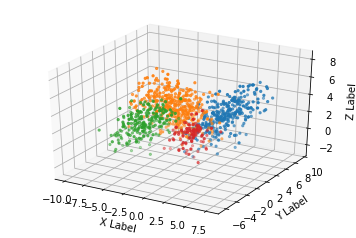

In [4]:
## Generate Samples of data and plot distribution
N = 1000 # number of samples
n = 3 # dimension
x1= np.zeros((N,3)); u1 = np.random.rand(1,N); L1  = np.zeros(N); 
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
m = ('o','^','+','s')
for l in np.arange(0,4):
    indices1 = np.where((u1>=thr[l]) & (u1<thr[l+1]))
    L1[indices1[1]] = l
    x1[indices1[1],:] = np.random.multivariate_normal(mu[:,l],Sigma[l,:,:],np.size(L1[indices1[1]]))
    ax.scatter(x1[indices1[1],0], x1[indices1[1],1], x1[indices1[1],2],marker = '.')
assert np.sum([np.size(np.where(L1==0)), np.size(np.where(L1==1)),np.size(np.where(L1==2)),np.size(np.where(L1==3))])==N,"not all samples classified"
ax.set_xlabel('X Label')
ax.set_ylabel('Y Label')
ax.set_zlabel('Z Label')

plt.show()

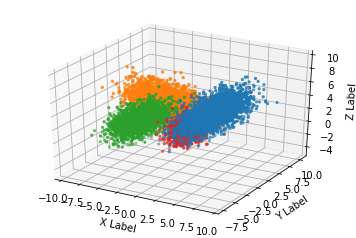

In [5]:
## Generate Samples of data and plot distribution
N = 10000 # number of samples
n = 3 # dimension
x= np.zeros((N,3))
u = np.random.rand(1,N); L  = np.zeros(N); 
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
m = ('o','^','+','s')
for l in np.arange(0,4):
    indices = np.where((u>=thr[l]) & (u<thr[l+1]))
    L[indices[1]] = l
    x[indices[1],:] = np.random.multivariate_normal(mu[:,l],Sigma[l,:,:],np.size(L[indices[1]]))
    ax.scatter(x[indices[1],0], x[indices[1],1], x[indices[1],2],marker = '.')
assert np.sum([np.size(np.where(L==0)), np.size(np.where(L==1)),np.size(np.where(L==2)),np.size(np.where(L==3))])==N,"not all samples classified"
ax.set_xlabel('X Label')
ax.set_ylabel('Y Label')
ax.set_zlabel('Z Label')

plt.show()


In [6]:
print('True Class Sizes')
print('Class 0: ' + str(np.where(L==0)[0].size) + ' prior = ' + str(q[0]))
print('class 1: ' + str(np.where(L==1)[0].size) + ' prior = ' + str(q[1]))
print('class 2: ' + str(np.where(L==2)[0].size) + ' prior = ' + str(q[2]))
print('class 3: ' + str(np.where(L==3)[0].size) + ' prior = ' + str(q[3]))

True Class Sizes
Class 0: 3145 prior = 0.3
class 1: 3971 prior = 0.4
class 2: 1887 prior = 0.2
class 3: 997 prior = 0.1


In [7]:
Decision  = np.zeros(N)
dist0 = multivariate_normal(mean=mu[:,0], cov=Sigma[0,:,:])
dist1 = multivariate_normal(mean=mu[:,1], cov=Sigma[1,:,:])
dist2 = multivariate_normal(mean=mu[:,2], cov=Sigma[2,:,:])
dist3 = multivariate_normal(mean=mu[:,3], cov=Sigma[3,:,:])
eval0 = dist0.pdf(x)*q[0]
eval1 = dist1.pdf(x)*q[1]
eval2 = dist2.pdf(x)*q[2]
eval3 = dist3.pdf(x)*q[3]
indices0 = np.where((eval0>eval1) & (eval0>eval2) & (eval0>eval3))
indices1 = np.where((eval1>eval0) & (eval1>eval2) & (eval1>eval3))
indices2 = np.where((eval2>eval0) & (eval2>eval1) & (eval2>eval3))
indices3 = np.where((eval3>eval0) & (eval3>eval1) & (eval3>eval2))
Decision[indices0[0]] = 0
Decision[indices1[0]] = 1
Decision[indices2[0]] = 2
Decision[indices3[0]] = 3
confusion_matrix(L, Decision, labels=[0, 1, 2, 3])

array([[2998,  119,    4,   24],
       [ 141, 3786,   43,    1],
       [   5,   49, 1827,    6],
       [  20,    1,    6,  970]])

In [8]:
# Do something fancy here to plot it all
theoretical =(10000-np.trace(confusion_matrix(L, Decision, labels=[0, 1, 2, 3])))/10000.0
print("theoretical maximum probability correct" + str(1-theoretical))
#ind00
#ind11
#ind22
#ind33
10000-np.trace(confusion_matrix(L, Decision, labels=[0, 1, 2, 3]))

theoretical maximum probability correct0.9581


419

In [9]:
## Generate Samples of NN training data and plot distribution
N = 100
x_test100 = np.zeros((N,3))
u_test100 = np.random.rand(1,N); Ltest_100  = np.zeros(N);
for l in np.arange(0,4):
    indicestest_100 = np.where((u_test100>=thr[l]) & (u_test100<thr[l+1]))
    Ltest_100[indicestest_100[1]] = l
    x_test100[indicestest_100[1],:] = np.random.multivariate_normal(mu[:,l],Sigma[l,:,:],np.size(Ltest_100[indicestest_100[1]]))
assert np.sum([np.size(np.where(Ltest_100==0)), np.size(np.where(Ltest_100==1)),np.size(np.where(Ltest_100==2)),np.size(np.where(Ltest_100==3))])==N,"not all samples classified"

N = 1000
x_test1000 = np.zeros((N,3))
u_test1000 = np.random.rand(1,N); Ltest_1000  = np.zeros(N);
for l in np.arange(0,4):
    indicestest_1000 = np.where((u_test1000>=thr[l]) & (u_test1000<thr[l+1]))
    Ltest_1000[indicestest_1000[1]] = l
    x_test1000[indicestest_1000[1],:] = np.random.multivariate_normal(mu[:,l],Sigma[l,:,:],np.size(Ltest_1000[indicestest_1000[1]]))
assert np.sum([np.size(np.where(Ltest_1000==0)), np.size(np.where(Ltest_1000==1)),np.size(np.where(Ltest_1000==2)),np.size(np.where(Ltest_1000==3))])==N,"not all samples classified"

N = 10000
x_test10000 = np.zeros((N,3))
u_test10000 = np.random.rand(1,N); Ltest_10000  = np.zeros(N);
for l in np.arange(0,4):
    indicestest_10000 = np.where((u_test10000>=thr[l]) & (u_test10000<thr[l+1]))
    Ltest_10000[indicestest_10000[1]] = l
    x_test10000[indicestest_10000[1],:] = np.random.multivariate_normal(mu[:,l],Sigma[l,:,:],np.size(Ltest_10000[indicestest_10000[1]]))
assert np.sum([np.size(np.where(Ltest_10000==0)), np.size(np.where(Ltest_10000==1)),np.size(np.where(Ltest_10000==2)),np.size(np.where(Ltest_10000==3))])==N,"not all samples classified"

In [10]:
import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation
from keras.optimizers import SGD
from sklearn.model_selection import KFold

Using TensorFlow backend.


In [11]:
#100 sample size training
accuracy = np.zeros((10,10))
x_data = x_test100
y_data = keras.utils.to_categorical(Ltest_100, num_classes=4) #keras.utils.to_categorical(np.random.randint(10, size=(1000, 1)), num_classes=10)
#x_test = np.random.random((100, 20))
#y_test = keras.utils.to_categorical(np.random.randint(10, size=(100, 1)), num_classes=10)
kf = KFold(n_splits=10)
j = 0
for train_index, test_index in kf.split(x_data):
    print("TRAIN:", train_index, "TEST:", test_index)
    x_train, x_test = x_data[train_index], x_data[test_index]
    y_train, y_test = y_data[train_index], y_data[test_index]
    for i in range(1,11):
        model = Sequential()
        # Dense(64) is a fully-connected layer with 64 hidden units.
        # in the first layer, you must specify the expected input data shape:
        # here, 3-dimensional vectors.
        model.add(Dense(i, activation='sigmoid', input_dim=3))
        model.add(Dense(4, activation='softmax'))
        sgd = SGD(lr=0.01, decay=1e-6, momentum=0.9, nesterov=True)
        model.compile(loss='categorical_crossentropy',
                    optimizer=sgd,
                    metrics=['accuracy'])
        converged = 0
        tmp = 0
        epsilon = 0.001
        while not converged:
            model.fit(x_train, y_train, batch_size=None, epochs=50)
            score = model.evaluate(x_test, y_test)
            converged = np.abs(score[1]-tmp)<epsilon
            tmp = score[1]
        accuracy[j,i-1] = score[1]
    j+=1

('TRAIN:', array([10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26,
       27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43,
       44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60,
       61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77,
       78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94,
       95, 96, 97, 98, 99]), 'TEST:', array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]))
Epoch 1/50
90/90 [==============================] - 0s 580us/step - loss: 1.5824 - accuracy: 0.4556
Epoch 2/50
90/90 [==============================] - 0s 53us/step - loss: 1.5630 - accuracy: 0.4556
Epoch 3/50
90/90 [==============================] - 0s 49us/step - loss: 1.5342 - accuracy: 0.4556
Epoch 4/50
90/90 [==============================] - 0s 66us/step - loss: 1.4990 - accuracy: 0.4556
Epoch 5/50
90/90 [==============================] - 0s 51us/step - loss: 1.4642 - accuracy: 0.4556
Epoch 6/50
90/90 [=======================

90/90 [==============================] - 0s 52us/step - loss: 0.9047 - accuracy: 0.6444
Epoch 28/50
90/90 [==============================] - 0s 45us/step - loss: 0.9031 - accuracy: 0.6444
Epoch 29/50
90/90 [==============================] - 0s 57us/step - loss: 0.9012 - accuracy: 0.6444
Epoch 30/50
90/90 [==============================] - 0s 46us/step - loss: 0.8996 - accuracy: 0.6444
Epoch 31/50
90/90 [==============================] - 0s 52us/step - loss: 0.8981 - accuracy: 0.6444
Epoch 32/50
90/90 [==============================] - 0s 47us/step - loss: 0.8967 - accuracy: 0.6444
Epoch 33/50
90/90 [==============================] - 0s 50us/step - loss: 0.8948 - accuracy: 0.6444
Epoch 34/50
90/90 [==============================] - 0s 42us/step - loss: 0.8934 - accuracy: 0.6444
Epoch 35/50
90/90 [==============================] - 0s 47us/step - loss: 0.8917 - accuracy: 0.6444
Epoch 36/50
90/90 [==============================] - 0s 50us/step - loss: 0.8902 - accuracy: 0.6444
Epoch 37/50


90/90 [==============================] - 0s 51us/step - loss: 1.1889 - accuracy: 0.5222
Epoch 9/50
90/90 [==============================] - 0s 51us/step - loss: 1.1756 - accuracy: 0.5222
Epoch 10/50
90/90 [==============================] - 0s 49us/step - loss: 1.1627 - accuracy: 0.5333
Epoch 11/50
90/90 [==============================] - 0s 53us/step - loss: 1.1496 - accuracy: 0.5333
Epoch 12/50
90/90 [==============================] - 0s 45us/step - loss: 1.1377 - accuracy: 0.5444
Epoch 13/50
90/90 [==============================] - 0s 48us/step - loss: 1.1240 - accuracy: 0.5556
Epoch 14/50
90/90 [==============================] - 0s 49us/step - loss: 1.1120 - accuracy: 0.5556
Epoch 15/50
90/90 [==============================] - 0s 53us/step - loss: 1.0993 - accuracy: 0.5556
Epoch 16/50
90/90 [==============================] - 0s 47us/step - loss: 1.0881 - accuracy: 0.5889
Epoch 17/50
90/90 [==============================] - 0s 48us/step - loss: 1.0762 - accuracy: 0.5889
Epoch 18/50
9

90/90 [==============================] - 0s 53us/step - loss: 0.7394 - accuracy: 0.6667
Epoch 40/50
90/90 [==============================] - 0s 53us/step - loss: 0.7375 - accuracy: 0.6667
Epoch 41/50
90/90 [==============================] - 0s 47us/step - loss: 0.7358 - accuracy: 0.6667
Epoch 42/50
90/90 [==============================] - 0s 48us/step - loss: 0.7343 - accuracy: 0.6667
Epoch 43/50
90/90 [==============================] - 0s 63us/step - loss: 0.7325 - accuracy: 0.6667
Epoch 44/50
90/90 [==============================] - 0s 48us/step - loss: 0.7302 - accuracy: 0.6667
Epoch 45/50
90/90 [==============================] - 0s 45us/step - loss: 0.7283 - accuracy: 0.6667
Epoch 46/50
90/90 [==============================] - 0s 51us/step - loss: 0.7266 - accuracy: 0.6667
Epoch 47/50
90/90 [==============================] - 0s 51us/step - loss: 0.7246 - accuracy: 0.6667
Epoch 48/50
90/90 [==============================] - 0s 47us/step - loss: 0.7232 - accuracy: 0.6667
Epoch 49/50


90/90 [==============================] - 0s 51us/step - loss: 0.5476 - accuracy: 0.8444
Epoch 21/50
90/90 [==============================] - 0s 46us/step - loss: 0.5429 - accuracy: 0.8444
Epoch 22/50
90/90 [==============================] - 0s 50us/step - loss: 0.5386 - accuracy: 0.8444
Epoch 23/50
90/90 [==============================] - 0s 53us/step - loss: 0.5345 - accuracy: 0.8444
Epoch 24/50
90/90 [==============================] - 0s 54us/step - loss: 0.5305 - accuracy: 0.8444
Epoch 25/50
90/90 [==============================] - 0s 46us/step - loss: 0.5261 - accuracy: 0.8444
Epoch 26/50
90/90 [==============================] - 0s 47us/step - loss: 0.5222 - accuracy: 0.8444
Epoch 27/50
90/90 [==============================] - 0s 54us/step - loss: 0.5185 - accuracy: 0.8444
Epoch 28/50
90/90 [==============================] - 0s 55us/step - loss: 0.5143 - accuracy: 0.8444
Epoch 29/50
90/90 [==============================] - 0s 56us/step - loss: 0.5105 - accuracy: 0.8444
Epoch 30/50


90/90 [==============================] - 0s 52us/step - loss: 0.5360 - accuracy: 0.8111
Epoch 2/50
90/90 [==============================] - 0s 48us/step - loss: 0.5297 - accuracy: 0.8111
Epoch 3/50
90/90 [==============================] - 0s 50us/step - loss: 0.5234 - accuracy: 0.8111
Epoch 4/50
90/90 [==============================] - 0s 50us/step - loss: 0.5175 - accuracy: 0.8111
Epoch 5/50
90/90 [==============================] - 0s 55us/step - loss: 0.5121 - accuracy: 0.8111
Epoch 6/50
90/90 [==============================] - 0s 47us/step - loss: 0.5062 - accuracy: 0.8111
Epoch 7/50
90/90 [==============================] - 0s 56us/step - loss: 0.5008 - accuracy: 0.8111
Epoch 8/50
90/90 [==============================] - 0s 51us/step - loss: 0.4954 - accuracy: 0.8111
Epoch 9/50
90/90 [==============================] - 0s 44us/step - loss: 0.4898 - accuracy: 0.8111
Epoch 10/50
90/90 [==============================] - 0s 59us/step - loss: 0.4847 - accuracy: 0.8111
Epoch 11/50
90/90 [=

90/90 [==============================] - 0s 52us/step - loss: 0.2956 - accuracy: 0.9111
Epoch 33/50
90/90 [==============================] - 0s 51us/step - loss: 0.2944 - accuracy: 0.9111
Epoch 34/50
90/90 [==============================] - 0s 61us/step - loss: 0.2930 - accuracy: 0.9111
Epoch 35/50
90/90 [==============================] - 0s 51us/step - loss: 0.2919 - accuracy: 0.9111
Epoch 36/50
90/90 [==============================] - 0s 64us/step - loss: 0.2908 - accuracy: 0.9111
Epoch 37/50
90/90 [==============================] - ETA: 0s - loss: 0.2547 - accuracy: 1.00 - 0s 50us/step - loss: 0.2894 - accuracy: 0.9111
Epoch 38/50
90/90 [==============================] - 0s 49us/step - loss: 0.2880 - accuracy: 0.9111
Epoch 39/50
90/90 [==============================] - 0s 56us/step - loss: 0.2871 - accuracy: 0.9111
Epoch 40/50
90/90 [==============================] - 0s 49us/step - loss: 0.2858 - accuracy: 0.9111
Epoch 41/50
90/90 [==============================] - 0s 53us/step - lo

90/90 [==============================] - 0s 54us/step - loss: 0.4936 - accuracy: 0.8667
Epoch 13/50
90/90 [==============================] - 0s 43us/step - loss: 0.4883 - accuracy: 0.8889
Epoch 14/50
90/90 [==============================] - 0s 49us/step - loss: 0.4834 - accuracy: 0.9000
Epoch 15/50
90/90 [==============================] - 0s 46us/step - loss: 0.4785 - accuracy: 0.9000
Epoch 16/50
90/90 [==============================] - 0s 50us/step - loss: 0.4735 - accuracy: 0.9000
Epoch 17/50
90/90 [==============================] - 0s 51us/step - loss: 0.4688 - accuracy: 0.9000
Epoch 18/50
90/90 [==============================] - 0s 50us/step - loss: 0.4642 - accuracy: 0.9000
Epoch 19/50
90/90 [==============================] - 0s 55us/step - loss: 0.4600 - accuracy: 0.9000
Epoch 20/50
90/90 [==============================] - 0s 55us/step - loss: 0.4559 - accuracy: 0.9000
Epoch 21/50
90/90 [==============================] - 0s 51us/step - loss: 0.4518 - accuracy: 0.9000
Epoch 22/50


90/90 [==============================] - 0s 49us/step - loss: 0.2960 - accuracy: 0.9333
Epoch 44/50
90/90 [==============================] - 0s 51us/step - loss: 0.2949 - accuracy: 0.9333
Epoch 45/50
90/90 [==============================] - 0s 49us/step - loss: 0.2936 - accuracy: 0.9333
Epoch 46/50
90/90 [==============================] - 0s 43us/step - loss: 0.2926 - accuracy: 0.9333
Epoch 47/50
90/90 [==============================] - 0s 46us/step - loss: 0.2912 - accuracy: 0.9333
Epoch 48/50
90/90 [==============================] - 0s 47us/step - loss: 0.2903 - accuracy: 0.9333
Epoch 49/50
90/90 [==============================] - 0s 48us/step - loss: 0.2892 - accuracy: 0.9333
Epoch 50/50
10/10 [==============================] - 0s 52us/step
Epoch 1/50
90/90 [==============================] - 0s 650us/step - loss: 1.3393 - accuracy: 0.3000
Epoch 2/50
90/90 [==============================] - 0s 67us/step - loss: 1.3116 - accuracy: 0.3444
Epoch 3/50
90/90 [=============================

90/90 [==============================] - 0s 45us/step - loss: 0.3696 - accuracy: 0.9000
Epoch 24/50
90/90 [==============================] - 0s 50us/step - loss: 0.3669 - accuracy: 0.9000
Epoch 25/50
90/90 [==============================] - 0s 51us/step - loss: 0.3634 - accuracy: 0.9000
Epoch 26/50
90/90 [==============================] - 0s 48us/step - loss: 0.3603 - accuracy: 0.9111
Epoch 27/50
90/90 [==============================] - 0s 43us/step - loss: 0.3573 - accuracy: 0.9111
Epoch 28/50
90/90 [==============================] - 0s 49us/step - loss: 0.3544 - accuracy: 0.9111
Epoch 29/50
90/90 [==============================] - 0s 43us/step - loss: 0.3517 - accuracy: 0.9111
Epoch 30/50
90/90 [==============================] - 0s 45us/step - loss: 0.3491 - accuracy: 0.9111
Epoch 31/50
90/90 [==============================] - 0s 50us/step - loss: 0.3463 - accuracy: 0.9111
Epoch 32/50
90/90 [==============================] - 0s 48us/step - loss: 0.3436 - accuracy: 0.9111
Epoch 33/50


90/90 [==============================] - 0s 59us/step - loss: 0.4340 - accuracy: 0.8444
Epoch 5/50
90/90 [==============================] - 0s 49us/step - loss: 0.4283 - accuracy: 0.8667
Epoch 6/50
90/90 [==============================] - 0s 56us/step - loss: 0.4236 - accuracy: 0.8667
Epoch 7/50
90/90 [==============================] - 0s 45us/step - loss: 0.4180 - accuracy: 0.8556
Epoch 8/50
90/90 [==============================] - 0s 55us/step - loss: 0.4135 - accuracy: 0.8889
Epoch 9/50
90/90 [==============================] - 0s 52us/step - loss: 0.4085 - accuracy: 0.8778
Epoch 10/50
90/90 [==============================] - 0s 46us/step - loss: 0.4039 - accuracy: 0.8778
Epoch 11/50
90/90 [==============================] - 0s 58us/step - loss: 0.3990 - accuracy: 0.8778
Epoch 12/50
90/90 [==============================] - 0s 51us/step - loss: 0.3944 - accuracy: 0.8778
Epoch 13/50
90/90 [==============================] - 0s 56us/step - loss: 0.3902 - accuracy: 0.8778
Epoch 14/50
90/90

90/90 [==============================] - 0s 48us/step - loss: 0.2381 - accuracy: 0.9333
Epoch 36/50
90/90 [==============================] - 0s 54us/step - loss: 0.2372 - accuracy: 0.9333
Epoch 37/50
90/90 [==============================] - 0s 54us/step - loss: 0.2361 - accuracy: 0.9333
Epoch 38/50
90/90 [==============================] - 0s 55us/step - loss: 0.2352 - accuracy: 0.9333
Epoch 39/50
90/90 [==============================] - 0s 47us/step - loss: 0.2342 - accuracy: 0.9333
Epoch 40/50
90/90 [==============================] - 0s 46us/step - loss: 0.2332 - accuracy: 0.9333
Epoch 41/50
90/90 [==============================] - 0s 53us/step - loss: 0.2322 - accuracy: 0.9333
Epoch 42/50
90/90 [==============================] - 0s 43us/step - loss: 0.2316 - accuracy: 0.9333
Epoch 43/50
90/90 [==============================] - 0s 49us/step - loss: 0.2304 - accuracy: 0.9333
Epoch 44/50
90/90 [==============================] - 0s 49us/step - loss: 0.2294 - accuracy: 0.9333
Epoch 45/50


90/90 [==============================] - 0s 46us/step - loss: 0.3549 - accuracy: 0.9000
Epoch 17/50
90/90 [==============================] - 0s 52us/step - loss: 0.3519 - accuracy: 0.9000
Epoch 18/50
90/90 [==============================] - 0s 53us/step - loss: 0.3484 - accuracy: 0.9000
Epoch 19/50
90/90 [==============================] - 0s 53us/step - loss: 0.3454 - accuracy: 0.9000
Epoch 20/50
90/90 [==============================] - 0s 58us/step - loss: 0.3426 - accuracy: 0.9000
Epoch 21/50
90/90 [==============================] - 0s 50us/step - loss: 0.3396 - accuracy: 0.9000
Epoch 22/50
90/90 [==============================] - 0s 47us/step - loss: 0.3367 - accuracy: 0.9111
Epoch 23/50
90/90 [==============================] - 0s 43us/step - loss: 0.3340 - accuracy: 0.9111
Epoch 24/50
90/90 [==============================] - 0s 47us/step - loss: 0.3311 - accuracy: 0.9111
Epoch 25/50
90/90 [==============================] - 0s 50us/step - loss: 0.3286 - accuracy: 0.9222
Epoch 26/50


90/90 [==============================] - 0s 49us/step - loss: 0.3988 - accuracy: 0.9333
Epoch 48/50
90/90 [==============================] - 0s 58us/step - loss: 0.3928 - accuracy: 0.9333
Epoch 49/50
90/90 [==============================] - 0s 54us/step - loss: 0.3870 - accuracy: 0.9333
Epoch 50/50
10/10 [==============================] - 0s 2ms/step
Epoch 1/50
90/90 [==============================] - 0s 55us/step - loss: 0.3763 - accuracy: 0.9333
Epoch 2/50
90/90 [==============================] - 0s 49us/step - loss: 0.3714 - accuracy: 0.9222
Epoch 3/50
90/90 [==============================] - 0s 49us/step - loss: 0.3667 - accuracy: 0.9222
Epoch 4/50
90/90 [==============================] - 0s 52us/step - loss: 0.3618 - accuracy: 0.9222
Epoch 5/50
90/90 [==============================] - 0s 47us/step - loss: 0.3571 - accuracy: 0.9222
Epoch 6/50
90/90 [==============================] - 0s 45us/step - loss: 0.3531 - accuracy: 0.9222
Epoch 7/50
90/90 [==============================] - 0

90/90 [==============================] - 0s 55us/step - loss: 0.6268 - accuracy: 0.8111
Epoch 29/50
90/90 [==============================] - 0s 55us/step - loss: 0.6129 - accuracy: 0.8111
Epoch 30/50
90/90 [==============================] - 0s 54us/step - loss: 0.5995 - accuracy: 0.8111
Epoch 31/50
90/90 [==============================] - 0s 51us/step - loss: 0.5863 - accuracy: 0.8333
Epoch 32/50
90/90 [==============================] - 0s 59us/step - loss: 0.5736 - accuracy: 0.8444
Epoch 33/50
90/90 [==============================] - 0s 55us/step - loss: 0.5618 - accuracy: 0.8556
Epoch 34/50
90/90 [==============================] - 0s 52us/step - loss: 0.5504 - accuracy: 0.8667
Epoch 35/50
90/90 [==============================] - 0s 54us/step - loss: 0.5385 - accuracy: 0.8778
Epoch 36/50
90/90 [==============================] - 0s 49us/step - loss: 0.5281 - accuracy: 0.8778
Epoch 37/50
90/90 [==============================] - 0s 60us/step - loss: 0.5178 - accuracy: 0.8889
Epoch 38/50


90/90 [==============================] - 0s 50us/step - loss: 1.4921 - accuracy: 0.0667
Epoch 5/50
90/90 [==============================] - 0s 50us/step - loss: 1.4436 - accuracy: 0.0556
Epoch 6/50
90/90 [==============================] - 0s 55us/step - loss: 1.4009 - accuracy: 0.2889
Epoch 7/50
90/90 [==============================] - 0s 48us/step - loss: 1.3571 - accuracy: 0.4444
Epoch 8/50
90/90 [==============================] - 0s 54us/step - loss: 1.3273 - accuracy: 0.4444
Epoch 9/50
90/90 [==============================] - 0s 51us/step - loss: 1.3043 - accuracy: 0.4444
Epoch 10/50
90/90 [==============================] - 0s 58us/step - loss: 1.2850 - accuracy: 0.4444
Epoch 11/50
90/90 [==============================] - 0s 53us/step - loss: 1.2675 - accuracy: 0.4444
Epoch 12/50
90/90 [==============================] - 0s 47us/step - loss: 1.2554 - accuracy: 0.4444
Epoch 13/50
90/90 [==============================] - 0s 57us/step - loss: 1.2476 - accuracy: 0.4444
Epoch 14/50
90/90

90/90 [==============================] - 0s 49us/step - loss: 0.9570 - accuracy: 0.6333
Epoch 36/50
90/90 [==============================] - 0s 51us/step - loss: 0.9545 - accuracy: 0.6333
Epoch 37/50
90/90 [==============================] - 0s 55us/step - loss: 0.9520 - accuracy: 0.6333
Epoch 38/50
90/90 [==============================] - 0s 46us/step - loss: 0.9491 - accuracy: 0.6333
Epoch 39/50
90/90 [==============================] - 0s 45us/step - loss: 0.9467 - accuracy: 0.6333
Epoch 40/50
90/90 [==============================] - 0s 46us/step - loss: 0.9443 - accuracy: 0.6333
Epoch 41/50
90/90 [==============================] - 0s 43us/step - loss: 0.9418 - accuracy: 0.6333
Epoch 42/50
90/90 [==============================] - 0s 43us/step - loss: 0.9394 - accuracy: 0.6333
Epoch 43/50
90/90 [==============================] - 0s 51us/step - loss: 0.9372 - accuracy: 0.6333
Epoch 44/50
90/90 [==============================] - 0s 52us/step - loss: 0.9354 - accuracy: 0.6333
Epoch 45/50


90/90 [==============================] - 0s 51us/step - loss: 1.1496 - accuracy: 0.5000
Epoch 17/50
90/90 [==============================] - 0s 50us/step - loss: 1.1419 - accuracy: 0.5000
Epoch 18/50
90/90 [==============================] - 0s 48us/step - loss: 1.1335 - accuracy: 0.5000
Epoch 19/50
90/90 [==============================] - 0s 48us/step - loss: 1.1257 - accuracy: 0.5000
Epoch 20/50
90/90 [==============================] - 0s 44us/step - loss: 1.1177 - accuracy: 0.5000
Epoch 21/50
90/90 [==============================] - 0s 51us/step - loss: 1.1099 - accuracy: 0.5111
Epoch 22/50
90/90 [==============================] - 0s 45us/step - loss: 1.1028 - accuracy: 0.5444
Epoch 23/50
90/90 [==============================] - 0s 54us/step - loss: 1.0949 - accuracy: 0.5667
Epoch 24/50
90/90 [==============================] - 0s 51us/step - loss: 1.0875 - accuracy: 0.6000
Epoch 25/50
90/90 [==============================] - 0s 52us/step - loss: 1.0807 - accuracy: 0.6333
Epoch 26/50


90/90 [==============================] - 0s 57us/step - loss: 0.6328 - accuracy: 0.8222
Epoch 48/50
90/90 [==============================] - 0s 50us/step - loss: 0.6289 - accuracy: 0.8222
Epoch 49/50
90/90 [==============================] - 0s 49us/step - loss: 0.6251 - accuracy: 0.8222
Epoch 50/50
10/10 [==============================] - 0s 56us/step
Epoch 1/50
90/90 [==============================] - 0s 59us/step - loss: 0.6178 - accuracy: 0.8111
Epoch 2/50
90/90 [==============================] - 0s 45us/step - loss: 0.6141 - accuracy: 0.8111
Epoch 3/50
90/90 [==============================] - 0s 49us/step - loss: 0.6105 - accuracy: 0.8111
Epoch 4/50
90/90 [==============================] - 0s 56us/step - loss: 0.6069 - accuracy: 0.8111
Epoch 5/50
90/90 [==============================] - 0s 59us/step - loss: 0.6032 - accuracy: 0.8111
Epoch 6/50
90/90 [==============================] - 0s 51us/step - loss: 0.5999 - accuracy: 0.8111
Epoch 7/50
90/90 [==============================] - 

90/90 [==============================] - 0s 49us/step - loss: 0.8012 - accuracy: 0.6667
Epoch 29/50
90/90 [==============================] - 0s 46us/step - loss: 0.7918 - accuracy: 0.7000
Epoch 30/50
90/90 [==============================] - 0s 50us/step - loss: 0.7829 - accuracy: 0.7333
Epoch 31/50
90/90 [==============================] - 0s 50us/step - loss: 0.7743 - accuracy: 0.7667
Epoch 32/50
90/90 [==============================] - 0s 49us/step - loss: 0.7658 - accuracy: 0.7667
Epoch 33/50
90/90 [==============================] - 0s 50us/step - loss: 0.7577 - accuracy: 0.7667
Epoch 34/50
90/90 [==============================] - 0s 48us/step - loss: 0.7501 - accuracy: 0.7778
Epoch 35/50
90/90 [==============================] - 0s 45us/step - loss: 0.7419 - accuracy: 0.7889
Epoch 36/50
90/90 [==============================] - 0s 51us/step - loss: 0.7345 - accuracy: 0.7889
Epoch 37/50
90/90 [==============================] - 0s 44us/step - loss: 0.7272 - accuracy: 0.8000
Epoch 38/50


90/90 [==============================] - 0s 44us/step - loss: 0.4410 - accuracy: 0.8444
Epoch 10/50
90/90 [==============================] - 0s 50us/step - loss: 0.4388 - accuracy: 0.8444
Epoch 11/50
90/90 [==============================] - 0s 51us/step - loss: 0.4365 - accuracy: 0.8444
Epoch 12/50
90/90 [==============================] - 0s 48us/step - loss: 0.4343 - accuracy: 0.8444
Epoch 13/50
90/90 [==============================] - 0s 51us/step - loss: 0.4319 - accuracy: 0.8444
Epoch 14/50
90/90 [==============================] - 0s 48us/step - loss: 0.4298 - accuracy: 0.8444
Epoch 15/50
90/90 [==============================] - 0s 48us/step - loss: 0.4274 - accuracy: 0.8444
Epoch 16/50
90/90 [==============================] - 0s 51us/step - loss: 0.4253 - accuracy: 0.8444
Epoch 17/50
90/90 [==============================] - 0s 46us/step - loss: 0.4231 - accuracy: 0.8444
Epoch 18/50
90/90 [==============================] - 0s 51us/step - loss: 0.4211 - accuracy: 0.8444
Epoch 19/50


90/90 [==============================] - 0s 48us/step - loss: 0.7545 - accuracy: 0.7556
Epoch 41/50
90/90 [==============================] - 0s 52us/step - loss: 0.7472 - accuracy: 0.7556
Epoch 42/50
90/90 [==============================] - 0s 56us/step - loss: 0.7402 - accuracy: 0.7556
Epoch 43/50
90/90 [==============================] - 0s 51us/step - loss: 0.7332 - accuracy: 0.7556
Epoch 44/50
90/90 [==============================] - 0s 51us/step - loss: 0.7263 - accuracy: 0.7556
Epoch 45/50
90/90 [==============================] - 0s 46us/step - loss: 0.7196 - accuracy: 0.7667
Epoch 46/50
90/90 [==============================] - 0s 47us/step - loss: 0.7131 - accuracy: 0.7667
Epoch 47/50
90/90 [==============================] - 0s 48us/step - loss: 0.7066 - accuracy: 0.7778
Epoch 48/50
90/90 [==============================] - 0s 45us/step - loss: 0.7002 - accuracy: 0.7889
Epoch 49/50
90/90 [==============================] - 0s 47us/step - loss: 0.6937 - accuracy: 0.7889
Epoch 50/50


90/90 [==============================] - 0s 48us/step - loss: 0.3978 - accuracy: 0.9111
Epoch 21/50
90/90 [==============================] - 0s 43us/step - loss: 0.3954 - accuracy: 0.9111
Epoch 22/50
90/90 [==============================] - 0s 51us/step - loss: 0.3928 - accuracy: 0.9111
Epoch 23/50
90/90 [==============================] - 0s 52us/step - loss: 0.3906 - accuracy: 0.9111
Epoch 24/50
90/90 [==============================] - 0s 44us/step - loss: 0.3883 - accuracy: 0.9111
Epoch 25/50
90/90 [==============================] - 0s 45us/step - loss: 0.3860 - accuracy: 0.9222
Epoch 26/50
90/90 [==============================] - 0s 52us/step - loss: 0.3835 - accuracy: 0.9222
Epoch 27/50
90/90 [==============================] - 0s 47us/step - loss: 0.3813 - accuracy: 0.9222
Epoch 28/50
90/90 [==============================] - 0s 45us/step - loss: 0.3791 - accuracy: 0.9222
Epoch 29/50
90/90 [==============================] - 0s 52us/step - loss: 0.3769 - accuracy: 0.9222
Epoch 30/50


90/90 [==============================] - 0s 45us/step - loss: 0.2752 - accuracy: 0.9444
Epoch 2/50
90/90 [==============================] - 0s 45us/step - loss: 0.2738 - accuracy: 0.9444
Epoch 3/50
90/90 [==============================] - 0s 52us/step - loss: 0.2732 - accuracy: 0.9444
Epoch 4/50
90/90 [==============================] - 0s 49us/step - loss: 0.2719 - accuracy: 0.9444
Epoch 5/50
90/90 [==============================] - 0s 48us/step - loss: 0.2710 - accuracy: 0.9444
Epoch 6/50
90/90 [==============================] - 0s 44us/step - loss: 0.2703 - accuracy: 0.9444
Epoch 7/50
90/90 [==============================] - 0s 47us/step - loss: 0.2694 - accuracy: 0.9444
Epoch 8/50
90/90 [==============================] - 0s 44us/step - loss: 0.2684 - accuracy: 0.9444
Epoch 9/50
90/90 [==============================] - 0s 47us/step - loss: 0.2675 - accuracy: 0.9444
Epoch 10/50
90/90 [==============================] - 0s 43us/step - loss: 0.2667 - accuracy: 0.9444
Epoch 11/50
90/90 [=

90/90 [==============================] - 0s 48us/step - loss: 0.7623 - accuracy: 0.6778
Epoch 33/50
90/90 [==============================] - 0s 54us/step - loss: 0.7536 - accuracy: 0.6889
Epoch 34/50
90/90 [==============================] - 0s 57us/step - loss: 0.7446 - accuracy: 0.6889
Epoch 35/50
90/90 [==============================] - 0s 51us/step - loss: 0.7360 - accuracy: 0.7111
Epoch 36/50
90/90 [==============================] - 0s 51us/step - loss: 0.7274 - accuracy: 0.7111
Epoch 37/50
90/90 [==============================] - 0s 46us/step - loss: 0.7190 - accuracy: 0.7333
Epoch 38/50
90/90 [==============================] - 0s 45us/step - loss: 0.7110 - accuracy: 0.7556
Epoch 39/50
90/90 [==============================] - 0s 42us/step - loss: 0.7029 - accuracy: 0.7667
Epoch 40/50
90/90 [==============================] - 0s 44us/step - loss: 0.6958 - accuracy: 0.7667
Epoch 41/50
90/90 [==============================] - 0s 45us/step - loss: 0.6875 - accuracy: 0.7778
Epoch 42/50


90/90 [==============================] - 0s 49us/step - loss: 0.3592 - accuracy: 0.8444
Epoch 14/50
90/90 [==============================] - 0s 46us/step - loss: 0.3568 - accuracy: 0.8444
Epoch 15/50
90/90 [==============================] - 0s 51us/step - loss: 0.3545 - accuracy: 0.8444
Epoch 16/50
90/90 [==============================] - 0s 45us/step - loss: 0.3523 - accuracy: 0.8444
Epoch 17/50
90/90 [==============================] - 0s 49us/step - loss: 0.3497 - accuracy: 0.8556
Epoch 18/50
90/90 [==============================] - 0s 54us/step - loss: 0.3477 - accuracy: 0.8556
Epoch 19/50
90/90 [==============================] - 0s 58us/step - loss: 0.3455 - accuracy: 0.8556
Epoch 20/50
90/90 [==============================] - 0s 44us/step - loss: 0.3432 - accuracy: 0.8667
Epoch 21/50
90/90 [==============================] - 0s 50us/step - loss: 0.3416 - accuracy: 0.8667
Epoch 22/50
90/90 [==============================] - 0s 50us/step - loss: 0.3393 - accuracy: 0.8667
Epoch 23/50


90/90 [==============================] - 0s 62us/step - loss: 0.2449 - accuracy: 0.9333
Epoch 45/50
90/90 [==============================] - 0s 48us/step - loss: 0.2441 - accuracy: 0.9333
Epoch 46/50
90/90 [==============================] - 0s 52us/step - loss: 0.2433 - accuracy: 0.9333
Epoch 47/50
90/90 [==============================] - 0s 48us/step - loss: 0.2425 - accuracy: 0.9333
Epoch 48/50
90/90 [==============================] - 0s 48us/step - loss: 0.2419 - accuracy: 0.9333
Epoch 49/50
90/90 [==============================] - 0s 45us/step - loss: 0.2412 - accuracy: 0.9333
Epoch 50/50
10/10 [==============================] - 0s 53us/step
Epoch 1/50
90/90 [==============================] - 0s 559us/step - loss: 1.5389 - accuracy: 0.3000
Epoch 2/50
90/90 [==============================] - 0s 59us/step - loss: 1.5149 - accuracy: 0.3222
Epoch 3/50
90/90 [==============================] - 0s 55us/step - loss: 1.4799 - accuracy: 0.3444
Epoch 4/50
90/90 [==============================

90/90 [==============================] - 0s 53us/step - loss: 0.3701 - accuracy: 0.9333
Epoch 26/50
90/90 [==============================] - 0s 52us/step - loss: 0.3660 - accuracy: 0.9333
Epoch 27/50
90/90 [==============================] - 0s 51us/step - loss: 0.3618 - accuracy: 0.9333
Epoch 28/50
90/90 [==============================] - 0s 54us/step - loss: 0.3582 - accuracy: 0.9333
Epoch 29/50
90/90 [==============================] - 0s 52us/step - loss: 0.3544 - accuracy: 0.9333
Epoch 30/50
90/90 [==============================] - 0s 48us/step - loss: 0.3506 - accuracy: 0.9333
Epoch 31/50
90/90 [==============================] - 0s 56us/step - loss: 0.3471 - accuracy: 0.9222
Epoch 32/50
90/90 [==============================] - 0s 53us/step - loss: 0.3435 - accuracy: 0.9222
Epoch 33/50
90/90 [==============================] - 0s 52us/step - loss: 0.3401 - accuracy: 0.9222
Epoch 34/50
90/90 [==============================] - 0s 48us/step - loss: 0.3368 - accuracy: 0.9222
Epoch 35/50


90/90 [==============================] - 0s 47us/step - loss: 1.2405 - accuracy: 0.3000
Epoch 7/50
90/90 [==============================] - 0s 59us/step - loss: 1.2045 - accuracy: 0.3444
Epoch 8/50
90/90 [==============================] - 0s 51us/step - loss: 1.1651 - accuracy: 0.3889
Epoch 9/50
90/90 [==============================] - 0s 62us/step - loss: 1.1331 - accuracy: 0.4333
Epoch 10/50
90/90 [==============================] - 0s 51us/step - loss: 1.0963 - accuracy: 0.4889
Epoch 11/50
90/90 [==============================] - 0s 51us/step - loss: 1.0637 - accuracy: 0.5333
Epoch 12/50
90/90 [==============================] - 0s 51us/step - loss: 1.0304 - accuracy: 0.5778
Epoch 13/50
90/90 [==============================] - 0s 46us/step - loss: 0.9976 - accuracy: 0.5778
Epoch 14/50
90/90 [==============================] - 0s 56us/step - loss: 0.9665 - accuracy: 0.5778
Epoch 15/50
90/90 [==============================] - 0s 52us/step - loss: 0.9366 - accuracy: 0.5889
Epoch 16/50
90/

90/90 [==============================] - 0s 57us/step - loss: 0.3075 - accuracy: 0.9111
Epoch 38/50
90/90 [==============================] - 0s 48us/step - loss: 0.3054 - accuracy: 0.9111
Epoch 39/50
90/90 [==============================] - 0s 61us/step - loss: 0.3030 - accuracy: 0.9111
Epoch 40/50
90/90 [==============================] - 0s 57us/step - loss: 0.3010 - accuracy: 0.9111
Epoch 41/50
90/90 [==============================] - 0s 49us/step - loss: 0.2990 - accuracy: 0.9111
Epoch 42/50
90/90 [==============================] - 0s 48us/step - loss: 0.2969 - accuracy: 0.9111
Epoch 43/50
90/90 [==============================] - 0s 52us/step - loss: 0.2952 - accuracy: 0.9111
Epoch 44/50
90/90 [==============================] - 0s 48us/step - loss: 0.2934 - accuracy: 0.9111
Epoch 45/50
90/90 [==============================] - 0s 54us/step - loss: 0.2913 - accuracy: 0.9111
Epoch 46/50
90/90 [==============================] - 0s 60us/step - loss: 0.2895 - accuracy: 0.9111
Epoch 47/50


90/90 [==============================] - 0s 52us/step - loss: 0.3368 - accuracy: 0.9222
Epoch 19/50
90/90 [==============================] - 0s 47us/step - loss: 0.3337 - accuracy: 0.9222
Epoch 20/50
90/90 [==============================] - 0s 47us/step - loss: 0.3305 - accuracy: 0.9222
Epoch 21/50
90/90 [==============================] - 0s 50us/step - loss: 0.3277 - accuracy: 0.9222
Epoch 22/50
90/90 [==============================] - 0s 57us/step - loss: 0.3244 - accuracy: 0.9222
Epoch 23/50
90/90 [==============================] - 0s 45us/step - loss: 0.3212 - accuracy: 0.9222
Epoch 24/50
90/90 [==============================] - 0s 47us/step - loss: 0.3185 - accuracy: 0.9222
Epoch 25/50
90/90 [==============================] - 0s 44us/step - loss: 0.3154 - accuracy: 0.9222
Epoch 26/50
90/90 [==============================] - 0s 46us/step - loss: 0.3128 - accuracy: 0.9222
Epoch 27/50
90/90 [==============================] - 0s 41us/step - loss: 0.3102 - accuracy: 0.9222
Epoch 28/50


90/90 [==============================] - 0s 54us/step - loss: 0.2179 - accuracy: 0.9333
Epoch 50/50
10/10 [==============================] - 0s 55us/step
Epoch 1/50
90/90 [==============================] - 0s 716us/step - loss: 1.2466 - accuracy: 0.4556
Epoch 2/50
90/90 [==============================] - 0s 46us/step - loss: 1.2108 - accuracy: 0.4889
Epoch 3/50
90/90 [==============================] - 0s 59us/step - loss: 1.1593 - accuracy: 0.5556
Epoch 4/50
90/90 [==============================] - 0s 52us/step - loss: 1.1047 - accuracy: 0.6444
Epoch 5/50
90/90 [==============================] - 0s 53us/step - loss: 1.0556 - accuracy: 0.6778
Epoch 6/50
90/90 [==============================] - 0s 55us/step - loss: 1.0072 - accuracy: 0.6556
Epoch 7/50
90/90 [==============================] - 0s 47us/step - loss: 0.9701 - accuracy: 0.6444
Epoch 8/50
90/90 [==============================] - 0s 57us/step - loss: 0.9336 - accuracy: 0.6111
Epoch 9/50
90/90 [==============================] - 0

90/90 [==============================] - 0s 51us/step - loss: 0.3010 - accuracy: 0.9111
Epoch 30/50
90/90 [==============================] - 0s 51us/step - loss: 0.2988 - accuracy: 0.9111
Epoch 31/50
90/90 [==============================] - 0s 51us/step - loss: 0.2966 - accuracy: 0.9111
Epoch 32/50
90/90 [==============================] - 0s 51us/step - loss: 0.2942 - accuracy: 0.9111
Epoch 33/50
90/90 [==============================] - 0s 43us/step - loss: 0.2922 - accuracy: 0.9111
Epoch 34/50
90/90 [==============================] - 0s 47us/step - loss: 0.2905 - accuracy: 0.9111
Epoch 35/50
90/90 [==============================] - 0s 46us/step - loss: 0.2885 - accuracy: 0.9111
Epoch 36/50
90/90 [==============================] - 0s 48us/step - loss: 0.2865 - accuracy: 0.9111
Epoch 37/50
90/90 [==============================] - 0s 46us/step - loss: 0.2843 - accuracy: 0.9111
Epoch 38/50
90/90 [==============================] - 0s 49us/step - loss: 0.2823 - accuracy: 0.9111
Epoch 39/50


90/90 [==============================] - 0s 52us/step - loss: 0.9583 - accuracy: 0.5222
Epoch 11/50
90/90 [==============================] - 0s 59us/step - loss: 0.9269 - accuracy: 0.6000
Epoch 12/50
90/90 [==============================] - 0s 61us/step - loss: 0.8946 - accuracy: 0.6556
Epoch 13/50
90/90 [==============================] - 0s 52us/step - loss: 0.8655 - accuracy: 0.7444
Epoch 14/50
90/90 [==============================] - 0s 48us/step - loss: 0.8367 - accuracy: 0.8000
Epoch 15/50
90/90 [==============================] - 0s 48us/step - loss: 0.8126 - accuracy: 0.8000
Epoch 16/50
90/90 [==============================] - 0s 54us/step - loss: 0.7870 - accuracy: 0.8000
Epoch 17/50
90/90 [==============================] - 0s 49us/step - loss: 0.7633 - accuracy: 0.8333
Epoch 18/50
90/90 [==============================] - 0s 52us/step - loss: 0.7413 - accuracy: 0.8333
Epoch 19/50
90/90 [==============================] - 0s 55us/step - loss: 0.7202 - accuracy: 0.8333
Epoch 20/50


90/90 [==============================] - 0s 60us/step - loss: 0.2529 - accuracy: 0.9333
Epoch 42/50
90/90 [==============================] - 0s 49us/step - loss: 0.2515 - accuracy: 0.9333
Epoch 43/50
90/90 [==============================] - 0s 59us/step - loss: 0.2500 - accuracy: 0.9333
Epoch 44/50
90/90 [==============================] - ETA: 0s - loss: 0.2154 - accuracy: 0.96 - 0s 51us/step - loss: 0.2486 - accuracy: 0.9333
Epoch 45/50
90/90 [==============================] - 0s 55us/step - loss: 0.2470 - accuracy: 0.9333
Epoch 46/50
90/90 [==============================] - 0s 50us/step - loss: 0.2455 - accuracy: 0.9333
Epoch 47/50
90/90 [==============================] - 0s 54us/step - loss: 0.2442 - accuracy: 0.9333
Epoch 48/50
90/90 [==============================] - 0s 51us/step - loss: 0.2430 - accuracy: 0.9333
Epoch 49/50
90/90 [==============================] - 0s 51us/step - loss: 0.2415 - accuracy: 0.9333
Epoch 50/50
10/10 [==============================] - 0s 67us/step
('TR

90/90 [==============================] - 0s 49us/step - loss: 0.9381 - accuracy: 0.6333
Epoch 17/50
90/90 [==============================] - 0s 53us/step - loss: 0.9347 - accuracy: 0.6444
Epoch 18/50
90/90 [==============================] - 0s 58us/step - loss: 0.9314 - accuracy: 0.6444
Epoch 19/50
90/90 [==============================] - 0s 52us/step - loss: 0.9287 - accuracy: 0.6444
Epoch 20/50
90/90 [==============================] - 0s 54us/step - loss: 0.9253 - accuracy: 0.6444
Epoch 21/50
90/90 [==============================] - 0s 51us/step - loss: 0.9223 - accuracy: 0.6444
Epoch 22/50
90/90 [==============================] - 0s 51us/step - loss: 0.9196 - accuracy: 0.6444
Epoch 23/50
90/90 [==============================] - 0s 52us/step - loss: 0.9169 - accuracy: 0.6444
Epoch 24/50
90/90 [==============================] - 0s 47us/step - loss: 0.9139 - accuracy: 0.6444
Epoch 25/50
90/90 [==============================] - 0s 51us/step - loss: 0.9113 - accuracy: 0.6444
Epoch 26/50


90/90 [==============================] - 0s 60us/step - loss: 0.8082 - accuracy: 0.7667
Epoch 48/50
90/90 [==============================] - 0s 43us/step - loss: 0.7992 - accuracy: 0.7778
Epoch 49/50
90/90 [==============================] - 0s 59us/step - loss: 0.7905 - accuracy: 0.7667
Epoch 50/50
10/10 [==============================] - 0s 2ms/step
Epoch 1/50
90/90 [==============================] - 0s 56us/step - loss: 0.7735 - accuracy: 0.7889
Epoch 2/50
90/90 [==============================] - 0s 57us/step - loss: 0.7656 - accuracy: 0.8000
Epoch 3/50
90/90 [==============================] - 0s 50us/step - loss: 0.7576 - accuracy: 0.8111
Epoch 4/50
90/90 [==============================] - 0s 51us/step - loss: 0.7495 - accuracy: 0.8111
Epoch 5/50
90/90 [==============================] - 0s 47us/step - loss: 0.7419 - accuracy: 0.8111
Epoch 6/50
90/90 [==============================] - 0s 50us/step - loss: 0.7347 - accuracy: 0.8111
Epoch 7/50
90/90 [==============================] - 0

90/90 [==============================] - 0s 54us/step - loss: 0.4497 - accuracy: 0.8556
Epoch 28/50
90/90 [==============================] - 0s 48us/step - loss: 0.4472 - accuracy: 0.8556
Epoch 29/50
90/90 [==============================] - 0s 50us/step - loss: 0.4456 - accuracy: 0.8556
Epoch 30/50
90/90 [==============================] - 0s 58us/step - loss: 0.4430 - accuracy: 0.8556
Epoch 31/50
90/90 [==============================] - 0s 54us/step - loss: 0.4409 - accuracy: 0.8556
Epoch 32/50
90/90 [==============================] - 0s 47us/step - loss: 0.4388 - accuracy: 0.8556
Epoch 33/50
90/90 [==============================] - 0s 47us/step - loss: 0.4368 - accuracy: 0.8556
Epoch 34/50
90/90 [==============================] - 0s 48us/step - loss: 0.4349 - accuracy: 0.8556
Epoch 35/50
90/90 [==============================] - 0s 47us/step - loss: 0.4329 - accuracy: 0.8556
Epoch 36/50
90/90 [==============================] - 0s 55us/step - loss: 0.4309 - accuracy: 0.8556
Epoch 37/50


90/90 [==============================] - 0s 56us/step - loss: 0.6204 - accuracy: 0.8333
Epoch 9/50
90/90 [==============================] - 0s 50us/step - loss: 0.6145 - accuracy: 0.8333
Epoch 10/50
90/90 [==============================] - 0s 53us/step - loss: 0.6084 - accuracy: 0.8333
Epoch 11/50
90/90 [==============================] - 0s 51us/step - loss: 0.6026 - accuracy: 0.8333
Epoch 12/50
90/90 [==============================] - 0s 71us/step - loss: 0.5971 - accuracy: 0.8333
Epoch 13/50
90/90 [==============================] - 0s 57us/step - loss: 0.5916 - accuracy: 0.8333
Epoch 14/50
90/90 [==============================] - 0s 60us/step - loss: 0.5866 - accuracy: 0.8444
Epoch 15/50
90/90 [==============================] - 0s 56us/step - loss: 0.5811 - accuracy: 0.8444
Epoch 16/50
90/90 [==============================] - 0s 57us/step - loss: 0.5758 - accuracy: 0.8444
Epoch 17/50
90/90 [==============================] - 0s 47us/step - loss: 0.5709 - accuracy: 0.8444
Epoch 18/50
9

90/90 [==============================] - 0s 52us/step - loss: 0.3716 - accuracy: 0.8556
Epoch 40/50
90/90 [==============================] - 0s 49us/step - loss: 0.3697 - accuracy: 0.8556
Epoch 41/50
90/90 [==============================] - 0s 52us/step - loss: 0.3681 - accuracy: 0.8556
Epoch 42/50
90/90 [==============================] - 0s 62us/step - loss: 0.3666 - accuracy: 0.8556
Epoch 43/50
90/90 [==============================] - 0s 56us/step - loss: 0.3652 - accuracy: 0.8556
Epoch 44/50
90/90 [==============================] - 0s 54us/step - loss: 0.3635 - accuracy: 0.8556
Epoch 45/50
90/90 [==============================] - 0s 55us/step - loss: 0.3620 - accuracy: 0.8556
Epoch 46/50
90/90 [==============================] - 0s 60us/step - loss: 0.3609 - accuracy: 0.8556
Epoch 47/50
90/90 [==============================] - 0s 66us/step - loss: 0.3591 - accuracy: 0.8556
Epoch 48/50
90/90 [==============================] - 0s 50us/step - loss: 0.3578 - accuracy: 0.8556
Epoch 49/50


90/90 [==============================] - 0s 51us/step - loss: 0.2830 - accuracy: 0.9111
Epoch 21/50
90/90 [==============================] - 0s 58us/step - loss: 0.2823 - accuracy: 0.9111
Epoch 22/50
90/90 [==============================] - 0s 49us/step - loss: 0.2816 - accuracy: 0.9111
Epoch 23/50
90/90 [==============================] - 0s 56us/step - loss: 0.2810 - accuracy: 0.9111
Epoch 24/50
90/90 [==============================] - 0s 56us/step - loss: 0.2801 - accuracy: 0.9111
Epoch 25/50
90/90 [==============================] - 0s 63us/step - loss: 0.2795 - accuracy: 0.9111
Epoch 26/50
90/90 [==============================] - 0s 52us/step - loss: 0.2787 - accuracy: 0.9111
Epoch 27/50
90/90 [==============================] - 0s 59us/step - loss: 0.2780 - accuracy: 0.9111
Epoch 28/50
90/90 [==============================] - 0s 49us/step - loss: 0.2772 - accuracy: 0.9000
Epoch 29/50
90/90 [==============================] - 0s 58us/step - loss: 0.2765 - accuracy: 0.9000
Epoch 30/50


90/90 [==============================] - 0s 55us/step - loss: 0.7846 - accuracy: 0.6667
Epoch 2/50
90/90 [==============================] - 0s 52us/step - loss: 0.7785 - accuracy: 0.6778
Epoch 3/50
90/90 [==============================] - 0s 52us/step - loss: 0.7727 - accuracy: 0.6778
Epoch 4/50
90/90 [==============================] - 0s 43us/step - loss: 0.7677 - accuracy: 0.6778
Epoch 5/50
90/90 [==============================] - 0s 50us/step - loss: 0.7620 - accuracy: 0.6778
Epoch 6/50
90/90 [==============================] - 0s 51us/step - loss: 0.7571 - accuracy: 0.6889
Epoch 7/50
90/90 [==============================] - 0s 49us/step - loss: 0.7513 - accuracy: 0.6889
Epoch 8/50
90/90 [==============================] - 0s 49us/step - loss: 0.7460 - accuracy: 0.6889
Epoch 9/50
90/90 [==============================] - 0s 51us/step - loss: 0.7408 - accuracy: 0.6889
Epoch 10/50
90/90 [==============================] - 0s 53us/step - loss: 0.7354 - accuracy: 0.6889
Epoch 11/50
90/90 [=

90/90 [==============================] - 0s 54us/step - loss: 0.3779 - accuracy: 0.8778
Epoch 33/50
90/90 [==============================] - 0s 47us/step - loss: 0.3753 - accuracy: 0.8889
Epoch 34/50
90/90 [==============================] - 0s 60us/step - loss: 0.3727 - accuracy: 0.8889
Epoch 35/50
90/90 [==============================] - 0s 51us/step - loss: 0.3702 - accuracy: 0.8889
Epoch 36/50
90/90 [==============================] - 0s 51us/step - loss: 0.3679 - accuracy: 0.8889
Epoch 37/50
90/90 [==============================] - 0s 54us/step - loss: 0.3653 - accuracy: 0.8889
Epoch 38/50
90/90 [==============================] - 0s 48us/step - loss: 0.3629 - accuracy: 0.8889
Epoch 39/50
90/90 [==============================] - 0s 49us/step - loss: 0.3606 - accuracy: 0.9000
Epoch 40/50
90/90 [==============================] - 0s 54us/step - loss: 0.3582 - accuracy: 0.9111
Epoch 41/50
90/90 [==============================] - 0s 56us/step - loss: 0.3560 - accuracy: 0.9111
Epoch 42/50


90/90 [==============================] - 0s 49us/step - loss: 0.2549 - accuracy: 0.9111
Epoch 14/50
90/90 [==============================] - 0s 51us/step - loss: 0.2544 - accuracy: 0.9111
Epoch 15/50
90/90 [==============================] - 0s 48us/step - loss: 0.2535 - accuracy: 0.9111
Epoch 16/50
90/90 [==============================] - 0s 52us/step - loss: 0.2524 - accuracy: 0.9111
Epoch 17/50
90/90 [==============================] - 0s 50us/step - loss: 0.2520 - accuracy: 0.9111
Epoch 18/50
90/90 [==============================] - 0s 47us/step - loss: 0.2507 - accuracy: 0.9111
Epoch 19/50
90/90 [==============================] - 0s 44us/step - loss: 0.2500 - accuracy: 0.9111
Epoch 20/50
90/90 [==============================] - 0s 51us/step - loss: 0.2490 - accuracy: 0.9111
Epoch 21/50
90/90 [==============================] - 0s 49us/step - loss: 0.2482 - accuracy: 0.9111
Epoch 22/50
90/90 [==============================] - 0s 55us/step - loss: 0.2474 - accuracy: 0.9111
Epoch 23/50


90/90 [==============================] - 0s 49us/step - loss: 0.7077 - accuracy: 0.8333
Epoch 45/50
90/90 [==============================] - 0s 52us/step - loss: 0.6998 - accuracy: 0.8333
Epoch 46/50
90/90 [==============================] - 0s 51us/step - loss: 0.6916 - accuracy: 0.8333
Epoch 47/50
90/90 [==============================] - 0s 46us/step - loss: 0.6835 - accuracy: 0.8222
Epoch 48/50
90/90 [==============================] - 0s 46us/step - loss: 0.6759 - accuracy: 0.8222
Epoch 49/50
90/90 [==============================] - 0s 53us/step - loss: 0.6680 - accuracy: 0.8222
Epoch 50/50
10/10 [==============================] - 0s 2ms/step
Epoch 1/50
90/90 [==============================] - 0s 58us/step - loss: 0.6536 - accuracy: 0.8222
Epoch 2/50
90/90 [==============================] - 0s 47us/step - loss: 0.6464 - accuracy: 0.8222
Epoch 3/50
90/90 [==============================] - 0s 46us/step - loss: 0.6397 - accuracy: 0.8333
Epoch 4/50
90/90 [==============================] 

90/90 [==============================] - 0s 54us/step - loss: 0.7300 - accuracy: 0.6889
Epoch 26/50
90/90 [==============================] - 0s 54us/step - loss: 0.7142 - accuracy: 0.7000
Epoch 27/50
90/90 [==============================] - 0s 54us/step - loss: 0.6995 - accuracy: 0.7222
Epoch 28/50
90/90 [==============================] - 0s 51us/step - loss: 0.6845 - accuracy: 0.7556
Epoch 29/50
90/90 [==============================] - 0s 47us/step - loss: 0.6702 - accuracy: 0.7778
Epoch 30/50
90/90 [==============================] - 0s 50us/step - loss: 0.6566 - accuracy: 0.8000
Epoch 31/50
90/90 [==============================] - 0s 47us/step - loss: 0.6427 - accuracy: 0.8111
Epoch 32/50
90/90 [==============================] - 0s 50us/step - loss: 0.6297 - accuracy: 0.8111
Epoch 33/50
90/90 [==============================] - 0s 52us/step - loss: 0.6173 - accuracy: 0.8444
Epoch 34/50
90/90 [==============================] - 0s 47us/step - loss: 0.6052 - accuracy: 0.8444
Epoch 35/50


90/90 [==============================] - 0s 49us/step - loss: 0.2890 - accuracy: 0.9111
Epoch 6/50
90/90 [==============================] - 0s 48us/step - loss: 0.2873 - accuracy: 0.9111
Epoch 7/50
90/90 [==============================] - 0s 47us/step - loss: 0.2860 - accuracy: 0.9111
Epoch 8/50
90/90 [==============================] - 0s 46us/step - loss: 0.2843 - accuracy: 0.9111
Epoch 9/50
90/90 [==============================] - 0s 50us/step - loss: 0.2830 - accuracy: 0.9111
Epoch 10/50
90/90 [==============================] - 0s 44us/step - loss: 0.2812 - accuracy: 0.9111
Epoch 11/50
90/90 [==============================] - 0s 44us/step - loss: 0.2798 - accuracy: 0.9111
Epoch 12/50
90/90 [==============================] - 0s 51us/step - loss: 0.2786 - accuracy: 0.9111
Epoch 13/50
90/90 [==============================] - 0s 49us/step - loss: 0.2770 - accuracy: 0.9111
Epoch 14/50
90/90 [==============================] - 0s 46us/step - loss: 0.2755 - accuracy: 0.9111
Epoch 15/50
90/9

90/90 [==============================] - 0s 54us/step - loss: 0.5877 - accuracy: 0.8222
Epoch 37/50
90/90 [==============================] - 0s 58us/step - loss: 0.5787 - accuracy: 0.8222
Epoch 38/50
90/90 [==============================] - 0s 57us/step - loss: 0.5694 - accuracy: 0.8333
Epoch 39/50
90/90 [==============================] - 0s 49us/step - loss: 0.5603 - accuracy: 0.8333
Epoch 40/50
90/90 [==============================] - 0s 46us/step - loss: 0.5518 - accuracy: 0.8333
Epoch 41/50
90/90 [==============================] - 0s 46us/step - loss: 0.5436 - accuracy: 0.8333
Epoch 42/50
90/90 [==============================] - 0s 51us/step - loss: 0.5360 - accuracy: 0.8333
Epoch 43/50
90/90 [==============================] - 0s 46us/step - loss: 0.5282 - accuracy: 0.8444
Epoch 44/50
90/90 [==============================] - 0s 50us/step - loss: 0.5205 - accuracy: 0.8444
Epoch 45/50
90/90 [==============================] - 0s 57us/step - loss: 0.5127 - accuracy: 0.8444
Epoch 46/50


90/90 [==============================] - 0s 50us/step - loss: 0.2645 - accuracy: 0.9111
Epoch 18/50
90/90 [==============================] - 0s 52us/step - loss: 0.2632 - accuracy: 0.9111
Epoch 19/50
90/90 [==============================] - 0s 48us/step - loss: 0.2617 - accuracy: 0.9111
Epoch 20/50
90/90 [==============================] - 0s 45us/step - loss: 0.2602 - accuracy: 0.9111
Epoch 21/50
90/90 [==============================] - 0s 50us/step - loss: 0.2591 - accuracy: 0.9111
Epoch 22/50
90/90 [==============================] - 0s 51us/step - loss: 0.2575 - accuracy: 0.9111
Epoch 23/50
90/90 [==============================] - 0s 49us/step - loss: 0.2562 - accuracy: 0.9111
Epoch 24/50
90/90 [==============================] - 0s 50us/step - loss: 0.2549 - accuracy: 0.9222
Epoch 25/50
90/90 [==============================] - 0s 54us/step - loss: 0.2537 - accuracy: 0.9222
Epoch 26/50
90/90 [==============================] - 0s 48us/step - loss: 0.2525 - accuracy: 0.9222
Epoch 27/50


90/90 [==============================] - 0s 50us/step - loss: 0.1968 - accuracy: 0.9222
Epoch 49/50
90/90 [==============================] - 0s 48us/step - loss: 0.1961 - accuracy: 0.9222
Epoch 50/50
10/10 [==============================] - 0s 47us/step
Epoch 1/50
90/90 [==============================] - 0s 53us/step - loss: 0.1957 - accuracy: 0.9222
Epoch 2/50
90/90 [==============================] - 0s 47us/step - loss: 0.1946 - accuracy: 0.9222
Epoch 3/50
90/90 [==============================] - 0s 47us/step - loss: 0.1944 - accuracy: 0.9222
Epoch 4/50
90/90 [==============================] - 0s 53us/step - loss: 0.1936 - accuracy: 0.9222
Epoch 5/50
90/90 [==============================] - 0s 58us/step - loss: 0.1932 - accuracy: 0.9222
Epoch 6/50
90/90 [==============================] - 0s 48us/step - loss: 0.1929 - accuracy: 0.9222
Epoch 7/50
90/90 [==============================] - 0s 46us/step - loss: 0.1922 - accuracy: 0.9222
Epoch 8/50
90/90 [==============================] - 0

90/90 [==============================] - 0s 54us/step - loss: 0.5616 - accuracy: 0.8222
Epoch 30/50
90/90 [==============================] - 0s 50us/step - loss: 0.5504 - accuracy: 0.8222
Epoch 31/50
90/90 [==============================] - 0s 49us/step - loss: 0.5395 - accuracy: 0.8333
Epoch 32/50
90/90 [==============================] - 0s 51us/step - loss: 0.5297 - accuracy: 0.8333
Epoch 33/50
90/90 [==============================] - 0s 51us/step - loss: 0.5197 - accuracy: 0.8333
Epoch 34/50
90/90 [==============================] - 0s 50us/step - loss: 0.5100 - accuracy: 0.8333
Epoch 35/50
90/90 [==============================] - 0s 48us/step - loss: 0.5006 - accuracy: 0.8333
Epoch 36/50
90/90 [==============================] - 0s 50us/step - loss: 0.4916 - accuracy: 0.8444
Epoch 37/50
90/90 [==============================] - 0s 49us/step - loss: 0.4833 - accuracy: 0.8444
Epoch 38/50
90/90 [==============================] - 0s 50us/step - loss: 0.4751 - accuracy: 0.8444
Epoch 39/50


90/90 [==============================] - 0s 49us/step - loss: 0.2478 - accuracy: 0.9111
Epoch 10/50
90/90 [==============================] - 0s 50us/step - loss: 0.2464 - accuracy: 0.9111
Epoch 11/50
90/90 [==============================] - 0s 47us/step - loss: 0.2453 - accuracy: 0.9111
Epoch 12/50
90/90 [==============================] - 0s 52us/step - loss: 0.2442 - accuracy: 0.9111
Epoch 13/50
90/90 [==============================] - 0s 52us/step - loss: 0.2429 - accuracy: 0.9111
Epoch 14/50
90/90 [==============================] - 0s 46us/step - loss: 0.2419 - accuracy: 0.9111
Epoch 15/50
90/90 [==============================] - 0s 49us/step - loss: 0.2409 - accuracy: 0.9111
Epoch 16/50
90/90 [==============================] - 0s 49us/step - loss: 0.2397 - accuracy: 0.9111
Epoch 17/50
90/90 [==============================] - 0s 53us/step - loss: 0.2387 - accuracy: 0.9111
Epoch 18/50
90/90 [==============================] - 0s 59us/step - loss: 0.2376 - accuracy: 0.9111
Epoch 19/50


90/90 [==============================] - 0s 61us/step - loss: 0.4643 - accuracy: 0.8111
Epoch 41/50
90/90 [==============================] - 0s 49us/step - loss: 0.4557 - accuracy: 0.8222
Epoch 42/50
90/90 [==============================] - 0s 51us/step - loss: 0.4485 - accuracy: 0.8333
Epoch 43/50
90/90 [==============================] - 0s 51us/step - loss: 0.4410 - accuracy: 0.8333
Epoch 44/50
90/90 [==============================] - 0s 50us/step - loss: 0.4333 - accuracy: 0.8444
Epoch 45/50
90/90 [==============================] - 0s 51us/step - loss: 0.4264 - accuracy: 0.8444
Epoch 46/50
90/90 [==============================] - 0s 46us/step - loss: 0.4199 - accuracy: 0.8444
Epoch 47/50
90/90 [==============================] - 0s 53us/step - loss: 0.4135 - accuracy: 0.8444
Epoch 48/50
90/90 [==============================] - 0s 53us/step - loss: 0.4070 - accuracy: 0.8556
Epoch 49/50
90/90 [==============================] - 0s 50us/step - loss: 0.4011 - accuracy: 0.8667
Epoch 50/50


90/90 [==============================] - 0s 48us/step - loss: 0.2311 - accuracy: 0.9222
Epoch 21/50
90/90 [==============================] - 0s 46us/step - loss: 0.2303 - accuracy: 0.9222
Epoch 22/50
90/90 [==============================] - 0s 53us/step - loss: 0.2296 - accuracy: 0.9222
Epoch 23/50
90/90 [==============================] - 0s 49us/step - loss: 0.2287 - accuracy: 0.9222
Epoch 24/50
90/90 [==============================] - 0s 50us/step - loss: 0.2276 - accuracy: 0.9222
Epoch 25/50
90/90 [==============================] - 0s 49us/step - loss: 0.2267 - accuracy: 0.9222
Epoch 26/50
90/90 [==============================] - 0s 50us/step - loss: 0.2259 - accuracy: 0.9222
Epoch 27/50
90/90 [==============================] - 0s 55us/step - loss: 0.2250 - accuracy: 0.9222
Epoch 28/50
90/90 [==============================] - 0s 46us/step - loss: 0.2243 - accuracy: 0.9222
Epoch 29/50
90/90 [==============================] - 0s 47us/step - loss: 0.2235 - accuracy: 0.9222
Epoch 30/50


Epoch 1/50
90/90 [==============================] - 0s 61us/step - loss: 0.3524 - accuracy: 0.9111
Epoch 2/50
90/90 [==============================] - 0s 56us/step - loss: 0.3483 - accuracy: 0.9111
Epoch 3/50
90/90 [==============================] - 0s 55us/step - loss: 0.3434 - accuracy: 0.9111
Epoch 4/50
90/90 [==============================] - 0s 50us/step - loss: 0.3393 - accuracy: 0.9111
Epoch 5/50
90/90 [==============================] - 0s 49us/step - loss: 0.3355 - accuracy: 0.9111
Epoch 6/50
90/90 [==============================] - 0s 52us/step - loss: 0.3314 - accuracy: 0.9111
Epoch 7/50
90/90 [==============================] - 0s 45us/step - loss: 0.3277 - accuracy: 0.9111
Epoch 8/50
90/90 [==============================] - 0s 50us/step - loss: 0.3240 - accuracy: 0.9111
Epoch 9/50
90/90 [==============================] - 0s 50us/step - loss: 0.3205 - accuracy: 0.9111
Epoch 10/50
90/90 [==============================] - 0s 50us/step - loss: 0.3172 - accuracy: 0.9111
Epoch 11/

90/90 [==============================] - 0s 49us/step - loss: 1.1108 - accuracy: 0.4778
Epoch 28/50
90/90 [==============================] - 0s 53us/step - loss: 1.1064 - accuracy: 0.4778
Epoch 29/50
90/90 [==============================] - 0s 53us/step - loss: 1.1017 - accuracy: 0.4778
Epoch 30/50
90/90 [==============================] - 0s 48us/step - loss: 1.0974 - accuracy: 0.4778
Epoch 31/50
90/90 [==============================] - 0s 50us/step - loss: 1.0931 - accuracy: 0.4778
Epoch 32/50
90/90 [==============================] - 0s 48us/step - loss: 1.0881 - accuracy: 0.4778
Epoch 33/50
90/90 [==============================] - 0s 47us/step - loss: 1.0837 - accuracy: 0.4778
Epoch 34/50
90/90 [==============================] - 0s 55us/step - loss: 1.0794 - accuracy: 0.4778
Epoch 35/50
90/90 [==============================] - 0s 45us/step - loss: 1.0748 - accuracy: 0.4778
Epoch 36/50
90/90 [==============================] - 0s 48us/step - loss: 1.0706 - accuracy: 0.4778
Epoch 37/50


90/90 [==============================] - 0s 53us/step - loss: 0.8531 - accuracy: 0.6778
Epoch 9/50
90/90 [==============================] - 0s 50us/step - loss: 0.8514 - accuracy: 0.6778
Epoch 10/50
90/90 [==============================] - 0s 49us/step - loss: 0.8496 - accuracy: 0.6778
Epoch 11/50
90/90 [==============================] - 0s 50us/step - loss: 0.8482 - accuracy: 0.6778
Epoch 12/50
90/90 [==============================] - 0s 52us/step - loss: 0.8470 - accuracy: 0.6778
Epoch 13/50
90/90 [==============================] - 0s 49us/step - loss: 0.8457 - accuracy: 0.6778
Epoch 14/50
90/90 [==============================] - 0s 52us/step - loss: 0.8438 - accuracy: 0.6778
Epoch 15/50
90/90 [==============================] - 0s 49us/step - loss: 0.8423 - accuracy: 0.6778
Epoch 16/50
90/90 [==============================] - 0s 51us/step - loss: 0.8410 - accuracy: 0.6778
Epoch 17/50
90/90 [==============================] - 0s 47us/step - loss: 0.8394 - accuracy: 0.6778
Epoch 18/50
9

90/90 [==============================] - 0s 46us/step - loss: 0.8730 - accuracy: 0.6667
Epoch 40/50
90/90 [==============================] - 0s 53us/step - loss: 0.8682 - accuracy: 0.6667
Epoch 41/50
90/90 [==============================] - 0s 54us/step - loss: 0.8640 - accuracy: 0.6667
Epoch 42/50
90/90 [==============================] - 0s 54us/step - loss: 0.8598 - accuracy: 0.6667
Epoch 43/50
90/90 [==============================] - 0s 46us/step - loss: 0.8557 - accuracy: 0.6667
Epoch 44/50
90/90 [==============================] - 0s 47us/step - loss: 0.8513 - accuracy: 0.6667
Epoch 45/50
90/90 [==============================] - 0s 48us/step - loss: 0.8475 - accuracy: 0.6667
Epoch 46/50
90/90 [==============================] - 0s 53us/step - loss: 0.8437 - accuracy: 0.6667
Epoch 47/50
90/90 [==============================] - 0s 52us/step - loss: 0.8401 - accuracy: 0.6667
Epoch 48/50
90/90 [==============================] - 0s 50us/step - loss: 0.8369 - accuracy: 0.6667
Epoch 49/50


90/90 [==============================] - 0s 53us/step - loss: 0.8561 - accuracy: 0.8111
Epoch 21/50
90/90 [==============================] - 0s 51us/step - loss: 0.8448 - accuracy: 0.8111
Epoch 22/50
90/90 [==============================] - 0s 54us/step - loss: 0.8343 - accuracy: 0.8111
Epoch 23/50
90/90 [==============================] - 0s 53us/step - loss: 0.8232 - accuracy: 0.8111
Epoch 24/50
90/90 [==============================] - 0s 47us/step - loss: 0.8129 - accuracy: 0.8222
Epoch 25/50
90/90 [==============================] - 0s 50us/step - loss: 0.8027 - accuracy: 0.8333
Epoch 26/50
90/90 [==============================] - 0s 51us/step - loss: 0.7929 - accuracy: 0.8222
Epoch 27/50
90/90 [==============================] - 0s 48us/step - loss: 0.7834 - accuracy: 0.8222
Epoch 28/50
90/90 [==============================] - 0s 49us/step - loss: 0.7745 - accuracy: 0.8222
Epoch 29/50
90/90 [==============================] - 0s 49us/step - loss: 0.7649 - accuracy: 0.8222
Epoch 30/50


90/90 [==============================] - 0s 53us/step - loss: 0.4073 - accuracy: 0.8444
Epoch 2/50
90/90 [==============================] - 0s 52us/step - loss: 0.4047 - accuracy: 0.8444
Epoch 3/50
90/90 [==============================] - 0s 65us/step - loss: 0.4022 - accuracy: 0.8444
Epoch 4/50
90/90 [==============================] - 0s 60us/step - loss: 0.4000 - accuracy: 0.8444
Epoch 5/50
90/90 [==============================] - 0s 48us/step - loss: 0.3978 - accuracy: 0.8444
Epoch 6/50
90/90 [==============================] - 0s 50us/step - loss: 0.3951 - accuracy: 0.8444
Epoch 7/50
90/90 [==============================] - 0s 43us/step - loss: 0.3930 - accuracy: 0.8444
Epoch 8/50
90/90 [==============================] - 0s 47us/step - loss: 0.3907 - accuracy: 0.8444
Epoch 9/50
90/90 [==============================] - 0s 47us/step - loss: 0.3887 - accuracy: 0.8444
Epoch 10/50
90/90 [==============================] - 0s 45us/step - loss: 0.3863 - accuracy: 0.8556
Epoch 11/50
90/90 [=

90/90 [==============================] - 0s 48us/step - loss: 0.2862 - accuracy: 0.9000
Epoch 33/50
90/90 [==============================] - 0s 49us/step - loss: 0.2851 - accuracy: 0.9111
Epoch 34/50
90/90 [==============================] - 0s 52us/step - loss: 0.2845 - accuracy: 0.9000
Epoch 35/50
90/90 [==============================] - 0s 46us/step - loss: 0.2834 - accuracy: 0.9111
Epoch 36/50
90/90 [==============================] - 0s 51us/step - loss: 0.2825 - accuracy: 0.9111
Epoch 37/50
90/90 [==============================] - 0s 53us/step - loss: 0.2817 - accuracy: 0.9111
Epoch 38/50
90/90 [==============================] - 0s 49us/step - loss: 0.2809 - accuracy: 0.9111
Epoch 39/50
90/90 [==============================] - 0s 48us/step - loss: 0.2799 - accuracy: 0.9111
Epoch 40/50
90/90 [==============================] - 0s 45us/step - loss: 0.2793 - accuracy: 0.9111
Epoch 41/50
90/90 [==============================] - 0s 49us/step - loss: 0.2785 - accuracy: 0.9111
Epoch 42/50


90/90 [==============================] - 0s 49us/step - loss: 0.5605 - accuracy: 0.8556
Epoch 14/50
90/90 [==============================] - 0s 49us/step - loss: 0.5551 - accuracy: 0.8556
Epoch 15/50
90/90 [==============================] - 0s 57us/step - loss: 0.5497 - accuracy: 0.8556
Epoch 16/50
90/90 [==============================] - 0s 45us/step - loss: 0.5440 - accuracy: 0.8556
Epoch 17/50
90/90 [==============================] - 0s 44us/step - loss: 0.5384 - accuracy: 0.8556
Epoch 18/50
90/90 [==============================] - 0s 49us/step - loss: 0.5336 - accuracy: 0.8556
Epoch 19/50
90/90 [==============================] - 0s 48us/step - loss: 0.5284 - accuracy: 0.8556
Epoch 20/50
90/90 [==============================] - 0s 45us/step - loss: 0.5231 - accuracy: 0.8556
Epoch 21/50
90/90 [==============================] - 0s 47us/step - loss: 0.5181 - accuracy: 0.8556
Epoch 22/50
90/90 [==============================] - 0s 46us/step - loss: 0.5135 - accuracy: 0.8556
Epoch 23/50


90/90 [==============================] - 0s 50us/step - loss: 0.3180 - accuracy: 0.8556
Epoch 45/50
90/90 [==============================] - 0s 43us/step - loss: 0.3164 - accuracy: 0.8556
Epoch 46/50
90/90 [==============================] - 0s 50us/step - loss: 0.3149 - accuracy: 0.8667
Epoch 47/50
90/90 [==============================] - 0s 47us/step - loss: 0.3133 - accuracy: 0.8667
Epoch 48/50
90/90 [==============================] - 0s 53us/step - loss: 0.3118 - accuracy: 0.8667
Epoch 49/50
90/90 [==============================] - 0s 48us/step - loss: 0.3107 - accuracy: 0.8778
Epoch 50/50
10/10 [==============================] - 0s 54us/step
Epoch 1/50
90/90 [==============================] - 0s 45us/step - loss: 0.3074 - accuracy: 0.8778
Epoch 2/50
90/90 [==============================] - 0s 52us/step - loss: 0.3061 - accuracy: 0.8778
Epoch 3/50
90/90 [==============================] - 0s 53us/step - loss: 0.3045 - accuracy: 0.8778
Epoch 4/50
90/90 [==============================]

90/90 [==============================] - 0s 53us/step - loss: 0.2342 - accuracy: 0.9000
Epoch 25/50
90/90 [==============================] - 0s 47us/step - loss: 0.2334 - accuracy: 0.9000
Epoch 26/50
90/90 [==============================] - 0s 52us/step - loss: 0.2331 - accuracy: 0.9000
Epoch 27/50
90/90 [==============================] - 0s 44us/step - loss: 0.2321 - accuracy: 0.9000
Epoch 28/50
90/90 [==============================] - 0s 49us/step - loss: 0.2316 - accuracy: 0.9000
Epoch 29/50
90/90 [==============================] - 0s 46us/step - loss: 0.2311 - accuracy: 0.9000
Epoch 30/50
90/90 [==============================] - 0s 46us/step - loss: 0.2302 - accuracy: 0.9000
Epoch 31/50
90/90 [==============================] - 0s 49us/step - loss: 0.2295 - accuracy: 0.9000
Epoch 32/50
90/90 [==============================] - 0s 51us/step - loss: 0.2289 - accuracy: 0.9000
Epoch 33/50
90/90 [==============================] - 0s 54us/step - loss: 0.2283 - accuracy: 0.9000
Epoch 34/50


90/90 [==============================] - 0s 44us/step - loss: 0.4648 - accuracy: 0.8333
Epoch 6/50
90/90 [==============================] - 0s 46us/step - loss: 0.4596 - accuracy: 0.8333
Epoch 7/50
90/90 [==============================] - 0s 52us/step - loss: 0.4541 - accuracy: 0.8333
Epoch 8/50
90/90 [==============================] - 0s 51us/step - loss: 0.4492 - accuracy: 0.8333
Epoch 9/50
90/90 [==============================] - 0s 56us/step - loss: 0.4442 - accuracy: 0.8333
Epoch 10/50
90/90 [==============================] - 0s 59us/step - loss: 0.4396 - accuracy: 0.8222
Epoch 11/50
90/90 [==============================] - 0s 50us/step - loss: 0.4348 - accuracy: 0.8222
Epoch 12/50
90/90 [==============================] - 0s 51us/step - loss: 0.4304 - accuracy: 0.8222
Epoch 13/50
90/90 [==============================] - 0s 52us/step - loss: 0.4259 - accuracy: 0.8222
Epoch 14/50
90/90 [==============================] - 0s 48us/step - loss: 0.4215 - accuracy: 0.8222
Epoch 15/50
90/9

90/90 [==============================] - 0s 48us/step - loss: 0.2676 - accuracy: 0.9000
Epoch 37/50
90/90 [==============================] - 0s 48us/step - loss: 0.2667 - accuracy: 0.9000
Epoch 38/50
90/90 [==============================] - 0s 55us/step - loss: 0.2653 - accuracy: 0.9000
Epoch 39/50
90/90 [==============================] - 0s 50us/step - loss: 0.2646 - accuracy: 0.9000
Epoch 40/50
90/90 [==============================] - 0s 52us/step - loss: 0.2633 - accuracy: 0.9000
Epoch 41/50
90/90 [==============================] - 0s 45us/step - loss: 0.2624 - accuracy: 0.9000
Epoch 42/50
90/90 [==============================] - 0s 43us/step - loss: 0.2612 - accuracy: 0.9000
Epoch 43/50
90/90 [==============================] - 0s 51us/step - loss: 0.2602 - accuracy: 0.9000
Epoch 44/50
90/90 [==============================] - 0s 55us/step - loss: 0.2594 - accuracy: 0.9000
Epoch 45/50
90/90 [==============================] - 0s 47us/step - loss: 0.2582 - accuracy: 0.9000
Epoch 46/50


90/90 [==============================] - 0s 52us/step - loss: 0.3684 - accuracy: 0.8667
Epoch 18/50
90/90 [==============================] - 0s 44us/step - loss: 0.3655 - accuracy: 0.8667
Epoch 19/50
90/90 [==============================] - 0s 49us/step - loss: 0.3619 - accuracy: 0.8667
Epoch 20/50
90/90 [==============================] - 0s 60us/step - loss: 0.3587 - accuracy: 0.8667
Epoch 21/50
90/90 [==============================] - 0s 46us/step - loss: 0.3559 - accuracy: 0.8667
Epoch 22/50
90/90 [==============================] - 0s 45us/step - loss: 0.3525 - accuracy: 0.8778
Epoch 23/50
90/90 [==============================] - 0s 44us/step - loss: 0.3497 - accuracy: 0.8889
Epoch 24/50
90/90 [==============================] - 0s 47us/step - loss: 0.3468 - accuracy: 0.8889
Epoch 25/50
90/90 [==============================] - 0s 44us/step - loss: 0.3438 - accuracy: 0.8889
Epoch 26/50
90/90 [==============================] - 0s 48us/step - loss: 0.3411 - accuracy: 0.8889
Epoch 27/50


90/90 [==============================] - 0s 55us/step - loss: 0.2318 - accuracy: 0.9333
Epoch 49/50
90/90 [==============================] - 0s 56us/step - loss: 0.2311 - accuracy: 0.9333
Epoch 50/50
10/10 [==============================] - 0s 60us/step
Epoch 1/50
90/90 [==============================] - 0s 581us/step - loss: 1.4187 - accuracy: 0.4778
Epoch 2/50
90/90 [==============================] - 0s 61us/step - loss: 1.3872 - accuracy: 0.4778
Epoch 3/50
90/90 [==============================] - 0s 53us/step - loss: 1.3423 - accuracy: 0.4778
Epoch 4/50
90/90 [==============================] - 0s 59us/step - loss: 1.2879 - accuracy: 0.4778
Epoch 5/50
90/90 [==============================] - 0s 49us/step - loss: 1.2304 - accuracy: 0.4778
Epoch 6/50
90/90 [==============================] - 0s 53us/step - loss: 1.1795 - accuracy: 0.4778
Epoch 7/50
90/90 [==============================] - 0s 54us/step - loss: 1.1275 - accuracy: 0.4778
Epoch 8/50
90/90 [==============================] - 

90/90 [==============================] - 0s 49us/step - loss: 0.3240 - accuracy: 0.8556
Epoch 29/50
90/90 [==============================] - 0s 49us/step - loss: 0.3214 - accuracy: 0.8556
Epoch 30/50
90/90 [==============================] - 0s 52us/step - loss: 0.3189 - accuracy: 0.8556
Epoch 31/50
90/90 [==============================] - 0s 58us/step - loss: 0.3168 - accuracy: 0.8556
Epoch 32/50
90/90 [==============================] - 0s 48us/step - loss: 0.3141 - accuracy: 0.8556
Epoch 33/50
90/90 [==============================] - 0s 49us/step - loss: 0.3119 - accuracy: 0.8556
Epoch 34/50
90/90 [==============================] - ETA: 0s - loss: 0.2816 - accuracy: 0.90 - 0s 46us/step - loss: 0.3094 - accuracy: 0.8667
Epoch 35/50
90/90 [==============================] - 0s 49us/step - loss: 0.3075 - accuracy: 0.8667
Epoch 36/50
90/90 [==============================] - 0s 49us/step - loss: 0.3051 - accuracy: 0.8778
Epoch 37/50
90/90 [==============================] - 0s 48us/step - lo

90/90 [==============================] - 0s 52us/step - loss: 0.9867 - accuracy: 0.4889
Epoch 8/50
90/90 [==============================] - 0s 57us/step - loss: 0.9472 - accuracy: 0.4889
Epoch 9/50
90/90 [==============================] - 0s 54us/step - loss: 0.9082 - accuracy: 0.4889
Epoch 10/50
90/90 [==============================] - 0s 57us/step - loss: 0.8758 - accuracy: 0.5000
Epoch 11/50
90/90 [==============================] - 0s 61us/step - loss: 0.8452 - accuracy: 0.5222
Epoch 12/50
90/90 [==============================] - 0s 49us/step - loss: 0.8169 - accuracy: 0.5889
Epoch 13/50
90/90 [==============================] - 0s 49us/step - loss: 0.7874 - accuracy: 0.6222
Epoch 14/50
90/90 [==============================] - 0s 44us/step - loss: 0.7630 - accuracy: 0.7111
Epoch 15/50
90/90 [==============================] - 0s 50us/step - loss: 0.7414 - accuracy: 0.7556
Epoch 16/50
90/90 [==============================] - 0s 49us/step - loss: 0.7191 - accuracy: 0.7667
Epoch 17/50
90

90/90 [==============================] - 0s 47us/step - loss: 0.2641 - accuracy: 0.9111
Epoch 39/50
90/90 [==============================] - 0s 48us/step - loss: 0.2624 - accuracy: 0.9111
Epoch 40/50
90/90 [==============================] - 0s 57us/step - loss: 0.2607 - accuracy: 0.9111
Epoch 41/50
90/90 [==============================] - 0s 49us/step - loss: 0.2591 - accuracy: 0.9111
Epoch 42/50
90/90 [==============================] - 0s 53us/step - loss: 0.2575 - accuracy: 0.9111
Epoch 43/50
90/90 [==============================] - 0s 58us/step - loss: 0.2559 - accuracy: 0.9111
Epoch 44/50
90/90 [==============================] - 0s 52us/step - loss: 0.2541 - accuracy: 0.9111
Epoch 45/50
90/90 [==============================] - 0s 49us/step - loss: 0.2527 - accuracy: 0.9111
Epoch 46/50
90/90 [==============================] - 0s 45us/step - loss: 0.2511 - accuracy: 0.9111
Epoch 47/50
90/90 [==============================] - 0s 45us/step - loss: 0.2498 - accuracy: 0.9111
Epoch 48/50


90/90 [==============================] - 0s 49us/step - loss: 0.6067 - accuracy: 0.8556
Epoch 20/50
90/90 [==============================] - 0s 47us/step - loss: 0.5890 - accuracy: 0.8556
Epoch 21/50
90/90 [==============================] - 0s 46us/step - loss: 0.5737 - accuracy: 0.8556
Epoch 22/50
90/90 [==============================] - 0s 49us/step - loss: 0.5577 - accuracy: 0.8556
Epoch 23/50
90/90 [==============================] - 0s 49us/step - loss: 0.5435 - accuracy: 0.8556
Epoch 24/50
90/90 [==============================] - 0s 45us/step - loss: 0.5293 - accuracy: 0.8556
Epoch 25/50
90/90 [==============================] - 0s 49us/step - loss: 0.5165 - accuracy: 0.8444
Epoch 26/50
90/90 [==============================] - 0s 48us/step - loss: 0.5045 - accuracy: 0.8444
Epoch 27/50
90/90 [==============================] - 0s 48us/step - loss: 0.4929 - accuracy: 0.8444
Epoch 28/50
90/90 [==============================] - 0s 46us/step - loss: 0.4818 - accuracy: 0.8444
Epoch 29/50


10/10 [==============================] - 0s 50us/step
Epoch 1/50
90/90 [==============================] - 0s 48us/step - loss: 0.2201 - accuracy: 0.9333
Epoch 2/50
90/90 [==============================] - 0s 48us/step - loss: 0.2190 - accuracy: 0.9333
Epoch 3/50
90/90 [==============================] - 0s 43us/step - loss: 0.2180 - accuracy: 0.9333
Epoch 4/50
90/90 [==============================] - 0s 45us/step - loss: 0.2170 - accuracy: 0.9333
Epoch 5/50
90/90 [==============================] - 0s 42us/step - loss: 0.2157 - accuracy: 0.9333
Epoch 6/50
90/90 [==============================] - 0s 53us/step - loss: 0.2146 - accuracy: 0.9444
Epoch 7/50
90/90 [==============================] - 0s 51us/step - loss: 0.2135 - accuracy: 0.9444
Epoch 8/50
90/90 [==============================] - 0s 51us/step - loss: 0.2126 - accuracy: 0.9444
Epoch 9/50
90/90 [==============================] - 0s 49us/step - loss: 0.2115 - accuracy: 0.9444
Epoch 10/50
90/90 [==============================] - 0s

90/90 [==============================] - 0s 52us/step - loss: 0.5217 - accuracy: 0.8222
Epoch 32/50
90/90 [==============================] - 0s 49us/step - loss: 0.5118 - accuracy: 0.8222
Epoch 33/50
90/90 [==============================] - 0s 57us/step - loss: 0.5023 - accuracy: 0.8222
Epoch 34/50
90/90 [==============================] - 0s 50us/step - loss: 0.4925 - accuracy: 0.8111
Epoch 35/50
90/90 [==============================] - 0s 49us/step - loss: 0.4838 - accuracy: 0.8222
Epoch 36/50
90/90 [==============================] - 0s 51us/step - loss: 0.4757 - accuracy: 0.8222
Epoch 37/50
90/90 [==============================] - 0s 49us/step - loss: 0.4666 - accuracy: 0.8222
Epoch 38/50
90/90 [==============================] - 0s 55us/step - loss: 0.4591 - accuracy: 0.8222
Epoch 39/50
90/90 [==============================] - 0s 50us/step - loss: 0.4512 - accuracy: 0.8556
Epoch 40/50
90/90 [==============================] - 0s 45us/step - loss: 0.4435 - accuracy: 0.8667
Epoch 41/50


90/90 [==============================] - 0s 47us/step - loss: 0.2242 - accuracy: 0.9333
Epoch 13/50
90/90 [==============================] - 0s 49us/step - loss: 0.2229 - accuracy: 0.9333
Epoch 14/50
90/90 [==============================] - 0s 53us/step - loss: 0.2218 - accuracy: 0.9333
Epoch 15/50
90/90 [==============================] - 0s 49us/step - loss: 0.2208 - accuracy: 0.9333
Epoch 16/50
90/90 [==============================] - 0s 51us/step - loss: 0.2197 - accuracy: 0.9333
Epoch 17/50
90/90 [==============================] - 0s 50us/step - loss: 0.2185 - accuracy: 0.9333
Epoch 18/50
90/90 [==============================] - 0s 52us/step - loss: 0.2176 - accuracy: 0.9333
Epoch 19/50
90/90 [==============================] - 0s 49us/step - loss: 0.2166 - accuracy: 0.9333
Epoch 20/50
90/90 [==============================] - 0s 50us/step - loss: 0.2155 - accuracy: 0.9333
Epoch 21/50
90/90 [==============================] - 0s 51us/step - loss: 0.2145 - accuracy: 0.9333
Epoch 22/50


90/90 [==============================] - 0s 49us/step - loss: 0.9987 - accuracy: 0.5778
Epoch 39/50
90/90 [==============================] - 0s 49us/step - loss: 0.9959 - accuracy: 0.5778
Epoch 40/50
90/90 [==============================] - 0s 52us/step - loss: 0.9936 - accuracy: 0.5778
Epoch 41/50
90/90 [==============================] - 0s 46us/step - loss: 0.9905 - accuracy: 0.5778
Epoch 42/50
90/90 [==============================] - 0s 48us/step - loss: 0.9879 - accuracy: 0.5778
Epoch 43/50
90/90 [==============================] - 0s 49us/step - loss: 0.9856 - accuracy: 0.5778
Epoch 44/50
90/90 [==============================] - 0s 43us/step - loss: 0.9831 - accuracy: 0.5778
Epoch 45/50
90/90 [==============================] - 0s 41us/step - loss: 0.9806 - accuracy: 0.5778
Epoch 46/50
90/90 [==============================] - 0s 47us/step - loss: 0.9780 - accuracy: 0.5778
Epoch 47/50
90/90 [==============================] - 0s 50us/step - loss: 0.9760 - accuracy: 0.5778
Epoch 48/50


90/90 [==============================] - 0s 51us/step - loss: 1.1160 - accuracy: 0.4333
Epoch 20/50
90/90 [==============================] - 0s 52us/step - loss: 1.1106 - accuracy: 0.4333
Epoch 21/50
90/90 [==============================] - 0s 48us/step - loss: 1.1042 - accuracy: 0.4333
Epoch 22/50
90/90 [==============================] - 0s 44us/step - loss: 1.0992 - accuracy: 0.4333
Epoch 23/50
90/90 [==============================] - 0s 52us/step - loss: 1.0936 - accuracy: 0.4333
Epoch 24/50
90/90 [==============================] - 0s 47us/step - loss: 1.0889 - accuracy: 0.4333
Epoch 25/50
90/90 [==============================] - 0s 45us/step - loss: 1.0840 - accuracy: 0.4333
Epoch 26/50
90/90 [==============================] - 0s 45us/step - loss: 1.0792 - accuracy: 0.4333
Epoch 27/50
90/90 [==============================] - 0s 49us/step - loss: 1.0744 - accuracy: 0.4333
Epoch 28/50
90/90 [==============================] - 0s 50us/step - loss: 1.0700 - accuracy: 0.4333
Epoch 29/50


10/10 [==============================] - 0s 61us/step
Epoch 1/50
90/90 [==============================] - 0s 49us/step - loss: 0.7335 - accuracy: 0.7444
Epoch 2/50
90/90 [==============================] - 0s 47us/step - loss: 0.7294 - accuracy: 0.7444
Epoch 3/50
90/90 [==============================] - 0s 46us/step - loss: 0.7254 - accuracy: 0.7444
Epoch 4/50
90/90 [==============================] - 0s 50us/step - loss: 0.7219 - accuracy: 0.7444
Epoch 5/50
90/90 [==============================] - 0s 51us/step - loss: 0.7179 - accuracy: 0.7444
Epoch 6/50
90/90 [==============================] - 0s 51us/step - loss: 0.7143 - accuracy: 0.7444
Epoch 7/50
90/90 [==============================] - 0s 41us/step - loss: 0.7106 - accuracy: 0.7444
Epoch 8/50
90/90 [==============================] - 0s 46us/step - loss: 0.7073 - accuracy: 0.7444
Epoch 9/50
90/90 [==============================] - 0s 42us/step - loss: 0.7038 - accuracy: 0.7556
Epoch 10/50
90/90 [==============================] - 0s

90/90 [==============================] - 0s 50us/step - loss: 0.8083 - accuracy: 0.6333
Epoch 32/50
90/90 [==============================] - 0s 51us/step - loss: 0.7961 - accuracy: 0.6444
Epoch 33/50
90/90 [==============================] - 0s 50us/step - loss: 0.7843 - accuracy: 0.6444
Epoch 34/50
90/90 [==============================] - 0s 48us/step - loss: 0.7730 - accuracy: 0.6444
Epoch 35/50
90/90 [==============================] - 0s 49us/step - loss: 0.7618 - accuracy: 0.6444
Epoch 36/50
90/90 [==============================] - 0s 51us/step - loss: 0.7512 - accuracy: 0.6444
Epoch 37/50
90/90 [==============================] - 0s 49us/step - loss: 0.7410 - accuracy: 0.6444
Epoch 38/50
90/90 [==============================] - 0s 48us/step - loss: 0.7307 - accuracy: 0.6667
Epoch 39/50
90/90 [==============================] - 0s 46us/step - loss: 0.7216 - accuracy: 0.6667
Epoch 40/50
90/90 [==============================] - 0s 46us/step - loss: 0.7120 - accuracy: 0.6778
Epoch 41/50


90/90 [==============================] - 0s 44us/step - loss: 0.3914 - accuracy: 0.9333
Epoch 13/50
90/90 [==============================] - 0s 48us/step - loss: 0.3894 - accuracy: 0.9333
Epoch 14/50
90/90 [==============================] - 0s 49us/step - loss: 0.3875 - accuracy: 0.9333
Epoch 15/50
90/90 [==============================] - 0s 53us/step - loss: 0.3850 - accuracy: 0.9333
Epoch 16/50
90/90 [==============================] - 0s 53us/step - loss: 0.3831 - accuracy: 0.9333
Epoch 17/50
90/90 [==============================] - 0s 46us/step - loss: 0.3811 - accuracy: 0.9333
Epoch 18/50
90/90 [==============================] - 0s 52us/step - loss: 0.3788 - accuracy: 0.9333
Epoch 19/50
90/90 [==============================] - 0s 48us/step - loss: 0.3770 - accuracy: 0.9333
Epoch 20/50
90/90 [==============================] - 0s 55us/step - loss: 0.3757 - accuracy: 0.9333
Epoch 21/50
90/90 [==============================] - 0s 50us/step - loss: 0.3734 - accuracy: 0.9333
Epoch 22/50


90/90 [==============================] - 0s 48us/step - loss: 0.6528 - accuracy: 0.9000
Epoch 44/50
90/90 [==============================] - 0s 48us/step - loss: 0.6441 - accuracy: 0.9000
Epoch 45/50
90/90 [==============================] - 0s 50us/step - loss: 0.6363 - accuracy: 0.9000
Epoch 46/50
90/90 [==============================] - 0s 52us/step - loss: 0.6275 - accuracy: 0.9000
Epoch 47/50
90/90 [==============================] - 0s 54us/step - loss: 0.6197 - accuracy: 0.9000
Epoch 48/50
90/90 [==============================] - 0s 50us/step - loss: 0.6116 - accuracy: 0.9000
Epoch 49/50
90/90 [==============================] - 0s 48us/step - loss: 0.6040 - accuracy: 0.9000
Epoch 50/50
10/10 [==============================] - 0s 2ms/step
Epoch 1/50
90/90 [==============================] - 0s 52us/step - loss: 0.5889 - accuracy: 0.9111
Epoch 2/50
90/90 [==============================] - 0s 52us/step - loss: 0.5815 - accuracy: 0.9111
Epoch 3/50
90/90 [==============================]

90/90 [==============================] - 0s 50us/step - loss: 0.3006 - accuracy: 0.9333
Epoch 24/50
90/90 [==============================] - 0s 52us/step - loss: 0.2988 - accuracy: 0.9333
Epoch 25/50
90/90 [==============================] - 0s 47us/step - loss: 0.2972 - accuracy: 0.9333
Epoch 26/50
90/90 [==============================] - 0s 48us/step - loss: 0.2954 - accuracy: 0.9333
Epoch 27/50
90/90 [==============================] - 0s 49us/step - loss: 0.2939 - accuracy: 0.9333
Epoch 28/50
90/90 [==============================] - 0s 51us/step - loss: 0.2923 - accuracy: 0.9333
Epoch 29/50
90/90 [==============================] - 0s 46us/step - loss: 0.2908 - accuracy: 0.9333
Epoch 30/50
90/90 [==============================] - 0s 48us/step - loss: 0.2891 - accuracy: 0.9333
Epoch 31/50
90/90 [==============================] - 0s 48us/step - loss: 0.2876 - accuracy: 0.9333
Epoch 32/50
90/90 [==============================] - 0s 49us/step - loss: 0.2862 - accuracy: 0.9333
Epoch 33/50


90/90 [==============================] - 0s 48us/step - loss: 0.4399 - accuracy: 0.9111
Epoch 5/50
90/90 [==============================] - 0s 50us/step - loss: 0.4349 - accuracy: 0.9111
Epoch 6/50
90/90 [==============================] - 0s 51us/step - loss: 0.4303 - accuracy: 0.9111
Epoch 7/50
90/90 [==============================] - 0s 54us/step - loss: 0.4256 - accuracy: 0.9111
Epoch 8/50
90/90 [==============================] - 0s 51us/step - loss: 0.4209 - accuracy: 0.9111
Epoch 9/50
90/90 [==============================] - 0s 49us/step - loss: 0.4166 - accuracy: 0.9111
Epoch 10/50
90/90 [==============================] - 0s 55us/step - loss: 0.4122 - accuracy: 0.9222
Epoch 11/50
90/90 [==============================] - 0s 52us/step - loss: 0.4079 - accuracy: 0.9222
Epoch 12/50
90/90 [==============================] - 0s 51us/step - loss: 0.4040 - accuracy: 0.9222
Epoch 13/50
90/90 [==============================] - 0s 50us/step - loss: 0.3998 - accuracy: 0.9333
Epoch 14/50
90/90

90/90 [==============================] - 0s 53us/step - loss: 0.7102 - accuracy: 0.7778
Epoch 36/50
90/90 [==============================] - 0s 47us/step - loss: 0.6982 - accuracy: 0.7778
Epoch 37/50
90/90 [==============================] - 0s 53us/step - loss: 0.6877 - accuracy: 0.7778
Epoch 38/50
90/90 [==============================] - 0s 51us/step - loss: 0.6764 - accuracy: 0.7889
Epoch 39/50
90/90 [==============================] - 0s 52us/step - loss: 0.6659 - accuracy: 0.8000
Epoch 40/50
90/90 [==============================] - 0s 52us/step - loss: 0.6558 - accuracy: 0.8000
Epoch 41/50
90/90 [==============================] - 0s 53us/step - loss: 0.6462 - accuracy: 0.8000
Epoch 42/50
90/90 [==============================] - 0s 54us/step - loss: 0.6365 - accuracy: 0.8000
Epoch 43/50
90/90 [==============================] - 0s 55us/step - loss: 0.6271 - accuracy: 0.8000
Epoch 44/50
90/90 [==============================] - 0s 47us/step - loss: 0.6182 - accuracy: 0.8111
Epoch 45/50


90/90 [==============================] - 0s 54us/step - loss: 0.7282 - accuracy: 0.8111
Epoch 17/50
90/90 [==============================] - 0s 52us/step - loss: 0.7069 - accuracy: 0.8333
Epoch 18/50
90/90 [==============================] - 0s 52us/step - loss: 0.6865 - accuracy: 0.8333
Epoch 19/50
90/90 [==============================] - 0s 48us/step - loss: 0.6676 - accuracy: 0.8333
Epoch 20/50
90/90 [==============================] - 0s 50us/step - loss: 0.6496 - accuracy: 0.8444
Epoch 21/50
90/90 [==============================] - 0s 53us/step - loss: 0.6333 - accuracy: 0.8778
Epoch 22/50
90/90 [==============================] - 0s 48us/step - loss: 0.6164 - accuracy: 0.8778
Epoch 23/50
90/90 [==============================] - 0s 50us/step - loss: 0.6018 - accuracy: 0.8667
Epoch 24/50
90/90 [==============================] - 0s 48us/step - loss: 0.5872 - accuracy: 0.8778
Epoch 25/50
90/90 [==============================] - 0s 48us/step - loss: 0.5734 - accuracy: 0.8889
Epoch 26/50


90/90 [==============================] - 0s 47us/step - loss: 0.2399 - accuracy: 0.9333
Epoch 48/50
90/90 [==============================] - 0s 53us/step - loss: 0.2381 - accuracy: 0.9333
Epoch 49/50
90/90 [==============================] - 0s 51us/step - loss: 0.2368 - accuracy: 0.9333
Epoch 50/50
10/10 [==============================] - 0s 56us/step
Epoch 1/50
90/90 [==============================] - 0s 538us/step - loss: 1.4723 - accuracy: 0.2333
Epoch 2/50
90/90 [==============================] - 0s 62us/step - loss: 1.4103 - accuracy: 0.2667
Epoch 3/50
90/90 [==============================] - 0s 55us/step - loss: 1.3263 - accuracy: 0.3000
Epoch 4/50
90/90 [==============================] - 0s 55us/step - loss: 1.2399 - accuracy: 0.3667
Epoch 5/50
90/90 [==============================] - 0s 53us/step - loss: 1.1547 - accuracy: 0.4444
Epoch 6/50
90/90 [==============================] - 0s 57us/step - loss: 1.0921 - accuracy: 0.5000
Epoch 7/50
90/90 [==============================] -

90/90 [==============================] - 0s 50us/step - loss: 0.3175 - accuracy: 0.9111
Epoch 29/50
90/90 [==============================] - 0s 50us/step - loss: 0.3150 - accuracy: 0.9222
Epoch 30/50
90/90 [==============================] - 0s 45us/step - loss: 0.3127 - accuracy: 0.9222
Epoch 31/50
90/90 [==============================] - 0s 49us/step - loss: 0.3101 - accuracy: 0.9222
Epoch 32/50
90/90 [==============================] - 0s 44us/step - loss: 0.3079 - accuracy: 0.9222
Epoch 33/50
90/90 [==============================] - 0s 46us/step - loss: 0.3055 - accuracy: 0.9222
Epoch 34/50
90/90 [==============================] - 0s 53us/step - loss: 0.3032 - accuracy: 0.9222
Epoch 35/50
90/90 [==============================] - 0s 48us/step - loss: 0.3011 - accuracy: 0.9222
Epoch 36/50
90/90 [==============================] - 0s 46us/step - loss: 0.2989 - accuracy: 0.9222
Epoch 37/50
90/90 [==============================] - 0s 48us/step - loss: 0.2969 - accuracy: 0.9222
Epoch 38/50


90/90 [==============================] - 0s 47us/step - loss: 0.3335 - accuracy: 0.9222
Epoch 10/50
90/90 [==============================] - 0s 59us/step - loss: 0.3296 - accuracy: 0.9222
Epoch 11/50
90/90 [==============================] - 0s 53us/step - loss: 0.3254 - accuracy: 0.9222
Epoch 12/50
90/90 [==============================] - 0s 49us/step - loss: 0.3217 - accuracy: 0.9222
Epoch 13/50
90/90 [==============================] - 0s 55us/step - loss: 0.3182 - accuracy: 0.9222
Epoch 14/50
90/90 [==============================] - 0s 50us/step - loss: 0.3144 - accuracy: 0.9222
Epoch 15/50
90/90 [==============================] - 0s 48us/step - loss: 0.3113 - accuracy: 0.9222
Epoch 16/50
90/90 [==============================] - 0s 46us/step - loss: 0.3076 - accuracy: 0.9222
Epoch 17/50
90/90 [==============================] - 0s 46us/step - loss: 0.3044 - accuracy: 0.9333
Epoch 18/50
90/90 [==============================] - 0s 49us/step - loss: 0.3010 - accuracy: 0.9333
Epoch 19/50


90/90 [==============================] - 0s 58us/step - loss: 0.4395 - accuracy: 0.9333
Epoch 41/50
90/90 [==============================] - 0s 46us/step - loss: 0.4313 - accuracy: 0.9333
Epoch 42/50
90/90 [==============================] - 0s 50us/step - loss: 0.4227 - accuracy: 0.9222
Epoch 43/50
90/90 [==============================] - 0s 45us/step - loss: 0.4151 - accuracy: 0.9222
Epoch 44/50
90/90 [==============================] - 0s 46us/step - loss: 0.4073 - accuracy: 0.9333
Epoch 45/50
90/90 [==============================] - 0s 45us/step - loss: 0.4004 - accuracy: 0.9333
Epoch 46/50
90/90 [==============================] - 0s 46us/step - loss: 0.3931 - accuracy: 0.9333
Epoch 47/50
90/90 [==============================] - 0s 46us/step - loss: 0.3864 - accuracy: 0.9444
Epoch 48/50
90/90 [==============================] - 0s 52us/step - loss: 0.3801 - accuracy: 0.9444
Epoch 49/50
90/90 [==============================] - 0s 50us/step - loss: 0.3734 - accuracy: 0.9444
Epoch 50/50


90/90 [==============================] - 0s 55us/step - loss: 1.1947 - accuracy: 0.6222
Epoch 17/50
90/90 [==============================] - 0s 48us/step - loss: 1.1856 - accuracy: 0.6222
Epoch 18/50
90/90 [==============================] - 0s 45us/step - loss: 1.1767 - accuracy: 0.6222
Epoch 19/50
90/90 [==============================] - 0s 48us/step - loss: 1.1686 - accuracy: 0.6444
Epoch 20/50
90/90 [==============================] - 0s 48us/step - loss: 1.1605 - accuracy: 0.6444
Epoch 21/50
90/90 [==============================] - 0s 47us/step - loss: 1.1532 - accuracy: 0.6444
Epoch 22/50
90/90 [==============================] - 0s 48us/step - loss: 1.1451 - accuracy: 0.6444
Epoch 23/50
90/90 [==============================] - 0s 49us/step - loss: 1.1385 - accuracy: 0.6444
Epoch 24/50
90/90 [==============================] - 0s 51us/step - loss: 1.1312 - accuracy: 0.6444
Epoch 25/50
90/90 [==============================] - 0s 44us/step - loss: 1.1243 - accuracy: 0.6444
Epoch 26/50


90/90 [==============================] - 0s 46us/step - loss: 0.8875 - accuracy: 0.6333
Epoch 48/50
90/90 [==============================] - 0s 48us/step - loss: 0.8858 - accuracy: 0.6333
Epoch 49/50
90/90 [==============================] - 0s 47us/step - loss: 0.8841 - accuracy: 0.6333
Epoch 50/50
10/10 [==============================] - 0s 45us/step
Epoch 1/50
90/90 [==============================] - 0s 535us/step - loss: 1.3985 - accuracy: 0.2000
Epoch 2/50
90/90 [==============================] - 0s 66us/step - loss: 1.3773 - accuracy: 0.2222
Epoch 3/50
90/90 [==============================] - 0s 56us/step - loss: 1.3458 - accuracy: 0.3000
Epoch 4/50
90/90 [==============================] - 0s 57us/step - loss: 1.3080 - accuracy: 0.3444
Epoch 5/50
90/90 [==============================] - 0s 54us/step - loss: 1.2717 - accuracy: 0.3778
Epoch 6/50
90/90 [==============================] - 0s 55us/step - loss: 1.2370 - accuracy: 0.4222
Epoch 7/50
90/90 [==============================] -

90/90 [==============================] - 0s 46us/step - loss: 0.7133 - accuracy: 0.8111
Epoch 29/50
90/90 [==============================] - 0s 50us/step - loss: 0.7096 - accuracy: 0.8222
Epoch 30/50
90/90 [==============================] - 0s 46us/step - loss: 0.7061 - accuracy: 0.8222
Epoch 31/50
90/90 [==============================] - 0s 48us/step - loss: 0.7024 - accuracy: 0.8222
Epoch 32/50
90/90 [==============================] - 0s 47us/step - loss: 0.6987 - accuracy: 0.8111
Epoch 33/50
90/90 [==============================] - 0s 48us/step - loss: 0.6949 - accuracy: 0.8111
Epoch 34/50
90/90 [==============================] - 0s 48us/step - loss: 0.6920 - accuracy: 0.8111
Epoch 35/50
90/90 [==============================] - 0s 53us/step - loss: 0.6878 - accuracy: 0.8222
Epoch 36/50
90/90 [==============================] - 0s 51us/step - loss: 0.6845 - accuracy: 0.8222
Epoch 37/50
90/90 [==============================] - 0s 47us/step - loss: 0.6812 - accuracy: 0.8222
Epoch 38/50


90/90 [==============================] - 0s 52us/step - loss: 0.7061 - accuracy: 0.6778
Epoch 10/50
90/90 [==============================] - 0s 46us/step - loss: 0.7015 - accuracy: 0.6889
Epoch 11/50
90/90 [==============================] - 0s 51us/step - loss: 0.6974 - accuracy: 0.6889
Epoch 12/50
90/90 [==============================] - 0s 50us/step - loss: 0.6928 - accuracy: 0.6889
Epoch 13/50
90/90 [==============================] - 0s 49us/step - loss: 0.6881 - accuracy: 0.7000
Epoch 14/50
90/90 [==============================] - 0s 50us/step - loss: 0.6835 - accuracy: 0.7000
Epoch 15/50
90/90 [==============================] - 0s 48us/step - loss: 0.6791 - accuracy: 0.7000
Epoch 16/50
90/90 [==============================] - 0s 47us/step - loss: 0.6742 - accuracy: 0.7000
Epoch 17/50
90/90 [==============================] - 0s 45us/step - loss: 0.6697 - accuracy: 0.7000
Epoch 18/50
90/90 [==============================] - 0s 50us/step - loss: 0.6651 - accuracy: 0.7111
Epoch 19/50


90/90 [==============================] - 0s 48us/step - loss: 0.3561 - accuracy: 0.9556
Epoch 41/50
90/90 [==============================] - 0s 53us/step - loss: 0.3538 - accuracy: 0.9444
Epoch 42/50
90/90 [==============================] - 0s 49us/step - loss: 0.3515 - accuracy: 0.9444
Epoch 43/50
90/90 [==============================] - ETA: 0s - loss: 0.3797 - accuracy: 0.96 - 0s 44us/step - loss: 0.3495 - accuracy: 0.9444
Epoch 44/50
90/90 [==============================] - 0s 46us/step - loss: 0.3475 - accuracy: 0.9444
Epoch 45/50
90/90 [==============================] - 0s 50us/step - loss: 0.3452 - accuracy: 0.9444
Epoch 46/50
90/90 [==============================] - 0s 45us/step - loss: 0.3432 - accuracy: 0.9444
Epoch 47/50
90/90 [==============================] - 0s 44us/step - loss: 0.3415 - accuracy: 0.9444
Epoch 48/50
90/90 [==============================] - 0s 44us/step - loss: 0.3395 - accuracy: 0.9444
Epoch 49/50
90/90 [==============================] - 0s 46us/step - lo

90/90 [==============================] - 0s 45us/step - loss: 0.4926 - accuracy: 0.8333
Epoch 21/50
90/90 [==============================] - 0s 50us/step - loss: 0.4880 - accuracy: 0.8333
Epoch 22/50
90/90 [==============================] - 0s 50us/step - loss: 0.4839 - accuracy: 0.8333
Epoch 23/50
90/90 [==============================] - 0s 46us/step - loss: 0.4794 - accuracy: 0.8333
Epoch 24/50
90/90 [==============================] - 0s 49us/step - loss: 0.4754 - accuracy: 0.8333
Epoch 25/50
90/90 [==============================] - 0s 46us/step - loss: 0.4712 - accuracy: 0.8444
Epoch 26/50
90/90 [==============================] - 0s 50us/step - loss: 0.4675 - accuracy: 0.8444
Epoch 27/50
90/90 [==============================] - 0s 50us/step - loss: 0.4634 - accuracy: 0.8444
Epoch 28/50
90/90 [==============================] - 0s 46us/step - loss: 0.4594 - accuracy: 0.8444
Epoch 29/50
90/90 [==============================] - 0s 51us/step - loss: 0.4555 - accuracy: 0.8444
Epoch 30/50


90/90 [==============================] - 0s 62us/step - loss: 0.6420 - accuracy: 0.8222
Epoch 2/50
90/90 [==============================] - 0s 60us/step - loss: 0.6348 - accuracy: 0.8333
Epoch 3/50
90/90 [==============================] - 0s 49us/step - loss: 0.6281 - accuracy: 0.8333
Epoch 4/50
90/90 [==============================] - 0s 50us/step - loss: 0.6219 - accuracy: 0.8222
Epoch 5/50
90/90 [==============================] - 0s 49us/step - loss: 0.6153 - accuracy: 0.8333
Epoch 6/50
90/90 [==============================] - 0s 53us/step - loss: 0.6090 - accuracy: 0.8333
Epoch 7/50
90/90 [==============================] - 0s 44us/step - loss: 0.6028 - accuracy: 0.8333
Epoch 8/50
90/90 [==============================] - 0s 49us/step - loss: 0.5966 - accuracy: 0.8333
Epoch 9/50
90/90 [==============================] - 0s 42us/step - loss: 0.5909 - accuracy: 0.8444
Epoch 10/50
90/90 [==============================] - 0s 48us/step - loss: 0.5851 - accuracy: 0.8444
Epoch 11/50
90/90 [=

90/90 [==============================] - 0s 52us/step - loss: 0.7217 - accuracy: 0.8111
Epoch 33/50
90/90 [==============================] - 0s 48us/step - loss: 0.7096 - accuracy: 0.8222
Epoch 34/50
90/90 [==============================] - 0s 52us/step - loss: 0.6965 - accuracy: 0.8333
Epoch 35/50
90/90 [==============================] - 0s 54us/step - loss: 0.6839 - accuracy: 0.8333
Epoch 36/50
90/90 [==============================] - 0s 54us/step - loss: 0.6724 - accuracy: 0.8333
Epoch 37/50
90/90 [==============================] - 0s 50us/step - loss: 0.6608 - accuracy: 0.8333
Epoch 38/50
90/90 [==============================] - 0s 47us/step - loss: 0.6499 - accuracy: 0.8333
Epoch 39/50
90/90 [==============================] - 0s 44us/step - loss: 0.6392 - accuracy: 0.8333
Epoch 40/50
90/90 [==============================] - 0s 51us/step - loss: 0.6288 - accuracy: 0.8556
Epoch 41/50
90/90 [==============================] - 0s 48us/step - loss: 0.6185 - accuracy: 0.8556
Epoch 42/50


90/90 [==============================] - 0s 50us/step - loss: 0.2765 - accuracy: 0.9444
Epoch 14/50
90/90 [==============================] - 0s 49us/step - loss: 0.2746 - accuracy: 0.9444
Epoch 15/50
90/90 [==============================] - 0s 49us/step - loss: 0.2728 - accuracy: 0.9444
Epoch 16/50
90/90 [==============================] - 0s 47us/step - loss: 0.2707 - accuracy: 0.9444
Epoch 17/50
90/90 [==============================] - 0s 46us/step - loss: 0.2689 - accuracy: 0.9444
Epoch 18/50
90/90 [==============================] - 0s 44us/step - loss: 0.2670 - accuracy: 0.9444
Epoch 19/50
90/90 [==============================] - 0s 54us/step - loss: 0.2654 - accuracy: 0.9444
Epoch 20/50
90/90 [==============================] - 0s 54us/step - loss: 0.2635 - accuracy: 0.9444
Epoch 21/50
90/90 [==============================] - 0s 53us/step - loss: 0.2618 - accuracy: 0.9444
Epoch 22/50
90/90 [==============================] - 0s 43us/step - loss: 0.2599 - accuracy: 0.9444
Epoch 23/50


90/90 [==============================] - 0s 54us/step - loss: 0.5062 - accuracy: 0.9444
Epoch 45/50
90/90 [==============================] - 0s 44us/step - loss: 0.4950 - accuracy: 0.9444
Epoch 46/50
90/90 [==============================] - 0s 51us/step - loss: 0.4848 - accuracy: 0.9333
Epoch 47/50
90/90 [==============================] - 0s 51us/step - loss: 0.4748 - accuracy: 0.9333
Epoch 48/50
90/90 [==============================] - 0s 51us/step - loss: 0.4652 - accuracy: 0.9333
Epoch 49/50
90/90 [==============================] - 0s 54us/step - loss: 0.4561 - accuracy: 0.9333
Epoch 50/50
10/10 [==============================] - 0s 2ms/step
Epoch 1/50
90/90 [==============================] - 0s 57us/step - loss: 0.4388 - accuracy: 0.9222
Epoch 2/50
90/90 [==============================] - 0s 59us/step - loss: 0.4309 - accuracy: 0.9222
Epoch 3/50
90/90 [==============================] - 0s 51us/step - loss: 0.4230 - accuracy: 0.9222
Epoch 4/50
90/90 [==============================] 

90/90 [==============================] - 0s 53us/step - loss: 0.6877 - accuracy: 0.8444
Epoch 25/50
90/90 [==============================] - 0s 51us/step - loss: 0.6705 - accuracy: 0.8444
Epoch 26/50
90/90 [==============================] - 0s 49us/step - loss: 0.6541 - accuracy: 0.8556
Epoch 27/50
90/90 [==============================] - 0s 51us/step - loss: 0.6381 - accuracy: 0.8556
Epoch 28/50
90/90 [==============================] - 0s 44us/step - loss: 0.6221 - accuracy: 0.8556
Epoch 29/50
90/90 [==============================] - 0s 46us/step - loss: 0.6079 - accuracy: 0.8556
Epoch 30/50
90/90 [==============================] - 0s 49us/step - loss: 0.5930 - accuracy: 0.8556
Epoch 31/50
90/90 [==============================] - 0s 47us/step - loss: 0.5791 - accuracy: 0.8556
Epoch 32/50
90/90 [==============================] - 0s 44us/step - loss: 0.5658 - accuracy: 0.8444
Epoch 33/50
90/90 [==============================] - 0s 53us/step - loss: 0.5529 - accuracy: 0.8444
Epoch 34/50


90/90 [==============================] - 0s 56us/step - loss: 1.4505 - accuracy: 0.3444
Epoch 6/50
90/90 [==============================] - 0s 50us/step - loss: 1.3723 - accuracy: 0.3444
Epoch 7/50
90/90 [==============================] - 0s 71us/step - loss: 1.3051 - accuracy: 0.3444
Epoch 8/50
90/90 [==============================] - 0s 56us/step - loss: 1.2435 - accuracy: 0.3444
Epoch 9/50
90/90 [==============================] - 0s 58us/step - loss: 1.1872 - accuracy: 0.4000
Epoch 10/50
90/90 [==============================] - 0s 50us/step - loss: 1.1392 - accuracy: 0.4556
Epoch 11/50
90/90 [==============================] - 0s 51us/step - loss: 1.0946 - accuracy: 0.5000
Epoch 12/50
90/90 [==============================] - 0s 50us/step - loss: 1.0564 - accuracy: 0.5222
Epoch 13/50
90/90 [==============================] - 0s 45us/step - loss: 1.0192 - accuracy: 0.5667
Epoch 14/50
90/90 [==============================] - 0s 48us/step - loss: 0.9876 - accuracy: 0.5778
Epoch 15/50
90/9

90/90 [==============================] - 0s 49us/step - loss: 0.2605 - accuracy: 0.9444
Epoch 37/50
90/90 [==============================] - 0s 52us/step - loss: 0.2581 - accuracy: 0.9444
Epoch 38/50
90/90 [==============================] - 0s 49us/step - loss: 0.2559 - accuracy: 0.9444
Epoch 39/50
90/90 [==============================] - 0s 54us/step - loss: 0.2537 - accuracy: 0.9444
Epoch 40/50
90/90 [==============================] - 0s 46us/step - loss: 0.2517 - accuracy: 0.9444
Epoch 41/50
90/90 [==============================] - 0s 47us/step - loss: 0.2495 - accuracy: 0.9444
Epoch 42/50
90/90 [==============================] - 0s 51us/step - loss: 0.2474 - accuracy: 0.9444
Epoch 43/50
90/90 [==============================] - 0s 51us/step - loss: 0.2456 - accuracy: 0.9444
Epoch 44/50
90/90 [==============================] - 0s 52us/step - loss: 0.2437 - accuracy: 0.9444
Epoch 45/50
90/90 [==============================] - 0s 45us/step - loss: 0.2418 - accuracy: 0.9444
Epoch 46/50


90/90 [==============================] - 0s 49us/step - loss: 0.8633 - accuracy: 0.6333
Epoch 18/50
90/90 [==============================] - 0s 48us/step - loss: 0.8423 - accuracy: 0.6333
Epoch 19/50
90/90 [==============================] - 0s 49us/step - loss: 0.8215 - accuracy: 0.6333
Epoch 20/50
90/90 [==============================] - 0s 51us/step - loss: 0.8031 - accuracy: 0.6333
Epoch 21/50
90/90 [==============================] - 0s 50us/step - loss: 0.7851 - accuracy: 0.6333
Epoch 22/50
90/90 [==============================] - 0s 47us/step - loss: 0.7671 - accuracy: 0.6333
Epoch 23/50
90/90 [==============================] - 0s 50us/step - loss: 0.7503 - accuracy: 0.6333
Epoch 24/50
90/90 [==============================] - 0s 49us/step - loss: 0.7330 - accuracy: 0.6444
Epoch 25/50
90/90 [==============================] - 0s 51us/step - loss: 0.7165 - accuracy: 0.6556
Epoch 26/50
90/90 [==============================] - 0s 49us/step - loss: 0.7004 - accuracy: 0.6889
Epoch 27/50


90/90 [==============================] - 0s 50us/step - loss: 0.2298 - accuracy: 0.9333
Epoch 49/50
90/90 [==============================] - 0s 49us/step - loss: 0.2281 - accuracy: 0.9333
Epoch 50/50
10/10 [==============================] - 0s 57us/step
Epoch 1/50
90/90 [==============================] - 0s 49us/step - loss: 0.2250 - accuracy: 0.9333
Epoch 2/50
90/90 [==============================] - 0s 53us/step - loss: 0.2233 - accuracy: 0.9333
Epoch 3/50
90/90 [==============================] - 0s 51us/step - loss: 0.2219 - accuracy: 0.9333
Epoch 4/50
90/90 [==============================] - 0s 50us/step - loss: 0.2205 - accuracy: 0.9333
Epoch 5/50
90/90 [==============================] - 0s 48us/step - loss: 0.2193 - accuracy: 0.9333
Epoch 6/50
90/90 [==============================] - 0s 50us/step - loss: 0.2177 - accuracy: 0.9333
Epoch 7/50
90/90 [==============================] - 0s 46us/step - loss: 0.2163 - accuracy: 0.9333
Epoch 8/50
90/90 [==============================] - 0

Epoch 24/50
90/90 [==============================] - 0s 50us/step - loss: 1.2149 - accuracy: 0.4333
Epoch 25/50
90/90 [==============================] - 0s 51us/step - loss: 1.2062 - accuracy: 0.4333
Epoch 26/50
90/90 [==============================] - 0s 49us/step - loss: 1.1966 - accuracy: 0.4333
Epoch 27/50
90/90 [==============================] - 0s 47us/step - loss: 1.1891 - accuracy: 0.4333
Epoch 28/50
90/90 [==============================] - 0s 49us/step - loss: 1.1805 - accuracy: 0.4333
Epoch 29/50
90/90 [==============================] - 0s 49us/step - loss: 1.1733 - accuracy: 0.4333
Epoch 30/50
90/90 [==============================] - 0s 46us/step - loss: 1.1657 - accuracy: 0.4333
Epoch 31/50
90/90 [==============================] - 0s 49us/step - loss: 1.1595 - accuracy: 0.4333
Epoch 32/50
90/90 [==============================] - 0s 50us/step - loss: 1.1523 - accuracy: 0.4333
Epoch 33/50
90/90 [==============================] - 0s 52us/step - loss: 1.1454 - accuracy: 0.4333


Epoch 5/50
90/90 [==============================] - 0s 50us/step - loss: 1.4777 - accuracy: 0.4000
Epoch 6/50
90/90 [==============================] - 0s 62us/step - loss: 1.4515 - accuracy: 0.4111
Epoch 7/50
90/90 [==============================] - 0s 47us/step - loss: 1.4263 - accuracy: 0.4111
Epoch 8/50
90/90 [==============================] - 0s 51us/step - loss: 1.4026 - accuracy: 0.4222
Epoch 9/50
90/90 [==============================] - 0s 57us/step - loss: 1.3814 - accuracy: 0.4222
Epoch 10/50
90/90 [==============================] - 0s 59us/step - loss: 1.3599 - accuracy: 0.4222
Epoch 11/50
90/90 [==============================] - 0s 54us/step - loss: 1.3413 - accuracy: 0.4222
Epoch 12/50
90/90 [==============================] - 0s 48us/step - loss: 1.3239 - accuracy: 0.4222
Epoch 13/50
90/90 [==============================] - 0s 49us/step - loss: 1.3083 - accuracy: 0.4222
Epoch 14/50
90/90 [==============================] - 0s 49us/step - loss: 1.2929 - accuracy: 0.4222
Epoch

90/90 [==============================] - 0s 48us/step - loss: 0.8471 - accuracy: 0.6222
Epoch 37/50
90/90 [==============================] - 0s 51us/step - loss: 0.8447 - accuracy: 0.6222
Epoch 38/50
90/90 [==============================] - 0s 49us/step - loss: 0.8430 - accuracy: 0.6222
Epoch 39/50
90/90 [==============================] - 0s 49us/step - loss: 0.8417 - accuracy: 0.6222
Epoch 40/50
90/90 [==============================] - 0s 42us/step - loss: 0.8392 - accuracy: 0.6222
Epoch 41/50
90/90 [==============================] - 0s 63us/step - loss: 0.8373 - accuracy: 0.6222
Epoch 42/50
90/90 [==============================] - 0s 50us/step - loss: 0.8353 - accuracy: 0.6222
Epoch 43/50
90/90 [==============================] - 0s 49us/step - loss: 0.8337 - accuracy: 0.6222
Epoch 44/50
90/90 [==============================] - 0s 49us/step - loss: 0.8319 - accuracy: 0.6222
Epoch 45/50
90/90 [==============================] - 0s 45us/step - loss: 0.8303 - accuracy: 0.6222
Epoch 46/50


90/90 [==============================] - 0s 52us/step - loss: 0.4754 - accuracy: 0.8222
Epoch 17/50
90/90 [==============================] - 0s 52us/step - loss: 0.4710 - accuracy: 0.8333
Epoch 18/50
90/90 [==============================] - 0s 54us/step - loss: 0.4668 - accuracy: 0.8333
Epoch 19/50
90/90 [==============================] - 0s 49us/step - loss: 0.4624 - accuracy: 0.8333
Epoch 20/50
90/90 [==============================] - 0s 44us/step - loss: 0.4584 - accuracy: 0.8333
Epoch 21/50
90/90 [==============================] - 0s 46us/step - loss: 0.4545 - accuracy: 0.8333
Epoch 22/50
90/90 [==============================] - 0s 48us/step - loss: 0.4507 - accuracy: 0.8333
Epoch 23/50
90/90 [==============================] - 0s 47us/step - loss: 0.4466 - accuracy: 0.8333
Epoch 24/50
90/90 [==============================] - 0s 48us/step - loss: 0.4428 - accuracy: 0.8333
Epoch 25/50
90/90 [==============================] - 0s 45us/step - loss: 0.4392 - accuracy: 0.8333
Epoch 26/50


90/90 [==============================] - 0s 52us/step - loss: 0.5136 - accuracy: 0.9000
Epoch 48/50
90/90 [==============================] - 0s 48us/step - loss: 0.5065 - accuracy: 0.9000
Epoch 49/50
90/90 [==============================] - 0s 50us/step - loss: 0.5000 - accuracy: 0.9000
Epoch 50/50
10/10 [==============================] - 0s 2ms/step
Epoch 1/50
90/90 [==============================] - 0s 53us/step - loss: 0.4872 - accuracy: 0.9333
Epoch 2/50
90/90 [==============================] - 0s 51us/step - loss: 0.4812 - accuracy: 0.9333
Epoch 3/50
90/90 [==============================] - 0s 50us/step - loss: 0.4756 - accuracy: 0.9333
Epoch 4/50
90/90 [==============================] - 0s 49us/step - loss: 0.4695 - accuracy: 0.9222
Epoch 5/50
90/90 [==============================] - 0s 51us/step - loss: 0.4639 - accuracy: 0.9222
Epoch 6/50
90/90 [==============================] - 0s 46us/step - loss: 0.4584 - accuracy: 0.9222
Epoch 7/50
90/90 [==============================] - 0

90/90 [==============================] - 0s 49us/step - loss: 0.8458 - accuracy: 0.7111
Epoch 29/50
90/90 [==============================] - 0s 47us/step - loss: 0.8306 - accuracy: 0.7222
Epoch 30/50
90/90 [==============================] - 0s 46us/step - loss: 0.8155 - accuracy: 0.7222
Epoch 31/50
90/90 [==============================] - 0s 58us/step - loss: 0.8021 - accuracy: 0.7556
Epoch 32/50
90/90 [==============================] - 0s 49us/step - loss: 0.7884 - accuracy: 0.7556
Epoch 33/50
90/90 [==============================] - 0s 55us/step - loss: 0.7751 - accuracy: 0.7667
Epoch 34/50
90/90 [==============================] - 0s 49us/step - loss: 0.7629 - accuracy: 0.7667
Epoch 35/50
90/90 [==============================] - 0s 49us/step - loss: 0.7506 - accuracy: 0.7778
Epoch 36/50
90/90 [==============================] - 0s 49us/step - loss: 0.7382 - accuracy: 0.7778
Epoch 37/50
90/90 [==============================] - 0s 50us/step - loss: 0.7266 - accuracy: 0.7778
Epoch 38/50


90/90 [==============================] - 0s 54us/step - loss: 1.0961 - accuracy: 0.6333
Epoch 9/50
90/90 [==============================] - 0s 65us/step - loss: 1.0528 - accuracy: 0.6444
Epoch 10/50
90/90 [==============================] - 0s 58us/step - loss: 1.0180 - accuracy: 0.6444
Epoch 11/50
90/90 [==============================] - 0s 55us/step - loss: 0.9883 - accuracy: 0.6333
Epoch 12/50
90/90 [==============================] - 0s 49us/step - loss: 0.9631 - accuracy: 0.6333
Epoch 13/50
90/90 [==============================] - 0s 51us/step - loss: 0.9396 - accuracy: 0.6333
Epoch 14/50
90/90 [==============================] - 0s 44us/step - loss: 0.9184 - accuracy: 0.6333
Epoch 15/50
90/90 [==============================] - 0s 50us/step - loss: 0.8986 - accuracy: 0.6333
Epoch 16/50
90/90 [==============================] - 0s 52us/step - loss: 0.8796 - accuracy: 0.6444
Epoch 17/50
90/90 [==============================] - 0s 48us/step - loss: 0.8627 - accuracy: 0.6444
Epoch 18/50
9

90/90 [==============================] - 0s 54us/step - loss: 0.3031 - accuracy: 0.9333
Epoch 40/50
90/90 [==============================] - 0s 59us/step - loss: 0.3005 - accuracy: 0.9333
Epoch 41/50
90/90 [==============================] - 0s 53us/step - loss: 0.2978 - accuracy: 0.9333
Epoch 42/50
90/90 [==============================] - 0s 46us/step - loss: 0.2955 - accuracy: 0.9333
Epoch 43/50
90/90 [==============================] - 0s 44us/step - loss: 0.2928 - accuracy: 0.9333
Epoch 44/50
90/90 [==============================] - 0s 46us/step - loss: 0.2902 - accuracy: 0.9333
Epoch 45/50
90/90 [==============================] - 0s 46us/step - loss: 0.2880 - accuracy: 0.9333
Epoch 46/50
90/90 [==============================] - 0s 48us/step - loss: 0.2855 - accuracy: 0.9333
Epoch 47/50
90/90 [==============================] - 0s 48us/step - loss: 0.2831 - accuracy: 0.9333
Epoch 48/50
90/90 [==============================] - 0s 45us/step - loss: 0.2808 - accuracy: 0.9333
Epoch 49/50


90/90 [==============================] - 0s 46us/step - loss: 0.3593 - accuracy: 0.8778
Epoch 21/50
90/90 [==============================] - 0s 49us/step - loss: 0.3549 - accuracy: 0.8778
Epoch 22/50
90/90 [==============================] - 0s 52us/step - loss: 0.3511 - accuracy: 0.9000
Epoch 23/50
90/90 [==============================] - 0s 53us/step - loss: 0.3472 - accuracy: 0.9000
Epoch 24/50
90/90 [==============================] - 0s 42us/step - loss: 0.3436 - accuracy: 0.9000
Epoch 25/50
90/90 [==============================] - 0s 48us/step - loss: 0.3398 - accuracy: 0.9000
Epoch 26/50
90/90 [==============================] - 0s 48us/step - loss: 0.3363 - accuracy: 0.9222
Epoch 27/50
90/90 [==============================] - 0s 45us/step - loss: 0.3326 - accuracy: 0.9222
Epoch 28/50
90/90 [==============================] - 0s 46us/step - loss: 0.3292 - accuracy: 0.9222
Epoch 29/50
90/90 [==============================] - 0s 47us/step - loss: 0.3258 - accuracy: 0.9222
Epoch 30/50


90/90 [==============================] - 0s 61us/step - loss: 0.4265 - accuracy: 0.9222
Epoch 2/50
90/90 [==============================] - 0s 52us/step - loss: 0.4198 - accuracy: 0.9333
Epoch 3/50
90/90 [==============================] - 0s 56us/step - loss: 0.4135 - accuracy: 0.9333
Epoch 4/50
90/90 [==============================] - 0s 49us/step - loss: 0.4065 - accuracy: 0.9333
Epoch 5/50
90/90 [==============================] - 0s 46us/step - loss: 0.4005 - accuracy: 0.9333
Epoch 6/50
90/90 [==============================] - 0s 44us/step - loss: 0.3944 - accuracy: 0.9333
Epoch 7/50
90/90 [==============================] - 0s 46us/step - loss: 0.3886 - accuracy: 0.9222
Epoch 8/50
90/90 [==============================] - 0s 47us/step - loss: 0.3828 - accuracy: 0.9222
Epoch 9/50
90/90 [==============================] - 0s 48us/step - loss: 0.3774 - accuracy: 0.9222
Epoch 10/50
90/90 [==============================] - 0s 45us/step - loss: 0.3719 - accuracy: 0.9222
Epoch 11/50
90/90 [=

90/90 [==============================] - 0s 52us/step - loss: 0.5355 - accuracy: 0.8222
Epoch 33/50
90/90 [==============================] - 0s 47us/step - loss: 0.5245 - accuracy: 0.8222
Epoch 34/50
90/90 [==============================] - 0s 51us/step - loss: 0.5145 - accuracy: 0.8333
Epoch 35/50
90/90 [==============================] - 0s 53us/step - loss: 0.5047 - accuracy: 0.8556
Epoch 36/50
90/90 [==============================] - 0s 49us/step - loss: 0.4948 - accuracy: 0.8556
Epoch 37/50
90/90 [==============================] - ETA: 0s - loss: 0.4874 - accuracy: 0.90 - 0s 48us/step - loss: 0.4855 - accuracy: 0.8778
Epoch 38/50
90/90 [==============================] - 0s 47us/step - loss: 0.4769 - accuracy: 0.8778
Epoch 39/50
90/90 [==============================] - 0s 47us/step - loss: 0.4681 - accuracy: 0.8778
Epoch 40/50
90/90 [==============================] - 0s 52us/step - loss: 0.4597 - accuracy: 0.8889
Epoch 41/50
90/90 [==============================] - 0s 50us/step - lo

90/90 [==============================] - 0s 50us/step - loss: 0.2245 - accuracy: 0.9444
Epoch 13/50
90/90 [==============================] - 0s 53us/step - loss: 0.2235 - accuracy: 0.9444
Epoch 14/50
90/90 [==============================] - 0s 51us/step - loss: 0.2219 - accuracy: 0.9444
Epoch 15/50
90/90 [==============================] - 0s 50us/step - loss: 0.2208 - accuracy: 0.9444
Epoch 16/50
90/90 [==============================] - 0s 49us/step - loss: 0.2199 - accuracy: 0.9444
Epoch 17/50
90/90 [==============================] - 0s 50us/step - loss: 0.2186 - accuracy: 0.9444
Epoch 18/50
90/90 [==============================] - 0s 53us/step - loss: 0.2174 - accuracy: 0.9444
Epoch 19/50
90/90 [==============================] - 0s 50us/step - loss: 0.2162 - accuracy: 0.9444
Epoch 20/50
90/90 [==============================] - 0s 48us/step - loss: 0.2151 - accuracy: 0.9444
Epoch 21/50
90/90 [==============================] - 0s 48us/step - loss: 0.2141 - accuracy: 0.9444
Epoch 22/50


90/90 [==============================] - 0s 50us/step - loss: 0.4367 - accuracy: 0.9333
Epoch 44/50
90/90 [==============================] - 0s 46us/step - loss: 0.4289 - accuracy: 0.9222
Epoch 45/50
90/90 [==============================] - 0s 55us/step - loss: 0.4211 - accuracy: 0.9222
Epoch 46/50
90/90 [==============================] - 0s 49us/step - loss: 0.4139 - accuracy: 0.9222
Epoch 47/50
90/90 [==============================] - 0s 46us/step - loss: 0.4075 - accuracy: 0.9222
Epoch 48/50
90/90 [==============================] - 0s 48us/step - loss: 0.4009 - accuracy: 0.9333
Epoch 49/50
90/90 [==============================] - 0s 48us/step - loss: 0.3943 - accuracy: 0.9333
Epoch 50/50
10/10 [==============================] - 0s 2ms/step
Epoch 1/50
90/90 [==============================] - 0s 64us/step - loss: 0.3822 - accuracy: 0.9333
Epoch 2/50
90/90 [==============================] - 0s 63us/step - loss: 0.3762 - accuracy: 0.9333
Epoch 3/50
90/90 [==============================]

90/90 [==============================] - 0s 52us/step - loss: 1.2604 - accuracy: 0.4111
Epoch 20/50
90/90 [==============================] - 0s 49us/step - loss: 1.2573 - accuracy: 0.4111
Epoch 21/50
90/90 [==============================] - 0s 52us/step - loss: 1.2540 - accuracy: 0.4111
Epoch 22/50
90/90 [==============================] - 0s 46us/step - loss: 1.2506 - accuracy: 0.4111
Epoch 23/50
90/90 [==============================] - 0s 47us/step - loss: 1.2474 - accuracy: 0.4111
Epoch 24/50
90/90 [==============================] - 0s 49us/step - loss: 1.2443 - accuracy: 0.4111
Epoch 25/50
90/90 [==============================] - 0s 49us/step - loss: 1.2406 - accuracy: 0.4111
Epoch 26/50
90/90 [==============================] - 0s 51us/step - loss: 1.2376 - accuracy: 0.4111
Epoch 27/50
90/90 [==============================] - 0s 45us/step - loss: 1.2333 - accuracy: 0.4111
Epoch 28/50
90/90 [==============================] - 0s 51us/step - loss: 1.2296 - accuracy: 0.4222
Epoch 29/50


10/10 [==============================] - 0s 58us/step
Epoch 1/50
90/90 [==============================] - 0s 538us/step - loss: 1.2375 - accuracy: 0.4000
Epoch 2/50
90/90 [==============================] - 0s 63us/step - loss: 1.2288 - accuracy: 0.4000
Epoch 3/50
90/90 [==============================] - 0s 53us/step - loss: 1.2153 - accuracy: 0.4000
Epoch 4/50
90/90 [==============================] - 0s 54us/step - loss: 1.1978 - accuracy: 0.4000
Epoch 5/50
90/90 [==============================] - 0s 58us/step - loss: 1.1832 - accuracy: 0.4000
Epoch 6/50
90/90 [==============================] - 0s 53us/step - loss: 1.1618 - accuracy: 0.4000
Epoch 7/50
90/90 [==============================] - 0s 55us/step - loss: 1.1448 - accuracy: 0.4111
Epoch 8/50
90/90 [==============================] - 0s 51us/step - loss: 1.1256 - accuracy: 0.4889
Epoch 9/50
90/90 [==============================] - 0s 51us/step - loss: 1.1088 - accuracy: 0.5778
Epoch 10/50
90/90 [==============================] - 0

90/90 [==============================] - 0s 53us/step - loss: 0.7844 - accuracy: 0.6333
Epoch 32/50
90/90 [==============================] - 0s 46us/step - loss: 0.7832 - accuracy: 0.6333
Epoch 33/50
90/90 [==============================] - 0s 51us/step - loss: 0.7821 - accuracy: 0.6333
Epoch 34/50
90/90 [==============================] - 0s 52us/step - loss: 0.7812 - accuracy: 0.6333
Epoch 35/50
90/90 [==============================] - 0s 47us/step - loss: 0.7799 - accuracy: 0.6333
Epoch 36/50
90/90 [==============================] - 0s 53us/step - loss: 0.7788 - accuracy: 0.6333
Epoch 37/50
90/90 [==============================] - 0s 59us/step - loss: 0.7777 - accuracy: 0.6333
Epoch 38/50
90/90 [==============================] - 0s 48us/step - loss: 0.7769 - accuracy: 0.6333
Epoch 39/50
90/90 [==============================] - 0s 49us/step - loss: 0.7759 - accuracy: 0.6333
Epoch 40/50
90/90 [==============================] - 0s 47us/step - loss: 0.7747 - accuracy: 0.6333
Epoch 41/50


90/90 [==============================] - 0s 51us/step - loss: 0.7079 - accuracy: 0.7444
Epoch 13/50
90/90 [==============================] - 0s 52us/step - loss: 0.7024 - accuracy: 0.7444
Epoch 14/50
90/90 [==============================] - 0s 61us/step - loss: 0.6978 - accuracy: 0.7444
Epoch 15/50
90/90 [==============================] - 0s 54us/step - loss: 0.6928 - accuracy: 0.7667
Epoch 16/50
90/90 [==============================] - 0s 55us/step - loss: 0.6878 - accuracy: 0.7667
Epoch 17/50
90/90 [==============================] - 0s 60us/step - loss: 0.6831 - accuracy: 0.7667
Epoch 18/50
90/90 [==============================] - 0s 51us/step - loss: 0.6778 - accuracy: 0.7667
Epoch 19/50
90/90 [==============================] - 0s 54us/step - loss: 0.6737 - accuracy: 0.7667
Epoch 20/50
90/90 [==============================] - 0s 55us/step - loss: 0.6685 - accuracy: 0.7667
Epoch 21/50
90/90 [==============================] - 0s 73us/step - loss: 0.6642 - accuracy: 0.7667
Epoch 22/50


90/90 [==============================] - 0s 49us/step - loss: 0.4128 - accuracy: 0.8444
Epoch 44/50
90/90 [==============================] - 0s 48us/step - loss: 0.4105 - accuracy: 0.8444
Epoch 45/50
90/90 [==============================] - 0s 54us/step - loss: 0.4084 - accuracy: 0.8444
Epoch 46/50
90/90 [==============================] - 0s 60us/step - loss: 0.4065 - accuracy: 0.8444
Epoch 47/50
90/90 [==============================] - 0s 50us/step - loss: 0.4039 - accuracy: 0.8444
Epoch 48/50
90/90 [==============================] - 0s 49us/step - loss: 0.4019 - accuracy: 0.8444
Epoch 49/50
90/90 [==============================] - 0s 46us/step - loss: 0.3997 - accuracy: 0.8444
Epoch 50/50
10/10 [==============================] - 0s 74us/step
Epoch 1/50
90/90 [==============================] - 0s 55us/step - loss: 0.3955 - accuracy: 0.8444
Epoch 2/50
90/90 [==============================] - 0s 43us/step - loss: 0.3934 - accuracy: 0.8444
Epoch 3/50
90/90 [==============================

90/90 [==============================] - 0s 54us/step - loss: 0.9701 - accuracy: 0.5444
Epoch 24/50
90/90 [==============================] - 0s 49us/step - loss: 0.9553 - accuracy: 0.5444
Epoch 25/50
90/90 [==============================] - 0s 51us/step - loss: 0.9403 - accuracy: 0.5778
Epoch 26/50
90/90 [==============================] - 0s 50us/step - loss: 0.9263 - accuracy: 0.5778
Epoch 27/50
90/90 [==============================] - 0s 49us/step - loss: 0.9121 - accuracy: 0.5778
Epoch 28/50
90/90 [==============================] - 0s 46us/step - loss: 0.8993 - accuracy: 0.5889
Epoch 29/50
90/90 [==============================] - 0s 46us/step - loss: 0.8863 - accuracy: 0.6000
Epoch 30/50
90/90 [==============================] - 0s 50us/step - loss: 0.8743 - accuracy: 0.6000
Epoch 31/50
90/90 [==============================] - 0s 47us/step - loss: 0.8621 - accuracy: 0.6000
Epoch 32/50
90/90 [==============================] - 0s 54us/step - loss: 0.8506 - accuracy: 0.6000
Epoch 33/50


90/90 [==============================] - 0s 50us/step - loss: 0.4805 - accuracy: 0.8222
Epoch 5/50
90/90 [==============================] - 0s 48us/step - loss: 0.4778 - accuracy: 0.8222
Epoch 6/50
90/90 [==============================] - 0s 54us/step - loss: 0.4753 - accuracy: 0.8222
Epoch 7/50
90/90 [==============================] - 0s 62us/step - loss: 0.4726 - accuracy: 0.8222
Epoch 8/50
90/90 [==============================] - 0s 47us/step - loss: 0.4702 - accuracy: 0.8222
Epoch 9/50
90/90 [==============================] - 0s 46us/step - loss: 0.4676 - accuracy: 0.8222
Epoch 10/50
90/90 [==============================] - 0s 47us/step - loss: 0.4652 - accuracy: 0.8222
Epoch 11/50
90/90 [==============================] - 0s 54us/step - loss: 0.4633 - accuracy: 0.8222
Epoch 12/50
90/90 [==============================] - 0s 51us/step - loss: 0.4605 - accuracy: 0.8222
Epoch 13/50
90/90 [==============================] - 0s 50us/step - loss: 0.4579 - accuracy: 0.8222
Epoch 14/50
90/90

90/90 [==============================] - 0s 55us/step - loss: 0.7789 - accuracy: 0.7889
Epoch 36/50
90/90 [==============================] - 0s 45us/step - loss: 0.7658 - accuracy: 0.8000
Epoch 37/50
90/90 [==============================] - 0s 56us/step - loss: 0.7518 - accuracy: 0.8000
Epoch 38/50
90/90 [==============================] - 0s 51us/step - loss: 0.7393 - accuracy: 0.8000
Epoch 39/50
90/90 [==============================] - 0s 51us/step - loss: 0.7263 - accuracy: 0.8000
Epoch 40/50
90/90 [==============================] - 0s 48us/step - loss: 0.7139 - accuracy: 0.8000
Epoch 41/50
90/90 [==============================] - 0s 53us/step - loss: 0.7019 - accuracy: 0.8000
Epoch 42/50
90/90 [==============================] - 0s 55us/step - loss: 0.6900 - accuracy: 0.8111
Epoch 43/50
90/90 [==============================] - 0s 59us/step - loss: 0.6787 - accuracy: 0.8444
Epoch 44/50
90/90 [==============================] - 0s 58us/step - loss: 0.6679 - accuracy: 0.8444
Epoch 45/50


90/90 [==============================] - 0s 45us/step - loss: 0.3225 - accuracy: 0.9444
Epoch 17/50
90/90 [==============================] - 0s 49us/step - loss: 0.3204 - accuracy: 0.9444
Epoch 18/50
90/90 [==============================] - 0s 50us/step - loss: 0.3185 - accuracy: 0.9444
Epoch 19/50
90/90 [==============================] - 0s 50us/step - loss: 0.3164 - accuracy: 0.9333
Epoch 20/50
90/90 [==============================] - 0s 46us/step - loss: 0.3144 - accuracy: 0.9444
Epoch 21/50
90/90 [==============================] - 0s 43us/step - loss: 0.3125 - accuracy: 0.9444
Epoch 22/50
90/90 [==============================] - 0s 41us/step - loss: 0.3108 - accuracy: 0.9444
Epoch 23/50
90/90 [==============================] - 0s 47us/step - loss: 0.3089 - accuracy: 0.9444
Epoch 24/50
90/90 [==============================] - 0s 49us/step - loss: 0.3069 - accuracy: 0.9444
Epoch 25/50
90/90 [==============================] - 0s 44us/step - loss: 0.3051 - accuracy: 0.9444
Epoch 26/50


90/90 [==============================] - 0s 49us/step - loss: 0.2249 - accuracy: 0.9444
Epoch 48/50
90/90 [==============================] - 0s 49us/step - loss: 0.2241 - accuracy: 0.9444
Epoch 49/50
90/90 [==============================] - 0s 47us/step - loss: 0.2235 - accuracy: 0.9444
Epoch 50/50
10/10 [==============================] - 0s 52us/step
Epoch 1/50
90/90 [==============================] - 0s 560us/step - loss: 1.5191 - accuracy: 0.2889
Epoch 2/50
90/90 [==============================] - 0s 60us/step - loss: 1.4772 - accuracy: 0.2778
Epoch 3/50
90/90 [==============================] - 0s 56us/step - loss: 1.4215 - accuracy: 0.3000
Epoch 4/50
90/90 [==============================] - 0s 54us/step - loss: 1.3597 - accuracy: 0.3222
Epoch 5/50
90/90 [==============================] - 0s 51us/step - loss: 1.3062 - accuracy: 0.4111
Epoch 6/50
90/90 [==============================] - 0s 56us/step - loss: 1.2549 - accuracy: 0.4222
Epoch 7/50
90/90 [==============================] -

90/90 [==============================] - 0s 53us/step - loss: 0.4104 - accuracy: 0.9111
Epoch 29/50
90/90 [==============================] - 0s 45us/step - loss: 0.4069 - accuracy: 0.9111
Epoch 30/50
90/90 [==============================] - 0s 45us/step - loss: 0.4033 - accuracy: 0.9111
Epoch 31/50
90/90 [==============================] - 0s 49us/step - loss: 0.3996 - accuracy: 0.9111
Epoch 32/50
90/90 [==============================] - 0s 54us/step - loss: 0.3960 - accuracy: 0.9111
Epoch 33/50
90/90 [==============================] - 0s 48us/step - loss: 0.3929 - accuracy: 0.9111
Epoch 34/50
90/90 [==============================] - 0s 47us/step - loss: 0.3892 - accuracy: 0.9111
Epoch 35/50
90/90 [==============================] - 0s 47us/step - loss: 0.3859 - accuracy: 0.9222
Epoch 36/50
90/90 [==============================] - 0s 48us/step - loss: 0.3827 - accuracy: 0.9222
Epoch 37/50
90/90 [==============================] - 0s 47us/step - loss: 0.3791 - accuracy: 0.9222
Epoch 38/50


90/90 [==============================] - 0s 49us/step - loss: 0.3974 - accuracy: 0.9333
Epoch 10/50
90/90 [==============================] - 0s 47us/step - loss: 0.3930 - accuracy: 0.9333
Epoch 11/50
90/90 [==============================] - 0s 49us/step - loss: 0.3890 - accuracy: 0.9333
Epoch 12/50
90/90 [==============================] - 0s 49us/step - loss: 0.3847 - accuracy: 0.9333
Epoch 13/50
90/90 [==============================] - 0s 52us/step - loss: 0.3806 - accuracy: 0.9333
Epoch 14/50
90/90 [==============================] - 0s 45us/step - loss: 0.3768 - accuracy: 0.9333
Epoch 15/50
90/90 [==============================] - 0s 50us/step - loss: 0.3730 - accuracy: 0.9333
Epoch 16/50
90/90 [==============================] - 0s 45us/step - loss: 0.3694 - accuracy: 0.9333
Epoch 17/50
90/90 [==============================] - 0s 47us/step - loss: 0.3658 - accuracy: 0.9333
Epoch 18/50
90/90 [==============================] - 0s 52us/step - loss: 0.3622 - accuracy: 0.9333
Epoch 19/50


90/90 [==============================] - 0s 49us/step - loss: 0.5010 - accuracy: 0.8889
Epoch 41/50
90/90 [==============================] - 0s 48us/step - loss: 0.4928 - accuracy: 0.9000
Epoch 42/50
90/90 [==============================] - 0s 48us/step - loss: 0.4845 - accuracy: 0.9000
Epoch 43/50
90/90 [==============================] - 0s 48us/step - loss: 0.4770 - accuracy: 0.9111
Epoch 44/50
90/90 [==============================] - 0s 43us/step - loss: 0.4690 - accuracy: 0.9111
Epoch 45/50
90/90 [==============================] - 0s 49us/step - loss: 0.4618 - accuracy: 0.9111
Epoch 46/50
90/90 [==============================] - 0s 45us/step - loss: 0.4549 - accuracy: 0.9111
Epoch 47/50
90/90 [==============================] - 0s 47us/step - loss: 0.4479 - accuracy: 0.9222
Epoch 48/50
90/90 [==============================] - 0s 49us/step - loss: 0.4416 - accuracy: 0.9222
Epoch 49/50
90/90 [==============================] - 0s 52us/step - loss: 0.4352 - accuracy: 0.9222
Epoch 50/50


90/90 [==============================] - 0s 50us/step - loss: 0.7892 - accuracy: 0.7667
Epoch 21/50
90/90 [==============================] - 0s 53us/step - loss: 0.7649 - accuracy: 0.8000
Epoch 22/50
90/90 [==============================] - 0s 48us/step - loss: 0.7423 - accuracy: 0.8000
Epoch 23/50
90/90 [==============================] - 0s 51us/step - loss: 0.7211 - accuracy: 0.8444
Epoch 24/50
90/90 [==============================] - 0s 47us/step - loss: 0.7012 - accuracy: 0.8444
Epoch 25/50
90/90 [==============================] - 0s 43us/step - loss: 0.6810 - accuracy: 0.8444
Epoch 26/50
90/90 [==============================] - 0s 48us/step - loss: 0.6633 - accuracy: 0.8444
Epoch 27/50
90/90 [==============================] - 0s 43us/step - loss: 0.6456 - accuracy: 0.8444
Epoch 28/50
90/90 [==============================] - 0s 49us/step - loss: 0.6291 - accuracy: 0.8444
Epoch 29/50
90/90 [==============================] - 0s 47us/step - loss: 0.6131 - accuracy: 0.8444
Epoch 30/50


90/90 [==============================] - 0s 534us/step - loss: 1.5636 - accuracy: 0.2556
Epoch 2/50
90/90 [==============================] - 0s 56us/step - loss: 1.4921 - accuracy: 0.2889
Epoch 3/50
90/90 [==============================] - 0s 57us/step - loss: 1.4094 - accuracy: 0.3889
Epoch 4/50
90/90 [==============================] - 0s 72us/step - loss: 1.3115 - accuracy: 0.5889
Epoch 5/50
90/90 [==============================] - 0s 57us/step - loss: 1.2398 - accuracy: 0.5778
Epoch 6/50
90/90 [==============================] - 0s 59us/step - loss: 1.1802 - accuracy: 0.5111
Epoch 7/50
90/90 [==============================] - 0s 48us/step - loss: 1.1283 - accuracy: 0.4667
Epoch 8/50
90/90 [==============================] - 0s 48us/step - loss: 1.0866 - accuracy: 0.4667
Epoch 9/50
90/90 [==============================] - 0s 53us/step - loss: 1.0497 - accuracy: 0.4667
Epoch 10/50
90/90 [==============================] - 0s 53us/step - loss: 1.0097 - accuracy: 0.4889
Epoch 11/50
90/90 [

90/90 [==============================] - 0s 55us/step - loss: 0.3054 - accuracy: 0.9222
Epoch 33/50
90/90 [==============================] - 0s 46us/step - loss: 0.3026 - accuracy: 0.9222
Epoch 34/50
90/90 [==============================] - 0s 49us/step - loss: 0.3001 - accuracy: 0.9222
Epoch 35/50
90/90 [==============================] - 0s 48us/step - loss: 0.2980 - accuracy: 0.9222
Epoch 36/50
90/90 [==============================] - 0s 55us/step - loss: 0.2957 - accuracy: 0.9222
Epoch 37/50
90/90 [==============================] - 0s 47us/step - loss: 0.2939 - accuracy: 0.9222
Epoch 38/50
90/90 [==============================] - 0s 46us/step - loss: 0.2916 - accuracy: 0.9222
Epoch 39/50
90/90 [==============================] - 0s 45us/step - loss: 0.2894 - accuracy: 0.9222
Epoch 40/50
90/90 [==============================] - 0s 45us/step - loss: 0.2874 - accuracy: 0.9222
Epoch 41/50
90/90 [==============================] - 0s 50us/step - loss: 0.2853 - accuracy: 0.9222
Epoch 42/50


Epoch 8/50
90/90 [==============================] - 0s 49us/step - loss: 1.0422 - accuracy: 0.6222
Epoch 9/50
90/90 [==============================] - 0s 51us/step - loss: 1.0387 - accuracy: 0.6222
Epoch 10/50
90/90 [==============================] - 0s 46us/step - loss: 1.0350 - accuracy: 0.6111
Epoch 11/50
90/90 [==============================] - ETA: 0s - loss: 1.0561 - accuracy: 0.56 - 0s 48us/step - loss: 1.0313 - accuracy: 0.6111
Epoch 12/50
90/90 [==============================] - 0s 49us/step - loss: 1.0283 - accuracy: 0.6111
Epoch 13/50
90/90 [==============================] - 0s 49us/step - loss: 1.0246 - accuracy: 0.6111
Epoch 14/50
90/90 [==============================] - 0s 45us/step - loss: 1.0212 - accuracy: 0.6111
Epoch 15/50
90/90 [==============================] - 0s 47us/step - loss: 1.0177 - accuracy: 0.6111
Epoch 16/50
90/90 [==============================] - 0s 46us/step - loss: 1.0144 - accuracy: 0.6111
Epoch 17/50
90/90 [==============================] - 0s 43us

90/90 [==============================] - 0s 48us/step - loss: 1.0807 - accuracy: 0.6333
Epoch 40/50
90/90 [==============================] - 0s 51us/step - loss: 1.0746 - accuracy: 0.6333
Epoch 41/50
90/90 [==============================] - 0s 51us/step - loss: 1.0684 - accuracy: 0.6333
Epoch 42/50
90/90 [==============================] - 0s 49us/step - loss: 1.0623 - accuracy: 0.6333
Epoch 43/50
90/90 [==============================] - 0s 48us/step - loss: 1.0566 - accuracy: 0.6333
Epoch 44/50
90/90 [==============================] - 0s 46us/step - loss: 1.0511 - accuracy: 0.6333
Epoch 45/50
90/90 [==============================] - 0s 48us/step - loss: 1.0452 - accuracy: 0.6333
Epoch 46/50
90/90 [==============================] - 0s 51us/step - loss: 1.0399 - accuracy: 0.6333
Epoch 47/50
90/90 [==============================] - 0s 47us/step - loss: 1.0348 - accuracy: 0.6333
Epoch 48/50
90/90 [==============================] - 0s 50us/step - loss: 1.0295 - accuracy: 0.6333
Epoch 49/50


90/90 [==============================] - 0s 55us/step - loss: 0.7137 - accuracy: 0.8111
Epoch 21/50
90/90 [==============================] - 0s 45us/step - loss: 0.7086 - accuracy: 0.8111
Epoch 22/50
90/90 [==============================] - 0s 46us/step - loss: 0.7042 - accuracy: 0.8111
Epoch 23/50
90/90 [==============================] - ETA: 0s - loss: 0.6947 - accuracy: 0.81 - 0s 53us/step - loss: 0.6994 - accuracy: 0.8111
Epoch 24/50
90/90 [==============================] - 0s 47us/step - loss: 0.6950 - accuracy: 0.8111
Epoch 25/50
90/90 [==============================] - 0s 51us/step - loss: 0.6906 - accuracy: 0.8111
Epoch 26/50
90/90 [==============================] - 0s 50us/step - loss: 0.6859 - accuracy: 0.8111
Epoch 27/50
90/90 [==============================] - 0s 46us/step - loss: 0.6814 - accuracy: 0.8000
Epoch 28/50
90/90 [==============================] - 0s 47us/step - loss: 0.6769 - accuracy: 0.8222
Epoch 29/50
90/90 [==============================] - 0s 46us/step - lo

10/10 [==============================] - 0s 58us/step
Epoch 1/50
90/90 [==============================] - 0s 542us/step - loss: 1.3653 - accuracy: 0.2778
Epoch 2/50
90/90 [==============================] - 0s 68us/step - loss: 1.3477 - accuracy: 0.2889
Epoch 3/50
90/90 [==============================] - 0s 55us/step - loss: 1.3231 - accuracy: 0.3111
Epoch 4/50
90/90 [==============================] - 0s 55us/step - loss: 1.2963 - accuracy: 0.3778
Epoch 5/50
90/90 [==============================] - 0s 49us/step - loss: 1.2652 - accuracy: 0.4333
Epoch 6/50
90/90 [==============================] - 0s 52us/step - loss: 1.2356 - accuracy: 0.4333
Epoch 7/50
90/90 [==============================] - 0s 54us/step - loss: 1.2082 - accuracy: 0.4333
Epoch 8/50
90/90 [==============================] - 0s 53us/step - loss: 1.1831 - accuracy: 0.4444
Epoch 9/50
90/90 [==============================] - 0s 51us/step - loss: 1.1590 - accuracy: 0.4444
Epoch 10/50
90/90 [==============================] - 0

90/90 [==============================] - 0s 46us/step - loss: 0.5428 - accuracy: 0.8000
Epoch 32/50
90/90 [==============================] - 0s 50us/step - loss: 0.5383 - accuracy: 0.8111
Epoch 33/50
90/90 [==============================] - 0s 54us/step - loss: 0.5338 - accuracy: 0.8111
Epoch 34/50
90/90 [==============================] - 0s 58us/step - loss: 0.5296 - accuracy: 0.8111
Epoch 35/50
90/90 [==============================] - 0s 43us/step - loss: 0.5251 - accuracy: 0.8222
Epoch 36/50
90/90 [==============================] - 0s 44us/step - loss: 0.5210 - accuracy: 0.8667
Epoch 37/50
90/90 [==============================] - 0s 45us/step - loss: 0.5167 - accuracy: 0.8778
Epoch 38/50
90/90 [==============================] - 0s 54us/step - loss: 0.5125 - accuracy: 0.9000
Epoch 39/50
90/90 [==============================] - 0s 51us/step - loss: 0.5085 - accuracy: 0.9000
Epoch 40/50
90/90 [==============================] - 0s 48us/step - loss: 0.5041 - accuracy: 0.9111
Epoch 41/50


90/90 [==============================] - 0s 57us/step - loss: 1.2825 - accuracy: 0.4444
Epoch 13/50
90/90 [==============================] - 0s 50us/step - loss: 1.2689 - accuracy: 0.4222
Epoch 14/50
90/90 [==============================] - 0s 49us/step - loss: 1.2580 - accuracy: 0.4222
Epoch 15/50
90/90 [==============================] - 0s 43us/step - loss: 1.2468 - accuracy: 0.4222
Epoch 16/50
90/90 [==============================] - 0s 52us/step - loss: 1.2378 - accuracy: 0.4222
Epoch 17/50
90/90 [==============================] - 0s 43us/step - loss: 1.2274 - accuracy: 0.4222
Epoch 18/50
90/90 [==============================] - 0s 50us/step - loss: 1.2175 - accuracy: 0.4444
Epoch 19/50
90/90 [==============================] - 0s 50us/step - loss: 1.2071 - accuracy: 0.4444
Epoch 20/50
90/90 [==============================] - 0s 45us/step - loss: 1.1959 - accuracy: 0.4444
Epoch 21/50
90/90 [==============================] - 0s 50us/step - loss: 1.1855 - accuracy: 0.4778
Epoch 22/50


90/90 [==============================] - 0s 50us/step - loss: 0.4560 - accuracy: 0.9111
Epoch 44/50
90/90 [==============================] - 0s 56us/step - loss: 0.4500 - accuracy: 0.9111
Epoch 45/50
90/90 [==============================] - 0s 60us/step - loss: 0.4446 - accuracy: 0.9222
Epoch 46/50
90/90 [==============================] - 0s 50us/step - loss: 0.4394 - accuracy: 0.9222
Epoch 47/50
90/90 [==============================] - 0s 49us/step - loss: 0.4343 - accuracy: 0.9222
Epoch 48/50
90/90 [==============================] - 0s 45us/step - loss: 0.4297 - accuracy: 0.9222
Epoch 49/50
90/90 [==============================] - 0s 48us/step - loss: 0.4247 - accuracy: 0.9222
Epoch 50/50
10/10 [==============================] - 0s 50us/step
Epoch 1/50
90/90 [==============================] - 0s 44us/step - loss: 0.4157 - accuracy: 0.9222
Epoch 2/50
90/90 [==============================] - 0s 50us/step - loss: 0.4113 - accuracy: 0.9222
Epoch 3/50
90/90 [==============================

90/90 [==============================] - 0s 51us/step - loss: 0.8180 - accuracy: 0.7667
Epoch 25/50
90/90 [==============================] - 0s 53us/step - loss: 0.8035 - accuracy: 0.7667
Epoch 26/50
90/90 [==============================] - 0s 56us/step - loss: 0.7890 - accuracy: 0.8000
Epoch 27/50
90/90 [==============================] - 0s 50us/step - loss: 0.7750 - accuracy: 0.8000
Epoch 28/50
90/90 [==============================] - 0s 47us/step - loss: 0.7611 - accuracy: 0.8111
Epoch 29/50
90/90 [==============================] - 0s 51us/step - loss: 0.7480 - accuracy: 0.8111
Epoch 30/50
90/90 [==============================] - 0s 48us/step - loss: 0.7350 - accuracy: 0.8111
Epoch 31/50
90/90 [==============================] - 0s 51us/step - loss: 0.7228 - accuracy: 0.8222
Epoch 32/50
90/90 [==============================] - 0s 53us/step - loss: 0.7102 - accuracy: 0.8222
Epoch 33/50
90/90 [==============================] - 0s 50us/step - loss: 0.6990 - accuracy: 0.8111
Epoch 34/50


90/90 [==============================] - 0s 54us/step - loss: 1.1365 - accuracy: 0.6111
Epoch 6/50
90/90 [==============================] - 0s 47us/step - loss: 1.0920 - accuracy: 0.5778
Epoch 7/50
90/90 [==============================] - 0s 59us/step - loss: 1.0514 - accuracy: 0.5778
Epoch 8/50
90/90 [==============================] - 0s 52us/step - loss: 1.0141 - accuracy: 0.6000
Epoch 9/50
90/90 [==============================] - 0s 53us/step - loss: 0.9805 - accuracy: 0.6444
Epoch 10/50
90/90 [==============================] - 0s 54us/step - loss: 0.9493 - accuracy: 0.6222
Epoch 11/50
90/90 [==============================] - 0s 45us/step - loss: 0.9198 - accuracy: 0.6444
Epoch 12/50
90/90 [==============================] - 0s 46us/step - loss: 0.8927 - accuracy: 0.6778
Epoch 13/50
90/90 [==============================] - 0s 49us/step - loss: 0.8679 - accuracy: 0.7000
Epoch 14/50
90/90 [==============================] - 0s 51us/step - loss: 0.8449 - accuracy: 0.7111
Epoch 15/50
90/9

90/90 [==============================] - 0s 44us/step - loss: 0.3092 - accuracy: 0.9444
Epoch 37/50
90/90 [==============================] - 0s 50us/step - loss: 0.3069 - accuracy: 0.9444
Epoch 38/50
90/90 [==============================] - 0s 49us/step - loss: 0.3045 - accuracy: 0.9444
Epoch 39/50
90/90 [==============================] - 0s 51us/step - loss: 0.3024 - accuracy: 0.9444
Epoch 40/50
90/90 [==============================] - 0s 52us/step - loss: 0.3002 - accuracy: 0.9444
Epoch 41/50
90/90 [==============================] - 0s 56us/step - loss: 0.2980 - accuracy: 0.9444
Epoch 42/50
90/90 [==============================] - 0s 55us/step - loss: 0.2959 - accuracy: 0.9444
Epoch 43/50
90/90 [==============================] - 0s 57us/step - loss: 0.2940 - accuracy: 0.9444
Epoch 44/50
90/90 [==============================] - 0s 55us/step - loss: 0.2921 - accuracy: 0.9444
Epoch 45/50
90/90 [==============================] - 0s 50us/step - loss: 0.2898 - accuracy: 0.9444
Epoch 46/50


90/90 [==============================] - 0s 50us/step - loss: 0.7574 - accuracy: 0.8000
Epoch 18/50
90/90 [==============================] - 0s 49us/step - loss: 0.7392 - accuracy: 0.8000
Epoch 19/50
90/90 [==============================] - 0s 51us/step - loss: 0.7219 - accuracy: 0.8000
Epoch 20/50
90/90 [==============================] - 0s 54us/step - loss: 0.7053 - accuracy: 0.8111
Epoch 21/50
90/90 [==============================] - 0s 55us/step - loss: 0.6898 - accuracy: 0.8111
Epoch 22/50
90/90 [==============================] - 0s 51us/step - loss: 0.6748 - accuracy: 0.8111
Epoch 23/50
90/90 [==============================] - 0s 53us/step - loss: 0.6604 - accuracy: 0.8222
Epoch 24/50
90/90 [==============================] - 0s 45us/step - loss: 0.6476 - accuracy: 0.8222
Epoch 25/50
90/90 [==============================] - 0s 48us/step - loss: 0.6341 - accuracy: 0.8222
Epoch 26/50
90/90 [==============================] - 0s 49us/step - loss: 0.6220 - accuracy: 0.8222
Epoch 27/50


90/90 [==============================] - 0s 55us/step - loss: 0.2624 - accuracy: 0.9333
Epoch 48/50
90/90 [==============================] - 0s 50us/step - loss: 0.2607 - accuracy: 0.9333
Epoch 49/50
90/90 [==============================] - 0s 59us/step - loss: 0.2590 - accuracy: 0.9333
Epoch 50/50
10/10 [==============================] - 0s 58us/step
Epoch 1/50
90/90 [==============================] - 0s 543us/step - loss: 1.4761 - accuracy: 0.4222
Epoch 2/50
90/90 [==============================] - 0s 56us/step - loss: 1.4349 - accuracy: 0.4222
Epoch 3/50
90/90 [==============================] - 0s 56us/step - loss: 1.3742 - accuracy: 0.4222
Epoch 4/50
90/90 [==============================] - 0s 58us/step - loss: 1.3101 - accuracy: 0.4222
Epoch 5/50
90/90 [==============================] - 0s 68us/step - loss: 1.2386 - accuracy: 0.4222
Epoch 6/50
90/90 [==============================] - 0s 53us/step - loss: 1.1747 - accuracy: 0.4222
Epoch 7/50
90/90 [==============================] -

90/90 [==============================] - 0s 47us/step - loss: 0.2823 - accuracy: 0.9222
Epoch 29/50
90/90 [==============================] - 0s 49us/step - loss: 0.2798 - accuracy: 0.9333
Epoch 30/50
90/90 [==============================] - 0s 50us/step - loss: 0.2775 - accuracy: 0.9333
Epoch 31/50
90/90 [==============================] - 0s 46us/step - loss: 0.2750 - accuracy: 0.9333
Epoch 32/50
90/90 [==============================] - 0s 50us/step - loss: 0.2729 - accuracy: 0.9333
Epoch 33/50
90/90 [==============================] - 0s 47us/step - loss: 0.2706 - accuracy: 0.9333
Epoch 34/50
90/90 [==============================] - 0s 51us/step - loss: 0.2683 - accuracy: 0.9333
Epoch 35/50
90/90 [==============================] - 0s 49us/step - loss: 0.2664 - accuracy: 0.9333
Epoch 36/50
90/90 [==============================] - 0s 44us/step - loss: 0.2641 - accuracy: 0.9333
Epoch 37/50
90/90 [==============================] - 0s 53us/step - loss: 0.2621 - accuracy: 0.9333
Epoch 38/50


90/90 [==============================] - 0s 46us/step - loss: 0.3414 - accuracy: 0.9333
Epoch 10/50
90/90 [==============================] - 0s 43us/step - loss: 0.3374 - accuracy: 0.9333
Epoch 11/50
90/90 [==============================] - 0s 50us/step - loss: 0.3335 - accuracy: 0.9333
Epoch 12/50
90/90 [==============================] - 0s 50us/step - loss: 0.3296 - accuracy: 0.9333
Epoch 13/50
90/90 [==============================] - 0s 50us/step - loss: 0.3256 - accuracy: 0.9333
Epoch 14/50
90/90 [==============================] - 0s 50us/step - loss: 0.3220 - accuracy: 0.9333
Epoch 15/50
90/90 [==============================] - 0s 49us/step - loss: 0.3182 - accuracy: 0.9333
Epoch 16/50
90/90 [==============================] - 0s 46us/step - loss: 0.3148 - accuracy: 0.9333
Epoch 17/50
90/90 [==============================] - 0s 50us/step - loss: 0.3114 - accuracy: 0.9333
Epoch 18/50
90/90 [==============================] - 0s 54us/step - loss: 0.3080 - accuracy: 0.9333
Epoch 19/50


90/90 [==============================] - 0s 50us/step - loss: 0.1919 - accuracy: 0.9444
Epoch 41/50
90/90 [==============================] - 0s 46us/step - loss: 0.1910 - accuracy: 0.9444
Epoch 42/50
90/90 [==============================] - 0s 53us/step - loss: 0.1905 - accuracy: 0.9444
Epoch 43/50
90/90 [==============================] - 0s 48us/step - loss: 0.1896 - accuracy: 0.9444
Epoch 44/50
90/90 [==============================] - 0s 48us/step - loss: 0.1890 - accuracy: 0.9444
Epoch 45/50
90/90 [==============================] - 0s 48us/step - loss: 0.1882 - accuracy: 0.9444
Epoch 46/50
90/90 [==============================] - 0s 49us/step - loss: 0.1875 - accuracy: 0.9444
Epoch 47/50
90/90 [==============================] - 0s 50us/step - loss: 0.1868 - accuracy: 0.9444
Epoch 48/50
90/90 [==============================] - 0s 48us/step - loss: 0.1861 - accuracy: 0.9444
Epoch 49/50
90/90 [==============================] - 0s 53us/step - loss: 0.1857 - accuracy: 0.9444
Epoch 50/50


90/90 [==============================] - 0s 46us/step - loss: 0.2950 - accuracy: 0.9222
Epoch 22/50
90/90 [==============================] - 0s 45us/step - loss: 0.2925 - accuracy: 0.9222
Epoch 23/50
90/90 [==============================] - 0s 51us/step - loss: 0.2899 - accuracy: 0.9222
Epoch 24/50
90/90 [==============================] - 0s 49us/step - loss: 0.2873 - accuracy: 0.9222
Epoch 25/50
90/90 [==============================] - 0s 45us/step - loss: 0.2848 - accuracy: 0.9222
Epoch 26/50
90/90 [==============================] - 0s 49us/step - loss: 0.2825 - accuracy: 0.9222
Epoch 27/50
90/90 [==============================] - 0s 44us/step - loss: 0.2803 - accuracy: 0.9222
Epoch 28/50
90/90 [==============================] - 0s 47us/step - loss: 0.2780 - accuracy: 0.9222
Epoch 29/50
90/90 [==============================] - 0s 48us/step - loss: 0.2758 - accuracy: 0.9222
Epoch 30/50
90/90 [==============================] - 0s 51us/step - loss: 0.2736 - accuracy: 0.9222
Epoch 31/50


90/90 [==============================] - 0s 48us/step - loss: 1.0263 - accuracy: 0.6000
Epoch 48/50
90/90 [==============================] - 0s 47us/step - loss: 1.0225 - accuracy: 0.6000
Epoch 49/50
90/90 [==============================] - 0s 51us/step - loss: 1.0188 - accuracy: 0.6000
Epoch 50/50
10/10 [==============================] - 0s 2ms/step
Epoch 1/50
90/90 [==============================] - 0s 59us/step - loss: 1.0116 - accuracy: 0.6000
Epoch 2/50
90/90 [==============================] - 0s 56us/step - loss: 1.0081 - accuracy: 0.6000
Epoch 3/50
90/90 [==============================] - 0s 48us/step - loss: 1.0047 - accuracy: 0.6111
Epoch 4/50
90/90 [==============================] - 0s 46us/step - loss: 1.0016 - accuracy: 0.6111
Epoch 5/50
90/90 [==============================] - 0s 49us/step - loss: 0.9981 - accuracy: 0.6111
Epoch 6/50
90/90 [==============================] - 0s 53us/step - loss: 0.9949 - accuracy: 0.6111
Epoch 7/50
90/90 [==============================] - 0

90/90 [==============================] - 0s 48us/step - loss: 0.8656 - accuracy: 0.6111
Epoch 29/50
90/90 [==============================] - 0s 43us/step - loss: 0.8646 - accuracy: 0.6111
Epoch 30/50
90/90 [==============================] - 0s 50us/step - loss: 0.8636 - accuracy: 0.6111
Epoch 31/50
90/90 [==============================] - 0s 53us/step - loss: 0.8627 - accuracy: 0.6111
Epoch 32/50
90/90 [==============================] - 0s 49us/step - loss: 0.8619 - accuracy: 0.6111
Epoch 33/50
90/90 [==============================] - 0s 49us/step - loss: 0.8610 - accuracy: 0.6111
Epoch 34/50
90/90 [==============================] - 0s 44us/step - loss: 0.8600 - accuracy: 0.6111
Epoch 35/50
90/90 [==============================] - 0s 56us/step - loss: 0.8595 - accuracy: 0.6111
Epoch 36/50
90/90 [==============================] - 0s 54us/step - loss: 0.8583 - accuracy: 0.6111
Epoch 37/50
90/90 [==============================] - 0s 48us/step - loss: 0.8575 - accuracy: 0.6111
Epoch 38/50


90/90 [==============================] - 0s 49us/step - loss: 0.6935 - accuracy: 0.9000
Epoch 10/50
90/90 [==============================] - 0s 52us/step - loss: 0.6866 - accuracy: 0.9000
Epoch 11/50
90/90 [==============================] - 0s 54us/step - loss: 0.6795 - accuracy: 0.9000
Epoch 12/50
90/90 [==============================] - 0s 48us/step - loss: 0.6730 - accuracy: 0.9000
Epoch 13/50
90/90 [==============================] - 0s 49us/step - loss: 0.6663 - accuracy: 0.9000
Epoch 14/50
90/90 [==============================] - 0s 41us/step - loss: 0.6598 - accuracy: 0.9111
Epoch 15/50
90/90 [==============================] - 0s 49us/step - loss: 0.6536 - accuracy: 0.9111
Epoch 16/50
90/90 [==============================] - 0s 49us/step - loss: 0.6472 - accuracy: 0.9111
Epoch 17/50
90/90 [==============================] - 0s 48us/step - loss: 0.6411 - accuracy: 0.9111
Epoch 18/50
90/90 [==============================] - 0s 47us/step - loss: 0.6350 - accuracy: 0.9111
Epoch 19/50


90/90 [==============================] - 0s 49us/step - loss: 0.3957 - accuracy: 0.9222
Epoch 41/50
90/90 [==============================] - 0s 49us/step - loss: 0.3938 - accuracy: 0.9222
Epoch 42/50
90/90 [==============================] - 0s 48us/step - loss: 0.3920 - accuracy: 0.9222
Epoch 43/50
90/90 [==============================] - 0s 50us/step - loss: 0.3903 - accuracy: 0.9333
Epoch 44/50
90/90 [==============================] - 0s 42us/step - loss: 0.3885 - accuracy: 0.9333
Epoch 45/50
90/90 [==============================] - 0s 47us/step - loss: 0.3867 - accuracy: 0.9333
Epoch 46/50
90/90 [==============================] - 0s 45us/step - loss: 0.3850 - accuracy: 0.9333
Epoch 47/50
90/90 [==============================] - 0s 47us/step - loss: 0.3831 - accuracy: 0.9333
Epoch 48/50
90/90 [==============================] - 0s 49us/step - loss: 0.3816 - accuracy: 0.9333
Epoch 49/50
90/90 [==============================] - 0s 52us/step - loss: 0.3801 - accuracy: 0.9333
Epoch 50/50


90/90 [==============================] - 0s 48us/step - loss: 0.7182 - accuracy: 0.6778
Epoch 22/50
90/90 [==============================] - 0s 46us/step - loss: 0.7152 - accuracy: 0.6778
Epoch 23/50
90/90 [==============================] - 0s 50us/step - loss: 0.7130 - accuracy: 0.6889
Epoch 24/50
90/90 [==============================] - 0s 48us/step - loss: 0.7096 - accuracy: 0.6889
Epoch 25/50
90/90 [==============================] - 0s 48us/step - loss: 0.7070 - accuracy: 0.6889
Epoch 26/50
90/90 [==============================] - 0s 48us/step - loss: 0.7041 - accuracy: 0.6889
Epoch 27/50
90/90 [==============================] - 0s 48us/step - loss: 0.7017 - accuracy: 0.6889
Epoch 28/50
90/90 [==============================] - 0s 48us/step - loss: 0.6987 - accuracy: 0.6889
Epoch 29/50
90/90 [==============================] - 0s 46us/step - loss: 0.6960 - accuracy: 0.6889
Epoch 30/50
90/90 [==============================] - 0s 48us/step - loss: 0.6931 - accuracy: 0.6889
Epoch 31/50


90/90 [==============================] - 0s 47us/step - loss: 0.5009 - accuracy: 0.8222
Epoch 3/50
90/90 [==============================] - 0s 59us/step - loss: 0.4985 - accuracy: 0.8222
Epoch 4/50
90/90 [==============================] - 0s 54us/step - loss: 0.4963 - accuracy: 0.8222
Epoch 5/50
90/90 [==============================] - 0s 48us/step - loss: 0.4942 - accuracy: 0.8222
Epoch 6/50
90/90 [==============================] - 0s 46us/step - loss: 0.4918 - accuracy: 0.8222
Epoch 7/50
90/90 [==============================] - 0s 50us/step - loss: 0.4896 - accuracy: 0.8222
Epoch 8/50
90/90 [==============================] - 0s 56us/step - loss: 0.4873 - accuracy: 0.8222
Epoch 9/50
90/90 [==============================] - 0s 51us/step - loss: 0.4853 - accuracy: 0.8222
Epoch 10/50
90/90 [==============================] - 0s 49us/step - loss: 0.4831 - accuracy: 0.8222
Epoch 11/50
90/90 [==============================] - 0s 46us/step - loss: 0.4809 - accuracy: 0.8222
Epoch 12/50
90/90 [

90/90 [==============================] - 0s 45us/step - loss: 0.3367 - accuracy: 0.9444
Epoch 34/50
90/90 [==============================] - 0s 51us/step - loss: 0.3348 - accuracy: 0.9333
Epoch 35/50
90/90 [==============================] - 0s 55us/step - loss: 0.3328 - accuracy: 0.9333
Epoch 36/50
90/90 [==============================] - 0s 52us/step - loss: 0.3310 - accuracy: 0.9333
Epoch 37/50
90/90 [==============================] - 0s 52us/step - loss: 0.3291 - accuracy: 0.9444
Epoch 38/50
90/90 [==============================] - 0s 51us/step - loss: 0.3272 - accuracy: 0.9333
Epoch 39/50
90/90 [==============================] - 0s 51us/step - loss: 0.3253 - accuracy: 0.9444
Epoch 40/50
90/90 [==============================] - 0s 57us/step - loss: 0.3235 - accuracy: 0.9444
Epoch 41/50
90/90 [==============================] - 0s 53us/step - loss: 0.3215 - accuracy: 0.9444
Epoch 42/50
90/90 [==============================] - 0s 51us/step - loss: 0.3198 - accuracy: 0.9444
Epoch 43/50


90/90 [==============================] - 0s 48us/step - loss: 0.4446 - accuracy: 0.9111
Epoch 15/50
90/90 [==============================] - 0s 57us/step - loss: 0.4402 - accuracy: 0.9111
Epoch 16/50
90/90 [==============================] - 0s 63us/step - loss: 0.4361 - accuracy: 0.9111
Epoch 17/50
90/90 [==============================] - 0s 50us/step - loss: 0.4316 - accuracy: 0.9111
Epoch 18/50
90/90 [==============================] - 0s 45us/step - loss: 0.4275 - accuracy: 0.9222
Epoch 19/50
90/90 [==============================] - 0s 46us/step - loss: 0.4238 - accuracy: 0.9222
Epoch 20/50
90/90 [==============================] - 0s 51us/step - loss: 0.4201 - accuracy: 0.9222
Epoch 21/50
90/90 [==============================] - 0s 50us/step - loss: 0.4165 - accuracy: 0.9222
Epoch 22/50
90/90 [==============================] - 0s 45us/step - loss: 0.4123 - accuracy: 0.9222
Epoch 23/50
90/90 [==============================] - 0s 47us/step - loss: 0.4087 - accuracy: 0.9222
Epoch 24/50


90/90 [==============================] - 0s 43us/step - loss: 0.2733 - accuracy: 0.9222
Epoch 46/50
90/90 [==============================] - 0s 43us/step - loss: 0.2719 - accuracy: 0.9222
Epoch 47/50
90/90 [==============================] - 0s 52us/step - loss: 0.2709 - accuracy: 0.9222
Epoch 48/50
90/90 [==============================] - 0s 49us/step - loss: 0.2702 - accuracy: 0.9222
Epoch 49/50
90/90 [==============================] - 0s 51us/step - loss: 0.2688 - accuracy: 0.9222
Epoch 50/50
10/10 [==============================] - 0s 51us/step
Epoch 1/50
90/90 [==============================] - 0s 546us/step - loss: 1.8661 - accuracy: 0.0556
Epoch 2/50
90/90 [==============================] - 0s 55us/step - loss: 1.7293 - accuracy: 0.0556
Epoch 3/50
90/90 [==============================] - 0s 55us/step - loss: 1.5550 - accuracy: 0.0889
Epoch 4/50
90/90 [==============================] - 0s 54us/step - loss: 1.3878 - accuracy: 0.1333
Epoch 5/50
90/90 [==============================]

90/90 [==============================] - 0s 45us/step - loss: 0.4153 - accuracy: 0.9000
Epoch 27/50
90/90 [==============================] - 0s 48us/step - loss: 0.4107 - accuracy: 0.9000
Epoch 28/50
90/90 [==============================] - 0s 49us/step - loss: 0.4066 - accuracy: 0.9000
Epoch 29/50
90/90 [==============================] - 0s 45us/step - loss: 0.4022 - accuracy: 0.9111
Epoch 30/50
90/90 [==============================] - 0s 50us/step - loss: 0.3978 - accuracy: 0.9222
Epoch 31/50
90/90 [==============================] - 0s 48us/step - loss: 0.3935 - accuracy: 0.9222
Epoch 32/50
90/90 [==============================] - 0s 46us/step - loss: 0.3897 - accuracy: 0.9222
Epoch 33/50
90/90 [==============================] - 0s 51us/step - loss: 0.3856 - accuracy: 0.9222
Epoch 34/50
90/90 [==============================] - 0s 47us/step - loss: 0.3816 - accuracy: 0.9222
Epoch 35/50
90/90 [==============================] - 0s 45us/step - loss: 0.3779 - accuracy: 0.9222
Epoch 36/50


90/90 [==============================] - 0s 54us/step - loss: 1.0487 - accuracy: 0.5000
Epoch 8/50
90/90 [==============================] - 0s 56us/step - loss: 1.0306 - accuracy: 0.5111
Epoch 9/50
90/90 [==============================] - 0s 62us/step - loss: 1.0125 - accuracy: 0.5111
Epoch 10/50
90/90 [==============================] - 0s 55us/step - loss: 0.9940 - accuracy: 0.5111
Epoch 11/50
90/90 [==============================] - 0s 61us/step - loss: 0.9789 - accuracy: 0.5222
Epoch 12/50
90/90 [==============================] - 0s 52us/step - loss: 0.9612 - accuracy: 0.5556
Epoch 13/50
90/90 [==============================] - 0s 50us/step - loss: 0.9454 - accuracy: 0.5556
Epoch 14/50
90/90 [==============================] - 0s 48us/step - loss: 0.9305 - accuracy: 0.5778
Epoch 15/50
90/90 [==============================] - 0s 49us/step - loss: 0.9150 - accuracy: 0.5889
Epoch 16/50
90/90 [==============================] - 0s 48us/step - loss: 0.9014 - accuracy: 0.5889
Epoch 17/50
90

90/90 [==============================] - 0s 46us/step - loss: 0.3810 - accuracy: 0.9111
Epoch 39/50
90/90 [==============================] - 0s 51us/step - loss: 0.3771 - accuracy: 0.9111
Epoch 40/50
90/90 [==============================] - 0s 55us/step - loss: 0.3735 - accuracy: 0.9111
Epoch 41/50
90/90 [==============================] - 0s 50us/step - loss: 0.3705 - accuracy: 0.9111
Epoch 42/50
90/90 [==============================] - 0s 44us/step - loss: 0.3668 - accuracy: 0.9111
Epoch 43/50
90/90 [==============================] - 0s 50us/step - loss: 0.3635 - accuracy: 0.9111
Epoch 44/50
90/90 [==============================] - 0s 47us/step - loss: 0.3605 - accuracy: 0.9111
Epoch 45/50
90/90 [==============================] - 0s 48us/step - loss: 0.3571 - accuracy: 0.9111
Epoch 46/50
90/90 [==============================] - 0s 56us/step - loss: 0.3539 - accuracy: 0.9111
Epoch 47/50
90/90 [==============================] - 0s 51us/step - loss: 0.3511 - accuracy: 0.9222
Epoch 48/50


90/90 [==============================] - 0s 50us/step - loss: 0.8830 - accuracy: 0.7000
Epoch 20/50
90/90 [==============================] - 0s 48us/step - loss: 0.8656 - accuracy: 0.6889
Epoch 21/50
90/90 [==============================] - 0s 51us/step - loss: 0.8485 - accuracy: 0.7111
Epoch 22/50
90/90 [==============================] - 0s 51us/step - loss: 0.8326 - accuracy: 0.7222
Epoch 23/50
90/90 [==============================] - 0s 51us/step - loss: 0.8172 - accuracy: 0.7444
Epoch 24/50
90/90 [==============================] - 0s 49us/step - loss: 0.8022 - accuracy: 0.7444
Epoch 25/50
90/90 [==============================] - 0s 48us/step - loss: 0.7879 - accuracy: 0.7444
Epoch 26/50
90/90 [==============================] - 0s 44us/step - loss: 0.7736 - accuracy: 0.7778
Epoch 27/50
90/90 [==============================] - 0s 44us/step - loss: 0.7600 - accuracy: 0.7778
Epoch 28/50
90/90 [==============================] - 0s 46us/step - loss: 0.7464 - accuracy: 0.7778
Epoch 29/50


10/10 [==============================] - 0s 60us/step
Epoch 1/50
90/90 [==============================] - 0s 537us/step - loss: 1.6011 - accuracy: 0.2111
Epoch 2/50
90/90 [==============================] - 0s 67us/step - loss: 1.5417 - accuracy: 0.2111
Epoch 3/50
90/90 [==============================] - 0s 57us/step - loss: 1.4598 - accuracy: 0.2222
Epoch 4/50
90/90 [==============================] - 0s 53us/step - loss: 1.3802 - accuracy: 0.2333
Epoch 5/50
90/90 [==============================] - 0s 50us/step - loss: 1.3004 - accuracy: 0.3778
Epoch 6/50
90/90 [==============================] - 0s 53us/step - loss: 1.2449 - accuracy: 0.4556
Epoch 7/50
90/90 [==============================] - 0s 53us/step - loss: 1.1947 - accuracy: 0.4556
Epoch 8/50
90/90 [==============================] - 0s 52us/step - loss: 1.1565 - accuracy: 0.4667
Epoch 9/50
90/90 [==============================] - 0s 54us/step - loss: 1.1228 - accuracy: 0.4667
Epoch 10/50
90/90 [==============================] - 0

90/90 [==============================] - 0s 49us/step - loss: 0.2958 - accuracy: 0.9333
Epoch 31/50
90/90 [==============================] - 0s 50us/step - loss: 0.2932 - accuracy: 0.9333
Epoch 32/50
90/90 [==============================] - 0s 49us/step - loss: 0.2905 - accuracy: 0.9333
Epoch 33/50
90/90 [==============================] - 0s 52us/step - loss: 0.2877 - accuracy: 0.9333
Epoch 34/50
90/90 [==============================] - 0s 49us/step - loss: 0.2855 - accuracy: 0.9333
Epoch 35/50
90/90 [==============================] - 0s 56us/step - loss: 0.2824 - accuracy: 0.9333
Epoch 36/50
90/90 [==============================] - 0s 48us/step - loss: 0.2799 - accuracy: 0.9333
Epoch 37/50
90/90 [==============================] - 0s 50us/step - loss: 0.2777 - accuracy: 0.9333
Epoch 38/50
90/90 [==============================] - 0s 48us/step - loss: 0.2754 - accuracy: 0.9333
Epoch 39/50
90/90 [==============================] - 0s 45us/step - loss: 0.2730 - accuracy: 0.9333
Epoch 40/50


90/90 [==============================] - 0s 49us/step - loss: 0.3217 - accuracy: 0.9222
Epoch 12/50
90/90 [==============================] - 0s 57us/step - loss: 0.3183 - accuracy: 0.9222
Epoch 13/50
90/90 [==============================] - 0s 54us/step - loss: 0.3151 - accuracy: 0.9222
Epoch 14/50
90/90 [==============================] - 0s 49us/step - loss: 0.3125 - accuracy: 0.9222
Epoch 15/50
90/90 [==============================] - 0s 43us/step - loss: 0.3097 - accuracy: 0.9222
Epoch 16/50
90/90 [==============================] - 0s 51us/step - loss: 0.3062 - accuracy: 0.9222
Epoch 17/50
90/90 [==============================] - 0s 52us/step - loss: 0.3034 - accuracy: 0.9222
Epoch 18/50
90/90 [==============================] - 0s 51us/step - loss: 0.3014 - accuracy: 0.9222
Epoch 19/50
90/90 [==============================] - 0s 46us/step - loss: 0.2980 - accuracy: 0.9222
Epoch 20/50
90/90 [==============================] - 0s 50us/step - loss: 0.2953 - accuracy: 0.9222
Epoch 21/50


90/90 [==============================] - 0s 45us/step - loss: 0.4369 - accuracy: 0.9222
Epoch 43/50
90/90 [==============================] - 0s 50us/step - loss: 0.4300 - accuracy: 0.9222
Epoch 44/50
90/90 [==============================] - 0s 51us/step - loss: 0.4233 - accuracy: 0.9222
Epoch 45/50
90/90 [==============================] - 0s 52us/step - loss: 0.4168 - accuracy: 0.9222
Epoch 46/50
90/90 [==============================] - 0s 52us/step - loss: 0.4105 - accuracy: 0.9222
Epoch 47/50
90/90 [==============================] - 0s 54us/step - loss: 0.4046 - accuracy: 0.9222
Epoch 48/50
90/90 [==============================] - 0s 50us/step - loss: 0.3985 - accuracy: 0.9222
Epoch 49/50
90/90 [==============================] - 0s 46us/step - loss: 0.3922 - accuracy: 0.9222
Epoch 50/50
10/10 [==============================] - 0s 2ms/step
Epoch 1/50
90/90 [==============================] - 0s 61us/step - loss: 0.3817 - accuracy: 0.9222
Epoch 2/50
90/90 [==============================

90/90 [==============================] - 0s 48us/step - loss: 0.2092 - accuracy: 0.9222
Epoch 23/50
90/90 [==============================] - 0s 48us/step - loss: 0.2081 - accuracy: 0.9222
Epoch 24/50
90/90 [==============================] - 0s 50us/step - loss: 0.2070 - accuracy: 0.9222
Epoch 25/50
90/90 [==============================] - 0s 47us/step - loss: 0.2059 - accuracy: 0.9222
Epoch 26/50
90/90 [==============================] - 0s 51us/step - loss: 0.2048 - accuracy: 0.9222
Epoch 27/50
90/90 [==============================] - 0s 51us/step - loss: 0.2041 - accuracy: 0.9222
Epoch 28/50
90/90 [==============================] - 0s 53us/step - loss: 0.2031 - accuracy: 0.9222
Epoch 29/50
90/90 [==============================] - 0s 46us/step - loss: 0.2020 - accuracy: 0.9222
Epoch 30/50
90/90 [==============================] - 0s 51us/step - loss: 0.2012 - accuracy: 0.9222
Epoch 31/50
90/90 [==============================] - 0s 52us/step - loss: 0.2004 - accuracy: 0.9222
Epoch 32/50


In [12]:
score[1]

0.8999999761581421

In [13]:
model_means = np.mean(accuracy,axis=1)
model_order = np.where(model_means == np.max(model_means))[0][0] + 1
model_order

2

<function matplotlib.pyplot.show>

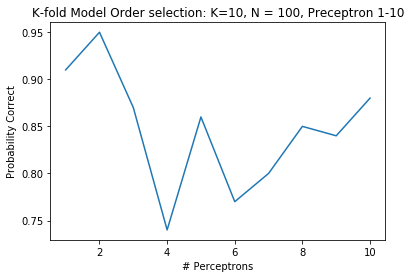

In [14]:
plt.plot(np.arange(1,11), model_means)
plt.title('K-fold Model Order selection: K=10, N = 100, Preceptron 1-10')
plt.xlabel('# Perceptrons')
plt.ylabel('Probability Correct')
plt.show

In [15]:
y_testfinal = keras.utils.to_categorical(L, num_classes = 4)
model = Sequential()
# Dense(n) is a fully-connected layer with n hidden units.
# in the first layer, you must specify the expected input data shape:
# here, 3-dimensional vectors.
model.add(Dense(model_order, activation='sigmoid', input_dim=3))
model.add(Dense(4, activation='softmax'))
sgd = SGD(lr=0.01, decay=1e-6, momentum=0.9, nesterov=True)
model.compile(loss='categorical_crossentropy',
            optimizer=sgd,
            metrics=['accuracy'])
converged = 0
tmp = 0
epsilon = 0.001
while not converged:
    model.fit(x_data, y_data, batch_size=None, epochs=50)
    score = model.evaluate(x, y_testfinal)
    converged = np.abs(score[1]-tmp)<epsilon
    tmp = score[1]
print("Accuracy on Test Data (1 being 100%): " + str(score[1]))

Epoch 1/50
100/100 [==============================] - 0s 496us/step - loss: 1.5185 - accuracy: 0.3600
Epoch 2/50
100/100 [==============================] - 0s 54us/step - loss: 1.4961 - accuracy: 0.4200
Epoch 3/50
100/100 [==============================] - 0s 54us/step - loss: 1.4641 - accuracy: 0.4200
Epoch 4/50
100/100 [==============================] - 0s 105us/step - loss: 1.4253 - accuracy: 0.4200
Epoch 5/50
100/100 [==============================] - 0s 80us/step - loss: 1.3874 - accuracy: 0.4300
Epoch 6/50
100/100 [==============================] - 0s 57us/step - loss: 1.3462 - accuracy: 0.4400
Epoch 7/50
100/100 [==============================] - 0s 74us/step - loss: 1.3079 - accuracy: 0.4400
Epoch 8/50
100/100 [==============================] - 0s 54us/step - loss: 1.2724 - accuracy: 0.4400
Epoch 9/50
100/100 [==============================] - 0s 64us/step - loss: 1.2389 - accuracy: 0.4400
Epoch 10/50
100/100 [==============================] - 0s 57us/step - loss: 1.2095 - accu

100/100 [==============================] - 0s 61us/step - loss: 0.5136 - accuracy: 0.8400
Epoch 31/50
100/100 [==============================] - 0s 62us/step - loss: 0.5089 - accuracy: 0.8400
Epoch 32/50
100/100 [==============================] - 0s 55us/step - loss: 0.5048 - accuracy: 0.8400
Epoch 33/50
100/100 [==============================] - 0s 49us/step - loss: 0.5000 - accuracy: 0.8400
Epoch 34/50
100/100 [==============================] - 0s 52us/step - loss: 0.4959 - accuracy: 0.8400
Epoch 35/50
100/100 [==============================] - 0s 52us/step - loss: 0.4920 - accuracy: 0.8400
Epoch 36/50
100/100 [==============================] - 0s 49us/step - loss: 0.4876 - accuracy: 0.8400
Epoch 37/50
100/100 [==============================] - 0s 53us/step - loss: 0.4834 - accuracy: 0.8900
Epoch 38/50
100/100 [==============================] - 0s 54us/step - loss: 0.4793 - accuracy: 0.9100
Epoch 39/50
100/100 [==============================] - 0s 53us/step - loss: 0.4756 - accuracy:

100/100 [==============================] - 0s 56us/step - loss: 0.3240 - accuracy: 0.9300
Epoch 10/50
100/100 [==============================] - 0s 47us/step - loss: 0.3232 - accuracy: 0.9300
Epoch 11/50
100/100 [==============================] - 0s 55us/step - loss: 0.3219 - accuracy: 0.9200
Epoch 12/50
100/100 [==============================] - 0s 44us/step - loss: 0.3207 - accuracy: 0.9200
Epoch 13/50
100/100 [==============================] - 0s 49us/step - loss: 0.3199 - accuracy: 0.9200
Epoch 14/50
100/100 [==============================] - 0s 46us/step - loss: 0.3181 - accuracy: 0.9200
Epoch 15/50
100/100 [==============================] - 0s 46us/step - loss: 0.3172 - accuracy: 0.9300
Epoch 16/50
100/100 [==============================] - 0s 51us/step - loss: 0.3163 - accuracy: 0.9300
Epoch 17/50
100/100 [==============================] - 0s 47us/step - loss: 0.3154 - accuracy: 0.9300
Epoch 18/50
100/100 [==============================] - 0s 51us/step - loss: 0.3144 - accuracy:

100/100 [==============================] - 0s 54us/step - loss: 0.2607 - accuracy: 0.9300
Epoch 39/50
100/100 [==============================] - 0s 48us/step - loss: 0.2591 - accuracy: 0.9300
Epoch 40/50
100/100 [==============================] - 0s 57us/step - loss: 0.2588 - accuracy: 0.9300
Epoch 41/50
100/100 [==============================] - 0s 47us/step - loss: 0.2581 - accuracy: 0.9300
Epoch 42/50
100/100 [==============================] - 0s 51us/step - loss: 0.2574 - accuracy: 0.9300
Epoch 43/50
100/100 [==============================] - 0s 53us/step - loss: 0.2569 - accuracy: 0.9300
Epoch 44/50
100/100 [==============================] - 0s 53us/step - loss: 0.2571 - accuracy: 0.9300
Epoch 45/50
100/100 [==============================] - 0s 51us/step - loss: 0.2562 - accuracy: 0.9300
Epoch 46/50
100/100 [==============================] - 0s 60us/step - loss: 0.2561 - accuracy: 0.9300
Epoch 47/50
100/100 [==============================] - 0s 55us/step - loss: 0.2564 - accuracy:

100/100 [==============================] - 0s 54us/step - loss: 0.2277 - accuracy: 0.9400
Epoch 18/50
100/100 [==============================] - 0s 51us/step - loss: 0.2287 - accuracy: 0.9300
Epoch 19/50
100/100 [==============================] - 0s 53us/step - loss: 0.2310 - accuracy: 0.9400
Epoch 20/50
100/100 [==============================] - 0s 50us/step - loss: 0.2336 - accuracy: 0.9300
Epoch 21/50
100/100 [==============================] - 0s 45us/step - loss: 0.2335 - accuracy: 0.9300
Epoch 22/50
100/100 [==============================] - 0s 48us/step - loss: 0.2344 - accuracy: 0.9300
Epoch 23/50
100/100 [==============================] - 0s 50us/step - loss: 0.2335 - accuracy: 0.9300
Epoch 24/50
100/100 [==============================] - 0s 48us/step - loss: 0.2333 - accuracy: 0.9300
Epoch 25/50
100/100 [==============================] - 0s 48us/step - loss: 0.2309 - accuracy: 0.9300
Epoch 26/50
100/100 [==============================] - 0s 47us/step - loss: 0.2300 - accuracy:

100/100 [==============================] - 0s 56us/step - loss: 0.2077 - accuracy: 0.9300
Epoch 47/50
100/100 [==============================] - 0s 57us/step - loss: 0.2076 - accuracy: 0.9300
Epoch 48/50
100/100 [==============================] - 0s 52us/step - loss: 0.2079 - accuracy: 0.9300
Epoch 49/50
100/100 [==============================] - 0s 53us/step - loss: 0.2085 - accuracy: 0.9300
Epoch 50/50
10000/10000 [==============================] - 0s 10us/step
Epoch 1/50
100/100 [==============================] - 0s 46us/step - loss: 0.2078 - accuracy: 0.9300
Epoch 2/50
100/100 [==============================] - 0s 46us/step - loss: 0.2075 - accuracy: 0.9300
Epoch 3/50
100/100 [==============================] - 0s 49us/step - loss: 0.2074 - accuracy: 0.9300
Epoch 4/50
100/100 [==============================] - 0s 49us/step - loss: 0.2074 - accuracy: 0.9300
Epoch 5/50
100/100 [==============================] - 0s 51us/step - loss: 0.2078 - accuracy: 0.9300
Epoch 6/50
100/100 [=======

100/100 [==============================] - 0s 46us/step - loss: 0.1994 - accuracy: 0.9300
Epoch 26/50
100/100 [==============================] - 0s 48us/step - loss: 0.1996 - accuracy: 0.9300
Epoch 27/50
100/100 [==============================] - 0s 48us/step - loss: 0.1971 - accuracy: 0.9300
Epoch 28/50
100/100 [==============================] - 0s 47us/step - loss: 0.1958 - accuracy: 0.9300
Epoch 29/50
100/100 [==============================] - 0s 54us/step - loss: 0.1950 - accuracy: 0.9300
Epoch 30/50
100/100 [==============================] - 0s 48us/step - loss: 0.1957 - accuracy: 0.9300
Epoch 31/50
100/100 [==============================] - 0s 52us/step - loss: 0.1950 - accuracy: 0.9300
Epoch 32/50
100/100 [==============================] - 0s 52us/step - loss: 0.1981 - accuracy: 0.9300
Epoch 33/50
100/100 [==============================] - 0s 55us/step - loss: 0.1963 - accuracy: 0.9300
Epoch 34/50
100/100 [==============================] - 0s 53us/step - loss: 0.1947 - accuracy:

In [16]:
score[1]

0.932699978351593

In [17]:
NN_predict = model.predict(x)
decision = np.argmax(NN_predict,axis=1)
confusion_matrix(L, decision, labels=[0, 1, 2, 3])

array([[2751,  262,    9,  123],
       [ 106, 3808,   56,    1],
       [   1,   96, 1778,   12],
       [   2,    1,    4,  990]])

In [18]:
#1,000 sample size training
accuracy = np.zeros((10,10))
x_data = x_test1000
y_data = keras.utils.to_categorical(Ltest_1000, num_classes=4) #keras.utils.to_categorical(np.random.randint(10, size=(1000, 1)), num_classes=10)
#x_test = np.random.random((100, 20))
#y_test = keras.utils.to_categorical(np.random.randint(10, size=(100, 1)), num_classes=10)
kf = KFold(n_splits=10)
j = 0
for train_index, test_index in kf.split(x_data):
    print("TRAIN:", train_index, "TEST:", test_index)
    x_train, x_test = x_data[train_index], x_data[test_index]
    y_train, y_test = y_data[train_index], y_data[test_index]
    for i in range(1,11):
        model = Sequential()
        # Dense(64) is a fully-connected layer with 64 hidden units.
        # in the first layer, you must specify the expected input data shape:
        # here, 3-dimensional vectors.
        model.add(Dense(i, activation='sigmoid', input_dim=3))
        model.add(Dense(4, activation='softmax'))
        sgd = SGD(lr=0.01, decay=1e-6, momentum=0.9, nesterov=True)
        model.compile(loss='categorical_crossentropy',
                    optimizer=sgd,
                    metrics=['accuracy'])
        converged = 0
        tmp = 0
        epsilon = 0.001
        while not converged:
            model.fit(x_train, y_train, batch_size=None, epochs=50)
            score = model.evaluate(x_test, y_test)
            converged = np.abs(score[1]-tmp)<epsilon
            tmp = score[1]
        accuracy[j,i-1] = score[1]
    j+=1

('TRAIN:', array([100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112,
       113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125,
       126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138,
       139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151,
       152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164,
       165, 166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177,
       178, 179, 180, 181, 182, 183, 184, 185, 186, 187, 188, 189, 190,
       191, 192, 193, 194, 195, 196, 197, 198, 199, 200, 201, 202, 203,
       204, 205, 206, 207, 208, 209, 210, 211, 212, 213, 214, 215, 216,
       217, 218, 219, 220, 221, 222, 223, 224, 225, 226, 227, 228, 229,
       230, 231, 232, 233, 234, 235, 236, 237, 238, 239, 240, 241, 242,
       243, 244, 245, 246, 247, 248, 249, 250, 251, 252, 253, 254, 255,
       256, 257, 258, 259, 260, 261, 262, 263, 264, 265, 266, 267, 268,
       269, 270, 271, 272, 273, 274, 275, 276, 277, 2

900/900 [==============================] - 0s 23us/step - loss: 0.7780 - accuracy: 0.6111
Epoch 28/50
900/900 [==============================] - 0s 23us/step - loss: 0.7751 - accuracy: 0.6100
Epoch 29/50
900/900 [==============================] - 0s 22us/step - loss: 0.7726 - accuracy: 0.6111
Epoch 30/50
900/900 [==============================] - 0s 20us/step - loss: 0.7707 - accuracy: 0.6089
Epoch 31/50
900/900 [==============================] - 0s 21us/step - loss: 0.7694 - accuracy: 0.6089
Epoch 32/50
900/900 [==============================] - 0s 21us/step - loss: 0.7685 - accuracy: 0.6122
Epoch 33/50
900/900 [==============================] - 0s 21us/step - loss: 0.7662 - accuracy: 0.6089
Epoch 34/50
900/900 [==============================] - 0s 21us/step - loss: 0.7646 - accuracy: 0.6100
Epoch 35/50
900/900 [==============================] - 0s 21us/step - loss: 0.7636 - accuracy: 0.6100
Epoch 36/50
900/900 [==============================] - 0s 22us/step - loss: 0.7627 - accuracy:

900/900 [==============================] - 0s 21us/step - loss: 0.7335 - accuracy: 0.6089
Epoch 7/50
900/900 [==============================] - 0s 22us/step - loss: 0.7334 - accuracy: 0.6078
Epoch 8/50
900/900 [==============================] - 0s 23us/step - loss: 0.7325 - accuracy: 0.6078
Epoch 9/50
900/900 [==============================] - 0s 21us/step - loss: 0.7337 - accuracy: 0.6089
Epoch 10/50
900/900 [==============================] - 0s 22us/step - loss: 0.7332 - accuracy: 0.6056
Epoch 11/50
900/900 [==============================] - 0s 20us/step - loss: 0.7333 - accuracy: 0.6044
Epoch 12/50
900/900 [==============================] - 0s 22us/step - loss: 0.7326 - accuracy: 0.6067
Epoch 13/50
900/900 [==============================] - 0s 21us/step - loss: 0.7358 - accuracy: 0.6067
Epoch 14/50
900/900 [==============================] - 0s 21us/step - loss: 0.7335 - accuracy: 0.6067
Epoch 15/50
900/900 [==============================] - 0s 20us/step - loss: 0.7327 - accuracy: 0.

900/900 [==============================] - 0s 22us/step - loss: 0.2300 - accuracy: 0.9500
Epoch 37/50
900/900 [==============================] - 0s 21us/step - loss: 0.2261 - accuracy: 0.9489
Epoch 38/50
900/900 [==============================] - 0s 22us/step - loss: 0.2231 - accuracy: 0.9522
Epoch 39/50
900/900 [==============================] - 0s 21us/step - loss: 0.2204 - accuracy: 0.9500
Epoch 40/50
900/900 [==============================] - 0s 21us/step - loss: 0.2176 - accuracy: 0.9522
Epoch 41/50
900/900 [==============================] - 0s 21us/step - loss: 0.2149 - accuracy: 0.9533
Epoch 42/50
900/900 [==============================] - 0s 21us/step - loss: 0.2120 - accuracy: 0.9522
Epoch 43/50
900/900 [==============================] - 0s 21us/step - loss: 0.2105 - accuracy: 0.9489
Epoch 44/50
900/900 [==============================] - 0s 21us/step - loss: 0.2076 - accuracy: 0.9522
Epoch 45/50
900/900 [==============================] - 0s 22us/step - loss: 0.2059 - accuracy:

900/900 [==============================] - 0s 22us/step - loss: 0.1529 - accuracy: 0.9544
Epoch 16/50
900/900 [==============================] - 0s 21us/step - loss: 0.1516 - accuracy: 0.9544
Epoch 17/50
900/900 [==============================] - 0s 21us/step - loss: 0.1524 - accuracy: 0.9544
Epoch 18/50
900/900 [==============================] - 0s 22us/step - loss: 0.1521 - accuracy: 0.9556
Epoch 19/50
900/900 [==============================] - 0s 21us/step - loss: 0.1535 - accuracy: 0.9489
Epoch 20/50
900/900 [==============================] - 0s 22us/step - loss: 0.1505 - accuracy: 0.9533
Epoch 21/50
900/900 [==============================] - 0s 22us/step - loss: 0.1498 - accuracy: 0.9544
Epoch 22/50
900/900 [==============================] - 0s 21us/step - loss: 0.1522 - accuracy: 0.9511
Epoch 23/50
900/900 [==============================] - 0s 21us/step - loss: 0.1597 - accuracy: 0.9578
Epoch 24/50
900/900 [==============================] - 0s 22us/step - loss: 0.1537 - accuracy:

Epoch 45/50
900/900 [==============================] - 0s 22us/step - loss: 0.1674 - accuracy: 0.9522
Epoch 46/50
900/900 [==============================] - 0s 22us/step - loss: 0.1671 - accuracy: 0.9522
Epoch 47/50
900/900 [==============================] - 0s 22us/step - loss: 0.1652 - accuracy: 0.9511
Epoch 48/50
900/900 [==============================] - 0s 22us/step - loss: 0.1642 - accuracy: 0.9511
Epoch 49/50
900/900 [==============================] - 0s 22us/step - loss: 0.1639 - accuracy: 0.9500
Epoch 50/50
100/100 [==============================] - 0s 213us/step
Epoch 1/50
900/900 [==============================] - 0s 22us/step - loss: 0.1613 - accuracy: 0.9511
Epoch 2/50
900/900 [==============================] - 0s 21us/step - loss: 0.1602 - accuracy: 0.9511
Epoch 3/50
900/900 [==============================] - 0s 23us/step - loss: 0.1606 - accuracy: 0.9500
Epoch 4/50
900/900 [==============================] - 0s 23us/step - loss: 0.1591 - accuracy: 0.9522
Epoch 5/50
900/90

900/900 [==============================] - 0s 23us/step - loss: 0.1909 - accuracy: 0.9533
Epoch 25/50
900/900 [==============================] - 0s 23us/step - loss: 0.1871 - accuracy: 0.9544
Epoch 26/50
900/900 [==============================] - 0s 21us/step - loss: 0.1842 - accuracy: 0.9567
Epoch 27/50
900/900 [==============================] - 0s 21us/step - loss: 0.1820 - accuracy: 0.9556
Epoch 28/50
900/900 [==============================] - 0s 23us/step - loss: 0.1818 - accuracy: 0.9511
Epoch 29/50
900/900 [==============================] - 0s 22us/step - loss: 0.1785 - accuracy: 0.9500
Epoch 30/50
900/900 [==============================] - 0s 22us/step - loss: 0.1760 - accuracy: 0.9567
Epoch 31/50
900/900 [==============================] - 0s 21us/step - loss: 0.1724 - accuracy: 0.9544
Epoch 32/50
900/900 [==============================] - 0s 23us/step - loss: 0.1709 - accuracy: 0.9522
Epoch 33/50
900/900 [==============================] - 0s 22us/step - loss: 0.1691 - accuracy:

900/900 [==============================] - 0s 24us/step - loss: 0.9392 - accuracy: 0.6300
Epoch 3/50
900/900 [==============================] - 0s 24us/step - loss: 0.8172 - accuracy: 0.7256
Epoch 4/50
900/900 [==============================] - 0s 22us/step - loss: 0.7220 - accuracy: 0.7689
Epoch 5/50
900/900 [==============================] - 0s 23us/step - loss: 0.6386 - accuracy: 0.7933
Epoch 6/50
900/900 [==============================] - 0s 22us/step - loss: 0.5687 - accuracy: 0.8089
Epoch 7/50
900/900 [==============================] - 0s 22us/step - loss: 0.5103 - accuracy: 0.8189
Epoch 8/50
900/900 [==============================] - 0s 22us/step - loss: 0.4619 - accuracy: 0.8444
Epoch 9/50
900/900 [==============================] - 0s 22us/step - loss: 0.4227 - accuracy: 0.8889
Epoch 10/50
900/900 [==============================] - 0s 22us/step - loss: 0.3901 - accuracy: 0.9022
Epoch 11/50
900/900 [==============================] - 0s 22us/step - loss: 0.3618 - accuracy: 0.9200

900/900 [==============================] - 0s 23us/step - loss: 0.1344 - accuracy: 0.9589
Epoch 33/50
900/900 [==============================] - 0s 22us/step - loss: 0.1337 - accuracy: 0.9600
Epoch 34/50
900/900 [==============================] - 0s 21us/step - loss: 0.1319 - accuracy: 0.9578
Epoch 35/50
900/900 [==============================] - 0s 22us/step - loss: 0.1318 - accuracy: 0.9556
Epoch 36/50
900/900 [==============================] - 0s 21us/step - loss: 0.1309 - accuracy: 0.9567
Epoch 37/50
900/900 [==============================] - 0s 21us/step - loss: 0.1308 - accuracy: 0.9578
Epoch 38/50
900/900 [==============================] - 0s 22us/step - loss: 0.1303 - accuracy: 0.9600
Epoch 39/50
900/900 [==============================] - 0s 22us/step - loss: 0.1311 - accuracy: 0.9589
Epoch 40/50
900/900 [==============================] - 0s 31us/step - loss: 0.1300 - accuracy: 0.9578
Epoch 41/50
900/900 [==============================] - 0s 26us/step - loss: 0.1299 - accuracy:

900/900 [==============================] - 0s 29us/step - loss: 0.1357 - accuracy: 0.9578
Epoch 12/50
900/900 [==============================] - 0s 26us/step - loss: 0.1363 - accuracy: 0.9567
Epoch 13/50
900/900 [==============================] - 0s 26us/step - loss: 0.1345 - accuracy: 0.9589
Epoch 14/50
900/900 [==============================] - 0s 26us/step - loss: 0.1352 - accuracy: 0.9533
Epoch 15/50
900/900 [==============================] - 0s 24us/step - loss: 0.1339 - accuracy: 0.9556
Epoch 16/50
900/900 [==============================] - 0s 22us/step - loss: 0.1345 - accuracy: 0.9578
Epoch 17/50
900/900 [==============================] - 0s 26us/step - loss: 0.1329 - accuracy: 0.9589
Epoch 18/50
900/900 [==============================] - 0s 27us/step - loss: 0.1333 - accuracy: 0.9578
Epoch 19/50
900/900 [==============================] - 0s 27us/step - loss: 0.1325 - accuracy: 0.9589
Epoch 20/50
900/900 [==============================] - 0s 29us/step - loss: 0.1322 - accuracy:

Epoch 41/50
900/900 [==============================] - 0s 24us/step - loss: 0.1410 - accuracy: 0.9556
Epoch 42/50
900/900 [==============================] - 0s 26us/step - loss: 0.1409 - accuracy: 0.9533
Epoch 43/50
900/900 [==============================] - 0s 24us/step - loss: 0.1398 - accuracy: 0.9567
Epoch 44/50
900/900 [==============================] - 0s 25us/step - loss: 0.1388 - accuracy: 0.9567
Epoch 45/50
900/900 [==============================] - 0s 22us/step - loss: 0.1395 - accuracy: 0.9533
Epoch 46/50
900/900 [==============================] - 0s 23us/step - loss: 0.1376 - accuracy: 0.9556
Epoch 47/50
900/900 [==============================] - 0s 25us/step - loss: 0.1371 - accuracy: 0.9567
Epoch 48/50
900/900 [==============================] - 0s 25us/step - loss: 0.1368 - accuracy: 0.9578
Epoch 49/50
900/900 [==============================] - 0s 25us/step - loss: 0.1359 - accuracy: 0.9567
Epoch 50/50
100/100 [==============================] - 0s 229us/step
Epoch 1/50
90

900/900 [==============================] - 0s 22us/step - loss: 0.1171 - accuracy: 0.9611
Epoch 21/50
900/900 [==============================] - 0s 22us/step - loss: 0.1177 - accuracy: 0.9622
Epoch 22/50
900/900 [==============================] - 0s 22us/step - loss: 0.1170 - accuracy: 0.9600
Epoch 23/50
900/900 [==============================] - 0s 22us/step - loss: 0.1167 - accuracy: 0.9622
Epoch 24/50
900/900 [==============================] - 0s 22us/step - loss: 0.1166 - accuracy: 0.9633
Epoch 25/50
900/900 [==============================] - 0s 22us/step - loss: 0.1163 - accuracy: 0.9611
Epoch 26/50
900/900 [==============================] - 0s 22us/step - loss: 0.1164 - accuracy: 0.9611
Epoch 27/50
900/900 [==============================] - 0s 22us/step - loss: 0.1170 - accuracy: 0.9600
Epoch 28/50
900/900 [==============================] - 0s 23us/step - loss: 0.1158 - accuracy: 0.9622
Epoch 29/50
900/900 [==============================] - 0s 25us/step - loss: 0.1171 - accuracy:

Epoch 50/50
100/100 [==============================] - 0s 206us/step
Epoch 1/50
900/900 [==============================] - 0s 23us/step - loss: 0.1355 - accuracy: 0.9578
Epoch 2/50
900/900 [==============================] - 0s 23us/step - loss: 0.1352 - accuracy: 0.9567
Epoch 3/50
900/900 [==============================] - 0s 23us/step - loss: 0.1345 - accuracy: 0.9578
Epoch 4/50
900/900 [==============================] - 0s 22us/step - loss: 0.1347 - accuracy: 0.9567
Epoch 5/50
900/900 [==============================] - 0s 23us/step - loss: 0.1333 - accuracy: 0.9578
Epoch 6/50
900/900 [==============================] - 0s 21us/step - loss: 0.1331 - accuracy: 0.9567
Epoch 7/50
900/900 [==============================] - 0s 22us/step - loss: 0.1326 - accuracy: 0.9578
Epoch 8/50
900/900 [==============================] - 0s 22us/step - loss: 0.1321 - accuracy: 0.9589
Epoch 9/50
900/900 [==============================] - 0s 22us/step - loss: 0.1317 - accuracy: 0.9589
Epoch 10/50
900/900 [=

900/900 [==============================] - 0s 23us/step - loss: 0.1537 - accuracy: 0.9544
Epoch 30/50
900/900 [==============================] - 0s 24us/step - loss: 0.1511 - accuracy: 0.9522
Epoch 31/50
900/900 [==============================] - 0s 23us/step - loss: 0.1509 - accuracy: 0.9511
Epoch 32/50
900/900 [==============================] - 0s 23us/step - loss: 0.1491 - accuracy: 0.9511
Epoch 33/50
900/900 [==============================] - 0s 23us/step - loss: 0.1468 - accuracy: 0.9533
Epoch 34/50
900/900 [==============================] - 0s 23us/step - loss: 0.1456 - accuracy: 0.9533
Epoch 35/50
900/900 [==============================] - 0s 23us/step - loss: 0.1448 - accuracy: 0.9533
Epoch 36/50
900/900 [==============================] - 0s 23us/step - loss: 0.1438 - accuracy: 0.9556
Epoch 37/50
900/900 [==============================] - 0s 23us/step - loss: 0.1427 - accuracy: 0.9533
Epoch 38/50
900/900 [==============================] - 0s 23us/step - loss: 0.1414 - accuracy:

900/900 [==============================] - 0s 23us/step - loss: 0.1153 - accuracy: 0.9622
Epoch 9/50
900/900 [==============================] - 0s 23us/step - loss: 0.1158 - accuracy: 0.9633
Epoch 10/50
900/900 [==============================] - 0s 23us/step - loss: 0.1149 - accuracy: 0.9622
Epoch 11/50
900/900 [==============================] - 0s 23us/step - loss: 0.1151 - accuracy: 0.9622
Epoch 12/50
900/900 [==============================] - 0s 23us/step - loss: 0.1153 - accuracy: 0.9622
Epoch 13/50
900/900 [==============================] - 0s 23us/step - loss: 0.1146 - accuracy: 0.9600
Epoch 14/50
900/900 [==============================] - 0s 23us/step - loss: 0.1145 - accuracy: 0.9611
Epoch 15/50
900/900 [==============================] - 0s 23us/step - loss: 0.1143 - accuracy: 0.9644
Epoch 16/50
900/900 [==============================] - 0s 23us/step - loss: 0.1145 - accuracy: 0.9622
Epoch 17/50
900/900 [==============================] - 0s 23us/step - loss: 0.1139 - accuracy: 

Epoch 38/50
900/900 [==============================] - 0s 29us/step - loss: 0.1363 - accuracy: 0.9544
Epoch 39/50
900/900 [==============================] - 0s 26us/step - loss: 0.1361 - accuracy: 0.9556
Epoch 40/50
900/900 [==============================] - 0s 26us/step - loss: 0.1339 - accuracy: 0.9567
Epoch 41/50
900/900 [==============================] - 0s 25us/step - loss: 0.1334 - accuracy: 0.9578
Epoch 42/50
900/900 [==============================] - 0s 23us/step - loss: 0.1327 - accuracy: 0.9589
Epoch 43/50
900/900 [==============================] - 0s 25us/step - loss: 0.1326 - accuracy: 0.9578
Epoch 44/50
900/900 [==============================] - 0s 25us/step - loss: 0.1314 - accuracy: 0.9589
Epoch 45/50
900/900 [==============================] - 0s 22us/step - loss: 0.1312 - accuracy: 0.9567
Epoch 46/50
900/900 [==============================] - 0s 23us/step - loss: 0.1303 - accuracy: 0.9567
Epoch 47/50
900/900 [==============================] - 0s 22us/step - loss: 0.1300

900/900 [==============================] - 0s 28us/step - loss: 0.1141 - accuracy: 0.9633
Epoch 18/50
900/900 [==============================] - 0s 46us/step - loss: 0.1139 - accuracy: 0.9644
Epoch 19/50
900/900 [==============================] - 0s 27us/step - loss: 0.1142 - accuracy: 0.9633
Epoch 20/50
900/900 [==============================] - 0s 27us/step - loss: 0.1131 - accuracy: 0.9633
Epoch 21/50
900/900 [==============================] - 0s 23us/step - loss: 0.1133 - accuracy: 0.9656
Epoch 22/50
900/900 [==============================] - 0s 24us/step - loss: 0.1131 - accuracy: 0.9644
Epoch 23/50
900/900 [==============================] - 0s 26us/step - loss: 0.1130 - accuracy: 0.9656
Epoch 24/50
900/900 [==============================] - 0s 21us/step - loss: 0.1134 - accuracy: 0.9644
Epoch 25/50
900/900 [==============================] - 0s 22us/step - loss: 0.1130 - accuracy: 0.9644
Epoch 26/50
900/900 [==============================] - 0s 22us/step - loss: 0.1128 - accuracy:

Epoch 47/50
900/900 [==============================] - 0s 22us/step - loss: 0.1066 - accuracy: 0.9678
Epoch 48/50
900/900 [==============================] - 0s 22us/step - loss: 0.1062 - accuracy: 0.9644
Epoch 49/50
900/900 [==============================] - 0s 22us/step - loss: 0.1067 - accuracy: 0.9644
Epoch 50/50
100/100 [==============================] - 0s 31us/step
('TRAIN:', array([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,
        13,  14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,
        26,  27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,
        39,  40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,
        52,  53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,
        65,  66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,
        78,  79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,
        91,  92,  93,  94,  95,  96,  97,  98,  99, 200, 201, 202, 203,
       204, 205, 206, 207, 208, 209, 21

900/900 [==============================] - 0s 22us/step - loss: 0.8829 - accuracy: 0.6122
Epoch 23/50
900/900 [==============================] - 0s 23us/step - loss: 0.8772 - accuracy: 0.6200
Epoch 24/50
900/900 [==============================] - 0s 22us/step - loss: 0.8693 - accuracy: 0.6122
Epoch 25/50
900/900 [==============================] - 0s 22us/step - loss: 0.8634 - accuracy: 0.6078
Epoch 26/50
900/900 [==============================] - 0s 22us/step - loss: 0.8586 - accuracy: 0.6011
Epoch 27/50
900/900 [==============================] - 0s 22us/step - loss: 0.8510 - accuracy: 0.6122
Epoch 28/50
900/900 [==============================] - 0s 23us/step - loss: 0.8459 - accuracy: 0.6078
Epoch 29/50
900/900 [==============================] - 0s 22us/step - loss: 0.8383 - accuracy: 0.6122
Epoch 30/50
900/900 [==============================] - 0s 23us/step - loss: 0.8331 - accuracy: 0.6267
Epoch 31/50
900/900 [==============================] - 0s 21us/step - loss: 0.8284 - accuracy:

900/900 [==============================] - 0s 22us/step - loss: 0.7149 - accuracy: 0.6233
Epoch 2/50
900/900 [==============================] - 0s 21us/step - loss: 0.7164 - accuracy: 0.6156
Epoch 3/50
900/900 [==============================] - 0s 21us/step - loss: 0.7146 - accuracy: 0.6133
Epoch 4/50
900/900 [==============================] - 0s 22us/step - loss: 0.7125 - accuracy: 0.6233
Epoch 5/50
900/900 [==============================] - 0s 22us/step - loss: 0.7123 - accuracy: 0.6211
Epoch 6/50
900/900 [==============================] - 0s 22us/step - loss: 0.7122 - accuracy: 0.6333
Epoch 7/50
900/900 [==============================] - 0s 21us/step - loss: 0.7124 - accuracy: 0.6300
Epoch 8/50
900/900 [==============================] - 0s 23us/step - loss: 0.7114 - accuracy: 0.6244
Epoch 9/50
900/900 [==============================] - 0s 28us/step - loss: 0.7132 - accuracy: 0.6289
Epoch 10/50
900/900 [==============================] - 0s 25us/step - loss: 0.7098 - accuracy: 0.6167


900/900 [==============================] - 0s 22us/step - loss: 0.6827 - accuracy: 0.6178
Epoch 32/50
900/900 [==============================] - 0s 22us/step - loss: 0.6836 - accuracy: 0.6189
Epoch 33/50
900/900 [==============================] - 0s 21us/step - loss: 0.6834 - accuracy: 0.6156
Epoch 34/50
900/900 [==============================] - 0s 23us/step - loss: 0.6838 - accuracy: 0.6178
Epoch 35/50
900/900 [==============================] - 0s 23us/step - loss: 0.6812 - accuracy: 0.6267
Epoch 36/50
900/900 [==============================] - 0s 22us/step - loss: 0.6889 - accuracy: 0.6189
Epoch 37/50
900/900 [==============================] - 0s 21us/step - loss: 0.6799 - accuracy: 0.6289
Epoch 38/50
900/900 [==============================] - 0s 22us/step - loss: 0.6808 - accuracy: 0.6133
Epoch 39/50
900/900 [==============================] - 0s 22us/step - loss: 0.6799 - accuracy: 0.6144
Epoch 40/50
900/900 [==============================] - 0s 21us/step - loss: 0.6791 - accuracy:

900/900 [==============================] - 0s 22us/step - loss: 0.6491 - accuracy: 0.7189
Epoch 11/50
900/900 [==============================] - 0s 22us/step - loss: 0.6513 - accuracy: 0.7156
Epoch 12/50
900/900 [==============================] - 0s 27us/step - loss: 0.6484 - accuracy: 0.7211
Epoch 13/50
900/900 [==============================] - 0s 22us/step - loss: 0.6481 - accuracy: 0.7133
Epoch 14/50
900/900 [==============================] - 0s 20us/step - loss: 0.6496 - accuracy: 0.7167
Epoch 15/50
900/900 [==============================] - 0s 24us/step - loss: 0.6474 - accuracy: 0.7144
Epoch 16/50
900/900 [==============================] - 0s 22us/step - loss: 0.6465 - accuracy: 0.7200
Epoch 17/50
900/900 [==============================] - 0s 22us/step - loss: 0.6492 - accuracy: 0.7111
Epoch 18/50
900/900 [==============================] - 0s 21us/step - loss: 0.6497 - accuracy: 0.7111
Epoch 19/50
900/900 [==============================] - 0s 20us/step - loss: 0.6448 - accuracy:

Epoch 40/50
900/900 [==============================] - 0s 24us/step - loss: 0.6278 - accuracy: 0.7333
Epoch 41/50
900/900 [==============================] - 0s 22us/step - loss: 0.6243 - accuracy: 0.7367
Epoch 42/50
900/900 [==============================] - 0s 22us/step - loss: 0.6146 - accuracy: 0.7356
Epoch 43/50
900/900 [==============================] - 0s 23us/step - loss: 0.6136 - accuracy: 0.7378
Epoch 44/50
900/900 [==============================] - 0s 23us/step - loss: 0.6152 - accuracy: 0.7378
Epoch 45/50
900/900 [==============================] - 0s 23us/step - loss: 0.6191 - accuracy: 0.7411
Epoch 46/50
900/900 [==============================] - 0s 23us/step - loss: 0.6293 - accuracy: 0.7311
Epoch 47/50
900/900 [==============================] - 0s 23us/step - loss: 0.6140 - accuracy: 0.7400
Epoch 48/50
900/900 [==============================] - 0s 21us/step - loss: 0.6134 - accuracy: 0.7489
Epoch 49/50
900/900 [==============================] - 0s 22us/step - loss: 0.6110

900/900 [==============================] - 0s 26us/step - loss: 0.1852 - accuracy: 0.9500
Epoch 20/50
900/900 [==============================] - 0s 26us/step - loss: 0.1853 - accuracy: 0.9522
Epoch 21/50
900/900 [==============================] - 0s 26us/step - loss: 0.1844 - accuracy: 0.9478
Epoch 22/50
900/900 [==============================] - 0s 25us/step - loss: 0.1829 - accuracy: 0.9478
Epoch 23/50
900/900 [==============================] - 0s 25us/step - loss: 0.1833 - accuracy: 0.9489
Epoch 24/50
900/900 [==============================] - 0s 22us/step - loss: 0.1813 - accuracy: 0.9478
Epoch 25/50
900/900 [==============================] - 0s 22us/step - loss: 0.1809 - accuracy: 0.9489
Epoch 26/50
900/900 [==============================] - 0s 21us/step - loss: 0.1804 - accuracy: 0.9478
Epoch 27/50
900/900 [==============================] - 0s 23us/step - loss: 0.1804 - accuracy: 0.9467
Epoch 28/50
900/900 [==============================] - 0s 21us/step - loss: 0.1795 - accuracy:

900/900 [==============================] - 0s 21us/step - loss: 0.1573 - accuracy: 0.9511
Epoch 49/50
900/900 [==============================] - 0s 22us/step - loss: 0.1563 - accuracy: 0.9500
Epoch 50/50
100/100 [==============================] - 0s 34us/step
Epoch 1/50
900/900 [==============================] - 0s 21us/step - loss: 0.1568 - accuracy: 0.9511
Epoch 2/50
900/900 [==============================] - 0s 21us/step - loss: 0.1563 - accuracy: 0.9489
Epoch 3/50
900/900 [==============================] - 0s 21us/step - loss: 0.1561 - accuracy: 0.9511
Epoch 4/50
900/900 [==============================] - 0s 21us/step - loss: 0.1578 - accuracy: 0.9500
Epoch 5/50
900/900 [==============================] - 0s 22us/step - loss: 0.1551 - accuracy: 0.9522
Epoch 6/50
900/900 [==============================] - 0s 21us/step - loss: 0.1548 - accuracy: 0.9522
Epoch 7/50
900/900 [==============================] - 0s 21us/step - loss: 0.1568 - accuracy: 0.9544
Epoch 8/50
900/900 [=============

900/900 [==============================] - 0s 26us/step - loss: 0.1485 - accuracy: 0.9533
Epoch 28/50
900/900 [==============================] - 0s 26us/step - loss: 0.1505 - accuracy: 0.9556
Epoch 29/50
900/900 [==============================] - 0s 28us/step - loss: 0.1489 - accuracy: 0.9511
Epoch 30/50
900/900 [==============================] - 0s 26us/step - loss: 0.1481 - accuracy: 0.9533
Epoch 31/50
900/900 [==============================] - 0s 26us/step - loss: 0.1484 - accuracy: 0.9500
Epoch 32/50
900/900 [==============================] - 0s 23us/step - loss: 0.1474 - accuracy: 0.9522
Epoch 33/50
900/900 [==============================] - 0s 22us/step - loss: 0.1491 - accuracy: 0.9533
Epoch 34/50
900/900 [==============================] - 0s 22us/step - loss: 0.1479 - accuracy: 0.9511
Epoch 35/50
900/900 [==============================] - 0s 22us/step - loss: 0.1472 - accuracy: 0.9533
Epoch 36/50
900/900 [==============================] - 0s 21us/step - loss: 0.1466 - accuracy:

900/900 [==============================] - 0s 23us/step - loss: 0.1442 - accuracy: 0.9533
Epoch 7/50
900/900 [==============================] - 0s 23us/step - loss: 0.1441 - accuracy: 0.9500
Epoch 8/50
900/900 [==============================] - 0s 24us/step - loss: 0.1438 - accuracy: 0.9522
Epoch 9/50
900/900 [==============================] - 0s 25us/step - loss: 0.1431 - accuracy: 0.9522
Epoch 10/50
900/900 [==============================] - 0s 26us/step - loss: 0.1470 - accuracy: 0.9522
Epoch 11/50
900/900 [==============================] - 0s 26us/step - loss: 0.1442 - accuracy: 0.9533
Epoch 12/50
900/900 [==============================] - 0s 25us/step - loss: 0.1447 - accuracy: 0.9511
Epoch 13/50
900/900 [==============================] - 0s 26us/step - loss: 0.1427 - accuracy: 0.9544
Epoch 14/50
900/900 [==============================] - 0s 26us/step - loss: 0.1447 - accuracy: 0.9500
Epoch 15/50
900/900 [==============================] - 0s 26us/step - loss: 0.1423 - accuracy: 0.

900/900 [==============================] - 0s 23us/step - loss: 0.2279 - accuracy: 0.9489
Epoch 37/50
900/900 [==============================] - 0s 23us/step - loss: 0.2246 - accuracy: 0.9500
Epoch 38/50
900/900 [==============================] - 0s 23us/step - loss: 0.2218 - accuracy: 0.9489
Epoch 39/50
900/900 [==============================] - 0s 23us/step - loss: 0.2183 - accuracy: 0.9500
Epoch 40/50
900/900 [==============================] - 0s 23us/step - loss: 0.2170 - accuracy: 0.9500
Epoch 41/50
900/900 [==============================] - 0s 23us/step - loss: 0.2141 - accuracy: 0.9489
Epoch 42/50
900/900 [==============================] - 0s 23us/step - loss: 0.2117 - accuracy: 0.9500
Epoch 43/50
900/900 [==============================] - 0s 23us/step - loss: 0.2101 - accuracy: 0.9489
Epoch 44/50
900/900 [==============================] - 0s 23us/step - loss: 0.2076 - accuracy: 0.9489
Epoch 45/50
900/900 [==============================] - 0s 23us/step - loss: 0.2045 - accuracy:

900/900 [==============================] - 0s 22us/step - loss: 0.1560 - accuracy: 0.9522
Epoch 16/50
900/900 [==============================] - 0s 22us/step - loss: 0.1550 - accuracy: 0.9511
Epoch 17/50
900/900 [==============================] - 0s 21us/step - loss: 0.1562 - accuracy: 0.9489
Epoch 18/50
900/900 [==============================] - 0s 21us/step - loss: 0.1547 - accuracy: 0.9489
Epoch 19/50
900/900 [==============================] - 0s 21us/step - loss: 0.1538 - accuracy: 0.9533
Epoch 20/50
900/900 [==============================] - 0s 21us/step - loss: 0.1539 - accuracy: 0.9544
Epoch 21/50
900/900 [==============================] - 0s 21us/step - loss: 0.1536 - accuracy: 0.9489
Epoch 22/50
900/900 [==============================] - 0s 21us/step - loss: 0.1529 - accuracy: 0.9511
Epoch 23/50
900/900 [==============================] - 0s 21us/step - loss: 0.1533 - accuracy: 0.9522
Epoch 24/50
900/900 [==============================] - 0s 21us/step - loss: 0.1541 - accuracy:

Epoch 45/50
900/900 [==============================] - 0s 22us/step - loss: 0.1912 - accuracy: 0.9511
Epoch 46/50
900/900 [==============================] - 0s 23us/step - loss: 0.1888 - accuracy: 0.9544
Epoch 47/50
900/900 [==============================] - 0s 23us/step - loss: 0.1879 - accuracy: 0.9556
Epoch 48/50
900/900 [==============================] - 0s 23us/step - loss: 0.1859 - accuracy: 0.9544
Epoch 49/50
900/900 [==============================] - 0s 22us/step - loss: 0.1845 - accuracy: 0.9556
Epoch 50/50
100/100 [==============================] - 0s 234us/step
Epoch 1/50
900/900 [==============================] - 0s 24us/step - loss: 0.1823 - accuracy: 0.9544
Epoch 2/50
900/900 [==============================] - 0s 22us/step - loss: 0.1804 - accuracy: 0.9556
Epoch 3/50
900/900 [==============================] - 0s 23us/step - loss: 0.1797 - accuracy: 0.9544
Epoch 4/50
900/900 [==============================] - 0s 22us/step - loss: 0.1780 - accuracy: 0.9544
Epoch 5/50
900/90

900/900 [==============================] - 0s 22us/step - loss: 0.1970 - accuracy: 0.9489
Epoch 25/50
900/900 [==============================] - 0s 22us/step - loss: 0.1941 - accuracy: 0.9489
Epoch 26/50
900/900 [==============================] - 0s 23us/step - loss: 0.1914 - accuracy: 0.9500
Epoch 27/50
900/900 [==============================] - 0s 22us/step - loss: 0.1886 - accuracy: 0.9489
Epoch 28/50
900/900 [==============================] - 0s 21us/step - loss: 0.1865 - accuracy: 0.9467
Epoch 29/50
900/900 [==============================] - 0s 23us/step - loss: 0.1843 - accuracy: 0.9467
Epoch 30/50
900/900 [==============================] - 0s 23us/step - loss: 0.1839 - accuracy: 0.9489
Epoch 31/50
900/900 [==============================] - 0s 21us/step - loss: 0.1812 - accuracy: 0.9467
Epoch 32/50
900/900 [==============================] - 0s 22us/step - loss: 0.1787 - accuracy: 0.9478
Epoch 33/50
900/900 [==============================] - 0s 22us/step - loss: 0.1770 - accuracy:

900/900 [==============================] - 0s 22us/step - loss: 0.1401 - accuracy: 0.9522
Epoch 4/50
900/900 [==============================] - 0s 23us/step - loss: 0.1391 - accuracy: 0.9511
Epoch 5/50
900/900 [==============================] - 0s 22us/step - loss: 0.1387 - accuracy: 0.9511
Epoch 6/50
900/900 [==============================] - 0s 22us/step - loss: 0.1388 - accuracy: 0.9522
Epoch 7/50
900/900 [==============================] - 0s 22us/step - loss: 0.1385 - accuracy: 0.9522
Epoch 8/50
900/900 [==============================] - 0s 22us/step - loss: 0.1382 - accuracy: 0.9511
Epoch 9/50
900/900 [==============================] - 0s 22us/step - loss: 0.1382 - accuracy: 0.9511
Epoch 10/50
900/900 [==============================] - 0s 22us/step - loss: 0.1382 - accuracy: 0.9533
Epoch 11/50
900/900 [==============================] - 0s 22us/step - loss: 0.1492 - accuracy: 0.9522
Epoch 12/50
900/900 [==============================] - 0s 22us/step - loss: 0.1408 - accuracy: 0.952

900/900 [==============================] - 0s 22us/step - loss: 0.1338 - accuracy: 0.9489
Epoch 34/50
900/900 [==============================] - 0s 22us/step - loss: 0.1308 - accuracy: 0.9500
Epoch 35/50
900/900 [==============================] - 0s 22us/step - loss: 0.1297 - accuracy: 0.9533
Epoch 36/50
900/900 [==============================] - 0s 21us/step - loss: 0.1294 - accuracy: 0.9522
Epoch 37/50
900/900 [==============================] - 0s 21us/step - loss: 0.1300 - accuracy: 0.9556
Epoch 38/50
900/900 [==============================] - 0s 21us/step - loss: 0.1297 - accuracy: 0.9511
Epoch 39/50
900/900 [==============================] - 0s 21us/step - loss: 0.1297 - accuracy: 0.9544
Epoch 40/50
900/900 [==============================] - 0s 21us/step - loss: 0.1301 - accuracy: 0.9544
Epoch 41/50
900/900 [==============================] - 0s 21us/step - loss: 0.1288 - accuracy: 0.9544
Epoch 42/50
900/900 [==============================] - 0s 21us/step - loss: 0.1292 - accuracy:

900/900 [==============================] - 0s 22us/step - loss: 0.1469 - accuracy: 0.9522
Epoch 13/50
900/900 [==============================] - 0s 23us/step - loss: 0.1458 - accuracy: 0.9533
Epoch 14/50
900/900 [==============================] - 0s 22us/step - loss: 0.1461 - accuracy: 0.9556
Epoch 15/50
900/900 [==============================] - 0s 22us/step - loss: 0.1448 - accuracy: 0.9556
Epoch 16/50
900/900 [==============================] - 0s 22us/step - loss: 0.1455 - accuracy: 0.9556
Epoch 17/50
900/900 [==============================] - 0s 22us/step - loss: 0.1447 - accuracy: 0.9544
Epoch 18/50
900/900 [==============================] - 0s 22us/step - loss: 0.1437 - accuracy: 0.9533
Epoch 19/50
900/900 [==============================] - 0s 23us/step - loss: 0.1444 - accuracy: 0.9533
Epoch 20/50
900/900 [==============================] - 0s 22us/step - loss: 0.1433 - accuracy: 0.9533
Epoch 21/50
900/900 [==============================] - 0s 22us/step - loss: 0.1440 - accuracy:

900/900 [==============================] - 0s 22us/step - loss: 0.1621 - accuracy: 0.9500
Epoch 42/50
900/900 [==============================] - 0s 22us/step - loss: 0.1605 - accuracy: 0.9544
Epoch 43/50
900/900 [==============================] - 0s 22us/step - loss: 0.1594 - accuracy: 0.9522
Epoch 44/50
900/900 [==============================] - 0s 23us/step - loss: 0.1589 - accuracy: 0.9522
Epoch 45/50
900/900 [==============================] - 0s 22us/step - loss: 0.1579 - accuracy: 0.9500
Epoch 46/50
900/900 [==============================] - 0s 23us/step - loss: 0.1579 - accuracy: 0.9511
Epoch 47/50
900/900 [==============================] - 0s 22us/step - loss: 0.1560 - accuracy: 0.9500
Epoch 48/50
900/900 [==============================] - 0s 22us/step - loss: 0.1564 - accuracy: 0.9500
Epoch 49/50
900/900 [==============================] - 0s 23us/step - loss: 0.1549 - accuracy: 0.9489
Epoch 50/50
100/100 [==============================] - 0s 208us/step
Epoch 1/50
900/900 [=====

900/900 [==============================] - 0s 22us/step - loss: 0.1846 - accuracy: 0.9522
Epoch 21/50
900/900 [==============================] - 0s 27us/step - loss: 0.1810 - accuracy: 0.9500
Epoch 22/50
900/900 [==============================] - 0s 21us/step - loss: 0.1783 - accuracy: 0.9489
Epoch 23/50
900/900 [==============================] - 0s 21us/step - loss: 0.1751 - accuracy: 0.9533
Epoch 24/50
900/900 [==============================] - 0s 22us/step - loss: 0.1729 - accuracy: 0.9522
Epoch 25/50
900/900 [==============================] - 0s 22us/step - loss: 0.1703 - accuracy: 0.9511
Epoch 26/50
900/900 [==============================] - 0s 21us/step - loss: 0.1686 - accuracy: 0.9511
Epoch 27/50
900/900 [==============================] - 0s 22us/step - loss: 0.1671 - accuracy: 0.9522
Epoch 28/50
900/900 [==============================] - 0s 23us/step - loss: 0.1645 - accuracy: 0.9522
Epoch 29/50
900/900 [==============================] - 0s 22us/step - loss: 0.1629 - accuracy:

Epoch 50/50
100/100 [==============================] - 0s 29us/step
Epoch 1/50
900/900 [==============================] - 0s 22us/step - loss: 0.1292 - accuracy: 0.9556
Epoch 2/50
900/900 [==============================] - 0s 22us/step - loss: 0.1291 - accuracy: 0.9589
Epoch 3/50
900/900 [==============================] - 0s 21us/step - loss: 0.1287 - accuracy: 0.9589
Epoch 4/50
900/900 [==============================] - 0s 22us/step - loss: 0.1282 - accuracy: 0.9556
Epoch 5/50
900/900 [==============================] - 0s 22us/step - loss: 0.1293 - accuracy: 0.9567
Epoch 6/50
900/900 [==============================] - 0s 22us/step - loss: 0.1283 - accuracy: 0.9567
Epoch 7/50
900/900 [==============================] - 0s 21us/step - loss: 0.1279 - accuracy: 0.9600
Epoch 8/50
900/900 [==============================] - 0s 21us/step - loss: 0.1290 - accuracy: 0.9533
Epoch 9/50
900/900 [==============================] - 0s 22us/step - loss: 0.1275 - accuracy: 0.9589
Epoch 10/50
900/900 [==

900/900 [==============================] - 0s 22us/step - loss: 0.1204 - accuracy: 0.9622
Epoch 30/50
900/900 [==============================] - 0s 22us/step - loss: 0.1205 - accuracy: 0.9567
Epoch 31/50
900/900 [==============================] - 0s 21us/step - loss: 0.1198 - accuracy: 0.9622
Epoch 32/50
900/900 [==============================] - 0s 21us/step - loss: 0.1191 - accuracy: 0.9600
Epoch 33/50
900/900 [==============================] - 0s 21us/step - loss: 0.1188 - accuracy: 0.9611
Epoch 34/50
900/900 [==============================] - 0s 22us/step - loss: 0.1189 - accuracy: 0.9589
Epoch 35/50
900/900 [==============================] - 0s 21us/step - loss: 0.1191 - accuracy: 0.9600
Epoch 36/50
900/900 [==============================] - 0s 22us/step - loss: 0.1196 - accuracy: 0.9578
Epoch 37/50
900/900 [==============================] - 0s 21us/step - loss: 0.1189 - accuracy: 0.9622
Epoch 38/50
900/900 [==============================] - 0s 21us/step - loss: 0.1186 - accuracy:

900/900 [==============================] - 0s 22us/step - loss: 0.1442 - accuracy: 0.9556
Epoch 8/50
900/900 [==============================] - 0s 22us/step - loss: 0.1451 - accuracy: 0.9522
Epoch 9/50
900/900 [==============================] - 0s 22us/step - loss: 0.1437 - accuracy: 0.9567
Epoch 10/50
900/900 [==============================] - 0s 22us/step - loss: 0.1432 - accuracy: 0.9578
Epoch 11/50
900/900 [==============================] - 0s 22us/step - loss: 0.1427 - accuracy: 0.9578
Epoch 12/50
900/900 [==============================] - 0s 22us/step - loss: 0.1421 - accuracy: 0.9589
Epoch 13/50
900/900 [==============================] - 0s 23us/step - loss: 0.1420 - accuracy: 0.9556
Epoch 14/50
900/900 [==============================] - 0s 22us/step - loss: 0.1414 - accuracy: 0.9567
Epoch 15/50
900/900 [==============================] - 0s 22us/step - loss: 0.1408 - accuracy: 0.9556
Epoch 16/50
900/900 [==============================] - 0s 23us/step - loss: 0.1408 - accuracy: 0

Epoch 37/50
900/900 [==============================] - 0s 22us/step - loss: 0.1514 - accuracy: 0.9533
Epoch 38/50
900/900 [==============================] - 0s 23us/step - loss: 0.1508 - accuracy: 0.9522
Epoch 39/50
900/900 [==============================] - 0s 22us/step - loss: 0.1504 - accuracy: 0.9500
Epoch 40/50
900/900 [==============================] - 0s 23us/step - loss: 0.1492 - accuracy: 0.9511
Epoch 41/50
900/900 [==============================] - 0s 22us/step - loss: 0.1490 - accuracy: 0.9522
Epoch 42/50
900/900 [==============================] - 0s 22us/step - loss: 0.1480 - accuracy: 0.9522
Epoch 43/50
900/900 [==============================] - 0s 23us/step - loss: 0.1471 - accuracy: 0.9533
Epoch 44/50
900/900 [==============================] - 0s 22us/step - loss: 0.1463 - accuracy: 0.9544
Epoch 45/50
900/900 [==============================] - 0s 23us/step - loss: 0.1458 - accuracy: 0.9533
Epoch 46/50
900/900 [==============================] - 0s 23us/step - loss: 0.1449

Epoch 1/50
900/900 [==============================] - 0s 78us/step - loss: 1.3371 - accuracy: 0.4211
Epoch 2/50
900/900 [==============================] - 0s 23us/step - loss: 1.2589 - accuracy: 0.4244
Epoch 3/50
900/900 [==============================] - 0s 23us/step - loss: 1.2087 - accuracy: 0.4178
Epoch 4/50
900/900 [==============================] - 0s 22us/step - loss: 1.1492 - accuracy: 0.4244
Epoch 5/50
900/900 [==============================] - 0s 22us/step - loss: 1.0841 - accuracy: 0.5344
Epoch 6/50
900/900 [==============================] - 0s 22us/step - loss: 1.0362 - accuracy: 0.6089
Epoch 7/50
900/900 [==============================] - 0s 22us/step - loss: 1.0030 - accuracy: 0.6122
Epoch 8/50
900/900 [==============================] - 0s 22us/step - loss: 0.9759 - accuracy: 0.6156
Epoch 9/50
900/900 [==============================] - 0s 22us/step - loss: 0.9540 - accuracy: 0.6067
Epoch 10/50
900/900 [==============================] - 0s 22us/step - loss: 0.9352 - accura

900/900 [==============================] - 0s 22us/step - loss: 0.7439 - accuracy: 0.6033
Epoch 31/50
900/900 [==============================] - 0s 22us/step - loss: 0.7433 - accuracy: 0.6044
Epoch 32/50
900/900 [==============================] - 0s 23us/step - loss: 0.7430 - accuracy: 0.6033
Epoch 33/50
900/900 [==============================] - 0s 24us/step - loss: 0.7424 - accuracy: 0.6033
Epoch 34/50
900/900 [==============================] - 0s 22us/step - loss: 0.7429 - accuracy: 0.6033
Epoch 35/50
900/900 [==============================] - 0s 22us/step - loss: 0.7421 - accuracy: 0.6033
Epoch 36/50
900/900 [==============================] - 0s 23us/step - loss: 0.7420 - accuracy: 0.6044
Epoch 37/50
900/900 [==============================] - 0s 22us/step - loss: 0.7415 - accuracy: 0.6044
Epoch 38/50
900/900 [==============================] - 0s 22us/step - loss: 0.7415 - accuracy: 0.6033
Epoch 39/50
900/900 [==============================] - 0s 22us/step - loss: 0.7453 - accuracy:

900/900 [==============================] - 0s 22us/step - loss: 0.1968 - accuracy: 0.9578
Epoch 10/50
900/900 [==============================] - 0s 23us/step - loss: 0.1956 - accuracy: 0.9556
Epoch 11/50
900/900 [==============================] - 0s 23us/step - loss: 0.1936 - accuracy: 0.9544
Epoch 12/50
900/900 [==============================] - 0s 23us/step - loss: 0.1912 - accuracy: 0.9556
Epoch 13/50
900/900 [==============================] - 0s 22us/step - loss: 0.1899 - accuracy: 0.9544
Epoch 14/50
900/900 [==============================] - 0s 23us/step - loss: 0.1882 - accuracy: 0.9556
Epoch 15/50
900/900 [==============================] - 0s 22us/step - loss: 0.1869 - accuracy: 0.9533
Epoch 16/50
900/900 [==============================] - 0s 22us/step - loss: 0.1867 - accuracy: 0.9556
Epoch 17/50
900/900 [==============================] - 0s 23us/step - loss: 0.1834 - accuracy: 0.9556
Epoch 18/50
900/900 [==============================] - 0s 22us/step - loss: 0.1825 - accuracy:

Epoch 39/50
900/900 [==============================] - 0s 23us/step - loss: 0.2100 - accuracy: 0.9567
Epoch 40/50
900/900 [==============================] - 0s 21us/step - loss: 0.2072 - accuracy: 0.9567
Epoch 41/50
900/900 [==============================] - 0s 21us/step - loss: 0.2046 - accuracy: 0.9556
Epoch 42/50
900/900 [==============================] - 0s 21us/step - loss: 0.2020 - accuracy: 0.9611
Epoch 43/50
900/900 [==============================] - 0s 22us/step - loss: 0.2005 - accuracy: 0.9589
Epoch 44/50
900/900 [==============================] - 0s 24us/step - loss: 0.1978 - accuracy: 0.9589
Epoch 45/50
900/900 [==============================] - 0s 22us/step - loss: 0.1993 - accuracy: 0.9589
Epoch 46/50
900/900 [==============================] - 0s 23us/step - loss: 0.1942 - accuracy: 0.9589
Epoch 47/50
900/900 [==============================] - 0s 22us/step - loss: 0.1913 - accuracy: 0.9600
Epoch 48/50
900/900 [==============================] - 0s 23us/step - loss: 0.1893

900/900 [==============================] - 0s 22us/step - loss: 0.2446 - accuracy: 0.9533
Epoch 19/50
900/900 [==============================] - 0s 22us/step - loss: 0.2369 - accuracy: 0.9533
Epoch 20/50
900/900 [==============================] - 0s 21us/step - loss: 0.2299 - accuracy: 0.9511
Epoch 21/50
900/900 [==============================] - 0s 22us/step - loss: 0.2237 - accuracy: 0.9544
Epoch 22/50
900/900 [==============================] - 0s 21us/step - loss: 0.2183 - accuracy: 0.9556
Epoch 23/50
900/900 [==============================] - 0s 23us/step - loss: 0.2131 - accuracy: 0.9511
Epoch 24/50
900/900 [==============================] - 0s 23us/step - loss: 0.2084 - accuracy: 0.9556
Epoch 25/50
900/900 [==============================] - 0s 23us/step - loss: 0.2041 - accuracy: 0.9544
Epoch 26/50
900/900 [==============================] - 0s 22us/step - loss: 0.2005 - accuracy: 0.9533
Epoch 27/50
900/900 [==============================] - 0s 22us/step - loss: 0.1970 - accuracy:

900/900 [==============================] - 0s 23us/step - loss: 0.1376 - accuracy: 0.9589
Epoch 48/50
900/900 [==============================] - 0s 22us/step - loss: 0.1346 - accuracy: 0.9600
Epoch 49/50
900/900 [==============================] - 0s 22us/step - loss: 0.1337 - accuracy: 0.9567
Epoch 50/50
100/100 [==============================] - 0s 32us/step
Epoch 1/50
900/900 [==============================] - 0s 79us/step - loss: 1.4004 - accuracy: 0.2833
Epoch 2/50
900/900 [==============================] - 0s 23us/step - loss: 1.1015 - accuracy: 0.4578
Epoch 3/50
900/900 [==============================] - 0s 23us/step - loss: 0.9517 - accuracy: 0.6278
Epoch 4/50
900/900 [==============================] - 0s 22us/step - loss: 0.8173 - accuracy: 0.7756
Epoch 5/50
900/900 [==============================] - 0s 22us/step - loss: 0.6914 - accuracy: 0.8300
Epoch 6/50
900/900 [==============================] - 0s 22us/step - loss: 0.5851 - accuracy: 0.8444
Epoch 7/50
900/900 [============

900/900 [==============================] - 0s 22us/step - loss: 0.1348 - accuracy: 0.9611
Epoch 27/50
900/900 [==============================] - 0s 24us/step - loss: 0.1345 - accuracy: 0.9622
Epoch 28/50
900/900 [==============================] - 0s 21us/step - loss: 0.1334 - accuracy: 0.9633
Epoch 29/50
900/900 [==============================] - 0s 23us/step - loss: 0.1331 - accuracy: 0.9633
Epoch 30/50
900/900 [==============================] - 0s 21us/step - loss: 0.1327 - accuracy: 0.9611
Epoch 31/50
900/900 [==============================] - 0s 23us/step - loss: 0.1322 - accuracy: 0.9611
Epoch 32/50
900/900 [==============================] - 0s 22us/step - loss: 0.1319 - accuracy: 0.9622
Epoch 33/50
900/900 [==============================] - 0s 22us/step - loss: 0.1320 - accuracy: 0.9622
Epoch 34/50
900/900 [==============================] - 0s 23us/step - loss: 0.1315 - accuracy: 0.9611
Epoch 35/50
900/900 [==============================] - 0s 22us/step - loss: 0.1308 - accuracy:

900/900 [==============================] - 0s 22us/step - loss: 0.1441 - accuracy: 0.9578
Epoch 6/50
900/900 [==============================] - 0s 21us/step - loss: 0.1442 - accuracy: 0.9567
Epoch 7/50
900/900 [==============================] - 0s 22us/step - loss: 0.1435 - accuracy: 0.9556
Epoch 8/50
900/900 [==============================] - 0s 21us/step - loss: 0.1421 - accuracy: 0.9578
Epoch 9/50
900/900 [==============================] - 0s 21us/step - loss: 0.1419 - accuracy: 0.9578
Epoch 10/50
900/900 [==============================] - 0s 21us/step - loss: 0.1418 - accuracy: 0.9578
Epoch 11/50
900/900 [==============================] - 0s 21us/step - loss: 0.1408 - accuracy: 0.9578
Epoch 12/50
900/900 [==============================] - 0s 21us/step - loss: 0.1402 - accuracy: 0.9589
Epoch 13/50
900/900 [==============================] - 0s 21us/step - loss: 0.1396 - accuracy: 0.9567
Epoch 14/50
900/900 [==============================] - 0s 22us/step - loss: 0.1399 - accuracy: 0.9

900/900 [==============================] - 0s 23us/step - loss: 0.1601 - accuracy: 0.9578
Epoch 36/50
900/900 [==============================] - 0s 23us/step - loss: 0.1584 - accuracy: 0.9578
Epoch 37/50
900/900 [==============================] - 0s 22us/step - loss: 0.1566 - accuracy: 0.9567
Epoch 38/50
900/900 [==============================] - 0s 22us/step - loss: 0.1555 - accuracy: 0.9589
Epoch 39/50
900/900 [==============================] - 0s 22us/step - loss: 0.1543 - accuracy: 0.9589
Epoch 40/50
900/900 [==============================] - 0s 22us/step - loss: 0.1533 - accuracy: 0.9578
Epoch 41/50
900/900 [==============================] - 0s 22us/step - loss: 0.1528 - accuracy: 0.9544
Epoch 42/50
900/900 [==============================] - 0s 22us/step - loss: 0.1518 - accuracy: 0.9589
Epoch 43/50
900/900 [==============================] - 0s 22us/step - loss: 0.1503 - accuracy: 0.9600
Epoch 44/50
900/900 [==============================] - 0s 23us/step - loss: 0.1500 - accuracy:

900/900 [==============================] - 0s 22us/step - loss: 0.2026 - accuracy: 0.9567
Epoch 15/50
900/900 [==============================] - 0s 23us/step - loss: 0.1977 - accuracy: 0.9522
Epoch 16/50
900/900 [==============================] - 0s 22us/step - loss: 0.1917 - accuracy: 0.9500
Epoch 17/50
900/900 [==============================] - 0s 25us/step - loss: 0.1864 - accuracy: 0.9578
Epoch 18/50
900/900 [==============================] - 0s 28us/step - loss: 0.1816 - accuracy: 0.9589
Epoch 19/50
900/900 [==============================] - 0s 25us/step - loss: 0.1779 - accuracy: 0.9600
Epoch 20/50
900/900 [==============================] - 0s 26us/step - loss: 0.1746 - accuracy: 0.9578
Epoch 21/50
900/900 [==============================] - 0s 26us/step - loss: 0.1717 - accuracy: 0.9600
Epoch 22/50
900/900 [==============================] - 0s 26us/step - loss: 0.1692 - accuracy: 0.9589
Epoch 23/50
900/900 [==============================] - 0s 26us/step - loss: 0.1669 - accuracy:

Epoch 44/50
900/900 [==============================] - 0s 24us/step - loss: 0.1233 - accuracy: 0.9622
Epoch 45/50
900/900 [==============================] - 0s 22us/step - loss: 0.1227 - accuracy: 0.9600
Epoch 46/50
900/900 [==============================] - 0s 23us/step - loss: 0.1230 - accuracy: 0.9600
Epoch 47/50
900/900 [==============================] - 0s 23us/step - loss: 0.1230 - accuracy: 0.9611
Epoch 48/50
900/900 [==============================] - 0s 22us/step - loss: 0.1223 - accuracy: 0.9611
Epoch 49/50
900/900 [==============================] - 0s 23us/step - loss: 0.1225 - accuracy: 0.9611
Epoch 50/50
100/100 [==============================] - 0s 34us/step
Epoch 1/50
900/900 [==============================] - 0s 22us/step - loss: 0.1225 - accuracy: 0.9644
Epoch 2/50
900/900 [==============================] - 0s 22us/step - loss: 0.1228 - accuracy: 0.9589
Epoch 3/50
900/900 [==============================] - 0s 22us/step - loss: 0.1221 - accuracy: 0.9589
Epoch 4/50
900/90

Epoch 23/50
900/900 [==============================] - 0s 23us/step - loss: 0.1629 - accuracy: 0.9578
Epoch 24/50
900/900 [==============================] - 0s 22us/step - loss: 0.1604 - accuracy: 0.9578
Epoch 25/50
900/900 [==============================] - 0s 23us/step - loss: 0.1582 - accuracy: 0.9556
Epoch 26/50
900/900 [==============================] - 0s 22us/step - loss: 0.1553 - accuracy: 0.9578
Epoch 27/50
900/900 [==============================] - 0s 22us/step - loss: 0.1540 - accuracy: 0.9589
Epoch 28/50
900/900 [==============================] - 0s 22us/step - loss: 0.1520 - accuracy: 0.9589
Epoch 29/50
900/900 [==============================] - 0s 23us/step - loss: 0.1508 - accuracy: 0.9600
Epoch 30/50
900/900 [==============================] - 0s 22us/step - loss: 0.1492 - accuracy: 0.9600
Epoch 31/50
900/900 [==============================] - 0s 23us/step - loss: 0.1481 - accuracy: 0.9589
Epoch 32/50
900/900 [==============================] - 0s 22us/step - loss: 0.1470

900/900 [==============================] - 0s 23us/step - loss: 0.6851 - accuracy: 0.7678
Epoch 3/50
900/900 [==============================] - 0s 25us/step - loss: 0.5552 - accuracy: 0.8433
Epoch 4/50
900/900 [==============================] - 0s 23us/step - loss: 0.4699 - accuracy: 0.8822
Epoch 5/50
900/900 [==============================] - 0s 22us/step - loss: 0.4072 - accuracy: 0.8967
Epoch 6/50
900/900 [==============================] - 0s 22us/step - loss: 0.3564 - accuracy: 0.9256
Epoch 7/50
900/900 [==============================] - 0s 21us/step - loss: 0.3174 - accuracy: 0.9378
Epoch 8/50
900/900 [==============================] - 0s 22us/step - loss: 0.2877 - accuracy: 0.9444
Epoch 9/50
900/900 [==============================] - 0s 22us/step - loss: 0.2667 - accuracy: 0.9456
Epoch 10/50
900/900 [==============================] - 0s 22us/step - loss: 0.2481 - accuracy: 0.9489
Epoch 11/50
900/900 [==============================] - 0s 22us/step - loss: 0.2335 - accuracy: 0.9467

900/900 [==============================] - 0s 22us/step - loss: 0.1223 - accuracy: 0.9633
Epoch 33/50
900/900 [==============================] - 0s 24us/step - loss: 0.1222 - accuracy: 0.9633
Epoch 34/50
900/900 [==============================] - 0s 23us/step - loss: 0.1217 - accuracy: 0.9633
Epoch 35/50
900/900 [==============================] - 0s 23us/step - loss: 0.1222 - accuracy: 0.9644
Epoch 36/50
900/900 [==============================] - 0s 22us/step - loss: 0.1234 - accuracy: 0.9600
Epoch 37/50
900/900 [==============================] - 0s 22us/step - loss: 0.1219 - accuracy: 0.9622
Epoch 38/50
900/900 [==============================] - 0s 22us/step - loss: 0.1218 - accuracy: 0.9633
Epoch 39/50
900/900 [==============================] - 0s 23us/step - loss: 0.1209 - accuracy: 0.9633
Epoch 40/50
900/900 [==============================] - 0s 21us/step - loss: 0.1208 - accuracy: 0.9633
Epoch 41/50
900/900 [==============================] - 0s 22us/step - loss: 0.1205 - accuracy:

900/900 [==============================] - 0s 26us/step - loss: 0.1115 - accuracy: 0.9644
Epoch 12/50
900/900 [==============================] - 0s 26us/step - loss: 0.1116 - accuracy: 0.9667
Epoch 13/50
900/900 [==============================] - 0s 25us/step - loss: 0.1118 - accuracy: 0.9656
Epoch 14/50
900/900 [==============================] - 0s 26us/step - loss: 0.1110 - accuracy: 0.9667
Epoch 15/50
900/900 [==============================] - 0s 26us/step - loss: 0.1111 - accuracy: 0.9667
Epoch 16/50
900/900 [==============================] - 0s 25us/step - loss: 0.1113 - accuracy: 0.9667
Epoch 17/50
900/900 [==============================] - 0s 26us/step - loss: 0.1116 - accuracy: 0.9667
Epoch 18/50
900/900 [==============================] - 0s 24us/step - loss: 0.1141 - accuracy: 0.9633
Epoch 19/50
900/900 [==============================] - 0s 25us/step - loss: 0.1124 - accuracy: 0.9644
Epoch 20/50
900/900 [==============================] - 0s 27us/step - loss: 0.1106 - accuracy:

Epoch 1/50
900/900 [==============================] - 0s 81us/step - loss: 1.4499 - accuracy: 0.4011
Epoch 2/50
900/900 [==============================] - 0s 23us/step - loss: 1.3466 - accuracy: 0.4100
Epoch 3/50
900/900 [==============================] - 0s 23us/step - loss: 1.2996 - accuracy: 0.4100
Epoch 4/50
900/900 [==============================] - 0s 22us/step - loss: 1.2776 - accuracy: 0.4100
Epoch 5/50
900/900 [==============================] - 0s 21us/step - loss: 1.2577 - accuracy: 0.4100
Epoch 6/50
900/900 [==============================] - 0s 21us/step - loss: 1.2293 - accuracy: 0.4367
Epoch 7/50
900/900 [==============================] - 0s 21us/step - loss: 1.1797 - accuracy: 0.5478
Epoch 8/50
900/900 [==============================] - 0s 21us/step - loss: 1.1253 - accuracy: 0.5956
Epoch 9/50
900/900 [==============================] - 0s 21us/step - loss: 1.0784 - accuracy: 0.6033
Epoch 10/50
900/900 [==============================] - 0s 20us/step - loss: 1.0369 - accura

900/900 [==============================] - 0s 22us/step - loss: 0.7442 - accuracy: 0.6111
Epoch 31/50
900/900 [==============================] - 0s 22us/step - loss: 0.7434 - accuracy: 0.6100
Epoch 32/50
900/900 [==============================] - 0s 21us/step - loss: 0.7437 - accuracy: 0.6100
Epoch 33/50
900/900 [==============================] - 0s 21us/step - loss: 0.7430 - accuracy: 0.6122
Epoch 34/50
900/900 [==============================] - 0s 21us/step - loss: 0.7432 - accuracy: 0.6100
Epoch 35/50
900/900 [==============================] - 0s 21us/step - loss: 0.7436 - accuracy: 0.6111
Epoch 36/50
900/900 [==============================] - 0s 21us/step - loss: 0.7428 - accuracy: 0.6078
Epoch 37/50
900/900 [==============================] - 0s 21us/step - loss: 0.7417 - accuracy: 0.6122
Epoch 38/50
900/900 [==============================] - 0s 21us/step - loss: 0.7424 - accuracy: 0.6089
Epoch 39/50
900/900 [==============================] - 0s 21us/step - loss: 0.7416 - accuracy:

900/900 [==============================] - 0s 21us/step - loss: 0.1911 - accuracy: 0.9511
Epoch 10/50
900/900 [==============================] - 0s 22us/step - loss: 0.1906 - accuracy: 0.9500
Epoch 11/50
900/900 [==============================] - 0s 21us/step - loss: 0.1897 - accuracy: 0.9522
Epoch 12/50
900/900 [==============================] - 0s 22us/step - loss: 0.1885 - accuracy: 0.9522
Epoch 13/50
900/900 [==============================] - 0s 21us/step - loss: 0.1914 - accuracy: 0.9467
Epoch 14/50
900/900 [==============================] - 0s 21us/step - loss: 0.1867 - accuracy: 0.9500
Epoch 15/50
900/900 [==============================] - 0s 22us/step - loss: 0.1854 - accuracy: 0.9511
Epoch 16/50
900/900 [==============================] - 0s 21us/step - loss: 0.1840 - accuracy: 0.9533
Epoch 17/50
900/900 [==============================] - 0s 21us/step - loss: 0.1839 - accuracy: 0.9522
Epoch 18/50
900/900 [==============================] - 0s 21us/step - loss: 0.1870 - accuracy:

Epoch 39/50
900/900 [==============================] - 0s 22us/step - loss: 0.2001 - accuracy: 0.9489
Epoch 40/50
900/900 [==============================] - 0s 22us/step - loss: 0.1981 - accuracy: 0.9500
Epoch 41/50
900/900 [==============================] - 0s 21us/step - loss: 0.1958 - accuracy: 0.9467
Epoch 42/50
900/900 [==============================] - 0s 22us/step - loss: 0.1936 - accuracy: 0.9500
Epoch 43/50
900/900 [==============================] - 0s 22us/step - loss: 0.1919 - accuracy: 0.9456
Epoch 44/50
900/900 [==============================] - 0s 21us/step - loss: 0.1896 - accuracy: 0.9478
Epoch 45/50
900/900 [==============================] - 0s 21us/step - loss: 0.1882 - accuracy: 0.9456
Epoch 46/50
900/900 [==============================] - 0s 21us/step - loss: 0.1863 - accuracy: 0.9489
Epoch 47/50
900/900 [==============================] - 0s 21us/step - loss: 0.1863 - accuracy: 0.9467
Epoch 48/50
900/900 [==============================] - 0s 21us/step - loss: 0.1840

900/900 [==============================] - 0s 22us/step - loss: 0.2537 - accuracy: 0.9500
Epoch 19/50
900/900 [==============================] - 0s 22us/step - loss: 0.2460 - accuracy: 0.9511
Epoch 20/50
900/900 [==============================] - 0s 21us/step - loss: 0.2399 - accuracy: 0.9533
Epoch 21/50
900/900 [==============================] - 0s 21us/step - loss: 0.2342 - accuracy: 0.9511
Epoch 22/50
900/900 [==============================] - 0s 21us/step - loss: 0.2280 - accuracy: 0.9511
Epoch 23/50
900/900 [==============================] - 0s 21us/step - loss: 0.2237 - accuracy: 0.9522
Epoch 24/50
900/900 [==============================] - 0s 21us/step - loss: 0.2187 - accuracy: 0.9522
Epoch 25/50
900/900 [==============================] - 0s 21us/step - loss: 0.2150 - accuracy: 0.9533
Epoch 26/50
900/900 [==============================] - 0s 21us/step - loss: 0.2105 - accuracy: 0.9544
Epoch 27/50
900/900 [==============================] - 0s 21us/step - loss: 0.2064 - accuracy:

Epoch 48/50
900/900 [==============================] - 0s 22us/step - loss: 0.1367 - accuracy: 0.9589
Epoch 49/50
900/900 [==============================] - 0s 21us/step - loss: 0.1366 - accuracy: 0.9600
Epoch 50/50
100/100 [==============================] - 0s 32us/step
Epoch 1/50
900/900 [==============================] - 0s 77us/step - loss: 1.2835 - accuracy: 0.5044
Epoch 2/50
900/900 [==============================] - 0s 23us/step - loss: 0.9374 - accuracy: 0.6422
Epoch 3/50
900/900 [==============================] - 0s 23us/step - loss: 0.7328 - accuracy: 0.7900
Epoch 4/50
900/900 [==============================] - 0s 23us/step - loss: 0.5896 - accuracy: 0.8822
Epoch 5/50
900/900 [==============================] - 0s 22us/step - loss: 0.5003 - accuracy: 0.9033
Epoch 6/50
900/900 [==============================] - 0s 22us/step - loss: 0.4397 - accuracy: 0.9122
Epoch 7/50
900/900 [==============================] - 0s 22us/step - loss: 0.3972 - accuracy: 0.9233
Epoch 8/50
900/900 [=

900/900 [==============================] - 0s 21us/step - loss: 0.1390 - accuracy: 0.9556
Epoch 28/50
900/900 [==============================] - 0s 22us/step - loss: 0.1388 - accuracy: 0.9556
Epoch 29/50
900/900 [==============================] - 0s 21us/step - loss: 0.1379 - accuracy: 0.9589
Epoch 30/50
900/900 [==============================] - 0s 21us/step - loss: 0.1381 - accuracy: 0.9544
Epoch 31/50
900/900 [==============================] - 0s 21us/step - loss: 0.1373 - accuracy: 0.9556
Epoch 32/50
900/900 [==============================] - 0s 21us/step - loss: 0.1372 - accuracy: 0.9578
Epoch 33/50
900/900 [==============================] - 0s 21us/step - loss: 0.1365 - accuracy: 0.9578
Epoch 34/50
900/900 [==============================] - 0s 22us/step - loss: 0.1370 - accuracy: 0.9578
Epoch 35/50
900/900 [==============================] - 0s 21us/step - loss: 0.1363 - accuracy: 0.9578
Epoch 36/50
900/900 [==============================] - 0s 21us/step - loss: 0.1356 - accuracy:

900/900 [==============================] - 0s 22us/step - loss: 0.1441 - accuracy: 0.9544
Epoch 7/50
900/900 [==============================] - 0s 22us/step - loss: 0.1435 - accuracy: 0.9544
Epoch 8/50
900/900 [==============================] - 0s 21us/step - loss: 0.1430 - accuracy: 0.9567
Epoch 9/50
900/900 [==============================] - 0s 22us/step - loss: 0.1430 - accuracy: 0.9544
Epoch 10/50
900/900 [==============================] - 0s 22us/step - loss: 0.1422 - accuracy: 0.9556
Epoch 11/50
900/900 [==============================] - 0s 21us/step - loss: 0.1413 - accuracy: 0.9556
Epoch 12/50
900/900 [==============================] - 0s 21us/step - loss: 0.1412 - accuracy: 0.9556
Epoch 13/50
900/900 [==============================] - 0s 21us/step - loss: 0.1404 - accuracy: 0.9556
Epoch 14/50
900/900 [==============================] - 0s 21us/step - loss: 0.1404 - accuracy: 0.9556
Epoch 15/50
900/900 [==============================] - 0s 21us/step - loss: 0.1398 - accuracy: 0.

900/900 [==============================] - 0s 21us/step - loss: 0.1570 - accuracy: 0.9511
Epoch 37/50
900/900 [==============================] - 0s 22us/step - loss: 0.1561 - accuracy: 0.9522
Epoch 38/50
900/900 [==============================] - 0s 21us/step - loss: 0.1551 - accuracy: 0.9511
Epoch 39/50
900/900 [==============================] - 0s 22us/step - loss: 0.1548 - accuracy: 0.9500
Epoch 40/50
900/900 [==============================] - 0s 21us/step - loss: 0.1532 - accuracy: 0.9511
Epoch 41/50
900/900 [==============================] - 0s 21us/step - loss: 0.1532 - accuracy: 0.9533
Epoch 42/50
900/900 [==============================] - 0s 21us/step - loss: 0.1516 - accuracy: 0.9544
Epoch 43/50
900/900 [==============================] - 0s 21us/step - loss: 0.1507 - accuracy: 0.9522
Epoch 44/50
900/900 [==============================] - 0s 21us/step - loss: 0.1499 - accuracy: 0.9522
Epoch 45/50
900/900 [==============================] - 0s 21us/step - loss: 0.1498 - accuracy:

900/900 [==============================] - 0s 23us/step - loss: 0.2298 - accuracy: 0.9456
Epoch 16/50
900/900 [==============================] - 0s 22us/step - loss: 0.2202 - accuracy: 0.9522
Epoch 17/50
900/900 [==============================] - 0s 22us/step - loss: 0.2103 - accuracy: 0.9511
Epoch 18/50
900/900 [==============================] - 0s 22us/step - loss: 0.2045 - accuracy: 0.9511
Epoch 19/50
900/900 [==============================] - 0s 21us/step - loss: 0.1972 - accuracy: 0.9444
Epoch 20/50
900/900 [==============================] - 0s 22us/step - loss: 0.1922 - accuracy: 0.9489
Epoch 21/50
900/900 [==============================] - 0s 21us/step - loss: 0.1872 - accuracy: 0.9500
Epoch 22/50
900/900 [==============================] - 0s 21us/step - loss: 0.1831 - accuracy: 0.9489
Epoch 23/50
900/900 [==============================] - 0s 21us/step - loss: 0.1799 - accuracy: 0.9478
Epoch 24/50
900/900 [==============================] - 0s 21us/step - loss: 0.1760 - accuracy:

Epoch 45/50
900/900 [==============================] - 0s 22us/step - loss: 0.1264 - accuracy: 0.9567
Epoch 46/50
900/900 [==============================] - 0s 21us/step - loss: 0.1281 - accuracy: 0.9544
Epoch 47/50
900/900 [==============================] - 0s 22us/step - loss: 0.1274 - accuracy: 0.9567
Epoch 48/50
900/900 [==============================] - 0s 22us/step - loss: 0.1261 - accuracy: 0.9611
Epoch 49/50
900/900 [==============================] - 0s 21us/step - loss: 0.1261 - accuracy: 0.9567
Epoch 50/50
100/100 [==============================] - 0s 30us/step
Epoch 1/50
900/900 [==============================] - 0s 81us/step - loss: 1.2628 - accuracy: 0.3922
Epoch 2/50
900/900 [==============================] - 0s 23us/step - loss: 0.7912 - accuracy: 0.7522
Epoch 3/50
900/900 [==============================] - 0s 24us/step - loss: 0.5976 - accuracy: 0.8444
Epoch 4/50
900/900 [==============================] - 0s 22us/step - loss: 0.4823 - accuracy: 0.8856
Epoch 5/50
900/900

900/900 [==============================] - 0s 22us/step - loss: 0.1283 - accuracy: 0.9622
Epoch 25/50
900/900 [==============================] - 0s 22us/step - loss: 0.1281 - accuracy: 0.9622
Epoch 26/50
900/900 [==============================] - 0s 21us/step - loss: 0.1276 - accuracy: 0.9622
Epoch 27/50
900/900 [==============================] - 0s 21us/step - loss: 0.1273 - accuracy: 0.9600
Epoch 28/50
900/900 [==============================] - 0s 21us/step - loss: 0.1275 - accuracy: 0.9600
Epoch 29/50
900/900 [==============================] - 0s 23us/step - loss: 0.1273 - accuracy: 0.9589
Epoch 30/50
900/900 [==============================] - 0s 21us/step - loss: 0.1269 - accuracy: 0.9600
Epoch 31/50
900/900 [==============================] - 0s 21us/step - loss: 0.1264 - accuracy: 0.9600
Epoch 32/50
900/900 [==============================] - 0s 21us/step - loss: 0.1264 - accuracy: 0.9622
Epoch 33/50
900/900 [==============================] - 0s 21us/step - loss: 0.1260 - accuracy:

900/900 [==============================] - 0s 22us/step - loss: 0.1349 - accuracy: 0.9589
Epoch 4/50
900/900 [==============================] - 0s 24us/step - loss: 0.1346 - accuracy: 0.9578
Epoch 5/50
900/900 [==============================] - 0s 22us/step - loss: 0.1340 - accuracy: 0.9589
Epoch 6/50
900/900 [==============================] - 0s 23us/step - loss: 0.1329 - accuracy: 0.9600
Epoch 7/50
900/900 [==============================] - 0s 23us/step - loss: 0.1325 - accuracy: 0.9622
Epoch 8/50
900/900 [==============================] - 0s 22us/step - loss: 0.1318 - accuracy: 0.9600
Epoch 9/50
900/900 [==============================] - 0s 22us/step - loss: 0.1317 - accuracy: 0.9589
Epoch 10/50
900/900 [==============================] - 0s 23us/step - loss: 0.1324 - accuracy: 0.9589
Epoch 11/50
900/900 [==============================] - 0s 22us/step - loss: 0.1309 - accuracy: 0.9600
Epoch 12/50
900/900 [==============================] - 0s 22us/step - loss: 0.1305 - accuracy: 0.956

Epoch 1/50
900/900 [==============================] - 0s 80us/step - loss: 1.2574 - accuracy: 0.4556
Epoch 2/50
900/900 [==============================] - 0s 24us/step - loss: 1.1046 - accuracy: 0.6356
Epoch 3/50
900/900 [==============================] - 0s 24us/step - loss: 1.0413 - accuracy: 0.6478
Epoch 4/50
900/900 [==============================] - 0s 23us/step - loss: 0.9981 - accuracy: 0.6467
Epoch 5/50
900/900 [==============================] - 0s 23us/step - loss: 0.9654 - accuracy: 0.6489
Epoch 6/50
900/900 [==============================] - 0s 22us/step - loss: 0.9390 - accuracy: 0.6511
Epoch 7/50
900/900 [==============================] - 0s 22us/step - loss: 0.9162 - accuracy: 0.6522
Epoch 8/50
900/900 [==============================] - 0s 23us/step - loss: 0.8970 - accuracy: 0.6544
Epoch 9/50
900/900 [==============================] - 0s 22us/step - loss: 0.8806 - accuracy: 0.6544
Epoch 10/50
900/900 [==============================] - 0s 24us/step - loss: 0.8665 - accura

900/900 [==============================] - 0s 22us/step - loss: 0.7112 - accuracy: 0.6622
Epoch 31/50
900/900 [==============================] - 0s 22us/step - loss: 0.7100 - accuracy: 0.6622
Epoch 32/50
900/900 [==============================] - 0s 22us/step - loss: 0.7093 - accuracy: 0.6633
Epoch 33/50
900/900 [==============================] - 0s 22us/step - loss: 0.7091 - accuracy: 0.6656
Epoch 34/50
900/900 [==============================] - 0s 21us/step - loss: 0.7091 - accuracy: 0.6644
Epoch 35/50
900/900 [==============================] - 0s 22us/step - loss: 0.7087 - accuracy: 0.6611
Epoch 36/50
900/900 [==============================] - 0s 22us/step - loss: 0.7092 - accuracy: 0.6644
Epoch 37/50
900/900 [==============================] - 0s 22us/step - loss: 0.7076 - accuracy: 0.6633
Epoch 38/50
900/900 [==============================] - 0s 22us/step - loss: 0.7074 - accuracy: 0.6644
Epoch 39/50
900/900 [==============================] - 0s 22us/step - loss: 0.7085 - accuracy:

900/900 [==============================] - 0s 22us/step - loss: 0.2045 - accuracy: 0.9478
Epoch 10/50
900/900 [==============================] - 0s 23us/step - loss: 0.2034 - accuracy: 0.9511
Epoch 11/50
900/900 [==============================] - 0s 21us/step - loss: 0.2017 - accuracy: 0.9478
Epoch 12/50
900/900 [==============================] - 0s 22us/step - loss: 0.2007 - accuracy: 0.9511
Epoch 13/50
900/900 [==============================] - 0s 21us/step - loss: 0.1991 - accuracy: 0.9511
Epoch 14/50
900/900 [==============================] - 0s 22us/step - loss: 0.1971 - accuracy: 0.9489
Epoch 15/50
900/900 [==============================] - 0s 21us/step - loss: 0.1958 - accuracy: 0.9511
Epoch 16/50
900/900 [==============================] - 0s 21us/step - loss: 0.1965 - accuracy: 0.9467
Epoch 17/50
900/900 [==============================] - 0s 22us/step - loss: 0.1947 - accuracy: 0.9500
Epoch 18/50
900/900 [==============================] - 0s 22us/step - loss: 0.1931 - accuracy:

900/900 [==============================] - 0s 23us/step - loss: 0.2019 - accuracy: 0.9511
Epoch 39/50
900/900 [==============================] - 0s 22us/step - loss: 0.1998 - accuracy: 0.9478
Epoch 40/50
900/900 [==============================] - 0s 22us/step - loss: 0.1993 - accuracy: 0.9467
Epoch 41/50
900/900 [==============================] - 0s 22us/step - loss: 0.1969 - accuracy: 0.9489
Epoch 42/50
900/900 [==============================] - 0s 23us/step - loss: 0.1937 - accuracy: 0.9500
Epoch 43/50
900/900 [==============================] - 0s 22us/step - loss: 0.1928 - accuracy: 0.9500
Epoch 44/50
900/900 [==============================] - 0s 22us/step - loss: 0.1912 - accuracy: 0.9489
Epoch 45/50
900/900 [==============================] - 0s 21us/step - loss: 0.1889 - accuracy: 0.9511
Epoch 46/50
900/900 [==============================] - 0s 22us/step - loss: 0.1874 - accuracy: 0.9489
Epoch 47/50
900/900 [==============================] - 0s 21us/step - loss: 0.1875 - accuracy:

900/900 [==============================] - 0s 22us/step - loss: 0.2944 - accuracy: 0.9367
Epoch 18/50
900/900 [==============================] - 0s 25us/step - loss: 0.2835 - accuracy: 0.9389
Epoch 19/50
900/900 [==============================] - 0s 21us/step - loss: 0.2739 - accuracy: 0.9411
Epoch 20/50
900/900 [==============================] - 0s 22us/step - loss: 0.2653 - accuracy: 0.9400
Epoch 21/50
900/900 [==============================] - 0s 21us/step - loss: 0.2578 - accuracy: 0.9422
Epoch 22/50
900/900 [==============================] - 0s 21us/step - loss: 0.2513 - accuracy: 0.9433
Epoch 23/50
900/900 [==============================] - 0s 22us/step - loss: 0.2445 - accuracy: 0.9433
Epoch 24/50
900/900 [==============================] - 0s 22us/step - loss: 0.2387 - accuracy: 0.9422
Epoch 25/50
900/900 [==============================] - 0s 22us/step - loss: 0.2345 - accuracy: 0.9422
Epoch 26/50
900/900 [==============================] - 0s 21us/step - loss: 0.2294 - accuracy:

Epoch 47/50
900/900 [==============================] - 0s 22us/step - loss: 0.1430 - accuracy: 0.9533
Epoch 48/50
900/900 [==============================] - 0s 22us/step - loss: 0.1430 - accuracy: 0.9556
Epoch 49/50
900/900 [==============================] - 0s 22us/step - loss: 0.1449 - accuracy: 0.9522
Epoch 50/50
100/100 [==============================] - 0s 33us/step
Epoch 1/50
900/900 [==============================] - 0s 22us/step - loss: 0.1423 - accuracy: 0.9556
Epoch 2/50
900/900 [==============================] - 0s 22us/step - loss: 0.1431 - accuracy: 0.9544
Epoch 3/50
900/900 [==============================] - 0s 22us/step - loss: 0.1447 - accuracy: 0.9500
Epoch 4/50
900/900 [==============================] - 0s 21us/step - loss: 0.1404 - accuracy: 0.9544
Epoch 5/50
900/900 [==============================] - 0s 22us/step - loss: 0.1413 - accuracy: 0.9533
Epoch 6/50
900/900 [==============================] - 0s 23us/step - loss: 0.1404 - accuracy: 0.9556
Epoch 7/50
900/900 [

900/900 [==============================] - 0s 21us/step - loss: 0.1290 - accuracy: 0.9589
Epoch 27/50
900/900 [==============================] - 0s 23us/step - loss: 0.1293 - accuracy: 0.9578
Epoch 28/50
900/900 [==============================] - 0s 22us/step - loss: 0.1285 - accuracy: 0.9578
Epoch 29/50
900/900 [==============================] - 0s 22us/step - loss: 0.1284 - accuracy: 0.9578
Epoch 30/50
900/900 [==============================] - 0s 22us/step - loss: 0.1289 - accuracy: 0.9556
Epoch 31/50
900/900 [==============================] - 0s 22us/step - loss: 0.1284 - accuracy: 0.9589
Epoch 32/50
900/900 [==============================] - 0s 21us/step - loss: 0.1288 - accuracy: 0.9567
Epoch 33/50
900/900 [==============================] - 0s 21us/step - loss: 0.1287 - accuracy: 0.9578
Epoch 34/50
900/900 [==============================] - 0s 21us/step - loss: 0.1308 - accuracy: 0.9544
Epoch 35/50
900/900 [==============================] - 0s 22us/step - loss: 0.1279 - accuracy:

900/900 [==============================] - 0s 21us/step - loss: 0.1230 - accuracy: 0.9578
Epoch 6/50
900/900 [==============================] - 0s 22us/step - loss: 0.1227 - accuracy: 0.9589
Epoch 7/50
900/900 [==============================] - 0s 22us/step - loss: 0.1233 - accuracy: 0.9544
Epoch 8/50
900/900 [==============================] - 0s 22us/step - loss: 0.1238 - accuracy: 0.9589
Epoch 9/50
900/900 [==============================] - 0s 22us/step - loss: 0.1247 - accuracy: 0.9578
Epoch 10/50
900/900 [==============================] - 0s 22us/step - loss: 0.1232 - accuracy: 0.9544
Epoch 11/50
900/900 [==============================] - 0s 22us/step - loss: 0.1235 - accuracy: 0.9578
Epoch 12/50
900/900 [==============================] - 0s 22us/step - loss: 0.1231 - accuracy: 0.9589
Epoch 13/50
900/900 [==============================] - 0s 21us/step - loss: 0.1223 - accuracy: 0.9578
Epoch 14/50
900/900 [==============================] - 0s 21us/step - loss: 0.1225 - accuracy: 0.9

900/900 [==============================] - 0s 22us/step - loss: 0.1703 - accuracy: 0.9500
Epoch 36/50
900/900 [==============================] - 0s 22us/step - loss: 0.1693 - accuracy: 0.9500
Epoch 37/50
900/900 [==============================] - 0s 22us/step - loss: 0.1676 - accuracy: 0.9522
Epoch 38/50
900/900 [==============================] - 0s 21us/step - loss: 0.1671 - accuracy: 0.9522
Epoch 39/50
900/900 [==============================] - 0s 22us/step - loss: 0.1657 - accuracy: 0.9511
Epoch 40/50
900/900 [==============================] - 0s 22us/step - loss: 0.1651 - accuracy: 0.9500
Epoch 41/50
900/900 [==============================] - 0s 21us/step - loss: 0.1637 - accuracy: 0.9500
Epoch 42/50
900/900 [==============================] - 0s 21us/step - loss: 0.1622 - accuracy: 0.9511
Epoch 43/50
900/900 [==============================] - 0s 21us/step - loss: 0.1625 - accuracy: 0.9467
Epoch 44/50
900/900 [==============================] - 0s 21us/step - loss: 0.1614 - accuracy:

900/900 [==============================] - 0s 22us/step - loss: 0.1328 - accuracy: 0.9556
Epoch 15/50
900/900 [==============================] - 0s 22us/step - loss: 0.1334 - accuracy: 0.9522
Epoch 16/50
900/900 [==============================] - 0s 21us/step - loss: 0.1329 - accuracy: 0.9567
Epoch 17/50
900/900 [==============================] - 0s 22us/step - loss: 0.1328 - accuracy: 0.9556
Epoch 18/50
900/900 [==============================] - 0s 22us/step - loss: 0.1349 - accuracy: 0.9511
Epoch 19/50
900/900 [==============================] - 0s 21us/step - loss: 0.1323 - accuracy: 0.9544
Epoch 20/50
900/900 [==============================] - 0s 22us/step - loss: 0.1327 - accuracy: 0.9544
Epoch 21/50
900/900 [==============================] - 0s 22us/step - loss: 0.1322 - accuracy: 0.9567
Epoch 22/50
900/900 [==============================] - 0s 21us/step - loss: 0.1318 - accuracy: 0.9556
Epoch 23/50
900/900 [==============================] - 0s 22us/step - loss: 0.1313 - accuracy:

Epoch 44/50
900/900 [==============================] - 0s 22us/step - loss: 0.1565 - accuracy: 0.9500
Epoch 45/50
900/900 [==============================] - 0s 21us/step - loss: 0.1558 - accuracy: 0.9533
Epoch 46/50
900/900 [==============================] - 0s 21us/step - loss: 0.1543 - accuracy: 0.9500
Epoch 47/50
900/900 [==============================] - 0s 21us/step - loss: 0.1540 - accuracy: 0.9522
Epoch 48/50
900/900 [==============================] - 0s 21us/step - loss: 0.1530 - accuracy: 0.9533
Epoch 49/50
900/900 [==============================] - 0s 21us/step - loss: 0.1526 - accuracy: 0.9500
Epoch 50/50
100/100 [==============================] - 0s 207us/step
Epoch 1/50
900/900 [==============================] - ETA: 0s - loss: 0.1781 - accuracy: 0.93 - 0s 24us/step - loss: 0.1522 - accuracy: 0.9544
Epoch 2/50
900/900 [==============================] - 0s 23us/step - loss: 0.1507 - accuracy: 0.9544
Epoch 3/50
900/900 [==============================] - 0s 21us/step - loss: 

Epoch 23/50
900/900 [==============================] - 0s 22us/step - loss: 0.1305 - accuracy: 0.9478
Epoch 24/50
900/900 [==============================] - 0s 21us/step - loss: 0.1300 - accuracy: 0.9533
Epoch 25/50
900/900 [==============================] - 0s 21us/step - loss: 0.1305 - accuracy: 0.9522
Epoch 26/50
900/900 [==============================] - 0s 22us/step - loss: 0.1309 - accuracy: 0.9544
Epoch 27/50
900/900 [==============================] - 0s 21us/step - loss: 0.1292 - accuracy: 0.9533
Epoch 28/50
900/900 [==============================] - 0s 22us/step - loss: 0.1302 - accuracy: 0.9544
Epoch 29/50
900/900 [==============================] - 0s 21us/step - loss: 0.1294 - accuracy: 0.9544
Epoch 30/50
900/900 [==============================] - 0s 21us/step - loss: 0.1290 - accuracy: 0.9544
Epoch 31/50
900/900 [==============================] - 0s 21us/step - loss: 0.1289 - accuracy: 0.9544
Epoch 32/50
900/900 [==============================] - 0s 21us/step - loss: 0.1285

900/900 [==============================] - 0s 23us/step - loss: 0.1501 - accuracy: 0.9500
Epoch 3/50
900/900 [==============================] - 0s 22us/step - loss: 0.1495 - accuracy: 0.9522
Epoch 4/50
900/900 [==============================] - 0s 21us/step - loss: 0.1497 - accuracy: 0.9489
Epoch 5/50
900/900 [==============================] - 0s 22us/step - loss: 0.1483 - accuracy: 0.9522
Epoch 6/50
900/900 [==============================] - 0s 21us/step - loss: 0.1480 - accuracy: 0.9522
Epoch 7/50
900/900 [==============================] - 0s 21us/step - loss: 0.1477 - accuracy: 0.9500
Epoch 8/50
900/900 [==============================] - 0s 22us/step - loss: 0.1492 - accuracy: 0.9500
Epoch 9/50
900/900 [==============================] - 0s 22us/step - loss: 0.1465 - accuracy: 0.9500
Epoch 10/50
900/900 [==============================] - 0s 22us/step - loss: 0.1469 - accuracy: 0.9500
Epoch 11/50
900/900 [==============================] - 0s 22us/step - loss: 0.1456 - accuracy: 0.9533

900/900 [==============================] - 0s 24us/step - loss: 0.1644 - accuracy: 0.9511
Epoch 33/50
900/900 [==============================] - 0s 21us/step - loss: 0.1630 - accuracy: 0.9511
Epoch 34/50
900/900 [==============================] - 0s 21us/step - loss: 0.1620 - accuracy: 0.9500
Epoch 35/50
900/900 [==============================] - 0s 22us/step - loss: 0.1608 - accuracy: 0.9522
Epoch 36/50
900/900 [==============================] - 0s 22us/step - loss: 0.1606 - accuracy: 0.9500
Epoch 37/50
900/900 [==============================] - 0s 21us/step - loss: 0.1588 - accuracy: 0.9522
Epoch 38/50
900/900 [==============================] - 0s 22us/step - loss: 0.1582 - accuracy: 0.9522
Epoch 39/50
900/900 [==============================] - 0s 21us/step - loss: 0.1572 - accuracy: 0.9500
Epoch 40/50
900/900 [==============================] - 0s 22us/step - loss: 0.1560 - accuracy: 0.9500
Epoch 41/50
900/900 [==============================] - 0s 21us/step - loss: 0.1551 - accuracy:

900/900 [==============================] - 0s 22us/step - loss: 0.2352 - accuracy: 0.9433
Epoch 12/50
900/900 [==============================] - 0s 22us/step - loss: 0.2252 - accuracy: 0.9422
Epoch 13/50
900/900 [==============================] - 0s 22us/step - loss: 0.2166 - accuracy: 0.9422
Epoch 14/50
900/900 [==============================] - 0s 22us/step - loss: 0.2093 - accuracy: 0.9456
Epoch 15/50
900/900 [==============================] - 0s 25us/step - loss: 0.2032 - accuracy: 0.9467
Epoch 16/50
900/900 [==============================] - 0s 29us/step - loss: 0.1981 - accuracy: 0.9467
Epoch 17/50
900/900 [==============================] - 0s 31us/step - loss: 0.1931 - accuracy: 0.9433
Epoch 18/50
900/900 [==============================] - 0s 27us/step - loss: 0.1886 - accuracy: 0.9467
Epoch 19/50
900/900 [==============================] - 0s 21us/step - loss: 0.1849 - accuracy: 0.9478
Epoch 20/50
900/900 [==============================] - 0s 22us/step - loss: 0.1820 - accuracy:

Epoch 41/50
900/900 [==============================] - 0s 22us/step - loss: 0.1302 - accuracy: 0.9578
Epoch 42/50
900/900 [==============================] - 0s 22us/step - loss: 0.1300 - accuracy: 0.9567
Epoch 43/50
900/900 [==============================] - 0s 22us/step - loss: 0.1308 - accuracy: 0.9578
Epoch 44/50
900/900 [==============================] - 0s 22us/step - loss: 0.1302 - accuracy: 0.9567
Epoch 45/50
900/900 [==============================] - 0s 22us/step - loss: 0.1300 - accuracy: 0.9589
Epoch 46/50
900/900 [==============================] - 0s 22us/step - loss: 0.1302 - accuracy: 0.9544
Epoch 47/50
900/900 [==============================] - 0s 21us/step - loss: 0.1304 - accuracy: 0.9556
Epoch 48/50
900/900 [==============================] - 0s 22us/step - loss: 0.1292 - accuracy: 0.9522
Epoch 49/50
900/900 [==============================] - 0s 21us/step - loss: 0.1299 - accuracy: 0.9522
Epoch 50/50
100/100 [==============================] - 0s 33us/step
Epoch 1/50
900

900/900 [==============================] - 0s 21us/step - loss: 0.1198 - accuracy: 0.9600
Epoch 21/50
900/900 [==============================] - 0s 22us/step - loss: 0.1203 - accuracy: 0.9578
Epoch 22/50
900/900 [==============================] - 0s 22us/step - loss: 0.1202 - accuracy: 0.9600
Epoch 23/50
900/900 [==============================] - 0s 21us/step - loss: 0.1194 - accuracy: 0.9622
Epoch 24/50
900/900 [==============================] - 0s 21us/step - loss: 0.1197 - accuracy: 0.9622
Epoch 25/50
900/900 [==============================] - 0s 21us/step - loss: 0.1193 - accuracy: 0.9611
Epoch 26/50
900/900 [==============================] - 0s 21us/step - loss: 0.1201 - accuracy: 0.9578
Epoch 27/50
900/900 [==============================] - 0s 21us/step - loss: 0.1204 - accuracy: 0.9600
Epoch 28/50
900/900 [==============================] - 0s 21us/step - loss: 0.1206 - accuracy: 0.9567
Epoch 29/50
900/900 [==============================] - 0s 21us/step - loss: 0.1198 - accuracy:

Epoch 50/50
100/100 [==============================] - 0s 206us/step
Epoch 1/50
900/900 [==============================] - 0s 22us/step - loss: 0.1403 - accuracy: 0.9556
Epoch 2/50
900/900 [==============================] - 0s 21us/step - loss: 0.1399 - accuracy: 0.9556
Epoch 3/50
900/900 [==============================] - 0s 22us/step - loss: 0.1399 - accuracy: 0.9522
Epoch 4/50
900/900 [==============================] - 0s 21us/step - loss: 0.1394 - accuracy: 0.9544
Epoch 5/50
900/900 [==============================] - 0s 22us/step - loss: 0.1386 - accuracy: 0.9567
Epoch 6/50
900/900 [==============================] - 0s 21us/step - loss: 0.1385 - accuracy: 0.9556
Epoch 7/50
900/900 [==============================] - 0s 21us/step - loss: 0.1379 - accuracy: 0.9578
Epoch 8/50
900/900 [==============================] - 0s 21us/step - loss: 0.1379 - accuracy: 0.9567
Epoch 9/50
900/900 [==============================] - 0s 21us/step - loss: 0.1372 - accuracy: 0.9544
Epoch 10/50
900/900 [=

Epoch 1/50
900/900 [==============================] - 0s 78us/step - loss: 1.5065 - accuracy: 0.2122
Epoch 2/50
900/900 [==============================] - 0s 25us/step - loss: 1.3110 - accuracy: 0.3856
Epoch 3/50
900/900 [==============================] - 0s 24us/step - loss: 1.2329 - accuracy: 0.4667
Epoch 4/50
900/900 [==============================] - 0s 23us/step - loss: 1.1645 - accuracy: 0.5944
Epoch 5/50
900/900 [==============================] - 0s 21us/step - loss: 1.1075 - accuracy: 0.6011
Epoch 6/50
900/900 [==============================] - 0s 21us/step - loss: 1.0603 - accuracy: 0.6033
Epoch 7/50
900/900 [==============================] - 0s 22us/step - loss: 1.0212 - accuracy: 0.6033
Epoch 8/50
900/900 [==============================] - 0s 22us/step - loss: 0.9884 - accuracy: 0.6033
Epoch 9/50
900/900 [==============================] - 0s 21us/step - loss: 0.9611 - accuracy: 0.6056
Epoch 10/50
900/900 [==============================] - 0s 21us/step - loss: 0.9370 - accura

900/900 [==============================] - 0s 21us/step - loss: 0.7414 - accuracy: 0.6022
Epoch 31/50
900/900 [==============================] - 0s 22us/step - loss: 0.7411 - accuracy: 0.6056
Epoch 32/50
900/900 [==============================] - 0s 21us/step - loss: 0.7411 - accuracy: 0.6033
Epoch 33/50
900/900 [==============================] - 0s 21us/step - loss: 0.7401 - accuracy: 0.6056
Epoch 34/50
900/900 [==============================] - 0s 21us/step - loss: 0.7400 - accuracy: 0.6044
Epoch 35/50
900/900 [==============================] - 0s 21us/step - loss: 0.7399 - accuracy: 0.6033
Epoch 36/50
900/900 [==============================] - 0s 21us/step - loss: 0.7399 - accuracy: 0.6033
Epoch 37/50
900/900 [==============================] - 0s 21us/step - loss: 0.7389 - accuracy: 0.6022
Epoch 38/50
900/900 [==============================] - 0s 21us/step - loss: 0.7386 - accuracy: 0.6033
Epoch 39/50
900/900 [==============================] - 0s 21us/step - loss: 0.7386 - accuracy:

900/900 [==============================] - 0s 22us/step - loss: 0.1962 - accuracy: 0.9522
Epoch 10/50
900/900 [==============================] - 0s 22us/step - loss: 0.1945 - accuracy: 0.9522
Epoch 11/50
900/900 [==============================] - 0s 21us/step - loss: 0.1939 - accuracy: 0.9533
Epoch 12/50
900/900 [==============================] - 0s 21us/step - loss: 0.1922 - accuracy: 0.9522
Epoch 13/50
900/900 [==============================] - 0s 20us/step - loss: 0.1913 - accuracy: 0.9500
Epoch 14/50
900/900 [==============================] - 0s 21us/step - loss: 0.1918 - accuracy: 0.9522
Epoch 15/50
900/900 [==============================] - 0s 21us/step - loss: 0.1892 - accuracy: 0.9533
Epoch 16/50
900/900 [==============================] - 0s 21us/step - loss: 0.1877 - accuracy: 0.9533
Epoch 17/50
900/900 [==============================] - 0s 21us/step - loss: 0.1883 - accuracy: 0.9522
Epoch 18/50
900/900 [==============================] - 0s 21us/step - loss: 0.1846 - accuracy:

900/900 [==============================] - 0s 22us/step - loss: 0.2084 - accuracy: 0.9522
Epoch 39/50
900/900 [==============================] - 0s 22us/step - loss: 0.2055 - accuracy: 0.9533
Epoch 40/50
900/900 [==============================] - 0s 22us/step - loss: 0.2037 - accuracy: 0.9511
Epoch 41/50
900/900 [==============================] - 0s 21us/step - loss: 0.2013 - accuracy: 0.9533
Epoch 42/50
900/900 [==============================] - 0s 22us/step - loss: 0.2015 - accuracy: 0.9500
Epoch 43/50
900/900 [==============================] - 0s 22us/step - loss: 0.1969 - accuracy: 0.9567
Epoch 44/50
900/900 [==============================] - 0s 22us/step - loss: 0.1952 - accuracy: 0.9544
Epoch 45/50
900/900 [==============================] - 0s 22us/step - loss: 0.1940 - accuracy: 0.9567
Epoch 46/50
900/900 [==============================] - 0s 21us/step - loss: 0.1920 - accuracy: 0.9556
Epoch 47/50
900/900 [==============================] - 0s 21us/step - loss: 0.1902 - accuracy:

900/900 [==============================] - 0s 21us/step - loss: 0.1451 - accuracy: 0.9567
Epoch 18/50
900/900 [==============================] - 0s 22us/step - loss: 0.1470 - accuracy: 0.9600
Epoch 19/50
900/900 [==============================] - 0s 21us/step - loss: 0.1445 - accuracy: 0.9578
Epoch 20/50
900/900 [==============================] - 0s 21us/step - loss: 0.1461 - accuracy: 0.9556
Epoch 21/50
900/900 [==============================] - 0s 21us/step - loss: 0.1448 - accuracy: 0.9611
Epoch 22/50
900/900 [==============================] - 0s 21us/step - loss: 0.1438 - accuracy: 0.9611
Epoch 23/50
900/900 [==============================] - 0s 21us/step - loss: 0.1439 - accuracy: 0.9578
Epoch 24/50
900/900 [==============================] - 0s 21us/step - loss: 0.1436 - accuracy: 0.9567
Epoch 25/50
900/900 [==============================] - 0s 21us/step - loss: 0.1440 - accuracy: 0.9578
Epoch 26/50
900/900 [==============================] - 0s 21us/step - loss: 0.1442 - accuracy:

Epoch 47/50
900/900 [==============================] - 0s 22us/step - loss: 0.1683 - accuracy: 0.9522
Epoch 48/50
900/900 [==============================] - 0s 21us/step - loss: 0.1672 - accuracy: 0.9533
Epoch 49/50
900/900 [==============================] - 0s 22us/step - loss: 0.1658 - accuracy: 0.9556
Epoch 50/50
100/100 [==============================] - 0s 213us/step
Epoch 1/50
900/900 [==============================] - 0s 25us/step - loss: 0.1638 - accuracy: 0.9589
Epoch 2/50
900/900 [==============================] - 0s 21us/step - loss: 0.1623 - accuracy: 0.9556
Epoch 3/50
900/900 [==============================] - 0s 21us/step - loss: 0.1609 - accuracy: 0.9556
Epoch 4/50
900/900 [==============================] - 0s 21us/step - loss: 0.1602 - accuracy: 0.9533
Epoch 5/50
900/900 [==============================] - 0s 21us/step - loss: 0.1596 - accuracy: 0.9578
Epoch 6/50
900/900 [==============================] - 0s 22us/step - loss: 0.1590 - accuracy: 0.9556
Epoch 7/50
900/900 

900/900 [==============================] - 0s 22us/step - loss: 0.1280 - accuracy: 0.9611
Epoch 27/50
900/900 [==============================] - 0s 22us/step - loss: 0.1291 - accuracy: 0.9578
Epoch 28/50
900/900 [==============================] - 0s 22us/step - loss: 0.1296 - accuracy: 0.9589
Epoch 29/50
900/900 [==============================] - 0s 21us/step - loss: 0.1287 - accuracy: 0.9611
Epoch 30/50
900/900 [==============================] - 0s 21us/step - loss: 0.1277 - accuracy: 0.9622
Epoch 31/50
900/900 [==============================] - 0s 21us/step - loss: 0.1276 - accuracy: 0.9611
Epoch 32/50
900/900 [==============================] - 0s 21us/step - loss: 0.1279 - accuracy: 0.9589
Epoch 33/50
900/900 [==============================] - 0s 21us/step - loss: 0.1291 - accuracy: 0.9611
Epoch 34/50
900/900 [==============================] - 0s 21us/step - loss: 0.1275 - accuracy: 0.9589
Epoch 35/50
900/900 [==============================] - 0s 21us/step - loss: 0.1270 - accuracy:

900/900 [==============================] - 0s 22us/step - loss: 0.1531 - accuracy: 0.9556
Epoch 6/50
900/900 [==============================] - 0s 22us/step - loss: 0.1524 - accuracy: 0.9533
Epoch 7/50
900/900 [==============================] - 0s 22us/step - loss: 0.1512 - accuracy: 0.9556
Epoch 8/50
900/900 [==============================] - 0s 22us/step - loss: 0.1505 - accuracy: 0.9567
Epoch 9/50
900/900 [==============================] - 0s 22us/step - loss: 0.1504 - accuracy: 0.9567
Epoch 10/50
900/900 [==============================] - 0s 21us/step - loss: 0.1509 - accuracy: 0.9533
Epoch 11/50
900/900 [==============================] - 0s 21us/step - loss: 0.1491 - accuracy: 0.9544
Epoch 12/50
900/900 [==============================] - 0s 22us/step - loss: 0.1481 - accuracy: 0.9533
Epoch 13/50
900/900 [==============================] - 0s 22us/step - loss: 0.1478 - accuracy: 0.9544
Epoch 14/50
900/900 [==============================] - 0s 22us/step - loss: 0.1467 - accuracy: 0.9

900/900 [==============================] - 0s 23us/step - loss: 0.1602 - accuracy: 0.9489
Epoch 35/50
900/900 [==============================] - 0s 22us/step - loss: 0.1593 - accuracy: 0.9511
Epoch 36/50
900/900 [==============================] - 0s 21us/step - loss: 0.1577 - accuracy: 0.9500
Epoch 37/50
900/900 [==============================] - 0s 22us/step - loss: 0.1569 - accuracy: 0.9533
Epoch 38/50
900/900 [==============================] - 0s 22us/step - loss: 0.1559 - accuracy: 0.9556
Epoch 39/50
900/900 [==============================] - 0s 22us/step - loss: 0.1548 - accuracy: 0.9522
Epoch 40/50
900/900 [==============================] - 0s 21us/step - loss: 0.1540 - accuracy: 0.9522
Epoch 41/50
900/900 [==============================] - 0s 21us/step - loss: 0.1525 - accuracy: 0.9533
Epoch 42/50
900/900 [==============================] - 0s 21us/step - loss: 0.1516 - accuracy: 0.9522
Epoch 43/50
900/900 [==============================] - 0s 21us/step - loss: 0.1516 - accuracy:

900/900 [==============================] - 0s 23us/step - loss: 0.2292 - accuracy: 0.9489
Epoch 14/50
900/900 [==============================] - 0s 26us/step - loss: 0.2208 - accuracy: 0.9500
Epoch 15/50
900/900 [==============================] - 0s 22us/step - loss: 0.2136 - accuracy: 0.9467
Epoch 16/50
900/900 [==============================] - 0s 21us/step - loss: 0.2072 - accuracy: 0.9500
Epoch 17/50
900/900 [==============================] - 0s 21us/step - loss: 0.2013 - accuracy: 0.9478
Epoch 18/50
900/900 [==============================] - 0s 21us/step - loss: 0.1965 - accuracy: 0.9500
Epoch 19/50
900/900 [==============================] - 0s 21us/step - loss: 0.1922 - accuracy: 0.9511
Epoch 20/50
900/900 [==============================] - 0s 22us/step - loss: 0.1881 - accuracy: 0.9522
Epoch 21/50
900/900 [==============================] - 0s 21us/step - loss: 0.1852 - accuracy: 0.9544
Epoch 22/50
900/900 [==============================] - 0s 21us/step - loss: 0.1822 - accuracy:

Epoch 43/50
900/900 [==============================] - 0s 23us/step - loss: 0.1305 - accuracy: 0.9600
Epoch 44/50
900/900 [==============================] - 0s 22us/step - loss: 0.1312 - accuracy: 0.9589
Epoch 45/50
900/900 [==============================] - 0s 23us/step - loss: 0.1309 - accuracy: 0.9611
Epoch 46/50
900/900 [==============================] - 0s 21us/step - loss: 0.1304 - accuracy: 0.9611
Epoch 47/50
900/900 [==============================] - 0s 22us/step - loss: 0.1295 - accuracy: 0.9611
Epoch 48/50
900/900 [==============================] - 0s 22us/step - loss: 0.1296 - accuracy: 0.9589
Epoch 49/50
900/900 [==============================] - 0s 22us/step - loss: 0.1293 - accuracy: 0.9589
Epoch 50/50
100/100 [==============================] - 0s 31us/step
Epoch 1/50
900/900 [==============================] - 0s 79us/step - loss: 1.3500 - accuracy: 0.3311
Epoch 2/50
900/900 [==============================] - 0s 24us/step - loss: 0.8990 - accuracy: 0.7789
Epoch 3/50
900/9

900/900 [==============================] - 0s 22us/step - loss: 0.1310 - accuracy: 0.9633
Epoch 23/50
900/900 [==============================] - 0s 22us/step - loss: 0.1307 - accuracy: 0.9589
Epoch 24/50
900/900 [==============================] - 0s 21us/step - loss: 0.1300 - accuracy: 0.9611
Epoch 25/50
900/900 [==============================] - 0s 21us/step - loss: 0.1301 - accuracy: 0.9633
Epoch 26/50
900/900 [==============================] - 0s 21us/step - loss: 0.1290 - accuracy: 0.9644
Epoch 27/50
900/900 [==============================] - 0s 21us/step - loss: 0.1290 - accuracy: 0.9622
Epoch 28/50
900/900 [==============================] - 0s 21us/step - loss: 0.1284 - accuracy: 0.9611
Epoch 29/50
900/900 [==============================] - 0s 22us/step - loss: 0.1284 - accuracy: 0.9633
Epoch 30/50
900/900 [==============================] - 0s 21us/step - loss: 0.1285 - accuracy: 0.9644
Epoch 31/50
900/900 [==============================] - 0s 21us/step - loss: 0.1279 - accuracy:

900/900 [==============================] - 0s 24us/step - loss: 0.1363 - accuracy: 0.9589
Epoch 2/50
900/900 [==============================] - 0s 23us/step - loss: 0.1356 - accuracy: 0.9600
Epoch 3/50
900/900 [==============================] - 0s 21us/step - loss: 0.1355 - accuracy: 0.9589
Epoch 4/50
900/900 [==============================] - 0s 22us/step - loss: 0.1348 - accuracy: 0.9578
Epoch 5/50
900/900 [==============================] - 0s 22us/step - loss: 0.1345 - accuracy: 0.9578
Epoch 6/50
900/900 [==============================] - 0s 22us/step - loss: 0.1342 - accuracy: 0.9589
Epoch 7/50
900/900 [==============================] - 0s 22us/step - loss: 0.1339 - accuracy: 0.9611
Epoch 8/50
900/900 [==============================] - 0s 22us/step - loss: 0.1355 - accuracy: 0.9600
Epoch 9/50
900/900 [==============================] - 0s 21us/step - loss: 0.1326 - accuracy: 0.9600
Epoch 10/50
900/900 [==============================] - 0s 22us/step - loss: 0.1321 - accuracy: 0.9600


900/900 [==============================] - 0s 22us/step - loss: 0.1183 - accuracy: 0.9622
Epoch 32/50
900/900 [==============================] - 0s 22us/step - loss: 0.1185 - accuracy: 0.9600
Epoch 33/50
900/900 [==============================] - 0s 22us/step - loss: 0.1182 - accuracy: 0.9611
Epoch 34/50
900/900 [==============================] - 0s 21us/step - loss: 0.1175 - accuracy: 0.9622
Epoch 35/50
900/900 [==============================] - 0s 21us/step - loss: 0.1177 - accuracy: 0.9622
Epoch 36/50
900/900 [==============================] - 0s 21us/step - loss: 0.1182 - accuracy: 0.9622
Epoch 37/50
900/900 [==============================] - 0s 21us/step - loss: 0.1178 - accuracy: 0.9611
Epoch 38/50
900/900 [==============================] - 0s 21us/step - loss: 0.1175 - accuracy: 0.9667
Epoch 39/50
900/900 [==============================] - 0s 22us/step - loss: 0.1176 - accuracy: 0.9633
Epoch 40/50
900/900 [==============================] - 0s 21us/step - loss: 0.1168 - accuracy:

900/900 [==============================] - 0s 22us/step - loss: 0.1335 - accuracy: 0.9578
Epoch 11/50
900/900 [==============================] - 0s 22us/step - loss: 0.1333 - accuracy: 0.9589
Epoch 12/50
900/900 [==============================] - 0s 21us/step - loss: 0.1335 - accuracy: 0.9556
Epoch 13/50
900/900 [==============================] - 0s 21us/step - loss: 0.1324 - accuracy: 0.9600
Epoch 14/50
900/900 [==============================] - 0s 21us/step - loss: 0.1336 - accuracy: 0.9578
Epoch 15/50
900/900 [==============================] - 0s 21us/step - loss: 0.1327 - accuracy: 0.9578
Epoch 16/50
900/900 [==============================] - 0s 20us/step - loss: 0.1318 - accuracy: 0.9567
Epoch 17/50
900/900 [==============================] - 0s 21us/step - loss: 0.1314 - accuracy: 0.9589
Epoch 18/50
900/900 [==============================] - 0s 21us/step - loss: 0.1309 - accuracy: 0.9578
Epoch 19/50
900/900 [==============================] - 0s 21us/step - loss: 0.1320 - accuracy:

Epoch 1/50
900/900 [==============================] - 0s 77us/step - loss: 1.3609 - accuracy: 0.3822
Epoch 2/50
900/900 [==============================] - 0s 26us/step - loss: 1.2023 - accuracy: 0.5511
Epoch 3/50
900/900 [==============================] - 0s 24us/step - loss: 1.1555 - accuracy: 0.5189
Epoch 4/50
900/900 [==============================] - 0s 23us/step - loss: 1.1154 - accuracy: 0.5811
Epoch 5/50
900/900 [==============================] - 0s 22us/step - loss: 1.0813 - accuracy: 0.5800
Epoch 6/50
900/900 [==============================] - 0s 21us/step - loss: 1.0515 - accuracy: 0.5911
Epoch 7/50
900/900 [==============================] - 0s 22us/step - loss: 1.0258 - accuracy: 0.6033
Epoch 8/50
900/900 [==============================] - 0s 21us/step - loss: 1.0031 - accuracy: 0.6000
Epoch 9/50
900/900 [==============================] - 0s 21us/step - loss: 0.9829 - accuracy: 0.6078
Epoch 10/50
900/900 [==============================] - 0s 22us/step - loss: 0.9636 - accura

900/900 [==============================] - 0s 22us/step - loss: 0.7376 - accuracy: 0.6100
Epoch 31/50
900/900 [==============================] - 0s 22us/step - loss: 0.7370 - accuracy: 0.6100
Epoch 32/50
900/900 [==============================] - 0s 21us/step - loss: 0.7363 - accuracy: 0.6100
Epoch 33/50
900/900 [==============================] - 0s 20us/step - loss: 0.7365 - accuracy: 0.6100
Epoch 34/50
900/900 [==============================] - 0s 21us/step - loss: 0.7359 - accuracy: 0.6100
Epoch 35/50
900/900 [==============================] - 0s 20us/step - loss: 0.7361 - accuracy: 0.6100
Epoch 36/50
900/900 [==============================] - 0s 21us/step - loss: 0.7356 - accuracy: 0.6100
Epoch 37/50
900/900 [==============================] - 0s 20us/step - loss: 0.7373 - accuracy: 0.6089
Epoch 38/50
900/900 [==============================] - 0s 21us/step - loss: 0.7364 - accuracy: 0.6111
Epoch 39/50
900/900 [==============================] - 0s 20us/step - loss: 0.7356 - accuracy:

900/900 [==============================] - 0s 22us/step - loss: 0.1838 - accuracy: 0.9544
Epoch 10/50
900/900 [==============================] - 0s 22us/step - loss: 0.1832 - accuracy: 0.9556
Epoch 11/50
900/900 [==============================] - 0s 21us/step - loss: 0.1819 - accuracy: 0.9567
Epoch 12/50
900/900 [==============================] - 0s 21us/step - loss: 0.1809 - accuracy: 0.9544
Epoch 13/50
900/900 [==============================] - 0s 22us/step - loss: 0.1793 - accuracy: 0.9578
Epoch 14/50
900/900 [==============================] - 0s 21us/step - loss: 0.1789 - accuracy: 0.9556
Epoch 15/50
900/900 [==============================] - 0s 21us/step - loss: 0.1776 - accuracy: 0.9556
Epoch 16/50
900/900 [==============================] - 0s 21us/step - loss: 0.1768 - accuracy: 0.9567
Epoch 17/50
900/900 [==============================] - 0s 21us/step - loss: 0.1754 - accuracy: 0.9556
Epoch 18/50
900/900 [==============================] - 0s 21us/step - loss: 0.1751 - accuracy:

Epoch 39/50
900/900 [==============================] - 0s 22us/step - loss: 0.1423 - accuracy: 0.9556
Epoch 40/50
900/900 [==============================] - 0s 21us/step - loss: 0.1423 - accuracy: 0.9544
Epoch 41/50
900/900 [==============================] - 0s 21us/step - loss: 0.1424 - accuracy: 0.9578
Epoch 42/50
900/900 [==============================] - 0s 21us/step - loss: 0.1425 - accuracy: 0.9556
Epoch 43/50
900/900 [==============================] - 0s 21us/step - loss: 0.1426 - accuracy: 0.9533
Epoch 44/50
900/900 [==============================] - 0s 21us/step - loss: 0.1434 - accuracy: 0.9533
Epoch 45/50
900/900 [==============================] - 0s 21us/step - loss: 0.1410 - accuracy: 0.9544
Epoch 46/50
900/900 [==============================] - 0s 21us/step - loss: 0.1439 - accuracy: 0.9578
Epoch 47/50
900/900 [==============================] - 0s 21us/step - loss: 0.1416 - accuracy: 0.9567
Epoch 48/50
900/900 [==============================] - 0s 21us/step - loss: 0.1438

900/900 [==============================] - 0s 22us/step - loss: 0.1593 - accuracy: 0.9556
Epoch 19/50
900/900 [==============================] - 0s 22us/step - loss: 0.1594 - accuracy: 0.9578
Epoch 20/50
900/900 [==============================] - 0s 21us/step - loss: 0.1585 - accuracy: 0.9578
Epoch 21/50
900/900 [==============================] - 0s 21us/step - loss: 0.1571 - accuracy: 0.9567
Epoch 22/50
900/900 [==============================] - 0s 21us/step - loss: 0.1563 - accuracy: 0.9556
Epoch 23/50
900/900 [==============================] - 0s 21us/step - loss: 0.1558 - accuracy: 0.9556
Epoch 24/50
900/900 [==============================] - 0s 21us/step - loss: 0.1572 - accuracy: 0.9556
Epoch 25/50
900/900 [==============================] - 0s 21us/step - loss: 0.1555 - accuracy: 0.9556
Epoch 26/50
900/900 [==============================] - 0s 21us/step - loss: 0.1545 - accuracy: 0.9556
Epoch 27/50
900/900 [==============================] - 0s 21us/step - loss: 0.1536 - accuracy:

900/900 [==============================] - 0s 22us/step - loss: 0.1339 - accuracy: 0.9556
Epoch 48/50
900/900 [==============================] - 0s 23us/step - loss: 0.1351 - accuracy: 0.9589
Epoch 49/50
900/900 [==============================] - 0s 22us/step - loss: 0.1341 - accuracy: 0.9589
Epoch 50/50
100/100 [==============================] - 0s 32us/step
Epoch 1/50
900/900 [==============================] - 0s 73us/step - loss: 1.3197 - accuracy: 0.3789
Epoch 2/50
900/900 [==============================] - 0s 25us/step - loss: 1.1345 - accuracy: 0.5233
Epoch 3/50
900/900 [==============================] - 0s 24us/step - loss: 1.0106 - accuracy: 0.5622
Epoch 4/50
900/900 [==============================] - 0s 23us/step - loss: 0.8939 - accuracy: 0.6600
Epoch 5/50
900/900 [==============================] - 0s 22us/step - loss: 0.7752 - accuracy: 0.7678
Epoch 6/50
900/900 [==============================] - 0s 22us/step - loss: 0.6704 - accuracy: 0.8544
Epoch 7/50
900/900 [============

900/900 [==============================] - 0s 23us/step - loss: 0.1397 - accuracy: 0.9589
Epoch 27/50
900/900 [==============================] - 0s 22us/step - loss: 0.1394 - accuracy: 0.9589
Epoch 28/50
900/900 [==============================] - 0s 21us/step - loss: 0.1386 - accuracy: 0.9567
Epoch 29/50
900/900 [==============================] - 0s 21us/step - loss: 0.1381 - accuracy: 0.9578
Epoch 30/50
900/900 [==============================] - 0s 21us/step - loss: 0.1391 - accuracy: 0.9578
Epoch 31/50
900/900 [==============================] - 0s 21us/step - loss: 0.1377 - accuracy: 0.9589
Epoch 32/50
900/900 [==============================] - 0s 21us/step - loss: 0.1382 - accuracy: 0.9578
Epoch 33/50
900/900 [==============================] - 0s 21us/step - loss: 0.1361 - accuracy: 0.9578
Epoch 34/50
900/900 [==============================] - 0s 21us/step - loss: 0.1362 - accuracy: 0.9600
Epoch 35/50
900/900 [==============================] - 0s 21us/step - loss: 0.1356 - accuracy:

900/900 [==============================] - 0s 22us/step - loss: 0.1424 - accuracy: 0.9600
Epoch 6/50
900/900 [==============================] - 0s 21us/step - loss: 0.1410 - accuracy: 0.9600
Epoch 7/50
900/900 [==============================] - 0s 22us/step - loss: 0.1402 - accuracy: 0.9600
Epoch 8/50
900/900 [==============================] - 0s 21us/step - loss: 0.1396 - accuracy: 0.9611
Epoch 9/50
900/900 [==============================] - 0s 21us/step - loss: 0.1397 - accuracy: 0.9589
Epoch 10/50
900/900 [==============================] - 0s 21us/step - loss: 0.1383 - accuracy: 0.9600
Epoch 11/50
900/900 [==============================] - 0s 21us/step - loss: 0.1380 - accuracy: 0.9622
Epoch 12/50
900/900 [==============================] - 0s 21us/step - loss: 0.1374 - accuracy: 0.9578
Epoch 13/50
900/900 [==============================] - 0s 21us/step - loss: 0.1371 - accuracy: 0.9578
Epoch 14/50
900/900 [==============================] - 0s 21us/step - loss: 0.1357 - accuracy: 0.9

900/900 [==============================] - 0s 21us/step - loss: 0.1150 - accuracy: 0.9611
Epoch 36/50
900/900 [==============================] - 0s 22us/step - loss: 0.1142 - accuracy: 0.9633
Epoch 37/50
900/900 [==============================] - 0s 21us/step - loss: 0.1138 - accuracy: 0.9644
Epoch 38/50
900/900 [==============================] - 0s 21us/step - loss: 0.1138 - accuracy: 0.9622
Epoch 39/50
900/900 [==============================] - 0s 21us/step - loss: 0.1140 - accuracy: 0.9633
Epoch 40/50
900/900 [==============================] - 0s 21us/step - loss: 0.1139 - accuracy: 0.9622
Epoch 41/50
900/900 [==============================] - 0s 21us/step - loss: 0.1132 - accuracy: 0.9633
Epoch 42/50
900/900 [==============================] - 0s 21us/step - loss: 0.1131 - accuracy: 0.9644
Epoch 43/50
900/900 [==============================] - 0s 21us/step - loss: 0.1131 - accuracy: 0.9622
Epoch 44/50
900/900 [==============================] - 0s 21us/step - loss: 0.1133 - accuracy:

900/900 [==============================] - 0s 22us/step - loss: 0.1361 - accuracy: 0.9544
Epoch 15/50
900/900 [==============================] - 0s 22us/step - loss: 0.1358 - accuracy: 0.9522
Epoch 16/50
900/900 [==============================] - 0s 21us/step - loss: 0.1358 - accuracy: 0.9533
Epoch 17/50
900/900 [==============================] - 0s 21us/step - loss: 0.1353 - accuracy: 0.9544
Epoch 18/50
900/900 [==============================] - 0s 21us/step - loss: 0.1337 - accuracy: 0.9533
Epoch 19/50
900/900 [==============================] - 0s 22us/step - loss: 0.1343 - accuracy: 0.9556
Epoch 20/50
900/900 [==============================] - 0s 21us/step - loss: 0.1330 - accuracy: 0.9533
Epoch 21/50
900/900 [==============================] - 0s 21us/step - loss: 0.1327 - accuracy: 0.9511
Epoch 22/50
900/900 [==============================] - 0s 21us/step - loss: 0.1320 - accuracy: 0.9533
Epoch 23/50
900/900 [==============================] - 0s 21us/step - loss: 0.1318 - accuracy:

Epoch 44/50
900/900 [==============================] - 0s 22us/step - loss: 0.1128 - accuracy: 0.9589
Epoch 45/50
900/900 [==============================] - 0s 21us/step - loss: 0.1142 - accuracy: 0.9556
Epoch 46/50
900/900 [==============================] - 0s 21us/step - loss: 0.1141 - accuracy: 0.9556
Epoch 47/50
900/900 [==============================] - 0s 21us/step - loss: 0.1133 - accuracy: 0.9600
Epoch 48/50
900/900 [==============================] - 0s 21us/step - loss: 0.1136 - accuracy: 0.9589
Epoch 49/50
900/900 [==============================] - 0s 21us/step - loss: 0.1126 - accuracy: 0.9600
Epoch 50/50
100/100 [==============================] - 0s 32us/step
Epoch 1/50
900/900 [==============================] - 0s 21us/step - loss: 0.1124 - accuracy: 0.9578
Epoch 2/50
900/900 [==============================] - 0s 21us/step - loss: 0.1118 - accuracy: 0.9589
Epoch 3/50
900/900 [==============================] - 0s 22us/step - loss: 0.1131 - accuracy: 0.9600
Epoch 4/50
900/90

900/900 [==============================] - 0s 22us/step - loss: 0.1078 - accuracy: 0.9589
Epoch 24/50
900/900 [==============================] - 0s 22us/step - loss: 0.1066 - accuracy: 0.9600
Epoch 25/50
900/900 [==============================] - 0s 21us/step - loss: 0.1069 - accuracy: 0.9578
Epoch 26/50
900/900 [==============================] - 0s 21us/step - loss: 0.1064 - accuracy: 0.9578
Epoch 27/50
900/900 [==============================] - 0s 21us/step - loss: 0.1070 - accuracy: 0.9589
Epoch 28/50
900/900 [==============================] - 0s 21us/step - loss: 0.1070 - accuracy: 0.9611
Epoch 29/50
900/900 [==============================] - 0s 21us/step - loss: 0.1064 - accuracy: 0.9622
Epoch 30/50
900/900 [==============================] - 0s 21us/step - loss: 0.1074 - accuracy: 0.9600
Epoch 31/50
900/900 [==============================] - 0s 22us/step - loss: 0.1074 - accuracy: 0.9600
Epoch 32/50
900/900 [==============================] - 0s 22us/step - loss: 0.1076 - accuracy:

900/900 [==============================] - 0s 21us/step - loss: 0.1355 - accuracy: 0.9567
Epoch 3/50
900/900 [==============================] - 0s 22us/step - loss: 0.1351 - accuracy: 0.9578
Epoch 4/50
900/900 [==============================] - 0s 21us/step - loss: 0.1348 - accuracy: 0.9600
Epoch 5/50
900/900 [==============================] - 0s 21us/step - loss: 0.1341 - accuracy: 0.9589
Epoch 6/50
900/900 [==============================] - 0s 21us/step - loss: 0.1332 - accuracy: 0.9589
Epoch 7/50
900/900 [==============================] - 0s 21us/step - loss: 0.1328 - accuracy: 0.9589
Epoch 8/50
900/900 [==============================] - 0s 22us/step - loss: 0.1328 - accuracy: 0.9589
Epoch 9/50
900/900 [==============================] - 0s 21us/step - loss: 0.1319 - accuracy: 0.9589
Epoch 10/50
900/900 [==============================] - 0s 21us/step - loss: 0.1314 - accuracy: 0.9589
Epoch 11/50
900/900 [==============================] - 0s 21us/step - loss: 0.1307 - accuracy: 0.9589

900/900 [==============================] - 0s 22us/step - loss: 0.1104 - accuracy: 0.9644
Epoch 33/50
900/900 [==============================] - 0s 22us/step - loss: 0.1105 - accuracy: 0.9611
Epoch 34/50
900/900 [==============================] - 0s 21us/step - loss: 0.1097 - accuracy: 0.9644
Epoch 35/50
900/900 [==============================] - 0s 21us/step - loss: 0.1097 - accuracy: 0.9656
Epoch 36/50
900/900 [==============================] - 0s 21us/step - loss: 0.1097 - accuracy: 0.9656
Epoch 37/50
900/900 [==============================] - 0s 21us/step - loss: 0.1096 - accuracy: 0.9644
Epoch 38/50
900/900 [==============================] - 0s 21us/step - loss: 0.1096 - accuracy: 0.9656
Epoch 39/50
900/900 [==============================] - 0s 21us/step - loss: 0.1091 - accuracy: 0.9644
Epoch 40/50
900/900 [==============================] - 0s 21us/step - loss: 0.1095 - accuracy: 0.9644
Epoch 41/50
900/900 [==============================] - 0s 21us/step - loss: 0.1093 - accuracy:

900/900 [==============================] - 0s 22us/step - loss: 0.1331 - accuracy: 0.9567
Epoch 12/50
900/900 [==============================] - 0s 23us/step - loss: 0.1328 - accuracy: 0.9589
Epoch 13/50
900/900 [==============================] - 0s 21us/step - loss: 0.1315 - accuracy: 0.9600
Epoch 14/50
900/900 [==============================] - 0s 22us/step - loss: 0.1309 - accuracy: 0.9589
Epoch 15/50
900/900 [==============================] - 0s 21us/step - loss: 0.1314 - accuracy: 0.9600
Epoch 16/50
900/900 [==============================] - 0s 21us/step - loss: 0.1319 - accuracy: 0.9556
Epoch 17/50
900/900 [==============================] - 0s 22us/step - loss: 0.1301 - accuracy: 0.9600
Epoch 18/50
900/900 [==============================] - 0s 21us/step - loss: 0.1294 - accuracy: 0.9589
Epoch 19/50
900/900 [==============================] - 0s 21us/step - loss: 0.1281 - accuracy: 0.9600
Epoch 20/50
900/900 [==============================] - 0s 21us/step - loss: 0.1281 - accuracy:

Epoch 41/50
900/900 [==============================] - 0s 22us/step - loss: 0.1100 - accuracy: 0.9644
Epoch 42/50
900/900 [==============================] - 0s 21us/step - loss: 0.1095 - accuracy: 0.9578
Epoch 43/50
900/900 [==============================] - 0s 21us/step - loss: 0.1083 - accuracy: 0.9633
Epoch 44/50
900/900 [==============================] - 0s 21us/step - loss: 0.1099 - accuracy: 0.9633
Epoch 45/50
900/900 [==============================] - 0s 21us/step - loss: 0.1080 - accuracy: 0.9656
Epoch 46/50
900/900 [==============================] - 0s 21us/step - loss: 0.1074 - accuracy: 0.9633
Epoch 47/50
900/900 [==============================] - 0s 21us/step - loss: 0.1074 - accuracy: 0.9656
Epoch 48/50
900/900 [==============================] - 0s 21us/step - loss: 0.1079 - accuracy: 0.9656
Epoch 49/50
900/900 [==============================] - 0s 21us/step - loss: 0.1076 - accuracy: 0.9633
Epoch 50/50
100/100 [==============================] - 0s 32us/step
Epoch 1/50
900

900/900 [==============================] - 0s 21us/step - loss: 0.1219 - accuracy: 0.9600
Epoch 21/50
900/900 [==============================] - 0s 22us/step - loss: 0.1216 - accuracy: 0.9578
Epoch 22/50
900/900 [==============================] - 0s 21us/step - loss: 0.1211 - accuracy: 0.9589
Epoch 23/50
900/900 [==============================] - 0s 21us/step - loss: 0.1204 - accuracy: 0.9611
Epoch 24/50
900/900 [==============================] - 0s 21us/step - loss: 0.1203 - accuracy: 0.9600
Epoch 25/50
900/900 [==============================] - 0s 21us/step - loss: 0.1203 - accuracy: 0.9600
Epoch 26/50
900/900 [==============================] - 0s 21us/step - loss: 0.1218 - accuracy: 0.9589
Epoch 27/50
900/900 [==============================] - 0s 21us/step - loss: 0.1199 - accuracy: 0.9611
Epoch 28/50
900/900 [==============================] - 0s 21us/step - loss: 0.1196 - accuracy: 0.9589
Epoch 29/50
900/900 [==============================] - 0s 21us/step - loss: 0.1198 - accuracy:

Epoch 50/50
100/100 [==============================] - 0s 31us/step
Epoch 1/50
900/900 [==============================] - 0s 81us/step - loss: 0.9774 - accuracy: 0.6756
Epoch 2/50
900/900 [==============================] - 0s 23us/step - loss: 0.6059 - accuracy: 0.8444
Epoch 3/50
900/900 [==============================] - 0s 23us/step - loss: 0.4619 - accuracy: 0.8556
Epoch 4/50
900/900 [==============================] - 0s 23us/step - loss: 0.3798 - accuracy: 0.8933
Epoch 5/50
900/900 [==============================] - 0s 23us/step - loss: 0.3272 - accuracy: 0.9344
Epoch 6/50
900/900 [==============================] - 0s 23us/step - loss: 0.2905 - accuracy: 0.9433
Epoch 7/50
900/900 [==============================] - 0s 23us/step - loss: 0.2637 - accuracy: 0.9478
Epoch 8/50
900/900 [==============================] - 0s 22us/step - loss: 0.2446 - accuracy: 0.9544
Epoch 9/50
900/900 [==============================] - 0s 23us/step - loss: 0.2278 - accuracy: 0.9533
Epoch 10/50
900/900 [==

900/900 [==============================] - 0s 22us/step - loss: 0.1174 - accuracy: 0.9600
Epoch 30/50
900/900 [==============================] - 0s 22us/step - loss: 0.1176 - accuracy: 0.9600
Epoch 31/50
900/900 [==============================] - 0s 21us/step - loss: 0.1178 - accuracy: 0.9611
Epoch 32/50
900/900 [==============================] - 0s 22us/step - loss: 0.1181 - accuracy: 0.9578
Epoch 33/50
900/900 [==============================] - 0s 23us/step - loss: 0.1178 - accuracy: 0.9589
Epoch 34/50
900/900 [==============================] - 0s 21us/step - loss: 0.1172 - accuracy: 0.9611
Epoch 35/50
900/900 [==============================] - 0s 22us/step - loss: 0.1168 - accuracy: 0.9589
Epoch 36/50
900/900 [==============================] - 0s 21us/step - loss: 0.1160 - accuracy: 0.9600
Epoch 37/50
900/900 [==============================] - 0s 22us/step - loss: 0.1159 - accuracy: 0.9611
Epoch 38/50
900/900 [==============================] - 0s 22us/step - loss: 0.1155 - accuracy:

Epoch 1/50
900/900 [==============================] - 0s 79us/step - loss: 1.4457 - accuracy: 0.2267
Epoch 2/50
900/900 [==============================] - 0s 24us/step - loss: 1.2766 - accuracy: 0.4289
Epoch 3/50
900/900 [==============================] - 0s 24us/step - loss: 1.2355 - accuracy: 0.4556
Epoch 4/50
900/900 [==============================] - 0s 23us/step - loss: 1.1905 - accuracy: 0.6256
Epoch 5/50
900/900 [==============================] - 0s 22us/step - loss: 1.1419 - accuracy: 0.6433
Epoch 6/50
900/900 [==============================] - 0s 22us/step - loss: 1.0958 - accuracy: 0.6456
Epoch 7/50
900/900 [==============================] - 0s 22us/step - loss: 1.0552 - accuracy: 0.6478
Epoch 8/50
900/900 [==============================] - 0s 23us/step - loss: 1.0189 - accuracy: 0.6522
Epoch 9/50
900/900 [==============================] - 0s 22us/step - loss: 0.9880 - accuracy: 0.6556
Epoch 10/50
900/900 [==============================] - 0s 22us/step - loss: 0.9606 - accura

900/900 [==============================] - 0s 22us/step - loss: 0.7051 - accuracy: 0.6711
Epoch 31/50
900/900 [==============================] - 0s 22us/step - loss: 0.7050 - accuracy: 0.6722
Epoch 32/50
900/900 [==============================] - 0s 22us/step - loss: 0.7050 - accuracy: 0.6711
Epoch 33/50
900/900 [==============================] - 0s 21us/step - loss: 0.7039 - accuracy: 0.6711
Epoch 34/50
900/900 [==============================] - 0s 22us/step - loss: 0.7039 - accuracy: 0.6700
Epoch 35/50
900/900 [==============================] - 0s 21us/step - loss: 0.7048 - accuracy: 0.6689
Epoch 36/50
900/900 [==============================] - 0s 21us/step - loss: 0.7030 - accuracy: 0.6689
Epoch 37/50
900/900 [==============================] - 0s 21us/step - loss: 0.7035 - accuracy: 0.6711
Epoch 38/50
900/900 [==============================] - 0s 22us/step - loss: 0.7028 - accuracy: 0.6689
Epoch 39/50
900/900 [==============================] - 0s 21us/step - loss: 0.7015 - accuracy:

900/900 [==============================] - 0s 23us/step - loss: 0.2016 - accuracy: 0.9511
Epoch 10/50
900/900 [==============================] - 0s 24us/step - loss: 0.1984 - accuracy: 0.9544
Epoch 11/50
900/900 [==============================] - 0s 22us/step - loss: 0.1969 - accuracy: 0.9544
Epoch 12/50
900/900 [==============================] - 0s 24us/step - loss: 0.1950 - accuracy: 0.9567
Epoch 13/50
900/900 [==============================] - 0s 22us/step - loss: 0.1959 - accuracy: 0.9522
Epoch 14/50
900/900 [==============================] - 0s 22us/step - loss: 0.1930 - accuracy: 0.9544
Epoch 15/50
900/900 [==============================] - 0s 24us/step - loss: 0.1904 - accuracy: 0.9522
Epoch 16/50
900/900 [==============================] - 0s 22us/step - loss: 0.1892 - accuracy: 0.9544
Epoch 17/50
900/900 [==============================] - 0s 22us/step - loss: 0.1878 - accuracy: 0.9533
Epoch 18/50
900/900 [==============================] - 0s 23us/step - loss: 0.1862 - accuracy:

Epoch 39/50
900/900 [==============================] - 0s 24us/step - loss: 0.1898 - accuracy: 0.9567
Epoch 40/50
900/900 [==============================] - 0s 21us/step - loss: 0.1876 - accuracy: 0.9578
Epoch 41/50
900/900 [==============================] - 0s 21us/step - loss: 0.1861 - accuracy: 0.9556
Epoch 42/50
900/900 [==============================] - 0s 21us/step - loss: 0.1840 - accuracy: 0.9556
Epoch 43/50
900/900 [==============================] - 0s 21us/step - loss: 0.1825 - accuracy: 0.9567
Epoch 44/50
900/900 [==============================] - 0s 21us/step - loss: 0.1813 - accuracy: 0.9533
Epoch 45/50
900/900 [==============================] - 0s 21us/step - loss: 0.1798 - accuracy: 0.9567
Epoch 46/50
900/900 [==============================] - 0s 21us/step - loss: 0.1784 - accuracy: 0.9556
Epoch 47/50
900/900 [==============================] - 0s 22us/step - loss: 0.1773 - accuracy: 0.9567
Epoch 48/50
900/900 [==============================] - 0s 21us/step - loss: 0.1767

900/900 [==============================] - 0s 22us/step - loss: 0.1414 - accuracy: 0.9611
Epoch 19/50
900/900 [==============================] - 0s 23us/step - loss: 0.1401 - accuracy: 0.9589
Epoch 20/50
900/900 [==============================] - 0s 22us/step - loss: 0.1402 - accuracy: 0.9589
Epoch 21/50
900/900 [==============================] - 0s 21us/step - loss: 0.1404 - accuracy: 0.9578
Epoch 22/50
900/900 [==============================] - 0s 21us/step - loss: 0.1394 - accuracy: 0.9611
Epoch 23/50
900/900 [==============================] - 0s 21us/step - loss: 0.1388 - accuracy: 0.9589
Epoch 24/50
900/900 [==============================] - 0s 21us/step - loss: 0.1391 - accuracy: 0.9611
Epoch 25/50
900/900 [==============================] - 0s 22us/step - loss: 0.1386 - accuracy: 0.9622
Epoch 26/50
900/900 [==============================] - 0s 21us/step - loss: 0.1394 - accuracy: 0.9611
Epoch 27/50
900/900 [==============================] - 0s 21us/step - loss: 0.1382 - accuracy:

Epoch 48/50
900/900 [==============================] - 0s 22us/step - loss: 0.1642 - accuracy: 0.9556
Epoch 49/50
900/900 [==============================] - 0s 22us/step - loss: 0.1628 - accuracy: 0.9544
Epoch 50/50
100/100 [==============================] - 0s 210us/step
Epoch 1/50
900/900 [==============================] - 0s 23us/step - loss: 0.1616 - accuracy: 0.9556
Epoch 2/50
900/900 [==============================] - 0s 21us/step - loss: 0.1609 - accuracy: 0.9522
Epoch 3/50
900/900 [==============================] - 0s 21us/step - loss: 0.1613 - accuracy: 0.9533
Epoch 4/50
900/900 [==============================] - 0s 21us/step - loss: 0.1590 - accuracy: 0.9544
Epoch 5/50
900/900 [==============================] - 0s 21us/step - loss: 0.1585 - accuracy: 0.9556
Epoch 6/50
900/900 [==============================] - 0s 21us/step - loss: 0.1576 - accuracy: 0.9556
Epoch 7/50
900/900 [==============================] - 0s 21us/step - loss: 0.1571 - accuracy: 0.9533
Epoch 8/50
900/900 [

900/900 [==============================] - 0s 25us/step - loss: 0.1331 - accuracy: 0.9533
Epoch 28/50
900/900 [==============================] - 0s 26us/step - loss: 0.1315 - accuracy: 0.9567
Epoch 29/50
900/900 [==============================] - 0s 24us/step - loss: 0.1323 - accuracy: 0.9578
Epoch 30/50
900/900 [==============================] - 0s 25us/step - loss: 0.1315 - accuracy: 0.9600
Epoch 31/50
900/900 [==============================] - 0s 23us/step - loss: 0.1324 - accuracy: 0.9567
Epoch 32/50
900/900 [==============================] - 0s 23us/step - loss: 0.1319 - accuracy: 0.9567
Epoch 33/50
900/900 [==============================] - 0s 25us/step - loss: 0.1309 - accuracy: 0.9578
Epoch 34/50
900/900 [==============================] - 0s 23us/step - loss: 0.1322 - accuracy: 0.9556
Epoch 35/50
900/900 [==============================] - 0s 26us/step - loss: 0.1308 - accuracy: 0.9578
Epoch 36/50
900/900 [==============================] - 0s 23us/step - loss: 0.1299 - accuracy:

900/900 [==============================] - 0s 24us/step - loss: 0.1477 - accuracy: 0.9556
Epoch 7/50
900/900 [==============================] - 0s 25us/step - loss: 0.1469 - accuracy: 0.9544
Epoch 8/50
900/900 [==============================] - 0s 22us/step - loss: 0.1462 - accuracy: 0.9556
Epoch 9/50
900/900 [==============================] - 0s 31us/step - loss: 0.1467 - accuracy: 0.9544
Epoch 10/50
900/900 [==============================] - 0s 23us/step - loss: 0.1454 - accuracy: 0.9578
Epoch 11/50
900/900 [==============================] - 0s 22us/step - loss: 0.1450 - accuracy: 0.9589
Epoch 12/50
900/900 [==============================] - 0s 23us/step - loss: 0.1441 - accuracy: 0.9556
Epoch 13/50
900/900 [==============================] - 0s 22us/step - loss: 0.1436 - accuracy: 0.9556
Epoch 14/50
900/900 [==============================] - 0s 22us/step - loss: 0.1443 - accuracy: 0.9578
Epoch 15/50
900/900 [==============================] - 0s 22us/step - loss: 0.1425 - accuracy: 0.

900/900 [==============================] - 0s 27us/step - loss: 0.1550 - accuracy: 0.9556
Epoch 37/50
900/900 [==============================] - 0s 26us/step - loss: 0.1538 - accuracy: 0.9544
Epoch 38/50
900/900 [==============================] - 0s 25us/step - loss: 0.1529 - accuracy: 0.9544
Epoch 39/50
900/900 [==============================] - 0s 24us/step - loss: 0.1520 - accuracy: 0.9544
Epoch 40/50
900/900 [==============================] - 0s 23us/step - loss: 0.1518 - accuracy: 0.9556
Epoch 41/50
900/900 [==============================] - 0s 22us/step - loss: 0.1507 - accuracy: 0.9533
Epoch 42/50
900/900 [==============================] - 0s 22us/step - loss: 0.1497 - accuracy: 0.9533
Epoch 43/50
900/900 [==============================] - 0s 22us/step - loss: 0.1496 - accuracy: 0.9544
Epoch 44/50
900/900 [==============================] - 0s 24us/step - loss: 0.1485 - accuracy: 0.9522
Epoch 45/50
900/900 [==============================] - 0s 22us/step - loss: 0.1479 - accuracy:

900/900 [==============================] - 0s 27us/step - loss: 0.1282 - accuracy: 0.9600
Epoch 16/50
900/900 [==============================] - 0s 23us/step - loss: 0.1277 - accuracy: 0.9556
Epoch 17/50
900/900 [==============================] - 0s 22us/step - loss: 0.1282 - accuracy: 0.9544
Epoch 18/50
900/900 [==============================] - 0s 22us/step - loss: 0.1282 - accuracy: 0.9578
Epoch 19/50
900/900 [==============================] - 0s 22us/step - loss: 0.1277 - accuracy: 0.9578
Epoch 20/50
900/900 [==============================] - 0s 22us/step - loss: 0.1280 - accuracy: 0.9578
Epoch 21/50
900/900 [==============================] - 0s 22us/step - loss: 0.1272 - accuracy: 0.9556
Epoch 22/50
900/900 [==============================] - 0s 22us/step - loss: 0.1279 - accuracy: 0.9556
Epoch 23/50
900/900 [==============================] - 0s 22us/step - loss: 0.1265 - accuracy: 0.9556
Epoch 24/50
900/900 [==============================] - 0s 22us/step - loss: 0.1261 - accuracy:

900/900 [==============================] - 0s 32us/step - loss: 0.1535 - accuracy: 0.9522
Epoch 45/50
900/900 [==============================] - 0s 37us/step - loss: 0.1518 - accuracy: 0.9578
Epoch 46/50
900/900 [==============================] - 0s 29us/step - loss: 0.1508 - accuracy: 0.9544
Epoch 47/50
900/900 [==============================] - 0s 30us/step - loss: 0.1504 - accuracy: 0.9556
Epoch 48/50
900/900 [==============================] - 0s 30us/step - loss: 0.1490 - accuracy: 0.9544
Epoch 49/50
900/900 [==============================] - 0s 29us/step - loss: 0.1489 - accuracy: 0.9544
Epoch 50/50
100/100 [==============================] - 0s 216us/step
Epoch 1/50
900/900 [==============================] - 0s 24us/step - loss: 0.1471 - accuracy: 0.9556
Epoch 2/50
900/900 [==============================] - 0s 21us/step - loss: 0.1464 - accuracy: 0.9567
Epoch 3/50
900/900 [==============================] - 0s 22us/step - loss: 0.1460 - accuracy: 0.9533
Epoch 4/50
900/900 [========

900/900 [==============================] - 0s 22us/step - loss: 0.1730 - accuracy: 0.9544
Epoch 24/50
900/900 [==============================] - 0s 24us/step - loss: 0.1708 - accuracy: 0.9544
Epoch 25/50
900/900 [==============================] - 0s 21us/step - loss: 0.1689 - accuracy: 0.9522
Epoch 26/50
900/900 [==============================] - 0s 22us/step - loss: 0.1666 - accuracy: 0.9578
Epoch 27/50
900/900 [==============================] - 0s 22us/step - loss: 0.1648 - accuracy: 0.9578
Epoch 28/50
900/900 [==============================] - 0s 21us/step - loss: 0.1632 - accuracy: 0.9544
Epoch 29/50
900/900 [==============================] - 0s 22us/step - loss: 0.1616 - accuracy: 0.9533
Epoch 30/50
900/900 [==============================] - 0s 22us/step - loss: 0.1597 - accuracy: 0.9556
Epoch 31/50
900/900 [==============================] - 0s 23us/step - loss: 0.1590 - accuracy: 0.9533
Epoch 32/50
900/900 [==============================] - 0s 22us/step - loss: 0.1575 - accuracy:

900/900 [==============================] - 0s 28us/step - loss: 0.9623 - accuracy: 0.6722
Epoch 3/50
900/900 [==============================] - 0s 29us/step - loss: 0.7356 - accuracy: 0.8011
Epoch 4/50
900/900 [==============================] - 0s 28us/step - loss: 0.5674 - accuracy: 0.8400
Epoch 5/50
900/900 [==============================] - 0s 27us/step - loss: 0.4566 - accuracy: 0.8700
Epoch 6/50
900/900 [==============================] - 0s 29us/step - loss: 0.3824 - accuracy: 0.9022
Epoch 7/50
900/900 [==============================] - 0s 25us/step - loss: 0.3324 - accuracy: 0.9244
Epoch 8/50
900/900 [==============================] - 0s 27us/step - loss: 0.2970 - accuracy: 0.9322
Epoch 9/50
900/900 [==============================] - 0s 26us/step - loss: 0.2708 - accuracy: 0.9311
Epoch 10/50
900/900 [==============================] - 0s 26us/step - loss: 0.2502 - accuracy: 0.9400
Epoch 11/50
900/900 [==============================] - 0s 28us/step - loss: 0.2349 - accuracy: 0.9433

900/900 [==============================] - 0s 22us/step - loss: 0.1293 - accuracy: 0.9556
Epoch 32/50
900/900 [==============================] - 0s 22us/step - loss: 0.1304 - accuracy: 0.9556
Epoch 33/50
900/900 [==============================] - 0s 21us/step - loss: 0.1297 - accuracy: 0.9544
Epoch 34/50
900/900 [==============================] - 0s 21us/step - loss: 0.1287 - accuracy: 0.9556
Epoch 35/50
900/900 [==============================] - 0s 21us/step - loss: 0.1285 - accuracy: 0.9578
Epoch 36/50
900/900 [==============================] - 0s 22us/step - loss: 0.1286 - accuracy: 0.9567
Epoch 37/50
900/900 [==============================] - 0s 22us/step - loss: 0.1282 - accuracy: 0.9567
Epoch 38/50
900/900 [==============================] - 0s 23us/step - loss: 0.1294 - accuracy: 0.9567
Epoch 39/50
900/900 [==============================] - 0s 27us/step - loss: 0.1282 - accuracy: 0.9567
Epoch 40/50
900/900 [==============================] - 0s 26us/step - loss: 0.1277 - accuracy:

900/900 [==============================] - 0s 22us/step - loss: 0.1322 - accuracy: 0.9567
Epoch 11/50
900/900 [==============================] - 0s 22us/step - loss: 0.1320 - accuracy: 0.9578
Epoch 12/50
900/900 [==============================] - 0s 21us/step - loss: 0.1315 - accuracy: 0.9589
Epoch 13/50
900/900 [==============================] - 0s 22us/step - loss: 0.1310 - accuracy: 0.9578
Epoch 14/50
900/900 [==============================] - 0s 22us/step - loss: 0.1315 - accuracy: 0.9589
Epoch 15/50
900/900 [==============================] - 0s 22us/step - loss: 0.1306 - accuracy: 0.9589
Epoch 16/50
900/900 [==============================] - 0s 21us/step - loss: 0.1305 - accuracy: 0.9567
Epoch 17/50
900/900 [==============================] - 0s 21us/step - loss: 0.1304 - accuracy: 0.9589
Epoch 18/50
900/900 [==============================] - 0s 21us/step - loss: 0.1305 - accuracy: 0.9589
Epoch 19/50
900/900 [==============================] - 0s 21us/step - loss: 0.1296 - accuracy:

Epoch 40/50
900/900 [==============================] - 0s 22us/step - loss: 0.1186 - accuracy: 0.9589
Epoch 41/50
900/900 [==============================] - 0s 21us/step - loss: 0.1183 - accuracy: 0.9600
Epoch 42/50
900/900 [==============================] - 0s 20us/step - loss: 0.1190 - accuracy: 0.9600
Epoch 43/50
900/900 [==============================] - 0s 21us/step - loss: 0.1186 - accuracy: 0.9578
Epoch 44/50
900/900 [==============================] - 0s 22us/step - loss: 0.1184 - accuracy: 0.9600
Epoch 45/50
900/900 [==============================] - 0s 21us/step - loss: 0.1184 - accuracy: 0.9589
Epoch 46/50
900/900 [==============================] - 0s 21us/step - loss: 0.1184 - accuracy: 0.9611
Epoch 47/50
900/900 [==============================] - 0s 21us/step - loss: 0.1184 - accuracy: 0.9600
Epoch 48/50
900/900 [==============================] - 0s 22us/step - loss: 0.1178 - accuracy: 0.9611
Epoch 49/50
900/900 [==============================] - 0s 21us/step - loss: 0.1183

900/900 [==============================] - 0s 22us/step - loss: 0.8448 - accuracy: 0.6022
Epoch 16/50
900/900 [==============================] - 0s 24us/step - loss: 0.8357 - accuracy: 0.6022
Epoch 17/50
900/900 [==============================] - 0s 21us/step - loss: 0.8297 - accuracy: 0.6044
Epoch 18/50
900/900 [==============================] - 0s 22us/step - loss: 0.8234 - accuracy: 0.6022
Epoch 19/50
900/900 [==============================] - 0s 22us/step - loss: 0.8167 - accuracy: 0.6022
Epoch 20/50
900/900 [==============================] - 0s 21us/step - loss: 0.8124 - accuracy: 0.6022
Epoch 21/50
900/900 [==============================] - 0s 22us/step - loss: 0.8071 - accuracy: 0.6044
Epoch 22/50
900/900 [==============================] - 0s 22us/step - loss: 0.8021 - accuracy: 0.6044
Epoch 23/50
900/900 [==============================] - 0s 22us/step - loss: 0.7980 - accuracy: 0.6044
Epoch 24/50
900/900 [==============================] - 0s 21us/step - loss: 0.7950 - accuracy:

Epoch 45/50
900/900 [==============================] - 0s 22us/step - loss: 0.7388 - accuracy: 0.6011
Epoch 46/50
900/900 [==============================] - 0s 22us/step - loss: 0.7398 - accuracy: 0.6022
Epoch 47/50
900/900 [==============================] - 0s 21us/step - loss: 0.7388 - accuracy: 0.6022
Epoch 48/50
900/900 [==============================] - 0s 21us/step - loss: 0.7385 - accuracy: 0.6000
Epoch 49/50
900/900 [==============================] - 0s 21us/step - loss: 0.7387 - accuracy: 0.6011
Epoch 50/50
100/100 [==============================] - 0s 32us/step
Epoch 1/50
900/900 [==============================] - 0s 81us/step - loss: 1.3182 - accuracy: 0.4056
Epoch 2/50
900/900 [==============================] - 0s 24us/step - loss: 1.1563 - accuracy: 0.4956
Epoch 3/50
900/900 [==============================] - 0s 25us/step - loss: 1.0272 - accuracy: 0.6122
Epoch 4/50
900/900 [==============================] - 0s 23us/step - loss: 0.9182 - accuracy: 0.6533
Epoch 5/50
900/900

900/900 [==============================] - 0s 21us/step - loss: 0.1713 - accuracy: 0.9511
Epoch 25/50
900/900 [==============================] - 0s 22us/step - loss: 0.1710 - accuracy: 0.9511
Epoch 26/50
900/900 [==============================] - 0s 22us/step - loss: 0.1700 - accuracy: 0.9533
Epoch 27/50
900/900 [==============================] - 0s 21us/step - loss: 0.1701 - accuracy: 0.9522
Epoch 28/50
900/900 [==============================] - 0s 22us/step - loss: 0.1771 - accuracy: 0.9478
Epoch 29/50
900/900 [==============================] - 0s 21us/step - loss: 0.1673 - accuracy: 0.9578
Epoch 30/50
900/900 [==============================] - 0s 21us/step - loss: 0.1681 - accuracy: 0.9544
Epoch 31/50
900/900 [==============================] - 0s 21us/step - loss: 0.1672 - accuracy: 0.9544
Epoch 32/50
900/900 [==============================] - 0s 21us/step - loss: 0.1655 - accuracy: 0.9533
Epoch 33/50
900/900 [==============================] - 0s 21us/step - loss: 0.1650 - accuracy:

900/900 [==============================] - 0s 24us/step - loss: 0.9246 - accuracy: 0.6711
Epoch 4/50
900/900 [==============================] - 0s 24us/step - loss: 0.8360 - accuracy: 0.7111
Epoch 5/50
900/900 [==============================] - 0s 22us/step - loss: 0.7642 - accuracy: 0.7533
Epoch 6/50
900/900 [==============================] - 0s 23us/step - loss: 0.7034 - accuracy: 0.7889
Epoch 7/50
900/900 [==============================] - 0s 22us/step - loss: 0.6497 - accuracy: 0.8111
Epoch 8/50
900/900 [==============================] - 0s 21us/step - loss: 0.6002 - accuracy: 0.8222
Epoch 9/50
900/900 [==============================] - 0s 22us/step - loss: 0.5552 - accuracy: 0.8378
Epoch 10/50
900/900 [==============================] - 0s 22us/step - loss: 0.5154 - accuracy: 0.8389
Epoch 11/50
900/900 [==============================] - 0s 22us/step - loss: 0.4800 - accuracy: 0.8411
Epoch 12/50
900/900 [==============================] - 0s 23us/step - loss: 0.4481 - accuracy: 0.842

900/900 [==============================] - 0s 22us/step - loss: 0.1524 - accuracy: 0.9556
Epoch 34/50
900/900 [==============================] - 0s 22us/step - loss: 0.1531 - accuracy: 0.9556
Epoch 35/50
900/900 [==============================] - 0s 21us/step - loss: 0.1516 - accuracy: 0.9533
Epoch 36/50
900/900 [==============================] - 0s 21us/step - loss: 0.1513 - accuracy: 0.9544
Epoch 37/50
900/900 [==============================] - 0s 21us/step - loss: 0.1507 - accuracy: 0.9544
Epoch 38/50
900/900 [==============================] - 0s 21us/step - loss: 0.1509 - accuracy: 0.9556
Epoch 39/50
900/900 [==============================] - 0s 21us/step - loss: 0.1521 - accuracy: 0.9533
Epoch 40/50
900/900 [==============================] - 0s 21us/step - loss: 0.1502 - accuracy: 0.9533
Epoch 41/50
900/900 [==============================] - 0s 21us/step - loss: 0.1501 - accuracy: 0.9544
Epoch 42/50
900/900 [==============================] - 0s 22us/step - loss: 0.1528 - accuracy:

900/900 [==============================] - 0s 22us/step - loss: 0.1566 - accuracy: 0.9533
Epoch 13/50
900/900 [==============================] - 0s 22us/step - loss: 0.1564 - accuracy: 0.9511
Epoch 14/50
900/900 [==============================] - 0s 22us/step - loss: 0.1560 - accuracy: 0.9500
Epoch 15/50
900/900 [==============================] - 0s 21us/step - loss: 0.1553 - accuracy: 0.9533
Epoch 16/50
900/900 [==============================] - 0s 21us/step - loss: 0.1538 - accuracy: 0.9533
Epoch 17/50
900/900 [==============================] - 0s 21us/step - loss: 0.1529 - accuracy: 0.9533
Epoch 18/50
900/900 [==============================] - 0s 21us/step - loss: 0.1526 - accuracy: 0.9522
Epoch 19/50
900/900 [==============================] - 0s 22us/step - loss: 0.1524 - accuracy: 0.9500
Epoch 20/50
900/900 [==============================] - 0s 21us/step - loss: 0.1517 - accuracy: 0.9533
Epoch 21/50
900/900 [==============================] - 0s 21us/step - loss: 0.1511 - accuracy:

Epoch 42/50
900/900 [==============================] - 0s 21us/step - loss: 0.1302 - accuracy: 0.9533
Epoch 43/50
900/900 [==============================] - 0s 21us/step - loss: 0.1302 - accuracy: 0.9556
Epoch 44/50
900/900 [==============================] - 0s 21us/step - loss: 0.1296 - accuracy: 0.9522
Epoch 45/50
900/900 [==============================] - 0s 21us/step - loss: 0.1300 - accuracy: 0.9522
Epoch 46/50
900/900 [==============================] - 0s 21us/step - loss: 0.1300 - accuracy: 0.9522
Epoch 47/50
900/900 [==============================] - 0s 21us/step - loss: 0.1303 - accuracy: 0.9544
Epoch 48/50
900/900 [==============================] - 0s 22us/step - loss: 0.1299 - accuracy: 0.9522
Epoch 49/50
900/900 [==============================] - 0s 21us/step - loss: 0.1298 - accuracy: 0.9511
Epoch 50/50
100/100 [==============================] - 0s 32us/step
Epoch 1/50
900/900 [==============================] - 0s 79us/step - loss: 1.1788 - accuracy: 0.5889
Epoch 2/50
900/

900/900 [==============================] - 0s 21us/step - loss: 0.1437 - accuracy: 0.9544
Epoch 22/50
900/900 [==============================] - 0s 21us/step - loss: 0.1438 - accuracy: 0.9556
Epoch 23/50
900/900 [==============================] - 0s 21us/step - loss: 0.1443 - accuracy: 0.9567
Epoch 24/50
900/900 [==============================] - 0s 22us/step - loss: 0.1422 - accuracy: 0.9533
Epoch 25/50
900/900 [==============================] - 0s 21us/step - loss: 0.1431 - accuracy: 0.9533
Epoch 26/50
900/900 [==============================] - 0s 21us/step - loss: 0.1431 - accuracy: 0.9567
Epoch 27/50
900/900 [==============================] - 0s 22us/step - loss: 0.1409 - accuracy: 0.9544
Epoch 28/50
900/900 [==============================] - 0s 21us/step - loss: 0.1406 - accuracy: 0.9556
Epoch 29/50
900/900 [==============================] - 0s 21us/step - loss: 0.1407 - accuracy: 0.9556
Epoch 30/50
900/900 [==============================] - 0s 21us/step - loss: 0.1401 - accuracy:

100/100 [==============================] - 0s 231us/step
Epoch 1/50
900/900 [==============================] - 0s 23us/step - loss: 0.1451 - accuracy: 0.9533
Epoch 2/50
900/900 [==============================] - 0s 21us/step - loss: 0.1443 - accuracy: 0.9522
Epoch 3/50
900/900 [==============================] - 0s 22us/step - loss: 0.1437 - accuracy: 0.9544
Epoch 4/50
900/900 [==============================] - 0s 21us/step - loss: 0.1426 - accuracy: 0.9544
Epoch 5/50
900/900 [==============================] - 0s 21us/step - loss: 0.1422 - accuracy: 0.9533
Epoch 6/50
900/900 [==============================] - 0s 21us/step - loss: 0.1445 - accuracy: 0.9533
Epoch 7/50
900/900 [==============================] - 0s 21us/step - loss: 0.1429 - accuracy: 0.9511
Epoch 8/50
900/900 [==============================] - 0s 21us/step - loss: 0.1415 - accuracy: 0.9533
Epoch 9/50
900/900 [==============================] - 0s 22us/step - loss: 0.1400 - accuracy: 0.9544
Epoch 10/50
900/900 [=============

900/900 [==============================] - 0s 22us/step - loss: 0.1643 - accuracy: 0.9522
Epoch 31/50
900/900 [==============================] - 0s 22us/step - loss: 0.1619 - accuracy: 0.9556
Epoch 32/50
900/900 [==============================] - 0s 22us/step - loss: 0.1602 - accuracy: 0.9533
Epoch 33/50
900/900 [==============================] - 0s 22us/step - loss: 0.1593 - accuracy: 0.9533
Epoch 34/50
900/900 [==============================] - 0s 21us/step - loss: 0.1581 - accuracy: 0.9544
Epoch 35/50
900/900 [==============================] - 0s 22us/step - loss: 0.1562 - accuracy: 0.9556
Epoch 36/50
900/900 [==============================] - 0s 22us/step - loss: 0.1557 - accuracy: 0.9544
Epoch 37/50
900/900 [==============================] - 0s 22us/step - loss: 0.1543 - accuracy: 0.9533
Epoch 38/50
900/900 [==============================] - 0s 21us/step - loss: 0.1529 - accuracy: 0.9544
Epoch 39/50
900/900 [==============================] - 0s 23us/step - loss: 0.1521 - accuracy:

900/900 [==============================] - 0s 22us/step - loss: 0.2662 - accuracy: 0.9422
Epoch 10/50
900/900 [==============================] - 0s 24us/step - loss: 0.2494 - accuracy: 0.9456
Epoch 11/50
900/900 [==============================] - 0s 24us/step - loss: 0.2368 - accuracy: 0.9478
Epoch 12/50
900/900 [==============================] - 0s 21us/step - loss: 0.2251 - accuracy: 0.9467
Epoch 13/50
900/900 [==============================] - 0s 22us/step - loss: 0.2158 - accuracy: 0.9422
Epoch 14/50
900/900 [==============================] - 0s 22us/step - loss: 0.2082 - accuracy: 0.9467
Epoch 15/50
900/900 [==============================] - 0s 22us/step - loss: 0.2020 - accuracy: 0.9478
Epoch 16/50
900/900 [==============================] - 0s 22us/step - loss: 0.1961 - accuracy: 0.9489
Epoch 17/50
900/900 [==============================] - 0s 22us/step - loss: 0.1910 - accuracy: 0.9489
Epoch 18/50
900/900 [==============================] - 0s 23us/step - loss: 0.1870 - accuracy:

Epoch 39/50
900/900 [==============================] - 0s 22us/step - loss: 0.1286 - accuracy: 0.9589
Epoch 40/50
900/900 [==============================] - 0s 22us/step - loss: 0.1283 - accuracy: 0.9578
Epoch 41/50
900/900 [==============================] - 0s 21us/step - loss: 0.1278 - accuracy: 0.9578
Epoch 42/50
900/900 [==============================] - 0s 22us/step - loss: 0.1279 - accuracy: 0.9567
Epoch 43/50
900/900 [==============================] - 0s 21us/step - loss: 0.1276 - accuracy: 0.9567
Epoch 44/50
900/900 [==============================] - 0s 22us/step - loss: 0.1270 - accuracy: 0.9578
Epoch 45/50
900/900 [==============================] - 0s 21us/step - loss: 0.1268 - accuracy: 0.9578
Epoch 46/50
900/900 [==============================] - 0s 22us/step - loss: 0.1271 - accuracy: 0.9600
Epoch 47/50
900/900 [==============================] - 0s 22us/step - loss: 0.1270 - accuracy: 0.9556
Epoch 48/50
900/900 [==============================] - 0s 22us/step - loss: 0.1262

Epoch 18/50
900/900 [==============================] - 0s 22us/step - loss: 0.1854 - accuracy: 0.9500
Epoch 19/50
900/900 [==============================] - 0s 21us/step - loss: 0.1804 - accuracy: 0.9556
Epoch 20/50
900/900 [==============================] - 0s 21us/step - loss: 0.1766 - accuracy: 0.9522
Epoch 21/50
900/900 [==============================] - 0s 22us/step - loss: 0.1726 - accuracy: 0.9533
Epoch 22/50
900/900 [==============================] - 0s 22us/step - loss: 0.1701 - accuracy: 0.9522
Epoch 23/50
900/900 [==============================] - 0s 22us/step - loss: 0.1666 - accuracy: 0.9544
Epoch 24/50
900/900 [==============================] - 0s 21us/step - loss: 0.1640 - accuracy: 0.9533
Epoch 25/50
900/900 [==============================] - 0s 21us/step - loss: 0.1613 - accuracy: 0.9556
Epoch 26/50
900/900 [==============================] - 0s 21us/step - loss: 0.1594 - accuracy: 0.9544
Epoch 27/50
900/900 [==============================] - 0s 21us/step - loss: 0.1577

900/900 [==============================] - 0s 22us/step - loss: 0.1213 - accuracy: 0.9567
Epoch 48/50
900/900 [==============================] - 0s 22us/step - loss: 0.1210 - accuracy: 0.9578
Epoch 49/50
900/900 [==============================] - 0s 22us/step - loss: 0.1202 - accuracy: 0.9578
Epoch 50/50
100/100 [==============================] - 0s 30us/step
Epoch 1/50
900/900 [==============================] - 0s 23us/step - loss: 0.1199 - accuracy: 0.9567
Epoch 2/50
900/900 [==============================] - 0s 22us/step - loss: 0.1201 - accuracy: 0.9567
Epoch 3/50
900/900 [==============================] - 0s 22us/step - loss: 0.1201 - accuracy: 0.9567
Epoch 4/50
900/900 [==============================] - 0s 21us/step - loss: 0.1209 - accuracy: 0.9589
Epoch 5/50
900/900 [==============================] - 0s 21us/step - loss: 0.1202 - accuracy: 0.9556
Epoch 6/50
900/900 [==============================] - 0s 22us/step - loss: 0.1195 - accuracy: 0.9556
Epoch 7/50
900/900 [============

900/900 [==============================] - 0s 22us/step - loss: 0.1578 - accuracy: 0.9500
Epoch 27/50
900/900 [==============================] - 0s 22us/step - loss: 0.1561 - accuracy: 0.9533
Epoch 28/50
900/900 [==============================] - 0s 21us/step - loss: 0.1546 - accuracy: 0.9533
Epoch 29/50
900/900 [==============================] - 0s 21us/step - loss: 0.1536 - accuracy: 0.9556
Epoch 30/50
900/900 [==============================] - 0s 21us/step - loss: 0.1519 - accuracy: 0.9567
Epoch 31/50
900/900 [==============================] - 0s 21us/step - loss: 0.1506 - accuracy: 0.9567
Epoch 32/50
900/900 [==============================] - 0s 21us/step - loss: 0.1507 - accuracy: 0.9556
Epoch 33/50
900/900 [==============================] - 0s 21us/step - loss: 0.1494 - accuracy: 0.9567
Epoch 34/50
900/900 [==============================] - 0s 21us/step - loss: 0.1481 - accuracy: 0.9533
Epoch 35/50
900/900 [==============================] - 0s 21us/step - loss: 0.1474 - accuracy:

900/900 [==============================] - 0s 22us/step - loss: 0.1217 - accuracy: 0.9589
Epoch 6/50
900/900 [==============================] - 0s 23us/step - loss: 0.1219 - accuracy: 0.9578
Epoch 7/50
900/900 [==============================] - 0s 21us/step - loss: 0.1214 - accuracy: 0.9600
Epoch 8/50
900/900 [==============================] - 0s 21us/step - loss: 0.1211 - accuracy: 0.9589
Epoch 9/50
900/900 [==============================] - 0s 21us/step - loss: 0.1206 - accuracy: 0.9578
Epoch 10/50
900/900 [==============================] - 0s 22us/step - loss: 0.1213 - accuracy: 0.9600
Epoch 11/50
900/900 [==============================] - 0s 21us/step - loss: 0.1216 - accuracy: 0.9578
Epoch 12/50
900/900 [==============================] - 0s 21us/step - loss: 0.1204 - accuracy: 0.9589
Epoch 13/50
900/900 [==============================] - 0s 22us/step - loss: 0.1200 - accuracy: 0.9567
Epoch 14/50
900/900 [==============================] - 0s 22us/step - loss: 0.1203 - accuracy: 0.9

900/900 [==============================] - 0s 22us/step - loss: 0.1120 - accuracy: 0.9622
Epoch 36/50
900/900 [==============================] - 0s 22us/step - loss: 0.1135 - accuracy: 0.9656
Epoch 37/50
900/900 [==============================] - 0s 22us/step - loss: 0.1129 - accuracy: 0.9611
Epoch 38/50
900/900 [==============================] - 0s 21us/step - loss: 0.1125 - accuracy: 0.9600
Epoch 39/50
900/900 [==============================] - 0s 21us/step - loss: 0.1116 - accuracy: 0.9633
Epoch 40/50
900/900 [==============================] - 0s 21us/step - loss: 0.1122 - accuracy: 0.9611
Epoch 41/50
900/900 [==============================] - 0s 21us/step - loss: 0.1114 - accuracy: 0.9644
Epoch 42/50
900/900 [==============================] - 0s 21us/step - loss: 0.1121 - accuracy: 0.9611
Epoch 43/50
900/900 [==============================] - 0s 22us/step - loss: 0.1116 - accuracy: 0.9633
Epoch 44/50
900/900 [==============================] - 0s 21us/step - loss: 0.1113 - accuracy:

900/900 [==============================] - 0s 23us/step - loss: 1.1297 - accuracy: 0.5989
Epoch 11/50
900/900 [==============================] - 0s 22us/step - loss: 1.0859 - accuracy: 0.6178
Epoch 12/50
900/900 [==============================] - 0s 25us/step - loss: 1.0509 - accuracy: 0.6322
Epoch 13/50
900/900 [==============================] - 0s 22us/step - loss: 1.0209 - accuracy: 0.6344
Epoch 14/50
900/900 [==============================] - 0s 21us/step - loss: 0.9942 - accuracy: 0.6400
Epoch 15/50
900/900 [==============================] - 0s 21us/step - loss: 0.9710 - accuracy: 0.6456
Epoch 16/50
900/900 [==============================] - 0s 21us/step - loss: 0.9509 - accuracy: 0.6478
Epoch 17/50
900/900 [==============================] - 0s 22us/step - loss: 0.9321 - accuracy: 0.6478
Epoch 18/50
900/900 [==============================] - 0s 21us/step - loss: 0.9149 - accuracy: 0.6522
Epoch 19/50
900/900 [==============================] - 0s 22us/step - loss: 0.8987 - accuracy:

Epoch 40/50
900/900 [==============================] - 0s 22us/step - loss: 0.7087 - accuracy: 0.6667
Epoch 41/50
900/900 [==============================] - 0s 20us/step - loss: 0.7088 - accuracy: 0.6644
Epoch 42/50
900/900 [==============================] - 0s 21us/step - loss: 0.7079 - accuracy: 0.6633
Epoch 43/50
900/900 [==============================] - 0s 20us/step - loss: 0.7077 - accuracy: 0.6689
Epoch 44/50
900/900 [==============================] - 0s 21us/step - loss: 0.7071 - accuracy: 0.6667
Epoch 45/50
900/900 [==============================] - 0s 20us/step - loss: 0.7076 - accuracy: 0.6656
Epoch 46/50
900/900 [==============================] - 0s 21us/step - loss: 0.7060 - accuracy: 0.6678
Epoch 47/50
900/900 [==============================] - 0s 21us/step - loss: 0.7068 - accuracy: 0.6667
Epoch 48/50
900/900 [==============================] - 0s 21us/step - loss: 0.7072 - accuracy: 0.6667
Epoch 49/50
900/900 [==============================] - 0s 20us/step - loss: 0.7074

900/900 [==============================] - 0s 23us/step - loss: 0.3922 - accuracy: 0.8589
Epoch 20/50
900/900 [==============================] - 0s 22us/step - loss: 0.3763 - accuracy: 0.8622
Epoch 21/50
900/900 [==============================] - 0s 21us/step - loss: 0.3624 - accuracy: 0.8789
Epoch 22/50
900/900 [==============================] - 0s 21us/step - loss: 0.3501 - accuracy: 0.9222
Epoch 23/50
900/900 [==============================] - 0s 22us/step - loss: 0.3394 - accuracy: 0.9378
Epoch 24/50
900/900 [==============================] - 0s 21us/step - loss: 0.3284 - accuracy: 0.9411
Epoch 25/50
900/900 [==============================] - 0s 21us/step - loss: 0.3186 - accuracy: 0.9433
Epoch 26/50
900/900 [==============================] - 0s 21us/step - loss: 0.3099 - accuracy: 0.9500
Epoch 27/50
900/900 [==============================] - 0s 21us/step - loss: 0.3021 - accuracy: 0.9500
Epoch 28/50
900/900 [==============================] - 0s 21us/step - loss: 0.2951 - accuracy:

Epoch 49/50
900/900 [==============================] - 0s 23us/step - loss: 0.1650 - accuracy: 0.9544
Epoch 50/50
100/100 [==============================] - 0s 30us/step
Epoch 1/50
900/900 [==============================] - 0s 78us/step - loss: 1.2031 - accuracy: 0.4322
Epoch 2/50
900/900 [==============================] - 0s 23us/step - loss: 0.9316 - accuracy: 0.7278
Epoch 3/50
900/900 [==============================] - 0s 25us/step - loss: 0.8249 - accuracy: 0.7444
Epoch 4/50
900/900 [==============================] - 0s 22us/step - loss: 0.7569 - accuracy: 0.7656
Epoch 5/50
900/900 [==============================] - 0s 23us/step - loss: 0.7012 - accuracy: 0.7967
Epoch 6/50
900/900 [==============================] - 0s 22us/step - loss: 0.6497 - accuracy: 0.8089
Epoch 7/50
900/900 [==============================] - 0s 22us/step - loss: 0.6022 - accuracy: 0.8211
Epoch 8/50
900/900 [==============================] - 0s 24us/step - loss: 0.5566 - accuracy: 0.8389
Epoch 9/50
900/900 [==

900/900 [==============================] - 0s 21us/step - loss: 0.1584 - accuracy: 0.9522
Epoch 29/50
900/900 [==============================] - 0s 22us/step - loss: 0.1583 - accuracy: 0.9489
Epoch 30/50
900/900 [==============================] - 0s 21us/step - loss: 0.1575 - accuracy: 0.9489
Epoch 31/50
900/900 [==============================] - 0s 21us/step - loss: 0.1577 - accuracy: 0.9522
Epoch 32/50
900/900 [==============================] - 0s 22us/step - loss: 0.1558 - accuracy: 0.9544
Epoch 33/50
900/900 [==============================] - 0s 21us/step - loss: 0.1551 - accuracy: 0.9544
Epoch 34/50
900/900 [==============================] - 0s 22us/step - loss: 0.1549 - accuracy: 0.9533
Epoch 35/50
900/900 [==============================] - 0s 21us/step - loss: 0.1539 - accuracy: 0.9533
Epoch 36/50
900/900 [==============================] - 0s 21us/step - loss: 0.1533 - accuracy: 0.9522
Epoch 37/50
900/900 [==============================] - 0s 21us/step - loss: 0.1558 - accuracy:

900/900 [==============================] - 0s 23us/step - loss: 0.6383 - accuracy: 0.7922
Epoch 8/50
900/900 [==============================] - 0s 24us/step - loss: 0.5980 - accuracy: 0.7900
Epoch 9/50
900/900 [==============================] - 0s 22us/step - loss: 0.5595 - accuracy: 0.8222
Epoch 10/50
900/900 [==============================] - 0s 21us/step - loss: 0.5260 - accuracy: 0.8522
Epoch 11/50
900/900 [==============================] - 0s 21us/step - loss: 0.4939 - accuracy: 0.8656
Epoch 12/50
900/900 [==============================] - 0s 22us/step - loss: 0.4641 - accuracy: 0.8889
Epoch 13/50
900/900 [==============================] - 0s 22us/step - loss: 0.4360 - accuracy: 0.9089
Epoch 14/50
900/900 [==============================] - 0s 22us/step - loss: 0.4118 - accuracy: 0.9278
Epoch 15/50
900/900 [==============================] - 0s 21us/step - loss: 0.3882 - accuracy: 0.9333
Epoch 16/50
900/900 [==============================] - 0s 21us/step - loss: 0.3661 - accuracy: 0

Epoch 37/50
900/900 [==============================] - 0s 22us/step - loss: 0.1415 - accuracy: 0.9556
Epoch 38/50
900/900 [==============================] - 0s 21us/step - loss: 0.1417 - accuracy: 0.9578
Epoch 39/50
900/900 [==============================] - 0s 21us/step - loss: 0.1414 - accuracy: 0.9578
Epoch 40/50
900/900 [==============================] - 0s 21us/step - loss: 0.1412 - accuracy: 0.9544
Epoch 41/50
900/900 [==============================] - 0s 21us/step - loss: 0.1403 - accuracy: 0.9567
Epoch 42/50
900/900 [==============================] - 0s 20us/step - loss: 0.1426 - accuracy: 0.9533
Epoch 43/50
900/900 [==============================] - 0s 22us/step - loss: 0.1403 - accuracy: 0.9567
Epoch 44/50
900/900 [==============================] - 0s 21us/step - loss: 0.1396 - accuracy: 0.9567
Epoch 45/50
900/900 [==============================] - 0s 21us/step - loss: 0.1393 - accuracy: 0.9578
Epoch 46/50
900/900 [==============================] - 0s 21us/step - loss: 0.1390

900/900 [==============================] - 0s 22us/step - loss: 0.1500 - accuracy: 0.9578
Epoch 17/50
900/900 [==============================] - 0s 23us/step - loss: 0.1498 - accuracy: 0.9589
Epoch 18/50
900/900 [==============================] - 0s 22us/step - loss: 0.1491 - accuracy: 0.9589
Epoch 19/50
900/900 [==============================] - 0s 22us/step - loss: 0.1485 - accuracy: 0.9600
Epoch 20/50
900/900 [==============================] - 0s 21us/step - loss: 0.1479 - accuracy: 0.9611
Epoch 21/50
900/900 [==============================] - 0s 21us/step - loss: 0.1478 - accuracy: 0.9589
Epoch 22/50
900/900 [==============================] - 0s 22us/step - loss: 0.1481 - accuracy: 0.9589
Epoch 23/50
900/900 [==============================] - 0s 21us/step - loss: 0.1478 - accuracy: 0.9533
Epoch 24/50
900/900 [==============================] - 0s 21us/step - loss: 0.1467 - accuracy: 0.9600
Epoch 25/50
900/900 [==============================] - 0s 21us/step - loss: 0.1453 - accuracy:

Epoch 46/50
900/900 [==============================] - 0s 22us/step - loss: 0.1286 - accuracy: 0.9589
Epoch 47/50
900/900 [==============================] - 0s 21us/step - loss: 0.1284 - accuracy: 0.9578
Epoch 48/50
900/900 [==============================] - 0s 21us/step - loss: 0.1297 - accuracy: 0.9556
Epoch 49/50
900/900 [==============================] - 0s 21us/step - loss: 0.1295 - accuracy: 0.9622
Epoch 50/50
100/100 [==============================] - 0s 33us/step
Epoch 1/50
900/900 [==============================] - 0s 22us/step - loss: 0.1305 - accuracy: 0.9600
Epoch 2/50
900/900 [==============================] - 0s 21us/step - loss: 0.1280 - accuracy: 0.9589
Epoch 3/50
900/900 [==============================] - 0s 22us/step - loss: 0.1274 - accuracy: 0.9611
Epoch 4/50
900/900 [==============================] - 0s 22us/step - loss: 0.1265 - accuracy: 0.9622
Epoch 5/50
900/900 [==============================] - 0s 22us/step - loss: 0.1267 - accuracy: 0.9589
Epoch 6/50
900/900 

900/900 [==============================] - 0s 22us/step - loss: 0.1209 - accuracy: 0.9633
Epoch 26/50
900/900 [==============================] - 0s 23us/step - loss: 0.1232 - accuracy: 0.9578
Epoch 27/50
900/900 [==============================] - 0s 21us/step - loss: 0.1232 - accuracy: 0.9622
Epoch 28/50
900/900 [==============================] - 0s 21us/step - loss: 0.1204 - accuracy: 0.9644
Epoch 29/50
900/900 [==============================] - 0s 21us/step - loss: 0.1216 - accuracy: 0.9611
Epoch 30/50
900/900 [==============================] - 0s 21us/step - loss: 0.1210 - accuracy: 0.9644
Epoch 31/50
900/900 [==============================] - 0s 21us/step - loss: 0.1207 - accuracy: 0.9622
Epoch 32/50
900/900 [==============================] - 0s 21us/step - loss: 0.1227 - accuracy: 0.9622
Epoch 33/50
900/900 [==============================] - 0s 21us/step - loss: 0.1210 - accuracy: 0.9622
Epoch 34/50
900/900 [==============================] - 0s 21us/step - loss: 0.1202 - accuracy:

900/900 [==============================] - 0s 21us/step - loss: 0.1525 - accuracy: 0.9533
Epoch 5/50
900/900 [==============================] - 0s 23us/step - loss: 0.1513 - accuracy: 0.9567
Epoch 6/50
900/900 [==============================] - 0s 21us/step - loss: 0.1506 - accuracy: 0.9556
Epoch 7/50
900/900 [==============================] - 0s 21us/step - loss: 0.1515 - accuracy: 0.9556
Epoch 8/50
900/900 [==============================] - 0s 21us/step - loss: 0.1493 - accuracy: 0.9578
Epoch 9/50
900/900 [==============================] - 0s 21us/step - loss: 0.1490 - accuracy: 0.9567
Epoch 10/50
900/900 [==============================] - 0s 22us/step - loss: 0.1482 - accuracy: 0.9556
Epoch 11/50
900/900 [==============================] - 0s 21us/step - loss: 0.1473 - accuracy: 0.9533
Epoch 12/50
900/900 [==============================] - 0s 21us/step - loss: 0.1463 - accuracy: 0.9567
Epoch 13/50
900/900 [==============================] - 0s 21us/step - loss: 0.1454 - accuracy: 0.95

900/900 [==============================] - 0s 22us/step - loss: 0.1808 - accuracy: 0.9489
Epoch 35/50
900/900 [==============================] - 0s 22us/step - loss: 0.1790 - accuracy: 0.9511
Epoch 36/50
900/900 [==============================] - 0s 21us/step - loss: 0.1773 - accuracy: 0.9500
Epoch 37/50
900/900 [==============================] - 0s 21us/step - loss: 0.1752 - accuracy: 0.9478
Epoch 38/50
900/900 [==============================] - 0s 21us/step - loss: 0.1736 - accuracy: 0.9478
Epoch 39/50
900/900 [==============================] - 0s 21us/step - loss: 0.1722 - accuracy: 0.9489
Epoch 40/50
900/900 [==============================] - 0s 21us/step - loss: 0.1703 - accuracy: 0.9500
Epoch 41/50
900/900 [==============================] - 0s 21us/step - loss: 0.1693 - accuracy: 0.9533
Epoch 42/50
900/900 [==============================] - 0s 21us/step - loss: 0.1682 - accuracy: 0.9533
Epoch 43/50
900/900 [==============================] - 0s 21us/step - loss: 0.1663 - accuracy:

900/900 [==============================] - 0s 21us/step - loss: 0.2240 - accuracy: 0.9500
Epoch 14/50
900/900 [==============================] - 0s 24us/step - loss: 0.2150 - accuracy: 0.9478
Epoch 15/50
900/900 [==============================] - 0s 21us/step - loss: 0.2079 - accuracy: 0.9500
Epoch 16/50
900/900 [==============================] - 0s 22us/step - loss: 0.2017 - accuracy: 0.9478
Epoch 17/50
900/900 [==============================] - 0s 22us/step - loss: 0.1961 - accuracy: 0.9500
Epoch 18/50
900/900 [==============================] - 0s 21us/step - loss: 0.1912 - accuracy: 0.9489
Epoch 19/50
900/900 [==============================] - 0s 21us/step - loss: 0.1894 - accuracy: 0.9478
Epoch 20/50
900/900 [==============================] - 0s 21us/step - loss: 0.1847 - accuracy: 0.9511
Epoch 21/50
900/900 [==============================] - 0s 21us/step - loss: 0.1814 - accuracy: 0.9467
Epoch 22/50
900/900 [==============================] - 0s 21us/step - loss: 0.1786 - accuracy:

Epoch 43/50
900/900 [==============================] - 0s 22us/step - loss: 0.1291 - accuracy: 0.9578
Epoch 44/50
900/900 [==============================] - 0s 22us/step - loss: 0.1291 - accuracy: 0.9556
Epoch 45/50
900/900 [==============================] - 0s 21us/step - loss: 0.1292 - accuracy: 0.9533
Epoch 46/50
900/900 [==============================] - 0s 21us/step - loss: 0.1283 - accuracy: 0.9578
Epoch 47/50
900/900 [==============================] - 0s 21us/step - loss: 0.1284 - accuracy: 0.9589
Epoch 48/50
900/900 [==============================] - 0s 21us/step - loss: 0.1287 - accuracy: 0.9533
Epoch 49/50
900/900 [==============================] - 0s 21us/step - loss: 0.1278 - accuracy: 0.9589
Epoch 50/50
100/100 [==============================] - 0s 32us/step
Epoch 1/50
900/900 [==============================] - 0s 22us/step - loss: 0.1273 - accuracy: 0.9578
Epoch 2/50
900/900 [==============================] - 0s 21us/step - loss: 0.1272 - accuracy: 0.9578
Epoch 3/50
900/9

900/900 [==============================] - 0s 24us/step - loss: 0.1674 - accuracy: 0.9544
Epoch 23/50
900/900 [==============================] - 0s 22us/step - loss: 0.1645 - accuracy: 0.9556
Epoch 24/50
900/900 [==============================] - 0s 24us/step - loss: 0.1628 - accuracy: 0.9556
Epoch 25/50
900/900 [==============================] - 0s 22us/step - loss: 0.1609 - accuracy: 0.9533
Epoch 26/50
900/900 [==============================] - 0s 23us/step - loss: 0.1588 - accuracy: 0.9567
Epoch 27/50
900/900 [==============================] - 0s 22us/step - loss: 0.1568 - accuracy: 0.9556
Epoch 28/50
900/900 [==============================] - 0s 21us/step - loss: 0.1566 - accuracy: 0.9533
Epoch 29/50
900/900 [==============================] - 0s 21us/step - loss: 0.1538 - accuracy: 0.9533
Epoch 30/50
900/900 [==============================] - 0s 22us/step - loss: 0.1524 - accuracy: 0.9556
Epoch 31/50
900/900 [==============================] - 0s 21us/step - loss: 0.1518 - accuracy:

900/900 [==============================] - 0s 23us/step - loss: 0.1219 - accuracy: 0.9611
Epoch 2/50
900/900 [==============================] - 0s 22us/step - loss: 0.1218 - accuracy: 0.9622
Epoch 3/50
900/900 [==============================] - 0s 21us/step - loss: 0.1214 - accuracy: 0.9589
Epoch 4/50
900/900 [==============================] - 0s 22us/step - loss: 0.1210 - accuracy: 0.9600
Epoch 5/50
900/900 [==============================] - 0s 22us/step - loss: 0.1208 - accuracy: 0.9622
Epoch 6/50
900/900 [==============================] - 0s 22us/step - loss: 0.1204 - accuracy: 0.9622
Epoch 7/50
900/900 [==============================] - 0s 22us/step - loss: 0.1203 - accuracy: 0.9611
Epoch 8/50
900/900 [==============================] - 0s 22us/step - loss: 0.1204 - accuracy: 0.9567
Epoch 9/50
900/900 [==============================] - 0s 22us/step - loss: 0.1207 - accuracy: 0.9567
Epoch 10/50
900/900 [==============================] - 0s 22us/step - loss: 0.1208 - accuracy: 0.9611


900/900 [==============================] - 0s 22us/step - loss: 0.1121 - accuracy: 0.9633
Epoch 32/50
900/900 [==============================] - 0s 22us/step - loss: 0.1119 - accuracy: 0.9633
Epoch 33/50
900/900 [==============================] - 0s 21us/step - loss: 0.1114 - accuracy: 0.9611
Epoch 34/50
900/900 [==============================] - 0s 21us/step - loss: 0.1117 - accuracy: 0.9622
Epoch 35/50
900/900 [==============================] - 0s 21us/step - loss: 0.1115 - accuracy: 0.9633
Epoch 36/50
900/900 [==============================] - 0s 21us/step - loss: 0.1115 - accuracy: 0.9622
Epoch 37/50
900/900 [==============================] - 0s 21us/step - loss: 0.1117 - accuracy: 0.9644
Epoch 38/50
900/900 [==============================] - 0s 21us/step - loss: 0.1120 - accuracy: 0.9622
Epoch 39/50
900/900 [==============================] - 0s 21us/step - loss: 0.1107 - accuracy: 0.9633
Epoch 40/50
900/900 [==============================] - 0s 21us/step - loss: 0.1112 - accuracy:

900/900 [==============================] - 0s 22us/step - loss: 0.1317 - accuracy: 0.9589
Epoch 11/50
900/900 [==============================] - 0s 22us/step - loss: 0.1310 - accuracy: 0.9600
Epoch 12/50
900/900 [==============================] - 0s 22us/step - loss: 0.1311 - accuracy: 0.9600
Epoch 13/50
900/900 [==============================] - 0s 21us/step - loss: 0.1307 - accuracy: 0.9589
Epoch 14/50
900/900 [==============================] - 0s 21us/step - loss: 0.1305 - accuracy: 0.9589
Epoch 15/50
900/900 [==============================] - 0s 21us/step - loss: 0.1296 - accuracy: 0.9600
Epoch 16/50
900/900 [==============================] - 0s 21us/step - loss: 0.1296 - accuracy: 0.9611
Epoch 17/50
900/900 [==============================] - 0s 21us/step - loss: 0.1295 - accuracy: 0.9578
Epoch 18/50
900/900 [==============================] - 0s 21us/step - loss: 0.1289 - accuracy: 0.9589
Epoch 19/50
900/900 [==============================] - 0s 21us/step - loss: 0.1289 - accuracy:

Epoch 40/50
900/900 [==============================] - 0s 22us/step - loss: 0.1168 - accuracy: 0.9600
Epoch 41/50
900/900 [==============================] - 0s 21us/step - loss: 0.1161 - accuracy: 0.9633
Epoch 42/50
900/900 [==============================] - 0s 22us/step - loss: 0.1167 - accuracy: 0.9589
Epoch 43/50
900/900 [==============================] - 0s 21us/step - loss: 0.1164 - accuracy: 0.9622
Epoch 44/50
900/900 [==============================] - 0s 21us/step - loss: 0.1164 - accuracy: 0.9589
Epoch 45/50
900/900 [==============================] - 0s 21us/step - loss: 0.1158 - accuracy: 0.9622
Epoch 46/50
900/900 [==============================] - 0s 21us/step - loss: 0.1159 - accuracy: 0.9622
Epoch 47/50
900/900 [==============================] - 0s 21us/step - loss: 0.1155 - accuracy: 0.9622
Epoch 48/50
900/900 [==============================] - 0s 21us/step - loss: 0.1154 - accuracy: 0.9633
Epoch 49/50
900/900 [==============================] - 0s 21us/step - loss: 0.1156

900/900 [==============================] - 0s 22us/step - loss: 0.1100 - accuracy: 0.9622
Epoch 20/50
900/900 [==============================] - 0s 22us/step - loss: 0.1095 - accuracy: 0.9622
Epoch 21/50
900/900 [==============================] - 0s 22us/step - loss: 0.1102 - accuracy: 0.9644
Epoch 22/50
900/900 [==============================] - 0s 22us/step - loss: 0.1102 - accuracy: 0.9622
Epoch 23/50
900/900 [==============================] - 0s 21us/step - loss: 0.1096 - accuracy: 0.9633
Epoch 24/50
900/900 [==============================] - 0s 21us/step - loss: 0.1092 - accuracy: 0.9622
Epoch 25/50
900/900 [==============================] - 0s 21us/step - loss: 0.1094 - accuracy: 0.9644
Epoch 26/50
900/900 [==============================] - 0s 21us/step - loss: 0.1091 - accuracy: 0.9622
Epoch 27/50
900/900 [==============================] - 0s 22us/step - loss: 0.1090 - accuracy: 0.9633
Epoch 28/50
900/900 [==============================] - 0s 21us/step - loss: 0.1088 - accuracy:

Epoch 49/50
900/900 [==============================] - 0s 22us/step - loss: 0.1070 - accuracy: 0.9611
Epoch 50/50
100/100 [==============================] - 0s 31us/step


In [19]:
model_means = np.mean(accuracy,axis=1)
model_order = np.where(model_means == np.max(model_means))[0][0] + 1
model_order

5

<function matplotlib.pyplot.show>

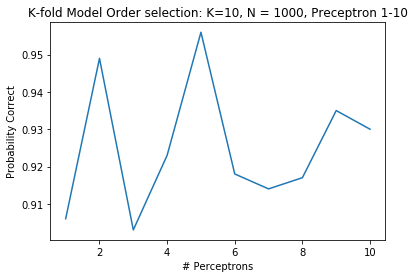

In [20]:
plt.plot(np.arange(1,11), model_means)
plt.title('K-fold Model Order selection: K=10, N = 1000, Preceptron 1-10')
plt.xlabel('# Perceptrons')
plt.ylabel('Probability Correct')
plt.show

In [21]:
y_testfinal = keras.utils.to_categorical(L, num_classes = 4)
model = Sequential()
# Dense(n) is a fully-connected layer with n hidden units.
# in the first layer, you must specify the expected input data shape:
# here, 3-dimensional vectors.
model.add(Dense(model_order, activation='sigmoid', input_dim=3))
model.add(Dense(4, activation='softmax'))
sgd = SGD(lr=0.01, decay=1e-6, momentum=0.9, nesterov=True)
model.compile(loss='categorical_crossentropy',
            optimizer=sgd,
            metrics=['accuracy'])
converged = 0
tmp = 0
epsilon = 0.001
while not converged:
    model.fit(x_data, y_data, batch_size=None, epochs=50)
    score = model.evaluate(x, y_testfinal)
    converged = np.abs(score[1]-tmp)<epsilon
    tmp = score[1]
print("Accuracy on Test Data (1 being 100%): " + str(score[1]))

Epoch 1/50
1000/1000 [==============================] - 0s 76us/step - loss: 1.4394 - accuracy: 0.3770
Epoch 2/50
1000/1000 [==============================] - 0s 25us/step - loss: 0.8822 - accuracy: 0.6800
Epoch 3/50
1000/1000 [==============================] - 0s 26us/step - loss: 0.7167 - accuracy: 0.8320
Epoch 4/50
1000/1000 [==============================] - 0s 24us/step - loss: 0.6013 - accuracy: 0.8420
Epoch 5/50
1000/1000 [==============================] - 0s 22us/step - loss: 0.5192 - accuracy: 0.8460
Epoch 6/50
1000/1000 [==============================] - 0s 23us/step - loss: 0.4586 - accuracy: 0.8480
Epoch 7/50
1000/1000 [==============================] - 0s 21us/step - loss: 0.4124 - accuracy: 0.8810
Epoch 8/50
1000/1000 [==============================] - 0s 23us/step - loss: 0.3762 - accuracy: 0.9130
Epoch 9/50
1000/1000 [==============================] - 0s 25us/step - loss: 0.3476 - accuracy: 0.9330
Epoch 10/50
1000/1000 [==============================] - 0s 22us/step - l

1000/1000 [==============================] - 0s 26us/step - loss: 0.1382 - accuracy: 0.9550
Epoch 30/50
1000/1000 [==============================] - 0s 26us/step - loss: 0.1373 - accuracy: 0.9590
Epoch 31/50
1000/1000 [==============================] - 0s 25us/step - loss: 0.1367 - accuracy: 0.9580
Epoch 32/50
1000/1000 [==============================] - 0s 24us/step - loss: 0.1363 - accuracy: 0.9580
Epoch 33/50
1000/1000 [==============================] - 0s 23us/step - loss: 0.1364 - accuracy: 0.9580
Epoch 34/50
1000/1000 [==============================] - 0s 21us/step - loss: 0.1358 - accuracy: 0.9600
Epoch 35/50
1000/1000 [==============================] - 0s 21us/step - loss: 0.1360 - accuracy: 0.9580
Epoch 36/50
1000/1000 [==============================] - 0s 21us/step - loss: 0.1353 - accuracy: 0.9570
Epoch 37/50
1000/1000 [==============================] - 0s 20us/step - loss: 0.1347 - accuracy: 0.9600
Epoch 38/50
1000/1000 [==============================] - 0s 21us/step - loss

In [22]:
score[1]

0.9415000081062317

In [23]:
NN_predict = model.predict(x)
decision = np.argmax(NN_predict,axis=1)
confusion_matrix(L, decision, labels=[0, 1, 2, 3])

array([[2865,  235,    3,   42],
       [ 108, 3794,   68,    1],
       [   1,   82, 1788,   16],
       [  24,    1,    4,  968]])

In [24]:
#10,000 sample size training
accuracy = np.zeros((10,10))
x_data = x_test10000
y_data = keras.utils.to_categorical(Ltest_10000, num_classes=4) #keras.utils.to_categorical(np.random.randint(10, size=(1000, 1)), num_classes=10)
#x_test = np.random.random((100, 20))
#y_test = keras.utils.to_categorical(np.random.randint(10, size=(100, 1)), num_classes=10)
kf = KFold(n_splits=10)
j = 0
for train_index, test_index in kf.split(x_data):
    print("TRAIN:", train_index, "TEST:", test_index)
    x_train, x_test = x_data[train_index], x_data[test_index]
    y_train, y_test = y_data[train_index], y_data[test_index]
    for i in range(1,11):
        model = Sequential()
        # Dense(64) is a fully-connected layer with 64 hidden units.
        # in the first layer, you must specify the expected input data shape:
        # here, 3-dimensional vectors.
        model.add(Dense(i, activation='sigmoid', input_dim=3))
        model.add(Dense(4, activation='softmax'))
        sgd = SGD(lr=0.01, decay=1e-6, momentum=0.9, nesterov=True)
        model.compile(loss='categorical_crossentropy',
                    optimizer=sgd,
                    metrics=['accuracy'])
        converged = 0
        tmp = 0
        epsilon = 0.001
        while not converged:
            model.fit(x_train, y_train, batch_size=None, epochs=50)
            score = model.evaluate(x_test, y_test)
            converged = np.abs(score[1]-tmp)<epsilon
            tmp = score[1]
        accuracy[j,i-1] = score[1]
    j+=1

('TRAIN:', array([1000, 1001, 1002, ..., 9997, 9998, 9999]), 'TEST:', array([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,
        13,  14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,
        26,  27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,
        39,  40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,
        52,  53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,
        65,  66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,
        78,  79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,
        91,  92,  93,  94,  95,  96,  97,  98,  99, 100, 101, 102, 103,
       104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116,
       117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129,
       130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142,
       143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155,
       156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167,

9000/9000 [==============================] - 0s 22us/step - loss: 0.6975 - accuracy: 0.6644
Epoch 26/50
9000/9000 [==============================] - 0s 22us/step - loss: 0.6977 - accuracy: 0.6646
Epoch 27/50
9000/9000 [==============================] - 0s 23us/step - loss: 0.6969 - accuracy: 0.6642
Epoch 28/50
9000/9000 [==============================] - 0s 21us/step - loss: 0.6969 - accuracy: 0.6650
Epoch 29/50
9000/9000 [==============================] - 0s 22us/step - loss: 0.6963 - accuracy: 0.6649
Epoch 30/50
9000/9000 [==============================] - 0s 21us/step - loss: 0.6960 - accuracy: 0.6649
Epoch 31/50
9000/9000 [==============================] - 0s 23us/step - loss: 0.6960 - accuracy: 0.6644
Epoch 32/50
9000/9000 [==============================] - 0s 20us/step - loss: 0.6949 - accuracy: 0.6647
Epoch 33/50
9000/9000 [==============================] - 0s 19us/step - loss: 0.6947 - accuracy: 0.6649
Epoch 34/50
9000/9000 [==============================] - 0s 20us/step - loss

9000/9000 [==============================] - 0s 21us/step - loss: 0.6281 - accuracy: 0.7103
Epoch 3/50
9000/9000 [==============================] - 0s 20us/step - loss: 0.6251 - accuracy: 0.7178
Epoch 4/50
9000/9000 [==============================] - 0s 21us/step - loss: 0.6222 - accuracy: 0.7172
Epoch 5/50
9000/9000 [==============================] - 0s 23us/step - loss: 0.6219 - accuracy: 0.7232
Epoch 6/50
9000/9000 [==============================] - 0s 23us/step - loss: 0.6188 - accuracy: 0.7250
Epoch 7/50
9000/9000 [==============================] - 0s 23us/step - loss: 0.6172 - accuracy: 0.7313
Epoch 8/50
9000/9000 [==============================] - 0s 21us/step - loss: 0.6153 - accuracy: 0.7358
Epoch 9/50
9000/9000 [==============================] - 0s 20us/step - loss: 0.6136 - accuracy: 0.7358
Epoch 10/50
9000/9000 [==============================] - 0s 18us/step - loss: 0.6142 - accuracy: 0.7390
Epoch 11/50
9000/9000 [==============================] - 0s 19us/step - loss: 0.612

9000/9000 [==============================] - 0s 19us/step - loss: 0.5752 - accuracy: 0.7610
Epoch 31/50
9000/9000 [==============================] - 0s 19us/step - loss: 0.5753 - accuracy: 0.7597
Epoch 32/50
9000/9000 [==============================] - 0s 20us/step - loss: 0.5730 - accuracy: 0.7596
Epoch 33/50
9000/9000 [==============================] - 0s 20us/step - loss: 0.5729 - accuracy: 0.7646
Epoch 34/50
9000/9000 [==============================] - 0s 19us/step - loss: 0.5724 - accuracy: 0.7628
Epoch 35/50
9000/9000 [==============================] - 0s 18us/step - loss: 0.5731 - accuracy: 0.7610
Epoch 36/50
9000/9000 [==============================] - 0s 19us/step - loss: 0.5697 - accuracy: 0.7656
Epoch 37/50
9000/9000 [==============================] - 0s 19us/step - loss: 0.5720 - accuracy: 0.7640
Epoch 38/50
9000/9000 [==============================] - 0s 19us/step - loss: 0.5734 - accuracy: 0.7600
Epoch 39/50
9000/9000 [==============================] - 0s 19us/step - loss

9000/9000 [==============================] - 0s 19us/step - loss: 0.5653 - accuracy: 0.7638
Epoch 8/50
9000/9000 [==============================] - 0s 20us/step - loss: 0.5655 - accuracy: 0.7677
Epoch 9/50
9000/9000 [==============================] - 0s 18us/step - loss: 0.5636 - accuracy: 0.7641
Epoch 10/50
9000/9000 [==============================] - 0s 18us/step - loss: 0.5669 - accuracy: 0.7638
Epoch 11/50
9000/9000 [==============================] - 0s 19us/step - loss: 0.5646 - accuracy: 0.7651
Epoch 12/50
9000/9000 [==============================] - 0s 19us/step - loss: 0.5651 - accuracy: 0.7657
Epoch 13/50
9000/9000 [==============================] - 0s 19us/step - loss: 0.5671 - accuracy: 0.7590
Epoch 14/50
9000/9000 [==============================] - 0s 18us/step - loss: 0.5671 - accuracy: 0.7588
Epoch 15/50
9000/9000 [==============================] - 0s 19us/step - loss: 0.5624 - accuracy: 0.7623
Epoch 16/50
9000/9000 [==============================] - 0s 18us/step - loss: 

9000/9000 [==============================] - 0s 23us/step - loss: 0.5596 - accuracy: 0.7691
Epoch 36/50
9000/9000 [==============================] - 0s 25us/step - loss: 0.5637 - accuracy: 0.7618
Epoch 37/50
9000/9000 [==============================] - 0s 24us/step - loss: 0.5640 - accuracy: 0.7619
Epoch 38/50
9000/9000 [==============================] - 0s 23us/step - loss: 0.5638 - accuracy: 0.7617
Epoch 39/50
9000/9000 [==============================] - 0s 25us/step - loss: 0.5635 - accuracy: 0.7636
Epoch 40/50
9000/9000 [==============================] - 0s 20us/step - loss: 0.5620 - accuracy: 0.7627
Epoch 41/50
9000/9000 [==============================] - 0s 19us/step - loss: 0.5616 - accuracy: 0.7609
Epoch 42/50
9000/9000 [==============================] - 0s 19us/step - loss: 0.5623 - accuracy: 0.7594
Epoch 43/50
9000/9000 [==============================] - 0s 19us/step - loss: 0.5611 - accuracy: 0.7630
Epoch 44/50
9000/9000 [==============================] - 0s 19us/step - loss

Epoch 13/50
9000/9000 [==============================] - 0s 19us/step - loss: 0.5589 - accuracy: 0.7644
Epoch 14/50
9000/9000 [==============================] - 0s 19us/step - loss: 0.5603 - accuracy: 0.7607
Epoch 15/50
9000/9000 [==============================] - 0s 19us/step - loss: 0.5591 - accuracy: 0.7656
Epoch 16/50
9000/9000 [==============================] - 0s 19us/step - loss: 0.5603 - accuracy: 0.7654
Epoch 17/50
9000/9000 [==============================] - 0s 19us/step - loss: 0.5635 - accuracy: 0.7650
Epoch 18/50
9000/9000 [==============================] - 0s 19us/step - loss: 0.5611 - accuracy: 0.7653
Epoch 19/50
9000/9000 [==============================] - 0s 19us/step - loss: 0.5589 - accuracy: 0.7657
Epoch 20/50
9000/9000 [==============================] - 0s 20us/step - loss: 0.5618 - accuracy: 0.7601
Epoch 21/50
9000/9000 [==============================] - 0s 19us/step - loss: 0.5594 - accuracy: 0.7642
Epoch 22/50
9000/9000 [==============================] - 0s 19us

9000/9000 [==============================] - 0s 20us/step - loss: 0.5605 - accuracy: 0.7637
Epoch 42/50
9000/9000 [==============================] - 0s 19us/step - loss: 0.5553 - accuracy: 0.7640
Epoch 43/50
9000/9000 [==============================] - 0s 19us/step - loss: 0.5576 - accuracy: 0.7641
Epoch 44/50
9000/9000 [==============================] - 0s 19us/step - loss: 0.5578 - accuracy: 0.7614
Epoch 45/50
9000/9000 [==============================] - 0s 19us/step - loss: 0.5572 - accuracy: 0.7639
Epoch 46/50
9000/9000 [==============================] - 0s 20us/step - loss: 0.5573 - accuracy: 0.7646
Epoch 47/50
9000/9000 [==============================] - 0s 18us/step - loss: 0.5575 - accuracy: 0.7648
Epoch 48/50
9000/9000 [==============================] - 0s 19us/step - loss: 0.5572 - accuracy: 0.7624
Epoch 49/50
9000/9000 [==============================] - 0s 19us/step - loss: 0.5560 - accuracy: 0.7650
Epoch 50/50
1000/1000 [==============================] - 0s 13us/step
Epoch 

Epoch 19/50
9000/9000 [==============================] - 0s 19us/step - loss: 0.5569 - accuracy: 0.7654
Epoch 20/50
9000/9000 [==============================] - 0s 18us/step - loss: 0.5549 - accuracy: 0.7623
Epoch 21/50
9000/9000 [==============================] - 0s 19us/step - loss: 0.5567 - accuracy: 0.7642
Epoch 22/50
9000/9000 [==============================] - 0s 19us/step - loss: 0.5578 - accuracy: 0.7668
Epoch 23/50
9000/9000 [==============================] - 0s 19us/step - loss: 0.5552 - accuracy: 0.7672
Epoch 24/50
9000/9000 [==============================] - 0s 19us/step - loss: 0.5530 - accuracy: 0.7662
Epoch 25/50
9000/9000 [==============================] - 0s 19us/step - loss: 0.5556 - accuracy: 0.7649
Epoch 26/50
9000/9000 [==============================] - 0s 20us/step - loss: 0.5560 - accuracy: 0.7674
Epoch 27/50
9000/9000 [==============================] - 0s 18us/step - loss: 0.5561 - accuracy: 0.7628
Epoch 28/50
9000/9000 [==============================] - 0s 18us

9000/9000 [==============================] - 0s 19us/step - loss: 0.5581 - accuracy: 0.7664
Epoch 48/50
9000/9000 [==============================] - 0s 19us/step - loss: 0.5580 - accuracy: 0.7650
Epoch 49/50
9000/9000 [==============================] - 0s 19us/step - loss: 0.5585 - accuracy: 0.7601
Epoch 50/50
1000/1000 [==============================] - 0s 13us/step
Epoch 1/50
9000/9000 [==============================] - 0s 19us/step - loss: 0.5532 - accuracy: 0.7662
Epoch 2/50
9000/9000 [==============================] - 0s 20us/step - loss: 0.5542 - accuracy: 0.7637
Epoch 3/50
9000/9000 [==============================] - 0s 19us/step - loss: 0.5553 - accuracy: 0.7666
Epoch 4/50
9000/9000 [==============================] - 0s 20us/step - loss: 0.5569 - accuracy: 0.7657
Epoch 5/50
9000/9000 [==============================] - 0s 20us/step - loss: 0.5549 - accuracy: 0.7676
Epoch 6/50
9000/9000 [==============================] - 0s 19us/step - loss: 0.5541 - accuracy: 0.7687
Epoch 7/50
9

Epoch 25/50
9000/9000 [==============================] - 0s 19us/step - loss: 0.5581 - accuracy: 0.7626
Epoch 26/50
9000/9000 [==============================] - 0s 19us/step - loss: 0.5554 - accuracy: 0.7661
Epoch 27/50
9000/9000 [==============================] - 0s 18us/step - loss: 0.5547 - accuracy: 0.7624
Epoch 28/50
9000/9000 [==============================] - 0s 20us/step - loss: 0.5562 - accuracy: 0.7641
Epoch 29/50
9000/9000 [==============================] - 0s 19us/step - loss: 0.5566 - accuracy: 0.7660
Epoch 30/50
9000/9000 [==============================] - 0s 19us/step - loss: 0.5546 - accuracy: 0.7679
Epoch 31/50
9000/9000 [==============================] - 0s 18us/step - loss: 0.5592 - accuracy: 0.7624
Epoch 32/50
9000/9000 [==============================] - 0s 19us/step - loss: 0.5586 - accuracy: 0.7622
Epoch 33/50
9000/9000 [==============================] - 0s 19us/step - loss: 0.5544 - accuracy: 0.7677
Epoch 34/50
9000/9000 [==============================] - 0s 19us

9000/9000 [==============================] - 0s 20us/step - loss: 0.5593 - accuracy: 0.7606
Epoch 3/50
9000/9000 [==============================] - 0s 19us/step - loss: 0.5553 - accuracy: 0.7642
Epoch 4/50
9000/9000 [==============================] - 0s 20us/step - loss: 0.5519 - accuracy: 0.7649
Epoch 5/50
9000/9000 [==============================] - 0s 19us/step - loss: 0.5543 - accuracy: 0.7654
Epoch 6/50
9000/9000 [==============================] - 0s 19us/step - loss: 0.5547 - accuracy: 0.7638
Epoch 7/50
9000/9000 [==============================] - 0s 18us/step - loss: 0.5544 - accuracy: 0.7668
Epoch 8/50
9000/9000 [==============================] - 0s 19us/step - loss: 0.5566 - accuracy: 0.7610
Epoch 9/50
9000/9000 [==============================] - 0s 18us/step - loss: 0.5544 - accuracy: 0.7670
Epoch 10/50
9000/9000 [==============================] - 0s 19us/step - loss: 0.5522 - accuracy: 0.7650
Epoch 11/50
9000/9000 [==============================] - 0s 19us/step - loss: 0.552

9000/9000 [==============================] - 0s 20us/step - loss: 0.5510 - accuracy: 0.7669
Epoch 31/50
9000/9000 [==============================] - 0s 19us/step - loss: 0.5536 - accuracy: 0.7670
Epoch 32/50
9000/9000 [==============================] - 0s 19us/step - loss: 0.5541 - accuracy: 0.7656
Epoch 33/50
9000/9000 [==============================] - 0s 19us/step - loss: 0.5531 - accuracy: 0.7654
Epoch 34/50
9000/9000 [==============================] - 0s 19us/step - loss: 0.5530 - accuracy: 0.7692
Epoch 35/50
9000/9000 [==============================] - 0s 18us/step - loss: 0.5563 - accuracy: 0.7697
Epoch 36/50
9000/9000 [==============================] - 0s 19us/step - loss: 0.5539 - accuracy: 0.7656
Epoch 37/50
9000/9000 [==============================] - 0s 19us/step - loss: 0.5544 - accuracy: 0.7653
Epoch 38/50
9000/9000 [==============================] - 0s 18us/step - loss: 0.5561 - accuracy: 0.7629
Epoch 39/50
9000/9000 [==============================] - 0s 18us/step - loss

9000/9000 [==============================] - 0s 19us/step - loss: 0.1483 - accuracy: 0.9463
Epoch 8/50
9000/9000 [==============================] - 0s 19us/step - loss: 0.1473 - accuracy: 0.9469
Epoch 9/50
9000/9000 [==============================] - 0s 19us/step - loss: 0.1479 - accuracy: 0.9454
Epoch 10/50
9000/9000 [==============================] - 0s 19us/step - loss: 0.1479 - accuracy: 0.9468
Epoch 11/50
9000/9000 [==============================] - 0s 19us/step - loss: 0.1479 - accuracy: 0.9461
Epoch 12/50
9000/9000 [==============================] - 0s 19us/step - loss: 0.1468 - accuracy: 0.9472
Epoch 13/50
9000/9000 [==============================] - 0s 19us/step - loss: 0.1466 - accuracy: 0.9468
Epoch 14/50
9000/9000 [==============================] - 0s 19us/step - loss: 0.1478 - accuracy: 0.9478
Epoch 15/50
9000/9000 [==============================] - 0s 19us/step - loss: 0.1468 - accuracy: 0.9468
Epoch 16/50
9000/9000 [==============================] - 0s 19us/step - loss: 

9000/9000 [==============================] - 0s 19us/step - loss: 0.1431 - accuracy: 0.9473
Epoch 36/50
9000/9000 [==============================] - 0s 19us/step - loss: 0.1422 - accuracy: 0.9462
Epoch 37/50
9000/9000 [==============================] - 0s 19us/step - loss: 0.1424 - accuracy: 0.9486
Epoch 38/50
9000/9000 [==============================] - 0s 19us/step - loss: 0.1437 - accuracy: 0.9481
Epoch 39/50
9000/9000 [==============================] - 0s 19us/step - loss: 0.1429 - accuracy: 0.9479
Epoch 40/50
9000/9000 [==============================] - 0s 19us/step - loss: 0.1428 - accuracy: 0.9470
Epoch 41/50
9000/9000 [==============================] - 0s 19us/step - loss: 0.1437 - accuracy: 0.9473
Epoch 42/50
9000/9000 [==============================] - 0s 19us/step - loss: 0.1431 - accuracy: 0.9470
Epoch 43/50
9000/9000 [==============================] - 0s 19us/step - loss: 0.1417 - accuracy: 0.9483
Epoch 44/50
9000/9000 [==============================] - 0s 19us/step - loss

Epoch 13/50
9000/9000 [==============================] - 0s 19us/step - loss: 0.1404 - accuracy: 0.9482
Epoch 14/50
9000/9000 [==============================] - 0s 19us/step - loss: 0.1436 - accuracy: 0.9468
Epoch 15/50
9000/9000 [==============================] - 0s 19us/step - loss: 0.1431 - accuracy: 0.9462
Epoch 16/50
9000/9000 [==============================] - 0s 19us/step - loss: 0.1411 - accuracy: 0.9491
Epoch 17/50
9000/9000 [==============================] - 0s 19us/step - loss: 0.1438 - accuracy: 0.9461
Epoch 18/50
9000/9000 [==============================] - 0s 20us/step - loss: 0.1420 - accuracy: 0.9467
Epoch 19/50
9000/9000 [==============================] - 0s 19us/step - loss: 0.1408 - accuracy: 0.9473
Epoch 20/50
9000/9000 [==============================] - 0s 19us/step - loss: 0.1425 - accuracy: 0.9468
Epoch 21/50
9000/9000 [==============================] - 0s 19us/step - loss: 0.1411 - accuracy: 0.9479
Epoch 22/50
9000/9000 [==============================] - 0s 19us

9000/9000 [==============================] - 0s 19us/step - loss: 0.1419 - accuracy: 0.9461
Epoch 42/50
9000/9000 [==============================] - 0s 19us/step - loss: 0.1400 - accuracy: 0.9487
Epoch 43/50
9000/9000 [==============================] - 0s 19us/step - loss: 0.1421 - accuracy: 0.9457
Epoch 44/50
9000/9000 [==============================] - 0s 19us/step - loss: 0.1428 - accuracy: 0.9471
Epoch 45/50
9000/9000 [==============================] - 0s 19us/step - loss: 0.1431 - accuracy: 0.9486
Epoch 46/50
9000/9000 [==============================] - 0s 19us/step - loss: 0.1417 - accuracy: 0.9483
Epoch 47/50
9000/9000 [==============================] - 0s 19us/step - loss: 0.1410 - accuracy: 0.9477
Epoch 48/50
9000/9000 [==============================] - 0s 19us/step - loss: 0.1408 - accuracy: 0.9470
Epoch 49/50
9000/9000 [==============================] - 0s 19us/step - loss: 0.1418 - accuracy: 0.9482
Epoch 50/50
1000/1000 [==============================] - 0s 12us/step
Epoch 

Epoch 19/50
9000/9000 [==============================] - 0s 19us/step - loss: 0.1404 - accuracy: 0.9483
Epoch 20/50
9000/9000 [==============================] - 0s 19us/step - loss: 0.1412 - accuracy: 0.9480
Epoch 21/50
9000/9000 [==============================] - 0s 19us/step - loss: 0.1403 - accuracy: 0.9471
Epoch 22/50
9000/9000 [==============================] - 0s 19us/step - loss: 0.1408 - accuracy: 0.9456
Epoch 23/50
9000/9000 [==============================] - 0s 19us/step - loss: 0.1411 - accuracy: 0.9464
Epoch 24/50
9000/9000 [==============================] - 0s 19us/step - loss: 0.1411 - accuracy: 0.9478
Epoch 25/50
9000/9000 [==============================] - 0s 19us/step - loss: 0.1422 - accuracy: 0.9471
Epoch 26/50
9000/9000 [==============================] - 0s 19us/step - loss: 0.1410 - accuracy: 0.9477
Epoch 27/50
9000/9000 [==============================] - 0s 19us/step - loss: 0.1415 - accuracy: 0.9460
Epoch 28/50
9000/9000 [==============================] - 0s 19us

9000/9000 [==============================] - 0s 19us/step - loss: 0.1442 - accuracy: 0.9474
Epoch 48/50
9000/9000 [==============================] - 0s 19us/step - loss: 0.1434 - accuracy: 0.9476
Epoch 49/50
9000/9000 [==============================] - 0s 19us/step - loss: 0.1441 - accuracy: 0.9472
Epoch 50/50
1000/1000 [==============================] - 0s 34us/step
Epoch 1/50
9000/9000 [==============================] - 0s 19us/step - loss: 0.1432 - accuracy: 0.9461
Epoch 2/50
9000/9000 [==============================] - 0s 19us/step - loss: 0.1436 - accuracy: 0.9460
Epoch 3/50
9000/9000 [==============================] - 0s 19us/step - loss: 0.1430 - accuracy: 0.9468
Epoch 4/50
9000/9000 [==============================] - 0s 19us/step - loss: 0.1425 - accuracy: 0.9473
Epoch 5/50
9000/9000 [==============================] - 0s 19us/step - loss: 0.1423 - accuracy: 0.9476
Epoch 6/50
9000/9000 [==============================] - 0s 19us/step - loss: 0.1422 - accuracy: 0.9480
Epoch 7/50
9

Epoch 25/50
9000/9000 [==============================] - 0s 19us/step - loss: 0.1330 - accuracy: 0.9512
Epoch 26/50
9000/9000 [==============================] - 0s 19us/step - loss: 0.1331 - accuracy: 0.9494
Epoch 27/50
9000/9000 [==============================] - 0s 19us/step - loss: 0.1331 - accuracy: 0.9494
Epoch 28/50
9000/9000 [==============================] - 0s 19us/step - loss: 0.1337 - accuracy: 0.9492
Epoch 29/50
9000/9000 [==============================] - 0s 19us/step - loss: 0.1333 - accuracy: 0.9494
Epoch 30/50
9000/9000 [==============================] - 0s 19us/step - loss: 0.1332 - accuracy: 0.9502
Epoch 31/50
9000/9000 [==============================] - 0s 19us/step - loss: 0.1342 - accuracy: 0.9497
Epoch 32/50
9000/9000 [==============================] - 0s 19us/step - loss: 0.1324 - accuracy: 0.9516
Epoch 33/50
9000/9000 [==============================] - 0s 19us/step - loss: 0.1336 - accuracy: 0.9502
Epoch 34/50
9000/9000 [==============================] - 0s 19us

9000/9000 [==============================] - 0s 19us/step - loss: 0.3477 - accuracy: 0.9344
Epoch 3/50
9000/9000 [==============================] - 0s 19us/step - loss: 0.2454 - accuracy: 0.9403
Epoch 4/50
9000/9000 [==============================] - 0s 19us/step - loss: 0.2108 - accuracy: 0.9429
Epoch 5/50
9000/9000 [==============================] - 0s 19us/step - loss: 0.1932 - accuracy: 0.9442
Epoch 6/50
9000/9000 [==============================] - 0s 19us/step - loss: 0.1825 - accuracy: 0.9449
Epoch 7/50
9000/9000 [==============================] - 0s 19us/step - loss: 0.1746 - accuracy: 0.9453
Epoch 8/50
9000/9000 [==============================] - 0s 19us/step - loss: 0.1681 - accuracy: 0.9453
Epoch 9/50
9000/9000 [==============================] - 0s 19us/step - loss: 0.1632 - accuracy: 0.9482
Epoch 10/50
9000/9000 [==============================] - 0s 19us/step - loss: 0.1588 - accuracy: 0.9470
Epoch 11/50
9000/9000 [==============================] - 0s 19us/step - loss: 0.154

9000/9000 [==============================] - 0s 19us/step - loss: 0.1195 - accuracy: 0.9567
Epoch 31/50
9000/9000 [==============================] - 0s 19us/step - loss: 0.1190 - accuracy: 0.9561
Epoch 32/50
9000/9000 [==============================] - 0s 19us/step - loss: 0.1190 - accuracy: 0.9554
Epoch 33/50
9000/9000 [==============================] - 0s 19us/step - loss: 0.1183 - accuracy: 0.9559
Epoch 34/50
9000/9000 [==============================] - 0s 19us/step - loss: 0.1187 - accuracy: 0.9572
Epoch 35/50
9000/9000 [==============================] - 0s 20us/step - loss: 0.1190 - accuracy: 0.9556
Epoch 36/50
9000/9000 [==============================] - 0s 19us/step - loss: 0.1186 - accuracy: 0.9559
Epoch 37/50
9000/9000 [==============================] - 0s 19us/step - loss: 0.1178 - accuracy: 0.9568
Epoch 38/50
9000/9000 [==============================] - 0s 19us/step - loss: 0.1186 - accuracy: 0.9564
Epoch 39/50
9000/9000 [==============================] - 0s 19us/step - loss

9000/9000 [==============================] - 0s 19us/step - loss: 0.1198 - accuracy: 0.9563
Epoch 8/50
9000/9000 [==============================] - 0s 19us/step - loss: 0.1199 - accuracy: 0.9567
Epoch 9/50
9000/9000 [==============================] - 0s 19us/step - loss: 0.1193 - accuracy: 0.9567
Epoch 10/50
9000/9000 [==============================] - 0s 19us/step - loss: 0.1198 - accuracy: 0.9571
Epoch 11/50
9000/9000 [==============================] - 0s 19us/step - loss: 0.1189 - accuracy: 0.9569
Epoch 12/50
9000/9000 [==============================] - 0s 19us/step - loss: 0.1194 - accuracy: 0.9570
Epoch 13/50
9000/9000 [==============================] - 0s 19us/step - loss: 0.1194 - accuracy: 0.9548
Epoch 14/50
9000/9000 [==============================] - 0s 19us/step - loss: 0.1190 - accuracy: 0.9568
Epoch 15/50
9000/9000 [==============================] - 0s 19us/step - loss: 0.1180 - accuracy: 0.9560
Epoch 16/50
9000/9000 [==============================] - 0s 19us/step - loss: 

9000/9000 [==============================] - 0s 19us/step - loss: 0.1156 - accuracy: 0.9570
Epoch 36/50
9000/9000 [==============================] - 0s 19us/step - loss: 0.1155 - accuracy: 0.9573
Epoch 37/50
9000/9000 [==============================] - 0s 19us/step - loss: 0.1162 - accuracy: 0.9570
Epoch 38/50
9000/9000 [==============================] - 0s 19us/step - loss: 0.1155 - accuracy: 0.9571
Epoch 39/50
9000/9000 [==============================] - 0s 19us/step - loss: 0.1155 - accuracy: 0.9570
Epoch 40/50
9000/9000 [==============================] - 0s 19us/step - loss: 0.1158 - accuracy: 0.9577
Epoch 41/50
9000/9000 [==============================] - 0s 19us/step - loss: 0.1156 - accuracy: 0.9577
Epoch 42/50
9000/9000 [==============================] - 0s 19us/step - loss: 0.1159 - accuracy: 0.9576
Epoch 43/50
9000/9000 [==============================] - 0s 19us/step - loss: 0.1156 - accuracy: 0.9556
Epoch 44/50
9000/9000 [==============================] - 0s 19us/step - loss

Epoch 13/50
9000/9000 [==============================] - 0s 19us/step - loss: 0.1146 - accuracy: 0.9579
Epoch 14/50
9000/9000 [==============================] - 0s 19us/step - loss: 0.1147 - accuracy: 0.9574
Epoch 15/50
9000/9000 [==============================] - 0s 19us/step - loss: 0.1149 - accuracy: 0.9577
Epoch 16/50
9000/9000 [==============================] - 0s 19us/step - loss: 0.1145 - accuracy: 0.9587
Epoch 17/50
9000/9000 [==============================] - 0s 19us/step - loss: 0.1149 - accuracy: 0.9574
Epoch 18/50
9000/9000 [==============================] - 0s 19us/step - loss: 0.1145 - accuracy: 0.9573
Epoch 19/50
9000/9000 [==============================] - 0s 19us/step - loss: 0.1149 - accuracy: 0.9578
Epoch 20/50
9000/9000 [==============================] - 0s 19us/step - loss: 0.1142 - accuracy: 0.9577
Epoch 21/50
9000/9000 [==============================] - 0s 19us/step - loss: 0.1145 - accuracy: 0.9583
Epoch 22/50
9000/9000 [==============================] - 0s 19us

9000/9000 [==============================] - 0s 19us/step - loss: 0.1139 - accuracy: 0.9576
Epoch 42/50
9000/9000 [==============================] - 0s 19us/step - loss: 0.1138 - accuracy: 0.9572
Epoch 43/50
9000/9000 [==============================] - 0s 19us/step - loss: 0.1136 - accuracy: 0.9587
Epoch 44/50
9000/9000 [==============================] - 0s 19us/step - loss: 0.1141 - accuracy: 0.9567
Epoch 45/50
9000/9000 [==============================] - 0s 19us/step - loss: 0.1139 - accuracy: 0.9574
Epoch 46/50
9000/9000 [==============================] - 0s 19us/step - loss: 0.1136 - accuracy: 0.9576
Epoch 47/50
9000/9000 [==============================] - 0s 19us/step - loss: 0.1137 - accuracy: 0.9591
Epoch 48/50
9000/9000 [==============================] - 0s 19us/step - loss: 0.1139 - accuracy: 0.9583
Epoch 49/50
9000/9000 [==============================] - 0s 19us/step - loss: 0.1146 - accuracy: 0.9588
Epoch 50/50
1000/1000 [==============================] - 0s 12us/step
Epoch 

Epoch 19/50
9000/9000 [==============================] - 0s 19us/step - loss: 0.1133 - accuracy: 0.9580
Epoch 20/50
9000/9000 [==============================] - 0s 19us/step - loss: 0.1139 - accuracy: 0.9577
Epoch 21/50
9000/9000 [==============================] - 0s 19us/step - loss: 0.1132 - accuracy: 0.9591
Epoch 22/50
9000/9000 [==============================] - 0s 19us/step - loss: 0.1130 - accuracy: 0.9581
Epoch 23/50
9000/9000 [==============================] - 0s 19us/step - loss: 0.1130 - accuracy: 0.9576
Epoch 24/50
9000/9000 [==============================] - 0s 19us/step - loss: 0.1132 - accuracy: 0.9587
Epoch 25/50
9000/9000 [==============================] - 0s 19us/step - loss: 0.1132 - accuracy: 0.9584
Epoch 26/50
9000/9000 [==============================] - 0s 19us/step - loss: 0.1129 - accuracy: 0.9574
Epoch 27/50
9000/9000 [==============================] - 0s 19us/step - loss: 0.1129 - accuracy: 0.9587
Epoch 28/50
9000/9000 [==============================] - 0s 19us

9000/9000 [==============================] - 0s 19us/step - loss: 0.1125 - accuracy: 0.9583
Epoch 48/50
9000/9000 [==============================] - 0s 22us/step - loss: 0.1124 - accuracy: 0.9587
Epoch 49/50
9000/9000 [==============================] - 0s 20us/step - loss: 0.1126 - accuracy: 0.9576
Epoch 50/50
1000/1000 [==============================] - 0s 12us/step
Epoch 1/50
9000/9000 [==============================] - 0s 26us/step - loss: 0.6738 - accuracy: 0.7958
Epoch 2/50
9000/9000 [==============================] - 0s 19us/step - loss: 0.2536 - accuracy: 0.9407
Epoch 3/50
9000/9000 [==============================] - 0s 19us/step - loss: 0.1944 - accuracy: 0.9444
Epoch 4/50
9000/9000 [==============================] - 0s 19us/step - loss: 0.1744 - accuracy: 0.9457
Epoch 5/50
9000/9000 [==============================] - 0s 19us/step - loss: 0.1640 - accuracy: 0.9462
Epoch 6/50
9000/9000 [==============================] - 0s 19us/step - loss: 0.1570 - accuracy: 0.9468
Epoch 7/50
9

9000/9000 [==============================] - 0s 22us/step - loss: 0.1174 - accuracy: 0.9567
Epoch 25/50
9000/9000 [==============================] - 0s 22us/step - loss: 0.1174 - accuracy: 0.9561
Epoch 26/50
9000/9000 [==============================] - 0s 22us/step - loss: 0.1168 - accuracy: 0.9570
Epoch 27/50
9000/9000 [==============================] - 0s 22us/step - loss: 0.1167 - accuracy: 0.9569
Epoch 28/50
9000/9000 [==============================] - 0s 23us/step - loss: 0.1169 - accuracy: 0.9568
Epoch 29/50
9000/9000 [==============================] - 0s 22us/step - loss: 0.1169 - accuracy: 0.9561
Epoch 30/50
9000/9000 [==============================] - 0s 22us/step - loss: 0.1170 - accuracy: 0.9562
Epoch 31/50
9000/9000 [==============================] - 0s 22us/step - loss: 0.1167 - accuracy: 0.9564
Epoch 32/50
9000/9000 [==============================] - 0s 22us/step - loss: 0.1173 - accuracy: 0.9558
Epoch 33/50
9000/9000 [==============================] - 0s 21us/step - loss

9000/9000 [==============================] - 0s 19us/step - loss: 0.1132 - accuracy: 0.9582
Epoch 2/50
9000/9000 [==============================] - 0s 19us/step - loss: 0.1136 - accuracy: 0.9574
Epoch 3/50
9000/9000 [==============================] - 0s 19us/step - loss: 0.1132 - accuracy: 0.9580
Epoch 4/50
9000/9000 [==============================] - 0s 19us/step - loss: 0.1130 - accuracy: 0.9580
Epoch 5/50
9000/9000 [==============================] - 0s 19us/step - loss: 0.1135 - accuracy: 0.9580
Epoch 6/50
9000/9000 [==============================] - 0s 19us/step - loss: 0.1132 - accuracy: 0.9583
Epoch 7/50
9000/9000 [==============================] - 0s 19us/step - loss: 0.1131 - accuracy: 0.9573
Epoch 8/50
9000/9000 [==============================] - 0s 19us/step - loss: 0.1129 - accuracy: 0.9577
Epoch 9/50
9000/9000 [==============================] - 0s 19us/step - loss: 0.1127 - accuracy: 0.9578
Epoch 10/50
9000/9000 [==============================] - 0s 19us/step - loss: 0.1131

9000/9000 [==============================] - 0s 19us/step - loss: 0.1275 - accuracy: 0.9524
Epoch 30/50
9000/9000 [==============================] - 0s 19us/step - loss: 0.1272 - accuracy: 0.9537
Epoch 31/50
9000/9000 [==============================] - 0s 19us/step - loss: 0.1262 - accuracy: 0.9536
Epoch 32/50
9000/9000 [==============================] - 0s 19us/step - loss: 0.1259 - accuracy: 0.9538
Epoch 33/50
9000/9000 [==============================] - 0s 19us/step - loss: 0.1253 - accuracy: 0.9537
Epoch 34/50
9000/9000 [==============================] - 0s 19us/step - loss: 0.1248 - accuracy: 0.9534
Epoch 35/50
9000/9000 [==============================] - 0s 19us/step - loss: 0.1241 - accuracy: 0.9542
Epoch 36/50
9000/9000 [==============================] - 0s 19us/step - loss: 0.1237 - accuracy: 0.9544
Epoch 37/50
9000/9000 [==============================] - 0s 19us/step - loss: 0.1233 - accuracy: 0.9543
Epoch 38/50
9000/9000 [==============================] - 0s 19us/step - loss

9000/9000 [==============================] - 0s 19us/step - loss: 0.1134 - accuracy: 0.9576
Epoch 7/50
9000/9000 [==============================] - 0s 19us/step - loss: 0.1130 - accuracy: 0.9578
Epoch 8/50
9000/9000 [==============================] - 0s 19us/step - loss: 0.1126 - accuracy: 0.9582
Epoch 9/50
9000/9000 [==============================] - 0s 19us/step - loss: 0.1129 - accuracy: 0.9587
Epoch 10/50
9000/9000 [==============================] - 0s 19us/step - loss: 0.1130 - accuracy: 0.9579
Epoch 11/50
9000/9000 [==============================] - 0s 19us/step - loss: 0.1128 - accuracy: 0.9576
Epoch 12/50
9000/9000 [==============================] - 0s 19us/step - loss: 0.1125 - accuracy: 0.9577
Epoch 13/50
9000/9000 [==============================] - 0s 19us/step - loss: 0.1121 - accuracy: 0.9584
Epoch 14/50
9000/9000 [==============================] - 0s 19us/step - loss: 0.1121 - accuracy: 0.9579
Epoch 15/50
9000/9000 [==============================] - 0s 19us/step - loss: 0

9000/9000 [==============================] - 0s 19us/step - loss: 0.1110 - accuracy: 0.9581
Epoch 35/50
9000/9000 [==============================] - 0s 19us/step - loss: 0.1114 - accuracy: 0.9586
Epoch 36/50
9000/9000 [==============================] - 0s 19us/step - loss: 0.1120 - accuracy: 0.9580
Epoch 37/50
9000/9000 [==============================] - 0s 19us/step - loss: 0.1116 - accuracy: 0.9581
Epoch 38/50
9000/9000 [==============================] - 0s 19us/step - loss: 0.1109 - accuracy: 0.9577
Epoch 39/50
9000/9000 [==============================] - 0s 19us/step - loss: 0.1106 - accuracy: 0.9591
Epoch 40/50
9000/9000 [==============================] - 0s 19us/step - loss: 0.1118 - accuracy: 0.9587
Epoch 41/50
9000/9000 [==============================] - 0s 19us/step - loss: 0.1112 - accuracy: 0.9586
Epoch 42/50
9000/9000 [==============================] - 0s 19us/step - loss: 0.1113 - accuracy: 0.9578
Epoch 43/50
9000/9000 [==============================] - 0s 19us/step - loss

Epoch 12/50
9000/9000 [==============================] - 0s 19us/step - loss: 0.1107 - accuracy: 0.9586
Epoch 13/50
9000/9000 [==============================] - 0s 19us/step - loss: 0.1103 - accuracy: 0.9577
Epoch 14/50
9000/9000 [==============================] - 0s 19us/step - loss: 0.1102 - accuracy: 0.9593
Epoch 15/50
9000/9000 [==============================] - 0s 19us/step - loss: 0.1103 - accuracy: 0.9586
Epoch 16/50
9000/9000 [==============================] - 0s 19us/step - loss: 0.1102 - accuracy: 0.9589
Epoch 17/50
9000/9000 [==============================] - 0s 19us/step - loss: 0.1100 - accuracy: 0.9591
Epoch 18/50
9000/9000 [==============================] - 0s 19us/step - loss: 0.1101 - accuracy: 0.9579
Epoch 19/50
9000/9000 [==============================] - 0s 19us/step - loss: 0.1101 - accuracy: 0.9586
Epoch 20/50
9000/9000 [==============================] - 0s 19us/step - loss: 0.1104 - accuracy: 0.9591
Epoch 21/50
9000/9000 [==============================] - 0s 19us

9000/9000 [==============================] - 0s 22us/step - loss: 0.1192 - accuracy: 0.9560
Epoch 41/50
9000/9000 [==============================] - 0s 23us/step - loss: 0.1194 - accuracy: 0.9574
Epoch 42/50
9000/9000 [==============================] - 0s 21us/step - loss: 0.1189 - accuracy: 0.9558
Epoch 43/50
9000/9000 [==============================] - 0s 20us/step - loss: 0.1185 - accuracy: 0.9566
Epoch 44/50
9000/9000 [==============================] - 0s 19us/step - loss: 0.1179 - accuracy: 0.9561
Epoch 45/50
9000/9000 [==============================] - 0s 19us/step - loss: 0.1182 - accuracy: 0.9553
Epoch 46/50
9000/9000 [==============================] - 0s 18us/step - loss: 0.1174 - accuracy: 0.9571
Epoch 47/50
9000/9000 [==============================] - 0s 19us/step - loss: 0.1180 - accuracy: 0.9557
Epoch 48/50
9000/9000 [==============================] - 0s 19us/step - loss: 0.1172 - accuracy: 0.9571
Epoch 49/50
9000/9000 [==============================] - 0s 19us/step - loss

Epoch 18/50
9000/9000 [==============================] - 0s 20us/step - loss: 0.1112 - accuracy: 0.9593
Epoch 19/50
9000/9000 [==============================] - 0s 19us/step - loss: 0.1107 - accuracy: 0.9587
Epoch 20/50
9000/9000 [==============================] - 0s 19us/step - loss: 0.1112 - accuracy: 0.9586
Epoch 21/50
9000/9000 [==============================] - 0s 27us/step - loss: 0.1113 - accuracy: 0.9584
Epoch 22/50
9000/9000 [==============================] - 0s 20us/step - loss: 0.1112 - accuracy: 0.9588
Epoch 23/50
9000/9000 [==============================] - 0s 20us/step - loss: 0.1111 - accuracy: 0.9599
Epoch 24/50
9000/9000 [==============================] - 0s 19us/step - loss: 0.1110 - accuracy: 0.9588
Epoch 25/50
9000/9000 [==============================] - 0s 22us/step - loss: 0.1113 - accuracy: 0.9586
Epoch 26/50
9000/9000 [==============================] - 0s 21us/step - loss: 0.1110 - accuracy: 0.9580
Epoch 27/50
9000/9000 [==============================] - 0s 19us

9000/9000 [==============================] - 0s 19us/step - loss: 0.1100 - accuracy: 0.9597
Epoch 47/50
9000/9000 [==============================] - 0s 19us/step - loss: 0.1100 - accuracy: 0.9593
Epoch 48/50
9000/9000 [==============================] - 0s 19us/step - loss: 0.1092 - accuracy: 0.9591
Epoch 49/50
9000/9000 [==============================] - 0s 19us/step - loss: 0.1101 - accuracy: 0.9571
Epoch 50/50
1000/1000 [==============================] - 0s 12us/step
Epoch 1/50
9000/9000 [==============================] - 0s 19us/step - loss: 0.1096 - accuracy: 0.9588
Epoch 2/50
9000/9000 [==============================] - 0s 19us/step - loss: 0.1100 - accuracy: 0.9590
Epoch 3/50
9000/9000 [==============================] - 0s 19us/step - loss: 0.1089 - accuracy: 0.9584
Epoch 4/50
9000/9000 [==============================] - 0s 20us/step - loss: 0.1097 - accuracy: 0.9590
Epoch 5/50
9000/9000 [==============================] - 0s 21us/step - loss: 0.1102 - accuracy: 0.9589
Epoch 6/50


9000/9000 [==============================] - 0s 20us/step - loss: 0.1096 - accuracy: 0.9594
Epoch 24/50
9000/9000 [==============================] - 0s 20us/step - loss: 0.1094 - accuracy: 0.9586
Epoch 25/50
9000/9000 [==============================] - 0s 20us/step - loss: 0.1097 - accuracy: 0.9588
Epoch 26/50
9000/9000 [==============================] - 0s 20us/step - loss: 0.1093 - accuracy: 0.9589
Epoch 27/50
9000/9000 [==============================] - 0s 19us/step - loss: 0.1093 - accuracy: 0.9592
Epoch 28/50
9000/9000 [==============================] - 0s 20us/step - loss: 0.1093 - accuracy: 0.9588
Epoch 29/50
9000/9000 [==============================] - 0s 20us/step - loss: 0.1096 - accuracy: 0.9590
Epoch 30/50
9000/9000 [==============================] - 0s 20us/step - loss: 0.1090 - accuracy: 0.9591
Epoch 31/50
9000/9000 [==============================] - 0s 19us/step - loss: 0.1082 - accuracy: 0.9594
Epoch 32/50
9000/9000 [==============================] - 0s 19us/step - loss

1000/1000 [==============================] - 0s 14us/step
Epoch 1/50
9000/9000 [==============================] - 0s 20us/step - loss: 0.1090 - accuracy: 0.9584
Epoch 2/50
9000/9000 [==============================] - 0s 20us/step - loss: 0.1091 - accuracy: 0.9604
Epoch 3/50
9000/9000 [==============================] - 0s 19us/step - loss: 0.1088 - accuracy: 0.9582
Epoch 4/50
9000/9000 [==============================] - 0s 19us/step - loss: 0.1089 - accuracy: 0.9584
Epoch 5/50
9000/9000 [==============================] - 0s 19us/step - loss: 0.1095 - accuracy: 0.9589
Epoch 6/50
9000/9000 [==============================] - 0s 19us/step - loss: 0.1089 - accuracy: 0.9591
Epoch 7/50
9000/9000 [==============================] - 0s 19us/step - loss: 0.1090 - accuracy: 0.9592
Epoch 8/50
9000/9000 [==============================] - 0s 19us/step - loss: 0.1094 - accuracy: 0.9593
Epoch 9/50
9000/9000 [==============================] - 0s 19us/step - loss: 0.1090 - accuracy: 0.9598
Epoch 10/50
900

9000/9000 [==============================] - 0s 19us/step - loss: 0.1085 - accuracy: 0.9589
Epoch 29/50
9000/9000 [==============================] - 0s 19us/step - loss: 0.1081 - accuracy: 0.9590
Epoch 30/50
9000/9000 [==============================] - 0s 20us/step - loss: 0.1088 - accuracy: 0.9590
Epoch 31/50
9000/9000 [==============================] - 0s 19us/step - loss: 0.1087 - accuracy: 0.9593
Epoch 32/50
9000/9000 [==============================] - 0s 20us/step - loss: 0.1084 - accuracy: 0.9582
Epoch 33/50
9000/9000 [==============================] - 0s 20us/step - loss: 0.1087 - accuracy: 0.9590
Epoch 34/50
9000/9000 [==============================] - 0s 21us/step - loss: 0.1087 - accuracy: 0.9584
Epoch 35/50
9000/9000 [==============================] - 0s 21us/step - loss: 0.1094 - accuracy: 0.9580
Epoch 36/50
9000/9000 [==============================] - 0s 21us/step - loss: 0.1087 - accuracy: 0.9584
Epoch 37/50
9000/9000 [==============================] - 0s 19us/step - loss

9000/9000 [==============================] - 0s 19us/step - loss: 0.1087 - accuracy: 0.9589
Epoch 6/50
9000/9000 [==============================] - 0s 20us/step - loss: 0.1084 - accuracy: 0.9583
Epoch 7/50
9000/9000 [==============================] - 0s 22us/step - loss: 0.1085 - accuracy: 0.9598
Epoch 8/50
9000/9000 [==============================] - 0s 19us/step - loss: 0.1087 - accuracy: 0.9591
Epoch 9/50
9000/9000 [==============================] - 0s 19us/step - loss: 0.1082 - accuracy: 0.9599
Epoch 10/50
9000/9000 [==============================] - 0s 19us/step - loss: 0.1092 - accuracy: 0.9579
Epoch 11/50
9000/9000 [==============================] - 0s 19us/step - loss: 0.1088 - accuracy: 0.9589
Epoch 12/50
9000/9000 [==============================] - 0s 20us/step - loss: 0.1086 - accuracy: 0.9593
Epoch 13/50
9000/9000 [==============================] - 0s 20us/step - loss: 0.1083 - accuracy: 0.9603
Epoch 14/50
9000/9000 [==============================] - 0s 20us/step - loss: 0.

9000/9000 [==============================] - 0s 20us/step - loss: 0.1084 - accuracy: 0.9590
Epoch 34/50
9000/9000 [==============================] - 0s 20us/step - loss: 0.1087 - accuracy: 0.9586
Epoch 35/50
9000/9000 [==============================] - 0s 20us/step - loss: 0.1091 - accuracy: 0.9588
Epoch 36/50
9000/9000 [==============================] - 0s 20us/step - loss: 0.1082 - accuracy: 0.9583
Epoch 37/50
9000/9000 [==============================] - 0s 19us/step - loss: 0.1086 - accuracy: 0.9588
Epoch 38/50
9000/9000 [==============================] - 0s 19us/step - loss: 0.1086 - accuracy: 0.9594
Epoch 39/50
9000/9000 [==============================] - 0s 19us/step - loss: 0.1083 - accuracy: 0.9578
Epoch 40/50
9000/9000 [==============================] - 0s 19us/step - loss: 0.1083 - accuracy: 0.9584
Epoch 41/50
9000/9000 [==============================] - 0s 19us/step - loss: 0.1083 - accuracy: 0.9590
Epoch 42/50
9000/9000 [==============================] - 0s 19us/step - loss

Epoch 11/50
9000/9000 [==============================] - 0s 21us/step - loss: 0.1148 - accuracy: 0.9570
Epoch 12/50
9000/9000 [==============================] - 0s 21us/step - loss: 0.1151 - accuracy: 0.9573
Epoch 13/50
9000/9000 [==============================] - 0s 20us/step - loss: 0.1153 - accuracy: 0.9567
Epoch 14/50
9000/9000 [==============================] - 0s 21us/step - loss: 0.1151 - accuracy: 0.9582
Epoch 15/50
9000/9000 [==============================] - 0s 21us/step - loss: 0.1147 - accuracy: 0.9579
Epoch 16/50
9000/9000 [==============================] - 0s 19us/step - loss: 0.1145 - accuracy: 0.9579
Epoch 17/50
9000/9000 [==============================] - 0s 19us/step - loss: 0.1145 - accuracy: 0.9570
Epoch 18/50
9000/9000 [==============================] - 0s 20us/step - loss: 0.1148 - accuracy: 0.9580
Epoch 19/50
9000/9000 [==============================] - 0s 19us/step - loss: 0.1149 - accuracy: 0.9580
Epoch 20/50
9000/9000 [==============================] - 0s 20us

9000/9000 [==============================] - 0s 19us/step - loss: 0.1186 - accuracy: 0.9556
Epoch 40/50
9000/9000 [==============================] - 0s 21us/step - loss: 0.1196 - accuracy: 0.9558
Epoch 41/50
9000/9000 [==============================] - 0s 19us/step - loss: 0.1186 - accuracy: 0.9558
Epoch 42/50
9000/9000 [==============================] - 0s 21us/step - loss: 0.1184 - accuracy: 0.9554
Epoch 43/50
9000/9000 [==============================] - 0s 20us/step - loss: 0.1183 - accuracy: 0.9553
Epoch 44/50
9000/9000 [==============================] - 0s 19us/step - loss: 0.1182 - accuracy: 0.9553
Epoch 45/50
9000/9000 [==============================] - 0s 22us/step - loss: 0.1177 - accuracy: 0.9567
Epoch 46/50
9000/9000 [==============================] - 0s 20us/step - loss: 0.1175 - accuracy: 0.9571
Epoch 47/50
9000/9000 [==============================] - 0s 19us/step - loss: 0.1175 - accuracy: 0.9568
Epoch 48/50
9000/9000 [==============================] - 0s 20us/step - loss

Epoch 17/50
9000/9000 [==============================] - 0s 21us/step - loss: 0.1129 - accuracy: 0.9586
Epoch 18/50
9000/9000 [==============================] - 0s 19us/step - loss: 0.1123 - accuracy: 0.9578
Epoch 19/50
9000/9000 [==============================] - 0s 19us/step - loss: 0.1121 - accuracy: 0.9583
Epoch 20/50
9000/9000 [==============================] - 0s 19us/step - loss: 0.1123 - accuracy: 0.9589
Epoch 21/50
9000/9000 [==============================] - 0s 21us/step - loss: 0.1124 - accuracy: 0.9596
Epoch 22/50
9000/9000 [==============================] - 0s 21us/step - loss: 0.1126 - accuracy: 0.9576
Epoch 23/50
9000/9000 [==============================] - 0s 19us/step - loss: 0.1120 - accuracy: 0.9589
Epoch 24/50
9000/9000 [==============================] - 0s 23us/step - loss: 0.1121 - accuracy: 0.9592
Epoch 25/50
9000/9000 [==============================] - 0s 20us/step - loss: 0.1124 - accuracy: 0.9584
Epoch 26/50
9000/9000 [==============================] - 0s 20us

9000/9000 [==============================] - 0s 19us/step - loss: 0.1113 - accuracy: 0.9598
Epoch 46/50
9000/9000 [==============================] - 0s 19us/step - loss: 0.1108 - accuracy: 0.9587
Epoch 47/50
9000/9000 [==============================] - 0s 19us/step - loss: 0.1113 - accuracy: 0.9597
Epoch 48/50
9000/9000 [==============================] - 0s 20us/step - loss: 0.1109 - accuracy: 0.9591
Epoch 49/50
9000/9000 [==============================] - 0s 19us/step - loss: 0.1109 - accuracy: 0.9597
Epoch 50/50
1000/1000 [==============================] - 0s 16us/step
Epoch 1/50
9000/9000 [==============================] - 0s 26us/step - loss: 0.1107 - accuracy: 0.9590
Epoch 2/50
9000/9000 [==============================] - 0s 21us/step - loss: 0.1107 - accuracy: 0.9600
Epoch 3/50
9000/9000 [==============================] - 0s 19us/step - loss: 0.1110 - accuracy: 0.9579
Epoch 4/50
9000/9000 [==============================] - 0s 22us/step - loss: 0.1108 - accuracy: 0.9587
Epoch 5/50

Epoch 23/50
9000/9000 [==============================] - 0s 19us/step - loss: 0.1103 - accuracy: 0.9590
Epoch 24/50
9000/9000 [==============================] - 0s 19us/step - loss: 0.1098 - accuracy: 0.9593
Epoch 25/50
9000/9000 [==============================] - 0s 19us/step - loss: 0.1105 - accuracy: 0.9594
Epoch 26/50
9000/9000 [==============================] - 0s 19us/step - loss: 0.1095 - accuracy: 0.9592
Epoch 27/50
9000/9000 [==============================] - 0s 19us/step - loss: 0.1101 - accuracy: 0.9602
Epoch 28/50
9000/9000 [==============================] - 0s 19us/step - loss: 0.1100 - accuracy: 0.9587
Epoch 29/50
9000/9000 [==============================] - 0s 19us/step - loss: 0.1099 - accuracy: 0.9598
Epoch 30/50
9000/9000 [==============================] - 0s 19us/step - loss: 0.1097 - accuracy: 0.9589
Epoch 31/50
9000/9000 [==============================] - 0s 19us/step - loss: 0.1099 - accuracy: 0.9590
Epoch 32/50
9000/9000 [==============================] - 0s 19us

1000/1000 [==============================] - 0s 13us/step
Epoch 1/50
9000/9000 [==============================] - 0s 19us/step - loss: 0.1091 - accuracy: 0.9587
Epoch 2/50
9000/9000 [==============================] - 0s 19us/step - loss: 0.1093 - accuracy: 0.9597
Epoch 3/50
9000/9000 [==============================] - 0s 19us/step - loss: 0.1093 - accuracy: 0.9593
Epoch 4/50
9000/9000 [==============================] - 0s 19us/step - loss: 0.1092 - accuracy: 0.9586
Epoch 5/50
9000/9000 [==============================] - 0s 19us/step - loss: 0.1092 - accuracy: 0.9586
Epoch 6/50
9000/9000 [==============================] - 0s 19us/step - loss: 0.1092 - accuracy: 0.9607
Epoch 7/50
9000/9000 [==============================] - 0s 19us/step - loss: 0.1094 - accuracy: 0.9603
Epoch 8/50
9000/9000 [==============================] - 0s 19us/step - loss: 0.1092 - accuracy: 0.9602
Epoch 9/50
9000/9000 [==============================] - 0s 19us/step - loss: 0.1093 - accuracy: 0.9584
Epoch 10/50
900

9000/9000 [==============================] - 0s 20us/step - loss: 0.1087 - accuracy: 0.9592
Epoch 29/50
9000/9000 [==============================] - 0s 20us/step - loss: 0.1086 - accuracy: 0.9591
Epoch 30/50
9000/9000 [==============================] - 0s 20us/step - loss: 0.1087 - accuracy: 0.9591
Epoch 31/50
9000/9000 [==============================] - 0s 20us/step - loss: 0.1087 - accuracy: 0.9597
Epoch 32/50
9000/9000 [==============================] - 0s 19us/step - loss: 0.1084 - accuracy: 0.9601
Epoch 33/50
9000/9000 [==============================] - 0s 19us/step - loss: 0.1085 - accuracy: 0.9602
Epoch 34/50
9000/9000 [==============================] - 0s 19us/step - loss: 0.1088 - accuracy: 0.9587
Epoch 35/50
9000/9000 [==============================] - 0s 20us/step - loss: 0.1086 - accuracy: 0.9599
Epoch 36/50
9000/9000 [==============================] - 0s 20us/step - loss: 0.1083 - accuracy: 0.9599
Epoch 37/50
9000/9000 [==============================] - 0s 19us/step - loss

Epoch 1/50
9000/9000 [==============================] - 0s 28us/step - loss: 1.0011 - accuracy: 0.6218
Epoch 2/50
9000/9000 [==============================] - 0s 19us/step - loss: 0.8156 - accuracy: 0.6631
Epoch 3/50
9000/9000 [==============================] - 0s 19us/step - loss: 0.7688 - accuracy: 0.6637
Epoch 4/50
9000/9000 [==============================] - 0s 20us/step - loss: 0.7473 - accuracy: 0.6641
Epoch 5/50
9000/9000 [==============================] - 0s 19us/step - loss: 0.7349 - accuracy: 0.6657
Epoch 6/50
9000/9000 [==============================] - 0s 19us/step - loss: 0.7269 - accuracy: 0.6654
Epoch 7/50
9000/9000 [==============================] - 0s 20us/step - loss: 0.7209 - accuracy: 0.6660
Epoch 8/50
9000/9000 [==============================] - 0s 20us/step - loss: 0.7160 - accuracy: 0.6662
Epoch 9/50
9000/9000 [==============================] - 0s 21us/step - loss: 0.7113 - accuracy: 0.6654
Epoch 10/50
9000/9000 [==============================] - 0s 19us/step - l

9000/9000 [==============================] - 0s 21us/step - loss: 0.6805 - accuracy: 0.6661
Epoch 30/50
9000/9000 [==============================] - 0s 20us/step - loss: 0.6800 - accuracy: 0.6663
Epoch 31/50
9000/9000 [==============================] - 0s 19us/step - loss: 0.6795 - accuracy: 0.6653
Epoch 32/50
9000/9000 [==============================] - 0s 20us/step - loss: 0.6791 - accuracy: 0.6653
Epoch 33/50
9000/9000 [==============================] - 0s 20us/step - loss: 0.6789 - accuracy: 0.6662
Epoch 34/50
9000/9000 [==============================] - 0s 20us/step - loss: 0.6784 - accuracy: 0.6652
Epoch 35/50
9000/9000 [==============================] - 0s 18us/step - loss: 0.6771 - accuracy: 0.6667
Epoch 36/50
9000/9000 [==============================] - 0s 20us/step - loss: 0.6761 - accuracy: 0.6653
Epoch 37/50
9000/9000 [==============================] - 0s 18us/step - loss: 0.6750 - accuracy: 0.6669
Epoch 38/50
9000/9000 [==============================] - 0s 20us/step - loss

9000/9000 [==============================] - 0s 20us/step - loss: 0.5764 - accuracy: 0.7623
Epoch 7/50
9000/9000 [==============================] - 0s 19us/step - loss: 0.5770 - accuracy: 0.7637
Epoch 8/50
9000/9000 [==============================] - 0s 21us/step - loss: 0.5764 - accuracy: 0.7627
Epoch 9/50
9000/9000 [==============================] - 0s 20us/step - loss: 0.5770 - accuracy: 0.7653
Epoch 10/50
9000/9000 [==============================] - 0s 19us/step - loss: 0.5749 - accuracy: 0.7654
Epoch 11/50
9000/9000 [==============================] - 0s 20us/step - loss: 0.5759 - accuracy: 0.7632
Epoch 12/50
9000/9000 [==============================] - 0s 19us/step - loss: 0.5736 - accuracy: 0.7658
Epoch 13/50
9000/9000 [==============================] - 0s 20us/step - loss: 0.5731 - accuracy: 0.7649
Epoch 14/50
9000/9000 [==============================] - 0s 20us/step - loss: 0.5746 - accuracy: 0.7641
Epoch 15/50
9000/9000 [==============================] - 0s 20us/step - loss: 0

9000/9000 [==============================] - 0s 21us/step - loss: 0.5625 - accuracy: 0.7671
Epoch 35/50
9000/9000 [==============================] - 0s 19us/step - loss: 0.5624 - accuracy: 0.7666
Epoch 36/50
9000/9000 [==============================] - 0s 20us/step - loss: 0.5614 - accuracy: 0.7651
Epoch 37/50
9000/9000 [==============================] - 0s 21us/step - loss: 0.5644 - accuracy: 0.7642
Epoch 38/50
9000/9000 [==============================] - 0s 19us/step - loss: 0.5612 - accuracy: 0.7700
Epoch 39/50
9000/9000 [==============================] - 0s 19us/step - loss: 0.5638 - accuracy: 0.7663
Epoch 40/50
9000/9000 [==============================] - 0s 19us/step - loss: 0.5620 - accuracy: 0.7673
Epoch 41/50
9000/9000 [==============================] - 0s 18us/step - loss: 0.5632 - accuracy: 0.7609
Epoch 42/50
9000/9000 [==============================] - 0s 20us/step - loss: 0.5620 - accuracy: 0.7631
Epoch 43/50
9000/9000 [==============================] - 0s 20us/step - loss

Epoch 12/50
9000/9000 [==============================] - 0s 18us/step - loss: 0.5593 - accuracy: 0.7650
Epoch 13/50
9000/9000 [==============================] - 0s 18us/step - loss: 0.5591 - accuracy: 0.7662
Epoch 14/50
9000/9000 [==============================] - 0s 18us/step - loss: 0.5591 - accuracy: 0.7646
Epoch 15/50
9000/9000 [==============================] - 0s 18us/step - loss: 0.5604 - accuracy: 0.7653
Epoch 16/50
9000/9000 [==============================] - 0s 21us/step - loss: 0.5583 - accuracy: 0.7617
Epoch 17/50
9000/9000 [==============================] - 0s 21us/step - loss: 0.5600 - accuracy: 0.7654
Epoch 18/50
9000/9000 [==============================] - 0s 18us/step - loss: 0.5556 - accuracy: 0.7668
Epoch 19/50
9000/9000 [==============================] - 0s 19us/step - loss: 0.5577 - accuracy: 0.7661
Epoch 20/50
9000/9000 [==============================] - 0s 18us/step - loss: 0.5574 - accuracy: 0.7628
Epoch 21/50
9000/9000 [==============================] - 0s 23us

9000/9000 [==============================] - 0s 19us/step - loss: 0.5585 - accuracy: 0.7640
Epoch 40/50
9000/9000 [==============================] - 0s 18us/step - loss: 0.5546 - accuracy: 0.7679
Epoch 41/50
9000/9000 [==============================] - 0s 18us/step - loss: 0.5545 - accuracy: 0.7662
Epoch 42/50
9000/9000 [==============================] - 0s 18us/step - loss: 0.5548 - accuracy: 0.7692
Epoch 43/50
9000/9000 [==============================] - 0s 18us/step - loss: 0.5534 - accuracy: 0.7649
Epoch 44/50
9000/9000 [==============================] - 0s 19us/step - loss: 0.5554 - accuracy: 0.7677
Epoch 45/50
9000/9000 [==============================] - 0s 18us/step - loss: 0.5561 - accuracy: 0.7632
Epoch 46/50
9000/9000 [==============================] - 0s 18us/step - loss: 0.5567 - accuracy: 0.7660
Epoch 47/50
9000/9000 [==============================] - 0s 18us/step - loss: 0.5558 - accuracy: 0.7653
Epoch 48/50
9000/9000 [==============================] - 0s 18us/step - loss

Epoch 17/50
9000/9000 [==============================] - 0s 18us/step - loss: 0.5543 - accuracy: 0.7686
Epoch 18/50
9000/9000 [==============================] - 0s 18us/step - loss: 0.5527 - accuracy: 0.7677
Epoch 19/50
9000/9000 [==============================] - 0s 18us/step - loss: 0.5546 - accuracy: 0.7657
Epoch 20/50
9000/9000 [==============================] - 0s 19us/step - loss: 0.5521 - accuracy: 0.7672
Epoch 21/50
9000/9000 [==============================] - 0s 18us/step - loss: 0.5548 - accuracy: 0.7679
Epoch 22/50
9000/9000 [==============================] - 0s 18us/step - loss: 0.5527 - accuracy: 0.7677
Epoch 23/50
9000/9000 [==============================] - 0s 18us/step - loss: 0.5522 - accuracy: 0.7657
Epoch 24/50
9000/9000 [==============================] - 0s 18us/step - loss: 0.5556 - accuracy: 0.7691
Epoch 25/50
9000/9000 [==============================] - 0s 18us/step - loss: 0.5538 - accuracy: 0.7671
Epoch 26/50
9000/9000 [==============================] - 0s 18us

9000/9000 [==============================] - 0s 22us/step - loss: 0.5574 - accuracy: 0.7624
Epoch 46/50
9000/9000 [==============================] - 0s 22us/step - loss: 0.5537 - accuracy: 0.7633
Epoch 47/50
9000/9000 [==============================] - 0s 20us/step - loss: 0.5545 - accuracy: 0.7666
Epoch 48/50
9000/9000 [==============================] - 0s 19us/step - loss: 0.5529 - accuracy: 0.7666
Epoch 49/50
9000/9000 [==============================] - 0s 18us/step - loss: 0.5506 - accuracy: 0.7682
Epoch 50/50
1000/1000 [==============================] - 0s 12us/step
Epoch 1/50
9000/9000 [==============================] - 0s 19us/step - loss: 0.5570 - accuracy: 0.7643
Epoch 2/50
9000/9000 [==============================] - 0s 18us/step - loss: 0.5510 - accuracy: 0.7698
Epoch 3/50
9000/9000 [==============================] - 0s 19us/step - loss: 0.5508 - accuracy: 0.7696
Epoch 4/50
9000/9000 [==============================] - 0s 18us/step - loss: 0.5520 - accuracy: 0.7667
Epoch 5/50

Epoch 23/50
9000/9000 [==============================] - 0s 20us/step - loss: 0.5497 - accuracy: 0.7676
Epoch 24/50
9000/9000 [==============================] - 0s 18us/step - loss: 0.5534 - accuracy: 0.7644
Epoch 25/50
9000/9000 [==============================] - 0s 21us/step - loss: 0.5507 - accuracy: 0.7690
Epoch 26/50
9000/9000 [==============================] - 0s 19us/step - loss: 0.5478 - accuracy: 0.7701
Epoch 27/50
9000/9000 [==============================] - 0s 18us/step - loss: 0.5497 - accuracy: 0.7680
Epoch 28/50
9000/9000 [==============================] - 0s 19us/step - loss: 0.5527 - accuracy: 0.7674
Epoch 29/50
9000/9000 [==============================] - 0s 20us/step - loss: 0.5541 - accuracy: 0.7677
Epoch 30/50
9000/9000 [==============================] - 0s 21us/step - loss: 0.5523 - accuracy: 0.7643
Epoch 31/50
9000/9000 [==============================] - 0s 19us/step - loss: 0.5550 - accuracy: 0.7628
Epoch 32/50
9000/9000 [==============================] - 0s 20us

1000/1000 [==============================] - 0s 13us/step
Epoch 1/50
9000/9000 [==============================] - 0s 18us/step - loss: 0.5520 - accuracy: 0.7654
Epoch 2/50
9000/9000 [==============================] - 0s 20us/step - loss: 0.5549 - accuracy: 0.7621
Epoch 3/50
9000/9000 [==============================] - 0s 20us/step - loss: 0.5511 - accuracy: 0.7662
Epoch 4/50
9000/9000 [==============================] - 0s 20us/step - loss: 0.5536 - accuracy: 0.7707
Epoch 5/50
9000/9000 [==============================] - 0s 20us/step - loss: 0.5525 - accuracy: 0.7651
Epoch 6/50
9000/9000 [==============================] - 0s 19us/step - loss: 0.5495 - accuracy: 0.7701
Epoch 7/50
9000/9000 [==============================] - 0s 19us/step - loss: 0.5495 - accuracy: 0.7647
Epoch 8/50
9000/9000 [==============================] - 0s 18us/step - loss: 0.5528 - accuracy: 0.7649
Epoch 9/50
9000/9000 [==============================] - 0s 21us/step - loss: 0.5509 - accuracy: 0.7660
Epoch 10/50
900

9000/9000 [==============================] - 0s 19us/step - loss: 0.5475 - accuracy: 0.7710
Epoch 29/50
9000/9000 [==============================] - 0s 19us/step - loss: 0.5498 - accuracy: 0.7624
Epoch 30/50
9000/9000 [==============================] - 0s 19us/step - loss: 0.5534 - accuracy: 0.7672
Epoch 31/50
9000/9000 [==============================] - 0s 19us/step - loss: 0.5520 - accuracy: 0.7651
Epoch 32/50
9000/9000 [==============================] - 0s 20us/step - loss: 0.5524 - accuracy: 0.7674
Epoch 33/50
9000/9000 [==============================] - 0s 20us/step - loss: 0.5494 - accuracy: 0.7677
Epoch 34/50
9000/9000 [==============================] - 0s 19us/step - loss: 0.5527 - accuracy: 0.7649
Epoch 35/50
9000/9000 [==============================] - 0s 20us/step - loss: 0.5521 - accuracy: 0.7663
Epoch 36/50
9000/9000 [==============================] - 0s 19us/step - loss: 0.5507 - accuracy: 0.7663
Epoch 37/50
9000/9000 [==============================] - 0s 20us/step - loss

9000/9000 [==============================] - 0s 19us/step - loss: 0.5496 - accuracy: 0.7659
Epoch 6/50
9000/9000 [==============================] - 0s 21us/step - loss: 0.5501 - accuracy: 0.7668
Epoch 7/50
9000/9000 [==============================] - 0s 19us/step - loss: 0.5506 - accuracy: 0.7680
Epoch 8/50
9000/9000 [==============================] - 0s 20us/step - loss: 0.5503 - accuracy: 0.7669
Epoch 9/50
9000/9000 [==============================] - 0s 21us/step - loss: 0.5510 - accuracy: 0.7693
Epoch 10/50
9000/9000 [==============================] - 0s 21us/step - loss: 0.5479 - accuracy: 0.7716
Epoch 11/50
9000/9000 [==============================] - 0s 19us/step - loss: 0.5487 - accuracy: 0.7683
Epoch 12/50
9000/9000 [==============================] - 0s 19us/step - loss: 0.5500 - accuracy: 0.7662
Epoch 13/50
9000/9000 [==============================] - 0s 20us/step - loss: 0.5477 - accuracy: 0.7712
Epoch 14/50
9000/9000 [==============================] - 0s 19us/step - loss: 0.

9000/9000 [==============================] - 0s 19us/step - loss: 0.5489 - accuracy: 0.7690
Epoch 34/50
9000/9000 [==============================] - 0s 18us/step - loss: 0.5518 - accuracy: 0.7628
Epoch 35/50
9000/9000 [==============================] - 0s 18us/step - loss: 0.5491 - accuracy: 0.7661
Epoch 36/50
9000/9000 [==============================] - 0s 18us/step - loss: 0.5474 - accuracy: 0.7701
Epoch 37/50
9000/9000 [==============================] - 0s 18us/step - loss: 0.5515 - accuracy: 0.7691
Epoch 38/50
9000/9000 [==============================] - 0s 19us/step - loss: 0.5507 - accuracy: 0.7640
Epoch 39/50
9000/9000 [==============================] - 0s 18us/step - loss: 0.5486 - accuracy: 0.7700
Epoch 40/50
9000/9000 [==============================] - 0s 19us/step - loss: 0.5490 - accuracy: 0.7724
Epoch 41/50
9000/9000 [==============================] - 0s 19us/step - loss: 0.5492 - accuracy: 0.7693
Epoch 42/50
9000/9000 [==============================] - 0s 19us/step - loss

Epoch 11/50
9000/9000 [==============================] - 0s 19us/step - loss: 0.1461 - accuracy: 0.9494
Epoch 12/50
9000/9000 [==============================] - 0s 19us/step - loss: 0.1464 - accuracy: 0.9491
Epoch 13/50
9000/9000 [==============================] - 0s 19us/step - loss: 0.1468 - accuracy: 0.9481
Epoch 14/50
9000/9000 [==============================] - 0s 19us/step - loss: 0.1472 - accuracy: 0.9473
Epoch 15/50
9000/9000 [==============================] - 0s 19us/step - loss: 0.1449 - accuracy: 0.9476
Epoch 16/50
9000/9000 [==============================] - 0s 19us/step - loss: 0.1453 - accuracy: 0.9487
Epoch 17/50
9000/9000 [==============================] - 0s 19us/step - loss: 0.1457 - accuracy: 0.9483
Epoch 18/50
9000/9000 [==============================] - 0s 19us/step - loss: 0.1467 - accuracy: 0.9463
Epoch 19/50
9000/9000 [==============================] - 0s 19us/step - loss: 0.1454 - accuracy: 0.9473
Epoch 20/50
9000/9000 [==============================] - 0s 19us

9000/9000 [==============================] - 0s 19us/step - loss: 0.1423 - accuracy: 0.9489
Epoch 40/50
9000/9000 [==============================] - 0s 19us/step - loss: 0.1429 - accuracy: 0.9478
Epoch 41/50
9000/9000 [==============================] - 0s 19us/step - loss: 0.1417 - accuracy: 0.9489
Epoch 42/50
9000/9000 [==============================] - 0s 19us/step - loss: 0.1427 - accuracy: 0.9481
Epoch 43/50
9000/9000 [==============================] - 0s 19us/step - loss: 0.1421 - accuracy: 0.9487
Epoch 44/50
9000/9000 [==============================] - 0s 19us/step - loss: 0.1423 - accuracy: 0.9469
Epoch 45/50
9000/9000 [==============================] - 0s 18us/step - loss: 0.1428 - accuracy: 0.9479
Epoch 46/50
9000/9000 [==============================] - 0s 19us/step - loss: 0.1427 - accuracy: 0.9490
Epoch 47/50
9000/9000 [==============================] - 0s 19us/step - loss: 0.1416 - accuracy: 0.9492
Epoch 48/50
9000/9000 [==============================] - 0s 19us/step - loss

Epoch 17/50
9000/9000 [==============================] - 0s 19us/step - loss: 0.1420 - accuracy: 0.9466
Epoch 18/50
9000/9000 [==============================] - 0s 19us/step - loss: 0.1413 - accuracy: 0.9484
Epoch 19/50
9000/9000 [==============================] - 0s 19us/step - loss: 0.1408 - accuracy: 0.9479
Epoch 20/50
9000/9000 [==============================] - 0s 19us/step - loss: 0.1410 - accuracy: 0.9476
Epoch 21/50
9000/9000 [==============================] - 0s 19us/step - loss: 0.1404 - accuracy: 0.9496
Epoch 22/50
9000/9000 [==============================] - 0s 19us/step - loss: 0.1399 - accuracy: 0.9482
Epoch 23/50
9000/9000 [==============================] - 0s 19us/step - loss: 0.1415 - accuracy: 0.9481
Epoch 24/50
9000/9000 [==============================] - 0s 19us/step - loss: 0.1402 - accuracy: 0.9492
Epoch 25/50
9000/9000 [==============================] - 0s 19us/step - loss: 0.1413 - accuracy: 0.9486
Epoch 26/50
9000/9000 [==============================] - 0s 19us

9000/9000 [==============================] - 0s 19us/step - loss: 0.1404 - accuracy: 0.9482
Epoch 46/50
9000/9000 [==============================] - 0s 19us/step - loss: 0.1391 - accuracy: 0.9481
Epoch 47/50
9000/9000 [==============================] - 0s 19us/step - loss: 0.1390 - accuracy: 0.9482
Epoch 48/50
9000/9000 [==============================] - 0s 19us/step - loss: 0.1391 - accuracy: 0.9484
Epoch 49/50
9000/9000 [==============================] - 0s 21us/step - loss: 0.1389 - accuracy: 0.9481
Epoch 50/50
1000/1000 [==============================] - 0s 35us/step
Epoch 1/50
9000/9000 [==============================] - 0s 19us/step - loss: 0.1385 - accuracy: 0.9478
Epoch 2/50
9000/9000 [==============================] - 0s 23us/step - loss: 0.1387 - accuracy: 0.9481
Epoch 3/50
9000/9000 [==============================] - 0s 22us/step - loss: 0.1380 - accuracy: 0.9491
Epoch 4/50
9000/9000 [==============================] - 0s 21us/step - loss: 0.1379 - accuracy: 0.9484
Epoch 5/50

Epoch 23/50
9000/9000 [==============================] - 0s 19us/step - loss: 0.1293 - accuracy: 0.9550
Epoch 24/50
9000/9000 [==============================] - 0s 21us/step - loss: 0.1284 - accuracy: 0.9544
Epoch 25/50
9000/9000 [==============================] - 0s 20us/step - loss: 0.1291 - accuracy: 0.9522
Epoch 26/50
9000/9000 [==============================] - 0s 21us/step - loss: 0.1293 - accuracy: 0.9536
Epoch 27/50
9000/9000 [==============================] - 0s 20us/step - loss: 0.1290 - accuracy: 0.9527
Epoch 28/50
9000/9000 [==============================] - 0s 19us/step - loss: 0.1295 - accuracy: 0.9536
Epoch 29/50
9000/9000 [==============================] - 0s 20us/step - loss: 0.1292 - accuracy: 0.9528
Epoch 30/50
9000/9000 [==============================] - 0s 20us/step - loss: 0.1298 - accuracy: 0.9533
Epoch 31/50
9000/9000 [==============================] - 0s 19us/step - loss: 0.1289 - accuracy: 0.9538
Epoch 32/50
9000/9000 [==============================] - 0s 22us

1000/1000 [==============================] - 0s 13us/step
Epoch 1/50
9000/9000 [==============================] - 0s 19us/step - loss: 0.1256 - accuracy: 0.9557
Epoch 2/50
9000/9000 [==============================] - 0s 19us/step - loss: 0.1263 - accuracy: 0.9553
Epoch 3/50
9000/9000 [==============================] - 0s 19us/step - loss: 0.1262 - accuracy: 0.9542
Epoch 4/50
9000/9000 [==============================] - 0s 19us/step - loss: 0.1252 - accuracy: 0.9553
Epoch 5/50
9000/9000 [==============================] - 0s 19us/step - loss: 0.1267 - accuracy: 0.9553
Epoch 6/50
9000/9000 [==============================] - 0s 19us/step - loss: 0.1266 - accuracy: 0.9549
Epoch 7/50
9000/9000 [==============================] - 0s 19us/step - loss: 0.1251 - accuracy: 0.9554
Epoch 8/50
9000/9000 [==============================] - 0s 21us/step - loss: 0.1249 - accuracy: 0.9552
Epoch 9/50
9000/9000 [==============================] - 0s 19us/step - loss: 0.1268 - accuracy: 0.9533
Epoch 10/50
900

9000/9000 [==============================] - 0s 19us/step - loss: 0.1237 - accuracy: 0.9566
Epoch 29/50
9000/9000 [==============================] - 0s 19us/step - loss: 0.1236 - accuracy: 0.9568
Epoch 30/50
9000/9000 [==============================] - 0s 19us/step - loss: 0.1232 - accuracy: 0.9561
Epoch 31/50
9000/9000 [==============================] - 0s 19us/step - loss: 0.1234 - accuracy: 0.9549
Epoch 32/50
9000/9000 [==============================] - 0s 19us/step - loss: 0.1232 - accuracy: 0.9558
Epoch 33/50
9000/9000 [==============================] - 0s 19us/step - loss: 0.1242 - accuracy: 0.9561
Epoch 34/50
9000/9000 [==============================] - 0s 19us/step - loss: 0.1248 - accuracy: 0.9576
Epoch 35/50
9000/9000 [==============================] - 0s 19us/step - loss: 0.1238 - accuracy: 0.9563
Epoch 36/50
9000/9000 [==============================] - 0s 19us/step - loss: 0.1247 - accuracy: 0.9562
Epoch 37/50
9000/9000 [==============================] - 0s 19us/step - loss

9000/9000 [==============================] - 0s 22us/step - loss: 0.1215 - accuracy: 0.9566
Epoch 6/50
9000/9000 [==============================] - 0s 20us/step - loss: 0.1224 - accuracy: 0.9569
Epoch 7/50
9000/9000 [==============================] - 0s 19us/step - loss: 0.1221 - accuracy: 0.9543
Epoch 8/50
9000/9000 [==============================] - 0s 19us/step - loss: 0.1219 - accuracy: 0.9561
Epoch 9/50
9000/9000 [==============================] - 0s 19us/step - loss: 0.1222 - accuracy: 0.9566
Epoch 10/50
9000/9000 [==============================] - 0s 19us/step - loss: 0.1228 - accuracy: 0.9562
Epoch 11/50
9000/9000 [==============================] - 0s 19us/step - loss: 0.1208 - accuracy: 0.9553
Epoch 12/50
9000/9000 [==============================] - 0s 19us/step - loss: 0.1212 - accuracy: 0.9567
Epoch 13/50
9000/9000 [==============================] - 0s 20us/step - loss: 0.1222 - accuracy: 0.9552
Epoch 14/50
9000/9000 [==============================] - 0s 19us/step - loss: 0.

9000/9000 [==============================] - 0s 19us/step - loss: 0.1324 - accuracy: 0.9524
Epoch 34/50
9000/9000 [==============================] - 0s 20us/step - loss: 0.1327 - accuracy: 0.9523
Epoch 35/50
9000/9000 [==============================] - 0s 20us/step - loss: 0.1313 - accuracy: 0.9526
Epoch 36/50
9000/9000 [==============================] - 0s 19us/step - loss: 0.1314 - accuracy: 0.9512
Epoch 37/50
9000/9000 [==============================] - 0s 19us/step - loss: 0.1301 - accuracy: 0.9538
Epoch 38/50
9000/9000 [==============================] - 0s 19us/step - loss: 0.1301 - accuracy: 0.9530
Epoch 39/50
9000/9000 [==============================] - 0s 19us/step - loss: 0.1300 - accuracy: 0.9541
Epoch 40/50
9000/9000 [==============================] - 0s 19us/step - loss: 0.1294 - accuracy: 0.9538
Epoch 41/50
9000/9000 [==============================] - 0s 19us/step - loss: 0.1287 - accuracy: 0.9534
Epoch 42/50
9000/9000 [==============================] - 0s 19us/step - loss

Epoch 11/50
9000/9000 [==============================] - 0s 19us/step - loss: 0.1467 - accuracy: 0.9474
Epoch 12/50
9000/9000 [==============================] - 0s 19us/step - loss: 0.1455 - accuracy: 0.9483
Epoch 13/50
9000/9000 [==============================] - 0s 19us/step - loss: 0.1444 - accuracy: 0.9492
Epoch 14/50
9000/9000 [==============================] - 0s 20us/step - loss: 0.1428 - accuracy: 0.9504
Epoch 15/50
9000/9000 [==============================] - 0s 20us/step - loss: 0.1411 - accuracy: 0.9493
Epoch 16/50
9000/9000 [==============================] - 0s 20us/step - loss: 0.1406 - accuracy: 0.9502
Epoch 17/50
9000/9000 [==============================] - 0s 19us/step - loss: 0.1398 - accuracy: 0.9500
Epoch 18/50
9000/9000 [==============================] - 0s 20us/step - loss: 0.1385 - accuracy: 0.9513
Epoch 19/50
9000/9000 [==============================] - 0s 20us/step - loss: 0.1377 - accuracy: 0.9509
Epoch 20/50
9000/9000 [==============================] - 0s 21us

9000/9000 [==============================] - 0s 21us/step - loss: 0.1149 - accuracy: 0.9579
Epoch 40/50
9000/9000 [==============================] - 0s 20us/step - loss: 0.1146 - accuracy: 0.9576
Epoch 41/50
9000/9000 [==============================] - 0s 20us/step - loss: 0.1145 - accuracy: 0.9581
Epoch 42/50
9000/9000 [==============================] - 0s 21us/step - loss: 0.1151 - accuracy: 0.9591
Epoch 43/50
9000/9000 [==============================] - 0s 21us/step - loss: 0.1145 - accuracy: 0.9584
Epoch 44/50
9000/9000 [==============================] - 0s 20us/step - loss: 0.1146 - accuracy: 0.9596
Epoch 45/50
9000/9000 [==============================] - 0s 21us/step - loss: 0.1148 - accuracy: 0.9580
Epoch 46/50
9000/9000 [==============================] - 0s 19us/step - loss: 0.1145 - accuracy: 0.9583
Epoch 47/50
9000/9000 [==============================] - 0s 19us/step - loss: 0.1143 - accuracy: 0.9589
Epoch 48/50
9000/9000 [==============================] - 0s 19us/step - loss

Epoch 17/50
9000/9000 [==============================] - 0s 19us/step - loss: 0.1129 - accuracy: 0.9594
Epoch 18/50
9000/9000 [==============================] - 0s 19us/step - loss: 0.1130 - accuracy: 0.9593
Epoch 19/50
9000/9000 [==============================] - 0s 19us/step - loss: 0.1125 - accuracy: 0.9584
Epoch 20/50
9000/9000 [==============================] - 0s 19us/step - loss: 0.1130 - accuracy: 0.9579
Epoch 21/50
9000/9000 [==============================] - 0s 19us/step - loss: 0.1133 - accuracy: 0.9580
Epoch 22/50
9000/9000 [==============================] - 0s 19us/step - loss: 0.1126 - accuracy: 0.9592
Epoch 23/50
9000/9000 [==============================] - 0s 19us/step - loss: 0.1136 - accuracy: 0.9578
Epoch 24/50
9000/9000 [==============================] - 0s 19us/step - loss: 0.1134 - accuracy: 0.9589
Epoch 25/50
9000/9000 [==============================] - 0s 20us/step - loss: 0.1129 - accuracy: 0.9584
Epoch 26/50
9000/9000 [==============================] - 0s 21us

9000/9000 [==============================] - 0s 19us/step - loss: 0.1129 - accuracy: 0.9588
Epoch 46/50
9000/9000 [==============================] - 0s 22us/step - loss: 0.1119 - accuracy: 0.9591
Epoch 47/50
9000/9000 [==============================] - 0s 19us/step - loss: 0.1119 - accuracy: 0.9587
Epoch 48/50
9000/9000 [==============================] - 0s 19us/step - loss: 0.1127 - accuracy: 0.9583
Epoch 49/50
9000/9000 [==============================] - 0s 19us/step - loss: 0.1127 - accuracy: 0.9589
Epoch 50/50
1000/1000 [==============================] - 0s 12us/step
Epoch 1/50
9000/9000 [==============================] - 0s 25us/step - loss: 0.6277 - accuracy: 0.7872
Epoch 2/50
9000/9000 [==============================] - 0s 20us/step - loss: 0.2561 - accuracy: 0.9417
Epoch 3/50
9000/9000 [==============================] - 0s 20us/step - loss: 0.1953 - accuracy: 0.9449
Epoch 4/50
9000/9000 [==============================] - 0s 19us/step - loss: 0.1756 - accuracy: 0.9454
Epoch 5/50

Epoch 23/50
9000/9000 [==============================] - 0s 19us/step - loss: 0.1170 - accuracy: 0.9564
Epoch 24/50
9000/9000 [==============================] - 0s 21us/step - loss: 0.1170 - accuracy: 0.9570
Epoch 25/50
9000/9000 [==============================] - 0s 19us/step - loss: 0.1164 - accuracy: 0.9568
Epoch 26/50
9000/9000 [==============================] - 0s 20us/step - loss: 0.1167 - accuracy: 0.9577
Epoch 27/50
9000/9000 [==============================] - 0s 19us/step - loss: 0.1166 - accuracy: 0.9578
Epoch 28/50
9000/9000 [==============================] - 0s 20us/step - loss: 0.1166 - accuracy: 0.9571
Epoch 29/50
9000/9000 [==============================] - 0s 19us/step - loss: 0.1162 - accuracy: 0.9582
Epoch 30/50
9000/9000 [==============================] - 0s 20us/step - loss: 0.1154 - accuracy: 0.9582
Epoch 31/50
9000/9000 [==============================] - 0s 20us/step - loss: 0.1158 - accuracy: 0.9584
Epoch 32/50
9000/9000 [==============================] - 0s 20us

1000/1000 [==============================] - 0s 14us/step
Epoch 1/50
9000/9000 [==============================] - 0s 25us/step - loss: 0.6517 - accuracy: 0.7598
Epoch 2/50
9000/9000 [==============================] - 0s 21us/step - loss: 0.2380 - accuracy: 0.9423
Epoch 3/50
9000/9000 [==============================] - 0s 20us/step - loss: 0.1847 - accuracy: 0.9449
Epoch 4/50
9000/9000 [==============================] - 0s 22us/step - loss: 0.1689 - accuracy: 0.9456
Epoch 5/50
9000/9000 [==============================] - 0s 19us/step - loss: 0.1605 - accuracy: 0.9471
Epoch 6/50
9000/9000 [==============================] - 0s 19us/step - loss: 0.1555 - accuracy: 0.9456
Epoch 7/50
9000/9000 [==============================] - 0s 20us/step - loss: 0.1515 - accuracy: 0.9474
Epoch 8/50
9000/9000 [==============================] - 0s 19us/step - loss: 0.1479 - accuracy: 0.9496
Epoch 9/50
9000/9000 [==============================] - 0s 22us/step - loss: 0.1454 - accuracy: 0.9491
Epoch 10/50
900

9000/9000 [==============================] - 0s 21us/step - loss: 0.1150 - accuracy: 0.9576
Epoch 29/50
9000/9000 [==============================] - 0s 19us/step - loss: 0.1143 - accuracy: 0.9584
Epoch 30/50
9000/9000 [==============================] - 0s 19us/step - loss: 0.1140 - accuracy: 0.9586
Epoch 31/50
9000/9000 [==============================] - 0s 20us/step - loss: 0.1141 - accuracy: 0.9580
Epoch 32/50
9000/9000 [==============================] - 0s 20us/step - loss: 0.1143 - accuracy: 0.9583
Epoch 33/50
9000/9000 [==============================] - 0s 20us/step - loss: 0.1142 - accuracy: 0.9568
Epoch 34/50
9000/9000 [==============================] - 0s 20us/step - loss: 0.1143 - accuracy: 0.9578
Epoch 35/50
9000/9000 [==============================] - 0s 20us/step - loss: 0.1141 - accuracy: 0.9588
Epoch 36/50
9000/9000 [==============================] - 0s 19us/step - loss: 0.1136 - accuracy: 0.9581
Epoch 37/50
9000/9000 [==============================] - 0s 20us/step - loss

9000/9000 [==============================] - 0s 19us/step - loss: 0.1585 - accuracy: 0.9488
Epoch 6/50
9000/9000 [==============================] - 0s 19us/step - loss: 0.1524 - accuracy: 0.9481
Epoch 7/50
9000/9000 [==============================] - 0s 19us/step - loss: 0.1484 - accuracy: 0.9493
Epoch 8/50
9000/9000 [==============================] - 0s 19us/step - loss: 0.1451 - accuracy: 0.9493
Epoch 9/50
9000/9000 [==============================] - 0s 19us/step - loss: 0.1423 - accuracy: 0.9504
Epoch 10/50
9000/9000 [==============================] - 0s 19us/step - loss: 0.1405 - accuracy: 0.9509
Epoch 11/50
9000/9000 [==============================] - 0s 19us/step - loss: 0.1384 - accuracy: 0.9517
Epoch 12/50
9000/9000 [==============================] - 0s 19us/step - loss: 0.1360 - accuracy: 0.9529
Epoch 13/50
9000/9000 [==============================] - 0s 19us/step - loss: 0.1349 - accuracy: 0.9518
Epoch 14/50
9000/9000 [==============================] - 0s 19us/step - loss: 0.

9000/9000 [==============================] - 0s 18us/step - loss: 0.1131 - accuracy: 0.9594
Epoch 34/50
9000/9000 [==============================] - 0s 19us/step - loss: 0.1137 - accuracy: 0.9587
Epoch 35/50
9000/9000 [==============================] - 0s 20us/step - loss: 0.1138 - accuracy: 0.9584
Epoch 36/50
9000/9000 [==============================] - 0s 19us/step - loss: 0.1136 - accuracy: 0.9586
Epoch 37/50
9000/9000 [==============================] - 0s 19us/step - loss: 0.1130 - accuracy: 0.9591
Epoch 38/50
9000/9000 [==============================] - 0s 19us/step - loss: 0.1135 - accuracy: 0.9588
Epoch 39/50
9000/9000 [==============================] - 0s 18us/step - loss: 0.1137 - accuracy: 0.9600
Epoch 40/50
9000/9000 [==============================] - 0s 18us/step - loss: 0.1130 - accuracy: 0.9589
Epoch 41/50
9000/9000 [==============================] - 0s 18us/step - loss: 0.1139 - accuracy: 0.9588
Epoch 42/50
9000/9000 [==============================] - 0s 18us/step - loss

Epoch 11/50
9000/9000 [==============================] - 0s 19us/step - loss: 0.1113 - accuracy: 0.9594
Epoch 12/50
9000/9000 [==============================] - 0s 22us/step - loss: 0.1116 - accuracy: 0.9582
Epoch 13/50
9000/9000 [==============================] - 0s 21us/step - loss: 0.1117 - accuracy: 0.9588
Epoch 14/50
9000/9000 [==============================] - 0s 20us/step - loss: 0.1119 - accuracy: 0.9573
Epoch 15/50
9000/9000 [==============================] - 0s 20us/step - loss: 0.1117 - accuracy: 0.9592
Epoch 16/50
9000/9000 [==============================] - 0s 20us/step - loss: 0.1123 - accuracy: 0.9596
Epoch 17/50
9000/9000 [==============================] - 0s 20us/step - loss: 0.1120 - accuracy: 0.9586
Epoch 18/50
9000/9000 [==============================] - 0s 20us/step - loss: 0.1113 - accuracy: 0.9602
Epoch 19/50
9000/9000 [==============================] - 0s 19us/step - loss: 0.1112 - accuracy: 0.9596
Epoch 20/50
9000/9000 [==============================] - 0s 19us

9000/9000 [==============================] - 0s 19us/step - loss: 0.1178 - accuracy: 0.9562
Epoch 40/50
9000/9000 [==============================] - 0s 22us/step - loss: 0.1182 - accuracy: 0.9572
Epoch 41/50
9000/9000 [==============================] - 0s 20us/step - loss: 0.1180 - accuracy: 0.9569
Epoch 42/50
9000/9000 [==============================] - 0s 22us/step - loss: 0.1173 - accuracy: 0.9569
Epoch 43/50
9000/9000 [==============================] - 0s 20us/step - loss: 0.1172 - accuracy: 0.9559
Epoch 44/50
9000/9000 [==============================] - 0s 20us/step - loss: 0.1172 - accuracy: 0.9573
Epoch 45/50
9000/9000 [==============================] - 0s 20us/step - loss: 0.1173 - accuracy: 0.9567
Epoch 46/50
9000/9000 [==============================] - 0s 20us/step - loss: 0.1171 - accuracy: 0.9579
Epoch 47/50
9000/9000 [==============================] - 0s 20us/step - loss: 0.1165 - accuracy: 0.9569
Epoch 48/50
9000/9000 [==============================] - 0s 19us/step - loss

Epoch 17/50
9000/9000 [==============================] - 0s 20us/step - loss: 0.1124 - accuracy: 0.9586
Epoch 18/50
9000/9000 [==============================] - 0s 21us/step - loss: 0.1122 - accuracy: 0.9600
Epoch 19/50
9000/9000 [==============================] - 0s 21us/step - loss: 0.1126 - accuracy: 0.9590
Epoch 20/50
9000/9000 [==============================] - 0s 19us/step - loss: 0.1121 - accuracy: 0.9586
Epoch 21/50
9000/9000 [==============================] - 0s 19us/step - loss: 0.1128 - accuracy: 0.9589
Epoch 22/50
9000/9000 [==============================] - 0s 21us/step - loss: 0.1128 - accuracy: 0.9581
Epoch 23/50
9000/9000 [==============================] - 0s 20us/step - loss: 0.1119 - accuracy: 0.9592
Epoch 24/50
9000/9000 [==============================] - 0s 19us/step - loss: 0.1122 - accuracy: 0.9591
Epoch 25/50
9000/9000 [==============================] - 0s 19us/step - loss: 0.1122 - accuracy: 0.9583
Epoch 26/50
9000/9000 [==============================] - 0s 21us

9000/9000 [==============================] - 0s 22us/step - loss: 0.1113 - accuracy: 0.9589
Epoch 45/50
9000/9000 [==============================] - 0s 19us/step - loss: 0.1110 - accuracy: 0.9594
Epoch 46/50
9000/9000 [==============================] - 0s 20us/step - loss: 0.1109 - accuracy: 0.9584
Epoch 47/50
9000/9000 [==============================] - 0s 19us/step - loss: 0.1107 - accuracy: 0.9599
Epoch 48/50
9000/9000 [==============================] - 0s 21us/step - loss: 0.1112 - accuracy: 0.9590
Epoch 49/50
9000/9000 [==============================] - 0s 19us/step - loss: 0.1113 - accuracy: 0.9578
Epoch 50/50
1000/1000 [==============================] - 0s 12us/step
Epoch 1/50
9000/9000 [==============================] - 0s 27us/step - loss: 0.1111 - accuracy: 0.9580
Epoch 2/50
9000/9000 [==============================] - 0s 20us/step - loss: 0.1113 - accuracy: 0.9582
Epoch 3/50
9000/9000 [==============================] - 0s 21us/step - loss: 0.1116 - accuracy: 0.9591
Epoch 4/5

Epoch 22/50
9000/9000 [==============================] - 0s 19us/step - loss: 0.1101 - accuracy: 0.9589
Epoch 23/50
9000/9000 [==============================] - 0s 20us/step - loss: 0.1094 - accuracy: 0.9599
Epoch 24/50
9000/9000 [==============================] - 0s 20us/step - loss: 0.1098 - accuracy: 0.9590
Epoch 25/50
9000/9000 [==============================] - 0s 19us/step - loss: 0.1102 - accuracy: 0.9587
Epoch 26/50
9000/9000 [==============================] - 0s 21us/step - loss: 0.1102 - accuracy: 0.9583
Epoch 27/50
9000/9000 [==============================] - 0s 20us/step - loss: 0.1099 - accuracy: 0.9580
Epoch 28/50
9000/9000 [==============================] - 0s 20us/step - loss: 0.1099 - accuracy: 0.9594
Epoch 29/50
9000/9000 [==============================] - 0s 20us/step - loss: 0.1102 - accuracy: 0.9599
Epoch 30/50
9000/9000 [==============================] - 0s 21us/step - loss: 0.1100 - accuracy: 0.9581
Epoch 31/50
9000/9000 [==============================] - 0s 21us

1000/1000 [==============================] - 0s 12us/step
Epoch 1/50
9000/9000 [==============================] - 0s 26us/step - loss: 0.4927 - accuracy: 0.8639
Epoch 2/50
9000/9000 [==============================] - 0s 19us/step - loss: 0.2031 - accuracy: 0.9442
Epoch 3/50
9000/9000 [==============================] - 0s 19us/step - loss: 0.1716 - accuracy: 0.9454
Epoch 4/50
9000/9000 [==============================] - 0s 19us/step - loss: 0.1601 - accuracy: 0.9467
Epoch 5/50
9000/9000 [==============================] - 0s 19us/step - loss: 0.1522 - accuracy: 0.9473
Epoch 6/50
9000/9000 [==============================] - 0s 19us/step - loss: 0.1477 - accuracy: 0.9488
Epoch 7/50
9000/9000 [==============================] - 0s 19us/step - loss: 0.1445 - accuracy: 0.9490
Epoch 8/50
9000/9000 [==============================] - 0s 19us/step - loss: 0.1413 - accuracy: 0.9500
Epoch 9/50
9000/9000 [==============================] - 0s 19us/step - loss: 0.1390 - accuracy: 0.9503
Epoch 10/50
900

Epoch 28/50
9000/9000 [==============================] - 0s 19us/step - loss: 0.1122 - accuracy: 0.9596
Epoch 29/50
9000/9000 [==============================] - 0s 19us/step - loss: 0.1127 - accuracy: 0.9579
Epoch 30/50
9000/9000 [==============================] - 0s 19us/step - loss: 0.1130 - accuracy: 0.9586
Epoch 31/50
9000/9000 [==============================] - 0s 19us/step - loss: 0.1123 - accuracy: 0.9592
Epoch 32/50
9000/9000 [==============================] - 0s 19us/step - loss: 0.1127 - accuracy: 0.9590
Epoch 33/50
9000/9000 [==============================] - 0s 19us/step - loss: 0.1126 - accuracy: 0.9584
Epoch 34/50
9000/9000 [==============================] - 0s 19us/step - loss: 0.1127 - accuracy: 0.9591
Epoch 35/50
9000/9000 [==============================] - 0s 19us/step - loss: 0.1124 - accuracy: 0.9584
Epoch 36/50
9000/9000 [==============================] - 0s 19us/step - loss: 0.1123 - accuracy: 0.9576
Epoch 37/50
9000/9000 [==============================] - 0s 19us

9000/9000 [==============================] - 0s 19us/step - loss: 0.1103 - accuracy: 0.9592
Epoch 6/50
9000/9000 [==============================] - 0s 19us/step - loss: 0.1102 - accuracy: 0.9587
Epoch 7/50
9000/9000 [==============================] - 0s 19us/step - loss: 0.1100 - accuracy: 0.9588
Epoch 8/50
9000/9000 [==============================] - 0s 19us/step - loss: 0.1098 - accuracy: 0.9593
Epoch 9/50
9000/9000 [==============================] - 0s 19us/step - loss: 0.1100 - accuracy: 0.9593
Epoch 10/50
9000/9000 [==============================] - 0s 19us/step - loss: 0.1100 - accuracy: 0.9590
Epoch 11/50
9000/9000 [==============================] - 0s 19us/step - loss: 0.1102 - accuracy: 0.9594
Epoch 12/50
9000/9000 [==============================] - 0s 19us/step - loss: 0.1101 - accuracy: 0.9594
Epoch 13/50
9000/9000 [==============================] - 0s 20us/step - loss: 0.1102 - accuracy: 0.9584
Epoch 14/50
9000/9000 [==============================] - 0s 19us/step - loss: 0.

9000/9000 [==============================] - 0s 19us/step - loss: 0.1092 - accuracy: 0.9586
Epoch 34/50
9000/9000 [==============================] - 0s 19us/step - loss: 0.1091 - accuracy: 0.9586
Epoch 35/50
9000/9000 [==============================] - 0s 20us/step - loss: 0.1096 - accuracy: 0.9591
Epoch 36/50
9000/9000 [==============================] - 0s 19us/step - loss: 0.1094 - accuracy: 0.9588
Epoch 37/50
9000/9000 [==============================] - 0s 19us/step - loss: 0.1091 - accuracy: 0.9598
Epoch 38/50
9000/9000 [==============================] - 0s 19us/step - loss: 0.1090 - accuracy: 0.9593
Epoch 39/50
9000/9000 [==============================] - 0s 19us/step - loss: 0.1089 - accuracy: 0.9603
Epoch 40/50
9000/9000 [==============================] - 0s 19us/step - loss: 0.1091 - accuracy: 0.9602
Epoch 41/50
9000/9000 [==============================] - 0s 19us/step - loss: 0.1091 - accuracy: 0.9584
Epoch 42/50
9000/9000 [==============================] - 0s 19us/step - loss

Epoch 11/50
9000/9000 [==============================] - 0s 19us/step - loss: 0.1083 - accuracy: 0.9596
Epoch 12/50
9000/9000 [==============================] - 0s 19us/step - loss: 0.1094 - accuracy: 0.9600
Epoch 13/50
9000/9000 [==============================] - 0s 19us/step - loss: 0.1082 - accuracy: 0.9600
Epoch 14/50
9000/9000 [==============================] - 0s 19us/step - loss: 0.1090 - accuracy: 0.9587
Epoch 15/50
9000/9000 [==============================] - 0s 19us/step - loss: 0.1084 - accuracy: 0.9582
Epoch 16/50
9000/9000 [==============================] - 0s 19us/step - loss: 0.1083 - accuracy: 0.9588
Epoch 17/50
9000/9000 [==============================] - 0s 19us/step - loss: 0.1086 - accuracy: 0.9587
Epoch 18/50
9000/9000 [==============================] - 0s 19us/step - loss: 0.1080 - accuracy: 0.9593
Epoch 19/50
9000/9000 [==============================] - 0s 19us/step - loss: 0.1082 - accuracy: 0.9586
Epoch 20/50
9000/9000 [==============================] - 0s 19us

9000/9000 [==============================] - 0s 19us/step - loss: 0.1076 - accuracy: 0.9586
Epoch 40/50
9000/9000 [==============================] - 0s 19us/step - loss: 0.1080 - accuracy: 0.9592
Epoch 41/50
9000/9000 [==============================] - 0s 19us/step - loss: 0.1077 - accuracy: 0.9589
Epoch 42/50
9000/9000 [==============================] - 0s 19us/step - loss: 0.1077 - accuracy: 0.9597
Epoch 43/50
9000/9000 [==============================] - 0s 19us/step - loss: 0.1081 - accuracy: 0.9592
Epoch 44/50
9000/9000 [==============================] - 0s 19us/step - loss: 0.1084 - accuracy: 0.9590
Epoch 45/50
9000/9000 [==============================] - 0s 19us/step - loss: 0.1073 - accuracy: 0.9594
Epoch 46/50
9000/9000 [==============================] - 0s 19us/step - loss: 0.1081 - accuracy: 0.9591
Epoch 47/50
9000/9000 [==============================] - 0s 19us/step - loss: 0.1086 - accuracy: 0.9584
Epoch 48/50
9000/9000 [==============================] - 0s 19us/step - loss

Epoch 1/50
9000/9000 [==============================] - 0s 25us/step - loss: 1.1952 - accuracy: 0.4720
Epoch 2/50
9000/9000 [==============================] - 0s 18us/step - loss: 0.9358 - accuracy: 0.5802
Epoch 3/50
9000/9000 [==============================] - 0s 19us/step - loss: 0.8329 - accuracy: 0.5822
Epoch 4/50
9000/9000 [==============================] - 0s 19us/step - loss: 0.7946 - accuracy: 0.5831
Epoch 5/50
9000/9000 [==============================] - 0s 18us/step - loss: 0.7770 - accuracy: 0.5836
Epoch 6/50
9000/9000 [==============================] - 0s 18us/step - loss: 0.7671 - accuracy: 0.5838
Epoch 7/50
9000/9000 [==============================] - 0s 18us/step - loss: 0.7611 - accuracy: 0.5840
Epoch 8/50
9000/9000 [==============================] - 0s 18us/step - loss: 0.7565 - accuracy: 0.5846
Epoch 9/50
9000/9000 [==============================] - 0s 18us/step - loss: 0.7534 - accuracy: 0.5846
Epoch 10/50
9000/9000 [==============================] - 0s 19us/step - l

9000/9000 [==============================] - 0s 19us/step - loss: 0.7346 - accuracy: 0.5857
Epoch 30/50
9000/9000 [==============================] - 0s 18us/step - loss: 0.7348 - accuracy: 0.5852
Epoch 31/50
9000/9000 [==============================] - 0s 18us/step - loss: 0.7347 - accuracy: 0.5870
Epoch 32/50
9000/9000 [==============================] - 0s 18us/step - loss: 0.7347 - accuracy: 0.5854
Epoch 33/50
9000/9000 [==============================] - 0s 18us/step - loss: 0.7337 - accuracy: 0.5879
Epoch 34/50
9000/9000 [==============================] - 0s 18us/step - loss: 0.7343 - accuracy: 0.5859
Epoch 35/50
9000/9000 [==============================] - 0s 18us/step - loss: 0.7341 - accuracy: 0.5864
Epoch 36/50
9000/9000 [==============================] - 0s 18us/step - loss: 0.7337 - accuracy: 0.5867
Epoch 37/50
9000/9000 [==============================] - 0s 18us/step - loss: 0.7337 - accuracy: 0.5862
Epoch 38/50
9000/9000 [==============================] - 0s 18us/step - loss

9000/9000 [==============================] - 0s 19us/step - loss: 0.6216 - accuracy: 0.7258
Epoch 7/50
9000/9000 [==============================] - 0s 18us/step - loss: 0.6208 - accuracy: 0.7247
Epoch 8/50
9000/9000 [==============================] - 0s 19us/step - loss: 0.6184 - accuracy: 0.7272
Epoch 9/50
9000/9000 [==============================] - 0s 18us/step - loss: 0.6181 - accuracy: 0.7284
Epoch 10/50
9000/9000 [==============================] - 0s 18us/step - loss: 0.6182 - accuracy: 0.7236
Epoch 11/50
9000/9000 [==============================] - 0s 18us/step - loss: 0.6176 - accuracy: 0.7300
Epoch 12/50
9000/9000 [==============================] - 0s 18us/step - loss: 0.6202 - accuracy: 0.7241
Epoch 13/50
9000/9000 [==============================] - 0s 18us/step - loss: 0.6175 - accuracy: 0.7266
Epoch 14/50
9000/9000 [==============================] - 0s 19us/step - loss: 0.6164 - accuracy: 0.7251
Epoch 15/50
9000/9000 [==============================] - 0s 18us/step - loss: 0

9000/9000 [==============================] - 0s 19us/step - loss: 0.6033 - accuracy: 0.7269
Epoch 35/50
9000/9000 [==============================] - 0s 18us/step - loss: 0.6019 - accuracy: 0.7276
Epoch 36/50
9000/9000 [==============================] - 0s 18us/step - loss: 0.6026 - accuracy: 0.7281
Epoch 37/50
9000/9000 [==============================] - 0s 18us/step - loss: 0.6014 - accuracy: 0.7239
Epoch 38/50
9000/9000 [==============================] - 0s 19us/step - loss: 0.6042 - accuracy: 0.7256
Epoch 39/50
9000/9000 [==============================] - 0s 18us/step - loss: 0.6036 - accuracy: 0.7268
Epoch 40/50
9000/9000 [==============================] - 0s 18us/step - loss: 0.6026 - accuracy: 0.7272
Epoch 41/50
9000/9000 [==============================] - 0s 19us/step - loss: 0.6038 - accuracy: 0.7258
Epoch 42/50
9000/9000 [==============================] - 0s 20us/step - loss: 0.6016 - accuracy: 0.7254
Epoch 43/50
9000/9000 [==============================] - 0s 18us/step - loss

Epoch 12/50
9000/9000 [==============================] - 0s 19us/step - loss: 0.1755 - accuracy: 0.9443
Epoch 13/50
9000/9000 [==============================] - 0s 19us/step - loss: 0.1725 - accuracy: 0.9448
Epoch 14/50
9000/9000 [==============================] - 0s 19us/step - loss: 0.1706 - accuracy: 0.9456
Epoch 15/50
9000/9000 [==============================] - 0s 19us/step - loss: 0.1687 - accuracy: 0.9457
Epoch 16/50
9000/9000 [==============================] - 0s 19us/step - loss: 0.1662 - accuracy: 0.9451
Epoch 17/50
9000/9000 [==============================] - 0s 19us/step - loss: 0.1651 - accuracy: 0.9463
Epoch 18/50
9000/9000 [==============================] - 0s 19us/step - loss: 0.1633 - accuracy: 0.9476
Epoch 19/50
9000/9000 [==============================] - 0s 19us/step - loss: 0.1626 - accuracy: 0.9443
Epoch 20/50
9000/9000 [==============================] - 0s 19us/step - loss: 0.1617 - accuracy: 0.9448
Epoch 21/50
9000/9000 [==============================] - 0s 19us

9000/9000 [==============================] - 0s 19us/step - loss: 0.1455 - accuracy: 0.9478
Epoch 41/50
9000/9000 [==============================] - 0s 19us/step - loss: 0.1467 - accuracy: 0.9469
Epoch 42/50
9000/9000 [==============================] - 0s 19us/step - loss: 0.1461 - accuracy: 0.9461
Epoch 43/50
9000/9000 [==============================] - 0s 19us/step - loss: 0.1459 - accuracy: 0.9467
Epoch 44/50
9000/9000 [==============================] - 0s 19us/step - loss: 0.1450 - accuracy: 0.9479
Epoch 45/50
9000/9000 [==============================] - 0s 19us/step - loss: 0.1458 - accuracy: 0.9469
Epoch 46/50
9000/9000 [==============================] - 0s 19us/step - loss: 0.1472 - accuracy: 0.9450
Epoch 47/50
9000/9000 [==============================] - 0s 19us/step - loss: 0.1463 - accuracy: 0.9468
Epoch 48/50
9000/9000 [==============================] - 0s 19us/step - loss: 0.1456 - accuracy: 0.9464
Epoch 49/50
9000/9000 [==============================] - 0s 19us/step - loss

Epoch 18/50
9000/9000 [==============================] - 0s 19us/step - loss: 0.1464 - accuracy: 0.9459
Epoch 19/50
9000/9000 [==============================] - 0s 19us/step - loss: 0.1432 - accuracy: 0.9474
Epoch 20/50
9000/9000 [==============================] - 0s 19us/step - loss: 0.1439 - accuracy: 0.9472
Epoch 21/50
9000/9000 [==============================] - 0s 19us/step - loss: 0.1440 - accuracy: 0.9461
Epoch 22/50
9000/9000 [==============================] - 0s 19us/step - loss: 0.1447 - accuracy: 0.9482
Epoch 23/50
9000/9000 [==============================] - 0s 19us/step - loss: 0.1429 - accuracy: 0.9466
Epoch 24/50
9000/9000 [==============================] - 0s 19us/step - loss: 0.1450 - accuracy: 0.9472
Epoch 25/50
9000/9000 [==============================] - 0s 19us/step - loss: 0.1433 - accuracy: 0.9473
Epoch 26/50
9000/9000 [==============================] - 0s 19us/step - loss: 0.1446 - accuracy: 0.9469
Epoch 27/50
9000/9000 [==============================] - 0s 19us

9000/9000 [==============================] - 0s 20us/step - loss: 0.1423 - accuracy: 0.9482
Epoch 47/50
9000/9000 [==============================] - 0s 19us/step - loss: 0.1415 - accuracy: 0.9481
Epoch 48/50
9000/9000 [==============================] - 0s 19us/step - loss: 0.1432 - accuracy: 0.9459
Epoch 49/50
9000/9000 [==============================] - 0s 19us/step - loss: 0.1425 - accuracy: 0.9470
Epoch 50/50
1000/1000 [==============================] - 0s 12us/step
Epoch 1/50
9000/9000 [==============================] - 0s 19us/step - loss: 0.1440 - accuracy: 0.9468
Epoch 2/50
9000/9000 [==============================] - 0s 19us/step - loss: 0.1428 - accuracy: 0.9474
Epoch 3/50
9000/9000 [==============================] - 0s 19us/step - loss: 0.1422 - accuracy: 0.9472
Epoch 4/50
9000/9000 [==============================] - 0s 19us/step - loss: 0.1429 - accuracy: 0.9487
Epoch 5/50
9000/9000 [==============================] - 0s 19us/step - loss: 0.1435 - accuracy: 0.9478
Epoch 6/50


Epoch 24/50
9000/9000 [==============================] - 0s 19us/step - loss: 0.1456 - accuracy: 0.9509
Epoch 25/50
9000/9000 [==============================] - 0s 19us/step - loss: 0.1449 - accuracy: 0.9502
Epoch 26/50
9000/9000 [==============================] - 0s 19us/step - loss: 0.1438 - accuracy: 0.9518
Epoch 27/50
9000/9000 [==============================] - 0s 19us/step - loss: 0.1419 - accuracy: 0.9516
Epoch 28/50
9000/9000 [==============================] - 0s 19us/step - loss: 0.1413 - accuracy: 0.9528
Epoch 29/50
9000/9000 [==============================] - 0s 19us/step - loss: 0.1398 - accuracy: 0.9526
Epoch 30/50
9000/9000 [==============================] - 0s 19us/step - loss: 0.1389 - accuracy: 0.9527
Epoch 31/50
9000/9000 [==============================] - 0s 19us/step - loss: 0.1379 - accuracy: 0.9523
Epoch 32/50
9000/9000 [==============================] - 0s 19us/step - loss: 0.1369 - accuracy: 0.9527
Epoch 33/50
9000/9000 [==============================] - 0s 19us

9000/9000 [==============================] - 0s 19us/step - loss: 0.1251 - accuracy: 0.9553
Epoch 2/50
9000/9000 [==============================] - 0s 19us/step - loss: 0.1244 - accuracy: 0.9543
Epoch 3/50
9000/9000 [==============================] - 0s 19us/step - loss: 0.1242 - accuracy: 0.9566
Epoch 4/50
9000/9000 [==============================] - 0s 19us/step - loss: 0.1242 - accuracy: 0.9557
Epoch 5/50
9000/9000 [==============================] - 0s 19us/step - loss: 0.1249 - accuracy: 0.9568
Epoch 6/50
9000/9000 [==============================] - 0s 19us/step - loss: 0.1243 - accuracy: 0.9559
Epoch 7/50
9000/9000 [==============================] - 0s 19us/step - loss: 0.1243 - accuracy: 0.9542
Epoch 8/50
9000/9000 [==============================] - 0s 19us/step - loss: 0.1251 - accuracy: 0.9553
Epoch 9/50
9000/9000 [==============================] - 0s 19us/step - loss: 0.1237 - accuracy: 0.9560
Epoch 10/50
9000/9000 [==============================] - 0s 19us/step - loss: 0.1246

9000/9000 [==============================] - 0s 19us/step - loss: 0.1225 - accuracy: 0.9566
Epoch 30/50
9000/9000 [==============================] - 0s 19us/step - loss: 0.1217 - accuracy: 0.9573
Epoch 31/50
9000/9000 [==============================] - 0s 19us/step - loss: 0.1225 - accuracy: 0.9564
Epoch 32/50
9000/9000 [==============================] - 0s 19us/step - loss: 0.1223 - accuracy: 0.9567
Epoch 33/50
9000/9000 [==============================] - 0s 19us/step - loss: 0.1222 - accuracy: 0.9562
Epoch 34/50
9000/9000 [==============================] - 0s 19us/step - loss: 0.1219 - accuracy: 0.9558
Epoch 35/50
9000/9000 [==============================] - 0s 19us/step - loss: 0.1228 - accuracy: 0.9548
Epoch 36/50
9000/9000 [==============================] - 0s 19us/step - loss: 0.1226 - accuracy: 0.9564
Epoch 37/50
9000/9000 [==============================] - 0s 19us/step - loss: 0.1227 - accuracy: 0.9562
Epoch 38/50
9000/9000 [==============================] - 0s 19us/step - loss

9000/9000 [==============================] - 0s 19us/step - loss: 0.1715 - accuracy: 0.9453
Epoch 7/50
9000/9000 [==============================] - 0s 19us/step - loss: 0.1650 - accuracy: 0.9464
Epoch 8/50
9000/9000 [==============================] - 0s 19us/step - loss: 0.1603 - accuracy: 0.9472
Epoch 9/50
9000/9000 [==============================] - 0s 19us/step - loss: 0.1572 - accuracy: 0.9474
Epoch 10/50
9000/9000 [==============================] - 0s 19us/step - loss: 0.1543 - accuracy: 0.9477
Epoch 11/50
9000/9000 [==============================] - 0s 19us/step - loss: 0.1523 - accuracy: 0.9468
Epoch 12/50
9000/9000 [==============================] - 0s 19us/step - loss: 0.1502 - accuracy: 0.9490
Epoch 13/50
9000/9000 [==============================] - 0s 19us/step - loss: 0.1485 - accuracy: 0.9493
Epoch 14/50
9000/9000 [==============================] - 0s 19us/step - loss: 0.1474 - accuracy: 0.9482
Epoch 15/50
9000/9000 [==============================] - 0s 19us/step - loss: 0

9000/9000 [==============================] - 0s 19us/step - loss: 0.1178 - accuracy: 0.9576
Epoch 35/50
9000/9000 [==============================] - 0s 19us/step - loss: 0.1182 - accuracy: 0.9563
Epoch 36/50
9000/9000 [==============================] - 0s 19us/step - loss: 0.1181 - accuracy: 0.9580
Epoch 37/50
9000/9000 [==============================] - 0s 19us/step - loss: 0.1184 - accuracy: 0.9563
Epoch 38/50
9000/9000 [==============================] - 0s 19us/step - loss: 0.1175 - accuracy: 0.9573
Epoch 39/50
9000/9000 [==============================] - 0s 19us/step - loss: 0.1174 - accuracy: 0.9580
Epoch 40/50
9000/9000 [==============================] - 0s 19us/step - loss: 0.1179 - accuracy: 0.9574
Epoch 41/50
9000/9000 [==============================] - 0s 19us/step - loss: 0.1178 - accuracy: 0.9574
Epoch 42/50
9000/9000 [==============================] - 0s 19us/step - loss: 0.1178 - accuracy: 0.9579
Epoch 43/50
9000/9000 [==============================] - 0s 19us/step - loss

Epoch 12/50
9000/9000 [==============================] - 0s 19us/step - loss: 0.1226 - accuracy: 0.9560
Epoch 13/50
9000/9000 [==============================] - 0s 19us/step - loss: 0.1223 - accuracy: 0.9561
Epoch 14/50
9000/9000 [==============================] - 0s 19us/step - loss: 0.1220 - accuracy: 0.9548
Epoch 15/50
9000/9000 [==============================] - 0s 19us/step - loss: 0.1220 - accuracy: 0.9553
Epoch 16/50
9000/9000 [==============================] - 0s 19us/step - loss: 0.1214 - accuracy: 0.9557
Epoch 17/50
9000/9000 [==============================] - 0s 19us/step - loss: 0.1207 - accuracy: 0.9566
Epoch 18/50
9000/9000 [==============================] - 0s 19us/step - loss: 0.1211 - accuracy: 0.9554
Epoch 19/50
9000/9000 [==============================] - 0s 19us/step - loss: 0.1206 - accuracy: 0.9560
Epoch 20/50
9000/9000 [==============================] - 0s 19us/step - loss: 0.1205 - accuracy: 0.9549
Epoch 21/50
9000/9000 [==============================] - 0s 19us

9000/9000 [==============================] - 0s 19us/step - loss: 0.1153 - accuracy: 0.9576
Epoch 41/50
9000/9000 [==============================] - 0s 19us/step - loss: 0.1159 - accuracy: 0.9576
Epoch 42/50
9000/9000 [==============================] - 0s 19us/step - loss: 0.1150 - accuracy: 0.9564
Epoch 43/50
9000/9000 [==============================] - 0s 19us/step - loss: 0.1150 - accuracy: 0.9584
Epoch 44/50
9000/9000 [==============================] - 0s 19us/step - loss: 0.1160 - accuracy: 0.9571
Epoch 45/50
9000/9000 [==============================] - 0s 20us/step - loss: 0.1148 - accuracy: 0.9578
Epoch 46/50
9000/9000 [==============================] - 0s 19us/step - loss: 0.1153 - accuracy: 0.9578
Epoch 47/50
9000/9000 [==============================] - 0s 20us/step - loss: 0.1150 - accuracy: 0.9587
Epoch 48/50
9000/9000 [==============================] - 0s 19us/step - loss: 0.1152 - accuracy: 0.9580
Epoch 49/50
9000/9000 [==============================] - 0s 20us/step - loss

Epoch 18/50
9000/9000 [==============================] - 0s 19us/step - loss: 0.1184 - accuracy: 0.9569
Epoch 19/50
9000/9000 [==============================] - 0s 19us/step - loss: 0.1187 - accuracy: 0.9571
Epoch 20/50
9000/9000 [==============================] - 0s 19us/step - loss: 0.1187 - accuracy: 0.9559
Epoch 21/50
9000/9000 [==============================] - 0s 19us/step - loss: 0.1187 - accuracy: 0.9570
Epoch 22/50
9000/9000 [==============================] - 0s 19us/step - loss: 0.1183 - accuracy: 0.9566
Epoch 23/50
9000/9000 [==============================] - 0s 19us/step - loss: 0.1180 - accuracy: 0.9567
Epoch 24/50
9000/9000 [==============================] - 0s 19us/step - loss: 0.1182 - accuracy: 0.9560
Epoch 25/50
9000/9000 [==============================] - 0s 19us/step - loss: 0.1183 - accuracy: 0.9567
Epoch 26/50
9000/9000 [==============================] - 0s 19us/step - loss: 0.1177 - accuracy: 0.9577
Epoch 27/50
9000/9000 [==============================] - 0s 19us

9000/9000 [==============================] - 0s 19us/step - loss: 0.1144 - accuracy: 0.9591
Epoch 47/50
9000/9000 [==============================] - 0s 19us/step - loss: 0.1146 - accuracy: 0.9576
Epoch 48/50
9000/9000 [==============================] - 0s 19us/step - loss: 0.1141 - accuracy: 0.9584
Epoch 49/50
9000/9000 [==============================] - 0s 19us/step - loss: 0.1146 - accuracy: 0.9578
Epoch 50/50
1000/1000 [==============================] - 0s 12us/step
Epoch 1/50
9000/9000 [==============================] - 0s 25us/step - loss: 0.5799 - accuracy: 0.8037
Epoch 2/50
9000/9000 [==============================] - 0s 19us/step - loss: 0.2694 - accuracy: 0.9340
Epoch 3/50
9000/9000 [==============================] - 0s 19us/step - loss: 0.2039 - accuracy: 0.9419
Epoch 4/50
9000/9000 [==============================] - 0s 19us/step - loss: 0.1792 - accuracy: 0.9446
Epoch 5/50
9000/9000 [==============================] - 0s 19us/step - loss: 0.1670 - accuracy: 0.9457
Epoch 6/50


Epoch 24/50
9000/9000 [==============================] - 0s 19us/step - loss: 0.1169 - accuracy: 0.9572
Epoch 25/50
9000/9000 [==============================] - 0s 19us/step - loss: 0.1158 - accuracy: 0.9580
Epoch 26/50
9000/9000 [==============================] - 0s 19us/step - loss: 0.1164 - accuracy: 0.9567
Epoch 27/50
9000/9000 [==============================] - 0s 19us/step - loss: 0.1164 - accuracy: 0.9583
Epoch 28/50
9000/9000 [==============================] - 0s 19us/step - loss: 0.1161 - accuracy: 0.9573
Epoch 29/50
9000/9000 [==============================] - 0s 19us/step - loss: 0.1163 - accuracy: 0.9580
Epoch 30/50
9000/9000 [==============================] - 0s 19us/step - loss: 0.1158 - accuracy: 0.9560
Epoch 31/50
9000/9000 [==============================] - 0s 19us/step - loss: 0.1152 - accuracy: 0.9571
Epoch 32/50
9000/9000 [==============================] - 0s 19us/step - loss: 0.1163 - accuracy: 0.9576
Epoch 33/50
9000/9000 [==============================] - 0s 19us

9000/9000 [==============================] - 0s 19us/step - loss: 0.1184 - accuracy: 0.9566
Epoch 2/50
9000/9000 [==============================] - 0s 19us/step - loss: 0.1183 - accuracy: 0.9573
Epoch 3/50
9000/9000 [==============================] - 0s 19us/step - loss: 0.1181 - accuracy: 0.9572
Epoch 4/50
9000/9000 [==============================] - 0s 19us/step - loss: 0.1177 - accuracy: 0.9561
Epoch 5/50
9000/9000 [==============================] - 0s 19us/step - loss: 0.1172 - accuracy: 0.9573
Epoch 6/50
9000/9000 [==============================] - 0s 19us/step - loss: 0.1176 - accuracy: 0.9560
Epoch 7/50
9000/9000 [==============================] - 0s 19us/step - loss: 0.1177 - accuracy: 0.9564
Epoch 8/50
9000/9000 [==============================] - 0s 19us/step - loss: 0.1175 - accuracy: 0.9560
Epoch 9/50
9000/9000 [==============================] - 0s 19us/step - loss: 0.1176 - accuracy: 0.9569
Epoch 10/50
9000/9000 [==============================] - 0s 19us/step - loss: 0.1170

9000/9000 [==============================] - 0s 19us/step - loss: 0.1128 - accuracy: 0.9580
Epoch 30/50
9000/9000 [==============================] - 0s 19us/step - loss: 0.1129 - accuracy: 0.9576
Epoch 31/50
9000/9000 [==============================] - 0s 19us/step - loss: 0.1127 - accuracy: 0.9574
Epoch 32/50
9000/9000 [==============================] - 0s 19us/step - loss: 0.1126 - accuracy: 0.9576
Epoch 33/50
9000/9000 [==============================] - 0s 19us/step - loss: 0.1127 - accuracy: 0.9574
Epoch 34/50
9000/9000 [==============================] - 0s 19us/step - loss: 0.1126 - accuracy: 0.9590
Epoch 35/50
9000/9000 [==============================] - 0s 19us/step - loss: 0.1128 - accuracy: 0.9574
Epoch 36/50
9000/9000 [==============================] - 0s 19us/step - loss: 0.1118 - accuracy: 0.9590
Epoch 37/50
9000/9000 [==============================] - 0s 19us/step - loss: 0.1121 - accuracy: 0.9586
Epoch 38/50
9000/9000 [==============================] - 0s 19us/step - loss

9000/9000 [==============================] - 0s 19us/step - loss: 0.1163 - accuracy: 0.9579
Epoch 7/50
9000/9000 [==============================] - 0s 19us/step - loss: 0.1167 - accuracy: 0.9572
Epoch 8/50
9000/9000 [==============================] - 0s 19us/step - loss: 0.1157 - accuracy: 0.9578
Epoch 9/50
9000/9000 [==============================] - 0s 19us/step - loss: 0.1162 - accuracy: 0.9566
Epoch 10/50
9000/9000 [==============================] - 0s 19us/step - loss: 0.1161 - accuracy: 0.9568
Epoch 11/50
9000/9000 [==============================] - 0s 19us/step - loss: 0.1160 - accuracy: 0.9573
Epoch 12/50
9000/9000 [==============================] - 0s 19us/step - loss: 0.1164 - accuracy: 0.9572
Epoch 13/50
9000/9000 [==============================] - 0s 19us/step - loss: 0.1157 - accuracy: 0.9570
Epoch 14/50
9000/9000 [==============================] - 0s 19us/step - loss: 0.1158 - accuracy: 0.9578
Epoch 15/50
9000/9000 [==============================] - 0s 19us/step - loss: 0

9000/9000 [==============================] - 0s 19us/step - loss: 0.1129 - accuracy: 0.9582
Epoch 35/50
9000/9000 [==============================] - 0s 19us/step - loss: 0.1125 - accuracy: 0.9590
Epoch 36/50
9000/9000 [==============================] - 0s 19us/step - loss: 0.1122 - accuracy: 0.9598
Epoch 37/50
9000/9000 [==============================] - 0s 19us/step - loss: 0.1125 - accuracy: 0.9574
Epoch 38/50
9000/9000 [==============================] - 0s 19us/step - loss: 0.1127 - accuracy: 0.9578
Epoch 39/50
9000/9000 [==============================] - 0s 19us/step - loss: 0.1133 - accuracy: 0.9587
Epoch 40/50
9000/9000 [==============================] - 0s 19us/step - loss: 0.1124 - accuracy: 0.9588
Epoch 41/50
9000/9000 [==============================] - 0s 19us/step - loss: 0.1130 - accuracy: 0.9573
Epoch 42/50
9000/9000 [==============================] - 0s 19us/step - loss: 0.1123 - accuracy: 0.9588
Epoch 43/50
9000/9000 [==============================] - 0s 19us/step - loss

Epoch 12/50
9000/9000 [==============================] - 0s 19us/step - loss: 0.1388 - accuracy: 0.9508
Epoch 13/50
9000/9000 [==============================] - 0s 19us/step - loss: 0.1375 - accuracy: 0.9497
Epoch 14/50
9000/9000 [==============================] - 0s 19us/step - loss: 0.1359 - accuracy: 0.9504
Epoch 15/50
9000/9000 [==============================] - 0s 19us/step - loss: 0.1344 - accuracy: 0.9497
Epoch 16/50
9000/9000 [==============================] - 0s 19us/step - loss: 0.1334 - accuracy: 0.9522
Epoch 17/50
9000/9000 [==============================] - 0s 19us/step - loss: 0.1323 - accuracy: 0.9524
Epoch 18/50
9000/9000 [==============================] - 0s 19us/step - loss: 0.1317 - accuracy: 0.9518
Epoch 19/50
9000/9000 [==============================] - 0s 19us/step - loss: 0.1308 - accuracy: 0.9527
Epoch 20/50
9000/9000 [==============================] - 0s 19us/step - loss: 0.1298 - accuracy: 0.9519
Epoch 21/50
9000/9000 [==============================] - 0s 19us

9000/9000 [==============================] - 0s 19us/step - loss: 0.1144 - accuracy: 0.9577
Epoch 41/50
9000/9000 [==============================] - 0s 19us/step - loss: 0.1146 - accuracy: 0.9583
Epoch 42/50
9000/9000 [==============================] - 0s 19us/step - loss: 0.1141 - accuracy: 0.9578
Epoch 43/50
9000/9000 [==============================] - 0s 19us/step - loss: 0.1151 - accuracy: 0.9562
Epoch 44/50
9000/9000 [==============================] - 0s 19us/step - loss: 0.1146 - accuracy: 0.9579
Epoch 45/50
9000/9000 [==============================] - 0s 19us/step - loss: 0.1144 - accuracy: 0.9564
Epoch 46/50
9000/9000 [==============================] - 0s 19us/step - loss: 0.1139 - accuracy: 0.9579
Epoch 47/50
9000/9000 [==============================] - 0s 19us/step - loss: 0.1143 - accuracy: 0.9591
Epoch 48/50
9000/9000 [==============================] - 0s 19us/step - loss: 0.1136 - accuracy: 0.9596
Epoch 49/50
9000/9000 [==============================] - 0s 19us/step - loss

Epoch 1/50
9000/9000 [==============================] - 0s 25us/step - loss: 1.0010 - accuracy: 0.5848
Epoch 2/50
9000/9000 [==============================] - 0s 19us/step - loss: 0.8055 - accuracy: 0.6620
Epoch 3/50
9000/9000 [==============================] - 0s 19us/step - loss: 0.7613 - accuracy: 0.6634
Epoch 4/50
9000/9000 [==============================] - 0s 19us/step - loss: 0.7428 - accuracy: 0.6649
Epoch 5/50
9000/9000 [==============================] - 0s 19us/step - loss: 0.7314 - accuracy: 0.6653
Epoch 6/50
9000/9000 [==============================] - 0s 19us/step - loss: 0.7244 - accuracy: 0.6657
Epoch 7/50
9000/9000 [==============================] - 0s 19us/step - loss: 0.7187 - accuracy: 0.6666
Epoch 8/50
9000/9000 [==============================] - 0s 19us/step - loss: 0.7144 - accuracy: 0.6659
Epoch 9/50
9000/9000 [==============================] - 0s 19us/step - loss: 0.7107 - accuracy: 0.6667
Epoch 10/50
9000/9000 [==============================] - 0s 19us/step - l

9000/9000 [==============================] - 0s 19us/step - loss: 0.6735 - accuracy: 0.6658
Epoch 30/50
9000/9000 [==============================] - 0s 19us/step - loss: 0.6724 - accuracy: 0.6660
Epoch 31/50
9000/9000 [==============================] - 0s 19us/step - loss: 0.6709 - accuracy: 0.6652
Epoch 32/50
9000/9000 [==============================] - 0s 19us/step - loss: 0.6667 - accuracy: 0.6666
Epoch 33/50
9000/9000 [==============================] - 0s 19us/step - loss: 0.6664 - accuracy: 0.6657
Epoch 34/50
9000/9000 [==============================] - 0s 19us/step - loss: 0.6636 - accuracy: 0.6652
Epoch 35/50
9000/9000 [==============================] - 0s 18us/step - loss: 0.6605 - accuracy: 0.6640
Epoch 36/50
9000/9000 [==============================] - 0s 19us/step - loss: 0.6586 - accuracy: 0.6638
Epoch 37/50
9000/9000 [==============================] - 0s 19us/step - loss: 0.6545 - accuracy: 0.6641
Epoch 38/50
9000/9000 [==============================] - 0s 19us/step - loss

9000/9000 [==============================] - 0s 20us/step - loss: 0.5771 - accuracy: 0.7594
Epoch 7/50
9000/9000 [==============================] - 0s 18us/step - loss: 0.5749 - accuracy: 0.7642
Epoch 8/50
9000/9000 [==============================] - 0s 20us/step - loss: 0.5759 - accuracy: 0.7649
Epoch 9/50
9000/9000 [==============================] - 0s 19us/step - loss: 0.5750 - accuracy: 0.7658
Epoch 10/50
9000/9000 [==============================] - 0s 25us/step - loss: 0.5753 - accuracy: 0.7614
Epoch 11/50
9000/9000 [==============================] - 0s 23us/step - loss: 0.5754 - accuracy: 0.7616
Epoch 12/50
9000/9000 [==============================] - 0s 22us/step - loss: 0.5740 - accuracy: 0.7613
Epoch 13/50
9000/9000 [==============================] - 0s 23us/step - loss: 0.5732 - accuracy: 0.7614
Epoch 14/50
9000/9000 [==============================] - 0s 21us/step - loss: 0.5741 - accuracy: 0.7602
Epoch 15/50
9000/9000 [==============================] - 0s 19us/step - loss: 0

9000/9000 [==============================] - 0s 19us/step - loss: 0.5620 - accuracy: 0.7641
Epoch 35/50
9000/9000 [==============================] - 0s 19us/step - loss: 0.5612 - accuracy: 0.7666
Epoch 36/50
9000/9000 [==============================] - 0s 19us/step - loss: 0.5626 - accuracy: 0.7668
Epoch 37/50
9000/9000 [==============================] - 0s 19us/step - loss: 0.5617 - accuracy: 0.7662
Epoch 38/50
9000/9000 [==============================] - 0s 19us/step - loss: 0.5627 - accuracy: 0.7670
Epoch 39/50
9000/9000 [==============================] - 0s 19us/step - loss: 0.5627 - accuracy: 0.7616
Epoch 40/50
9000/9000 [==============================] - 0s 19us/step - loss: 0.5611 - accuracy: 0.7640
Epoch 41/50
9000/9000 [==============================] - 0s 19us/step - loss: 0.5607 - accuracy: 0.7643
Epoch 42/50
9000/9000 [==============================] - 0s 19us/step - loss: 0.5596 - accuracy: 0.7661
Epoch 43/50
9000/9000 [==============================] - 0s 19us/step - loss

Epoch 12/50
9000/9000 [==============================] - 0s 22us/step - loss: 0.5585 - accuracy: 0.7631
Epoch 13/50
9000/9000 [==============================] - 0s 21us/step - loss: 0.5571 - accuracy: 0.7682
Epoch 14/50
9000/9000 [==============================] - 0s 21us/step - loss: 0.5585 - accuracy: 0.7646
Epoch 15/50
9000/9000 [==============================] - 0s 19us/step - loss: 0.5595 - accuracy: 0.7644
Epoch 16/50
9000/9000 [==============================] - 0s 19us/step - loss: 0.5603 - accuracy: 0.7620
Epoch 17/50
9000/9000 [==============================] - 0s 18us/step - loss: 0.5599 - accuracy: 0.7632
Epoch 18/50
9000/9000 [==============================] - 0s 19us/step - loss: 0.5583 - accuracy: 0.7667
Epoch 19/50
9000/9000 [==============================] - 0s 19us/step - loss: 0.5575 - accuracy: 0.7690
Epoch 20/50
9000/9000 [==============================] - 0s 19us/step - loss: 0.5571 - accuracy: 0.7657
Epoch 21/50
9000/9000 [==============================] - 0s 19us

9000/9000 [==============================] - 0s 19us/step - loss: 0.5579 - accuracy: 0.7624
Epoch 41/50
9000/9000 [==============================] - 0s 19us/step - loss: 0.5568 - accuracy: 0.7646
Epoch 42/50
9000/9000 [==============================] - 0s 19us/step - loss: 0.5548 - accuracy: 0.7713
Epoch 43/50
9000/9000 [==============================] - 0s 19us/step - loss: 0.5586 - accuracy: 0.7654
Epoch 44/50
9000/9000 [==============================] - 0s 18us/step - loss: 0.5573 - accuracy: 0.7649
Epoch 45/50
9000/9000 [==============================] - 0s 19us/step - loss: 0.5560 - accuracy: 0.7640
Epoch 46/50
9000/9000 [==============================] - 0s 19us/step - loss: 0.5556 - accuracy: 0.7659
Epoch 47/50
9000/9000 [==============================] - 0s 19us/step - loss: 0.5581 - accuracy: 0.7628
Epoch 48/50
9000/9000 [==============================] - 0s 19us/step - loss: 0.5587 - accuracy: 0.7651
Epoch 49/50
9000/9000 [==============================] - 0s 19us/step - loss

Epoch 18/50
9000/9000 [==============================] - 0s 19us/step - loss: 0.5537 - accuracy: 0.7677
Epoch 19/50
9000/9000 [==============================] - 0s 18us/step - loss: 0.5560 - accuracy: 0.7672
Epoch 20/50
9000/9000 [==============================] - 0s 18us/step - loss: 0.5536 - accuracy: 0.7689
Epoch 21/50
9000/9000 [==============================] - 0s 18us/step - loss: 0.5577 - accuracy: 0.7643
Epoch 22/50
9000/9000 [==============================] - 0s 18us/step - loss: 0.5585 - accuracy: 0.7650
Epoch 23/50
9000/9000 [==============================] - 0s 18us/step - loss: 0.5551 - accuracy: 0.7669
Epoch 24/50
9000/9000 [==============================] - 0s 19us/step - loss: 0.5531 - accuracy: 0.7667
Epoch 25/50
9000/9000 [==============================] - 0s 18us/step - loss: 0.5549 - accuracy: 0.7676
Epoch 26/50
9000/9000 [==============================] - 0s 18us/step - loss: 0.5537 - accuracy: 0.7670
Epoch 27/50
9000/9000 [==============================] - 0s 19us

9000/9000 [==============================] - 0s 19us/step - loss: 0.5573 - accuracy: 0.7652
Epoch 47/50
9000/9000 [==============================] - 0s 18us/step - loss: 0.5560 - accuracy: 0.7632
Epoch 48/50
9000/9000 [==============================] - 0s 18us/step - loss: 0.5549 - accuracy: 0.7674
Epoch 49/50
9000/9000 [==============================] - 0s 19us/step - loss: 0.5534 - accuracy: 0.7718
Epoch 50/50
1000/1000 [==============================] - 0s 13us/step
Epoch 1/50
9000/9000 [==============================] - 0s 19us/step - loss: 0.5544 - accuracy: 0.7646
Epoch 2/50
9000/9000 [==============================] - 0s 18us/step - loss: 0.5535 - accuracy: 0.7667
Epoch 3/50
9000/9000 [==============================] - 0s 18us/step - loss: 0.5550 - accuracy: 0.7680
Epoch 4/50
9000/9000 [==============================] - 0s 19us/step - loss: 0.5519 - accuracy: 0.7677
Epoch 5/50
9000/9000 [==============================] - 0s 19us/step - loss: 0.5548 - accuracy: 0.7658
Epoch 6/50


Epoch 24/50
9000/9000 [==============================] - 0s 19us/step - loss: 0.1595 - accuracy: 0.9459
Epoch 25/50
9000/9000 [==============================] - 0s 19us/step - loss: 0.1589 - accuracy: 0.9468
Epoch 26/50
9000/9000 [==============================] - 0s 19us/step - loss: 0.1587 - accuracy: 0.9470
Epoch 27/50
9000/9000 [==============================] - 0s 19us/step - loss: 0.1581 - accuracy: 0.9456
Epoch 28/50
9000/9000 [==============================] - 0s 19us/step - loss: 0.1577 - accuracy: 0.9478
Epoch 29/50
9000/9000 [==============================] - 0s 19us/step - loss: 0.1576 - accuracy: 0.9478
Epoch 30/50
9000/9000 [==============================] - 0s 20us/step - loss: 0.1569 - accuracy: 0.9457
Epoch 31/50
9000/9000 [==============================] - 0s 19us/step - loss: 0.1555 - accuracy: 0.9470
Epoch 32/50
9000/9000 [==============================] - 0s 26us/step - loss: 0.1559 - accuracy: 0.9466
Epoch 33/50
9000/9000 [==============================] - 0s 20us

9000/9000 [==============================] - 0s 25us/step - loss: 0.7291 - accuracy: 0.7534
Epoch 2/50
9000/9000 [==============================] - 0s 19us/step - loss: 0.3687 - accuracy: 0.9356
Epoch 3/50
9000/9000 [==============================] - 0s 19us/step - loss: 0.2705 - accuracy: 0.9427
Epoch 4/50
9000/9000 [==============================] - 0s 19us/step - loss: 0.2291 - accuracy: 0.9427
Epoch 5/50
9000/9000 [==============================] - 0s 19us/step - loss: 0.2077 - accuracy: 0.9442
Epoch 6/50
9000/9000 [==============================] - 0s 19us/step - loss: 0.1945 - accuracy: 0.9453
Epoch 7/50
9000/9000 [==============================] - 0s 19us/step - loss: 0.1853 - accuracy: 0.9443
Epoch 8/50
9000/9000 [==============================] - 0s 19us/step - loss: 0.1788 - accuracy: 0.9452
Epoch 9/50
9000/9000 [==============================] - 0s 19us/step - loss: 0.1729 - accuracy: 0.9468
Epoch 10/50
9000/9000 [==============================] - 0s 19us/step - loss: 0.1693

9000/9000 [==============================] - 0s 21us/step - loss: 0.1255 - accuracy: 0.9562
Epoch 30/50
9000/9000 [==============================] - 0s 19us/step - loss: 0.1255 - accuracy: 0.9560
Epoch 31/50
9000/9000 [==============================] - 0s 19us/step - loss: 0.1258 - accuracy: 0.9570
Epoch 32/50
9000/9000 [==============================] - 0s 19us/step - loss: 0.1246 - accuracy: 0.9564
Epoch 33/50
9000/9000 [==============================] - 0s 20us/step - loss: 0.1251 - accuracy: 0.9572
Epoch 34/50
9000/9000 [==============================] - 0s 23us/step - loss: 0.1252 - accuracy: 0.9569
Epoch 35/50
9000/9000 [==============================] - 0s 21us/step - loss: 0.1252 - accuracy: 0.9572 0s - loss: 0.1224 - accuracy: 
Epoch 36/50
9000/9000 [==============================] - 0s 22us/step - loss: 0.1244 - accuracy: 0.9571
Epoch 37/50
9000/9000 [==============================] - 0s 21us/step - loss: 0.1250 - accuracy: 0.9558
Epoch 38/50
9000/9000 [======================

9000/9000 [==============================] - 0s 21us/step - loss: 0.1251 - accuracy: 0.9554
Epoch 7/50
9000/9000 [==============================] - 0s 20us/step - loss: 0.1256 - accuracy: 0.9553
Epoch 8/50
9000/9000 [==============================] - 0s 19us/step - loss: 0.1251 - accuracy: 0.9544
Epoch 9/50
9000/9000 [==============================] - 0s 21us/step - loss: 0.1248 - accuracy: 0.9554
Epoch 10/50
9000/9000 [==============================] - 0s 21us/step - loss: 0.1251 - accuracy: 0.9548
Epoch 11/50
9000/9000 [==============================] - 0s 22us/step - loss: 0.1244 - accuracy: 0.9558
Epoch 12/50
9000/9000 [==============================] - 0s 22us/step - loss: 0.1240 - accuracy: 0.9560
Epoch 13/50
9000/9000 [==============================] - 0s 22us/step - loss: 0.1246 - accuracy: 0.9550
Epoch 14/50
9000/9000 [==============================] - 0s 21us/step - loss: 0.1245 - accuracy: 0.9548
Epoch 15/50
9000/9000 [==============================] - 0s 20us/step - loss: 0

9000/9000 [==============================] - 0s 19us/step - loss: 0.1276 - accuracy: 0.9548
Epoch 35/50
9000/9000 [==============================] - 0s 19us/step - loss: 0.1278 - accuracy: 0.9547
Epoch 36/50
9000/9000 [==============================] - 0s 19us/step - loss: 0.1268 - accuracy: 0.9554
Epoch 37/50
9000/9000 [==============================] - 0s 19us/step - loss: 0.1268 - accuracy: 0.9560
Epoch 38/50
9000/9000 [==============================] - 0s 19us/step - loss: 0.1263 - accuracy: 0.9550
Epoch 39/50
9000/9000 [==============================] - 0s 19us/step - loss: 0.1260 - accuracy: 0.9554
Epoch 40/50
9000/9000 [==============================] - 0s 19us/step - loss: 0.1256 - accuracy: 0.9553
Epoch 41/50
9000/9000 [==============================] - 0s 19us/step - loss: 0.1253 - accuracy: 0.9553
Epoch 42/50
9000/9000 [==============================] - 0s 19us/step - loss: 0.1245 - accuracy: 0.9553
Epoch 43/50
9000/9000 [==============================] - 0s 19us/step - loss

Epoch 12/50
9000/9000 [==============================] - 0s 19us/step - loss: 0.1191 - accuracy: 0.9566
Epoch 13/50
9000/9000 [==============================] - 0s 19us/step - loss: 0.1185 - accuracy: 0.9589
Epoch 14/50
9000/9000 [==============================] - 0s 19us/step - loss: 0.1191 - accuracy: 0.9571
Epoch 15/50
9000/9000 [==============================] - 0s 19us/step - loss: 0.1187 - accuracy: 0.9571
Epoch 16/50
9000/9000 [==============================] - 0s 19us/step - loss: 0.1186 - accuracy: 0.9571
Epoch 17/50
9000/9000 [==============================] - 0s 19us/step - loss: 0.1184 - accuracy: 0.9567
Epoch 18/50
9000/9000 [==============================] - 0s 19us/step - loss: 0.1183 - accuracy: 0.9560
Epoch 19/50
9000/9000 [==============================] - 0s 19us/step - loss: 0.1190 - accuracy: 0.9576
Epoch 20/50
9000/9000 [==============================] - 0s 19us/step - loss: 0.1184 - accuracy: 0.9576
Epoch 21/50
9000/9000 [==============================] - 0s 19us

9000/9000 [==============================] - 0s 19us/step - loss: 0.1258 - accuracy: 0.9549
Epoch 41/50
9000/9000 [==============================] - 0s 19us/step - loss: 0.1265 - accuracy: 0.9544
Epoch 42/50
9000/9000 [==============================] - 0s 19us/step - loss: 0.1257 - accuracy: 0.9549
Epoch 43/50
9000/9000 [==============================] - 0s 19us/step - loss: 0.1255 - accuracy: 0.9530
Epoch 44/50
9000/9000 [==============================] - 0s 19us/step - loss: 0.1251 - accuracy: 0.9552
Epoch 45/50
9000/9000 [==============================] - 0s 19us/step - loss: 0.1253 - accuracy: 0.9532
Epoch 46/50
9000/9000 [==============================] - 0s 19us/step - loss: 0.1247 - accuracy: 0.9553
Epoch 47/50
9000/9000 [==============================] - 0s 19us/step - loss: 0.1249 - accuracy: 0.9551
Epoch 48/50
9000/9000 [==============================] - 0s 19us/step - loss: 0.1237 - accuracy: 0.9559
Epoch 49/50
9000/9000 [==============================] - 0s 19us/step - loss

Epoch 18/50
9000/9000 [==============================] - 0s 19us/step - loss: 0.1151 - accuracy: 0.9593
Epoch 19/50
9000/9000 [==============================] - 0s 19us/step - loss: 0.1151 - accuracy: 0.9582
Epoch 20/50
9000/9000 [==============================] - 0s 19us/step - loss: 0.1153 - accuracy: 0.9577
Epoch 21/50
9000/9000 [==============================] - 0s 19us/step - loss: 0.1146 - accuracy: 0.9587
Epoch 22/50
9000/9000 [==============================] - 0s 19us/step - loss: 0.1141 - accuracy: 0.9590
Epoch 23/50
9000/9000 [==============================] - 0s 19us/step - loss: 0.1153 - accuracy: 0.9573
Epoch 24/50
9000/9000 [==============================] - 0s 19us/step - loss: 0.1148 - accuracy: 0.9576
Epoch 25/50
9000/9000 [==============================] - 0s 19us/step - loss: 0.1146 - accuracy: 0.9596
Epoch 26/50
9000/9000 [==============================] - 0s 19us/step - loss: 0.1148 - accuracy: 0.9574
Epoch 27/50
9000/9000 [==============================] - 0s 19us

9000/9000 [==============================] - 0s 19us/step - loss: 0.1125 - accuracy: 0.9577
Epoch 47/50
9000/9000 [==============================] - 0s 19us/step - loss: 0.1130 - accuracy: 0.9591
Epoch 48/50
9000/9000 [==============================] - 0s 19us/step - loss: 0.1131 - accuracy: 0.9583
Epoch 49/50
9000/9000 [==============================] - 0s 19us/step - loss: 0.1126 - accuracy: 0.9574
Epoch 50/50
1000/1000 [==============================] - 0s 12us/step
Epoch 1/50
9000/9000 [==============================] - 0s 26us/step - loss: 0.5882 - accuracy: 0.8002
Epoch 2/50
9000/9000 [==============================] - 0s 19us/step - loss: 0.2327 - accuracy: 0.9422
Epoch 3/50
9000/9000 [==============================] - 0s 19us/step - loss: 0.1900 - accuracy: 0.9434
Epoch 4/50
9000/9000 [==============================] - 0s 19us/step - loss: 0.1739 - accuracy: 0.9463
Epoch 5/50
9000/9000 [==============================] - 0s 19us/step - loss: 0.1649 - accuracy: 0.9461
Epoch 6/50


Epoch 24/50
9000/9000 [==============================] - 0s 19us/step - loss: 0.1158 - accuracy: 0.9589
Epoch 25/50
9000/9000 [==============================] - 0s 19us/step - loss: 0.1157 - accuracy: 0.9597
Epoch 26/50
9000/9000 [==============================] - 0s 19us/step - loss: 0.1157 - accuracy: 0.9586
Epoch 27/50
9000/9000 [==============================] - 0s 19us/step - loss: 0.1161 - accuracy: 0.9572
Epoch 28/50
9000/9000 [==============================] - 0s 19us/step - loss: 0.1157 - accuracy: 0.9572
Epoch 29/50
9000/9000 [==============================] - 0s 19us/step - loss: 0.1151 - accuracy: 0.9583
Epoch 30/50
9000/9000 [==============================] - 0s 19us/step - loss: 0.1152 - accuracy: 0.9590
Epoch 31/50
9000/9000 [==============================] - 0s 19us/step - loss: 0.1155 - accuracy: 0.9581
Epoch 32/50
9000/9000 [==============================] - 0s 19us/step - loss: 0.1160 - accuracy: 0.9582
Epoch 33/50
9000/9000 [==============================] - 0s 19us

9000/9000 [==============================] - 0s 19us/step - loss: 0.1130 - accuracy: 0.9600
Epoch 2/50
9000/9000 [==============================] - 0s 19us/step - loss: 0.1128 - accuracy: 0.9586
Epoch 3/50
9000/9000 [==============================] - 0s 19us/step - loss: 0.1131 - accuracy: 0.9596
Epoch 4/50
9000/9000 [==============================] - 0s 19us/step - loss: 0.1130 - accuracy: 0.9580
Epoch 5/50
9000/9000 [==============================] - 0s 19us/step - loss: 0.1126 - accuracy: 0.9597
Epoch 6/50
9000/9000 [==============================] - 0s 19us/step - loss: 0.1126 - accuracy: 0.9603
Epoch 7/50
9000/9000 [==============================] - 0s 19us/step - loss: 0.1123 - accuracy: 0.9582
Epoch 8/50
9000/9000 [==============================] - 0s 19us/step - loss: 0.1131 - accuracy: 0.9592
Epoch 9/50
9000/9000 [==============================] - 0s 19us/step - loss: 0.1123 - accuracy: 0.9587
Epoch 10/50
9000/9000 [==============================] - 0s 19us/step - loss: 0.1121

9000/9000 [==============================] - 0s 20us/step - loss: 0.1111 - accuracy: 0.9589
Epoch 30/50
9000/9000 [==============================] - 0s 19us/step - loss: 0.1112 - accuracy: 0.9587
Epoch 31/50
9000/9000 [==============================] - 0s 19us/step - loss: 0.1110 - accuracy: 0.9588
Epoch 32/50
9000/9000 [==============================] - 0s 19us/step - loss: 0.1112 - accuracy: 0.9592
Epoch 33/50
9000/9000 [==============================] - 0s 19us/step - loss: 0.1112 - accuracy: 0.9590
Epoch 34/50
9000/9000 [==============================] - 0s 19us/step - loss: 0.1114 - accuracy: 0.9584
Epoch 35/50
9000/9000 [==============================] - 0s 19us/step - loss: 0.1112 - accuracy: 0.9592
Epoch 36/50
9000/9000 [==============================] - 0s 19us/step - loss: 0.1114 - accuracy: 0.9583
Epoch 37/50
9000/9000 [==============================] - 0s 19us/step - loss: 0.1106 - accuracy: 0.9596
Epoch 38/50
9000/9000 [==============================] - 0s 19us/step - loss

9000/9000 [==============================] - 0s 19us/step - loss: 0.1549 - accuracy: 0.9468
Epoch 7/50
9000/9000 [==============================] - 0s 19us/step - loss: 0.1508 - accuracy: 0.9476
Epoch 8/50
9000/9000 [==============================] - 0s 19us/step - loss: 0.1483 - accuracy: 0.9473
Epoch 9/50
9000/9000 [==============================] - 0s 19us/step - loss: 0.1460 - accuracy: 0.9491
Epoch 10/50
9000/9000 [==============================] - 0s 20us/step - loss: 0.1434 - accuracy: 0.9488
Epoch 11/50
9000/9000 [==============================] - 0s 19us/step - loss: 0.1416 - accuracy: 0.9487
Epoch 12/50
9000/9000 [==============================] - 0s 19us/step - loss: 0.1396 - accuracy: 0.9497
Epoch 13/50
9000/9000 [==============================] - 0s 19us/step - loss: 0.1384 - accuracy: 0.9494
Epoch 14/50
9000/9000 [==============================] - 0s 19us/step - loss: 0.1368 - accuracy: 0.9504
Epoch 15/50
9000/9000 [==============================] - 0s 19us/step - loss: 0

9000/9000 [==============================] - 0s 19us/step - loss: 0.1148 - accuracy: 0.9581
Epoch 35/50
9000/9000 [==============================] - 0s 19us/step - loss: 0.1153 - accuracy: 0.9561
Epoch 36/50
9000/9000 [==============================] - 0s 19us/step - loss: 0.1149 - accuracy: 0.9586
Epoch 37/50
9000/9000 [==============================] - 0s 19us/step - loss: 0.1155 - accuracy: 0.9574
Epoch 38/50
9000/9000 [==============================] - 0s 19us/step - loss: 0.1152 - accuracy: 0.9583
Epoch 39/50
9000/9000 [==============================] - 0s 19us/step - loss: 0.1147 - accuracy: 0.9583
Epoch 40/50
9000/9000 [==============================] - 0s 19us/step - loss: 0.1153 - accuracy: 0.9579
Epoch 41/50
9000/9000 [==============================] - 0s 19us/step - loss: 0.1146 - accuracy: 0.9579
Epoch 42/50
9000/9000 [==============================] - 0s 19us/step - loss: 0.1148 - accuracy: 0.9574
Epoch 43/50
9000/9000 [==============================] - 0s 19us/step - loss

Epoch 12/50
9000/9000 [==============================] - 0s 19us/step - loss: 0.1167 - accuracy: 0.9571
Epoch 13/50
9000/9000 [==============================] - 0s 19us/step - loss: 0.1170 - accuracy: 0.9570
Epoch 14/50
9000/9000 [==============================] - 0s 19us/step - loss: 0.1165 - accuracy: 0.9582
Epoch 15/50
9000/9000 [==============================] - 0s 19us/step - loss: 0.1170 - accuracy: 0.9562
Epoch 16/50
9000/9000 [==============================] - 0s 19us/step - loss: 0.1166 - accuracy: 0.9579
Epoch 17/50
9000/9000 [==============================] - 0s 19us/step - loss: 0.1163 - accuracy: 0.9577
Epoch 18/50
9000/9000 [==============================] - 0s 19us/step - loss: 0.1161 - accuracy: 0.9572
Epoch 19/50
9000/9000 [==============================] - 0s 19us/step - loss: 0.1165 - accuracy: 0.9569
Epoch 20/50
9000/9000 [==============================] - 0s 19us/step - loss: 0.1165 - accuracy: 0.9574
Epoch 21/50
9000/9000 [==============================] - 0s 19us

9000/9000 [==============================] - 0s 19us/step - loss: 0.1180 - accuracy: 0.9576
Epoch 41/50
9000/9000 [==============================] - 0s 19us/step - loss: 0.1176 - accuracy: 0.9578
Epoch 42/50
9000/9000 [==============================] - 0s 19us/step - loss: 0.1177 - accuracy: 0.9570
Epoch 43/50
9000/9000 [==============================] - 0s 19us/step - loss: 0.1173 - accuracy: 0.9582
Epoch 44/50
9000/9000 [==============================] - 0s 19us/step - loss: 0.1171 - accuracy: 0.9571
Epoch 45/50
9000/9000 [==============================] - 0s 19us/step - loss: 0.1177 - accuracy: 0.9576
Epoch 46/50
9000/9000 [==============================] - 0s 19us/step - loss: 0.1172 - accuracy: 0.9570
Epoch 47/50
9000/9000 [==============================] - 0s 19us/step - loss: 0.1168 - accuracy: 0.9581
Epoch 48/50
9000/9000 [==============================] - 0s 19us/step - loss: 0.1168 - accuracy: 0.9580
Epoch 49/50
9000/9000 [==============================] - 0s 19us/step - loss

Epoch 18/50
9000/9000 [==============================] - 0s 19us/step - loss: 0.1136 - accuracy: 0.9583
Epoch 19/50
9000/9000 [==============================] - 0s 19us/step - loss: 0.1139 - accuracy: 0.9593
Epoch 20/50
9000/9000 [==============================] - 0s 19us/step - loss: 0.1131 - accuracy: 0.9596
Epoch 21/50
9000/9000 [==============================] - 0s 19us/step - loss: 0.1136 - accuracy: 0.9580
Epoch 22/50
9000/9000 [==============================] - 0s 19us/step - loss: 0.1144 - accuracy: 0.9586
Epoch 23/50
9000/9000 [==============================] - 0s 19us/step - loss: 0.1135 - accuracy: 0.9594
Epoch 24/50
9000/9000 [==============================] - 0s 19us/step - loss: 0.1135 - accuracy: 0.9590
Epoch 25/50
9000/9000 [==============================] - 0s 19us/step - loss: 0.1137 - accuracy: 0.9587
Epoch 26/50
9000/9000 [==============================] - 0s 19us/step - loss: 0.1138 - accuracy: 0.9580
Epoch 27/50
9000/9000 [==============================] - 0s 19us

Epoch 1/50
9000/9000 [==============================] - 0s 24us/step - loss: 1.1497 - accuracy: 0.5496
Epoch 2/50
9000/9000 [==============================] - 0s 19us/step - loss: 0.9179 - accuracy: 0.6509
Epoch 3/50
9000/9000 [==============================] - 0s 19us/step - loss: 0.8049 - accuracy: 0.6646
Epoch 4/50
9000/9000 [==============================] - 0s 18us/step - loss: 0.7637 - accuracy: 0.6643
Epoch 5/50
9000/9000 [==============================] - 0s 18us/step - loss: 0.7440 - accuracy: 0.6654
Epoch 6/50
9000/9000 [==============================] - 0s 18us/step - loss: 0.7335 - accuracy: 0.6643
Epoch 7/50
9000/9000 [==============================] - 0s 18us/step - loss: 0.7254 - accuracy: 0.6652
Epoch 8/50
9000/9000 [==============================] - 0s 20us/step - loss: 0.7192 - accuracy: 0.6647
Epoch 9/50
9000/9000 [==============================] - 0s 19us/step - loss: 0.7160 - accuracy: 0.6654
Epoch 10/50
9000/9000 [==============================] - 0s 18us/step - l

9000/9000 [==============================] - 0s 19us/step - loss: 0.6780 - accuracy: 0.6654
Epoch 30/50
9000/9000 [==============================] - 0s 19us/step - loss: 0.6766 - accuracy: 0.6646
Epoch 31/50
9000/9000 [==============================] - 0s 18us/step - loss: 0.6759 - accuracy: 0.6651
Epoch 32/50
9000/9000 [==============================] - 0s 18us/step - loss: 0.6753 - accuracy: 0.6644
Epoch 33/50
9000/9000 [==============================] - 0s 18us/step - loss: 0.6735 - accuracy: 0.6647
Epoch 34/50
9000/9000 [==============================] - 0s 18us/step - loss: 0.6718 - accuracy: 0.6639
Epoch 35/50
9000/9000 [==============================] - 0s 18us/step - loss: 0.6706 - accuracy: 0.6640
Epoch 36/50
9000/9000 [==============================] - 0s 19us/step - loss: 0.6679 - accuracy: 0.6647
Epoch 37/50
9000/9000 [==============================] - 0s 18us/step - loss: 0.6656 - accuracy: 0.6637
Epoch 38/50
9000/9000 [==============================] - 0s 19us/step - loss

9000/9000 [==============================] - 0s 18us/step - loss: 0.5769 - accuracy: 0.7593
Epoch 7/50
9000/9000 [==============================] - 0s 18us/step - loss: 0.5747 - accuracy: 0.7618
Epoch 8/50
9000/9000 [==============================] - 0s 19us/step - loss: 0.5753 - accuracy: 0.7612
Epoch 9/50
9000/9000 [==============================] - 0s 19us/step - loss: 0.5760 - accuracy: 0.7609
Epoch 10/50
9000/9000 [==============================] - 0s 19us/step - loss: 0.5740 - accuracy: 0.7626
Epoch 11/50
9000/9000 [==============================] - 0s 18us/step - loss: 0.5756 - accuracy: 0.7647
Epoch 12/50
9000/9000 [==============================] - 0s 18us/step - loss: 0.5728 - accuracy: 0.7658
Epoch 13/50
9000/9000 [==============================] - 0s 18us/step - loss: 0.5744 - accuracy: 0.7616
Epoch 14/50
9000/9000 [==============================] - 0s 19us/step - loss: 0.5752 - accuracy: 0.7583
Epoch 15/50
9000/9000 [==============================] - 0s 18us/step - loss: 0

9000/9000 [==============================] - 0s 19us/step - loss: 0.5614 - accuracy: 0.7639
Epoch 35/50
9000/9000 [==============================] - 0s 18us/step - loss: 0.5609 - accuracy: 0.7657
Epoch 36/50
9000/9000 [==============================] - 0s 19us/step - loss: 0.5605 - accuracy: 0.7668
Epoch 37/50
9000/9000 [==============================] - 0s 18us/step - loss: 0.5631 - accuracy: 0.7662
Epoch 38/50
9000/9000 [==============================] - 0s 18us/step - loss: 0.5629 - accuracy: 0.7626
Epoch 39/50
9000/9000 [==============================] - 0s 18us/step - loss: 0.5604 - accuracy: 0.7644
Epoch 40/50
9000/9000 [==============================] - 0s 19us/step - loss: 0.5633 - accuracy: 0.7628
Epoch 41/50
9000/9000 [==============================] - 0s 18us/step - loss: 0.5622 - accuracy: 0.7658
Epoch 42/50
9000/9000 [==============================] - 0s 18us/step - loss: 0.5636 - accuracy: 0.7661
Epoch 43/50
9000/9000 [==============================] - 0s 19us/step - loss

Epoch 12/50
9000/9000 [==============================] - 0s 18us/step - loss: 0.5568 - accuracy: 0.7688
Epoch 13/50
9000/9000 [==============================] - 0s 18us/step - loss: 0.5595 - accuracy: 0.7661
Epoch 14/50
9000/9000 [==============================] - 0s 19us/step - loss: 0.5562 - accuracy: 0.7678
Epoch 15/50
9000/9000 [==============================] - 0s 19us/step - loss: 0.5603 - accuracy: 0.7639
Epoch 16/50
9000/9000 [==============================] - 0s 19us/step - loss: 0.5568 - accuracy: 0.7660
Epoch 17/50
9000/9000 [==============================] - 0s 19us/step - loss: 0.5573 - accuracy: 0.7649
Epoch 18/50
9000/9000 [==============================] - 0s 19us/step - loss: 0.5589 - accuracy: 0.7679
Epoch 19/50
9000/9000 [==============================] - 0s 19us/step - loss: 0.5585 - accuracy: 0.7647
Epoch 20/50
9000/9000 [==============================] - 0s 18us/step - loss: 0.5604 - accuracy: 0.7641
Epoch 21/50
9000/9000 [==============================] - 0s 19us

9000/9000 [==============================] - 0s 18us/step - loss: 0.5544 - accuracy: 0.7693
Epoch 41/50
9000/9000 [==============================] - 0s 18us/step - loss: 0.5558 - accuracy: 0.7654
Epoch 42/50
9000/9000 [==============================] - 0s 18us/step - loss: 0.5559 - accuracy: 0.7646
Epoch 43/50
9000/9000 [==============================] - 0s 18us/step - loss: 0.5546 - accuracy: 0.7636
Epoch 44/50
9000/9000 [==============================] - 0s 19us/step - loss: 0.5578 - accuracy: 0.7623
Epoch 45/50
9000/9000 [==============================] - 0s 19us/step - loss: 0.5571 - accuracy: 0.7622
Epoch 46/50
9000/9000 [==============================] - 0s 19us/step - loss: 0.5567 - accuracy: 0.7673
Epoch 47/50
9000/9000 [==============================] - 0s 19us/step - loss: 0.5583 - accuracy: 0.7626
Epoch 48/50
9000/9000 [==============================] - 0s 18us/step - loss: 0.5596 - accuracy: 0.7644
Epoch 49/50
9000/9000 [==============================] - 0s 18us/step - loss

Epoch 18/50
9000/9000 [==============================] - 0s 19us/step - loss: 0.5578 - accuracy: 0.7648
Epoch 19/50
9000/9000 [==============================] - 0s 19us/step - loss: 0.5552 - accuracy: 0.7642
Epoch 20/50
9000/9000 [==============================] - 0s 19us/step - loss: 0.5553 - accuracy: 0.7630
Epoch 21/50
9000/9000 [==============================] - 0s 18us/step - loss: 0.5536 - accuracy: 0.7653
Epoch 22/50
9000/9000 [==============================] - 0s 19us/step - loss: 0.5544 - accuracy: 0.7647
Epoch 23/50
9000/9000 [==============================] - 0s 19us/step - loss: 0.5565 - accuracy: 0.7646
Epoch 24/50
9000/9000 [==============================] - 0s 19us/step - loss: 0.5507 - accuracy: 0.7641
Epoch 25/50
9000/9000 [==============================] - 0s 18us/step - loss: 0.5547 - accuracy: 0.7679
Epoch 26/50
9000/9000 [==============================] - 0s 19us/step - loss: 0.5535 - accuracy: 0.7667
Epoch 27/50
9000/9000 [==============================] - 0s 18us

9000/9000 [==============================] - 0s 19us/step - loss: 0.5539 - accuracy: 0.7643
Epoch 47/50
9000/9000 [==============================] - 0s 18us/step - loss: 0.5579 - accuracy: 0.7638
Epoch 48/50
9000/9000 [==============================] - 0s 18us/step - loss: 0.5531 - accuracy: 0.7643
Epoch 49/50
9000/9000 [==============================] - 0s 19us/step - loss: 0.5539 - accuracy: 0.7674
Epoch 50/50
1000/1000 [==============================] - 0s 12us/step
Epoch 1/50
9000/9000 [==============================] - 0s 19us/step - loss: 0.5542 - accuracy: 0.7656
Epoch 2/50
9000/9000 [==============================] - 0s 19us/step - loss: 0.5539 - accuracy: 0.7661
Epoch 3/50
9000/9000 [==============================] - 0s 18us/step - loss: 0.5534 - accuracy: 0.7669
Epoch 4/50
9000/9000 [==============================] - 0s 19us/step - loss: 0.5534 - accuracy: 0.7649
Epoch 5/50
9000/9000 [==============================] - 0s 19us/step - loss: 0.5520 - accuracy: 0.7622
Epoch 6/50


Epoch 24/50
9000/9000 [==============================] - 0s 19us/step - loss: 0.5550 - accuracy: 0.7649
Epoch 25/50
9000/9000 [==============================] - 0s 18us/step - loss: 0.5511 - accuracy: 0.7659
Epoch 26/50
9000/9000 [==============================] - 0s 19us/step - loss: 0.5504 - accuracy: 0.7677
Epoch 27/50
9000/9000 [==============================] - 0s 19us/step - loss: 0.5566 - accuracy: 0.7639
Epoch 28/50
9000/9000 [==============================] - 0s 19us/step - loss: 0.5500 - accuracy: 0.7686
Epoch 29/50
9000/9000 [==============================] - 0s 18us/step - loss: 0.5543 - accuracy: 0.7668
Epoch 30/50
9000/9000 [==============================] - 0s 18us/step - loss: 0.5527 - accuracy: 0.7686
Epoch 31/50
9000/9000 [==============================] - 0s 19us/step - loss: 0.5525 - accuracy: 0.7628
Epoch 32/50
9000/9000 [==============================] - 0s 19us/step - loss: 0.5574 - accuracy: 0.7641
Epoch 33/50
9000/9000 [==============================] - 0s 18us

9000/9000 [==============================] - 0s 19us/step - loss: 0.5505 - accuracy: 0.7637
Epoch 2/50
9000/9000 [==============================] - 0s 19us/step - loss: 0.5521 - accuracy: 0.7643
Epoch 3/50
9000/9000 [==============================] - 0s 19us/step - loss: 0.5531 - accuracy: 0.7650
Epoch 4/50
9000/9000 [==============================] - 0s 18us/step - loss: 0.5576 - accuracy: 0.7628
Epoch 5/50
9000/9000 [==============================] - 0s 19us/step - loss: 0.5522 - accuracy: 0.7650
Epoch 6/50
9000/9000 [==============================] - 0s 20us/step - loss: 0.5520 - accuracy: 0.7669
Epoch 7/50
9000/9000 [==============================] - 0s 19us/step - loss: 0.5531 - accuracy: 0.7652
Epoch 8/50
9000/9000 [==============================] - 0s 19us/step - loss: 0.5513 - accuracy: 0.7694
Epoch 9/50
9000/9000 [==============================] - 0s 18us/step - loss: 0.5534 - accuracy: 0.7646
Epoch 10/50
9000/9000 [==============================] - 0s 19us/step - loss: 0.5544

9000/9000 [==============================] - 0s 19us/step - loss: 0.5527 - accuracy: 0.7640
Epoch 30/50
9000/9000 [==============================] - 0s 20us/step - loss: 0.5501 - accuracy: 0.7668
Epoch 31/50
9000/9000 [==============================] - 0s 18us/step - loss: 0.5531 - accuracy: 0.7707
Epoch 32/50
9000/9000 [==============================] - 0s 18us/step - loss: 0.5525 - accuracy: 0.7676
Epoch 33/50
9000/9000 [==============================] - 0s 19us/step - loss: 0.5502 - accuracy: 0.7657
Epoch 34/50
9000/9000 [==============================] - 0s 18us/step - loss: 0.5496 - accuracy: 0.7707
Epoch 35/50
9000/9000 [==============================] - 0s 19us/step - loss: 0.5491 - accuracy: 0.7667
Epoch 36/50
9000/9000 [==============================] - 0s 19us/step - loss: 0.5519 - accuracy: 0.7659
Epoch 37/50
9000/9000 [==============================] - 0s 19us/step - loss: 0.5528 - accuracy: 0.7662
Epoch 38/50
9000/9000 [==============================] - 0s 19us/step - loss

9000/9000 [==============================] - 0s 19us/step - loss: 0.5534 - accuracy: 0.7670
Epoch 7/50
9000/9000 [==============================] - 0s 19us/step - loss: 0.5505 - accuracy: 0.7671
Epoch 8/50
9000/9000 [==============================] - 0s 19us/step - loss: 0.5518 - accuracy: 0.7666
Epoch 9/50
9000/9000 [==============================] - 0s 18us/step - loss: 0.5506 - accuracy: 0.7694
Epoch 10/50
9000/9000 [==============================] - 0s 19us/step - loss: 0.5501 - accuracy: 0.7657
Epoch 11/50
9000/9000 [==============================] - 0s 19us/step - loss: 0.5502 - accuracy: 0.7650
Epoch 12/50
9000/9000 [==============================] - 0s 18us/step - loss: 0.5509 - accuracy: 0.7649
Epoch 13/50
9000/9000 [==============================] - 0s 18us/step - loss: 0.5498 - accuracy: 0.7668
Epoch 14/50
9000/9000 [==============================] - 0s 19us/step - loss: 0.5507 - accuracy: 0.7650
Epoch 15/50
9000/9000 [==============================] - 0s 18us/step - loss: 0

9000/9000 [==============================] - 0s 19us/step - loss: 0.5500 - accuracy: 0.7662
Epoch 35/50
9000/9000 [==============================] - 0s 18us/step - loss: 0.5496 - accuracy: 0.7673
Epoch 36/50
9000/9000 [==============================] - 0s 18us/step - loss: 0.5523 - accuracy: 0.7712
Epoch 37/50
9000/9000 [==============================] - 0s 18us/step - loss: 0.5493 - accuracy: 0.7699
Epoch 38/50
9000/9000 [==============================] - 0s 18us/step - loss: 0.5478 - accuracy: 0.7670
Epoch 39/50
9000/9000 [==============================] - 0s 19us/step - loss: 0.5474 - accuracy: 0.7682
Epoch 40/50
9000/9000 [==============================] - 0s 19us/step - loss: 0.5489 - accuracy: 0.7662
Epoch 41/50
9000/9000 [==============================] - 0s 18us/step - loss: 0.5479 - accuracy: 0.7652
Epoch 42/50
9000/9000 [==============================] - 0s 19us/step - loss: 0.5511 - accuracy: 0.7670
Epoch 43/50
9000/9000 [==============================] - 0s 19us/step - loss

Epoch 12/50
9000/9000 [==============================] - 0s 19us/step - loss: 0.5489 - accuracy: 0.7662
Epoch 13/50
9000/9000 [==============================] - 0s 18us/step - loss: 0.5493 - accuracy: 0.7656
Epoch 14/50
9000/9000 [==============================] - 0s 18us/step - loss: 0.5491 - accuracy: 0.7674
Epoch 15/50
9000/9000 [==============================] - 0s 18us/step - loss: 0.5468 - accuracy: 0.7703
Epoch 16/50
9000/9000 [==============================] - 0s 18us/step - loss: 0.5484 - accuracy: 0.7659
Epoch 17/50
9000/9000 [==============================] - 0s 18us/step - loss: 0.5487 - accuracy: 0.7680
Epoch 18/50
9000/9000 [==============================] - 0s 18us/step - loss: 0.5535 - accuracy: 0.7679
Epoch 19/50
9000/9000 [==============================] - 0s 19us/step - loss: 0.5511 - accuracy: 0.7692
Epoch 20/50
9000/9000 [==============================] - 0s 18us/step - loss: 0.5500 - accuracy: 0.7683
Epoch 21/50
9000/9000 [==============================] - 0s 19us

9000/9000 [==============================] - 0s 19us/step - loss: 0.5473 - accuracy: 0.7659
Epoch 41/50
9000/9000 [==============================] - 0s 18us/step - loss: 0.5516 - accuracy: 0.7667
Epoch 42/50
9000/9000 [==============================] - 0s 19us/step - loss: 0.5477 - accuracy: 0.7677
Epoch 43/50
9000/9000 [==============================] - 0s 18us/step - loss: 0.5490 - accuracy: 0.7714
Epoch 44/50
9000/9000 [==============================] - 0s 19us/step - loss: 0.5470 - accuracy: 0.7661
Epoch 45/50
9000/9000 [==============================] - 0s 19us/step - loss: 0.5489 - accuracy: 0.7643
Epoch 46/50
9000/9000 [==============================] - 0s 19us/step - loss: 0.5490 - accuracy: 0.7702
Epoch 47/50
9000/9000 [==============================] - 0s 19us/step - loss: 0.5516 - accuracy: 0.7667
Epoch 48/50
9000/9000 [==============================] - 0s 18us/step - loss: 0.5479 - accuracy: 0.7687
Epoch 49/50
9000/9000 [==============================] - 0s 19us/step - loss

Epoch 18/50
9000/9000 [==============================] - 0s 19us/step - loss: 0.5484 - accuracy: 0.7700
Epoch 19/50
9000/9000 [==============================] - 0s 18us/step - loss: 0.5500 - accuracy: 0.7650
Epoch 20/50
9000/9000 [==============================] - 0s 19us/step - loss: 0.5464 - accuracy: 0.7687
Epoch 21/50
9000/9000 [==============================] - 0s 19us/step - loss: 0.5500 - accuracy: 0.7670
Epoch 22/50
9000/9000 [==============================] - 0s 19us/step - loss: 0.5460 - accuracy: 0.7691
Epoch 23/50
9000/9000 [==============================] - 0s 18us/step - loss: 0.5507 - accuracy: 0.7647
Epoch 24/50
9000/9000 [==============================] - 0s 18us/step - loss: 0.5521 - accuracy: 0.7690
Epoch 25/50
9000/9000 [==============================] - 0s 19us/step - loss: 0.5440 - accuracy: 0.7703
Epoch 26/50
9000/9000 [==============================] - 0s 18us/step - loss: 0.5481 - accuracy: 0.7664
Epoch 27/50
9000/9000 [==============================] - 0s 19us

9000/9000 [==============================] - 0s 19us/step - loss: 0.5508 - accuracy: 0.7659
Epoch 47/50
9000/9000 [==============================] - 0s 19us/step - loss: 0.5512 - accuracy: 0.7689
Epoch 48/50
9000/9000 [==============================] - 0s 19us/step - loss: 0.5475 - accuracy: 0.7689
Epoch 49/50
9000/9000 [==============================] - 0s 19us/step - loss: 0.5486 - accuracy: 0.7687
Epoch 50/50
1000/1000 [==============================] - 0s 12us/step
Epoch 1/50
9000/9000 [==============================] - 0s 18us/step - loss: 0.5448 - accuracy: 0.7663
Epoch 2/50
9000/9000 [==============================] - 0s 19us/step - loss: 0.5500 - accuracy: 0.7644
Epoch 3/50
9000/9000 [==============================] - 0s 18us/step - loss: 0.5496 - accuracy: 0.7676
Epoch 4/50
9000/9000 [==============================] - 0s 19us/step - loss: 0.5468 - accuracy: 0.7702
Epoch 5/50
9000/9000 [==============================] - 0s 18us/step - loss: 0.5476 - accuracy: 0.7684
Epoch 6/50


Epoch 24/50
9000/9000 [==============================] - 0s 18us/step - loss: 0.5506 - accuracy: 0.7659
Epoch 25/50
9000/9000 [==============================] - 0s 19us/step - loss: 0.5476 - accuracy: 0.7681
Epoch 26/50
9000/9000 [==============================] - 0s 19us/step - loss: 0.5473 - accuracy: 0.7668
Epoch 27/50
9000/9000 [==============================] - 0s 19us/step - loss: 0.5492 - accuracy: 0.7660
Epoch 28/50
9000/9000 [==============================] - 0s 18us/step - loss: 0.5470 - accuracy: 0.7721
Epoch 29/50
9000/9000 [==============================] - 0s 19us/step - loss: 0.5479 - accuracy: 0.7668
Epoch 30/50
9000/9000 [==============================] - 0s 19us/step - loss: 0.5488 - accuracy: 0.7678
Epoch 31/50
9000/9000 [==============================] - 0s 19us/step - loss: 0.5474 - accuracy: 0.7678
Epoch 32/50
9000/9000 [==============================] - 0s 18us/step - loss: 0.5470 - accuracy: 0.7678
Epoch 33/50
9000/9000 [==============================] - 0s 19us

9000/9000 [==============================] - 0s 19us/step - loss: 0.5481 - accuracy: 0.7669
Epoch 2/50
9000/9000 [==============================] - 0s 19us/step - loss: 0.5468 - accuracy: 0.7679
Epoch 3/50
9000/9000 [==============================] - 0s 19us/step - loss: 0.5500 - accuracy: 0.7672
Epoch 4/50
9000/9000 [==============================] - 0s 19us/step - loss: 0.5459 - accuracy: 0.7706
Epoch 5/50
9000/9000 [==============================] - 0s 19us/step - loss: 0.5495 - accuracy: 0.7671
Epoch 6/50
9000/9000 [==============================] - 0s 19us/step - loss: 0.5483 - accuracy: 0.7693
Epoch 7/50
9000/9000 [==============================] - 0s 19us/step - loss: 0.5493 - accuracy: 0.7681
Epoch 8/50
9000/9000 [==============================] - 0s 19us/step - loss: 0.5448 - accuracy: 0.7691
Epoch 9/50
9000/9000 [==============================] - 0s 18us/step - loss: 0.5444 - accuracy: 0.7683
Epoch 10/50
9000/9000 [==============================] - 0s 19us/step - loss: 0.5457

9000/9000 [==============================] - 0s 20us/step - loss: 0.5470 - accuracy: 0.7700
Epoch 30/50
9000/9000 [==============================] - 0s 19us/step - loss: 0.5488 - accuracy: 0.7663
Epoch 31/50
9000/9000 [==============================] - 0s 20us/step - loss: 0.5451 - accuracy: 0.7686
Epoch 32/50
9000/9000 [==============================] - 0s 19us/step - loss: 0.5467 - accuracy: 0.7652
Epoch 33/50
9000/9000 [==============================] - 0s 23us/step - loss: 0.5460 - accuracy: 0.7654
Epoch 34/50
9000/9000 [==============================] - 0s 22us/step - loss: 0.5469 - accuracy: 0.7624
Epoch 35/50
9000/9000 [==============================] - 0s 22us/step - loss: 0.5491 - accuracy: 0.7669
Epoch 36/50
9000/9000 [==============================] - 0s 21us/step - loss: 0.5495 - accuracy: 0.7676
Epoch 37/50
9000/9000 [==============================] - 0s 24us/step - loss: 0.5507 - accuracy: 0.7676
Epoch 38/50
9000/9000 [==============================] - 0s 24us/step - loss

9000/9000 [==============================] - 0s 18us/step - loss: 0.5463 - accuracy: 0.7668
Epoch 7/50
9000/9000 [==============================] - 0s 19us/step - loss: 0.5458 - accuracy: 0.7704
Epoch 8/50
9000/9000 [==============================] - 0s 18us/step - loss: 0.5469 - accuracy: 0.7688
Epoch 9/50
9000/9000 [==============================] - 0s 18us/step - loss: 0.5448 - accuracy: 0.7686
Epoch 10/50
9000/9000 [==============================] - 0s 18us/step - loss: 0.5466 - accuracy: 0.7680
Epoch 11/50
9000/9000 [==============================] - 0s 18us/step - loss: 0.5460 - accuracy: 0.7681
Epoch 12/50
9000/9000 [==============================] - 0s 18us/step - loss: 0.5470 - accuracy: 0.7674
Epoch 13/50
9000/9000 [==============================] - 0s 20us/step - loss: 0.5455 - accuracy: 0.7690
Epoch 14/50
9000/9000 [==============================] - 0s 18us/step - loss: 0.5488 - accuracy: 0.7652
Epoch 15/50
9000/9000 [==============================] - 0s 19us/step - loss: 0

9000/9000 [==============================] - 0s 19us/step - loss: 0.5451 - accuracy: 0.7708
Epoch 35/50
9000/9000 [==============================] - 0s 19us/step - loss: 0.5464 - accuracy: 0.7714
Epoch 36/50
9000/9000 [==============================] - 0s 19us/step - loss: 0.5463 - accuracy: 0.7674
Epoch 37/50
9000/9000 [==============================] - 0s 18us/step - loss: 0.5476 - accuracy: 0.7661
Epoch 38/50
9000/9000 [==============================] - 0s 19us/step - loss: 0.5465 - accuracy: 0.7674
Epoch 39/50
9000/9000 [==============================] - 0s 18us/step - loss: 0.5456 - accuracy: 0.7663
Epoch 40/50
9000/9000 [==============================] - 0s 18us/step - loss: 0.5460 - accuracy: 0.7698
Epoch 41/50
9000/9000 [==============================] - 0s 18us/step - loss: 0.5481 - accuracy: 0.7646
Epoch 42/50
9000/9000 [==============================] - 0s 18us/step - loss: 0.5475 - accuracy: 0.7691
Epoch 43/50
9000/9000 [==============================] - 0s 19us/step - loss

Epoch 12/50
9000/9000 [==============================] - 0s 19us/step - loss: 0.1481 - accuracy: 0.9462
Epoch 13/50
9000/9000 [==============================] - 0s 19us/step - loss: 0.1459 - accuracy: 0.9471
Epoch 14/50
9000/9000 [==============================] - 0s 19us/step - loss: 0.1473 - accuracy: 0.9460
Epoch 15/50
9000/9000 [==============================] - 0s 19us/step - loss: 0.1467 - accuracy: 0.9487
Epoch 16/50
9000/9000 [==============================] - 0s 19us/step - loss: 0.1461 - accuracy: 0.9468
Epoch 17/50
9000/9000 [==============================] - 0s 19us/step - loss: 0.1459 - accuracy: 0.9480
Epoch 18/50
9000/9000 [==============================] - 0s 19us/step - loss: 0.1468 - accuracy: 0.9479
Epoch 19/50
9000/9000 [==============================] - 0s 19us/step - loss: 0.1460 - accuracy: 0.9476
Epoch 20/50
9000/9000 [==============================] - 0s 19us/step - loss: 0.1457 - accuracy: 0.9470
Epoch 21/50
9000/9000 [==============================] - 0s 19us

9000/9000 [==============================] - 0s 19us/step - loss: 0.1421 - accuracy: 0.9469
Epoch 41/50
9000/9000 [==============================] - 0s 19us/step - loss: 0.1418 - accuracy: 0.9477
Epoch 42/50
9000/9000 [==============================] - 0s 19us/step - loss: 0.1431 - accuracy: 0.9473
Epoch 43/50
9000/9000 [==============================] - 0s 19us/step - loss: 0.1437 - accuracy: 0.9462
Epoch 44/50
9000/9000 [==============================] - 0s 19us/step - loss: 0.1421 - accuracy: 0.9468
Epoch 45/50
9000/9000 [==============================] - 0s 19us/step - loss: 0.1421 - accuracy: 0.9477
Epoch 46/50
9000/9000 [==============================] - 0s 19us/step - loss: 0.1430 - accuracy: 0.9487
Epoch 47/50
9000/9000 [==============================] - 0s 19us/step - loss: 0.1438 - accuracy: 0.9468
Epoch 48/50
9000/9000 [==============================] - 0s 19us/step - loss: 0.1433 - accuracy: 0.9473
Epoch 49/50
9000/9000 [==============================] - 0s 19us/step - loss

Epoch 18/50
9000/9000 [==============================] - 0s 19us/step - loss: 0.1412 - accuracy: 0.9483
Epoch 19/50
9000/9000 [==============================] - 0s 19us/step - loss: 0.1412 - accuracy: 0.9478
Epoch 20/50
9000/9000 [==============================] - 0s 19us/step - loss: 0.1402 - accuracy: 0.9484
Epoch 21/50
9000/9000 [==============================] - 0s 19us/step - loss: 0.1416 - accuracy: 0.9470
Epoch 22/50
9000/9000 [==============================] - 0s 19us/step - loss: 0.1421 - accuracy: 0.9480
Epoch 23/50
9000/9000 [==============================] - 0s 19us/step - loss: 0.1412 - accuracy: 0.9479
Epoch 24/50
9000/9000 [==============================] - 0s 19us/step - loss: 0.1415 - accuracy: 0.9463
Epoch 25/50
9000/9000 [==============================] - 0s 19us/step - loss: 0.1404 - accuracy: 0.9482
Epoch 26/50
9000/9000 [==============================] - 0s 19us/step - loss: 0.1413 - accuracy: 0.9486
Epoch 27/50
9000/9000 [==============================] - 0s 19us

9000/9000 [==============================] - 0s 19us/step - loss: 0.1387 - accuracy: 0.9483
Epoch 47/50
9000/9000 [==============================] - 0s 19us/step - loss: 0.1397 - accuracy: 0.9488
Epoch 48/50
9000/9000 [==============================] - 0s 19us/step - loss: 0.1373 - accuracy: 0.9501
Epoch 49/50
9000/9000 [==============================] - 0s 19us/step - loss: 0.1376 - accuracy: 0.9500
Epoch 50/50
1000/1000 [==============================] - 0s 33us/step
Epoch 1/50
9000/9000 [==============================] - 0s 19us/step - loss: 0.1376 - accuracy: 0.9499
Epoch 2/50
9000/9000 [==============================] - 0s 19us/step - loss: 0.1375 - accuracy: 0.9487
Epoch 3/50
9000/9000 [==============================] - 0s 19us/step - loss: 0.1369 - accuracy: 0.9491
Epoch 4/50
9000/9000 [==============================] - 0s 19us/step - loss: 0.1365 - accuracy: 0.9499
Epoch 5/50
9000/9000 [==============================] - 0s 19us/step - loss: 0.1365 - accuracy: 0.9506
Epoch 6/50


Epoch 24/50
9000/9000 [==============================] - 0s 19us/step - loss: 0.1484 - accuracy: 0.9471
Epoch 25/50
9000/9000 [==============================] - 0s 19us/step - loss: 0.1474 - accuracy: 0.9466
Epoch 26/50
9000/9000 [==============================] - 0s 19us/step - loss: 0.1458 - accuracy: 0.9491
Epoch 27/50
9000/9000 [==============================] - 0s 19us/step - loss: 0.1470 - accuracy: 0.9459
Epoch 28/50
9000/9000 [==============================] - 0s 19us/step - loss: 0.1451 - accuracy: 0.9486
Epoch 29/50
9000/9000 [==============================] - 0s 19us/step - loss: 0.1454 - accuracy: 0.9482
Epoch 30/50
9000/9000 [==============================] - 0s 19us/step - loss: 0.1438 - accuracy: 0.9473
Epoch 31/50
9000/9000 [==============================] - 0s 19us/step - loss: 0.1445 - accuracy: 0.9472
Epoch 32/50
9000/9000 [==============================] - 0s 19us/step - loss: 0.1429 - accuracy: 0.9471
Epoch 33/50
9000/9000 [==============================] - 0s 19us

9000/9000 [==============================] - 0s 22us/step - loss: 0.1218 - accuracy: 0.9563
Epoch 2/50
9000/9000 [==============================] - 0s 19us/step - loss: 0.1222 - accuracy: 0.9558
Epoch 3/50
9000/9000 [==============================] - 0s 19us/step - loss: 0.1215 - accuracy: 0.9569
Epoch 4/50
9000/9000 [==============================] - 0s 19us/step - loss: 0.1222 - accuracy: 0.9564
Epoch 5/50
9000/9000 [==============================] - 0s 19us/step - loss: 0.1218 - accuracy: 0.9551
Epoch 6/50
9000/9000 [==============================] - 0s 19us/step - loss: 0.1215 - accuracy: 0.9567
Epoch 7/50
9000/9000 [==============================] - 0s 19us/step - loss: 0.1217 - accuracy: 0.9574
Epoch 8/50
9000/9000 [==============================] - 0s 20us/step - loss: 0.1212 - accuracy: 0.9558
Epoch 9/50
9000/9000 [==============================] - 0s 19us/step - loss: 0.1214 - accuracy: 0.9548
Epoch 10/50
9000/9000 [==============================] - 0s 19us/step - loss: 0.1221

9000/9000 [==============================] - 0s 20us/step - loss: 0.1196 - accuracy: 0.9560
Epoch 30/50
9000/9000 [==============================] - 0s 19us/step - loss: 0.1184 - accuracy: 0.9569
Epoch 31/50
9000/9000 [==============================] - 0s 19us/step - loss: 0.1191 - accuracy: 0.9567
Epoch 32/50
9000/9000 [==============================] - 0s 19us/step - loss: 0.1185 - accuracy: 0.9571
Epoch 33/50
9000/9000 [==============================] - 0s 20us/step - loss: 0.1187 - accuracy: 0.9577
Epoch 34/50
9000/9000 [==============================] - 0s 22us/step - loss: 0.1191 - accuracy: 0.9550
Epoch 35/50
9000/9000 [==============================] - 0s 19us/step - loss: 0.1191 - accuracy: 0.9557
Epoch 36/50
9000/9000 [==============================] - 0s 19us/step - loss: 0.1190 - accuracy: 0.9567
Epoch 37/50
9000/9000 [==============================] - 0s 19us/step - loss: 0.1184 - accuracy: 0.9573
Epoch 38/50
9000/9000 [==============================] - 0s 21us/step - loss

9000/9000 [==============================] - 0s 21us/step - loss: 0.1192 - accuracy: 0.9557
Epoch 7/50
9000/9000 [==============================] - 0s 21us/step - loss: 0.1187 - accuracy: 0.9559
Epoch 8/50
9000/9000 [==============================] - 0s 19us/step - loss: 0.1182 - accuracy: 0.9562
Epoch 9/50
9000/9000 [==============================] - 0s 19us/step - loss: 0.1188 - accuracy: 0.9571
Epoch 10/50
9000/9000 [==============================] - 0s 19us/step - loss: 0.1183 - accuracy: 0.9573
Epoch 11/50
9000/9000 [==============================] - 0s 19us/step - loss: 0.1185 - accuracy: 0.9578
Epoch 12/50
9000/9000 [==============================] - 0s 19us/step - loss: 0.1187 - accuracy: 0.9576
Epoch 13/50
9000/9000 [==============================] - 0s 19us/step - loss: 0.1181 - accuracy: 0.9577
Epoch 14/50
9000/9000 [==============================] - 0s 19us/step - loss: 0.1174 - accuracy: 0.9564
Epoch 15/50
9000/9000 [==============================] - 0s 19us/step - loss: 0

9000/9000 [==============================] - 0s 20us/step - loss: 0.1143 - accuracy: 0.9571
Epoch 35/50
9000/9000 [==============================] - 0s 19us/step - loss: 0.1141 - accuracy: 0.9571
Epoch 36/50
9000/9000 [==============================] - 0s 19us/step - loss: 0.1144 - accuracy: 0.9579
Epoch 37/50
9000/9000 [==============================] - 0s 19us/step - loss: 0.1142 - accuracy: 0.9580
Epoch 38/50
9000/9000 [==============================] - 0s 19us/step - loss: 0.1132 - accuracy: 0.9584
Epoch 39/50
9000/9000 [==============================] - 0s 19us/step - loss: 0.1136 - accuracy: 0.9576
Epoch 40/50
9000/9000 [==============================] - 0s 19us/step - loss: 0.1133 - accuracy: 0.9579
Epoch 41/50
9000/9000 [==============================] - 0s 19us/step - loss: 0.1135 - accuracy: 0.9563
Epoch 42/50
9000/9000 [==============================] - 0s 20us/step - loss: 0.1134 - accuracy: 0.9570
Epoch 43/50
9000/9000 [==============================] - 0s 19us/step - loss

Epoch 12/50
9000/9000 [==============================] - 0s 19us/step - loss: 0.1165 - accuracy: 0.9582
Epoch 13/50
9000/9000 [==============================] - 0s 19us/step - loss: 0.1163 - accuracy: 0.9574
Epoch 14/50
9000/9000 [==============================] - 0s 19us/step - loss: 0.1168 - accuracy: 0.9573
Epoch 15/50
9000/9000 [==============================] - 0s 19us/step - loss: 0.1163 - accuracy: 0.9579
Epoch 16/50
9000/9000 [==============================] - 0s 19us/step - loss: 0.1158 - accuracy: 0.9580
Epoch 17/50
9000/9000 [==============================] - 0s 19us/step - loss: 0.1164 - accuracy: 0.9578
Epoch 18/50
9000/9000 [==============================] - 0s 19us/step - loss: 0.1158 - accuracy: 0.9580
Epoch 19/50
9000/9000 [==============================] - 0s 19us/step - loss: 0.1154 - accuracy: 0.9564
Epoch 20/50
9000/9000 [==============================] - 0s 19us/step - loss: 0.1156 - accuracy: 0.9582
Epoch 21/50
9000/9000 [==============================] - 0s 19us

9000/9000 [==============================] - 0s 19us/step - loss: 0.1118 - accuracy: 0.9584
Epoch 41/50
9000/9000 [==============================] - 0s 19us/step - loss: 0.1117 - accuracy: 0.9568
Epoch 42/50
9000/9000 [==============================] - 0s 19us/step - loss: 0.1118 - accuracy: 0.9589
Epoch 43/50
9000/9000 [==============================] - 0s 19us/step - loss: 0.1122 - accuracy: 0.9586
Epoch 44/50
9000/9000 [==============================] - 0s 19us/step - loss: 0.1118 - accuracy: 0.9591
Epoch 45/50
9000/9000 [==============================] - 0s 19us/step - loss: 0.1124 - accuracy: 0.9579
Epoch 46/50
9000/9000 [==============================] - 0s 19us/step - loss: 0.1119 - accuracy: 0.9580
Epoch 47/50
9000/9000 [==============================] - 0s 19us/step - loss: 0.1117 - accuracy: 0.9576
Epoch 48/50
9000/9000 [==============================] - 0s 19us/step - loss: 0.1115 - accuracy: 0.9583
Epoch 49/50
9000/9000 [==============================] - 0s 19us/step - loss

Epoch 18/50
9000/9000 [==============================] - 0s 19us/step - loss: 0.1104 - accuracy: 0.9594
Epoch 19/50
9000/9000 [==============================] - 0s 19us/step - loss: 0.1105 - accuracy: 0.9588
Epoch 20/50
9000/9000 [==============================] - 0s 19us/step - loss: 0.1106 - accuracy: 0.9584
Epoch 21/50
9000/9000 [==============================] - 0s 19us/step - loss: 0.1108 - accuracy: 0.9580
Epoch 22/50
9000/9000 [==============================] - 0s 19us/step - loss: 0.1106 - accuracy: 0.9604
Epoch 23/50
9000/9000 [==============================] - 0s 19us/step - loss: 0.1105 - accuracy: 0.9586
Epoch 24/50
9000/9000 [==============================] - 0s 19us/step - loss: 0.1104 - accuracy: 0.9590
Epoch 25/50
9000/9000 [==============================] - 0s 19us/step - loss: 0.1102 - accuracy: 0.9582
Epoch 26/50
9000/9000 [==============================] - 0s 19us/step - loss: 0.1106 - accuracy: 0.9579
Epoch 27/50
9000/9000 [==============================] - 0s 19us

9000/9000 [==============================] - 0s 19us/step - loss: 0.1178 - accuracy: 0.9562
Epoch 47/50
9000/9000 [==============================] - 0s 19us/step - loss: 0.1181 - accuracy: 0.9571
Epoch 48/50
9000/9000 [==============================] - 0s 19us/step - loss: 0.1178 - accuracy: 0.9561
Epoch 49/50
9000/9000 [==============================] - 0s 19us/step - loss: 0.1179 - accuracy: 0.9571
Epoch 50/50
1000/1000 [==============================] - 0s 33us/step
Epoch 1/50
9000/9000 [==============================] - 0s 19us/step - loss: 0.1174 - accuracy: 0.9571
Epoch 2/50
9000/9000 [==============================] - 0s 19us/step - loss: 0.1172 - accuracy: 0.9564
Epoch 3/50
9000/9000 [==============================] - 0s 19us/step - loss: 0.1170 - accuracy: 0.9561
Epoch 4/50
9000/9000 [==============================] - 0s 19us/step - loss: 0.1165 - accuracy: 0.9568
Epoch 5/50
9000/9000 [==============================] - 0s 19us/step - loss: 0.1168 - accuracy: 0.9564
Epoch 6/50


Epoch 24/50
9000/9000 [==============================] - 0s 19us/step - loss: 0.1287 - accuracy: 0.9537
Epoch 25/50
9000/9000 [==============================] - 0s 19us/step - loss: 0.1275 - accuracy: 0.9530
Epoch 26/50
9000/9000 [==============================] - 0s 19us/step - loss: 0.1269 - accuracy: 0.9531
Epoch 27/50
9000/9000 [==============================] - 0s 19us/step - loss: 0.1262 - accuracy: 0.9537
Epoch 28/50
9000/9000 [==============================] - 0s 19us/step - loss: 0.1254 - accuracy: 0.9530
Epoch 29/50
9000/9000 [==============================] - 0s 19us/step - loss: 0.1253 - accuracy: 0.9536
Epoch 30/50
9000/9000 [==============================] - 0s 19us/step - loss: 0.1249 - accuracy: 0.9541
Epoch 31/50
9000/9000 [==============================] - 0s 19us/step - loss: 0.1242 - accuracy: 0.9548
Epoch 32/50
9000/9000 [==============================] - 0s 19us/step - loss: 0.1238 - accuracy: 0.9551
Epoch 33/50
9000/9000 [==============================] - 0s 19us

9000/9000 [==============================] - 0s 19us/step - loss: 0.1131 - accuracy: 0.9581
Epoch 2/50
9000/9000 [==============================] - 0s 19us/step - loss: 0.1132 - accuracy: 0.9580
Epoch 3/50
9000/9000 [==============================] - 0s 19us/step - loss: 0.1127 - accuracy: 0.9587
Epoch 4/50
9000/9000 [==============================] - 0s 19us/step - loss: 0.1132 - accuracy: 0.9580
Epoch 5/50
9000/9000 [==============================] - 0s 19us/step - loss: 0.1132 - accuracy: 0.9577
Epoch 6/50
9000/9000 [==============================] - 0s 19us/step - loss: 0.1129 - accuracy: 0.9591
Epoch 7/50
9000/9000 [==============================] - 0s 19us/step - loss: 0.1131 - accuracy: 0.9572
Epoch 8/50
9000/9000 [==============================] - 0s 19us/step - loss: 0.1126 - accuracy: 0.9586
Epoch 9/50
9000/9000 [==============================] - 0s 19us/step - loss: 0.1125 - accuracy: 0.9586
Epoch 10/50
9000/9000 [==============================] - 0s 19us/step - loss: 0.1129

9000/9000 [==============================] - 0s 19us/step - loss: 0.1108 - accuracy: 0.9580
Epoch 30/50
9000/9000 [==============================] - 0s 19us/step - loss: 0.1102 - accuracy: 0.9586
Epoch 31/50
9000/9000 [==============================] - 0s 19us/step - loss: 0.1109 - accuracy: 0.9593
Epoch 32/50
9000/9000 [==============================] - 0s 19us/step - loss: 0.1105 - accuracy: 0.9597
Epoch 33/50
9000/9000 [==============================] - 0s 19us/step - loss: 0.1108 - accuracy: 0.9586
Epoch 34/50
9000/9000 [==============================] - 0s 19us/step - loss: 0.1107 - accuracy: 0.9594
Epoch 35/50
9000/9000 [==============================] - 0s 19us/step - loss: 0.1109 - accuracy: 0.9588
Epoch 36/50
9000/9000 [==============================] - 0s 19us/step - loss: 0.1104 - accuracy: 0.9604
Epoch 37/50
9000/9000 [==============================] - 0s 19us/step - loss: 0.1108 - accuracy: 0.9590
Epoch 38/50
9000/9000 [==============================] - 0s 19us/step - loss

9000/9000 [==============================] - 0s 19us/step - loss: 0.1184 - accuracy: 0.9558
Epoch 7/50
9000/9000 [==============================] - 0s 19us/step - loss: 0.1178 - accuracy: 0.9567
Epoch 8/50
9000/9000 [==============================] - 0s 19us/step - loss: 0.1176 - accuracy: 0.9562
Epoch 9/50
9000/9000 [==============================] - 0s 19us/step - loss: 0.1178 - accuracy: 0.9570
Epoch 10/50
9000/9000 [==============================] - 0s 19us/step - loss: 0.1176 - accuracy: 0.9572
Epoch 11/50
9000/9000 [==============================] - 0s 19us/step - loss: 0.1173 - accuracy: 0.9567
Epoch 12/50
9000/9000 [==============================] - 0s 19us/step - loss: 0.1172 - accuracy: 0.9559
Epoch 13/50
9000/9000 [==============================] - 0s 19us/step - loss: 0.1173 - accuracy: 0.9574
Epoch 14/50
9000/9000 [==============================] - 0s 19us/step - loss: 0.1168 - accuracy: 0.9568
Epoch 15/50
9000/9000 [==============================] - 0s 19us/step - loss: 0

9000/9000 [==============================] - 0s 19us/step - loss: 0.1207 - accuracy: 0.9567
Epoch 35/50
9000/9000 [==============================] - 0s 19us/step - loss: 0.1196 - accuracy: 0.9556
Epoch 36/50
9000/9000 [==============================] - 0s 19us/step - loss: 0.1199 - accuracy: 0.9579
Epoch 37/50
9000/9000 [==============================] - 0s 19us/step - loss: 0.1197 - accuracy: 0.9560
Epoch 38/50
9000/9000 [==============================] - 0s 19us/step - loss: 0.1193 - accuracy: 0.9570
Epoch 39/50
9000/9000 [==============================] - 0s 19us/step - loss: 0.1188 - accuracy: 0.9570
Epoch 40/50
9000/9000 [==============================] - 0s 19us/step - loss: 0.1189 - accuracy: 0.9566
Epoch 41/50
9000/9000 [==============================] - 0s 19us/step - loss: 0.1188 - accuracy: 0.9584
Epoch 42/50
9000/9000 [==============================] - 0s 19us/step - loss: 0.1179 - accuracy: 0.9583
Epoch 43/50
9000/9000 [==============================] - 0s 19us/step - loss

Epoch 12/50
9000/9000 [==============================] - 0s 19us/step - loss: 0.1131 - accuracy: 0.9589
Epoch 13/50
9000/9000 [==============================] - 0s 19us/step - loss: 0.1127 - accuracy: 0.9579
Epoch 14/50
9000/9000 [==============================] - 0s 19us/step - loss: 0.1123 - accuracy: 0.9588
Epoch 15/50
9000/9000 [==============================] - 0s 19us/step - loss: 0.1129 - accuracy: 0.9590
Epoch 16/50
9000/9000 [==============================] - 0s 19us/step - loss: 0.1119 - accuracy: 0.9587
Epoch 17/50
9000/9000 [==============================] - 0s 19us/step - loss: 0.1131 - accuracy: 0.9577
Epoch 18/50
9000/9000 [==============================] - 0s 19us/step - loss: 0.1128 - accuracy: 0.9588
Epoch 19/50
9000/9000 [==============================] - 0s 19us/step - loss: 0.1123 - accuracy: 0.9586
Epoch 20/50
9000/9000 [==============================] - 0s 19us/step - loss: 0.1128 - accuracy: 0.9598
Epoch 21/50
9000/9000 [==============================] - 0s 19us

9000/9000 [==============================] - 0s 19us/step - loss: 0.1111 - accuracy: 0.9590
Epoch 41/50
9000/9000 [==============================] - 0s 19us/step - loss: 0.1108 - accuracy: 0.9594
Epoch 42/50
9000/9000 [==============================] - 0s 19us/step - loss: 0.1108 - accuracy: 0.9594
Epoch 43/50
9000/9000 [==============================] - 0s 19us/step - loss: 0.1110 - accuracy: 0.9593
Epoch 44/50
9000/9000 [==============================] - 0s 19us/step - loss: 0.1106 - accuracy: 0.9592
Epoch 45/50
9000/9000 [==============================] - 0s 19us/step - loss: 0.1108 - accuracy: 0.9591
Epoch 46/50
9000/9000 [==============================] - 0s 19us/step - loss: 0.1106 - accuracy: 0.9589
Epoch 47/50
9000/9000 [==============================] - 0s 19us/step - loss: 0.1108 - accuracy: 0.9590
Epoch 48/50
9000/9000 [==============================] - 0s 19us/step - loss: 0.1110 - accuracy: 0.9592
Epoch 49/50
9000/9000 [==============================] - 0s 19us/step - loss

Epoch 18/50
9000/9000 [==============================] - 0s 19us/step - loss: 0.1101 - accuracy: 0.9597
Epoch 19/50
9000/9000 [==============================] - 0s 19us/step - loss: 0.1097 - accuracy: 0.9590
Epoch 20/50
9000/9000 [==============================] - 0s 19us/step - loss: 0.1097 - accuracy: 0.9599
Epoch 21/50
9000/9000 [==============================] - 0s 19us/step - loss: 0.1097 - accuracy: 0.9586
Epoch 22/50
9000/9000 [==============================] - 0s 19us/step - loss: 0.1096 - accuracy: 0.9598
Epoch 23/50
9000/9000 [==============================] - 0s 19us/step - loss: 0.1099 - accuracy: 0.9599
Epoch 24/50
9000/9000 [==============================] - 0s 19us/step - loss: 0.1098 - accuracy: 0.9574
Epoch 25/50
9000/9000 [==============================] - 0s 19us/step - loss: 0.1095 - accuracy: 0.9589
Epoch 26/50
9000/9000 [==============================] - 0s 19us/step - loss: 0.1100 - accuracy: 0.9591
Epoch 27/50
9000/9000 [==============================] - 0s 19us

Epoch 1/50
9000/9000 [==============================] - 0s 25us/step - loss: 1.1930 - accuracy: 0.5332
Epoch 2/50
9000/9000 [==============================] - 0s 19us/step - loss: 0.8768 - accuracy: 0.6596
Epoch 3/50
9000/9000 [==============================] - 0s 19us/step - loss: 0.7912 - accuracy: 0.6608
Epoch 4/50
9000/9000 [==============================] - 0s 19us/step - loss: 0.7602 - accuracy: 0.6610
Epoch 5/50
9000/9000 [==============================] - 0s 19us/step - loss: 0.7439 - accuracy: 0.6603
Epoch 6/50
9000/9000 [==============================] - 0s 19us/step - loss: 0.7340 - accuracy: 0.6617
Epoch 7/50
9000/9000 [==============================] - 0s 19us/step - loss: 0.7267 - accuracy: 0.6614
Epoch 8/50
9000/9000 [==============================] - 0s 19us/step - loss: 0.7216 - accuracy: 0.6619
Epoch 9/50
9000/9000 [==============================] - 0s 19us/step - loss: 0.7176 - accuracy: 0.6623
Epoch 10/50
9000/9000 [==============================] - 0s 19us/step - l

9000/9000 [==============================] - 0s 19us/step - loss: 0.6901 - accuracy: 0.6620
Epoch 30/50
9000/9000 [==============================] - 0s 19us/step - loss: 0.6905 - accuracy: 0.6623
Epoch 31/50
9000/9000 [==============================] - 0s 19us/step - loss: 0.6904 - accuracy: 0.6618
Epoch 32/50
9000/9000 [==============================] - 0s 19us/step - loss: 0.6907 - accuracy: 0.6619
Epoch 33/50
9000/9000 [==============================] - 0s 19us/step - loss: 0.6892 - accuracy: 0.6629
Epoch 34/50
9000/9000 [==============================] - 0s 19us/step - loss: 0.6915 - accuracy: 0.6621
Epoch 35/50
9000/9000 [==============================] - 0s 19us/step - loss: 0.6906 - accuracy: 0.6618
Epoch 36/50
9000/9000 [==============================] - 0s 19us/step - loss: 0.6904 - accuracy: 0.6632
Epoch 37/50
9000/9000 [==============================] - 0s 19us/step - loss: 0.6905 - accuracy: 0.6623
Epoch 38/50
9000/9000 [==============================] - 0s 22us/step - loss

9000/9000 [==============================] - 0s 20us/step - loss: 0.6651 - accuracy: 0.6612
Epoch 7/50
9000/9000 [==============================] - 0s 19us/step - loss: 0.6628 - accuracy: 0.6606
Epoch 8/50
9000/9000 [==============================] - 0s 20us/step - loss: 0.6594 - accuracy: 0.6634
Epoch 9/50
9000/9000 [==============================] - 0s 19us/step - loss: 0.6560 - accuracy: 0.6648
Epoch 10/50
9000/9000 [==============================] - 0s 19us/step - loss: 0.6516 - accuracy: 0.6670
Epoch 11/50
9000/9000 [==============================] - 0s 20us/step - loss: 0.6477 - accuracy: 0.6801
Epoch 12/50
9000/9000 [==============================] - 0s 19us/step - loss: 0.6449 - accuracy: 0.6813
Epoch 13/50
9000/9000 [==============================] - 0s 18us/step - loss: 0.6404 - accuracy: 0.6942
Epoch 14/50
9000/9000 [==============================] - 0s 18us/step - loss: 0.6396 - accuracy: 0.6944
Epoch 15/50
9000/9000 [==============================] - 0s 21us/step - loss: 0

9000/9000 [==============================] - 0s 19us/step - loss: 0.5788 - accuracy: 0.7580
Epoch 35/50
9000/9000 [==============================] - 0s 19us/step - loss: 0.5766 - accuracy: 0.7599
Epoch 36/50
9000/9000 [==============================] - 0s 19us/step - loss: 0.5772 - accuracy: 0.7579
Epoch 37/50
9000/9000 [==============================] - 0s 19us/step - loss: 0.5764 - accuracy: 0.7596
Epoch 38/50
9000/9000 [==============================] - 0s 19us/step - loss: 0.5777 - accuracy: 0.7579
Epoch 39/50
9000/9000 [==============================] - 0s 19us/step - loss: 0.5772 - accuracy: 0.7596
Epoch 40/50
9000/9000 [==============================] - 0s 19us/step - loss: 0.5786 - accuracy: 0.7580
Epoch 41/50
9000/9000 [==============================] - 0s 19us/step - loss: 0.5759 - accuracy: 0.7608
Epoch 42/50
9000/9000 [==============================] - 0s 19us/step - loss: 0.5753 - accuracy: 0.7613
Epoch 43/50
9000/9000 [==============================] - 0s 19us/step - loss

Epoch 12/50
9000/9000 [==============================] - 0s 19us/step - loss: 0.1445 - accuracy: 0.9488
Epoch 13/50
9000/9000 [==============================] - 0s 19us/step - loss: 0.1440 - accuracy: 0.9486
Epoch 14/50
9000/9000 [==============================] - 0s 19us/step - loss: 0.1428 - accuracy: 0.9504
Epoch 15/50
9000/9000 [==============================] - 0s 19us/step - loss: 0.1437 - accuracy: 0.9488
Epoch 16/50
9000/9000 [==============================] - 0s 19us/step - loss: 0.1436 - accuracy: 0.9489
Epoch 17/50
9000/9000 [==============================] - 0s 19us/step - loss: 0.1437 - accuracy: 0.9491
Epoch 18/50
9000/9000 [==============================] - 0s 19us/step - loss: 0.1438 - accuracy: 0.9492
Epoch 19/50
9000/9000 [==============================] - 0s 19us/step - loss: 0.1428 - accuracy: 0.9499
Epoch 20/50
9000/9000 [==============================] - 0s 19us/step - loss: 0.1428 - accuracy: 0.9489
Epoch 21/50
9000/9000 [==============================] - 0s 19us

9000/9000 [==============================] - 0s 19us/step - loss: 0.1398 - accuracy: 0.9492
Epoch 41/50
9000/9000 [==============================] - 0s 19us/step - loss: 0.1400 - accuracy: 0.9496
Epoch 42/50
9000/9000 [==============================] - 0s 19us/step - loss: 0.1407 - accuracy: 0.9492
Epoch 43/50
9000/9000 [==============================] - 0s 19us/step - loss: 0.1389 - accuracy: 0.9502
Epoch 44/50
9000/9000 [==============================] - 0s 19us/step - loss: 0.1391 - accuracy: 0.9501
Epoch 45/50
9000/9000 [==============================] - 0s 19us/step - loss: 0.1398 - accuracy: 0.9486
Epoch 46/50
9000/9000 [==============================] - 0s 19us/step - loss: 0.1396 - accuracy: 0.9503
Epoch 47/50
9000/9000 [==============================] - 0s 19us/step - loss: 0.1412 - accuracy: 0.9483
Epoch 48/50
9000/9000 [==============================] - 0s 19us/step - loss: 0.1395 - accuracy: 0.9501
Epoch 49/50
9000/9000 [==============================] - 0s 19us/step - loss

Epoch 18/50
9000/9000 [==============================] - 0s 19us/step - loss: 0.1319 - accuracy: 0.9523
Epoch 19/50
9000/9000 [==============================] - 0s 19us/step - loss: 0.1322 - accuracy: 0.9522
Epoch 20/50
9000/9000 [==============================] - 0s 19us/step - loss: 0.1315 - accuracy: 0.9517
Epoch 21/50
9000/9000 [==============================] - 0s 19us/step - loss: 0.1316 - accuracy: 0.9518
Epoch 22/50
9000/9000 [==============================] - 0s 19us/step - loss: 0.1316 - accuracy: 0.9521
Epoch 23/50
9000/9000 [==============================] - 0s 19us/step - loss: 0.1313 - accuracy: 0.9512
Epoch 24/50
9000/9000 [==============================] - 0s 19us/step - loss: 0.1305 - accuracy: 0.9539
Epoch 25/50
9000/9000 [==============================] - 0s 20us/step - loss: 0.1327 - accuracy: 0.9517
Epoch 26/50
9000/9000 [==============================] - 0s 19us/step - loss: 0.1308 - accuracy: 0.9520
Epoch 27/50
9000/9000 [==============================] - 0s 19us

9000/9000 [==============================] - 0s 19us/step - loss: 0.1273 - accuracy: 0.9543
Epoch 47/50
9000/9000 [==============================] - 0s 19us/step - loss: 0.1269 - accuracy: 0.9553
Epoch 48/50
9000/9000 [==============================] - 0s 19us/step - loss: 0.1275 - accuracy: 0.9551
Epoch 49/50
9000/9000 [==============================] - 0s 19us/step - loss: 0.1269 - accuracy: 0.9550
Epoch 50/50
1000/1000 [==============================] - 0s 12us/step
Epoch 1/50
9000/9000 [==============================] - 0s 25us/step - loss: 0.6289 - accuracy: 0.8489
Epoch 2/50
9000/9000 [==============================] - 0s 19us/step - loss: 0.3005 - accuracy: 0.9432
Epoch 3/50
9000/9000 [==============================] - 0s 19us/step - loss: 0.2274 - accuracy: 0.9457
Epoch 4/50
9000/9000 [==============================] - 0s 19us/step - loss: 0.1971 - accuracy: 0.9457
Epoch 5/50
9000/9000 [==============================] - 0s 19us/step - loss: 0.1820 - accuracy: 0.9463
Epoch 6/50


Epoch 24/50
9000/9000 [==============================] - 0s 19us/step - loss: 0.1178 - accuracy: 0.9577
Epoch 25/50
9000/9000 [==============================] - 0s 19us/step - loss: 0.1172 - accuracy: 0.9577
Epoch 26/50
9000/9000 [==============================] - 0s 19us/step - loss: 0.1179 - accuracy: 0.9586
Epoch 27/50
9000/9000 [==============================] - 0s 19us/step - loss: 0.1174 - accuracy: 0.9578
Epoch 28/50
9000/9000 [==============================] - 0s 19us/step - loss: 0.1179 - accuracy: 0.9582
Epoch 29/50
9000/9000 [==============================] - 0s 19us/step - loss: 0.1178 - accuracy: 0.9596
Epoch 30/50
9000/9000 [==============================] - 0s 19us/step - loss: 0.1169 - accuracy: 0.9580
Epoch 31/50
9000/9000 [==============================] - 0s 19us/step - loss: 0.1173 - accuracy: 0.9587
Epoch 32/50
9000/9000 [==============================] - 0s 19us/step - loss: 0.1177 - accuracy: 0.9588
Epoch 33/50
9000/9000 [==============================] - 0s 19us

9000/9000 [==============================] - 0s 19us/step - loss: 0.1149 - accuracy: 0.9586
Epoch 2/50
9000/9000 [==============================] - 0s 19us/step - loss: 0.1140 - accuracy: 0.9576
Epoch 3/50
9000/9000 [==============================] - 0s 19us/step - loss: 0.1144 - accuracy: 0.9589
Epoch 4/50
9000/9000 [==============================] - 0s 19us/step - loss: 0.1150 - accuracy: 0.9584
Epoch 5/50
9000/9000 [==============================] - 0s 19us/step - loss: 0.1145 - accuracy: 0.9584
Epoch 6/50
9000/9000 [==============================] - 0s 19us/step - loss: 0.1141 - accuracy: 0.9601
Epoch 7/50
9000/9000 [==============================] - 0s 19us/step - loss: 0.1141 - accuracy: 0.9588
Epoch 8/50
9000/9000 [==============================] - 0s 19us/step - loss: 0.1143 - accuracy: 0.9588
Epoch 9/50
9000/9000 [==============================] - 0s 19us/step - loss: 0.1148 - accuracy: 0.9583
Epoch 10/50
9000/9000 [==============================] - 0s 19us/step - loss: 0.1139

9000/9000 [==============================] - 0s 19us/step - loss: 0.1229 - accuracy: 0.9562
Epoch 30/50
9000/9000 [==============================] - 0s 19us/step - loss: 0.1228 - accuracy: 0.9562
Epoch 31/50
9000/9000 [==============================] - 0s 19us/step - loss: 0.1221 - accuracy: 0.9573
Epoch 32/50
9000/9000 [==============================] - 0s 19us/step - loss: 0.1219 - accuracy: 0.9577
Epoch 33/50
9000/9000 [==============================] - 0s 19us/step - loss: 0.1213 - accuracy: 0.9571
Epoch 34/50
9000/9000 [==============================] - 0s 19us/step - loss: 0.1209 - accuracy: 0.9569
Epoch 35/50
9000/9000 [==============================] - 0s 19us/step - loss: 0.1206 - accuracy: 0.9570
Epoch 36/50
9000/9000 [==============================] - 0s 19us/step - loss: 0.1203 - accuracy: 0.9571
Epoch 37/50
9000/9000 [==============================] - 0s 19us/step - loss: 0.1200 - accuracy: 0.9563
Epoch 38/50
9000/9000 [==============================] - 0s 19us/step - loss

9000/9000 [==============================] - 0s 19us/step - loss: 0.1138 - accuracy: 0.9587
Epoch 7/50
9000/9000 [==============================] - 0s 19us/step - loss: 0.1138 - accuracy: 0.9588
Epoch 8/50
9000/9000 [==============================] - 0s 19us/step - loss: 0.1141 - accuracy: 0.9589
Epoch 9/50
9000/9000 [==============================] - 0s 19us/step - loss: 0.1137 - accuracy: 0.9584
Epoch 10/50
9000/9000 [==============================] - 0s 19us/step - loss: 0.1134 - accuracy: 0.9590
Epoch 11/50
9000/9000 [==============================] - 0s 19us/step - loss: 0.1134 - accuracy: 0.9586
Epoch 12/50
9000/9000 [==============================] - 0s 19us/step - loss: 0.1130 - accuracy: 0.9602
Epoch 13/50
9000/9000 [==============================] - 0s 19us/step - loss: 0.1136 - accuracy: 0.9587
Epoch 14/50
9000/9000 [==============================] - 0s 19us/step - loss: 0.1133 - accuracy: 0.9579
Epoch 15/50
9000/9000 [==============================] - 0s 19us/step - loss: 0

9000/9000 [==============================] - 0s 19us/step - loss: 0.1226 - accuracy: 0.9563
Epoch 35/50
9000/9000 [==============================] - 0s 19us/step - loss: 0.1226 - accuracy: 0.9550
Epoch 36/50
9000/9000 [==============================] - 0s 19us/step - loss: 0.1218 - accuracy: 0.9554
Epoch 37/50
9000/9000 [==============================] - 0s 19us/step - loss: 0.1213 - accuracy: 0.9566
Epoch 38/50
9000/9000 [==============================] - 0s 19us/step - loss: 0.1210 - accuracy: 0.9550
Epoch 39/50
9000/9000 [==============================] - 0s 19us/step - loss: 0.1207 - accuracy: 0.9568
Epoch 40/50
9000/9000 [==============================] - 0s 19us/step - loss: 0.1200 - accuracy: 0.9573
Epoch 41/50
9000/9000 [==============================] - 0s 19us/step - loss: 0.1201 - accuracy: 0.9559
Epoch 42/50
9000/9000 [==============================] - 0s 19us/step - loss: 0.1198 - accuracy: 0.9574
Epoch 43/50
9000/9000 [==============================] - 0s 19us/step - loss

Epoch 12/50
9000/9000 [==============================] - 0s 21us/step - loss: 0.1350 - accuracy: 0.9520
Epoch 13/50
9000/9000 [==============================] - 0s 21us/step - loss: 0.1332 - accuracy: 0.9521
Epoch 14/50
9000/9000 [==============================] - 0s 21us/step - loss: 0.1321 - accuracy: 0.9521
Epoch 15/50
9000/9000 [==============================] - 0s 21us/step - loss: 0.1311 - accuracy: 0.9536
Epoch 16/50
9000/9000 [==============================] - 0s 21us/step - loss: 0.1301 - accuracy: 0.9531
Epoch 17/50
9000/9000 [==============================] - 0s 19us/step - loss: 0.1289 - accuracy: 0.9548
Epoch 18/50
9000/9000 [==============================] - 0s 19us/step - loss: 0.1278 - accuracy: 0.9536
Epoch 19/50
9000/9000 [==============================] - 0s 19us/step - loss: 0.1274 - accuracy: 0.9546
Epoch 20/50
9000/9000 [==============================] - 0s 19us/step - loss: 0.1264 - accuracy: 0.9546
Epoch 21/50
9000/9000 [==============================] - 0s 19us

9000/9000 [==============================] - 0s 19us/step - loss: 0.1116 - accuracy: 0.9589
Epoch 41/50
9000/9000 [==============================] - 0s 19us/step - loss: 0.1116 - accuracy: 0.9591
Epoch 42/50
9000/9000 [==============================] - 0s 19us/step - loss: 0.1109 - accuracy: 0.9599
Epoch 43/50
9000/9000 [==============================] - 0s 19us/step - loss: 0.1114 - accuracy: 0.9593
Epoch 44/50
9000/9000 [==============================] - 0s 19us/step - loss: 0.1111 - accuracy: 0.9593
Epoch 45/50
9000/9000 [==============================] - 0s 19us/step - loss: 0.1111 - accuracy: 0.9597
Epoch 46/50
9000/9000 [==============================] - 0s 19us/step - loss: 0.1112 - accuracy: 0.9594
Epoch 47/50
9000/9000 [==============================] - 0s 19us/step - loss: 0.1107 - accuracy: 0.9590
Epoch 48/50
9000/9000 [==============================] - 0s 20us/step - loss: 0.1114 - accuracy: 0.9591
Epoch 49/50
9000/9000 [==============================] - 0s 19us/step - loss

Epoch 18/50
9000/9000 [==============================] - 0s 19us/step - loss: 0.1088 - accuracy: 0.9598
Epoch 19/50
9000/9000 [==============================] - 0s 19us/step - loss: 0.1085 - accuracy: 0.9596
Epoch 20/50
9000/9000 [==============================] - 0s 19us/step - loss: 0.1085 - accuracy: 0.9591
Epoch 21/50
9000/9000 [==============================] - 0s 19us/step - loss: 0.1087 - accuracy: 0.9598
Epoch 22/50
9000/9000 [==============================] - 0s 19us/step - loss: 0.1086 - accuracy: 0.9600
Epoch 23/50
9000/9000 [==============================] - 0s 19us/step - loss: 0.1081 - accuracy: 0.9597
Epoch 24/50
9000/9000 [==============================] - 0s 19us/step - loss: 0.1085 - accuracy: 0.9598
Epoch 25/50
9000/9000 [==============================] - 0s 20us/step - loss: 0.1086 - accuracy: 0.9600
Epoch 26/50
9000/9000 [==============================] - 0s 19us/step - loss: 0.1084 - accuracy: 0.9599
Epoch 27/50
9000/9000 [==============================] - 0s 19us

9000/9000 [==============================] - 0s 19us/step - loss: 0.1139 - accuracy: 0.9583
Epoch 47/50
9000/9000 [==============================] - 0s 19us/step - loss: 0.1136 - accuracy: 0.9596
Epoch 48/50
9000/9000 [==============================] - 0s 19us/step - loss: 0.1140 - accuracy: 0.9581
Epoch 49/50
9000/9000 [==============================] - 0s 19us/step - loss: 0.1134 - accuracy: 0.9588
Epoch 50/50
1000/1000 [==============================] - 0s 34us/step
Epoch 1/50
9000/9000 [==============================] - 0s 19us/step - loss: 0.1136 - accuracy: 0.9577
Epoch 2/50
9000/9000 [==============================] - 0s 19us/step - loss: 0.1130 - accuracy: 0.9593
Epoch 3/50
9000/9000 [==============================] - 0s 19us/step - loss: 0.1133 - accuracy: 0.9591
Epoch 4/50
9000/9000 [==============================] - 0s 19us/step - loss: 0.1129 - accuracy: 0.9599
Epoch 5/50
9000/9000 [==============================] - 0s 19us/step - loss: 0.1136 - accuracy: 0.9584
Epoch 6/50


Epoch 24/50
9000/9000 [==============================] - 0s 19us/step - loss: 0.1096 - accuracy: 0.9604
Epoch 25/50
9000/9000 [==============================] - 0s 19us/step - loss: 0.1094 - accuracy: 0.9597
Epoch 26/50
9000/9000 [==============================] - 0s 19us/step - loss: 0.1092 - accuracy: 0.9604
Epoch 27/50
9000/9000 [==============================] - 0s 19us/step - loss: 0.1096 - accuracy: 0.9591
Epoch 28/50
9000/9000 [==============================] - 0s 19us/step - loss: 0.1096 - accuracy: 0.9598
Epoch 29/50
9000/9000 [==============================] - 0s 19us/step - loss: 0.1097 - accuracy: 0.9600
Epoch 30/50
9000/9000 [==============================] - 0s 19us/step - loss: 0.1094 - accuracy: 0.9599
Epoch 31/50
9000/9000 [==============================] - 0s 19us/step - loss: 0.1093 - accuracy: 0.9602
Epoch 32/50
9000/9000 [==============================] - 0s 19us/step - loss: 0.1092 - accuracy: 0.9599
Epoch 33/50
9000/9000 [==============================] - 0s 19us

9000/9000 [==============================] - 0s 19us/step - loss: 0.1077 - accuracy: 0.9610
Epoch 2/50
9000/9000 [==============================] - 0s 19us/step - loss: 0.1074 - accuracy: 0.9618
Epoch 3/50
9000/9000 [==============================] - 0s 19us/step - loss: 0.1083 - accuracy: 0.9598
Epoch 4/50
9000/9000 [==============================] - 0s 19us/step - loss: 0.1078 - accuracy: 0.9606
Epoch 5/50
9000/9000 [==============================] - 0s 19us/step - loss: 0.1072 - accuracy: 0.9608
Epoch 6/50
9000/9000 [==============================] - 0s 19us/step - loss: 0.1079 - accuracy: 0.9589
Epoch 7/50
9000/9000 [==============================] - 0s 19us/step - loss: 0.1083 - accuracy: 0.9598
Epoch 8/50
9000/9000 [==============================] - 0s 19us/step - loss: 0.1074 - accuracy: 0.9587
Epoch 9/50
9000/9000 [==============================] - 0s 19us/step - loss: 0.1079 - accuracy: 0.9602
Epoch 10/50
9000/9000 [==============================] - 0s 19us/step - loss: 0.1077

9000/9000 [==============================] - 0s 19us/step - loss: 0.1200 - accuracy: 0.9567
Epoch 30/50
9000/9000 [==============================] - 0s 19us/step - loss: 0.1197 - accuracy: 0.9572
Epoch 31/50
9000/9000 [==============================] - 0s 19us/step - loss: 0.1191 - accuracy: 0.9577
Epoch 32/50
9000/9000 [==============================] - 0s 19us/step - loss: 0.1187 - accuracy: 0.9563
Epoch 33/50
9000/9000 [==============================] - 0s 19us/step - loss: 0.1183 - accuracy: 0.9569
Epoch 34/50
9000/9000 [==============================] - 0s 19us/step - loss: 0.1181 - accuracy: 0.9564
Epoch 35/50
9000/9000 [==============================] - 0s 19us/step - loss: 0.1177 - accuracy: 0.9586
Epoch 36/50
9000/9000 [==============================] - 0s 19us/step - loss: 0.1173 - accuracy: 0.9570
Epoch 37/50
9000/9000 [==============================] - 0s 19us/step - loss: 0.1172 - accuracy: 0.9576
Epoch 38/50
9000/9000 [==============================] - 0s 19us/step - loss

9000/9000 [==============================] - 0s 19us/step - loss: 0.1102 - accuracy: 0.9591
Epoch 7/50
9000/9000 [==============================] - 0s 21us/step - loss: 0.1110 - accuracy: 0.9593
Epoch 8/50
9000/9000 [==============================] - 0s 19us/step - loss: 0.1102 - accuracy: 0.9599
Epoch 9/50
9000/9000 [==============================] - 0s 19us/step - loss: 0.1095 - accuracy: 0.9598
Epoch 10/50
9000/9000 [==============================] - 0s 20us/step - loss: 0.1103 - accuracy: 0.9597
Epoch 11/50
9000/9000 [==============================] - 0s 19us/step - loss: 0.1102 - accuracy: 0.9608
Epoch 12/50
9000/9000 [==============================] - 0s 21us/step - loss: 0.1099 - accuracy: 0.9602
Epoch 13/50
9000/9000 [==============================] - 0s 19us/step - loss: 0.1100 - accuracy: 0.9598
Epoch 14/50
9000/9000 [==============================] - 0s 19us/step - loss: 0.1104 - accuracy: 0.9599
Epoch 15/50
9000/9000 [==============================] - 0s 19us/step - loss: 0

9000/9000 [==============================] - 0s 19us/step - loss: 0.1096 - accuracy: 0.9598
Epoch 35/50
9000/9000 [==============================] - 0s 19us/step - loss: 0.1090 - accuracy: 0.9598
Epoch 36/50
9000/9000 [==============================] - 0s 19us/step - loss: 0.1087 - accuracy: 0.9597
Epoch 37/50
9000/9000 [==============================] - 0s 19us/step - loss: 0.1092 - accuracy: 0.9601
Epoch 38/50
9000/9000 [==============================] - 0s 19us/step - loss: 0.1091 - accuracy: 0.9604
Epoch 39/50
9000/9000 [==============================] - 0s 19us/step - loss: 0.1089 - accuracy: 0.9602
Epoch 40/50
9000/9000 [==============================] - 0s 19us/step - loss: 0.1092 - accuracy: 0.9604
Epoch 41/50
9000/9000 [==============================] - 0s 19us/step - loss: 0.1088 - accuracy: 0.9599
Epoch 42/50
9000/9000 [==============================] - 0s 19us/step - loss: 0.1093 - accuracy: 0.9601
Epoch 43/50
9000/9000 [==============================] - 0s 19us/step - loss

Epoch 12/50
9000/9000 [==============================] - 0s 19us/step - loss: 0.1132 - accuracy: 0.9586
Epoch 13/50
9000/9000 [==============================] - 0s 19us/step - loss: 0.1134 - accuracy: 0.9591
Epoch 14/50
9000/9000 [==============================] - 0s 19us/step - loss: 0.1132 - accuracy: 0.9593
Epoch 15/50
9000/9000 [==============================] - 0s 19us/step - loss: 0.1133 - accuracy: 0.9587
Epoch 16/50
9000/9000 [==============================] - 0s 19us/step - loss: 0.1132 - accuracy: 0.9578
Epoch 17/50
9000/9000 [==============================] - 0s 19us/step - loss: 0.1130 - accuracy: 0.9587
Epoch 18/50
9000/9000 [==============================] - 0s 19us/step - loss: 0.1127 - accuracy: 0.9578
Epoch 19/50
9000/9000 [==============================] - 0s 19us/step - loss: 0.1129 - accuracy: 0.9588
Epoch 20/50
9000/9000 [==============================] - 0s 19us/step - loss: 0.1123 - accuracy: 0.9587
Epoch 21/50
9000/9000 [==============================] - 0s 19us

9000/9000 [==============================] - 0s 19us/step - loss: 0.1099 - accuracy: 0.9598
Epoch 41/50
9000/9000 [==============================] - 0s 19us/step - loss: 0.1102 - accuracy: 0.9594
Epoch 42/50
9000/9000 [==============================] - 0s 19us/step - loss: 0.1101 - accuracy: 0.9592
Epoch 43/50
9000/9000 [==============================] - 0s 19us/step - loss: 0.1102 - accuracy: 0.9589
Epoch 44/50
9000/9000 [==============================] - 0s 19us/step - loss: 0.1097 - accuracy: 0.9597
Epoch 45/50
9000/9000 [==============================] - 0s 19us/step - loss: 0.1100 - accuracy: 0.9591
Epoch 46/50
9000/9000 [==============================] - 0s 19us/step - loss: 0.1095 - accuracy: 0.9596
Epoch 47/50
9000/9000 [==============================] - 0s 19us/step - loss: 0.1102 - accuracy: 0.9598
Epoch 48/50
9000/9000 [==============================] - 0s 19us/step - loss: 0.1102 - accuracy: 0.9592
Epoch 49/50
9000/9000 [==============================] - 0s 19us/step - loss

Epoch 1/50
9000/9000 [==============================] - 0s 25us/step - loss: 1.1171 - accuracy: 0.5224
Epoch 2/50
9000/9000 [==============================] - 0s 18us/step - loss: 0.8636 - accuracy: 0.5846
Epoch 3/50
9000/9000 [==============================] - 0s 19us/step - loss: 0.8045 - accuracy: 0.5843
Epoch 4/50
9000/9000 [==============================] - 0s 18us/step - loss: 0.7812 - accuracy: 0.5848
Epoch 5/50
9000/9000 [==============================] - 0s 18us/step - loss: 0.7689 - accuracy: 0.5851
Epoch 6/50
9000/9000 [==============================] - 0s 19us/step - loss: 0.7622 - accuracy: 0.5848
Epoch 7/50
9000/9000 [==============================] - 0s 19us/step - loss: 0.7572 - accuracy: 0.5850
Epoch 8/50
9000/9000 [==============================] - 0s 19us/step - loss: 0.7543 - accuracy: 0.5861
Epoch 9/50
9000/9000 [==============================] - 0s 18us/step - loss: 0.7517 - accuracy: 0.5848
Epoch 10/50
9000/9000 [==============================] - 0s 20us/step - l

9000/9000 [==============================] - 0s 18us/step - loss: 0.7340 - accuracy: 0.5843
Epoch 30/50
9000/9000 [==============================] - 0s 19us/step - loss: 0.7338 - accuracy: 0.5860
Epoch 31/50
9000/9000 [==============================] - 0s 19us/step - loss: 0.7338 - accuracy: 0.5856
Epoch 32/50
9000/9000 [==============================] - 0s 18us/step - loss: 0.7334 - accuracy: 0.5873
Epoch 33/50
9000/9000 [==============================] - 0s 19us/step - loss: 0.7339 - accuracy: 0.5869
Epoch 34/50
9000/9000 [==============================] - 0s 19us/step - loss: 0.7339 - accuracy: 0.5848
Epoch 35/50
9000/9000 [==============================] - 0s 19us/step - loss: 0.7335 - accuracy: 0.5861
Epoch 36/50
9000/9000 [==============================] - 0s 19us/step - loss: 0.7338 - accuracy: 0.5861
Epoch 37/50
9000/9000 [==============================] - 0s 18us/step - loss: 0.7338 - accuracy: 0.5874
Epoch 38/50
9000/9000 [==============================] - 0s 18us/step - loss

9000/9000 [==============================] - 0s 18us/step - loss: 0.6181 - accuracy: 0.7287
Epoch 7/50
9000/9000 [==============================] - 0s 19us/step - loss: 0.6163 - accuracy: 0.7306
Epoch 8/50
9000/9000 [==============================] - 0s 19us/step - loss: 0.6174 - accuracy: 0.7288
Epoch 9/50
9000/9000 [==============================] - 0s 19us/step - loss: 0.6170 - accuracy: 0.7237
Epoch 10/50
9000/9000 [==============================] - 0s 19us/step - loss: 0.6186 - accuracy: 0.7259
Epoch 11/50
9000/9000 [==============================] - 0s 19us/step - loss: 0.6165 - accuracy: 0.7233
Epoch 12/50
9000/9000 [==============================] - 0s 19us/step - loss: 0.6151 - accuracy: 0.7244
Epoch 13/50
9000/9000 [==============================] - 0s 19us/step - loss: 0.6130 - accuracy: 0.7281
Epoch 14/50
9000/9000 [==============================] - 0s 19us/step - loss: 0.6158 - accuracy: 0.7259
Epoch 15/50
9000/9000 [==============================] - 0s 19us/step - loss: 0

9000/9000 [==============================] - 0s 18us/step - loss: 0.6001 - accuracy: 0.7250
Epoch 35/50
9000/9000 [==============================] - 0s 18us/step - loss: 0.5991 - accuracy: 0.7284
Epoch 36/50
9000/9000 [==============================] - 0s 19us/step - loss: 0.5974 - accuracy: 0.7260
Epoch 37/50
9000/9000 [==============================] - 0s 19us/step - loss: 0.6011 - accuracy: 0.7251
Epoch 38/50
9000/9000 [==============================] - 0s 18us/step - loss: 0.5997 - accuracy: 0.7278
Epoch 39/50
9000/9000 [==============================] - 0s 19us/step - loss: 0.5996 - accuracy: 0.7302
Epoch 40/50
9000/9000 [==============================] - 0s 18us/step - loss: 0.5987 - accuracy: 0.7307
Epoch 41/50
9000/9000 [==============================] - 0s 19us/step - loss: 0.5999 - accuracy: 0.7238
Epoch 42/50
9000/9000 [==============================] - 0s 19us/step - loss: 0.5986 - accuracy: 0.7279
Epoch 43/50
9000/9000 [==============================] - 0s 19us/step - loss

Epoch 12/50
9000/9000 [==============================] - 0s 19us/step - loss: 0.5966 - accuracy: 0.7282
Epoch 13/50
9000/9000 [==============================] - 0s 19us/step - loss: 0.5927 - accuracy: 0.7250
Epoch 14/50
9000/9000 [==============================] - 0s 19us/step - loss: 0.5964 - accuracy: 0.7268
Epoch 15/50
9000/9000 [==============================] - 0s 18us/step - loss: 0.5943 - accuracy: 0.7251
Epoch 16/50
9000/9000 [==============================] - 0s 19us/step - loss: 0.5937 - accuracy: 0.7309
Epoch 17/50
9000/9000 [==============================] - 0s 18us/step - loss: 0.5937 - accuracy: 0.7257
Epoch 18/50
9000/9000 [==============================] - 0s 19us/step - loss: 0.5944 - accuracy: 0.7280
Epoch 19/50
9000/9000 [==============================] - 0s 19us/step - loss: 0.5952 - accuracy: 0.7307
Epoch 20/50
9000/9000 [==============================] - 0s 19us/step - loss: 0.5951 - accuracy: 0.7303
Epoch 21/50
9000/9000 [==============================] - 0s 19us

9000/9000 [==============================] - 0s 19us/step - loss: 0.5908 - accuracy: 0.7351
Epoch 41/50
9000/9000 [==============================] - 0s 18us/step - loss: 0.5914 - accuracy: 0.7298
Epoch 42/50
9000/9000 [==============================] - 0s 19us/step - loss: 0.5940 - accuracy: 0.7267
Epoch 43/50
9000/9000 [==============================] - 0s 19us/step - loss: 0.5919 - accuracy: 0.7319
Epoch 44/50
9000/9000 [==============================] - 0s 19us/step - loss: 0.5905 - accuracy: 0.7278
Epoch 45/50
9000/9000 [==============================] - 0s 18us/step - loss: 0.5953 - accuracy: 0.7272
Epoch 46/50
9000/9000 [==============================] - 0s 19us/step - loss: 0.5921 - accuracy: 0.7329
Epoch 47/50
9000/9000 [==============================] - 0s 18us/step - loss: 0.5915 - accuracy: 0.7319
Epoch 48/50
9000/9000 [==============================] - 0s 20us/step - loss: 0.5889 - accuracy: 0.7290
Epoch 49/50
9000/9000 [==============================] - 0s 19us/step - loss

Epoch 18/50
9000/9000 [==============================] - 0s 19us/step - loss: 0.5903 - accuracy: 0.7322
Epoch 19/50
9000/9000 [==============================] - 0s 19us/step - loss: 0.5902 - accuracy: 0.7321
Epoch 20/50
9000/9000 [==============================] - 0s 19us/step - loss: 0.5890 - accuracy: 0.7321
Epoch 21/50
9000/9000 [==============================] - 0s 19us/step - loss: 0.5905 - accuracy: 0.7292
Epoch 22/50
9000/9000 [==============================] - 0s 19us/step - loss: 0.5875 - accuracy: 0.7319
Epoch 23/50
9000/9000 [==============================] - 0s 18us/step - loss: 0.5898 - accuracy: 0.7332
Epoch 24/50
9000/9000 [==============================] - 0s 19us/step - loss: 0.5904 - accuracy: 0.7332
Epoch 25/50
9000/9000 [==============================] - 0s 19us/step - loss: 0.5895 - accuracy: 0.7312
Epoch 26/50
9000/9000 [==============================] - 0s 19us/step - loss: 0.5915 - accuracy: 0.7302
Epoch 27/50
9000/9000 [==============================] - 0s 19us

9000/9000 [==============================] - 0s 19us/step - loss: 0.5862 - accuracy: 0.7316
Epoch 47/50
9000/9000 [==============================] - 0s 19us/step - loss: 0.5892 - accuracy: 0.7274
Epoch 48/50
9000/9000 [==============================] - 0s 19us/step - loss: 0.5907 - accuracy: 0.7298
Epoch 49/50
9000/9000 [==============================] - 0s 19us/step - loss: 0.5894 - accuracy: 0.7314
Epoch 50/50
1000/1000 [==============================] - 0s 12us/step
Epoch 1/50
9000/9000 [==============================] - 0s 19us/step - loss: 0.5910 - accuracy: 0.7316
Epoch 2/50
9000/9000 [==============================] - 0s 19us/step - loss: 0.5893 - accuracy: 0.7306
Epoch 3/50
9000/9000 [==============================] - 0s 20us/step - loss: 0.5902 - accuracy: 0.7320
Epoch 4/50
9000/9000 [==============================] - 0s 19us/step - loss: 0.5879 - accuracy: 0.7296
Epoch 5/50
9000/9000 [==============================] - 0s 20us/step - loss: 0.5875 - accuracy: 0.7301
Epoch 6/50


Epoch 24/50
9000/9000 [==============================] - 0s 18us/step - loss: 0.5886 - accuracy: 0.7310
Epoch 25/50
9000/9000 [==============================] - 0s 19us/step - loss: 0.5860 - accuracy: 0.7316
Epoch 26/50
9000/9000 [==============================] - 0s 19us/step - loss: 0.5917 - accuracy: 0.7306
Epoch 27/50
9000/9000 [==============================] - 0s 19us/step - loss: 0.5901 - accuracy: 0.7318
Epoch 28/50
9000/9000 [==============================] - 0s 18us/step - loss: 0.5877 - accuracy: 0.7300
Epoch 29/50
9000/9000 [==============================] - 0s 19us/step - loss: 0.5879 - accuracy: 0.7326
Epoch 30/50
9000/9000 [==============================] - 0s 19us/step - loss: 0.5891 - accuracy: 0.7291
Epoch 31/50
9000/9000 [==============================] - 0s 19us/step - loss: 0.5871 - accuracy: 0.7308
Epoch 32/50
9000/9000 [==============================] - 0s 18us/step - loss: 0.5874 - accuracy: 0.7311
Epoch 33/50
9000/9000 [==============================] - 0s 19us

9000/9000 [==============================] - 0s 19us/step - loss: 0.5885 - accuracy: 0.7302
Epoch 2/50
9000/9000 [==============================] - 0s 19us/step - loss: 0.5864 - accuracy: 0.7333
Epoch 3/50
9000/9000 [==============================] - 0s 18us/step - loss: 0.5880 - accuracy: 0.7320
Epoch 4/50
9000/9000 [==============================] - 0s 18us/step - loss: 0.5833 - accuracy: 0.7333
Epoch 5/50
9000/9000 [==============================] - 0s 19us/step - loss: 0.5861 - accuracy: 0.7349
Epoch 6/50
9000/9000 [==============================] - 0s 18us/step - loss: 0.5865 - accuracy: 0.7319
Epoch 7/50
9000/9000 [==============================] - 0s 19us/step - loss: 0.5863 - accuracy: 0.7342
Epoch 8/50
9000/9000 [==============================] - 0s 19us/step - loss: 0.5883 - accuracy: 0.7309
Epoch 9/50
9000/9000 [==============================] - 0s 18us/step - loss: 0.5881 - accuracy: 0.7317
Epoch 10/50
9000/9000 [==============================] - 0s 19us/step - loss: 0.5847

9000/9000 [==============================] - 0s 19us/step - loss: 0.5878 - accuracy: 0.7294
Epoch 30/50
9000/9000 [==============================] - 0s 19us/step - loss: 0.5859 - accuracy: 0.7337
Epoch 31/50
9000/9000 [==============================] - 0s 19us/step - loss: 0.5831 - accuracy: 0.7353
Epoch 32/50
9000/9000 [==============================] - 0s 19us/step - loss: 0.5847 - accuracy: 0.7311
Epoch 33/50
9000/9000 [==============================] - 0s 19us/step - loss: 0.5859 - accuracy: 0.7316
Epoch 34/50
9000/9000 [==============================] - 0s 19us/step - loss: 0.5854 - accuracy: 0.7363
Epoch 35/50
9000/9000 [==============================] - 0s 18us/step - loss: 0.5882 - accuracy: 0.7313
Epoch 36/50
9000/9000 [==============================] - 0s 19us/step - loss: 0.5835 - accuracy: 0.7347
Epoch 37/50
9000/9000 [==============================] - 0s 19us/step - loss: 0.5857 - accuracy: 0.7350
Epoch 38/50
9000/9000 [==============================] - 0s 19us/step - loss

9000/9000 [==============================] - 0s 19us/step - loss: 0.5876 - accuracy: 0.7299
Epoch 7/50
9000/9000 [==============================] - 0s 19us/step - loss: 0.5853 - accuracy: 0.7294
Epoch 8/50
9000/9000 [==============================] - 0s 18us/step - loss: 0.5870 - accuracy: 0.7343
Epoch 9/50
9000/9000 [==============================] - 0s 18us/step - loss: 0.5858 - accuracy: 0.7296
Epoch 10/50
9000/9000 [==============================] - 0s 19us/step - loss: 0.5852 - accuracy: 0.7340
Epoch 11/50
9000/9000 [==============================] - 0s 19us/step - loss: 0.5851 - accuracy: 0.7312
Epoch 12/50
9000/9000 [==============================] - 0s 18us/step - loss: 0.5846 - accuracy: 0.7332
Epoch 13/50
9000/9000 [==============================] - 0s 19us/step - loss: 0.5855 - accuracy: 0.7310
Epoch 14/50
9000/9000 [==============================] - 0s 19us/step - loss: 0.5865 - accuracy: 0.7296
Epoch 15/50
9000/9000 [==============================] - 0s 19us/step - loss: 0

9000/9000 [==============================] - 0s 19us/step - loss: 0.5826 - accuracy: 0.7350
Epoch 35/50
9000/9000 [==============================] - 0s 19us/step - loss: 0.5839 - accuracy: 0.7322
Epoch 36/50
9000/9000 [==============================] - 0s 18us/step - loss: 0.5873 - accuracy: 0.7316
Epoch 37/50
9000/9000 [==============================] - 0s 19us/step - loss: 0.5871 - accuracy: 0.7333
Epoch 38/50
9000/9000 [==============================] - 0s 19us/step - loss: 0.5836 - accuracy: 0.7321
Epoch 39/50
9000/9000 [==============================] - 0s 18us/step - loss: 0.5862 - accuracy: 0.7318
Epoch 40/50
9000/9000 [==============================] - 0s 19us/step - loss: 0.5864 - accuracy: 0.7353
Epoch 41/50
9000/9000 [==============================] - 0s 20us/step - loss: 0.5853 - accuracy: 0.7312
Epoch 42/50
9000/9000 [==============================] - 0s 18us/step - loss: 0.5859 - accuracy: 0.7262
Epoch 43/50
9000/9000 [==============================] - 0s 19us/step - loss

Epoch 12/50
9000/9000 [==============================] - 0s 19us/step - loss: 0.1738 - accuracy: 0.9456
Epoch 13/50
9000/9000 [==============================] - 0s 19us/step - loss: 0.1711 - accuracy: 0.9457
Epoch 14/50
9000/9000 [==============================] - 0s 19us/step - loss: 0.1700 - accuracy: 0.9449
Epoch 15/50
9000/9000 [==============================] - 0s 19us/step - loss: 0.1680 - accuracy: 0.9460
Epoch 16/50
9000/9000 [==============================] - 0s 19us/step - loss: 0.1663 - accuracy: 0.9456
Epoch 17/50
9000/9000 [==============================] - 0s 19us/step - loss: 0.1647 - accuracy: 0.9470
Epoch 18/50
9000/9000 [==============================] - 0s 19us/step - loss: 0.1630 - accuracy: 0.9462
Epoch 19/50
9000/9000 [==============================] - 0s 19us/step - loss: 0.1624 - accuracy: 0.9447
Epoch 20/50
9000/9000 [==============================] - 0s 19us/step - loss: 0.1622 - accuracy: 0.9459
Epoch 21/50
9000/9000 [==============================] - 0s 19us

9000/9000 [==============================] - 0s 19us/step - loss: 0.1459 - accuracy: 0.9473
Epoch 41/50
9000/9000 [==============================] - 0s 19us/step - loss: 0.1463 - accuracy: 0.9467
Epoch 42/50
9000/9000 [==============================] - 0s 19us/step - loss: 0.1459 - accuracy: 0.9464
Epoch 43/50
9000/9000 [==============================] - 0s 19us/step - loss: 0.1470 - accuracy: 0.9459
Epoch 44/50
9000/9000 [==============================] - 0s 20us/step - loss: 0.1469 - accuracy: 0.9473
Epoch 45/50
9000/9000 [==============================] - 0s 19us/step - loss: 0.1450 - accuracy: 0.9476
Epoch 46/50
9000/9000 [==============================] - 0s 18us/step - loss: 0.1458 - accuracy: 0.9492
Epoch 47/50
9000/9000 [==============================] - 0s 19us/step - loss: 0.1455 - accuracy: 0.9468
Epoch 48/50
9000/9000 [==============================] - 0s 19us/step - loss: 0.1471 - accuracy: 0.9453
Epoch 49/50
9000/9000 [==============================] - 0s 19us/step - loss

Epoch 18/50
9000/9000 [==============================] - 0s 19us/step - loss: 0.1248 - accuracy: 0.9568
Epoch 19/50
9000/9000 [==============================] - 0s 19us/step - loss: 0.1248 - accuracy: 0.9568
Epoch 20/50
9000/9000 [==============================] - 0s 19us/step - loss: 0.1233 - accuracy: 0.9567
Epoch 21/50
9000/9000 [==============================] - 0s 19us/step - loss: 0.1248 - accuracy: 0.9567
Epoch 22/50
9000/9000 [==============================] - 0s 19us/step - loss: 0.1244 - accuracy: 0.9584
Epoch 23/50
9000/9000 [==============================] - 0s 19us/step - loss: 0.1257 - accuracy: 0.9552
Epoch 24/50
9000/9000 [==============================] - 0s 19us/step - loss: 0.1240 - accuracy: 0.9563
Epoch 25/50
9000/9000 [==============================] - 0s 19us/step - loss: 0.1247 - accuracy: 0.9569
Epoch 26/50
9000/9000 [==============================] - 0s 19us/step - loss: 0.1244 - accuracy: 0.9563
Epoch 27/50
9000/9000 [==============================] - 0s 19us

9000/9000 [==============================] - 0s 19us/step - loss: 0.1212 - accuracy: 0.9562
Epoch 47/50
9000/9000 [==============================] - 0s 19us/step - loss: 0.1223 - accuracy: 0.9563
Epoch 48/50
9000/9000 [==============================] - 0s 19us/step - loss: 0.1216 - accuracy: 0.9557
Epoch 49/50
9000/9000 [==============================] - 0s 19us/step - loss: 0.1213 - accuracy: 0.9568
Epoch 50/50
1000/1000 [==============================] - 0s 13us/step
Epoch 1/50
9000/9000 [==============================] - 0s 19us/step - loss: 0.1214 - accuracy: 0.9566
Epoch 2/50
9000/9000 [==============================] - 0s 19us/step - loss: 0.1214 - accuracy: 0.9563
Epoch 3/50
9000/9000 [==============================] - 0s 19us/step - loss: 0.1225 - accuracy: 0.9557
Epoch 4/50
9000/9000 [==============================] - 0s 19us/step - loss: 0.1212 - accuracy: 0.9572
Epoch 5/50
9000/9000 [==============================] - 0s 19us/step - loss: 0.1219 - accuracy: 0.9553
Epoch 6/50


Epoch 24/50
9000/9000 [==============================] - 0s 19us/step - loss: 0.1210 - accuracy: 0.9559
Epoch 25/50
9000/9000 [==============================] - 0s 19us/step - loss: 0.1213 - accuracy: 0.9584
Epoch 26/50
9000/9000 [==============================] - 0s 19us/step - loss: 0.1201 - accuracy: 0.9560
Epoch 27/50
9000/9000 [==============================] - 0s 19us/step - loss: 0.1209 - accuracy: 0.9562
Epoch 28/50
9000/9000 [==============================] - 0s 19us/step - loss: 0.1214 - accuracy: 0.9561
Epoch 29/50
9000/9000 [==============================] - 0s 19us/step - loss: 0.1211 - accuracy: 0.9569
Epoch 30/50
9000/9000 [==============================] - 0s 19us/step - loss: 0.1219 - accuracy: 0.9554
Epoch 31/50
9000/9000 [==============================] - 0s 19us/step - loss: 0.1207 - accuracy: 0.9569
Epoch 32/50
9000/9000 [==============================] - 0s 19us/step - loss: 0.1205 - accuracy: 0.9564
Epoch 33/50
9000/9000 [==============================] - 0s 19us

9000/9000 [==============================] - 0s 19us/step - loss: 0.1201 - accuracy: 0.9567
Epoch 2/50
9000/9000 [==============================] - 0s 19us/step - loss: 0.1193 - accuracy: 0.9566
Epoch 3/50
9000/9000 [==============================] - 0s 19us/step - loss: 0.1201 - accuracy: 0.9583
Epoch 4/50
9000/9000 [==============================] - 0s 19us/step - loss: 0.1201 - accuracy: 0.9571
Epoch 5/50
9000/9000 [==============================] - 0s 19us/step - loss: 0.1205 - accuracy: 0.9567
Epoch 6/50
9000/9000 [==============================] - 0s 19us/step - loss: 0.1198 - accuracy: 0.9579
Epoch 7/50
9000/9000 [==============================] - 0s 19us/step - loss: 0.1198 - accuracy: 0.9560
Epoch 8/50
9000/9000 [==============================] - 0s 19us/step - loss: 0.1204 - accuracy: 0.9557
Epoch 9/50
9000/9000 [==============================] - 0s 19us/step - loss: 0.1214 - accuracy: 0.9548
Epoch 10/50
9000/9000 [==============================] - 0s 19us/step - loss: 0.1197

9000/9000 [==============================] - 0s 19us/step - loss: 0.1191 - accuracy: 0.9569
Epoch 30/50
9000/9000 [==============================] - 0s 19us/step - loss: 0.1199 - accuracy: 0.9566
Epoch 31/50
9000/9000 [==============================] - 0s 19us/step - loss: 0.1204 - accuracy: 0.9570
Epoch 32/50
9000/9000 [==============================] - 0s 19us/step - loss: 0.1197 - accuracy: 0.9574
Epoch 33/50
9000/9000 [==============================] - 0s 19us/step - loss: 0.1209 - accuracy: 0.9569
Epoch 34/50
9000/9000 [==============================] - 0s 19us/step - loss: 0.1200 - accuracy: 0.9560
Epoch 35/50
9000/9000 [==============================] - 0s 19us/step - loss: 0.1202 - accuracy: 0.9563
Epoch 36/50
9000/9000 [==============================] - 0s 19us/step - loss: 0.1191 - accuracy: 0.9570
Epoch 37/50
9000/9000 [==============================] - 0s 19us/step - loss: 0.1195 - accuracy: 0.9578
Epoch 38/50
9000/9000 [==============================] - 0s 19us/step - loss

9000/9000 [==============================] - 0s 19us/step - loss: 0.1673 - accuracy: 0.9446
Epoch 7/50
9000/9000 [==============================] - 0s 19us/step - loss: 0.1622 - accuracy: 0.9464
Epoch 8/50
9000/9000 [==============================] - 0s 19us/step - loss: 0.1586 - accuracy: 0.9458
Epoch 9/50
9000/9000 [==============================] - 0s 19us/step - loss: 0.1558 - accuracy: 0.9464
Epoch 10/50
9000/9000 [==============================] - 0s 19us/step - loss: 0.1534 - accuracy: 0.9476
Epoch 11/50
9000/9000 [==============================] - 0s 19us/step - loss: 0.1518 - accuracy: 0.9470
Epoch 12/50
9000/9000 [==============================] - 0s 19us/step - loss: 0.1496 - accuracy: 0.9470
Epoch 13/50
9000/9000 [==============================] - 0s 19us/step - loss: 0.1483 - accuracy: 0.9483
Epoch 14/50
9000/9000 [==============================] - 0s 19us/step - loss: 0.1474 - accuracy: 0.9482
Epoch 15/50
9000/9000 [==============================] - 0s 19us/step - loss: 0

9000/9000 [==============================] - 0s 19us/step - loss: 0.1183 - accuracy: 0.9574
Epoch 35/50
9000/9000 [==============================] - 0s 19us/step - loss: 0.1177 - accuracy: 0.9579
Epoch 36/50
9000/9000 [==============================] - 0s 19us/step - loss: 0.1187 - accuracy: 0.9577
Epoch 37/50
9000/9000 [==============================] - 0s 19us/step - loss: 0.1182 - accuracy: 0.9572
Epoch 38/50
9000/9000 [==============================] - 0s 19us/step - loss: 0.1182 - accuracy: 0.9577
Epoch 39/50
9000/9000 [==============================] - 0s 19us/step - loss: 0.1185 - accuracy: 0.9577
Epoch 40/50
9000/9000 [==============================] - 0s 19us/step - loss: 0.1183 - accuracy: 0.9568
Epoch 41/50
9000/9000 [==============================] - 0s 19us/step - loss: 0.1180 - accuracy: 0.9582
Epoch 42/50
9000/9000 [==============================] - 0s 19us/step - loss: 0.1175 - accuracy: 0.9574
Epoch 43/50
9000/9000 [==============================] - 0s 19us/step - loss

Epoch 12/50
9000/9000 [==============================] - 0s 19us/step - loss: 0.1163 - accuracy: 0.9577
Epoch 13/50
9000/9000 [==============================] - 0s 19us/step - loss: 0.1156 - accuracy: 0.9580
Epoch 14/50
9000/9000 [==============================] - 0s 19us/step - loss: 0.1158 - accuracy: 0.9582
Epoch 15/50
9000/9000 [==============================] - 0s 19us/step - loss: 0.1160 - accuracy: 0.9581
Epoch 16/50
9000/9000 [==============================] - 0s 19us/step - loss: 0.1156 - accuracy: 0.9584
Epoch 17/50
9000/9000 [==============================] - 0s 19us/step - loss: 0.1156 - accuracy: 0.9574
Epoch 18/50
9000/9000 [==============================] - 0s 19us/step - loss: 0.1159 - accuracy: 0.9591
Epoch 19/50
9000/9000 [==============================] - 0s 19us/step - loss: 0.1159 - accuracy: 0.9579
Epoch 20/50
9000/9000 [==============================] - 0s 19us/step - loss: 0.1148 - accuracy: 0.9584
Epoch 21/50
9000/9000 [==============================] - 0s 19us

9000/9000 [==============================] - 0s 19us/step - loss: 0.1218 - accuracy: 0.9562
Epoch 41/50
9000/9000 [==============================] - 0s 19us/step - loss: 0.1210 - accuracy: 0.9573
Epoch 42/50
9000/9000 [==============================] - 0s 19us/step - loss: 0.1211 - accuracy: 0.9562
Epoch 43/50
9000/9000 [==============================] - 0s 19us/step - loss: 0.1205 - accuracy: 0.9567
Epoch 44/50
9000/9000 [==============================] - 0s 19us/step - loss: 0.1201 - accuracy: 0.9563
Epoch 45/50
9000/9000 [==============================] - 0s 19us/step - loss: 0.1203 - accuracy: 0.9561
Epoch 46/50
9000/9000 [==============================] - 0s 19us/step - loss: 0.1199 - accuracy: 0.9562
Epoch 47/50
9000/9000 [==============================] - 0s 19us/step - loss: 0.1200 - accuracy: 0.9563
Epoch 48/50
9000/9000 [==============================] - 0s 19us/step - loss: 0.1191 - accuracy: 0.9566
Epoch 49/50
9000/9000 [==============================] - 0s 19us/step - loss

Epoch 18/50
9000/9000 [==============================] - 0s 20us/step - loss: 0.1124 - accuracy: 0.9588
Epoch 19/50
9000/9000 [==============================] - 0s 20us/step - loss: 0.1122 - accuracy: 0.9577
Epoch 20/50
9000/9000 [==============================] - 0s 19us/step - loss: 0.1133 - accuracy: 0.9579
Epoch 21/50
9000/9000 [==============================] - 0s 20us/step - loss: 0.1121 - accuracy: 0.9582
Epoch 22/50
9000/9000 [==============================] - 0s 19us/step - loss: 0.1122 - accuracy: 0.9587
Epoch 23/50
9000/9000 [==============================] - 0s 19us/step - loss: 0.1121 - accuracy: 0.9584
Epoch 24/50
9000/9000 [==============================] - 0s 19us/step - loss: 0.1123 - accuracy: 0.9587
Epoch 25/50
9000/9000 [==============================] - 0s 19us/step - loss: 0.1121 - accuracy: 0.9578
Epoch 26/50
9000/9000 [==============================] - 0s 19us/step - loss: 0.1126 - accuracy: 0.9573
Epoch 27/50
9000/9000 [==============================] - 0s 19us

9000/9000 [==============================] - 0s 20us/step - loss: 0.1190 - accuracy: 0.9562
Epoch 47/50
9000/9000 [==============================] - 0s 21us/step - loss: 0.1187 - accuracy: 0.9577
Epoch 48/50
9000/9000 [==============================] - 0s 19us/step - loss: 0.1182 - accuracy: 0.9560
Epoch 49/50
9000/9000 [==============================] - 0s 19us/step - loss: 0.1182 - accuracy: 0.9574
Epoch 50/50
1000/1000 [==============================] - 0s 31us/step
Epoch 1/50
9000/9000 [==============================] - 0s 19us/step - loss: 0.1179 - accuracy: 0.9566
Epoch 2/50
9000/9000 [==============================] - 0s 19us/step - loss: 0.1178 - accuracy: 0.9564
Epoch 3/50
9000/9000 [==============================] - 0s 21us/step - loss: 0.1172 - accuracy: 0.9562
Epoch 4/50
9000/9000 [==============================] - 0s 21us/step - loss: 0.1173 - accuracy: 0.9570
Epoch 5/50
9000/9000 [==============================] - 0s 19us/step - loss: 0.1174 - accuracy: 0.9570
Epoch 6/50


Epoch 24/50
9000/9000 [==============================] - 0s 20us/step - loss: 0.1266 - accuracy: 0.9534
Epoch 25/50
9000/9000 [==============================] - 0s 19us/step - loss: 0.1265 - accuracy: 0.9524
Epoch 26/50
9000/9000 [==============================] - 0s 19us/step - loss: 0.1256 - accuracy: 0.9546
Epoch 27/50
9000/9000 [==============================] - 0s 20us/step - loss: 0.1245 - accuracy: 0.9541
Epoch 28/50
9000/9000 [==============================] - 0s 19us/step - loss: 0.1241 - accuracy: 0.9542
Epoch 29/50
9000/9000 [==============================] - 0s 20us/step - loss: 0.1238 - accuracy: 0.9550
Epoch 30/50
9000/9000 [==============================] - 0s 21us/step - loss: 0.1226 - accuracy: 0.9546
Epoch 31/50
9000/9000 [==============================] - 0s 20us/step - loss: 0.1231 - accuracy: 0.9549
Epoch 32/50
9000/9000 [==============================] - 0s 20us/step - loss: 0.1218 - accuracy: 0.9543
Epoch 33/50
9000/9000 [==============================] - 0s 21us

9000/9000 [==============================] - 0s 25us/step - loss: 0.5462 - accuracy: 0.8192
Epoch 2/50
9000/9000 [==============================] - 0s 19us/step - loss: 0.2087 - accuracy: 0.9444
Epoch 3/50
9000/9000 [==============================] - 0s 19us/step - loss: 0.1746 - accuracy: 0.9451
Epoch 4/50
9000/9000 [==============================] - 0s 19us/step - loss: 0.1620 - accuracy: 0.9461
Epoch 5/50
9000/9000 [==============================] - 0s 19us/step - loss: 0.1550 - accuracy: 0.9462
Epoch 6/50
9000/9000 [==============================] - 0s 19us/step - loss: 0.1507 - accuracy: 0.9480
Epoch 7/50
9000/9000 [==============================] - 0s 19us/step - loss: 0.1470 - accuracy: 0.9480
Epoch 8/50
9000/9000 [==============================] - 0s 19us/step - loss: 0.1445 - accuracy: 0.9493
Epoch 9/50
9000/9000 [==============================] - 0s 19us/step - loss: 0.1418 - accuracy: 0.9497
Epoch 10/50
9000/9000 [==============================] - 0s 19us/step - loss: 0.1400

9000/9000 [==============================] - 0s 19us/step - loss: 0.1136 - accuracy: 0.9574
Epoch 30/50
9000/9000 [==============================] - 0s 19us/step - loss: 0.1141 - accuracy: 0.9586
Epoch 31/50
9000/9000 [==============================] - 0s 19us/step - loss: 0.1136 - accuracy: 0.9580
Epoch 32/50
9000/9000 [==============================] - 0s 19us/step - loss: 0.1130 - accuracy: 0.9584
Epoch 33/50
9000/9000 [==============================] - 0s 19us/step - loss: 0.1131 - accuracy: 0.9581
Epoch 34/50
9000/9000 [==============================] - 0s 19us/step - loss: 0.1135 - accuracy: 0.9587
Epoch 35/50
9000/9000 [==============================] - 0s 19us/step - loss: 0.1134 - accuracy: 0.9577
Epoch 36/50
9000/9000 [==============================] - 0s 19us/step - loss: 0.1132 - accuracy: 0.9587
Epoch 37/50
9000/9000 [==============================] - 0s 19us/step - loss: 0.1131 - accuracy: 0.9577
Epoch 38/50
9000/9000 [==============================] - 0s 19us/step - loss

9000/9000 [==============================] - 0s 19us/step - loss: 0.1157 - accuracy: 0.9586
Epoch 7/50
9000/9000 [==============================] - 0s 19us/step - loss: 0.1149 - accuracy: 0.9584
Epoch 8/50
9000/9000 [==============================] - 0s 19us/step - loss: 0.1156 - accuracy: 0.9587
Epoch 9/50
9000/9000 [==============================] - 0s 19us/step - loss: 0.1152 - accuracy: 0.9586
Epoch 10/50
9000/9000 [==============================] - 0s 19us/step - loss: 0.1151 - accuracy: 0.9581
Epoch 11/50
9000/9000 [==============================] - 0s 19us/step - loss: 0.1149 - accuracy: 0.9583
Epoch 12/50
9000/9000 [==============================] - 0s 19us/step - loss: 0.1148 - accuracy: 0.9583
Epoch 13/50
9000/9000 [==============================] - 0s 19us/step - loss: 0.1147 - accuracy: 0.9577
Epoch 14/50
9000/9000 [==============================] - 0s 19us/step - loss: 0.1152 - accuracy: 0.9586
Epoch 15/50
9000/9000 [==============================] - 0s 19us/step - loss: 0

9000/9000 [==============================] - 0s 19us/step - loss: 0.1121 - accuracy: 0.9582
Epoch 35/50
9000/9000 [==============================] - 0s 19us/step - loss: 0.1118 - accuracy: 0.9593
Epoch 36/50
9000/9000 [==============================] - 0s 19us/step - loss: 0.1112 - accuracy: 0.9586
Epoch 37/50
9000/9000 [==============================] - 0s 19us/step - loss: 0.1117 - accuracy: 0.9599
Epoch 38/50
9000/9000 [==============================] - 0s 19us/step - loss: 0.1118 - accuracy: 0.9586
Epoch 39/50
9000/9000 [==============================] - 0s 19us/step - loss: 0.1111 - accuracy: 0.9590
Epoch 40/50
9000/9000 [==============================] - 0s 19us/step - loss: 0.1114 - accuracy: 0.9589
Epoch 41/50
9000/9000 [==============================] - 0s 19us/step - loss: 0.1114 - accuracy: 0.9588
Epoch 42/50
9000/9000 [==============================] - 0s 19us/step - loss: 0.1119 - accuracy: 0.9588
Epoch 43/50
9000/9000 [==============================] - 0s 19us/step - loss

Epoch 12/50
9000/9000 [==============================] - 0s 19us/step - loss: 0.1095 - accuracy: 0.9590
Epoch 13/50
9000/9000 [==============================] - 0s 19us/step - loss: 0.1098 - accuracy: 0.9597
Epoch 14/50
9000/9000 [==============================] - 0s 19us/step - loss: 0.1095 - accuracy: 0.9586
Epoch 15/50
9000/9000 [==============================] - 0s 19us/step - loss: 0.1102 - accuracy: 0.9598
Epoch 16/50
9000/9000 [==============================] - 0s 19us/step - loss: 0.1100 - accuracy: 0.9588
Epoch 17/50
9000/9000 [==============================] - 0s 19us/step - loss: 0.1103 - accuracy: 0.9588
Epoch 18/50
9000/9000 [==============================] - 0s 19us/step - loss: 0.1094 - accuracy: 0.9599
Epoch 19/50
9000/9000 [==============================] - 0s 19us/step - loss: 0.1093 - accuracy: 0.9602
Epoch 20/50
9000/9000 [==============================] - 0s 19us/step - loss: 0.1101 - accuracy: 0.9584
Epoch 21/50
9000/9000 [==============================] - 0s 19us

9000/9000 [==============================] - 0s 19us/step - loss: 0.1095 - accuracy: 0.9593
Epoch 41/50
9000/9000 [==============================] - 0s 19us/step - loss: 0.1086 - accuracy: 0.9593
Epoch 42/50
9000/9000 [==============================] - 0s 19us/step - loss: 0.1090 - accuracy: 0.9597
Epoch 43/50
9000/9000 [==============================] - 0s 19us/step - loss: 0.1091 - accuracy: 0.9584
Epoch 44/50
9000/9000 [==============================] - 0s 19us/step - loss: 0.1090 - accuracy: 0.9588
Epoch 45/50
9000/9000 [==============================] - 0s 19us/step - loss: 0.1089 - accuracy: 0.9602
Epoch 46/50
9000/9000 [==============================] - 0s 19us/step - loss: 0.1087 - accuracy: 0.9589
Epoch 47/50
9000/9000 [==============================] - 0s 20us/step - loss: 0.1090 - accuracy: 0.9604
Epoch 48/50
9000/9000 [==============================] - 0s 19us/step - loss: 0.1091 - accuracy: 0.9597
Epoch 49/50
9000/9000 [==============================] - 0s 19us/step - loss

Epoch 18/50
9000/9000 [==============================] - 0s 19us/step - loss: 0.1080 - accuracy: 0.9582
Epoch 19/50
9000/9000 [==============================] - 0s 19us/step - loss: 0.1089 - accuracy: 0.9586
Epoch 20/50
9000/9000 [==============================] - 0s 19us/step - loss: 0.1087 - accuracy: 0.9581
Epoch 21/50
9000/9000 [==============================] - 0s 19us/step - loss: 0.1082 - accuracy: 0.9587
Epoch 22/50
9000/9000 [==============================] - 0s 19us/step - loss: 0.1087 - accuracy: 0.9583
Epoch 23/50
9000/9000 [==============================] - 0s 19us/step - loss: 0.1081 - accuracy: 0.9597
Epoch 24/50
9000/9000 [==============================] - 0s 19us/step - loss: 0.1084 - accuracy: 0.9593
Epoch 25/50
9000/9000 [==============================] - 0s 19us/step - loss: 0.1085 - accuracy: 0.9586
Epoch 26/50
9000/9000 [==============================] - 0s 19us/step - loss: 0.1084 - accuracy: 0.9590
Epoch 27/50
9000/9000 [==============================] - 0s 19us

9000/9000 [==============================] - 0s 19us/step - loss: 0.1080 - accuracy: 0.9593
Epoch 47/50
9000/9000 [==============================] - 0s 20us/step - loss: 0.1080 - accuracy: 0.9598
Epoch 48/50
9000/9000 [==============================] - 0s 19us/step - loss: 0.1081 - accuracy: 0.9593
Epoch 49/50
9000/9000 [==============================] - 0s 19us/step - loss: 0.1078 - accuracy: 0.9608
Epoch 50/50
1000/1000 [==============================] - 0s 12us/step
('TRAIN:', array([   0,    1,    2, ..., 9997, 9998, 9999]), 'TEST:', array([7000, 7001, 7002, 7003, 7004, 7005, 7006, 7007, 7008, 7009, 7010,
       7011, 7012, 7013, 7014, 7015, 7016, 7017, 7018, 7019, 7020, 7021,
       7022, 7023, 7024, 7025, 7026, 7027, 7028, 7029, 7030, 7031, 7032,
       7033, 7034, 7035, 7036, 7037, 7038, 7039, 7040, 7041, 7042, 7043,
       7044, 7045, 7046, 7047, 7048, 7049, 7050, 7051, 7052, 7053, 7054,
       7055, 7056, 7057, 7058, 7059, 7060, 7061, 7062, 7063, 7064, 7065,
       7066, 7067,

9000/9000 [==============================] - 0s 18us/step - loss: 0.7494 - accuracy: 0.5872
Epoch 10/50
9000/9000 [==============================] - 0s 18us/step - loss: 0.7483 - accuracy: 0.5860
Epoch 11/50
9000/9000 [==============================] - 0s 19us/step - loss: 0.7463 - accuracy: 0.5858
Epoch 12/50
9000/9000 [==============================] - 0s 19us/step - loss: 0.7452 - accuracy: 0.5873
Epoch 13/50
9000/9000 [==============================] - 0s 18us/step - loss: 0.7444 - accuracy: 0.5866
Epoch 14/50
9000/9000 [==============================] - 0s 18us/step - loss: 0.7432 - accuracy: 0.5869
Epoch 15/50
9000/9000 [==============================] - 0s 18us/step - loss: 0.7430 - accuracy: 0.5867
Epoch 16/50
9000/9000 [==============================] - 0s 19us/step - loss: 0.7416 - accuracy: 0.5868
Epoch 17/50
9000/9000 [==============================] - 0s 19us/step - loss: 0.7413 - accuracy: 0.5869
Epoch 18/50
9000/9000 [==============================] - 0s 18us/step - loss

9000/9000 [==============================] - 0s 19us/step - loss: 0.6828 - accuracy: 0.6617
Epoch 38/50
9000/9000 [==============================] - 0s 18us/step - loss: 0.6790 - accuracy: 0.6858
Epoch 39/50
9000/9000 [==============================] - 0s 19us/step - loss: 0.6757 - accuracy: 0.6956
Epoch 40/50
9000/9000 [==============================] - 0s 19us/step - loss: 0.6696 - accuracy: 0.7052
Epoch 41/50
9000/9000 [==============================] - 0s 19us/step - loss: 0.6703 - accuracy: 0.7118
Epoch 42/50
9000/9000 [==============================] - 0s 18us/step - loss: 0.6669 - accuracy: 0.7189
Epoch 43/50
9000/9000 [==============================] - 0s 19us/step - loss: 0.6632 - accuracy: 0.7220
Epoch 44/50
9000/9000 [==============================] - 0s 18us/step - loss: 0.6615 - accuracy: 0.7270
Epoch 45/50
9000/9000 [==============================] - 0s 18us/step - loss: 0.6571 - accuracy: 0.7287
Epoch 46/50
9000/9000 [==============================] - 0s 19us/step - loss

Epoch 15/50
9000/9000 [==============================] - 0s 18us/step - loss: 0.6007 - accuracy: 0.7302
Epoch 16/50
9000/9000 [==============================] - 0s 19us/step - loss: 0.6006 - accuracy: 0.7262
Epoch 17/50
9000/9000 [==============================] - 0s 19us/step - loss: 0.6011 - accuracy: 0.7302
Epoch 18/50
9000/9000 [==============================] - 0s 18us/step - loss: 0.5995 - accuracy: 0.7274
Epoch 19/50
9000/9000 [==============================] - 0s 18us/step - loss: 0.6023 - accuracy: 0.7246
Epoch 20/50
9000/9000 [==============================] - 0s 18us/step - loss: 0.6008 - accuracy: 0.7253
Epoch 21/50
9000/9000 [==============================] - 0s 18us/step - loss: 0.6015 - accuracy: 0.7244
Epoch 22/50
9000/9000 [==============================] - 0s 19us/step - loss: 0.6001 - accuracy: 0.7243
Epoch 23/50
9000/9000 [==============================] - 0s 18us/step - loss: 0.6005 - accuracy: 0.7271
Epoch 24/50
9000/9000 [==============================] - 0s 19us

9000/9000 [==============================] - 0s 19us/step - loss: 0.5919 - accuracy: 0.7283
Epoch 44/50
9000/9000 [==============================] - 0s 19us/step - loss: 0.5923 - accuracy: 0.7301
Epoch 45/50
9000/9000 [==============================] - 0s 19us/step - loss: 0.5919 - accuracy: 0.7263
Epoch 46/50
9000/9000 [==============================] - 0s 19us/step - loss: 0.5899 - accuracy: 0.7323
Epoch 47/50
9000/9000 [==============================] - 0s 19us/step - loss: 0.5906 - accuracy: 0.7312
Epoch 48/50
9000/9000 [==============================] - 0s 18us/step - loss: 0.5922 - accuracy: 0.7261
Epoch 49/50
9000/9000 [==============================] - 0s 20us/step - loss: 0.5897 - accuracy: 0.7284
Epoch 50/50
1000/1000 [==============================] - 0s 12us/step
Epoch 1/50
9000/9000 [==============================] - 0s 18us/step - loss: 0.5924 - accuracy: 0.7298
Epoch 2/50
9000/9000 [==============================] - 0s 21us/step - loss: 0.5900 - accuracy: 0.7296
Epoch 3/

Epoch 21/50
9000/9000 [==============================] - 0s 19us/step - loss: 0.5889 - accuracy: 0.7276
Epoch 22/50
9000/9000 [==============================] - 0s 19us/step - loss: 0.5897 - accuracy: 0.7301
Epoch 23/50
9000/9000 [==============================] - 0s 18us/step - loss: 0.5891 - accuracy: 0.7277
Epoch 24/50
9000/9000 [==============================] - 0s 19us/step - loss: 0.5875 - accuracy: 0.7310
Epoch 25/50
9000/9000 [==============================] - 0s 18us/step - loss: 0.5866 - accuracy: 0.7316
Epoch 26/50
9000/9000 [==============================] - 0s 18us/step - loss: 0.5900 - accuracy: 0.7301
Epoch 27/50
9000/9000 [==============================] - 0s 18us/step - loss: 0.5876 - accuracy: 0.7327
Epoch 28/50
9000/9000 [==============================] - 0s 18us/step - loss: 0.5891 - accuracy: 0.7271
Epoch 29/50
9000/9000 [==============================] - 0s 19us/step - loss: 0.5859 - accuracy: 0.7311
Epoch 30/50
9000/9000 [==============================] - 0s 18us

9000/9000 [==============================] - 0s 18us/step - loss: 0.5867 - accuracy: 0.7280
Epoch 50/50
1000/1000 [==============================] - 0s 12us/step
Epoch 1/50
9000/9000 [==============================] - 0s 18us/step - loss: 0.5860 - accuracy: 0.7297
Epoch 2/50
9000/9000 [==============================] - 0s 19us/step - loss: 0.5875 - accuracy: 0.7306
Epoch 3/50
9000/9000 [==============================] - 0s 18us/step - loss: 0.5890 - accuracy: 0.7299
Epoch 4/50
9000/9000 [==============================] - 0s 18us/step - loss: 0.5875 - accuracy: 0.7321
Epoch 5/50
9000/9000 [==============================] - 0s 18us/step - loss: 0.5894 - accuracy: 0.7321
Epoch 6/50
9000/9000 [==============================] - 0s 18us/step - loss: 0.5907 - accuracy: 0.7293
Epoch 7/50
9000/9000 [==============================] - 0s 19us/step - loss: 0.5847 - accuracy: 0.7287
Epoch 8/50
9000/9000 [==============================] - 0s 18us/step - loss: 0.5873 - accuracy: 0.7297
Epoch 9/50
900

Epoch 27/50
9000/9000 [==============================] - 0s 18us/step - loss: 0.5834 - accuracy: 0.7270
Epoch 28/50
9000/9000 [==============================] - 0s 19us/step - loss: 0.5849 - accuracy: 0.7276
Epoch 29/50
9000/9000 [==============================] - 0s 19us/step - loss: 0.5858 - accuracy: 0.7299
Epoch 30/50
9000/9000 [==============================] - 0s 18us/step - loss: 0.5845 - accuracy: 0.7300
Epoch 31/50
9000/9000 [==============================] - 0s 19us/step - loss: 0.5860 - accuracy: 0.7322
Epoch 32/50
9000/9000 [==============================] - 0s 19us/step - loss: 0.5849 - accuracy: 0.7283
Epoch 33/50
9000/9000 [==============================] - 0s 18us/step - loss: 0.5862 - accuracy: 0.7306
Epoch 34/50
9000/9000 [==============================] - 0s 18us/step - loss: 0.5871 - accuracy: 0.7298
Epoch 35/50
9000/9000 [==============================] - 0s 19us/step - loss: 0.5862 - accuracy: 0.7301
Epoch 36/50
9000/9000 [==============================] - 0s 18us

9000/9000 [==============================] - 0s 19us/step - loss: 0.5838 - accuracy: 0.7277
Epoch 5/50
9000/9000 [==============================] - 0s 19us/step - loss: 0.5837 - accuracy: 0.7324
Epoch 6/50
9000/9000 [==============================] - 0s 19us/step - loss: 0.5826 - accuracy: 0.7313
Epoch 7/50
9000/9000 [==============================] - 0s 19us/step - loss: 0.5830 - accuracy: 0.7276
Epoch 8/50
9000/9000 [==============================] - 0s 20us/step - loss: 0.5814 - accuracy: 0.7321
Epoch 9/50
9000/9000 [==============================] - 0s 19us/step - loss: 0.5819 - accuracy: 0.7321
Epoch 10/50
9000/9000 [==============================] - 0s 18us/step - loss: 0.5839 - accuracy: 0.7294
Epoch 11/50
9000/9000 [==============================] - 0s 19us/step - loss: 0.5865 - accuracy: 0.7300
Epoch 12/50
9000/9000 [==============================] - 0s 19us/step - loss: 0.5857 - accuracy: 0.7294
Epoch 13/50
9000/9000 [==============================] - 0s 19us/step - loss: 0.5

9000/9000 [==============================] - 0s 19us/step - loss: 0.5830 - accuracy: 0.7313
Epoch 33/50
9000/9000 [==============================] - 0s 18us/step - loss: 0.5846 - accuracy: 0.7297
Epoch 34/50
9000/9000 [==============================] - 0s 19us/step - loss: 0.5826 - accuracy: 0.7273
Epoch 35/50
9000/9000 [==============================] - 0s 18us/step - loss: 0.5836 - accuracy: 0.7307
Epoch 36/50
9000/9000 [==============================] - 0s 18us/step - loss: 0.5855 - accuracy: 0.7292
Epoch 37/50
9000/9000 [==============================] - 0s 19us/step - loss: 0.5840 - accuracy: 0.7303
Epoch 38/50
9000/9000 [==============================] - 0s 18us/step - loss: 0.5829 - accuracy: 0.7303
Epoch 39/50
9000/9000 [==============================] - 0s 18us/step - loss: 0.5818 - accuracy: 0.7296
Epoch 40/50
9000/9000 [==============================] - 0s 18us/step - loss: 0.5837 - accuracy: 0.7288
Epoch 41/50
9000/9000 [==============================] - 0s 19us/step - loss

Epoch 10/50
9000/9000 [==============================] - 0s 18us/step - loss: 0.5833 - accuracy: 0.7311
Epoch 11/50
9000/9000 [==============================] - 0s 19us/step - loss: 0.5820 - accuracy: 0.7291
Epoch 12/50
9000/9000 [==============================] - 0s 18us/step - loss: 0.5851 - accuracy: 0.7302
Epoch 13/50
9000/9000 [==============================] - 0s 19us/step - loss: 0.5829 - accuracy: 0.7297
Epoch 14/50
9000/9000 [==============================] - 0s 19us/step - loss: 0.5792 - accuracy: 0.7320
Epoch 15/50
9000/9000 [==============================] - 0s 18us/step - loss: 0.5827 - accuracy: 0.7306
Epoch 16/50
9000/9000 [==============================] - 0s 19us/step - loss: 0.5806 - accuracy: 0.7313
Epoch 17/50
9000/9000 [==============================] - 0s 18us/step - loss: 0.5835 - accuracy: 0.7302
Epoch 18/50
9000/9000 [==============================] - 0s 18us/step - loss: 0.5817 - accuracy: 0.7287
Epoch 19/50
9000/9000 [==============================] - 0s 18us

9000/9000 [==============================] - 0s 19us/step - loss: 0.5812 - accuracy: 0.7299
Epoch 39/50
9000/9000 [==============================] - 0s 18us/step - loss: 0.5808 - accuracy: 0.7294
Epoch 40/50
9000/9000 [==============================] - 0s 18us/step - loss: 0.5804 - accuracy: 0.7351
Epoch 41/50
9000/9000 [==============================] - 0s 18us/step - loss: 0.5793 - accuracy: 0.7332
Epoch 42/50
9000/9000 [==============================] - 0s 18us/step - loss: 0.5826 - accuracy: 0.7296
Epoch 43/50
9000/9000 [==============================] - 0s 18us/step - loss: 0.5810 - accuracy: 0.7286
Epoch 44/50
9000/9000 [==============================] - 0s 19us/step - loss: 0.5827 - accuracy: 0.7323
Epoch 45/50
9000/9000 [==============================] - 0s 18us/step - loss: 0.5809 - accuracy: 0.7331
Epoch 46/50
9000/9000 [==============================] - 0s 19us/step - loss: 0.5799 - accuracy: 0.7332
Epoch 47/50
9000/9000 [==============================] - 0s 19us/step - loss

Epoch 16/50
9000/9000 [==============================] - 0s 19us/step - loss: 0.5795 - accuracy: 0.7332
Epoch 17/50
9000/9000 [==============================] - 0s 18us/step - loss: 0.5829 - accuracy: 0.7322
Epoch 18/50
9000/9000 [==============================] - 0s 18us/step - loss: 0.5804 - accuracy: 0.7309
Epoch 19/50
9000/9000 [==============================] - 0s 19us/step - loss: 0.5827 - accuracy: 0.7294
Epoch 20/50
9000/9000 [==============================] - 0s 19us/step - loss: 0.5810 - accuracy: 0.7322
Epoch 21/50
9000/9000 [==============================] - 0s 18us/step - loss: 0.5827 - accuracy: 0.7270
Epoch 22/50
9000/9000 [==============================] - 0s 18us/step - loss: 0.5798 - accuracy: 0.7341
Epoch 23/50
9000/9000 [==============================] - 0s 18us/step - loss: 0.5810 - accuracy: 0.7337
Epoch 24/50
9000/9000 [==============================] - 0s 18us/step - loss: 0.5807 - accuracy: 0.7320
Epoch 25/50
9000/9000 [==============================] - 0s 18us

9000/9000 [==============================] - 0s 19us/step - loss: 0.5798 - accuracy: 0.7316
Epoch 45/50
9000/9000 [==============================] - 0s 18us/step - loss: 0.5808 - accuracy: 0.7330
Epoch 46/50
9000/9000 [==============================] - 0s 18us/step - loss: 0.5783 - accuracy: 0.7332
Epoch 47/50
9000/9000 [==============================] - 0s 19us/step - loss: 0.5805 - accuracy: 0.7324
Epoch 48/50
9000/9000 [==============================] - 0s 18us/step - loss: 0.5814 - accuracy: 0.7311
Epoch 49/50
9000/9000 [==============================] - 0s 19us/step - loss: 0.5799 - accuracy: 0.7313
Epoch 50/50
1000/1000 [==============================] - 0s 13us/step
Epoch 1/50
9000/9000 [==============================] - 0s 19us/step - loss: 0.5788 - accuracy: 0.7340
Epoch 2/50
9000/9000 [==============================] - 0s 18us/step - loss: 0.5777 - accuracy: 0.7316
Epoch 3/50
9000/9000 [==============================] - 0s 19us/step - loss: 0.5821 - accuracy: 0.7309
Epoch 4/5

Epoch 22/50
9000/9000 [==============================] - 0s 19us/step - loss: 0.5812 - accuracy: 0.7318
Epoch 23/50
9000/9000 [==============================] - 0s 19us/step - loss: 0.5774 - accuracy: 0.7302
Epoch 24/50
9000/9000 [==============================] - 0s 18us/step - loss: 0.5802 - accuracy: 0.7326
Epoch 25/50
9000/9000 [==============================] - 0s 18us/step - loss: 0.5789 - accuracy: 0.7344
Epoch 26/50
9000/9000 [==============================] - 0s 19us/step - loss: 0.5806 - accuracy: 0.7307
Epoch 27/50
9000/9000 [==============================] - 0s 19us/step - loss: 0.5798 - accuracy: 0.7288
Epoch 28/50
9000/9000 [==============================] - 0s 19us/step - loss: 0.5771 - accuracy: 0.7349
Epoch 29/50
9000/9000 [==============================] - 0s 19us/step - loss: 0.5796 - accuracy: 0.7302
Epoch 30/50
9000/9000 [==============================] - 0s 19us/step - loss: 0.5789 - accuracy: 0.7299
Epoch 31/50
9000/9000 [==============================] - 0s 19us

1000/1000 [==============================] - 0s 12us/step
Epoch 1/50
9000/9000 [==============================] - 0s 18us/step - loss: 0.5795 - accuracy: 0.7263
Epoch 2/50
9000/9000 [==============================] - 0s 18us/step - loss: 0.5802 - accuracy: 0.7303
Epoch 3/50
9000/9000 [==============================] - 0s 18us/step - loss: 0.5826 - accuracy: 0.7304
Epoch 4/50
9000/9000 [==============================] - 0s 19us/step - loss: 0.5797 - accuracy: 0.7332
Epoch 5/50
9000/9000 [==============================] - 0s 18us/step - loss: 0.5790 - accuracy: 0.7348
Epoch 6/50
9000/9000 [==============================] - 0s 19us/step - loss: 0.5807 - accuracy: 0.7289
Epoch 7/50
9000/9000 [==============================] - 0s 19us/step - loss: 0.5791 - accuracy: 0.7311
Epoch 8/50
9000/9000 [==============================] - 0s 18us/step - loss: 0.5804 - accuracy: 0.7304
Epoch 9/50
9000/9000 [==============================] - 0s 18us/step - loss: 0.5793 - accuracy: 0.7301
Epoch 10/50
900

Epoch 28/50
9000/9000 [==============================] - 0s 18us/step - loss: 0.5779 - accuracy: 0.7331
Epoch 29/50
9000/9000 [==============================] - 0s 18us/step - loss: 0.5790 - accuracy: 0.7329
Epoch 30/50
9000/9000 [==============================] - 0s 18us/step - loss: 0.5785 - accuracy: 0.7319
Epoch 31/50
9000/9000 [==============================] - 0s 18us/step - loss: 0.5798 - accuracy: 0.7290
Epoch 32/50
9000/9000 [==============================] - 0s 19us/step - loss: 0.5778 - accuracy: 0.7336
Epoch 33/50
9000/9000 [==============================] - 0s 19us/step - loss: 0.5794 - accuracy: 0.7336
Epoch 34/50
9000/9000 [==============================] - 0s 18us/step - loss: 0.5791 - accuracy: 0.7306
Epoch 35/50
9000/9000 [==============================] - 0s 19us/step - loss: 0.5808 - accuracy: 0.7288
Epoch 36/50
9000/9000 [==============================] - 0s 19us/step - loss: 0.5789 - accuracy: 0.7312
Epoch 37/50
9000/9000 [==============================] - 0s 18us

9000/9000 [==============================] - 0s 19us/step - loss: 0.5817 - accuracy: 0.7299
Epoch 6/50
9000/9000 [==============================] - 0s 18us/step - loss: 0.5800 - accuracy: 0.7294
Epoch 7/50
9000/9000 [==============================] - 0s 19us/step - loss: 0.5770 - accuracy: 0.7300
Epoch 8/50
9000/9000 [==============================] - 0s 19us/step - loss: 0.5792 - accuracy: 0.7346
Epoch 9/50
9000/9000 [==============================] - 0s 18us/step - loss: 0.5782 - accuracy: 0.7321
Epoch 10/50
9000/9000 [==============================] - 0s 18us/step - loss: 0.5780 - accuracy: 0.7337
Epoch 11/50
9000/9000 [==============================] - 0s 19us/step - loss: 0.5787 - accuracy: 0.7312
Epoch 12/50
9000/9000 [==============================] - 0s 18us/step - loss: 0.5800 - accuracy: 0.7309
Epoch 13/50
9000/9000 [==============================] - 0s 18us/step - loss: 0.5800 - accuracy: 0.7291
Epoch 14/50
9000/9000 [==============================] - 0s 19us/step - loss: 0.

9000/9000 [==============================] - 0s 19us/step - loss: 0.5791 - accuracy: 0.7312
Epoch 34/50
9000/9000 [==============================] - 0s 19us/step - loss: 0.5776 - accuracy: 0.7292
Epoch 35/50
9000/9000 [==============================] - 0s 19us/step - loss: 0.5764 - accuracy: 0.7336
Epoch 36/50
9000/9000 [==============================] - 0s 19us/step - loss: 0.5773 - accuracy: 0.7308
Epoch 37/50
9000/9000 [==============================] - 0s 18us/step - loss: 0.5764 - accuracy: 0.7346
Epoch 38/50
9000/9000 [==============================] - 0s 18us/step - loss: 0.5811 - accuracy: 0.7351
Epoch 39/50
9000/9000 [==============================] - 0s 19us/step - loss: 0.5787 - accuracy: 0.7360
Epoch 40/50
9000/9000 [==============================] - 0s 19us/step - loss: 0.5785 - accuracy: 0.7309
Epoch 41/50
9000/9000 [==============================] - 0s 19us/step - loss: 0.5755 - accuracy: 0.7334
Epoch 42/50
9000/9000 [==============================] - 0s 19us/step - loss

Epoch 11/50
9000/9000 [==============================] - 0s 19us/step - loss: 0.5782 - accuracy: 0.7320
Epoch 12/50
9000/9000 [==============================] - 0s 18us/step - loss: 0.5760 - accuracy: 0.7296
Epoch 13/50
9000/9000 [==============================] - 0s 20us/step - loss: 0.5795 - accuracy: 0.7278
Epoch 14/50
9000/9000 [==============================] - 0s 18us/step - loss: 0.5770 - accuracy: 0.7338
Epoch 15/50
9000/9000 [==============================] - 0s 20us/step - loss: 0.5782 - accuracy: 0.7326
Epoch 16/50
9000/9000 [==============================] - 0s 18us/step - loss: 0.5764 - accuracy: 0.7374
Epoch 17/50
9000/9000 [==============================] - 0s 19us/step - loss: 0.5781 - accuracy: 0.7319
Epoch 18/50
9000/9000 [==============================] - 0s 19us/step - loss: 0.5788 - accuracy: 0.7322
Epoch 19/50
9000/9000 [==============================] - 0s 19us/step - loss: 0.5769 - accuracy: 0.7348
Epoch 20/50
9000/9000 [==============================] - 0s 19us

9000/9000 [==============================] - 0s 18us/step - loss: 0.5767 - accuracy: 0.7323
Epoch 40/50
9000/9000 [==============================] - 0s 18us/step - loss: 0.5800 - accuracy: 0.7304
Epoch 41/50
9000/9000 [==============================] - 0s 18us/step - loss: 0.5787 - accuracy: 0.7329
Epoch 42/50
9000/9000 [==============================] - 0s 19us/step - loss: 0.5764 - accuracy: 0.7298
Epoch 43/50
9000/9000 [==============================] - 0s 20us/step - loss: 0.5762 - accuracy: 0.7298
Epoch 44/50
9000/9000 [==============================] - 0s 19us/step - loss: 0.5789 - accuracy: 0.7323
Epoch 45/50
9000/9000 [==============================] - 0s 19us/step - loss: 0.5805 - accuracy: 0.7320
Epoch 46/50
9000/9000 [==============================] - 0s 19us/step - loss: 0.5784 - accuracy: 0.7328
Epoch 47/50
9000/9000 [==============================] - 0s 20us/step - loss: 0.5792 - accuracy: 0.7289
Epoch 48/50
9000/9000 [==============================] - 0s 19us/step - loss

Epoch 17/50
9000/9000 [==============================] - 0s 19us/step - loss: 0.5778 - accuracy: 0.7338
Epoch 18/50
9000/9000 [==============================] - 0s 19us/step - loss: 0.5792 - accuracy: 0.7293
Epoch 19/50
9000/9000 [==============================] - 0s 18us/step - loss: 0.5774 - accuracy: 0.7331
Epoch 20/50
9000/9000 [==============================] - 0s 19us/step - loss: 0.5763 - accuracy: 0.7319
Epoch 21/50
9000/9000 [==============================] - 0s 18us/step - loss: 0.5772 - accuracy: 0.7304
Epoch 22/50
9000/9000 [==============================] - 0s 18us/step - loss: 0.5785 - accuracy: 0.7310
Epoch 23/50
9000/9000 [==============================] - 0s 19us/step - loss: 0.5764 - accuracy: 0.7324
Epoch 24/50
9000/9000 [==============================] - 0s 18us/step - loss: 0.5779 - accuracy: 0.7309
Epoch 25/50
9000/9000 [==============================] - 0s 18us/step - loss: 0.5771 - accuracy: 0.7293
Epoch 26/50
9000/9000 [==============================] - 0s 18us

9000/9000 [==============================] - 0s 19us/step - loss: 0.5751 - accuracy: 0.7346
Epoch 46/50
9000/9000 [==============================] - 0s 19us/step - loss: 0.5766 - accuracy: 0.7294
Epoch 47/50
9000/9000 [==============================] - 0s 19us/step - loss: 0.5771 - accuracy: 0.7329
Epoch 48/50
9000/9000 [==============================] - ETA: 0s - loss: 0.5758 - accuracy: 0.73 - 0s 20us/step - loss: 0.5756 - accuracy: 0.7343
Epoch 49/50
9000/9000 [==============================] - 0s 19us/step - loss: 0.5782 - accuracy: 0.7310
Epoch 50/50
1000/1000 [==============================] - 0s 13us/step
Epoch 1/50
9000/9000 [==============================] - 0s 18us/step - loss: 0.5760 - accuracy: 0.7299
Epoch 2/50
9000/9000 [==============================] - 0s 18us/step - loss: 0.5770 - accuracy: 0.7321
Epoch 3/50
9000/9000 [==============================] - 0s 19us/step - loss: 0.5768 - accuracy: 0.7316
Epoch 4/50
9000/9000 [==============================] - 0s 19us/step - 

9000/9000 [==============================] - 0s 20us/step - loss: 0.5776 - accuracy: 0.7343
Epoch 23/50
9000/9000 [==============================] - 0s 19us/step - loss: 0.5764 - accuracy: 0.7340
Epoch 24/50
9000/9000 [==============================] - 0s 25us/step - loss: 0.5767 - accuracy: 0.7336
Epoch 25/50
9000/9000 [==============================] - 0s 24us/step - loss: 0.5781 - accuracy: 0.7301
Epoch 26/50
9000/9000 [==============================] - 0s 23us/step - loss: 0.5757 - accuracy: 0.7297
Epoch 27/50
9000/9000 [==============================] - 0s 23us/step - loss: 0.5753 - accuracy: 0.7343
Epoch 28/50
9000/9000 [==============================] - 0s 25us/step - loss: 0.5778 - accuracy: 0.7294
Epoch 29/50
9000/9000 [==============================] - 0s 27us/step - loss: 0.5760 - accuracy: 0.7334
Epoch 30/50
9000/9000 [==============================] - 0s 21us/step - loss: 0.5746 - accuracy: 0.7360
Epoch 31/50
9000/9000 [==============================] - 0s 19us/step - loss

1000/1000 [==============================] - 0s 12us/step
Epoch 1/50
9000/9000 [==============================] - 0s 20us/step - loss: 0.5790 - accuracy: 0.7314
Epoch 2/50
9000/9000 [==============================] - 0s 25us/step - loss: 0.5795 - accuracy: 0.7321
Epoch 3/50
9000/9000 [==============================] - 0s 22us/step - loss: 0.5786 - accuracy: 0.7339
Epoch 4/50
9000/9000 [==============================] - 0s 25us/step - loss: 0.5778 - accuracy: 0.7311
Epoch 5/50
9000/9000 [==============================] - 0s 26us/step - loss: 0.5771 - accuracy: 0.7303
Epoch 6/50
9000/9000 [==============================] - 0s 23us/step - loss: 0.5754 - accuracy: 0.7323
Epoch 7/50
9000/9000 [==============================] - 0s 21us/step - loss: 0.5754 - accuracy: 0.7348
Epoch 8/50
9000/9000 [==============================] - 0s 22us/step - loss: 0.5767 - accuracy: 0.7327
Epoch 9/50
9000/9000 [==============================] - 0s 24us/step - loss: 0.5788 - accuracy: 0.7322 0s - loss: 0.57

9000/9000 [==============================] - 0s 20us/step - loss: 0.5754 - accuracy: 0.7319
Epoch 28/50
9000/9000 [==============================] - 0s 21us/step - loss: 0.5750 - accuracy: 0.7321
Epoch 29/50
9000/9000 [==============================] - 0s 20us/step - loss: 0.5773 - accuracy: 0.7321
Epoch 30/50
9000/9000 [==============================] - 0s 20us/step - loss: 0.5784 - accuracy: 0.7310
Epoch 31/50
9000/9000 [==============================] - 0s 19us/step - loss: 0.5751 - accuracy: 0.7347
Epoch 32/50
9000/9000 [==============================] - 0s 18us/step - loss: 0.5756 - accuracy: 0.7342
Epoch 33/50
9000/9000 [==============================] - 0s 19us/step - loss: 0.5784 - accuracy: 0.7292
Epoch 34/50
9000/9000 [==============================] - 0s 18us/step - loss: 0.5766 - accuracy: 0.7330
Epoch 35/50
9000/9000 [==============================] - 0s 20us/step - loss: 0.5761 - accuracy: 0.7364
Epoch 36/50
9000/9000 [==============================] - 0s 19us/step - loss

9000/9000 [==============================] - 0s 19us/step - loss: 0.5760 - accuracy: 0.7341
Epoch 5/50
9000/9000 [==============================] - 0s 19us/step - loss: 0.5755 - accuracy: 0.7289
Epoch 6/50
9000/9000 [==============================] - 0s 19us/step - loss: 0.5777 - accuracy: 0.7347
Epoch 7/50
9000/9000 [==============================] - 0s 17us/step - loss: 0.5768 - accuracy: 0.7312
Epoch 8/50
9000/9000 [==============================] - 0s 19us/step - loss: 0.5754 - accuracy: 0.7349
Epoch 9/50
9000/9000 [==============================] - 0s 19us/step - loss: 0.5769 - accuracy: 0.7323
Epoch 10/50
9000/9000 [==============================] - 0s 18us/step - loss: 0.5760 - accuracy: 0.7331
Epoch 11/50
9000/9000 [==============================] - 0s 18us/step - loss: 0.5769 - accuracy: 0.7318
Epoch 12/50
9000/9000 [==============================] - 0s 19us/step - loss: 0.5774 - accuracy: 0.7330
Epoch 13/50
9000/9000 [==============================] - 0s 19us/step - loss: 0.5

9000/9000 [==============================] - 0s 18us/step - loss: 0.5739 - accuracy: 0.7297
Epoch 33/50
9000/9000 [==============================] - 0s 18us/step - loss: 0.5755 - accuracy: 0.7327
Epoch 34/50
9000/9000 [==============================] - 0s 18us/step - loss: 0.5744 - accuracy: 0.7348
Epoch 35/50
9000/9000 [==============================] - 0s 18us/step - loss: 0.5771 - accuracy: 0.7320
Epoch 36/50
9000/9000 [==============================] - 0s 18us/step - loss: 0.5764 - accuracy: 0.7332
Epoch 37/50
9000/9000 [==============================] - 0s 18us/step - loss: 0.5747 - accuracy: 0.7339
Epoch 38/50
9000/9000 [==============================] - 0s 18us/step - loss: 0.5731 - accuracy: 0.7340
Epoch 39/50
9000/9000 [==============================] - 0s 19us/step - loss: 0.5746 - accuracy: 0.7359
Epoch 40/50
9000/9000 [==============================] - 0s 19us/step - loss: 0.5750 - accuracy: 0.7306
Epoch 41/50
9000/9000 [==============================] - 0s 19us/step - loss

Epoch 10/50
9000/9000 [==============================] - 0s 19us/step - loss: 0.5768 - accuracy: 0.7320
Epoch 11/50
9000/9000 [==============================] - 0s 18us/step - loss: 0.5754 - accuracy: 0.7331
Epoch 12/50
9000/9000 [==============================] - 0s 19us/step - loss: 0.5768 - accuracy: 0.7356
Epoch 13/50
9000/9000 [==============================] - 0s 17us/step - loss: 0.5739 - accuracy: 0.7321
Epoch 14/50
9000/9000 [==============================] - 0s 18us/step - loss: 0.5768 - accuracy: 0.7324
Epoch 15/50
9000/9000 [==============================] - 0s 19us/step - loss: 0.5759 - accuracy: 0.7347
Epoch 16/50
9000/9000 [==============================] - 0s 19us/step - loss: 0.5730 - accuracy: 0.7334
Epoch 17/50
9000/9000 [==============================] - 0s 18us/step - loss: 0.5765 - accuracy: 0.7304
Epoch 18/50
9000/9000 [==============================] - 0s 18us/step - loss: 0.5777 - accuracy: 0.7286
Epoch 19/50
9000/9000 [==============================] - 0s 18us

9000/9000 [==============================] - 0s 18us/step - loss: 0.5755 - accuracy: 0.7307
Epoch 39/50
9000/9000 [==============================] - 0s 19us/step - loss: 0.5793 - accuracy: 0.7326
Epoch 40/50
9000/9000 [==============================] - 0s 19us/step - loss: 0.5758 - accuracy: 0.7316
Epoch 41/50
9000/9000 [==============================] - 0s 19us/step - loss: 0.5747 - accuracy: 0.7367
Epoch 42/50
9000/9000 [==============================] - 0s 18us/step - loss: 0.5741 - accuracy: 0.7356
Epoch 43/50
9000/9000 [==============================] - 0s 19us/step - loss: 0.5765 - accuracy: 0.7339
Epoch 44/50
9000/9000 [==============================] - 0s 18us/step - loss: 0.5726 - accuracy: 0.7368
Epoch 45/50
9000/9000 [==============================] - 0s 18us/step - loss: 0.5749 - accuracy: 0.7337
Epoch 46/50
9000/9000 [==============================] - 0s 19us/step - loss: 0.5769 - accuracy: 0.7338
Epoch 47/50
9000/9000 [==============================] - 0s 17us/step - loss

Epoch 16/50
9000/9000 [==============================] - 0s 19us/step - loss: 0.5759 - accuracy: 0.7291
Epoch 17/50
9000/9000 [==============================] - 0s 19us/step - loss: 0.5745 - accuracy: 0.7360
Epoch 18/50
9000/9000 [==============================] - 0s 18us/step - loss: 0.5763 - accuracy: 0.7321
Epoch 19/50
9000/9000 [==============================] - 0s 17us/step - loss: 0.5739 - accuracy: 0.7309
Epoch 20/50
9000/9000 [==============================] - 0s 17us/step - loss: 0.5755 - accuracy: 0.7299
Epoch 21/50
9000/9000 [==============================] - 0s 19us/step - loss: 0.5727 - accuracy: 0.7359
Epoch 22/50
9000/9000 [==============================] - 0s 19us/step - loss: 0.5749 - accuracy: 0.7330
Epoch 23/50
9000/9000 [==============================] - 0s 19us/step - loss: 0.5751 - accuracy: 0.7330
Epoch 24/50
9000/9000 [==============================] - 0s 17us/step - loss: 0.5759 - accuracy: 0.7320
Epoch 25/50
9000/9000 [==============================] - 0s 19us

9000/9000 [==============================] - 0s 18us/step - loss: 0.5750 - accuracy: 0.7309
Epoch 45/50
9000/9000 [==============================] - 0s 18us/step - loss: 0.5774 - accuracy: 0.7319
Epoch 46/50
9000/9000 [==============================] - 0s 19us/step - loss: 0.5761 - accuracy: 0.7319
Epoch 47/50
9000/9000 [==============================] - 0s 19us/step - loss: 0.5749 - accuracy: 0.7352
Epoch 48/50
9000/9000 [==============================] - 0s 19us/step - loss: 0.5737 - accuracy: 0.7317
Epoch 49/50
9000/9000 [==============================] - 0s 19us/step - loss: 0.5788 - accuracy: 0.7309
Epoch 50/50
1000/1000 [==============================] - 0s 12us/step
Epoch 1/50
9000/9000 [==============================] - 0s 18us/step - loss: 0.5750 - accuracy: 0.7324
Epoch 2/50
9000/9000 [==============================] - 0s 17us/step - loss: 0.5740 - accuracy: 0.7331
Epoch 3/50
9000/9000 [==============================] - 0s 17us/step - loss: 0.5737 - accuracy: 0.7357
Epoch 4/5

Epoch 22/50
9000/9000 [==============================] - 0s 18us/step - loss: 0.1604 - accuracy: 0.9450
Epoch 23/50
9000/9000 [==============================] - 0s 19us/step - loss: 0.1601 - accuracy: 0.9463
Epoch 24/50
9000/9000 [==============================] - 0s 18us/step - loss: 0.1591 - accuracy: 0.9463
Epoch 25/50
9000/9000 [==============================] - 0s 18us/step - loss: 0.1589 - accuracy: 0.9459
Epoch 26/50
9000/9000 [==============================] - 0s 18us/step - loss: 0.1587 - accuracy: 0.9463
Epoch 27/50
9000/9000 [==============================] - 0s 18us/step - loss: 0.1576 - accuracy: 0.9464
Epoch 28/50
9000/9000 [==============================] - 0s 18us/step - loss: 0.1573 - accuracy: 0.9461
Epoch 29/50
9000/9000 [==============================] - 0s 18us/step - loss: 0.1571 - accuracy: 0.9451
Epoch 30/50
9000/9000 [==============================] - 0s 18us/step - loss: 0.1558 - accuracy: 0.9472
Epoch 31/50
9000/9000 [==============================] - 0s 18us

1000/1000 [==============================] - 0s 12us/step
Epoch 1/50
9000/9000 [==============================] - 0s 24us/step - loss: 0.7933 - accuracy: 0.7401
Epoch 2/50
9000/9000 [==============================] - 0s 18us/step - loss: 0.3501 - accuracy: 0.9347
Epoch 3/50
9000/9000 [==============================] - 0s 18us/step - loss: 0.2519 - accuracy: 0.9439
Epoch 4/50
9000/9000 [==============================] - 0s 18us/step - loss: 0.2149 - accuracy: 0.9442
Epoch 5/50
9000/9000 [==============================] - 0s 18us/step - loss: 0.1972 - accuracy: 0.9450
Epoch 6/50
9000/9000 [==============================] - 0s 18us/step - loss: 0.1863 - accuracy: 0.9456
Epoch 7/50
9000/9000 [==============================] - 0s 18us/step - loss: 0.1787 - accuracy: 0.9453
Epoch 8/50
9000/9000 [==============================] - 0s 18us/step - loss: 0.1731 - accuracy: 0.9458
Epoch 9/50
9000/9000 [==============================] - 0s 18us/step - loss: 0.1691 - accuracy: 0.9451
Epoch 10/50
900

Epoch 28/50
9000/9000 [==============================] - 0s 18us/step - loss: 0.1266 - accuracy: 0.9566
Epoch 29/50
9000/9000 [==============================] - 0s 18us/step - loss: 0.1258 - accuracy: 0.9558
Epoch 30/50
9000/9000 [==============================] - 0s 18us/step - loss: 0.1259 - accuracy: 0.9562
Epoch 31/50
9000/9000 [==============================] - 0s 18us/step - loss: 0.1261 - accuracy: 0.9546
Epoch 32/50
9000/9000 [==============================] - 0s 18us/step - loss: 0.1263 - accuracy: 0.9553
Epoch 33/50
9000/9000 [==============================] - 0s 18us/step - loss: 0.1256 - accuracy: 0.9552
Epoch 34/50
9000/9000 [==============================] - 0s 18us/step - loss: 0.1259 - accuracy: 0.9548
Epoch 35/50
9000/9000 [==============================] - 0s 18us/step - loss: 0.1245 - accuracy: 0.9557
Epoch 36/50
9000/9000 [==============================] - 0s 18us/step - loss: 0.1248 - accuracy: 0.9550
Epoch 37/50
9000/9000 [==============================] - 0s 18us

9000/9000 [==============================] - 0s 18us/step - loss: 0.1220 - accuracy: 0.9562
Epoch 6/50
9000/9000 [==============================] - 0s 18us/step - loss: 0.1215 - accuracy: 0.9572
Epoch 7/50
9000/9000 [==============================] - 0s 18us/step - loss: 0.1226 - accuracy: 0.9549
Epoch 8/50
9000/9000 [==============================] - 0s 18us/step - loss: 0.1213 - accuracy: 0.9554
Epoch 9/50
9000/9000 [==============================] - 0s 18us/step - loss: 0.1207 - accuracy: 0.9567
Epoch 10/50
9000/9000 [==============================] - 0s 18us/step - loss: 0.1206 - accuracy: 0.9566
Epoch 11/50
9000/9000 [==============================] - 0s 18us/step - loss: 0.1212 - accuracy: 0.9563
Epoch 12/50
9000/9000 [==============================] - 0s 18us/step - loss: 0.1222 - accuracy: 0.9556
Epoch 13/50
9000/9000 [==============================] - 0s 18us/step - loss: 0.1212 - accuracy: 0.9554
Epoch 14/50
9000/9000 [==============================] - 0s 18us/step - loss: 0.

9000/9000 [==============================] - 0s 19us/step - loss: 0.1200 - accuracy: 0.9559
Epoch 34/50
9000/9000 [==============================] - 0s 18us/step - loss: 0.1197 - accuracy: 0.9573
Epoch 35/50
9000/9000 [==============================] - 0s 18us/step - loss: 0.1206 - accuracy: 0.9566
Epoch 36/50
9000/9000 [==============================] - 0s 18us/step - loss: 0.1207 - accuracy: 0.9567
Epoch 37/50
9000/9000 [==============================] - 0s 18us/step - loss: 0.1195 - accuracy: 0.9566
Epoch 38/50
9000/9000 [==============================] - 0s 18us/step - loss: 0.1202 - accuracy: 0.9562
Epoch 39/50
9000/9000 [==============================] - 0s 18us/step - loss: 0.1214 - accuracy: 0.9560
Epoch 40/50
9000/9000 [==============================] - 0s 18us/step - loss: 0.1201 - accuracy: 0.9566
Epoch 41/50
9000/9000 [==============================] - 0s 19us/step - loss: 0.1196 - accuracy: 0.9571
Epoch 42/50
9000/9000 [==============================] - 0s 18us/step - loss

Epoch 11/50
9000/9000 [==============================] - 0s 18us/step - loss: 0.1187 - accuracy: 0.9578
Epoch 12/50
9000/9000 [==============================] - 0s 18us/step - loss: 0.1197 - accuracy: 0.9571
Epoch 13/50
9000/9000 [==============================] - 0s 18us/step - loss: 0.1184 - accuracy: 0.9561
Epoch 14/50
9000/9000 [==============================] - 0s 18us/step - loss: 0.1188 - accuracy: 0.9564
Epoch 15/50
9000/9000 [==============================] - 0s 18us/step - loss: 0.1181 - accuracy: 0.9576
Epoch 16/50
9000/9000 [==============================] - 0s 18us/step - loss: 0.1191 - accuracy: 0.9560
Epoch 17/50
9000/9000 [==============================] - 0s 18us/step - loss: 0.1189 - accuracy: 0.9566
Epoch 18/50
9000/9000 [==============================] - 0s 18us/step - loss: 0.1183 - accuracy: 0.9572
Epoch 19/50
9000/9000 [==============================] - 0s 18us/step - loss: 0.1186 - accuracy: 0.9571
Epoch 20/50
9000/9000 [==============================] - 0s 18us

9000/9000 [==============================] - 0s 18us/step - loss: 0.1153 - accuracy: 0.9564
Epoch 40/50
9000/9000 [==============================] - 0s 18us/step - loss: 0.1153 - accuracy: 0.9568
Epoch 41/50
9000/9000 [==============================] - 0s 18us/step - loss: 0.1150 - accuracy: 0.9582
Epoch 42/50
9000/9000 [==============================] - 0s 18us/step - loss: 0.1159 - accuracy: 0.9570
Epoch 43/50
9000/9000 [==============================] - 0s 18us/step - loss: 0.1152 - accuracy: 0.9563
Epoch 44/50
9000/9000 [==============================] - 0s 18us/step - loss: 0.1149 - accuracy: 0.9570
Epoch 45/50
9000/9000 [==============================] - 0s 18us/step - loss: 0.1155 - accuracy: 0.9572
Epoch 46/50
9000/9000 [==============================] - 0s 18us/step - loss: 0.1155 - accuracy: 0.9571
Epoch 47/50
9000/9000 [==============================] - 0s 18us/step - loss: 0.1155 - accuracy: 0.9564
Epoch 48/50
9000/9000 [==============================] - 0s 18us/step - loss

Epoch 17/50
9000/9000 [==============================] - 0s 18us/step - loss: 0.1312 - accuracy: 0.9536
Epoch 18/50
9000/9000 [==============================] - 0s 18us/step - loss: 0.1310 - accuracy: 0.9516
Epoch 19/50
9000/9000 [==============================] - 0s 18us/step - loss: 0.1295 - accuracy: 0.9536
Epoch 20/50
9000/9000 [==============================] - 0s 18us/step - loss: 0.1290 - accuracy: 0.9529
Epoch 21/50
9000/9000 [==============================] - 0s 18us/step - loss: 0.1281 - accuracy: 0.9542
Epoch 22/50
9000/9000 [==============================] - 0s 18us/step - loss: 0.1278 - accuracy: 0.9543
Epoch 23/50
9000/9000 [==============================] - 0s 18us/step - loss: 0.1272 - accuracy: 0.9536
Epoch 24/50
9000/9000 [==============================] - 0s 18us/step - loss: 0.1265 - accuracy: 0.9538
Epoch 25/50
9000/9000 [==============================] - 0s 18us/step - loss: 0.1259 - accuracy: 0.9538
Epoch 26/50
9000/9000 [==============================] - 0s 18us

9000/9000 [==============================] - 0s 18us/step - loss: 0.1148 - accuracy: 0.9577
Epoch 46/50
9000/9000 [==============================] - 0s 18us/step - loss: 0.1155 - accuracy: 0.9567
Epoch 47/50
9000/9000 [==============================] - 0s 18us/step - loss: 0.1153 - accuracy: 0.9576
Epoch 48/50
9000/9000 [==============================] - 0s 18us/step - loss: 0.1145 - accuracy: 0.9576
Epoch 49/50
9000/9000 [==============================] - 0s 18us/step - loss: 0.1146 - accuracy: 0.9581
Epoch 50/50
1000/1000 [==============================] - 0s 11us/step
Epoch 1/50
9000/9000 [==============================] - 0s 25us/step - loss: 0.6448 - accuracy: 0.7972
Epoch 2/50
9000/9000 [==============================] - 0s 18us/step - loss: 0.2328 - accuracy: 0.9426
Epoch 3/50
9000/9000 [==============================] - 0s 19us/step - loss: 0.1873 - accuracy: 0.9448
Epoch 4/50
9000/9000 [==============================] - 0s 18us/step - loss: 0.1713 - accuracy: 0.9457
Epoch 5/50

Epoch 23/50
9000/9000 [==============================] - 0s 19us/step - loss: 0.1133 - accuracy: 0.9587
Epoch 24/50
9000/9000 [==============================] - 0s 19us/step - loss: 0.1135 - accuracy: 0.9588
Epoch 25/50
9000/9000 [==============================] - 0s 19us/step - loss: 0.1138 - accuracy: 0.9588
Epoch 26/50
9000/9000 [==============================] - 0s 19us/step - loss: 0.1131 - accuracy: 0.9582
Epoch 27/50
9000/9000 [==============================] - 0s 19us/step - loss: 0.1130 - accuracy: 0.9588
Epoch 28/50
9000/9000 [==============================] - 0s 19us/step - loss: 0.1131 - accuracy: 0.9584
Epoch 29/50
9000/9000 [==============================] - 0s 19us/step - loss: 0.1130 - accuracy: 0.9589
Epoch 30/50
9000/9000 [==============================] - 0s 19us/step - loss: 0.1132 - accuracy: 0.9572
Epoch 31/50
9000/9000 [==============================] - 0s 18us/step - loss: 0.1134 - accuracy: 0.9586
Epoch 32/50
9000/9000 [==============================] - 0s 19us

1000/1000 [==============================] - 0s 34us/step
Epoch 1/50
9000/9000 [==============================] - 0s 19us/step - loss: 0.1161 - accuracy: 0.9580
Epoch 2/50
9000/9000 [==============================] - 0s 19us/step - loss: 0.1160 - accuracy: 0.9578
Epoch 3/50
9000/9000 [==============================] - 0s 19us/step - loss: 0.1160 - accuracy: 0.9578
Epoch 4/50
9000/9000 [==============================] - 0s 19us/step - loss: 0.1158 - accuracy: 0.9567
Epoch 5/50
9000/9000 [==============================] - 0s 19us/step - loss: 0.1154 - accuracy: 0.9574
Epoch 6/50
9000/9000 [==============================] - 0s 19us/step - loss: 0.1156 - accuracy: 0.9586
Epoch 7/50
9000/9000 [==============================] - 0s 19us/step - loss: 0.1149 - accuracy: 0.9578
Epoch 8/50
9000/9000 [==============================] - 0s 19us/step - loss: 0.1147 - accuracy: 0.9576
Epoch 9/50
9000/9000 [==============================] - 0s 19us/step - loss: 0.1150 - accuracy: 0.9580
Epoch 10/50
900

9000/9000 [==============================] - 0s 19us/step - loss: 0.1116 - accuracy: 0.9590
Epoch 29/50
9000/9000 [==============================] - 0s 19us/step - loss: 0.1116 - accuracy: 0.9582
Epoch 30/50
9000/9000 [==============================] - 0s 19us/step - loss: 0.1115 - accuracy: 0.9588
Epoch 31/50
9000/9000 [==============================] - 0s 19us/step - loss: 0.1116 - accuracy: 0.9579
Epoch 32/50
9000/9000 [==============================] - 0s 19us/step - loss: 0.1116 - accuracy: 0.9594
Epoch 33/50
9000/9000 [==============================] - 0s 19us/step - loss: 0.1117 - accuracy: 0.9581
Epoch 34/50
9000/9000 [==============================] - 0s 19us/step - loss: 0.1115 - accuracy: 0.9594
Epoch 35/50
9000/9000 [==============================] - 0s 19us/step - loss: 0.1113 - accuracy: 0.9584
Epoch 36/50
9000/9000 [==============================] - 0s 19us/step - loss: 0.1114 - accuracy: 0.9584
Epoch 37/50
9000/9000 [==============================] - 0s 19us/step - loss

9000/9000 [==============================] - 0s 19us/step - loss: 0.1545 - accuracy: 0.9481
Epoch 6/50
9000/9000 [==============================] - 0s 19us/step - loss: 0.1490 - accuracy: 0.9493
Epoch 7/50
9000/9000 [==============================] - 0s 19us/step - loss: 0.1454 - accuracy: 0.9494
Epoch 8/50
9000/9000 [==============================] - 0s 20us/step - loss: 0.1421 - accuracy: 0.9489
Epoch 9/50
9000/9000 [==============================] - 0s 19us/step - loss: 0.1395 - accuracy: 0.9510
Epoch 10/50
9000/9000 [==============================] - 0s 19us/step - loss: 0.1370 - accuracy: 0.9517
Epoch 11/50
9000/9000 [==============================] - 0s 19us/step - loss: 0.1351 - accuracy: 0.9513
Epoch 12/50
9000/9000 [==============================] - 0s 19us/step - loss: 0.1329 - accuracy: 0.9519
Epoch 13/50
9000/9000 [==============================] - 0s 20us/step - loss: 0.1314 - accuracy: 0.9517
Epoch 14/50
9000/9000 [==============================] - 0s 31us/step - loss: 0.

9000/9000 [==============================] - 0s 20us/step - loss: 0.1118 - accuracy: 0.9588
Epoch 34/50
9000/9000 [==============================] - 0s 19us/step - loss: 0.1120 - accuracy: 0.9582
Epoch 35/50
9000/9000 [==============================] - 0s 20us/step - loss: 0.1121 - accuracy: 0.9591
Epoch 36/50
9000/9000 [==============================] - 0s 20us/step - loss: 0.1119 - accuracy: 0.9587
Epoch 37/50
9000/9000 [==============================] - 0s 20us/step - loss: 0.1118 - accuracy: 0.9573
Epoch 38/50
9000/9000 [==============================] - 0s 19us/step - loss: 0.1119 - accuracy: 0.9593
Epoch 39/50
9000/9000 [==============================] - 0s 20us/step - loss: 0.1119 - accuracy: 0.9592
Epoch 40/50
9000/9000 [==============================] - 0s 20us/step - loss: 0.1120 - accuracy: 0.9590
Epoch 41/50
9000/9000 [==============================] - 0s 20us/step - loss: 0.1119 - accuracy: 0.9582
Epoch 42/50
9000/9000 [==============================] - 0s 19us/step - loss

Epoch 11/50
9000/9000 [==============================] - 0s 19us/step - loss: 0.1108 - accuracy: 0.9591
Epoch 12/50
9000/9000 [==============================] - 0s 18us/step - loss: 0.1105 - accuracy: 0.9579
Epoch 13/50
9000/9000 [==============================] - 0s 19us/step - loss: 0.1104 - accuracy: 0.9579
Epoch 14/50
9000/9000 [==============================] - 0s 19us/step - loss: 0.1106 - accuracy: 0.9596
Epoch 15/50
9000/9000 [==============================] - 0s 19us/step - loss: 0.1104 - accuracy: 0.9587
Epoch 16/50
9000/9000 [==============================] - 0s 19us/step - loss: 0.1103 - accuracy: 0.9586
Epoch 17/50
9000/9000 [==============================] - 0s 18us/step - loss: 0.1102 - accuracy: 0.9589
Epoch 18/50
9000/9000 [==============================] - 0s 19us/step - loss: 0.1103 - accuracy: 0.9579
Epoch 19/50
9000/9000 [==============================] - 0s 19us/step - loss: 0.1103 - accuracy: 0.9590
Epoch 20/50
9000/9000 [==============================] - 0s 19us

9000/9000 [==============================] - 0s 19us/step - loss: 0.1090 - accuracy: 0.9597
Epoch 40/50
9000/9000 [==============================] - 0s 19us/step - loss: 0.1092 - accuracy: 0.9587
Epoch 41/50
9000/9000 [==============================] - 0s 19us/step - loss: 0.1093 - accuracy: 0.9588
Epoch 42/50
9000/9000 [==============================] - 0s 18us/step - loss: 0.1088 - accuracy: 0.9586
Epoch 43/50
9000/9000 [==============================] - 0s 19us/step - loss: 0.1089 - accuracy: 0.9599
Epoch 44/50
9000/9000 [==============================] - 0s 19us/step - loss: 0.1096 - accuracy: 0.9593
Epoch 45/50
9000/9000 [==============================] - 0s 19us/step - loss: 0.1094 - accuracy: 0.9580
Epoch 46/50
9000/9000 [==============================] - 0s 18us/step - loss: 0.1086 - accuracy: 0.9592
Epoch 47/50
9000/9000 [==============================] - 0s 19us/step - loss: 0.1097 - accuracy: 0.9588
Epoch 48/50
9000/9000 [==============================] - 0s 19us/step - loss

Epoch 17/50
9000/9000 [==============================] - 0s 19us/step - loss: 0.1083 - accuracy: 0.9589
Epoch 18/50
9000/9000 [==============================] - 0s 21us/step - loss: 0.1080 - accuracy: 0.9600
Epoch 19/50
9000/9000 [==============================] - 0s 19us/step - loss: 0.1085 - accuracy: 0.9601
Epoch 20/50
9000/9000 [==============================] - 0s 18us/step - loss: 0.1086 - accuracy: 0.9603
Epoch 21/50
9000/9000 [==============================] - 0s 19us/step - loss: 0.1083 - accuracy: 0.9581
Epoch 22/50
9000/9000 [==============================] - 0s 19us/step - loss: 0.1081 - accuracy: 0.9599
Epoch 23/50
9000/9000 [==============================] - 0s 19us/step - loss: 0.1082 - accuracy: 0.9587
Epoch 24/50
9000/9000 [==============================] - 0s 19us/step - loss: 0.1080 - accuracy: 0.9596
Epoch 25/50
9000/9000 [==============================] - 0s 19us/step - loss: 0.1081 - accuracy: 0.9586
Epoch 26/50
9000/9000 [==============================] - 0s 19us

9000/9000 [==============================] - 0s 19us/step - loss: 0.1079 - accuracy: 0.9597
Epoch 46/50
9000/9000 [==============================] - 0s 19us/step - loss: 0.1075 - accuracy: 0.9599
Epoch 47/50
9000/9000 [==============================] - 0s 18us/step - loss: 0.1069 - accuracy: 0.9599
Epoch 48/50
9000/9000 [==============================] - 0s 18us/step - loss: 0.1079 - accuracy: 0.9592
Epoch 49/50
9000/9000 [==============================] - 0s 18us/step - loss: 0.1080 - accuracy: 0.9594
Epoch 50/50
1000/1000 [==============================] - 0s 12us/step
Epoch 1/50
9000/9000 [==============================] - 0s 18us/step - loss: 0.1076 - accuracy: 0.9597
Epoch 2/50
9000/9000 [==============================] - 0s 18us/step - loss: 0.1077 - accuracy: 0.9598
Epoch 3/50
9000/9000 [==============================] - 0s 19us/step - loss: 0.1079 - accuracy: 0.9593
Epoch 4/50
9000/9000 [==============================] - 0s 18us/step - loss: 0.1077 - accuracy: 0.9600
Epoch 5/50

Epoch 23/50
9000/9000 [==============================] - 0s 19us/step - loss: 0.1075 - accuracy: 0.9594
Epoch 24/50
9000/9000 [==============================] - 0s 20us/step - loss: 0.1076 - accuracy: 0.9591
Epoch 25/50
9000/9000 [==============================] - 0s 19us/step - loss: 0.1070 - accuracy: 0.9593
Epoch 26/50
9000/9000 [==============================] - 0s 20us/step - loss: 0.1072 - accuracy: 0.9588
Epoch 27/50
9000/9000 [==============================] - 0s 19us/step - loss: 0.1071 - accuracy: 0.9591
Epoch 28/50
9000/9000 [==============================] - 0s 19us/step - loss: 0.1073 - accuracy: 0.9599
Epoch 29/50
9000/9000 [==============================] - 0s 20us/step - loss: 0.1075 - accuracy: 0.9597
Epoch 30/50
9000/9000 [==============================] - 0s 20us/step - loss: 0.1075 - accuracy: 0.9592
Epoch 31/50
9000/9000 [==============================] - 0s 19us/step - loss: 0.1075 - accuracy: 0.9589
Epoch 32/50
9000/9000 [==============================] - 0s 19us

1000/1000 [==============================] - 0s 13us/step
Epoch 1/50
9000/9000 [==============================] - 0s 19us/step - loss: 0.1067 - accuracy: 0.9599
Epoch 2/50
9000/9000 [==============================] - 0s 19us/step - loss: 0.1073 - accuracy: 0.9591
Epoch 3/50
9000/9000 [==============================] - 0s 19us/step - loss: 0.1075 - accuracy: 0.9608
Epoch 4/50
9000/9000 [==============================] - 0s 19us/step - loss: 0.1074 - accuracy: 0.9606
Epoch 5/50
9000/9000 [==============================] - 0s 19us/step - loss: 0.1073 - accuracy: 0.9589
Epoch 6/50
9000/9000 [==============================] - 0s 19us/step - loss: 0.1074 - accuracy: 0.9602
Epoch 7/50
9000/9000 [==============================] - 0s 19us/step - loss: 0.1070 - accuracy: 0.9597
Epoch 8/50
9000/9000 [==============================] - 0s 18us/step - loss: 0.1070 - accuracy: 0.9602
Epoch 9/50
9000/9000 [==============================] - 0s 19us/step - loss: 0.1070 - accuracy: 0.9593
Epoch 10/50
900

9000/9000 [==============================] - 0s 20us/step - loss: 0.1065 - accuracy: 0.9602
Epoch 29/50
9000/9000 [==============================] - 0s 20us/step - loss: 0.1071 - accuracy: 0.9584
Epoch 30/50
9000/9000 [==============================] - 0s 19us/step - loss: 0.1076 - accuracy: 0.9588
Epoch 31/50
9000/9000 [==============================] - 0s 19us/step - loss: 0.1068 - accuracy: 0.9602
Epoch 32/50
9000/9000 [==============================] - 0s 19us/step - loss: 0.1068 - accuracy: 0.9603
Epoch 33/50
9000/9000 [==============================] - 0s 19us/step - loss: 0.1068 - accuracy: 0.9597
Epoch 34/50
9000/9000 [==============================] - 0s 19us/step - loss: 0.1067 - accuracy: 0.9589
Epoch 35/50
9000/9000 [==============================] - 0s 19us/step - loss: 0.1069 - accuracy: 0.9592
Epoch 36/50
9000/9000 [==============================] - 0s 19us/step - loss: 0.1076 - accuracy: 0.9606
Epoch 37/50
9000/9000 [==============================] - 0s 19us/step - loss

9000/9000 [==============================] - 0s 19us/step - loss: 0.1070 - accuracy: 0.9592
Epoch 6/50
9000/9000 [==============================] - 0s 19us/step - loss: 0.1061 - accuracy: 0.9594
Epoch 7/50
9000/9000 [==============================] - 0s 19us/step - loss: 0.1061 - accuracy: 0.9598
Epoch 8/50
9000/9000 [==============================] - 0s 19us/step - loss: 0.1069 - accuracy: 0.9596
Epoch 9/50
9000/9000 [==============================] - 0s 19us/step - loss: 0.1069 - accuracy: 0.9599
Epoch 10/50
9000/9000 [==============================] - 0s 19us/step - loss: 0.1068 - accuracy: 0.9591
Epoch 11/50
9000/9000 [==============================] - 0s 19us/step - loss: 0.1069 - accuracy: 0.9593
Epoch 12/50
9000/9000 [==============================] - 0s 19us/step - loss: 0.1070 - accuracy: 0.9597
Epoch 13/50
9000/9000 [==============================] - 0s 19us/step - loss: 0.1066 - accuracy: 0.9607
Epoch 14/50
9000/9000 [==============================] - 0s 19us/step - loss: 0.

9000/9000 [==============================] - 0s 19us/step - loss: 0.1064 - accuracy: 0.9598
Epoch 34/50
9000/9000 [==============================] - 0s 19us/step - loss: 0.1069 - accuracy: 0.9597
Epoch 35/50
9000/9000 [==============================] - 0s 19us/step - loss: 0.1071 - accuracy: 0.9593
Epoch 36/50
9000/9000 [==============================] - 0s 19us/step - loss: 0.1068 - accuracy: 0.9601
Epoch 37/50
9000/9000 [==============================] - 0s 19us/step - loss: 0.1066 - accuracy: 0.9600
Epoch 38/50
9000/9000 [==============================] - 0s 19us/step - loss: 0.1061 - accuracy: 0.9599
Epoch 39/50
9000/9000 [==============================] - 0s 19us/step - loss: 0.1068 - accuracy: 0.9600
Epoch 40/50
9000/9000 [==============================] - 0s 19us/step - loss: 0.1066 - accuracy: 0.9599
Epoch 41/50
9000/9000 [==============================] - 0s 19us/step - loss: 0.1068 - accuracy: 0.9593
Epoch 42/50
9000/9000 [==============================] - 0s 19us/step - loss

Epoch 11/50
9000/9000 [==============================] - 0s 19us/step - loss: 0.1070 - accuracy: 0.9592
Epoch 12/50
9000/9000 [==============================] - 0s 19us/step - loss: 0.1062 - accuracy: 0.9593
Epoch 13/50
9000/9000 [==============================] - 0s 19us/step - loss: 0.1066 - accuracy: 0.9600
Epoch 14/50
9000/9000 [==============================] - 0s 19us/step - loss: 0.1067 - accuracy: 0.9591
Epoch 15/50
9000/9000 [==============================] - 0s 19us/step - loss: 0.1063 - accuracy: 0.9593
Epoch 16/50
9000/9000 [==============================] - 0s 19us/step - loss: 0.1066 - accuracy: 0.9604
Epoch 17/50
9000/9000 [==============================] - 0s 19us/step - loss: 0.1068 - accuracy: 0.9591
Epoch 18/50
9000/9000 [==============================] - 0s 20us/step - loss: 0.1066 - accuracy: 0.9601
Epoch 19/50
9000/9000 [==============================] - 0s 19us/step - loss: 0.1067 - accuracy: 0.9596
Epoch 20/50
9000/9000 [==============================] - 0s 19us

9000/9000 [==============================] - 0s 19us/step - loss: 0.1067 - accuracy: 0.9594
Epoch 40/50
9000/9000 [==============================] - 0s 19us/step - loss: 0.1063 - accuracy: 0.9592
Epoch 41/50
9000/9000 [==============================] - 0s 19us/step - loss: 0.1070 - accuracy: 0.9596
Epoch 42/50
9000/9000 [==============================] - 0s 19us/step - loss: 0.1067 - accuracy: 0.9592
Epoch 43/50
9000/9000 [==============================] - 0s 19us/step - loss: 0.1066 - accuracy: 0.9597
Epoch 44/50
9000/9000 [==============================] - 0s 19us/step - loss: 0.1064 - accuracy: 0.9582
Epoch 45/50
9000/9000 [==============================] - 0s 19us/step - loss: 0.1065 - accuracy: 0.9609
Epoch 46/50
9000/9000 [==============================] - 0s 19us/step - loss: 0.1065 - accuracy: 0.9588
Epoch 47/50
9000/9000 [==============================] - 0s 19us/step - loss: 0.1063 - accuracy: 0.9600
Epoch 48/50
9000/9000 [==============================] - 0s 19us/step - loss

Epoch 17/50
9000/9000 [==============================] - 0s 19us/step - loss: 0.1264 - accuracy: 0.9530
Epoch 18/50
9000/9000 [==============================] - 0s 19us/step - loss: 0.1255 - accuracy: 0.9537
Epoch 19/50
9000/9000 [==============================] - 0s 19us/step - loss: 0.1248 - accuracy: 0.9547
Epoch 20/50
9000/9000 [==============================] - 0s 19us/step - loss: 0.1238 - accuracy: 0.9552
Epoch 21/50
9000/9000 [==============================] - 0s 19us/step - loss: 0.1228 - accuracy: 0.9543
Epoch 22/50
9000/9000 [==============================] - 0s 19us/step - loss: 0.1223 - accuracy: 0.9552
Epoch 23/50
9000/9000 [==============================] - 0s 19us/step - loss: 0.1217 - accuracy: 0.9554
Epoch 24/50
9000/9000 [==============================] - 0s 19us/step - loss: 0.1214 - accuracy: 0.9559
Epoch 25/50
9000/9000 [==============================] - 0s 19us/step - loss: 0.1205 - accuracy: 0.9563
Epoch 26/50
9000/9000 [==============================] - 0s 19us

9000/9000 [==============================] - 0s 19us/step - loss: 0.1109 - accuracy: 0.9588
Epoch 46/50
9000/9000 [==============================] - 0s 19us/step - loss: 0.1113 - accuracy: 0.9592
Epoch 47/50
9000/9000 [==============================] - 0s 19us/step - loss: 0.1111 - accuracy: 0.9587
Epoch 48/50
9000/9000 [==============================] - 0s 19us/step - loss: 0.1109 - accuracy: 0.9587
Epoch 49/50
9000/9000 [==============================] - 0s 21us/step - loss: 0.1107 - accuracy: 0.9592
Epoch 50/50
1000/1000 [==============================] - 0s 13us/step
Epoch 1/50
9000/9000 [==============================] - 0s 19us/step - loss: 0.1113 - accuracy: 0.9594
Epoch 2/50
9000/9000 [==============================] - 0s 19us/step - loss: 0.1111 - accuracy: 0.9580
Epoch 3/50
9000/9000 [==============================] - 0s 19us/step - loss: 0.1111 - accuracy: 0.9593
Epoch 4/50
9000/9000 [==============================] - 0s 19us/step - loss: 0.1107 - accuracy: 0.9596
Epoch 5/50

Epoch 23/50
9000/9000 [==============================] - 0s 19us/step - loss: 0.1099 - accuracy: 0.9598
Epoch 24/50
9000/9000 [==============================] - 0s 19us/step - loss: 0.1101 - accuracy: 0.9592
Epoch 25/50
9000/9000 [==============================] - 0s 19us/step - loss: 0.1095 - accuracy: 0.9598
Epoch 26/50
9000/9000 [==============================] - 0s 19us/step - loss: 0.1097 - accuracy: 0.9599
Epoch 27/50
9000/9000 [==============================] - 0s 19us/step - loss: 0.1099 - accuracy: 0.9586
Epoch 28/50
9000/9000 [==============================] - 0s 19us/step - loss: 0.1097 - accuracy: 0.9598
Epoch 29/50
9000/9000 [==============================] - 0s 19us/step - loss: 0.1097 - accuracy: 0.9596
Epoch 30/50
9000/9000 [==============================] - 0s 19us/step - loss: 0.1100 - accuracy: 0.9593
Epoch 31/50
9000/9000 [==============================] - 0s 19us/step - loss: 0.1094 - accuracy: 0.9598
Epoch 32/50
9000/9000 [==============================] - 0s 19us

1000/1000 [==============================] - 0s 33us/step
Epoch 1/50
9000/9000 [==============================] - 0s 19us/step - loss: 0.1148 - accuracy: 0.9583
Epoch 2/50
9000/9000 [==============================] - 0s 19us/step - loss: 0.1147 - accuracy: 0.9576
Epoch 3/50
9000/9000 [==============================] - 0s 19us/step - loss: 0.1149 - accuracy: 0.9563
Epoch 4/50
9000/9000 [==============================] - 0s 19us/step - loss: 0.1146 - accuracy: 0.9578
Epoch 5/50
9000/9000 [==============================] - 0s 19us/step - loss: 0.1146 - accuracy: 0.9577
Epoch 6/50
9000/9000 [==============================] - 0s 19us/step - loss: 0.1142 - accuracy: 0.9580
Epoch 7/50
9000/9000 [==============================] - 0s 19us/step - loss: 0.1146 - accuracy: 0.9578
Epoch 8/50
9000/9000 [==============================] - 0s 19us/step - loss: 0.1142 - accuracy: 0.9571
Epoch 9/50
9000/9000 [==============================] - 0s 19us/step - loss: 0.1138 - accuracy: 0.9580
Epoch 10/50
900

9000/9000 [==============================] - 0s 19us/step - loss: 0.1108 - accuracy: 0.9597
Epoch 29/50
9000/9000 [==============================] - 0s 19us/step - loss: 0.1103 - accuracy: 0.9594
Epoch 30/50
9000/9000 [==============================] - 0s 19us/step - loss: 0.1102 - accuracy: 0.9587
Epoch 31/50
9000/9000 [==============================] - 0s 19us/step - loss: 0.1101 - accuracy: 0.9579
Epoch 32/50
9000/9000 [==============================] - 0s 19us/step - loss: 0.1107 - accuracy: 0.9590
Epoch 33/50
9000/9000 [==============================] - 0s 19us/step - loss: 0.1097 - accuracy: 0.9617
Epoch 34/50
9000/9000 [==============================] - 0s 19us/step - loss: 0.1106 - accuracy: 0.9598
Epoch 35/50
9000/9000 [==============================] - 0s 19us/step - loss: 0.1097 - accuracy: 0.9579
Epoch 36/50
9000/9000 [==============================] - 0s 20us/step - loss: 0.1103 - accuracy: 0.9593
Epoch 37/50
9000/9000 [==============================] - 0s 19us/step - loss

9000/9000 [==============================] - 0s 19us/step - loss: 0.1088 - accuracy: 0.9600
Epoch 6/50
9000/9000 [==============================] - 0s 19us/step - loss: 0.1089 - accuracy: 0.9601
Epoch 7/50
9000/9000 [==============================] - 0s 19us/step - loss: 0.1083 - accuracy: 0.9598
Epoch 8/50
9000/9000 [==============================] - 0s 19us/step - loss: 0.1094 - accuracy: 0.9594
Epoch 9/50
9000/9000 [==============================] - 0s 19us/step - loss: 0.1090 - accuracy: 0.9599
Epoch 10/50
9000/9000 [==============================] - 0s 19us/step - loss: 0.1088 - accuracy: 0.9593
Epoch 11/50
9000/9000 [==============================] - 0s 19us/step - loss: 0.1090 - accuracy: 0.9588
Epoch 12/50
9000/9000 [==============================] - 0s 19us/step - loss: 0.1087 - accuracy: 0.9594
Epoch 13/50
9000/9000 [==============================] - 0s 19us/step - loss: 0.1088 - accuracy: 0.9592
Epoch 14/50
9000/9000 [==============================] - 0s 19us/step - loss: 0.

Epoch 1/50
9000/9000 [==============================] - 0s 25us/step - loss: 1.0828 - accuracy: 0.4859
Epoch 2/50
9000/9000 [==============================] - 0s 18us/step - loss: 0.8710 - accuracy: 0.5829
Epoch 3/50
9000/9000 [==============================] - 0s 19us/step - loss: 0.8109 - accuracy: 0.5843
Epoch 4/50
9000/9000 [==============================] - 0s 18us/step - loss: 0.7864 - accuracy: 0.5844
Epoch 5/50
9000/9000 [==============================] - 0s 19us/step - loss: 0.7725 - accuracy: 0.5851
Epoch 6/50
9000/9000 [==============================] - 0s 18us/step - loss: 0.7650 - accuracy: 0.5864
Epoch 7/50
9000/9000 [==============================] - 0s 19us/step - loss: 0.7590 - accuracy: 0.5856
Epoch 8/50
9000/9000 [==============================] - 0s 21us/step - loss: 0.7558 - accuracy: 0.5864
Epoch 9/50
9000/9000 [==============================] - 0s 18us/step - loss: 0.7530 - accuracy: 0.5866
Epoch 10/50
9000/9000 [==============================] - 0s 19us/step - l

9000/9000 [==============================] - 0s 19us/step - loss: 0.7153 - accuracy: 0.6339
Epoch 30/50
9000/9000 [==============================] - 0s 18us/step - loss: 0.7106 - accuracy: 0.6391
Epoch 31/50
9000/9000 [==============================] - 0s 18us/step - loss: 0.7065 - accuracy: 0.6429
Epoch 32/50
9000/9000 [==============================] - 0s 18us/step - loss: 0.7003 - accuracy: 0.6522
Epoch 33/50
9000/9000 [==============================] - 0s 19us/step - loss: 0.6963 - accuracy: 0.6571
Epoch 34/50
9000/9000 [==============================] - 0s 18us/step - loss: 0.6913 - accuracy: 0.6583
Epoch 35/50
9000/9000 [==============================] - 0s 19us/step - loss: 0.6881 - accuracy: 0.6612
Epoch 36/50
9000/9000 [==============================] - 0s 18us/step - loss: 0.6810 - accuracy: 0.6648
Epoch 37/50
9000/9000 [==============================] - 0s 18us/step - loss: 0.6776 - accuracy: 0.6721
Epoch 38/50
9000/9000 [==============================] - 0s 19us/step - loss

9000/9000 [==============================] - 0s 19us/step - loss: 0.6062 - accuracy: 0.7312
Epoch 7/50
9000/9000 [==============================] - 0s 19us/step - loss: 0.6053 - accuracy: 0.7303
Epoch 8/50
9000/9000 [==============================] - 0s 18us/step - loss: 0.6046 - accuracy: 0.7303
Epoch 9/50
9000/9000 [==============================] - 0s 18us/step - loss: 0.6049 - accuracy: 0.7317
Epoch 10/50
9000/9000 [==============================] - 0s 18us/step - loss: 0.6034 - accuracy: 0.7320
Epoch 11/50
9000/9000 [==============================] - 0s 19us/step - loss: 0.6040 - accuracy: 0.7293
Epoch 12/50
9000/9000 [==============================] - 0s 18us/step - loss: 0.6026 - accuracy: 0.7316
Epoch 13/50
9000/9000 [==============================] - 0s 18us/step - loss: 0.6034 - accuracy: 0.7291
Epoch 14/50
9000/9000 [==============================] - 0s 19us/step - loss: 0.6044 - accuracy: 0.7322
Epoch 15/50
9000/9000 [==============================] - 0s 19us/step - loss: 0

9000/9000 [==============================] - 0s 19us/step - loss: 0.5940 - accuracy: 0.7339
Epoch 35/50
9000/9000 [==============================] - 0s 19us/step - loss: 0.5951 - accuracy: 0.7338
Epoch 36/50
9000/9000 [==============================] - 0s 19us/step - loss: 0.5952 - accuracy: 0.7332
Epoch 37/50
9000/9000 [==============================] - 0s 19us/step - loss: 0.5965 - accuracy: 0.7319
Epoch 38/50
9000/9000 [==============================] - 0s 18us/step - loss: 0.5955 - accuracy: 0.7319
Epoch 39/50
9000/9000 [==============================] - 0s 19us/step - loss: 0.5919 - accuracy: 0.7299
Epoch 40/50
9000/9000 [==============================] - 0s 19us/step - loss: 0.5947 - accuracy: 0.7336
Epoch 41/50
9000/9000 [==============================] - 0s 19us/step - loss: 0.5951 - accuracy: 0.7323
Epoch 42/50
9000/9000 [==============================] - 0s 18us/step - loss: 0.5925 - accuracy: 0.7348
Epoch 43/50
9000/9000 [==============================] - 0s 19us/step - loss

Epoch 12/50
9000/9000 [==============================] - 0s 19us/step - loss: 0.1779 - accuracy: 0.9436
Epoch 13/50
9000/9000 [==============================] - 0s 19us/step - loss: 0.1749 - accuracy: 0.9452
Epoch 14/50
9000/9000 [==============================] - 0s 19us/step - loss: 0.1732 - accuracy: 0.9440
Epoch 15/50
9000/9000 [==============================] - 0s 19us/step - loss: 0.1709 - accuracy: 0.9460
Epoch 16/50
9000/9000 [==============================] - 0s 19us/step - loss: 0.1695 - accuracy: 0.9448
Epoch 17/50
9000/9000 [==============================] - 0s 19us/step - loss: 0.1678 - accuracy: 0.9456
Epoch 18/50
9000/9000 [==============================] - 0s 19us/step - loss: 0.1667 - accuracy: 0.9451
Epoch 19/50
9000/9000 [==============================] - 0s 19us/step - loss: 0.1650 - accuracy: 0.9449
Epoch 20/50
9000/9000 [==============================] - 0s 19us/step - loss: 0.1648 - accuracy: 0.9436
Epoch 21/50
9000/9000 [==============================] - 0s 19us

9000/9000 [==============================] - 0s 19us/step - loss: 0.1484 - accuracy: 0.9469
Epoch 41/50
9000/9000 [==============================] - 0s 19us/step - loss: 0.1485 - accuracy: 0.9464
Epoch 42/50
9000/9000 [==============================] - 0s 19us/step - loss: 0.1484 - accuracy: 0.9459
Epoch 43/50
9000/9000 [==============================] - 0s 19us/step - loss: 0.1485 - accuracy: 0.9466
Epoch 44/50
9000/9000 [==============================] - 0s 19us/step - loss: 0.1473 - accuracy: 0.9457
Epoch 45/50
9000/9000 [==============================] - 0s 19us/step - loss: 0.1483 - accuracy: 0.9452
Epoch 46/50
9000/9000 [==============================] - 0s 19us/step - loss: 0.1480 - accuracy: 0.9466
Epoch 47/50
9000/9000 [==============================] - 0s 19us/step - loss: 0.1482 - accuracy: 0.9470
Epoch 48/50
9000/9000 [==============================] - 0s 19us/step - loss: 0.1475 - accuracy: 0.9463
Epoch 49/50
9000/9000 [==============================] - 0s 19us/step - loss

Epoch 18/50
9000/9000 [==============================] - 0s 19us/step - loss: 0.1406 - accuracy: 0.9470
Epoch 19/50
9000/9000 [==============================] - 0s 19us/step - loss: 0.1398 - accuracy: 0.9464
Epoch 20/50
9000/9000 [==============================] - 0s 19us/step - loss: 0.1398 - accuracy: 0.9461
Epoch 21/50
9000/9000 [==============================] - 0s 19us/step - loss: 0.1400 - accuracy: 0.9479
Epoch 22/50
9000/9000 [==============================] - 0s 19us/step - loss: 0.1396 - accuracy: 0.9468
Epoch 23/50
9000/9000 [==============================] - 0s 19us/step - loss: 0.1391 - accuracy: 0.9480
Epoch 24/50
9000/9000 [==============================] - 0s 19us/step - loss: 0.1395 - accuracy: 0.9469
Epoch 25/50
9000/9000 [==============================] - 0s 19us/step - loss: 0.1409 - accuracy: 0.9466
Epoch 26/50
9000/9000 [==============================] - 0s 19us/step - loss: 0.1396 - accuracy: 0.9476
Epoch 27/50
9000/9000 [==============================] - 0s 19us

9000/9000 [==============================] - 0s 19us/step - loss: 0.1338 - accuracy: 0.9494
Epoch 47/50
9000/9000 [==============================] - 0s 19us/step - loss: 0.1341 - accuracy: 0.9504
Epoch 48/50
9000/9000 [==============================] - 0s 19us/step - loss: 0.1339 - accuracy: 0.9508
Epoch 49/50
9000/9000 [==============================] - 0s 19us/step - loss: 0.1333 - accuracy: 0.9508
Epoch 50/50
1000/1000 [==============================] - 0s 12us/step
Epoch 1/50
9000/9000 [==============================] - 0s 19us/step - loss: 0.1340 - accuracy: 0.9502
Epoch 2/50
9000/9000 [==============================] - 0s 19us/step - loss: 0.1331 - accuracy: 0.9518
Epoch 3/50
9000/9000 [==============================] - 0s 19us/step - loss: 0.1327 - accuracy: 0.9514
Epoch 4/50
9000/9000 [==============================] - 0s 19us/step - loss: 0.1332 - accuracy: 0.9507
Epoch 5/50
9000/9000 [==============================] - 0s 19us/step - loss: 0.1328 - accuracy: 0.9509
Epoch 6/50


Epoch 24/50
9000/9000 [==============================] - 0s 19us/step - loss: 0.1287 - accuracy: 0.9521
Epoch 25/50
9000/9000 [==============================] - 0s 19us/step - loss: 0.1282 - accuracy: 0.9542
Epoch 26/50
9000/9000 [==============================] - 0s 19us/step - loss: 0.1282 - accuracy: 0.9542
Epoch 27/50
9000/9000 [==============================] - 0s 19us/step - loss: 0.1285 - accuracy: 0.9529
Epoch 28/50
9000/9000 [==============================] - 0s 19us/step - loss: 0.1282 - accuracy: 0.9527
Epoch 29/50
9000/9000 [==============================] - 0s 19us/step - loss: 0.1289 - accuracy: 0.9514
Epoch 30/50
9000/9000 [==============================] - 0s 19us/step - loss: 0.1287 - accuracy: 0.9532
Epoch 31/50
9000/9000 [==============================] - 0s 19us/step - loss: 0.1283 - accuracy: 0.9536
Epoch 32/50
9000/9000 [==============================] - 0s 19us/step - loss: 0.1281 - accuracy: 0.9539
Epoch 33/50
9000/9000 [==============================] - 0s 19us

9000/9000 [==============================] - 0s 25us/step - loss: 0.7728 - accuracy: 0.7369
Epoch 2/50
9000/9000 [==============================] - 0s 19us/step - loss: 0.3168 - accuracy: 0.9354
Epoch 3/50
9000/9000 [==============================] - 0s 19us/step - loss: 0.2351 - accuracy: 0.9409
Epoch 4/50
9000/9000 [==============================] - 0s 19us/step - loss: 0.2055 - accuracy: 0.9422
Epoch 5/50
9000/9000 [==============================] - 0s 19us/step - loss: 0.1901 - accuracy: 0.9421
Epoch 6/50
9000/9000 [==============================] - 0s 19us/step - loss: 0.1789 - accuracy: 0.9437
Epoch 7/50
9000/9000 [==============================] - 0s 19us/step - loss: 0.1712 - accuracy: 0.9446
Epoch 8/50
9000/9000 [==============================] - 0s 19us/step - loss: 0.1653 - accuracy: 0.9453
Epoch 9/50
9000/9000 [==============================] - 0s 19us/step - loss: 0.1618 - accuracy: 0.9457
Epoch 10/50
9000/9000 [==============================] - 0s 19us/step - loss: 0.1580

9000/9000 [==============================] - 0s 19us/step - loss: 0.1231 - accuracy: 0.9548
Epoch 30/50
9000/9000 [==============================] - 0s 19us/step - loss: 0.1229 - accuracy: 0.9554
Epoch 31/50
9000/9000 [==============================] - 0s 19us/step - loss: 0.1226 - accuracy: 0.9549
Epoch 32/50
9000/9000 [==============================] - 0s 19us/step - loss: 0.1222 - accuracy: 0.9564
Epoch 33/50
9000/9000 [==============================] - 0s 19us/step - loss: 0.1224 - accuracy: 0.9549
Epoch 34/50
9000/9000 [==============================] - 0s 19us/step - loss: 0.1220 - accuracy: 0.9542
Epoch 35/50
9000/9000 [==============================] - 0s 19us/step - loss: 0.1217 - accuracy: 0.9548
Epoch 36/50
9000/9000 [==============================] - 0s 19us/step - loss: 0.1224 - accuracy: 0.9550
Epoch 37/50
9000/9000 [==============================] - 0s 19us/step - loss: 0.1220 - accuracy: 0.9549
Epoch 38/50
9000/9000 [==============================] - 0s 19us/step - loss

9000/9000 [==============================] - 0s 19us/step - loss: 0.1247 - accuracy: 0.9536
Epoch 7/50
9000/9000 [==============================] - 0s 19us/step - loss: 0.1236 - accuracy: 0.9556
Epoch 8/50
9000/9000 [==============================] - 0s 19us/step - loss: 0.1241 - accuracy: 0.9541
Epoch 9/50
9000/9000 [==============================] - 0s 19us/step - loss: 0.1237 - accuracy: 0.9533
Epoch 10/50
9000/9000 [==============================] - 0s 19us/step - loss: 0.1238 - accuracy: 0.9538
Epoch 11/50
9000/9000 [==============================] - 0s 19us/step - loss: 0.1238 - accuracy: 0.9544
Epoch 12/50
9000/9000 [==============================] - 0s 19us/step - loss: 0.1228 - accuracy: 0.9543
Epoch 13/50
9000/9000 [==============================] - 0s 19us/step - loss: 0.1228 - accuracy: 0.9543
Epoch 14/50
9000/9000 [==============================] - 0s 19us/step - loss: 0.1234 - accuracy: 0.9562
Epoch 15/50
9000/9000 [==============================] - 0s 19us/step - loss: 0

9000/9000 [==============================] - 0s 19us/step - loss: 0.1236 - accuracy: 0.9538
Epoch 35/50
9000/9000 [==============================] - 0s 19us/step - loss: 0.1243 - accuracy: 0.9533
Epoch 36/50
9000/9000 [==============================] - 0s 19us/step - loss: 0.1235 - accuracy: 0.9542
Epoch 37/50
9000/9000 [==============================] - 0s 19us/step - loss: 0.1230 - accuracy: 0.9549
Epoch 38/50
9000/9000 [==============================] - 0s 19us/step - loss: 0.1227 - accuracy: 0.9540
Epoch 39/50
9000/9000 [==============================] - 0s 19us/step - loss: 0.1225 - accuracy: 0.9559
Epoch 40/50
9000/9000 [==============================] - 0s 20us/step - loss: 0.1219 - accuracy: 0.9547
Epoch 41/50
9000/9000 [==============================] - 0s 20us/step - loss: 0.1221 - accuracy: 0.9551
Epoch 42/50
9000/9000 [==============================] - 0s 19us/step - loss: 0.1216 - accuracy: 0.9540
Epoch 43/50
9000/9000 [==============================] - 0s 21us/step - loss

Epoch 12/50
9000/9000 [==============================] - 0s 19us/step - loss: 0.1444 - accuracy: 0.9481
Epoch 13/50
9000/9000 [==============================] - 0s 19us/step - loss: 0.1432 - accuracy: 0.9474
Epoch 14/50
9000/9000 [==============================] - 0s 19us/step - loss: 0.1414 - accuracy: 0.9490
Epoch 15/50
9000/9000 [==============================] - 0s 19us/step - loss: 0.1401 - accuracy: 0.9488
Epoch 16/50
9000/9000 [==============================] - 0s 19us/step - loss: 0.1385 - accuracy: 0.9504
Epoch 17/50
9000/9000 [==============================] - 0s 19us/step - loss: 0.1376 - accuracy: 0.9513
Epoch 18/50
9000/9000 [==============================] - 0s 19us/step - loss: 0.1359 - accuracy: 0.9509
Epoch 19/50
9000/9000 [==============================] - 0s 19us/step - loss: 0.1352 - accuracy: 0.9502
Epoch 20/50
9000/9000 [==============================] - 0s 19us/step - loss: 0.1332 - accuracy: 0.9521
Epoch 21/50
9000/9000 [==============================] - 0s 19us

9000/9000 [==============================] - 0s 24us/step - loss: 0.1167 - accuracy: 0.9557
Epoch 41/50
9000/9000 [==============================] - 0s 19us/step - loss: 0.1160 - accuracy: 0.9564
Epoch 42/50
9000/9000 [==============================] - 0s 20us/step - loss: 0.1160 - accuracy: 0.9560
Epoch 43/50
9000/9000 [==============================] - 0s 24us/step - loss: 0.1164 - accuracy: 0.9569
Epoch 44/50
9000/9000 [==============================] - 0s 19us/step - loss: 0.1163 - accuracy: 0.9557
Epoch 45/50
9000/9000 [==============================] - 0s 21us/step - loss: 0.1156 - accuracy: 0.9567
Epoch 46/50
9000/9000 [==============================] - 0s 22us/step - loss: 0.1156 - accuracy: 0.9559
Epoch 47/50
9000/9000 [==============================] - 0s 22us/step - loss: 0.1162 - accuracy: 0.9562
Epoch 48/50
9000/9000 [==============================] - 0s 22us/step - loss: 0.1159 - accuracy: 0.9561
Epoch 49/50
9000/9000 [==============================] - 0s 24us/step - loss

Epoch 18/50
9000/9000 [==============================] - 0s 19us/step - loss: 0.1337 - accuracy: 0.9514
Epoch 19/50
9000/9000 [==============================] - 0s 19us/step - loss: 0.1323 - accuracy: 0.9510
Epoch 20/50
9000/9000 [==============================] - 0s 19us/step - loss: 0.1320 - accuracy: 0.9516
Epoch 21/50
9000/9000 [==============================] - 0s 19us/step - loss: 0.1306 - accuracy: 0.9522
Epoch 22/50
9000/9000 [==============================] - 0s 19us/step - loss: 0.1302 - accuracy: 0.9529
Epoch 23/50
9000/9000 [==============================] - 0s 19us/step - loss: 0.1295 - accuracy: 0.9528
Epoch 24/50
9000/9000 [==============================] - 0s 19us/step - loss: 0.1283 - accuracy: 0.9531
Epoch 25/50
9000/9000 [==============================] - 0s 19us/step - loss: 0.1280 - accuracy: 0.9529
Epoch 26/50
9000/9000 [==============================] - 0s 19us/step - loss: 0.1268 - accuracy: 0.9541
Epoch 27/50
9000/9000 [==============================] - 0s 19us

9000/9000 [==============================] - 0s 19us/step - loss: 0.1154 - accuracy: 0.9579
Epoch 47/50
9000/9000 [==============================] - 0s 19us/step - loss: 0.1152 - accuracy: 0.9574
Epoch 48/50
9000/9000 [==============================] - 0s 19us/step - loss: 0.1154 - accuracy: 0.9569
Epoch 49/50
9000/9000 [==============================] - 0s 19us/step - loss: 0.1159 - accuracy: 0.9574
Epoch 50/50
1000/1000 [==============================] - 0s 13us/step
Epoch 1/50
9000/9000 [==============================] - 0s 19us/step - loss: 0.1153 - accuracy: 0.9581
Epoch 2/50
9000/9000 [==============================] - 0s 19us/step - loss: 0.1154 - accuracy: 0.9567
Epoch 3/50
9000/9000 [==============================] - 0s 19us/step - loss: 0.1149 - accuracy: 0.9580
Epoch 4/50
9000/9000 [==============================] - 0s 19us/step - loss: 0.1153 - accuracy: 0.9577
Epoch 5/50
9000/9000 [==============================] - 0s 19us/step - loss: 0.1149 - accuracy: 0.9579
Epoch 6/50


Epoch 24/50
9000/9000 [==============================] - 0s 19us/step - loss: 0.1261 - accuracy: 0.9544
Epoch 25/50
9000/9000 [==============================] - 0s 19us/step - loss: 0.1255 - accuracy: 0.9543
Epoch 26/50
9000/9000 [==============================] - 0s 19us/step - loss: 0.1255 - accuracy: 0.9537
Epoch 27/50
9000/9000 [==============================] - 0s 19us/step - loss: 0.1244 - accuracy: 0.9553
Epoch 28/50
9000/9000 [==============================] - 0s 19us/step - loss: 0.1243 - accuracy: 0.9539
Epoch 29/50
9000/9000 [==============================] - 0s 19us/step - loss: 0.1238 - accuracy: 0.9549
Epoch 30/50
9000/9000 [==============================] - 0s 19us/step - loss: 0.1231 - accuracy: 0.9559
Epoch 31/50
9000/9000 [==============================] - 0s 19us/step - loss: 0.1231 - accuracy: 0.9540
Epoch 32/50
9000/9000 [==============================] - 0s 19us/step - loss: 0.1227 - accuracy: 0.9549
Epoch 33/50
9000/9000 [==============================] - 0s 19us

9000/9000 [==============================] - 0s 19us/step - loss: 0.1162 - accuracy: 0.9552
Epoch 2/50
9000/9000 [==============================] - 0s 19us/step - loss: 0.1155 - accuracy: 0.9563
Epoch 3/50
9000/9000 [==============================] - 0s 19us/step - loss: 0.1152 - accuracy: 0.9576
Epoch 4/50
9000/9000 [==============================] - 0s 19us/step - loss: 0.1152 - accuracy: 0.9576
Epoch 5/50
9000/9000 [==============================] - 0s 19us/step - loss: 0.1156 - accuracy: 0.9577
Epoch 6/50
9000/9000 [==============================] - 0s 19us/step - loss: 0.1154 - accuracy: 0.9564
Epoch 7/50
9000/9000 [==============================] - 0s 19us/step - loss: 0.1155 - accuracy: 0.9564
Epoch 8/50
9000/9000 [==============================] - 0s 19us/step - loss: 0.1156 - accuracy: 0.9579
Epoch 9/50
9000/9000 [==============================] - 0s 19us/step - loss: 0.1153 - accuracy: 0.9579
Epoch 10/50
9000/9000 [==============================] - 0s 19us/step - loss: 0.1157

9000/9000 [==============================] - 0s 19us/step - loss: 0.1138 - accuracy: 0.9571
Epoch 30/50
9000/9000 [==============================] - 0s 19us/step - loss: 0.1133 - accuracy: 0.9580
Epoch 31/50
9000/9000 [==============================] - 0s 19us/step - loss: 0.1132 - accuracy: 0.9570
Epoch 32/50
9000/9000 [==============================] - 0s 19us/step - loss: 0.1137 - accuracy: 0.9571
Epoch 33/50
9000/9000 [==============================] - 0s 19us/step - loss: 0.1134 - accuracy: 0.9578
Epoch 34/50
9000/9000 [==============================] - 0s 19us/step - loss: 0.1134 - accuracy: 0.9578
Epoch 35/50
9000/9000 [==============================] - 0s 19us/step - loss: 0.1135 - accuracy: 0.9574
Epoch 36/50
9000/9000 [==============================] - 0s 19us/step - loss: 0.1130 - accuracy: 0.9586
Epoch 37/50
9000/9000 [==============================] - 0s 19us/step - loss: 0.1133 - accuracy: 0.9574
Epoch 38/50
9000/9000 [==============================] - 0s 19us/step - loss

9000/9000 [==============================] - 0s 19us/step - loss: 0.1179 - accuracy: 0.9564
Epoch 7/50
9000/9000 [==============================] - 0s 19us/step - loss: 0.1176 - accuracy: 0.9570
Epoch 8/50
9000/9000 [==============================] - 0s 19us/step - loss: 0.1173 - accuracy: 0.9554
Epoch 9/50
9000/9000 [==============================] - 0s 19us/step - loss: 0.1177 - accuracy: 0.9558
Epoch 10/50
9000/9000 [==============================] - 0s 19us/step - loss: 0.1174 - accuracy: 0.9559
Epoch 11/50
9000/9000 [==============================] - 0s 19us/step - loss: 0.1173 - accuracy: 0.9561
Epoch 12/50
9000/9000 [==============================] - 0s 19us/step - loss: 0.1179 - accuracy: 0.9567
Epoch 13/50
9000/9000 [==============================] - 0s 19us/step - loss: 0.1173 - accuracy: 0.9564
Epoch 14/50
9000/9000 [==============================] - 0s 19us/step - loss: 0.1172 - accuracy: 0.9562
Epoch 15/50
9000/9000 [==============================] - 0s 19us/step - loss: 0

Epoch 1/50
9000/9000 [==============================] - 0s 24us/step - loss: 1.1610 - accuracy: 0.5037
Epoch 2/50
9000/9000 [==============================] - 0s 18us/step - loss: 0.8678 - accuracy: 0.6532
Epoch 3/50
9000/9000 [==============================] - 0s 18us/step - loss: 0.7790 - accuracy: 0.6626
Epoch 4/50
9000/9000 [==============================] - 0s 18us/step - loss: 0.7510 - accuracy: 0.6631
Epoch 5/50
9000/9000 [==============================] - 0s 18us/step - loss: 0.7370 - accuracy: 0.6637
Epoch 6/50
9000/9000 [==============================] - 0s 19us/step - loss: 0.7280 - accuracy: 0.6642
Epoch 7/50
9000/9000 [==============================] - 0s 18us/step - loss: 0.7218 - accuracy: 0.6644
Epoch 8/50
9000/9000 [==============================] - 0s 19us/step - loss: 0.7175 - accuracy: 0.6648
Epoch 9/50
9000/9000 [==============================] - 0s 18us/step - loss: 0.7133 - accuracy: 0.6644
Epoch 10/50
9000/9000 [==============================] - 0s 18us/step - l

9000/9000 [==============================] - 0s 18us/step - loss: 0.6902 - accuracy: 0.6648
Epoch 30/50
9000/9000 [==============================] - 0s 19us/step - loss: 0.6905 - accuracy: 0.6651
Epoch 31/50
9000/9000 [==============================] - 0s 18us/step - loss: 0.6896 - accuracy: 0.6648
Epoch 32/50
9000/9000 [==============================] - 0s 18us/step - loss: 0.6888 - accuracy: 0.6660
Epoch 33/50
9000/9000 [==============================] - 0s 19us/step - loss: 0.6894 - accuracy: 0.6656
Epoch 34/50
9000/9000 [==============================] - 0s 19us/step - loss: 0.6891 - accuracy: 0.6657
Epoch 35/50
9000/9000 [==============================] - 0s 18us/step - loss: 0.6887 - accuracy: 0.6656
Epoch 36/50
9000/9000 [==============================] - 0s 18us/step - loss: 0.6897 - accuracy: 0.6648
Epoch 37/50
9000/9000 [==============================] - 0s 19us/step - loss: 0.6891 - accuracy: 0.6648
Epoch 38/50
9000/9000 [==============================] - 0s 19us/step - loss

9000/9000 [==============================] - 0s 19us/step - loss: 0.2470 - accuracy: 0.9430
Epoch 7/50
9000/9000 [==============================] - 0s 19us/step - loss: 0.2201 - accuracy: 0.9439
Epoch 8/50
9000/9000 [==============================] - 0s 19us/step - loss: 0.2052 - accuracy: 0.9449
Epoch 9/50
9000/9000 [==============================] - 0s 19us/step - loss: 0.1953 - accuracy: 0.9436
Epoch 10/50
9000/9000 [==============================] - 0s 19us/step - loss: 0.1887 - accuracy: 0.9449
Epoch 11/50
9000/9000 [==============================] - 0s 19us/step - loss: 0.1832 - accuracy: 0.9442
Epoch 12/50
9000/9000 [==============================] - 0s 19us/step - loss: 0.1783 - accuracy: 0.9442
Epoch 13/50
9000/9000 [==============================] - 0s 19us/step - loss: 0.1756 - accuracy: 0.9448
Epoch 14/50
9000/9000 [==============================] - 0s 19us/step - loss: 0.1726 - accuracy: 0.9460
Epoch 15/50
9000/9000 [==============================] - 0s 19us/step - loss: 0

9000/9000 [==============================] - 0s 19us/step - loss: 0.1459 - accuracy: 0.9467
Epoch 35/50
9000/9000 [==============================] - 0s 19us/step - loss: 0.1454 - accuracy: 0.9476
Epoch 36/50
9000/9000 [==============================] - 0s 19us/step - loss: 0.1462 - accuracy: 0.9472
Epoch 37/50
9000/9000 [==============================] - 0s 19us/step - loss: 0.1452 - accuracy: 0.9493
Epoch 38/50
9000/9000 [==============================] - 0s 19us/step - loss: 0.1452 - accuracy: 0.9477
Epoch 39/50
9000/9000 [==============================] - 0s 19us/step - loss: 0.1457 - accuracy: 0.9474
Epoch 40/50
9000/9000 [==============================] - 0s 19us/step - loss: 0.1450 - accuracy: 0.9460
Epoch 41/50
9000/9000 [==============================] - 0s 19us/step - loss: 0.1454 - accuracy: 0.9472
Epoch 42/50
9000/9000 [==============================] - 0s 19us/step - loss: 0.1461 - accuracy: 0.9461
Epoch 43/50
9000/9000 [==============================] - 0s 19us/step - loss

Epoch 12/50
9000/9000 [==============================] - 0s 19us/step - loss: 0.1272 - accuracy: 0.9569
Epoch 13/50
9000/9000 [==============================] - 0s 18us/step - loss: 0.1269 - accuracy: 0.9560
Epoch 14/50
9000/9000 [==============================] - 0s 19us/step - loss: 0.1276 - accuracy: 0.9552
Epoch 15/50
9000/9000 [==============================] - 0s 19us/step - loss: 0.1267 - accuracy: 0.9553
Epoch 16/50
9000/9000 [==============================] - 0s 19us/step - loss: 0.1256 - accuracy: 0.9562
Epoch 17/50
9000/9000 [==============================] - 0s 18us/step - loss: 0.1261 - accuracy: 0.9562
Epoch 18/50
9000/9000 [==============================] - 0s 19us/step - loss: 0.1265 - accuracy: 0.9562
Epoch 19/50
9000/9000 [==============================] - 0s 19us/step - loss: 0.1256 - accuracy: 0.9569
Epoch 20/50
9000/9000 [==============================] - 0s 19us/step - loss: 0.1269 - accuracy: 0.9557
Epoch 21/50
9000/9000 [==============================] - 0s 19us

9000/9000 [==============================] - 0s 19us/step - loss: 0.1380 - accuracy: 0.9487
Epoch 41/50
9000/9000 [==============================] - 0s 19us/step - loss: 0.1378 - accuracy: 0.9483
Epoch 42/50
9000/9000 [==============================] - 0s 19us/step - loss: 0.1371 - accuracy: 0.9501
Epoch 43/50
9000/9000 [==============================] - 0s 19us/step - loss: 0.1366 - accuracy: 0.9501
Epoch 44/50
9000/9000 [==============================] - 0s 19us/step - loss: 0.1368 - accuracy: 0.9487
Epoch 45/50
9000/9000 [==============================] - 0s 19us/step - loss: 0.1355 - accuracy: 0.9502
Epoch 46/50
9000/9000 [==============================] - 0s 19us/step - loss: 0.1355 - accuracy: 0.9502
Epoch 47/50
9000/9000 [==============================] - 0s 19us/step - loss: 0.1349 - accuracy: 0.9499
Epoch 48/50
9000/9000 [==============================] - 0s 19us/step - loss: 0.1344 - accuracy: 0.9502
Epoch 49/50
9000/9000 [==============================] - 0s 19us/step - loss

Epoch 18/50
9000/9000 [==============================] - 0s 19us/step - loss: 0.1187 - accuracy: 0.9574
Epoch 19/50
9000/9000 [==============================] - 0s 19us/step - loss: 0.1185 - accuracy: 0.9574
Epoch 20/50
9000/9000 [==============================] - 0s 19us/step - loss: 0.1183 - accuracy: 0.9589
Epoch 21/50
9000/9000 [==============================] - 0s 19us/step - loss: 0.1183 - accuracy: 0.9566
Epoch 22/50
9000/9000 [==============================] - 0s 19us/step - loss: 0.1185 - accuracy: 0.9569
Epoch 23/50
9000/9000 [==============================] - 0s 19us/step - loss: 0.1179 - accuracy: 0.9580
Epoch 24/50
9000/9000 [==============================] - 0s 19us/step - loss: 0.1182 - accuracy: 0.9572
Epoch 25/50
9000/9000 [==============================] - 0s 19us/step - loss: 0.1183 - accuracy: 0.9571
Epoch 26/50
9000/9000 [==============================] - 0s 19us/step - loss: 0.1176 - accuracy: 0.9574
Epoch 27/50
9000/9000 [==============================] - 0s 19us

9000/9000 [==============================] - 0s 19us/step - loss: 0.1211 - accuracy: 0.9566
Epoch 47/50
9000/9000 [==============================] - 0s 19us/step - loss: 0.1212 - accuracy: 0.9570
Epoch 48/50
9000/9000 [==============================] - 0s 19us/step - loss: 0.1209 - accuracy: 0.9567
Epoch 49/50
9000/9000 [==============================] - 0s 19us/step - loss: 0.1209 - accuracy: 0.9570
Epoch 50/50
1000/1000 [==============================] - 0s 32us/step
Epoch 1/50
9000/9000 [==============================] - 0s 19us/step - loss: 0.1202 - accuracy: 0.9572
Epoch 2/50
9000/9000 [==============================] - 0s 19us/step - loss: 0.1199 - accuracy: 0.9573
Epoch 3/50
9000/9000 [==============================] - 0s 19us/step - loss: 0.1197 - accuracy: 0.9562
Epoch 4/50
9000/9000 [==============================] - 0s 19us/step - loss: 0.1197 - accuracy: 0.9570
Epoch 5/50
9000/9000 [==============================] - 0s 19us/step - loss: 0.1200 - accuracy: 0.9573
Epoch 6/50


Epoch 24/50
9000/9000 [==============================] - 0s 19us/step - loss: 0.1274 - accuracy: 0.9536
Epoch 25/50
9000/9000 [==============================] - 0s 19us/step - loss: 0.1279 - accuracy: 0.9538
Epoch 26/50
9000/9000 [==============================] - 0s 19us/step - loss: 0.1264 - accuracy: 0.9557
Epoch 27/50
9000/9000 [==============================] - 0s 19us/step - loss: 0.1258 - accuracy: 0.9536
Epoch 28/50
9000/9000 [==============================] - 0s 19us/step - loss: 0.1251 - accuracy: 0.9547
Epoch 29/50
9000/9000 [==============================] - 0s 19us/step - loss: 0.1247 - accuracy: 0.9558
Epoch 30/50
9000/9000 [==============================] - 0s 19us/step - loss: 0.1244 - accuracy: 0.9558
Epoch 31/50
9000/9000 [==============================] - 0s 19us/step - loss: 0.1240 - accuracy: 0.9550
Epoch 32/50
9000/9000 [==============================] - 0s 19us/step - loss: 0.1234 - accuracy: 0.9547
Epoch 33/50
9000/9000 [==============================] - 0s 19us

9000/9000 [==============================] - 0s 19us/step - loss: 0.1151 - accuracy: 0.9579
Epoch 2/50
9000/9000 [==============================] - 0s 19us/step - loss: 0.1149 - accuracy: 0.9584
Epoch 3/50
9000/9000 [==============================] - 0s 20us/step - loss: 0.1150 - accuracy: 0.9572
Epoch 4/50
9000/9000 [==============================] - 0s 19us/step - loss: 0.1149 - accuracy: 0.9592
Epoch 5/50
9000/9000 [==============================] - 0s 19us/step - loss: 0.1150 - accuracy: 0.9589
Epoch 6/50
9000/9000 [==============================] - 0s 19us/step - loss: 0.1151 - accuracy: 0.9577
Epoch 7/50
9000/9000 [==============================] - 0s 19us/step - loss: 0.1143 - accuracy: 0.9584
Epoch 8/50
9000/9000 [==============================] - 0s 19us/step - loss: 0.1150 - accuracy: 0.9583
Epoch 9/50
9000/9000 [==============================] - 0s 19us/step - loss: 0.1148 - accuracy: 0.9584
Epoch 10/50
9000/9000 [==============================] - 0s 19us/step - loss: 0.1147

9000/9000 [==============================] - 0s 19us/step - loss: 0.1278 - accuracy: 0.9516
Epoch 30/50
9000/9000 [==============================] - 0s 19us/step - loss: 0.1274 - accuracy: 0.9551
Epoch 31/50
9000/9000 [==============================] - 0s 19us/step - loss: 0.1271 - accuracy: 0.9532
Epoch 32/50
9000/9000 [==============================] - 0s 19us/step - loss: 0.1265 - accuracy: 0.9540
Epoch 33/50
9000/9000 [==============================] - 0s 19us/step - loss: 0.1263 - accuracy: 0.9538
Epoch 34/50
9000/9000 [==============================] - 0s 19us/step - loss: 0.1253 - accuracy: 0.9539
Epoch 35/50
9000/9000 [==============================] - 0s 19us/step - loss: 0.1252 - accuracy: 0.9543
Epoch 36/50
9000/9000 [==============================] - 0s 19us/step - loss: 0.1239 - accuracy: 0.9553
Epoch 37/50
9000/9000 [==============================] - 0s 19us/step - loss: 0.1244 - accuracy: 0.9544
Epoch 38/50
9000/9000 [==============================] - 0s 19us/step - loss

9000/9000 [==============================] - 0s 19us/step - loss: 0.1563 - accuracy: 0.9459
Epoch 7/50
9000/9000 [==============================] - 0s 19us/step - loss: 0.1530 - accuracy: 0.9464
Epoch 8/50
9000/9000 [==============================] - 0s 19us/step - loss: 0.1499 - accuracy: 0.9460
Epoch 9/50
9000/9000 [==============================] - 0s 19us/step - loss: 0.1478 - accuracy: 0.9472
Epoch 10/50
9000/9000 [==============================] - 0s 19us/step - loss: 0.1454 - accuracy: 0.9481
Epoch 11/50
9000/9000 [==============================] - 0s 19us/step - loss: 0.1437 - accuracy: 0.9482
Epoch 12/50
9000/9000 [==============================] - 0s 19us/step - loss: 0.1420 - accuracy: 0.9490
Epoch 13/50
9000/9000 [==============================] - 0s 19us/step - loss: 0.1403 - accuracy: 0.9497
Epoch 14/50
9000/9000 [==============================] - 0s 19us/step - loss: 0.1388 - accuracy: 0.9500
Epoch 15/50
9000/9000 [==============================] - 0s 19us/step - loss: 0

9000/9000 [==============================] - 0s 20us/step - loss: 0.1146 - accuracy: 0.9584
Epoch 35/50
9000/9000 [==============================] - 0s 19us/step - loss: 0.1145 - accuracy: 0.9578
Epoch 36/50
9000/9000 [==============================] - 0s 19us/step - loss: 0.1142 - accuracy: 0.9580
Epoch 37/50
9000/9000 [==============================] - 0s 19us/step - loss: 0.1140 - accuracy: 0.9579
Epoch 38/50
9000/9000 [==============================] - 0s 19us/step - loss: 0.1139 - accuracy: 0.9584
Epoch 39/50
9000/9000 [==============================] - 0s 19us/step - loss: 0.1140 - accuracy: 0.9576
Epoch 40/50
9000/9000 [==============================] - 0s 19us/step - loss: 0.1137 - accuracy: 0.9576
Epoch 41/50
9000/9000 [==============================] - 0s 19us/step - loss: 0.1145 - accuracy: 0.9578
Epoch 42/50
9000/9000 [==============================] - 0s 19us/step - loss: 0.1142 - accuracy: 0.9577
Epoch 43/50
9000/9000 [==============================] - 0s 19us/step - loss

Epoch 12/50
9000/9000 [==============================] - 0s 19us/step - loss: 0.1148 - accuracy: 0.9568
Epoch 13/50
9000/9000 [==============================] - 0s 19us/step - loss: 0.1147 - accuracy: 0.9580
Epoch 14/50
9000/9000 [==============================] - 0s 19us/step - loss: 0.1144 - accuracy: 0.9589
Epoch 15/50
9000/9000 [==============================] - 0s 19us/step - loss: 0.1143 - accuracy: 0.9579
Epoch 16/50
9000/9000 [==============================] - 0s 19us/step - loss: 0.1143 - accuracy: 0.9578
Epoch 17/50
9000/9000 [==============================] - 0s 19us/step - loss: 0.1139 - accuracy: 0.9583
Epoch 18/50
9000/9000 [==============================] - 0s 19us/step - loss: 0.1145 - accuracy: 0.9586
Epoch 19/50
9000/9000 [==============================] - 0s 19us/step - loss: 0.1141 - accuracy: 0.9584
Epoch 20/50
9000/9000 [==============================] - 0s 19us/step - loss: 0.1140 - accuracy: 0.9586
Epoch 21/50
9000/9000 [==============================] - 0s 19us

9000/9000 [==============================] - 0s 19us/step - loss: 0.1171 - accuracy: 0.9557
Epoch 41/50
9000/9000 [==============================] - 0s 19us/step - loss: 0.1171 - accuracy: 0.9566
Epoch 42/50
9000/9000 [==============================] - 0s 19us/step - loss: 0.1172 - accuracy: 0.9572
Epoch 43/50
9000/9000 [==============================] - 0s 19us/step - loss: 0.1168 - accuracy: 0.9568
Epoch 44/50
9000/9000 [==============================] - 0s 19us/step - loss: 0.1163 - accuracy: 0.9561
Epoch 45/50
9000/9000 [==============================] - 0s 19us/step - loss: 0.1170 - accuracy: 0.9562
Epoch 46/50
9000/9000 [==============================] - 0s 19us/step - loss: 0.1168 - accuracy: 0.9568
Epoch 47/50
9000/9000 [==============================] - 0s 19us/step - loss: 0.1165 - accuracy: 0.9564
Epoch 48/50
9000/9000 [==============================] - 0s 19us/step - loss: 0.1159 - accuracy: 0.9572
Epoch 49/50
9000/9000 [==============================] - 0s 19us/step - loss

In [25]:
model_means = np.mean(accuracy,axis=1)
model_order = np.where(model_means == np.max(model_means))[0][0] + 1
model_order

9

<function matplotlib.pyplot.show>

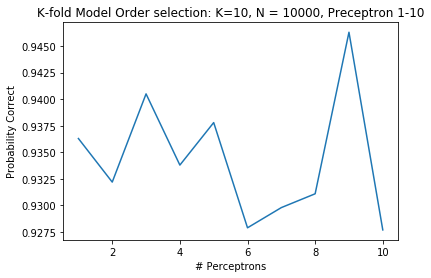

In [28]:
plt.plot(np.arange(1,11), model_means)
plt.title('K-fold Model Order selection: K=10, N = 10000, Preceptron 1-10')
plt.xlabel('# Perceptrons')
plt.ylabel('Probability Correct')
plt.show

In [27]:
y_testfinal = keras.utils.to_categorical(L, num_classes = 4)
model = Sequential()
# Dense(n) is a fully-connected layer with n hidden units.
# in the first layer, you must specify the expected input data shape:
# here, 3-dimensional vectors.
model.add(Dense(model_order, activation='sigmoid', input_dim=3))
model.add(Dense(4, activation='softmax'))
sgd = SGD(lr=0.01, decay=1e-6, momentum=0.9, nesterov=True)
model.compile(loss='categorical_crossentropy',
            optimizer=sgd,
            metrics=['accuracy'])
converged = 0
tmp = 0
epsilon = 0.001
while not converged:
    model.fit(x_data, y_data, batch_size=None, epochs=50)
    score = model.evaluate(x, y_testfinal)
    converged = np.abs(score[1]-tmp)<epsilon
    tmp = score[1]
print("Accuracy on Test Data (1 being 100%): " + str(score[1]))

Epoch 1/50
10000/10000 [==============================] - 0s 25us/step - loss: 0.4340 - accuracy: 0.8753
Epoch 2/50
10000/10000 [==============================] - 0s 19us/step - loss: 0.1970 - accuracy: 0.9422
Epoch 3/50
10000/10000 [==============================] - 0s 19us/step - loss: 0.1708 - accuracy: 0.9433
Epoch 4/50
10000/10000 [==============================] - 0s 19us/step - loss: 0.1608 - accuracy: 0.9448
Epoch 5/50
10000/10000 [==============================] - 0s 19us/step - loss: 0.1551 - accuracy: 0.9458
Epoch 6/50
10000/10000 [==============================] - 0s 19us/step - loss: 0.1502 - accuracy: 0.9462
Epoch 7/50
10000/10000 [==============================] - 0s 19us/step - loss: 0.1464 - accuracy: 0.9471
Epoch 8/50
10000/10000 [==============================] - 0s 19us/step - loss: 0.1441 - accuracy: 0.9486
Epoch 9/50
10000/10000 [==============================] - 0s 19us/step - loss: 0.1415 - accuracy: 0.9480
Epoch 10/50
10000/10000 [==============================

10000/10000 [==============================] - 0s 22us/step - loss: 0.1131 - accuracy: 0.9581
Epoch 28/50
10000/10000 [==============================] - 0s 20us/step - loss: 0.1137 - accuracy: 0.9580
Epoch 29/50
10000/10000 [==============================] - 0s 20us/step - loss: 0.1133 - accuracy: 0.9586
Epoch 30/50
10000/10000 [==============================] - 0s 19us/step - loss: 0.1138 - accuracy: 0.9587
Epoch 31/50
10000/10000 [==============================] - 0s 22us/step - loss: 0.1131 - accuracy: 0.9585
Epoch 32/50
10000/10000 [==============================] - 0s 20us/step - loss: 0.1136 - accuracy: 0.9581
Epoch 33/50
10000/10000 [==============================] - 0s 22us/step - loss: 0.1130 - accuracy: 0.9584
Epoch 34/50
10000/10000 [==============================] - 0s 19us/step - loss: 0.1133 - accuracy: 0.9577
Epoch 35/50
10000/10000 [==============================] - 0s 19us/step - loss: 0.1126 - accuracy: 0.9584
Epoch 36/50
10000/10000 [==============================] -

10000/10000 [==============================] - 0s 19us/step - loss: 0.1103 - accuracy: 0.9595
Epoch 4/50
10000/10000 [==============================] - 0s 19us/step - loss: 0.1106 - accuracy: 0.9573
Epoch 5/50
10000/10000 [==============================] - 0s 19us/step - loss: 0.1104 - accuracy: 0.9584
Epoch 6/50
10000/10000 [==============================] - 0s 21us/step - loss: 0.1107 - accuracy: 0.9587
Epoch 7/50
10000/10000 [==============================] - 0s 19us/step - loss: 0.1105 - accuracy: 0.9594
Epoch 8/50
10000/10000 [==============================] - 0s 19us/step - loss: 0.1107 - accuracy: 0.9584
Epoch 9/50
10000/10000 [==============================] - 0s 19us/step - loss: 0.1107 - accuracy: 0.9587
Epoch 10/50
10000/10000 [==============================] - 0s 21us/step - loss: 0.1105 - accuracy: 0.9589
Epoch 11/50
10000/10000 [==============================] - 0s 19us/step - loss: 0.1102 - accuracy: 0.9582
Epoch 12/50
10000/10000 [==============================] - 0s 20

10000/10000 [==============================] - 0s 23us/step - loss: 0.1094 - accuracy: 0.9587
Epoch 30/50
10000/10000 [==============================] - 0s 21us/step - loss: 0.1092 - accuracy: 0.9587
Epoch 31/50
10000/10000 [==============================] - 0s 19us/step - loss: 0.1091 - accuracy: 0.9591
Epoch 32/50
10000/10000 [==============================] - 0s 20us/step - loss: 0.1092 - accuracy: 0.9588
Epoch 33/50
10000/10000 [==============================] - 0s 21us/step - loss: 0.1096 - accuracy: 0.9595
Epoch 34/50
10000/10000 [==============================] - 0s 21us/step - loss: 0.1092 - accuracy: 0.9587
Epoch 35/50
10000/10000 [==============================] - 0s 20us/step - loss: 0.1090 - accuracy: 0.9590
Epoch 36/50
10000/10000 [==============================] - 0s 19us/step - loss: 0.1092 - accuracy: 0.9588
Epoch 37/50
10000/10000 [==============================] - 0s 20us/step - loss: 0.1094 - accuracy: 0.9588
Epoch 38/50
10000/10000 [==============================] -

In [29]:
score[1]

0.9545000195503235

In [30]:
NN_predict = model.predict(x)
decision = np.argmax(NN_predict,axis=1)
confusion_matrix(L, decision, labels=[0, 1, 2, 3])

array([[2971,  144,    6,   24],
       [ 134, 3796,   40,    1],
       [   2,   59, 1819,    7],
       [  29,    4,    5,  959]])

In [31]:
np.trace(confusion_matrix(L, decision, labels=[0, 1, 2, 3]))

9545

In [32]:
10000-9545

455